<a href="https://colab.research.google.com/github/Dyouvrean/Leetcode/blob/main/Leetcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sliced window

[Print Longest substring without repeating characters](https://www.geeksforgeeks.org/print-longest-substring-without-repeating-characters/)  
leetcode #3

In [ ]:
def printLongestSubstring(s: str) -> None:
    n = len(s)
    l, r = 0, 0
    visited = set()
    maxStr = 0
    maxL, maxR = 0, 0
    while r < n:
      if s[r] not in visited:
        visited.add(s[r])
        if r - l + 1 > maxStr:
          maxStr = r - l + 1
          maxL, maxR = l, r
        r += 1
      else:
        visited.remove(s[l])
        l += 1
    print(s[maxL:maxR+1])

str = "abcabcbb"
printLongestSubstring(str)


## 和相同的子数组
* #930
* #560

### Leetcode 930:[和相同的二元子数组](https://blog.csdn.net/qq_17550379/article/details/83547444)

Solution #1: same as below

In [ ]:
def numSubarraysWithSum(nums, goal):
    dictionary = [0]*(len(nums)+1)
    dictionary[0]=1
    cur_sum = 0
    result = 0
    for num in nums:
        cur_sum += num
        if (cur_sum-goal) >= 0:
           result += dictionary[cur_sum-goal]
        dictionary[cur_sum]+=1
    return result

In [ ]:
nums = [1,0,1,0,1]
goal = 2
numSubarraysWithSum(nums,goal)

Solution #2:

In [ ]:
def num_subarrays_with_sum_sliding_window(nums, goal):
    def atMost(goal):
        if goal < 0:
            return 0
        left, count, sum = 0, 0, 0
        for right in range(len(nums)):
            sum += nums[right]
            while sum > goal:
                sum -= nums[left]
                left += 1
            count += right - left + 1
        return count

    # Number of subarrays with at most goal 1s minus number of subarrays with at most (goal - 1) 1s
    return atMost(goal) - atMost(goal - 1)

# Example usage
nums_example = [1, 0, 1, 0, 1]
goal_example = 2
num_subarrays_with_sum_sliding_window(nums_example, goal_example)


### Leetcode 560: [和为K的数组](https://blog.csdn.net/qq_17550379/article/details/83510121)

To solve the problem of finding the total number of subarrays whose sum equals to a given integer `k` in an array of integers `nums`, we can use a technique involving cumulative sums and a hash map. Here's the general approach:

1. Initialize a variable `count` to 0. This will store the total number of subarrays found that sum up to `k`.
2. Create a hash map (dictionary in Python) to store the cumulative sum frequencies.
3. Initialize a variable `cumulative_sum` to 0 which keeps track of the sum of elements so far.
4. Iterate over the elements of the array `nums`. For each element:
   - Add the element to `cumulative_sum`.
   - If `cumulative_sum` equals `k`, increment `count` (because the sum from the start to this point is `k`).
   - Check if `cumulative_sum - k` is in the hash map. If it is, add its frequency to `count`. This step finds the number of times a subarray with sum `k` has occurred up to the current index.
   - Update the frequency of `cumulative_sum` in the hash map.
   
Let's implement this in Python:

In the example with the array `nums = [1, 1, 1]` and `k = 2`, the function correctly finds that there are 2 subarrays whose sum equals to 2. These subarrays are `[1, 1]` (the first two elements) and `[1, 1]` (the last two elements).

You can use this function with any array of integers and a target sum `k` to find the total number of contiguous subarrays that sum up to `k`.

prefix sum



In [ ]:
def subarraySum(nums, k):
    result, cur_sum = 0, 0
    sum_dict = {0:1}
    for num in nums:
        cur_sum += num
        if (cur_sum-k) in sum_dict.keys():
           result += sum_dict[cur_sum-k]
        sum_dict.setdefault(cur_sum,0)
        sum_dict[cur_sum]+=1
    return result

In [ ]:
nums = [1,1,1]
k = 2
subarraySum(nums, k)

## Leetcode #2302: [Count Subarrays With Score Less Than K](https://leetcode.com/problems/count-subarrays-with-score-less-than-k/description/)



In [ ]:
def countSubarrays(nums, k):
    count = 0
    l,r=0,0
    sum = 0
    while r < len(nums):
          sum+= nums[r]
          while sum*(r-l+1)>=k:
                sum-= nums[l]
                l+=1
          count += r-l+1
          r+=1
    return count

In [ ]:
nums=[9,5,3,8,4,7,2,7,4,5,4,9,1,4,8,10,8,10,4,7]
k = 4
countSubarrays(nums,k)

Leetcode #713: [Subarray Product Less Than K](https://leetcode.com/problems/subarray-product-less-than-k/description/)

In [ ]:
def numSubarrayProductLessThanK(nums, k):
    product = 1
    l,r =0,0
    count = 0
    while r< len(nums):
      product *= nums[r]
      while product >= k :
           product /= nums[l]
           l+=1
      count += r-l+1
      r+=1
    return count

In [ ]:
nums = [10,5,2,6]
k = 100
numSubarrayProductLessThanK(nums, k)

## Leetcode #152:[Maximum Product Subarray](https://leetcode.com/problems/maximum-product-subarray/description/)

Algorithm Steps
Initialization:

* Initialize max_product, min_product, and result to the first element of the array. This is because the largest product of a subarray could be the first element itself.
Iterate Through the Array (starting from the second element):

* For each element (say nums[i]), you need to determine the largest and smallest product that can be formed ending with this element.
* Update max_product: This is the maximum product that can be formed by including nums[i]. It could be:
The current element itself (nums[i]). This might be the case if the max_product so far is very small (e.g., 0) or nums[i] is larger.
* The product of nums[i] and the previous max_product. This is the usual case, especially if nums[i] is positive.
* The product of nums[i] and the previous min_product. This is crucial when nums[i] is negative, as it could turn a negative min_product into a large positive product.
* Update min_product: Similar to max_product, but we're looking for the smallest product.
* Update result: If the new max_product is greater than the current result, update result. result always holds the largest product found so far in the array.
* Return the Result: After the loop, result contains the largest product of any subarray in nums.

In [ ]:
def maxProduct(nums):
     # because the largest product of a subarray could be the first element itself.
     max_pro = nums[0]
     min_product = nums[0] # for negative
     res=nums[0]
     for i in range(1, len(nums)):
         temp = max_pro
         # The current element itself (nums[i]).
             #This might be the case if the max_product so far is very small (e.g., 0) or nums[i] is larger.
         # The product of nums[i] and the previous max_product.
             #This is the usual case, especially if nums[i] is positive.
         #The product of nums[i] and the previous min_product.
             #This is crucial when nums[i] is negative, as it could turn a negative min_product into a large positive product.
         max_pro = max(nums[i],max_pro*nums[i],min_product*nums[i])


         min_product= min(nums[i],min_product*nums[i],temp*nums[i])

         #Update result: If the new max_product > the current result,
         #update result. result always holds the largest product found so far in the array.
         res = max(res,max_pro)
     return res


In [ ]:
nums = [2,3,-2,4]
maxProduct(nums)

## Leetcode #53: [Maximum Subarray](https://leetcode.com/problems/maximum-subarray/description/)

In [ ]:
def maxSubArray(nums):
     max_sum =nums[0]
     res = nums[0]
     for i in range(1,len(nums)):
         temp = max_sum
         max_sum = max(nums[i], max_sum+nums[i])
         res = max(res,max_sum)
     return res

In [ ]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
maxSubArray(nums)

## Leetcode #697:[Degree of an Array](https://leetcode.com/problems/degree-of-an-array/description/)

In [ ]:
def findShortestSubArray(nums):
    first,last,count={},{},{}
    res = len(nums)
    for i, num in enumerate(nums):
        if num not in first:
          first[num]= i
        last[num]=i
        count.setdefault(num, 0)
        count[num]+=1

    max_degree = max(count.values())
    for num in count:

      if count[num] == max_degree:
         res = min(res, last[num]-first[num]+1)
    return res

In [ ]:
nums = [1,2,2,3,1]
findShortestSubArray(nums)

## Leetcode #238:[Product of Array Except Self](https://leetcode.com/problems/product-of-array-except-self/description/)

In [ ]:
def productExceptSelf( nums):
    res = [0]*len(nums)
    prefix = 1
    postfix = 1
    for i, num in enumerate(nums):
      res[i]= prefix
      prefix *= num
    for i in range(len(nums)-1,-1,-1):
      res[i] *= postfix
      postfix *= nums[i]
    return res


In [ ]:
nums = [1,2,3,4]
productExceptSelf(nums)

## Leetcode #325 : [Maximum Size Subarray Sum Equals k](https://leetcode.ca/2016-10-20-325-Maximum-Size-Subarray-Sum-Equals-k/)

In [ ]:
def maxSubArrayLen( nums, k):
    sum_dict={0:-1}
    sum=0
    res=0
    for i,num in enumerate(nums):
        sum+=num
        if sum-k in sum_dict: #there is a subarray that ends at the current index and sums to k
           res = max(res, i-sum_dict[sum-k])
        if sum not in sum_dict:
           sum_dict[sum]=i
    return res

In [ ]:
nums = [1,-1,5,-2,3]
k = 3
maxSubArrayLen(nums, k)

## Leetcode #198: [House Robber](https://leetcode.com/problems/house-robber/description/)

In [ ]:
def rob( nums):
    # base case:
    # 1. If there are no houses, the maximum amount is 0.
    # 2. If there's only one house, the maximum amount is the value of that house.
    if not nums:
       return 0
    if len(nums) <= 2:
        return max(nums)

    #For each house i, you have two choices:
    # Rob the current house (nums[i]), but then you can't rob the previous house (i-1). So, the total amount robbed will be nums[i] + dp[i-2].
    # Don't rob the current house, which means the total amount remains as dp[i-1].
    # The maximum of these two choices will be stored in dp[i].
    dp=[0]*len(nums)
    dp[0] = nums[0]
    dp[1] = max(nums[0],nums[1])
    for i in range(2,len(nums)):
        dp[i] = max(dp[i-2]+ nums[i], dp[i-1])
    return dp[-1]


In [ ]:
nums = [1,2,3,1]
rob(nums)

##Leetcode #300:[Longest Increasing Subsequence](https://leetcode.com/problems/longest-increasing-subsequence/description/?envType=daily-question&envId=2024-01-05)
To solve this problem, we can use dynamic programming. The idea is to create an array dp where each element dp[i] represents the length of the longest strictly increasing subsequence that ends with the element nums[i]. The algorithm can be described as follows:

* Initialize an array dp with the same length as nums, and fill it with 1s. This is because the minimum length of the longest increasing subsequence that can end with any element is 1 (the element itself).

* Iterate through the nums array. For each element nums[i], check all the previous elements nums[j] where j is less than i.

* If nums[i] is greater than nums[j], it means we can append nums[i] to the subsequence ending at nums[j]. So, we update dp[i] to be the maximum of its current value and dp[j] + 1.

* Finally, the length of the longest increasing subsequence will be the maximum value in the dp array.

In [ ]:
def lengthOfLIS(nums):
    dp=[1]*(len(nums))
    for i in range(len(nums)):
      for j in range(i):
        if nums[i]>nums[j]:
           dp[i] = max(dp[i],dp[j]+1)
    return max(dp)

In [ ]:
nums = [10,9,2,5,3,7,101,18]
lengthOfLIS(nums)

## Leetcode #1704: [Determine if String Halves Are Alike](https://leetcode.com/problems/determine-if-string-halves-are-alike/description/?envType=daily-question&envId=2024-01-12)

In [ ]:
def halvesAreAlike(s):
        def count(sub):
            vowel =['a','e','i','o','u']
            count = 0
            for i in sub.lower():
                if i in vowel:
                    count+=1
            return count


        mid = len(s)//2
        print(mid)
        first = count(s[:mid])
        print(first)

        last = count(s[mid:])
        print(last)
        return first == last

In [ ]:
s = "textbook"
halvesAreAlike(s)

## Leetcode #76:[Minimum Window Substring](https://leetcode.com/problems/minimum-window-substring/description/?envType=daily-question&envId=2024-02-04)

In [ ]:
def minWindow(s, t):
    if not t or not s:
        return ""

    # Dictionary to keep a count of all the unique characters in t
    dict_t = {}
    for char in t:
        dict_t[char] = dict_t.get(char, 0) + 1

    required = len(dict_t)  # Number of unique characters in t, that need to be present in the window
    formed = 0  # Number of unique characters in the current window that match the required count in t

    l, r = 0, 0  # Sliding window pointers
    window_counts = {}  # Keep a count of all the unique characters in the current window

    ans = float("inf"), None, None  # Tuple of the form (window length, left, right)

    while r < len(s):
        # Add one character from the right to the window
        character = s[r]
        window_counts[character] = window_counts.get(character, 0) + 1

        # If the frequency of the current character added equals to the desired count in t
        if character in dict_t and window_counts[character] == dict_t[character]:
            formed += 1

        # Try and contract the window till the point where it ceases to be 'desirable'.
        while l <= r and formed == required:
            character = s[l]

            # Save the smallest window until now.
            if r - l + 1 < ans[0]:
                ans = (r - l + 1, l, r)

            # The character at the position pointed by the `left` pointer is no longer a part of the window.
            window_counts[character] -= 1
            if character in dict_t and window_counts[character] < dict_t[character]:
                formed -= 1

            # Move the left pointer ahead, this would help to look for a new window.
            l += 1

        # Keep expanding the window once we are done contracting.
        r += 1

    return "" if ans[0] == float("inf") else s[ans[1]:ans[2]+1]

# Example usage
s = "ADOBECODEBANC"
t = "ABC"
minWindow(s, t)


In [ ]:
def minWindow(s, t):
    min_l = float('inf')
    l, r = 0, 0
    count = {}
    start = 0
    for c in t:
        count[c] = count.get(c, 0) + 1
    formed = 0
    while r < len(s):
        if count.get(s[r], 0) > 0:
            formed += 1
        count[s[r]] = count.get(s[r], 0) - 1
        r += 1
        while formed == len(t) and l <= r:

            if r - l < min_l:
                min_l = r - l
                start = l
            if count.get(s[l], -1) == 0:
                formed -= 1
            count[s[l]] = count.get(s[l], 0) + 1
            l += 1

    return "" if min_l == float('inf') else s[start:start + min_l]


In [ ]:
s = "abc"
t = "b"
minWindow(s, t)

## Leetcode #2958:[Length of Longest Subarray With at Most K Frequency](https://leetcode.com/problems/length-of-longest-subarray-with-at-most-k-frequency/description/?envType=daily-question&envId=2024-03-28)

In [ ]:
def maxSubarrayLength(nums, k):
    max_len = 0
    mp ={}
    l = 0
    for i in range(len(nums)):
      mp[nums[i]] = mp.get(nums[i],0)+1
      while mp[nums[i]]>k:
         mp[nums[l]]=mp.get(nums[l],0)-1
         l+=1
      max_len = max(max_len,i-l+1)
    return max_len

In [ ]:
nums = [1,2,3,1,2,3,1,2]
k = 2
maxSubarrayLength(nums, k)

## Leetcode #2962:[Count Subarrays Where Max Element Appears at Least K Times](https://leetcode.com/problems/count-subarrays-where-max-element-appears-at-least-k-times/?envType=daily-question&envId=2024-03-29)

In [ ]:
def countSubarrays(nums, k):
    res =0
    tar = max(nums)
    l= 0
    for i in range(len(nums)):
       if nums[i] == tar:
          k-=1
       while k <=0:
         # 2.2.1. as long as count >= k, increase the answer by the length of (n - right),
         #this is because if you currently have a subarray that works,
         #adding any number to the right of that subarray will work as well
          res += len(nums)-i
          if nums[l] == tar:
            k+=1
          l+=1
    return res

In [ ]:
def countSubarrays(nums, k):
    max_element = max(nums)
    indexes_of_max_elements = []
    ans = 0

    for index, element in enumerate(nums):

        if element == max_element:
            indexes_of_max_elements.append(index)

        freq = len(indexes_of_max_elements)
        if freq >= k:
            ans += indexes_of_max_elements[-k] + 1

    return ans

In [ ]:
nums = [1,3,2,3,3]
k = 2
countSubarrays(nums, k)

## Leetcode #992:[Subarrays with K Different Integers](https://leetcode.com/problems/subarrays-with-k-different-integers/description/?envType=daily-question&envId=2024-03-30)

In [ ]:
# EXCEED time limit
def subarraysWithKDistinct(nums, k):
    res = 0
    sub = []
    for i in range(len(nums)):
        sub.append(nums[i])
        while len(set(sub)) == k:
           end =i
           while end<len(nums):
                if nums[end] not in sub:
                   break
                end +=1
           res+=end-i
           sub.pop(0)

    return res

In [ ]:
def subarraysWithKDistinct(nums, k):
    res = 0
    mp = {}
    l=0
    unique = 0
    for i in range(len(nums)):
        if mp.get(nums[i],0) ==0:
           unique +=1
        mp[nums[i]] = mp.get(nums[i],0)+1
        while unique == k:
           end =i
           while end<len(nums):
                if mp.get(nums[end],0) == 0:
                   break
                end +=1
           res += end -i
           mp[nums[l]] -=1
           if mp.get(nums[l],0) == 0:
              unique -=1
           l+=1

    return res

In [ ]:
nums = [1,2,1,2,3]
k = 2
subarraysWithKDistinct(nums, k)

## Leetcode #2444:[Count Subarrays With Fixed Bounds](https://leetcode.com/problems/count-subarrays-with-fixed-bounds/description/?envType=daily-question&envId=2024-03-31)

In [ ]:
## not work for case that the first number is max number

def countSubarrays(nums, minK, maxK):
    res = 0
    c_max=float("-inf")
    c_min =float("inf")
    l =0
    for i in range(len(nums)):
        c_max = max(nums[l:i+1])
        c_min = min(nums[l:i+1])
        print("i",i)
        while c_max == maxK and c_min == minK and l<=i:
              end =i
              while end<len(nums):
                    if nums[end]>maxK or nums[end]<minK:
                       break
                    end +=1
              print("end",end)
              res += end-i
              print("res",res)
              l+=1
              print("sub",nums[l:i+1])
              if nums[l:i+1]:
                c_max = max(nums[l:i+1])
                c_min = min(nums[l:i+1])
              print("cmax",c_max)
              print("cmin",c_min)

    return res

Certainly! The mathematical explanation behind the expression `min(lastMinK, lastMaxK) - lastInvalid` for counting fixed-bound subarrays involves understanding the intervals within which these subarrays exist and ensuring no double counting or inclusion of invalid subarrays.

### Key Variables

- **lastMinK:** The most recent index where `minK` is located.
- **lastMaxK:** The most recent index where `maxK` is located.
- **lastInvalid:** The most recent index of an element that is outside the `[minK, maxK]` range, making any subarray including this index invalid.

### Mathematical Interpretation

1. **Determining the Start Point for Valid Subarrays:**
   - The valid fixed-bound subarrays ending at a current index `i` must start after the last invalid element to avoid including any out-of-range values.
   - They must also include both `minK` and `maxK`. The latest of these to appear dictates the earliest start point of the subarrays because any subarray starting before this point would miss one of these critical values.

2. **Calculating the Number of New Subarrays:**
   - When we consider a new position `i` in the array, we're looking at all subarrays ending at `i`. The start point of these subarrays can be anywhere between the index right after `lastInvalid` and `min(lastMinK, lastMaxK)`.
   - The expression `min(lastMinK, lastMaxK)` identifies the earliest point after both `minK` and `maxK` have appeared, ensuring the subarray includes both.
   - Subtracting `lastInvalid` from `min(lastMinK, lastMaxK)` gives the number of positions from the earliest valid start point to the current index `i`. This calculation excludes any start points that would result in an invalid subarray due to out-of-range elements.

3. **Ensuring Validity and Completeness:**
   - By ensuring that subarrays start only after `lastInvalid` and include both `minK` and `maxK`, we guarantee the validity of the counted subarrays.
   - By adjusting the count at each new occurrence of `minK` or `maxK`, we ensure that all possible subarrays are considered without duplication.

### Example Illustration

In the array `[1, 3, 5, 2, 7, 5]` with `minK = 2` and `maxK = 5`, when we reach the end of the array:

- `lastMinK = 3` (the index of `2`)
- `lastMaxK = 5` (the index of the last `5`)
- `lastInvalid = 4` (the index of `7`)

At the final element (index `5`), `min(lastMinK, lastMaxK) = min(3, 5) = 3` tells us that the earliest we can start a valid subarray is at index `3`. Since `lastInvalid = 4`, starting any subarray at or before index `4` would include the invalid `7`. Therefore, there are `3 - 4 = -1` positions to start a valid subarray, which in this case indicates there are no new valid subarrays ending at this position (negative values imply zero in this context as we cannot have a negative count of subarrays).

This mathematical approach ensures we accurately count all valid fixed-bound subarrays without including invalid ones or duplicating counts.

In [ ]:
def countSubarrays(nums, minK, maxK):
    res = 0
    bad_idx = max_idx = min_idx = -1
    for i in range(len(nums)):
        if nums[i]<minK or nums[i]>maxK:
           bad_idx = i
        if nums[i] == minK:
           min_idx = i
        if nums[i] == maxK:
           max_idx = i
        print(bad_idx)
        print(max_idx)
        print(min_idx)
        """By taking min(lastMinK, lastMaxK),
        we determine the earliest index in the current subarray where both minK and maxK have been seen"""
        res += max(0,min(max_idx,min_idx)-bad_idx)
        print(res)
        print("-----")
    return res

In [ ]:
nums = [1,3,5,2,7,5]
minK = 1
maxK = 5
countSubarrays(nums, minK, maxK)

## Leetcode #1052:[Grumpy Bookstore Owner](https://leetcode.com/problems/grumpy-bookstore-owner/description/?envType=daily-question&envId=2024-06-21)

In [ ]:
def maxSatisfied(customers, grumpy, minutes):
    n = len(customers)

    totalSatisfied = sum(customers[i] for i in range(n) if grumpy[i] == 0)

    additionalSatisfied = 0
    currentWindowSatisfied = 0

    for i in range(minutes):
        if grumpy[i] == 1:
            currentWindowSatisfied += customers[i]
    additionalSatisfied = currentWindowSatisfied

    for i in range(minutes, n):
        if grumpy[i] == 1:
            currentWindowSatisfied += customers[i]
        if grumpy[i - minutes] == 1:
            currentWindowSatisfied -= customers[i - minutes]
        additionalSatisfied = max(additionalSatisfied, currentWindowSatisfied)
    return totalSatisfied + additionalSatisfied

In [ ]:
def maxSatisfied(customers, grumpy, minutes):
    n = len(grumpy)
    sat=0
    for i in range(n):
       sat+= customers[i]* (1-grumpy[i])
    window = 0
    for i in range(minutes):
       window += customers[i]* (grumpy[i])
    temp=window
    for i in range(minutes,n):
       temp +=customers[i]* (grumpy[i])
       temp-= customers[i-minutes]* (grumpy[i-minutes])

       window= max(temp,window)
    return sat+window

In [ ]:
customers = [1]
grumpy = [0]
minutes = 1
maxSatisfied(customers, grumpy, minutes)

## Leetcode #1248:[Count Number of Nice Subarrays](https://leetcode.com/problems/count-number-of-nice-subarrays/description/?envType=daily-question&envId=2024-06-22)

In [ ]:
def numberOfSubarrays(nums, k):
    res=0
    mp ={}
    mp[0]=1
    l = 0
    odd=0
    for i in range(len(nums)):
        odd += nums[i]& 1
        if odd>=k:
           res+= mp.get(odd-k,0)
        mp[odd]= mp.get(odd,0)+1
    return res

In [ ]:
nums = [1,1,2,1,1]
k = 3
numberOfSubarrays(nums, k)

## Leetcode #1438:[Longest Continuous Subarray With Absolute Diff Less Than or Equal to Limit](https://leetcode.com/problems/longest-continuous-subarray-with-absolute-diff-less-than-or-equal-to-limit/description/?envType=daily-question&envId=2024-06-23)

To solve the problem of finding the longest non-empty subarray where the absolute difference between any two elements is less than or equal to a given limit, we can use a sliding window technique along with two deques (double-ended queues).

### Approach:
1. **Sliding Window**: We'll maintain a window using two pointers (`left` and `right`) that represents the current subarray. We will expand the window by moving the `right` pointer and will adjust the `left` pointer to ensure that the condition on the absolute difference is met.

2. **Deques**:
   - One deque (`max_deque`) will be used to keep track of the maximum values in the current window.
   - Another deque (`min_deque`) will be used to keep track of the minimum values in the current window.
   - These deques help efficiently find the maximum and minimum values in the window to check the condition on the absolute difference.

3. **Condition Check**: For each new element added to the window, we check the absolute difference between the maximum and minimum values in the window. If it exceeds the limit, we move the `left` pointer to shrink the window until the condition is satisfied again.

4. **Update Result**: Keep track of the maximum size of the window that meets the condition.


### Explanation:
1. **Deques Management**:
   - For `max_deque`, we keep the indices of elements in decreasing order, ensuring that the first element is always the maximum in the current window.
   - For `min_deque`, we keep the indices of elements in increasing order, ensuring that the first element is always the minimum in the current window.
   
2. **Maintaining the Window**:
   - As we expand the window by moving `right`, we add the current element to both deques after maintaining their order.
   - We check the absolute difference between the maximum and minimum elements using the first elements of `max_deque` and `min_deque`.
   - If the difference exceeds `limit`, we increment `left` to shrink the window until the difference is within the limit.
   - We then update the maximum window size (`result`) if the current window size is larger.

3. **Efficiency**:
   - Each element is added and removed from the deques at most once, leading to an overall time complexity of O(n), where n is the number of elements in `nums`.

This approach ensures that we efficiently find the longest subarray that meets the given condition.

In [ ]:
from collections import deque
def longestSubarray(nums, limit):
    n = len(nums)
    left =0
    res =0
    max_deque = deque()
    min_deque = deque()
    for i in range(n):
      # Maintain the max_deque in decreasing order
       while max_deque and nums[max_deque[-1]] <= nums[i]:
             max_deque.pop()
       max_deque.append(i)
        # Maintain the min_deque in increasing order
       while min_deque and nums[min_deque[-1]] >= nums[i]:
             min_deque.pop()
       min_deque.append(i)
       # Check if the current window is valid
       while nums[max_deque[0]]-nums[min_deque[0]]> limit:
             left+=1
              # Remove elements from deques if they are out of the window
             if max_deque[0] < left:
                max_deque.popleft()
             if min_deque[0] < left:
                min_deque.popleft()

       res = max(res, i - left+ 1)
    return res

In [ ]:
nums = [8,2,4,7]
limit = 4
longestSubarray(nums, limit)

## Leetcode #2134:[Minimum Swaps to Group All 1's Together II](https://leetcode.com/problems/minimum-swaps-to-group-all-1s-together-ii/description/?envType=daily-question&envId=2024-08-02)

In [ ]:
def minSwaps(nums):
    # count number of 1s as k
    k=0
    n= len(nums)
    for i in nums:
      if i ==1:
        k+=1
    # Use a sliding window of size equal to the count of 1s
    # to find the subarray with the minimum number of 0s.
    mx=one=sum(nums[:k])
    for i in range(n):
        one -= nums[i]
        one += nums[(i+k)%n]
        mx= max(one,mx)
    return k-mx


In [ ]:
nums = [0,1,0,1,1,0,0]
minSwaps(nums)

## Leetcode #3254:[Find the Power of K-Size Subarrays I](https://leetcode.com/problems/find-the-power-of-k-size-subarrays-i/description/?envType=daily-question&envId=2024-11-16)

In [ ]:
def resultsArray(nums, k):
    n= len(nums)
    res=[]
    l=0
    consec_cnt = 1
    for r in range(n):
       if r> 0 and nums[r - 1] + 1 == nums[r]:
            consec_cnt += 1
       if r-l+1>k:
          if nums[l] + 1 == nums[l + 1]:
            consec_cnt -= 1
          l += 1
       if r - l + 1 == k:
          res.append(nums[r] if consec_cnt == k else -1)
    return res


In [ ]:
class Solution:
    def resultsArray(self, nums: List[int], k: int) -> List[int]:
        if k == 1:
            return nums

        n = len(nums)
        ret = [-1] * (n - k + 1)
        cons = 1
        for i in range(n - 1):
            if nums[i] + 1 == nums[i + 1]:
                cons += 1
            else:
                cons = 1

            if cons >= k:
                ret[i - k + 2] = nums[i + 1]
        return ret
        # time: O(n)
        # space: O(n)

In [ ]:
from typing import List

class Solution:
    def resultsArray(self, nums: List[int], k: int) -> List[int]:
        """Find the Power of K-Size Subarrays"""
        # Skip if k is 1
        if k == 1:
            return nums

        n = len(nums)
        result = []
        left = 0
        right = 1

        while right < n:
            # Check if current sequence is not consecutive
            is_not_consecutive = nums[right] - nums[right-1] != 1

            if is_not_consecutive:
                # Mark invalid sequences
                while left < right and left + k - 1 < n:
                    result.append(-1)
                    left += 1
                left = right
            # Found valid k-length sequence
            elif right - left == k - 1:
                result.append(nums[right])
                left += 1

            right += 1

        return result

In [ ]:
nums = [1,2,3,4,3,2,5]
k = 3
resultsArray(nums, k)

## Leetcode #862:[Shortest Subarray with Sum at Least K](https://leetcode.com/problems/shortest-subarray-with-sum-at-least-k/description/?envType=daily-question&envId=2024-11-17)

In [ ]:
def shortestSubarray(nums, k):
    n = len(nums)
    sum_arr = [0] * (n + 1)

    for i in range(n):
        sum_arr[i + 1] = sum_arr[i] + nums[i]

    q = [0] * (n + 1)
    l = r = 0
    min_length = n + 1

    for i in range(len(sum_arr)):
        while r > l and sum_arr[i] >= sum_arr[q[l]] + k:
            min_length = min(min_length, i - q[l])
            l += 1

        while r > l and sum_arr[i] <= sum_arr[q[r - 1]]:
            r -= 1

        q[r] = i
        r += 1

    return min_length if min_length <= n else -1

## Leetcode #1652:[Defuse the Bomb](https://leetcode.com/problems/defuse-the-bomb/description/?envType=daily-question&envId=2024-11-18)

In [ ]:
def decrypt(code, k):
    n = len(code)
    window=0
    if k ==0:
      return [0]*n
    elif k>0:
      window= sum(code[1:1+k])
      ans=[window]
      for i in range(1,n):
        window= window-code[i]+code[(i+k)%n]
        ans.append(window)
      return ans
    else:

      window= sum(code[-1:k-1:-1])
      first= window
      ans=[]
      for i in range(1,n):
        window= window-code[-i]+code[-(i-k)%n]
        print(window)
        ans.insert(0,window)
      ans.insert(0,first)
      return ans

In [ ]:
code = [2,4,9,3]
k = -2
decrypt(code, k)

## Leetcode #2461:[Maximum Sum of Distinct Subarrays With Length K](https://leetcode.com/problems/maximum-sum-of-distinct-subarrays-with-length-k/description/?envType=daily-question&envId=2024-11-19)

In [ ]:
## TIME LIMIT EXCEED
def maximumSubarraySum(nums, k):
    sub = nums[:k]
    max_s=0
    cur= sum(sub)
    if len(sub)== len(set(sub)):
       max_s= sum(sub)
    for i in range(k,len(nums)):
        cur+=nums[i]- nums[i-k]
        sub.pop(0)
        sub.append(nums[i])
        if len(sub)== len(set(sub)):
           max_s= max(max_s,cur)
    return max_s


In [ ]:
class Solution:
    def maximumSubarraySum(self, nums: List[int], k: int) -> int:
        n = len(nums)
        elements = set()
        current_sum = 0
        max_sum = 0
        begin = 0

        for end in range(n):
            if nums[end] not in elements:
                current_sum += nums[end]
                elements.add(nums[end])

                if end - begin + 1 == k:
                    if current_sum > max_sum:
                        max_sum = current_sum

                    current_sum -= nums[begin]
                    elements.remove(nums[begin])
                    begin += 1
            else:
                while nums[begin] != nums[end]:
                    current_sum -= nums[begin]
                    elements.remove(nums[begin])
                    begin += 1

                begin += 1

        return max_sum

use dictionary to record the index of last occurency of the num, to fast shrink the window

In [ ]:
class Solution:
    def maximumSubarraySum(self, nums: List[int], k: int) -> int:
        res = 0
        prev_idx = {}  # num -> prev index of num
        cur_sum = 0

        l = 0

        for r in range(len(nums)):
            cur_sum += nums[r]

            i = prev_idx.get(nums[r], -1)

            while l <= i or r - l + 1 > k:
                cur_sum -= nums[l]
                l += 1

            if r - l + 1 == k:
                res = max(res, cur_sum)

            prev_idx[nums[r]] = r

        return res

In [ ]:
nums = [1,5,4,2,9,9,9]
k = 3
maximumSubarraySum(nums, k)

## Leetcode #2516:[Take K of Each Character From Left and Right](https://leetcode.com/problems/take-k-of-each-character-from-left-and-right/description/?envType=daily-question&envId=2024-11-20)

In [ ]:
def takeCharacters(s, k):
    n= len(s)
    count = [0] * 3
    for c in s:
      count[ord(c)-ord("a")]+=1
    if min(count)<k:
       return -1
    window = [0] * 3
    l, max_window = 0, 0
    for r in range(n):
      window[ord(s[r])-ord("a")]+=1
      while l<r and(count[0]-window[0]<k or
                    count[1]-window[1]<k or
                    count[2]-window[2]<k):
            window[ord(s[l]) - ord("a")] -= 1
            l += 1
      max_window= max(max_window, r-l+1)
    return n- max_window

In [ ]:
class Solution:
    def takeCharacters(self, s: str, k: int) -> int:
        freqs = [0] * 3
        n = len(s)

        for c in s:
            freqs[ord(c) - ord('a')] += 1

        i = 0
        j = 0
        if freqs[0] < k or freqs[1] < k or freqs[2] < k:
            return -1

        for j in range(n):
            freqs[ord(s[j]) - ord('a')] -= 1
            #Use two pointers, i and j, to represent a sliding window over the string.
            #Expand the window by decrementing the frequency of the character at j.
            #If reducing the frequency of a character at j causes it to drop below k,
            # contract the window by incrementing i.

            if freqs[0] < k or freqs[1] < k or freqs[2] < k:
                freqs[ord(s[i]) - ord('a')] += 1
                i += 1


        return n - (j - i + 1)




In [ ]:
s = "aabaaaacaabc"
k = 2
takeCharacters(s, k)

## Leetcode #2762:[Continuous Subarrays](https://leetcode.com/problems/continuous-subarrays/description/?envType=daily-question&envId=2024-12-14)

In [ ]:
import collections
from collections import deque
def continuousSubarrays(nums):
    count = 0
    l,r=0,0
    minD, maxD = deque(), deque()
    while r < len(nums):
         # Maintain minList (indices of potential minimum values in increasing order)
          while minD and nums[minD[-1]] >= nums[r]:
                minD.pop()
          # Maintain maxList (indices of potential maximum values in decreasing order)
          while maxD and nums[maxD[-1]] <= nums[r]:
                maxD.pop()
          minD.append(r)
          maxD.append(r)
           # Shrink window when the condition is violated
          while nums[maxD[0]] - nums[minD[0]] > 2:
                l += 1
                # Remove indices outside the current window
                if minD[0] < l: minD.popleft()
                if maxD[0] < l: maxD.popleft()
          count += r - l + 1
          r += 1
    return count

In [ ]:
nums = [5,4,2,4]
continuousSubarrays(nums)

## Leetcode #2379:[Minimum Recolors to Get K Consecutive Black Blocks](https://leetcode.com/problems/minimum-recolors-to-get-k-consecutive-black-blocks/description/?envType=daily-question&envId=2025-03-08)

In [ ]:
def minimumRecolors(blocks, k):
    count = 0
    l,r=0,0
    min_count = float('inf')
    while r < len(blocks):
      if blocks[r] == 'W':
         count += 1
      if r - l + 1 == k:
         min_count = min(min_count, count)
         if blocks[l] == 'W':
            count -= 1
         l += 1
      r += 1
    return min_count

In [ ]:
blocks = "WBBWWBBWBW"
k = 7
minimumRecolors(blocks, k)

## Leetcode #3208:[Alternating Groups II](https://leetcode.com/problems/alternating-groups-ii/description/?envType=daily-question&envId=2025-03-09)

In [ ]:
def numberOfAlternatingGroups(colors, k):
    length = len(colors)
    result = 0
    alternating_elements_count = 1  # Length of current alternating sequence
    last_color = colors[0]  # Previous color

    # Loop through array with circular traversal
    for i in range(1, length + k - 1):
        index = i % length  # Wrap around using modulo

        # Check if current color is the same as the last color
        if colors[index] == last_color:
            # Pattern breaks, reset sequence length
            alternating_elements_count = 1
            last_color = colors[index]
            continue

        # Extend sequence
        alternating_elements_count += 1

        # If sequence length reaches at least k, count it
        if alternating_elements_count >= k:
            result += 1

        last_color = colors[index]

    return result

## Leetcode #3306:[Count of Substrings Containing Every Vowel and K Consonants II](https://leetcode.com/problems/count-of-substrings-containing-every-vowel-and-k-consonants-ii/description/?envType=daily-question&envId=2025-03-10)

In [ ]:
def countOfSubstrings(word, k):
    res = 0
    vowels = set('aeiou')
    n = len(word)
    freq = defaultdict(int)
    lo, hi, cnt = 0, 0, 0
    for c in word:
        if c in vowels:
            freq[c] += 1
        else:
            cnt += 1
        while cnt > k:
            if word[hi] in vowels:
                freq[word[hi]] -= 1
                if freq[word[hi]] == 0:
                    del freq[word[hi]]
            else:
                cnt -= 1
            hi += 1
            lo = hi
        while cnt == k and hi < n:
            if word[hi] in vowels and freq[word[hi]] > 1:
                freq[word[hi]] -= 1
                if freq[word[hi]] == 0:
                    del freq[word[hi]]
                hi += 1
            else:
                break
        if cnt == k and len(freq) == 5:
            res += hi - lo + 1
    return res

## Leetcode #1358:[Number of Substrings Containing All Three Characters](https://leetcode.com/problems/number-of-substrings-containing-all-three-characters/description/?envType=daily-question&envId=2025-03-11)

In [ ]:
def numberOfSubstrings(s):
    last_pos = [-1] * 3
    total = 0

    for pos in range(len(s)):
        # Update last position of current character
        last_pos[ord(s[pos]) - ord("a")] = pos

        # Add count of valid substrings ending at current position
        # If any character is missing, min will be -1
        # Else min gives leftmost required character position
        total += 1 + min(last_pos)

    return total

In [ ]:
def numberOfSubstrings(s):
    res = i = 0 # maintain the left window pointer
    d = {c:0 for c in 'abc'}
    for j in range(len(s)):
        d[s[j]] += 1
        while all(d.values()):
            d[s[i]] -= 1 # remove left char from window
            i += 1
        res += i # the number of substrings will be i
    return res

## Leetcode #3191:[Minimum Operations to Make Binary Array Elements Equal to One I](https://leetcode.com/problems/minimum-operations-to-make-binary-array-elements-equal-to-one-i/description/?envType=daily-question&envId=2025-03-19)

In [ ]:
def minOperations(nums):
    n = len(nums)
    count = 0
    for i in range(n - 2):
        if nums[i] == 0:
            nums[i] = 1
            nums[i + 1] = 1 if nums[i + 1] == 0 else 0
            nums[i + 2] = 1 if nums[i + 2] == 0 else 0
            count += 1

    if nums[n - 2] == 0 or nums[n - 1] == 0:
        return -1
    return count

In [ ]:

def minOperations(nums):
    count = 0
    for i in range(2, len(nums)):

        # only looking forward to the last element
        if nums[i - 2] == 0:
            count += 1
            # flip i-2 and i-1 and i
            nums[i - 2] = nums[i - 2] ^ 1
            nums[i - 1] = nums[i - 1] ^ 1
            nums[i] = nums[i] ^ 1

    if sum(nums) == len(nums):
        return count
    return -1

## Leetcode #2537:[Count the Number of Good Subarrays](https://leetcode.com/problems/count-the-number-of-good-subarrays/description/?envType=daily-question&envId=2025-04-16)

In [ ]:
def countGood(nums, k):
    count=0
    n=len(nums)
    left=0
    pair=0
    freq=defaultdict(int)
    for right in range(n):
        pair+=freq[nums[right]]
        freq[nums[right]]+=1
        while pair>=k:
            count+=n-right
            freq[nums[left]]-=1
            pair-=freq[nums[left]]
            left+=1
    return count

## Leetcode #2799:[Count Complete Subarrays in an Array](https://leetcode.com/problems/count-complete-subarrays-in-an-array/description/?envType=daily-question&envId=2025-04-24)

In [ ]:
class Solution:
    def countCompleteSubarrays(self, nums: List[int]) -> int:
        res = 0
        cnt = {}
        n = len(nums)
        right = 0
        distinct = len(set(nums))
        for left in range(n):
            if left > 0:
                remove = nums[left - 1]
                cnt[remove] -= 1
                if cnt[remove] == 0:
                    cnt.pop(remove)
            while right < n and len(cnt) < distinct:
                add = nums[right]
                cnt[add] = cnt.get(add, 0) + 1
                right += 1
            if len(cnt) == distinct:
                res += n - right + 1
        return res

## Leetcode #2444:[Count Subarrays With Fixed Bounds](https://leetcode.com/problems/count-subarrays-with-fixed-bounds/description/?envType=daily-question&envId=2025-04-26)

In [ ]:
def countSubarrays(nums, minK, maxK):
    count = 0
    start = -1
    mini = -1
    maxi = -1
    for i in range(len(nums)):
        if nums[i] < minK or nums[i] > maxK:
            start = i
        if nums[i] == maxK:
            maxi = i
        if nums[i] == minK:
            mini = i
        valid = max(0, min(mini, maxi) - start)
        count += valid
    return count

## Leetcode #3445:[Maximum Difference Between Even and Odd Frequency II](https://leetcode.com/problems/maximum-difference-between-even-and-odd-frequency-ii/description/?envType=daily-question&envId=2025-06-11)

In [ ]:
class Solution:
    def maxDifference(self, s: str, k: int) -> int:
        def getStatus(cnt_a: int, cnt_b: int) -> int:
            return ((cnt_a & 1) << 1) | (cnt_b & 1)

        n = len(s)
        ans = float("-inf")
        for a in ["0", "1", "2", "3", "4"]:
            for b in ["0", "1", "2", "3", "4"]:
                if a == b:
                    continue

                best = [float("inf")] * 4
                cnt_a = cnt_b = 0
                prev_a = prev_b = 0
                left = -1
                for right in range(n):
                    cnt_a += s[right] == a
                    cnt_b += s[right] == b
                    while right - left >= k and cnt_b - prev_b >= 2:
                        left_status = getStatus(prev_a, prev_b)
                        best[left_status] = min(
                            best[left_status], prev_a - prev_b
                        )
                        left += 1
                        prev_a += s[left] == a
                        prev_b += s[left] == b

                    right_status = getStatus(cnt_a, cnt_b)
                    if best[right_status ^ 0b10] != float("inf"):
                        ans = max(
                            ans, cnt_a - cnt_b - best[right_status ^ 0b10]
                        )

        return ans

## Leetcode #594:[Longest Harmonious Subsequence](https://leetcode.com/problems/longest-harmonious-subsequence/description/?envType=daily-question&envId=2025-06-30)

In [ ]:
def findLHS(self, nums):
    nums.sort()
    j = 0
    maxLength = 0

    for i in range(len(nums)):
        while nums[i] - nums[j] > 1:
            j += 1
        if nums[i] - nums[j] == 1:
            maxLength = max(maxLength, i - j + 1)
    return maxLength

## Leetcode #1695:[Maximum Erasure Value](https://leetcode.com/problems/maximum-erasure-value/description/?envType=daily-question&envId=2025-07-22)

In [ ]:
class Solution:
    def maximumUniqueSubarray(self, nums: List[int]) -> int:
        seen = set()
        left = 0
        current_sum = 0
        max_sum = 0

        for right in range(len(nums)):
            while nums[right] in seen:
                current_sum -= nums[left]
                seen.remove(nums[left])
                left += 1
            current_sum += nums[right]
            seen.add(nums[right])
            max_sum = max(max_sum, current_sum)

        return max_sum

## Leetcode #904:[Fruit Into Baskets](https://leetcode.com/problems/fruit-into-baskets/description/?envType=daily-question&envId=2025-08-04)

In [ ]:
from collections import defaultdict

class Solution:
    def totalFruit(self, fruits: list[int]) -> int:
        start = 0
        max_len = 0
        fruit_count = defaultdict(int)

        for end in range(len(fruits)):
            fruit_count[fruits[end]] += 1

            while len(fruit_count) > 2:
                fruit_count[fruits[start]] -= 1
                if fruit_count[fruits[start]] == 0:
                    del fruit_count[fruits[start]]
                start += 1

            max_len = max(max_len, end - start + 1)

        return max_len

## Leetcode #3321:[Find X-Sum of All K-Long Subarrays II](https://leetcode.com/problems/find-x-sum-of-all-k-long-subarrays-ii/description/?envType=daily-question&envId=2025-11-05)

In [ ]:
class Helper:
    def __init__(self, x):
        self.x = x
        self.result = 0
        self.large = SortedList()
        self.small = SortedList()
        self.occ = defaultdict(int)

    def insert(self, num):
        if self.occ[num] > 0:
            self.internal_remove((self.occ[num], num))
        self.occ[num] += 1
        self.internal_insert((self.occ[num], num))

    def remove(self, num):
        self.internal_remove((self.occ[num], num))
        self.occ[num] -= 1
        if self.occ[num] > 0:
            self.internal_insert((self.occ[num], num))

    def get(self):
        return self.result

    def internal_insert(self, p):
        if len(self.large) < self.x or p > self.large[0]:
            self.result += p[0] * p[1]
            self.large.add(p)
            if len(self.large) > self.x:
                to_remove = self.large[0]
                self.result -= to_remove[0] * to_remove[1]
                self.large.remove(to_remove)
                self.small.add(to_remove)
        else:
            self.small.add(p)

    def internal_remove(self, p):
        if p >= self.large[0]:
            self.result -= p[0] * p[1]
            self.large.remove(p)
            if self.small:
                to_add = self.small[-1]
                self.result += to_add[0] * to_add[1]
                self.small.remove(to_add)
                self.large.add(to_add)
        else:
            self.small.remove(p)


class Solution:
    def findXSum(self, nums, k, x):
        helper = Helper(x)
        ans = []

        for i in range(len(nums)):
            helper.insert(nums[i])
            if i >= k:
                helper.remove(nums[i - k])
            if i >= k - 1:
                ans.append(helper.get())

        return ans

## Leetcode #3234:[Count the Number of Substrings With Dominant Ones](https://leetcode.com/problems/count-the-number-of-substrings-with-dominant-ones/description/?envType=daily-question&envId=2025-11-15)

In [ ]:
class Solution:
    def numberOfSubstrings(self, s: str) -> int:
        n = len(s)
        pre = [-1] * (n + 1)
        for i in range(n):
            if i == 0 or s[i - 1] == "0":
                pre[i + 1] = i
            else:
                pre[i + 1] = pre[i]

        res = 0
        for i in range(1, n + 1):
            cnt0 = 1 if s[i - 1] == "0" else 0
            j = i
            while j > 0 and cnt0 * cnt0 <= n:
                cnt1 = (i - pre[j]) - cnt0
                if cnt0 * cnt0 <= cnt1:
                    res += min(j - pre[j], cnt1 - cnt0 * cnt0 + 1)
                j = pre[j]
                cnt0 += 1
        return res

## Leetcode #3652:[Best Time to Buy and Sell Stock using Strategy](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-using-strategy/description/?envType=daily-question&envId=2025-12-18)

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int], strategy: List[int], k: int) -> int:
        n = len(prices)
        profitSum = [0] * (n + 1)
        priceSum = [0] * (n + 1)
        for i in range(n):
            profitSum[i + 1] = profitSum[i] + prices[i] * strategy[i]
            priceSum[i + 1] = priceSum[i] + prices[i]
        res = profitSum[n]
        for i in range(k - 1, n):
            leftProfit = profitSum[i - k + 1]
            rightProfit = profitSum[n] - profitSum[i + 1]
            changeProfit = priceSum[i + 1] - priceSum[i - k // 2 + 1]
            res = max(res, leftProfit + changeProfit + rightProfit)
        return res

# DFS

## Leetcode #22: [Generate Parenthesest](https://blog.csdn.net/Rolandxxx/article/details/126629284)

In [ ]:
def generateParenthesis(n):
        """
        :type n: int
        :rtype: List[str]
        """
        res=[]
        def dfs(left, right, res,n,s):
            if left == n and right == n:
                res.append(s)
                return
            if left < n:
               dfs(left+1, right,res,n,s+"(")

            if right < left:
               dfs(left, right+1,res,n,s+")")
            return res

        return dfs(0,0,res,n,"")

In [ ]:
n = 3
generateParenthesis(n)

In [ ]:
def generate_parenthesis(n):
    def backtrack(s='', left=0, right=0):
        if left == n and right == n:
            result.append(s)
            return
        if left < n:
           backtrack(s + '(', left + 1, right)
        if right < left:
            backtrack(s + ')', left, right + 1)

    result = []
    backtrack()
    return result

# Example usage
n_example = 3
generate_parenthesis(n_example)

## Leetcode # 938. [Range Sum of BST](https://leetcode.com/problems/range-sum-of-bst/description/?envType=daily-question&envId=2024-01-08)

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
def rangeSumBST(root, low, high):
    def dfs(root):
        if not root:
            return 0
        sum = 0
        if root.val <= high and root.val>= low:
           sum += root.val
        left_sum = dfs(root.left)
        right_sum = dfs(root.right)

        return sum + left_sum + right_sum
    return dfs(root)

In [ ]:
class Solution(object):
    def rangeSumBST(self, root, low, high):
        """
        :type root: TreeNode
        :type low: int
        :type high: int
        :rtype: int
        """
        def dfs(node):
            ans = 0
            if node:
                if low <= node.val <= high:
                    ans += node.val
                if node.val < high:
                    ans += dfs(node.right)
                if node.val > low:
                    ans += dfs(node.left)
            return ans
        return dfs(root)

## Leetcode #872:[Leaf-Similar Trees](https://leetcode.com/problems/leaf-similar-trees/description/?envType=daily-question&envId=2024-01-09)

In [ ]:
def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
    def dfs(root):
            # If the current node is None, return an empty list
        if root is None:
           return []

            # Recursively explore the left and right children, and accumulate leaf values
        leaves = dfs(root.left) + dfs(root.right)

            # If 'leaves' is empty, it means this is a leaf node, so return its value
            # Otherwise, it means this is an internal node and 'leaves' contains its subtree's leaves
        return leaves or [root.val]

        # Compare the leaf value sequences of both trees
    return dfs(root1) == dfs(root2)

## Leetcode #1026:[Maximum Difference Between Node and Ancestor](https://leetcode.com/problems/maximum-difference-between-node-and-ancestor/description/?envType=daily-question&envId=2024-01-11)

In [ ]:
def maxAncestorDiff(root):
    def dfs(root, min, max):
       if not root:
         return max-min
       min = min(min, root.val)
       max = max(max, root.val)
       left = dfs(root.left,min, max)
       right = dfs(root.right, min,max)
       return max(left,right)
    return dfs(root, root.val,root.val)



## Leetcode # 565:[Array Nesting](https://leetcode.com/problems/array-nesting/description/)
[Geeks for Geeks](https://www.geeksforgeeks.org/a-program-to-check-if-a-binary-tree-is-bst-or-not/)

In [ ]:
def arrayNesting(nums):
    def dfs(start):
      if visited[start]:
        return 0
      visited[start] = True
      return 1+ dfs(nums[start])

    visited =[False] * len(nums)
    max_l = 0
    for i in range(len(nums)):
       if not visited[i]:
         max_l = max(max_l, dfs(i))
    return max_l

In [ ]:
def arrayNesting(nums):
    max_size = 0
    seen = set()

    for k in nums:
        if k not in seen:
            current_set = set()
            while k not in current_set:
                current_set.add(k)
                seen.add(k)
                k = nums[k]
            max_size = max(max_size, len(current_set))

    return max_size

In [ ]:
nums = [5,4,0,3,1,6,2]
arrayNesting(nums)

## Leetcode #98:[Validate Binary Search Tree](https://leetcode.com/problems/validate-binary-search-tree/description/)

In [ ]:
# My version
class Solution(object):
    def isValidBST(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """
        def dfs(root,low,high):
            if not root:
                return True
            if low < root.val < high:
                return  dfs(root.left,low,root.val) and  dfs(root.right,root.val,high)
            else:
                return False

        return dfs(root, -float('inf'),float('inf'))

Certainly! The provided code is a Python implementation of a solution to check whether a given binary tree is a valid Binary Search Tree (BST) using an in-order traversal. This approach is based on the property of BSTs that an in-order traversal of a BST produces values in a strictly increasing order.

Here's a breakdown of how the code works:

1. **Nested Function `inorder`:**
   - The `inorder` function is a recursive function defined within `isValidBST` to perform an in-order traversal of the tree.
   - It takes two arguments: `node` (the current node being visited) and `prev` (a list containing one element representing the value of the previously visited node in the traversal).
   - The default value of `prev[0]` is set to `float('-inf')`, which is the smallest possible value and serves as an initial previous value for comparison.

2. **Base Case:**
   - If `node` is `None` (base case for recursion), the function returns `True`, indicating that an empty tree or subtree is a valid BST.

3. **Recursive Left Subtree Check:**
   - The function first recursively checks the left subtree by calling `inorder(node.left, prev)`.
   - If the left subtree is not a valid BST (i.e., the recursive call returns `False`), the entire tree cannot be a valid BST, so the function returns `False`.

4. **Current Node Value Check:**
   - After visiting the left subtree, the function checks if the current node's value is greater than the previous value stored in `prev[0]`.
   - If `node.val <= prev[0]`, it means the values are not in strictly increasing order, violating the BST property, so the function returns `False`.
   - If the condition is satisfied, `prev[0]` is updated to the current node's value to maintain the correct "previous" value for the next recursive calls.

5. **Recursive Right Subtree Check:**
   - The function then recursively checks the right subtree by calling `inorder(node.right, prev)`.

6. **Return Value of `isValidBST`:**
   - Finally, the `isValidBST` function calls `inorder(root)` and returns its result. A `True` return value indicates that the tree is a valid BST, while `False` indicates it is not.

In summary, this implementation effectively checks whether each node in the tree follows the BST property by using an in-order traversal. The traversal ensures that each node's value is greater than all values in its left subtree and less than all values in its right subtree.

In [ ]:
# Top solution
def isValidBST(root):
    """
    :type root: TreeNode
    :rtype: bool
    """

    def inorder(node, prev=[float('-inf')]):
        if not node:
            return True
        if not inorder(node.left, prev):
            return False
        if node.val <= prev[0]:
            return False
        # if not inorder(node.left, prev):
        #    return False
        # prev.append(node.val)
        prev[0] = node.val
        return inorder(node.right, prev)

    return inorder(root)

In [ ]:
#root = TreeNode(2,TreeNode(1),TreeNode(3))
#[5,4,6,null,null,3,7]
root = TreeNode(5,TreeNode(2,TreeNode(1),TreeNode(3)),TreeNode(6,TreeNode(3),TreeNode(7)))

In [ ]:
isValidBST(root)

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
# wrong answer not globel with case [5,4,6,null,null,3,7], fill at node 3 and root 5

def isValidBST(root):
    def dfs(root):
        if not root:
            return True
        if root.left:
            if not (root.val > root.left.val):
               return False
        if root.right:
            print(root.val)
            if not(root.val < root.right.val):
               return False
        return dfs(root.left) and dfs(root.right)
    return dfs(root)

## Leetcode #1239:[Maximum Length of a Concatenated String with Unique Characters](https://leetcode.com/problems/maximum-length-of-a-concatenated-string-with-unique-characters/description/?envType=daily-question&envId=2024-01-23)
To solve this problem, we can use backtracking to explore all possible subsequences of the array `arr` that have unique characters and keep track of the maximum length found. The key idea is to build subsequences incrementally and check at each step if adding a new string from `arr` maintains the uniqueness of characters. If it does, we continue to extend the subsequence; if not, we backtrack and try a different path.

Here's how to approach the problem:

1. **Backtracking Algorithm:**
   - Start with an empty subsequence and iterate through `arr` to add strings one by one.
   - At each step, check if the current string can be added without repeating characters. If it can, add it and proceed to the next step. If not, skip it and try the next string.
   - Keep track of the maximum length of subsequences formed without repeating characters.

2. **Checking for Uniqueness:**
   - Maintain a set of characters already included in the current subsequence to efficiently check for uniqueness.

3. **Optimization:**
   - As an optimization, you can precompute the set of characters for each string in `arr` to avoid recomputing it multiple times.
  
  

This function defines a helper function `backtrack` that recursively tries to add each string in `arr` to the current subsequence (`current_set`), ensuring that no character is repeated. It updates `max_length[0]` whenever it finds a longer valid subsequence. The `backtrack` function is initially called with the starting index `0` and an empty set representing the current subsequence.

In [ ]:
def maxLength(arr):
    m_l = [0]
    def dfs(start, cur_set):
        m_l[0]= max(m_l[0],len(cur_set))
        for i in range(start, len(arr)):
           print(set(arr[i]))
           print(cur_set)
           if len(arr[i])== len(set(arr[i])):
              if not (set(arr[i]) & cur_set):
                  dfs(i + 1, cur_set | set(arr[i]))
    dfs(0, set())
    return m_l[0]


In [ ]:
arr=["aa","bb"]
maxLength(arr)

## Leetcode #1457: [Pseudo-Palindromic Paths in a Binary Tree](https://leetcode.com/problems/pseudo-palindromic-paths-in-a-binary-tree/description/?envType=daily-question&envId=2024-01-24)

`path_count & (path_count - 1)`: Performing a bitwise AND between `path_count` and `path_count - 1` does the following:

It removes the rightmost set bit from path_count.
If path_count had only one set bit (meaning it's a power of 2 or 0), the result is `0`.
If path_count had more than one set bit, the result is non-zero.

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def pseudoPalindromicPaths (root):
  def dfs(node,path):
      if not node:
          return 0
      path ^= 1<< node.val
      print(bin(path))
      if not node.left and not node.right:
          if path&(path-1) == 0:
              return 1
          else:
              return 0
      return dfs(node.left, path)+ dfs(node.right, path)
  return dfs(root, 0)

In [ ]:
root = TreeNode(2, TreeNode(3, TreeNode(3), TreeNode(1)), TreeNode(1, None, TreeNode(1)))
pseudoPalindromicPaths(root)

## Leetcode #2092:[Find All People With Secret](https://leetcode.com/problems/find-all-people-with-secret/description/?envType=daily-question&envId=2024-02-24)

In [ ]:
from collections import defaultdict
from collections import deque

def findAllPeople(n, meetings, firstPerson):
    known_set = set([0, firstPerson])

    sorted_meetings = []
    meetings.sort(key=lambda x:x[2])

    seen_time = set()

    # combine the meeting by time
    for meeting in meetings:
        if meeting[2] not in seen_time:
            seen_time.add(meeting[2])
            sorted_meetings.append([])
        sorted_meetings[-1].append((meeting[0], meeting[1]))
    print(sorted_meetings) # [[(1, 2)], [(2, 3)], [(1, 5)]]

    for meeting_group in sorted_meetings:
        people_know_secret = set()
        graph = defaultdict(list)
        # construct meeting graph
        for p1, p2 in meeting_group:
            graph[p1].append(p2)
            graph[p2].append(p1)
            if p1 in known_set:
                people_know_secret.add(p1)
            if p2 in known_set:
                people_know_secret.add(p2)

        queue = deque((people_know_secret))
        # BFS for people who know secret
        while queue:
            curr = queue.popleft()
            known_set.add(curr)
            for neighbor in graph[curr]:
                if neighbor not in known_set:
                    known_set.add(neighbor)
                    queue.append(neighbor)

    return list(known_set)

In [ ]:
n = 6
meetings = [[1,2,5],[2,3,8],[1,5,10]]
firstPerson = 1
findAllPeople(n, meetings, firstPerson)

Union Find

In [ ]:
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.parent[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.parent[rootX] = rootY
            else:
                self.parent[rootY] = rootX
                self.rank[rootX] += 1

def findAllPeople(n, meetings, firstPerson):
    # Sort meetings by time
    meetings.sort(key=lambda x: x[2])

    uf = UnionFind(n)

    # Initially, person 0 shares the secret with firstPerson
    uf.union(0, firstPerson)

    # To efficiently check if a meeting's participants can share the secret,
    # track the last time and update connections only at time changes.
    last_time = -1
    to_union = []

    for x, y, time in meetings:
        print(time)
        if time != last_time:
            # Update connections from the last time slot
            print(to_union)
            for (a, b) in to_union:
                uf.union(a, b)
            to_union.clear()
            last_time = time

        # If either participant knows the secret, prepare to union their sets
        if uf.find(x) == uf.find(0) or uf.find(y) == uf.find(0):
            to_union.append((x, y))

    # Final update for the last group of meetings
    for (a, b) in to_union:
        uf.union(a, b)

    # Anyone connected to person 0 knows the secret
    return [i for i in range(n) if uf.find(i) == uf.find(0)]

# Example
n = 6
meetings = [[1, 2, 5], [2, 3, 8], [1, 5, 10]]
firstPerson = 1
findAllPeople(n, meetings, firstPerson)


## Leetcode # 100:[Same Tree](https://leetcode.com/problems/same-tree/description/?envType=daily-question&envId=2024-02-26)

In [ ]:
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        if not p and not q:
            return True
        if not (p and q):
            return False
        return p.val ==q.val and self.isSameTree(p.left,q.left) and self.isSameTree(p.right,q.right)

## Leetcode # 543:[Diameter of Binary Tree](https://leetcode.com/problems/diameter-of-binary-tree/description/?envType=daily-question&envId=2024-02-27)

In [ ]:
def diameterOfBinaryTree(root):
    def dfs(root, res):
        if not root:
            return 0

        left = dfs(root.left, res)
        right = dfs(root.right, res)
        # The diameter through the current node is the sum of these heights.
        res[0] = max(res[0], left+right)
        #the height of the current subtree to its parent call,
        # which is 1 plus the maximum of the heights of the left and right subtrees.
        return max(left,right)+1

    res =[0]
    dfs(root,res)
    return res[0]


## Leetcode #79:[Word Search](https://leetcode.com/problems/word-search/description/?envType=daily-question&envId=2024-04-03)

In [ ]:
def exist( board, word):
    if not board:
        return False

    m, n = len(board), len(board[0])
    def dfs(index,x,y):
        if index == len(word):
           return True
        if x<0 or x>=m or y<0 or y>=n or board[x][y]!= word[index]:
           return False
        # Temporarily mark the cell as visited
        temp = board[x][y]
        board[x][y] =""
        result = dfs(index+1,x+1,y) or dfs(index+1,x-1,y) or dfs(index+1,x,y+1) or dfs(index+1,x,y-1)
        return result

    for i in range(m):
        for j in range(n):
            if dfs(0,i,j):
              return True
    return False

In [ ]:
board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
word = "ABCCED"
exist( board, word)

## Leetcode #404:[Sum of Left Leaves]()

In [ ]:
def sumOfLeftLeaves(root):
    def dfs(root):
        if not root:
          return 0
        if root.left and (not root.left.left) and (not root.left.right):
          return root.left.val+dfs(root.right)+dfs(root.left)
        return dfs(root.left)+dfs(root.right)
    return dfs(root)

In [ ]:
def sumOfLeftLeaves(root):
    total = 0
    stack = [(root, 0)]
    while stack:
        root, pos = stack.pop()
        if pos and not root.left and not root.right:
            total += root.val
        if root.left:
            stack.append((root.left, 1))
        if root.right:
            stack.append((root.right, 0))

    return total

In [ ]:
total = 0
def sumOfLeftLeaves(root):
    def treeTraverse(root, leftNode):
        if root == None:
            return
        if leftNode and not root.left and not root.right:
            total += root.val
        treeTraverse(root.left, True)
        treeTraverse(root.right, False)

    treeTraverse(root, False)
    return total

In [ ]:
root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(7)

In [ ]:
sumOfLeftLeaves(root)

## Leetcode #129:[Sum Root to Leaf Numbers](https://leetcode.com/problems/sum-root-to-leaf-numbers/description/?envType=daily-question&envId=2024-04-15)

In [ ]:
def sumNumbers(root) :
    def dfs(root,path):
        if not root:
            return 0
        path = path*10 + root.val
        if  not root.left and not root.right:
            return path
        return dfs(root.left,path)+dfs(root.right,path)
    return dfs(root,0)

## Leetcode #623:[Add One Row to Tree](https://leetcode.com/problems/add-one-row-to-tree/description/?envType=daily-question&envId=2024-04-16)

In [ ]:
def addOneRow(root, val, depth):
    def dfs(root, depth):
      if not root:
          return
      if depth >2:
          dfs(root.left, depth-1)
          dfs(root.right, depth-1)
      else:
          temp = root.left
          root.left = TreeNode(val,temp, None)
          temp = root.right
          root.right = TreeNode(val,None,temp )
    if depth ==1 :
        ptr=TreeNode(val, root, None)
        return ptr
    dfs(root,depth)
    return root

In [ ]:
def addOneRow(root, val, depth):
    # Special case: adding the row at the root level
    if depth == 1:
        new_root = TreeNode(val)
        new_root.left = root
        return new_root

    # Helper function to insert nodes at the specified depth
    def dfs(node, current_depth):
        if not node:
            return

        # If the next depth is the target, insert nodes
        if current_depth == depth - 1:
            # Save the original children
            old_left, old_right = node.left, node.right
            # Insert new left and right nodes
            node.left = TreeNode(val)
            node.right = TreeNode(val)
            # Reattach the original children to the new nodes
            node.left.left = old_left
            node.right.right = old_right
        else:
            # Continue to search deeper
            dfs(node.left, current_depth + 1)
            dfs(node.right, current_depth + 1)

    # Start the DFS from the root at depth 1
    dfs(root, 1)
    return root




BFS

In [ ]:
def addOneRow(root, val, depth):
    if depth == 1:  # Special case: insert new root
        new_root = TreeNode(val)
        new_root.left = root
        return new_root

    from collections import deque
    queue = deque([(root, 1)])  # queue of (node, current_depth)

    while queue:
        node, current_depth = queue.popleft()

        if current_depth == depth - 1:  # Process the next level nodes
            # Insert new nodes
            new_left = TreeNode(val)
            new_right = TreeNode(val)
            # Reattach existing subtrees
            new_left.left = node.left
            new_right.right = node.right
            node.left = new_left
            node.right = new_right
        else:
            # Enqueue children to traverse the next level
            if node.left:
                queue.append((node.left, current_depth + 1))
            if node.right:
                queue.append((node.right, current_depth + 1))

    return root


## Leetcode #988:[Smallest String Starting From Leaf](https://leetcode.com/problems/smallest-string-starting-from-leaf/description/?envType=daily-question&envId=2024-04-17)

In [ ]:
def smallestFromLeaf(root):
    minium=[""]
    def dfs(root,minium,path):
        if not root:
            return
        path=chr(root.val+ord('a'))+path
        if not root.left and not root.right:
          if minium[0] != "":
              minium[0] = min(path, minium[0])
          else:
              minium[0] = path
        dfs(root.left,minium,path)
        dfs(root.right,minium,path)
        return path
    dfs(root,minium,"")
    return minium[0]


## Leetcode #1971:[Find if Path Exists in Graph](https://leetcode.com/problems/find-if-path-exists-in-graph/description/?envType=daily-question&envId=2024-04-21)

In [ ]:
def validPath(n, edges, source, destination):
    matrix =[[] for _ in range(n)]
    for edge in edges:
        src1,src2 = edge
        matrix[src1].append(src2)
        matrix[src2].append(src1)
    visited = set()
    def DFSUtil(source, visited):
        visited.add(source)
        if source == destination:
           return True
        for neighbour in matrix[source]:
            if neighbour not in visited:
                if DFSUtil(neighbour, visited):
                  return True

        return False
    return DFSUtil(source, visited)


In [ ]:
n = 3
edges = [[0,1],[1,2],[2,0]]
source = 0
destination = 2
validPath(n, edges, source, destination)

## Leetcode #2331:[Evaluate Boolean Binary Tree](https://leetcode.com/problems/evaluate-boolean-binary-tree/description/?envType=daily-question&envId=2024-05-16)

In [ ]:
def evaluateTree(self, root: Optional[TreeNode]) -> bool:
    if root.val == 1 or root.val == 0:
        return bool(root.val)
    result = ( self.evaluateTree(root.left), self.evaluateTree(root.right))
    return any(result) if root.val == 2 else all(result)

In [ ]:
def evaluateTree(self, root: Optional[TreeNode]) -> bool:
    def dfs(node):
        if node.val == 1 or node.val == 0:
            return node.val
        elif node.val ==2:
            return (dfs(node.left)) or (dfs(node.right))
        elif node.val ==3:
            return (dfs(node.left)) and (dfs(node.right))
    return dfs(root)

## Leetcode #1325:[Delete Leaves With a Given Value](https://leetcode.com/problems/delete-leaves-with-a-given-value/description/?envType=daily-question&envId=2024-05-17)

To solve the problem of deleting all leaf nodes with a specific value from a binary tree, including any parent nodes that become leaf nodes with the same target value after deletion, we can use a recursive approach.

### Explanation
1. **Base Case**: If the current node is `None`, return `None`.
2. **Recursive Case**: Recursively call `deleteLeaves` on the left and right children of the current node.
3. **Check for Leaf**: After the recursive calls, check if the current node is a leaf node (i.e., both children are `None`) and if its value is equal to the target. If both conditions are met, return `None` to delete this node.
4. **Return the Current Node**: If the current node is not a leaf with the target value, return the current node.

The assignment `root.left = deleteLeaves(root.left, target)` is correct because it updates the `left` child of the current node `root` with the result of the `deleteLeaves` function. This is necessary because the `deleteLeaves` function may return `None` if the subtree needs to be deleted, or it may return a modified subtree. Assigning the result back to `root.left` ensures that any changes (including deletions) are reflected in the tree structure.

If you just wrote `left = deleteLeaves(root.left, target)`, it would only create a local variable `left` and would not affect the actual `left` child of the `root` node in the tree. Therefore, the changes made by the `deleteLeaves` function would not be properly propagated in the tree structure.

In [ ]:
def removeLeafNodes(self, root: Optional[TreeNode], target: int) -> Optional[TreeNode]:
    if not root:
        return None
    root.left = self.removeLeafNodes(root.left, target)
    root.right = self.removeLeafNodes(root.right, target)
    if not root.left and not root.right and root.val == target:
        return None
    return root

## Leetcode #979:[Distribute Coins in Binary Tree](https://leetcode.com/problems/distribute-coins-in-binary-tree/description/?envType=daily-question&envId=2024-05-18)

To optimize, we can use Depth-First Search (DFS) to compute a more efficient solution. The idea is to treat moving coins in the tree as a flow problem where coins are transferred within the constraints until the nodes are balanced.

Optimized Steps:
* Perform a DFS traversal of the tree.
* For each node, calculate the excess or deficit coins after considering its sub-tree.
* The total moves required will be the sum of absolute values of excess/deficit transferred to/from child nodes.


Certainly! Let's delve deeper into the algorithm to understand how it works step by step.

### Problem Recap

You have a binary tree where each node contains some coins. There are `n` nodes and `n` coins in total. Each node should end up with exactly one coin. The goal is to determine the minimum number of moves needed to achieve this. A move consists of transferring one coin between two adjacent nodes (i.e., between a parent and a child).

### Key Concepts

1. **Excess Coins:**
   - Each node should ideally have exactly one coin.
   - If a node has more than one coin, it has an excess of coins.
   - If a node has fewer than one coin, it has a deficit of coins.
   - We calculate the excess or deficit of coins for each node as `excess_coins = node.val - 1`.

2. **DFS Traversal:**
   - We use depth-first search (DFS) to traverse the tree.
   - We process each node's children before processing the node itself (post-order traversal).

3. **Move Calculation:**
   - As we traverse the tree, we compute the number of moves needed to balance the coins in the subtree rooted at each node.
   - We accumulate the total number of moves required to balance the entire tree.

### Detailed Step-by-Step Algorithm

1. **Initialization:**
   - We start with a variable `move` initialized to `[0]`. This list holds the total number of moves needed. We use a list to allow updates within the nested `dfs` function.
   
2. **DFS Traversal Function:**
   - Define a helper function `dfs(node)` that will:
     - Return 0 if the node is `None`, as there's no excess or deficit to process.
     - Recursively call `dfs` on the left and right children to compute the excess coins in the left and right subtrees.
     - Calculate the excess coins at the current node:
       - `excess_coins = node.val + left_excess + right_excess - 1`
       - `left_excess` and `right_excess` are the excess coins returned by the DFS calls on the left and right children.
     - Accumulate the number of moves:
       - `move[0] += abs(left_excess) + abs(right_excess)`
       - This accounts for the moves needed to balance the left and right subtrees.
     - Return the `excess_coins` of the current node to be used by its parent.

3. **Total Moves Calculation:**
   - Start the DFS traversal from the root.
   - After the traversal completes, the total number of moves required is stored in `move[0]`.

#### Tree Structure:
```
      3
     / \
    0   0
```

1. **Initial Setup:**
   - `root` is a node with value 3.
   - `root.left` and `root.right` are nodes with value 0.

2. **DFS Traversal:**
   - Start DFS from the root (value 3).
   - Recursively traverse the left child (value 0):
     - Both left and right children of this node are `None`, so return 0 for each.
     - Calculate the excess for this node: `0 + 0 + 0 - 1 = -1` (deficit of 1 coin).
   - Recursively traverse the right child (value 0):
     - Both left and right children of this node are `None`, so return 0 for each.
     - Calculate the excess for this node: `0 + 0 + 0 - 1 = -1` (deficit of 1 coin).
   - Calculate the excess for the root node: `3 + (-1) + (-1) - 1 = 0` (no excess or deficit).
   - Accumulate the total moves: `abs(-1) + abs(-1) = 2`.

The total number of moves needed to balance the tree is 2. This is the minimum number of moves required to ensure every node has exactly one coin.

In [ ]:
def distributeCoins(root):
    move = [0]
    def dfs(root):
        if not root:
            return 0
        left = dfs(root.left)
        right = dfs(root.right)
        move[0]+= abs(left)+abs(right)
        return root.val+ left+right -1
    dfs(root)
    return move[0]

## Leetcode #131:[Palindrome Partitioning](https://leetcode.com/problems/palindrome-partitioning/description/?envType=daily-question&envId=2024-05-22)

```
def generate_partitions(s):
    def backtrack(start, path):
        if start == len(s):
            partitions.append(path[:])
            return
        for end in range(start + 1, len(s) + 1):
            path.append(s[start:end])
            backtrack(end, path)
            path.pop()

    partitions = []
    backtrack(0, [])
    return partitions
```
generate_partitions


In [ ]:
def partition(s):
    def palin(s):
        return s == s[::-1]
    res=[]
    def dfs(level,path):
        if level == len(s):
           res.append(path[:])
           return
        for end in range(level+1, len(s)+1):
           if palin(s[level:end]):
          ## not right --
          ##  path+=[s[level:end]] modifies the existing path list in place
          ## dfs(end,path)
              dfs(end,path+[s[level:end]]) ##creates a new list that is a copy of path with s[level:end] appended to it.
    dfs(0,[])
    return res

In [ ]:
def partition(s):
    n = len(s)
    dp = [[False] * n for _ in range(n)]
    for i in range(n):
        dp[i][i] = True
    for length in range(2, n + 1):
          for i in range(n - length + 1):
              j = i + length - 1
              if s[i] == s[j]:
                    if length == 2 or dp[i + 1][j - 1]:
                        dp[i][j] = True
    res=[]
    def dfs(level,path):

        if level == len(s):
           res.append(path[:])
           return
        for end in range(level,n):
            if dp[level][end]:
                dfs(end+1,path+[s[level:end+1]])

    dfs(0,[])
    return res

In [ ]:
s = "aab"
partition(s)

## Leetcode #2597:[The Number of Beautiful Subsets](https://leetcode.com/problems/the-number-of-beautiful-subsets/description/?envType=daily-question&envId=2024-05-23)

In [ ]:
def beautifulSubsets(nums, k):
    def is_beau(i,sub):
        for num in sub:
            if abs(nums[i]- num) ==k:
                return False
        return True
    res=[0]
    sub=[]
    def dfs(i):
        if i == len(nums):

          res[0]+=1
          return
        if is_beau(i,sub):
          sub.append(nums[i])
          dfs(i+1)
          sub.pop()
        dfs(i+1)
    dfs(0)
    return res[0]-1

In [ ]:
class Solution:
    def beautifulSubsets(self, nums: List[int], difference: int) -> int:
        tot_count = 1
        freq_map = defaultdict(dict)

        # Calculate frequencies based on remainder
        for num in nums:
            remainder = num % difference
            freq_map[remainder][num] = freq_map[remainder].get(num, 0) + 1

        # Iterate through each remainder group
        for fr in freq_map.values():
            n = len(fr)
            curr_count = 1
            next1 = 1
            next2 = 0
            subsets = sorted(fr.items())

            # Calculate counts for each subset starting from the second last
            for i in range(n - 1, -1, -1):
                # Count of subsets skipping the current subset
                skip = next1

                # Count of subsets including the current subset
                take = 2 ** subsets[i][1] - 1

                # If next number has a 'difference', calculate subsets; otherwise, move to next
                if i + 1 < n and subsets[i + 1][0] - subsets[i][0] == difference:
                    take *= next2
                else:
                    take *= next1

                # Store the current total count for the current subset
                curr_count = skip + take
                next2, next1 = next1, curr_count

            tot_count *= curr_count

        return tot_count - 1

[solution](https://leetcode.com/problems/the-number-of-beautiful-subsets/solutions/3363862/c-java-python-evolve-brute-force-to-dp-explained-7-approaches)

In [ ]:
nums = [2,4,6]
k = 2
beautifulSubsets(nums, k)

## Leetcode #1255:[Maximum Score Words Formed by Letters](https://leetcode.com/problems/maximum-score-words-formed-by-letters/description/?envType=daily-question&envId=2024-05-24)

In [ ]:
def maxScoreWords(words, letters, score):
    lettersCounter = Counter(letters)
    totalScore = 0

    def explore(index, letterCounter, currScore):
        nonlocal totalScore

        totalScore = max(totalScore, currScore)
        if index == len(words):
            return

        for i in range(index, len(words)):
            tmpCounter = copy.deepcopy(letterCounter)
            word = words[i]
            wordScore = 0
            isValid = True

            for ch in word:
                if ch in tmpCounter and tmpCounter[ch] > 0:
                    tmpCounter[ch] -= 1
                    wordScore += score[ord(ch) - ord("a")]
                else:
                    isValid = False
                    break
            if isValid:
                explore(i + 1, tmpCounter, currScore + wordScore)

    explore(0, lettersCounter, 0)
    return totalScore

## Leetcode #140:[Word Break II](https://leetcode.com/problems/word-break-ii/description/?envType=daily-question&envId=2024-05-25)

In [ ]:
def wordBreak(s, wordDict):
    res=[]
    def dfs(level,path):
        if level == len(s):
           res.append(path[1:])
           return
        for end in range(level+1, len(s)+1):
           if s[level:end] in wordDict:
          ## not right --
          ##  path+=[s[level:end]] modifies the existing path list in place
          ## dfs(end,path)
              dfs(end,path+" "+s[level:end]) ##creates a new list that is a copy of path with s[level:end] appended to it.
    dfs(0,"")
    return res

In [ ]:
s = "catsanddog"
wordDict = ["cat","cats","and","sand","dog"]
wordBreak(s, wordDict)

## Leetcode #552:[Student Attendance Record II](https://leetcode.com/problems/student-attendance-record-ii/description/?envType=daily-question&envId=2024-05-26)

In [ ]:
def checkRecord(n):
    mod=10**9+7
    #only @cache will lead to MLE
    dp=[[[-1]*3 for _ in range(2)] for _ in range(n+1)]
    def f(i, absent, late):
        if absent>=2 or late>=3: return 0
        if i==0: return 1
        if dp[i][absent][late]!=-1:
            return dp[i][absent][late]
        ans=f(i-1, absent, 0)
        ans+=f(i-1, absent, late+1)
        ans+=f(i-1, absent+1, 0)
        dp[i][absent][late]=ans%mod
        return dp[i][absent][late]
    return f(n, 0, 0)

In [ ]:
n = 2
checkRecord(n)

## Leetcode #1038:[Binary Search Tree to Greater Sum Tree](https://leetcode.com/problems/binary-search-tree-to-greater-sum-tree/description/?envType=daily-question&envId=2024-06-25)

In [ ]:
def bstToGst(root):
    value= [0]
    def dfs(node):
        if not node :
            return
        dfs(node.right)
        value[0]+= node.val
        node.val = value[0]
        dfs(node.left)
    dfs(root)
    return root

## Leetcode #1382:[Balance a Binary Search Tree](https://leetcode.com/problems/balance-a-binary-search-tree/description/?envType=daily-question&envId=2024-06-26)

[Balance a Binary Search Tree](https://www.geeksforgeeks.org/convert-normal-bst-balanced-bst/)  
[Sorted Array to Balanced BST](https://www.geeksforgeeks.org/sorted-array-to-balanced-bst/)

In [ ]:
def balanceBST(root):
    def inorder(node):
        if not node:
            return []
        return inorder(node.left)+[node.val]+inorder(node.right)
    order = inorder(root)
    def build(nodes, left, right):
        if left>right:
            return None
        mid = (left+right)//2
        root = TreeNode(nodes[mid])
        root.left = build(nodes, left,mid-1)
        root.right = build(nodes,mid+1,right)
        return root
    return build(order,0,len(order)-1)

## Leetcode #2096:[Step-By-Step Directions From a Binary Tree Node to Another](https://leetcode.com/problems/step-by-step-directions-from-a-binary-tree-node-to-another/description/?envType=daily-question&envId=2024-07-16)

To provide step-by-step directions from one node to another in a binary tree, you can follow these steps:

1. **Find the Lowest Common Ancestor (LCA):**
   The LCA of two nodes in a binary tree is the deepest node that has both nodes as descendants.

2. **Generate Paths from LCA to Both Nodes:**
   Create a path from the LCA to each node. This can be done by traversing the tree and recording the direction of each move (left or right).

3. **Combine the Paths:**
   The directions from one node to the other can be obtained by moving from the starting node up to the LCA, and then from the LCA down to the target node.

Here’s a step-by-step approach in Python:

Step 1: Define the Binary Tree Node

```python
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
```

Step 2: Find the Lowest Common Ancestor (LCA)

```python
def find_LCA(root, p, q):
    if not root or root == p or root == q:
        return root
    left = find_LCA(root.left, p, q)
    right = find_LCA(root.right, p, q)
    if left and right:
        return root
    return left if left else right
```

Step 3: Generate Paths from LCA to Both Nodes

```python
def get_path_from_LCA(node, target, path):
    if not node:
        return False
    if node == target:
        return True
    
    path.append('L')
    if get_path_from_LCA(node.left, target, path):
        return True
    path.pop()
    
    path.append('R')
    if get_path_from_LCA(node.right, target, path):
        return True
    path.pop()
    
    return False
```

Step 4: Combine the Paths

```python
def directions_from_node_to_node(root, start, end):
    lca = find_LCA(root, start, end)
    
    path_to_start = []
    get_path_from_LCA(lca, start, path_to_start)
    
    path_to_end = []
    get_path_from_LCA(lca, end, path_to_end)
    
    directions = 'U' * len(path_to_start) + ''.join(path_to_end)
    return directions
```

In [ ]:
def getDirections(root, startValue, destValue):
    def dfs(node, dist,path):
        if node.val == dist:
            return True
        if node.left and dfs(node.left,dist,path):
            path+= "L"
        elif node.right and dfs(node.right,dist,path):
            path+= "R"
        return path

    s,d=[],[]
    dfs(root,startValue,s)
    dfs(root,destValue,d)
    while s and d and s[-1]== d[-1]:
        s.pop()
        d.pop()
    return "U" * len(s)+"".join(reversed(d))


## Leetcode #1110:[Delete Nodes And Return Forest](https://leetcode.com/problems/delete-nodes-and-return-forest/description/?envType=daily-question&envId=2024-07-17)

In [ ]:
def delNodes(root, to_delete):
    ans = []
    def helper(x):
        if not x:
            return None
        x.left = helper(x.left)
        x.right = helper(x.right)
        if x.val in to_delete:
            if x.left:
                ans.append(x.left)
            if x.right:
                ans.append(x.right)
            return None
        return x
    root = helper(root)
    if root:
        ans.append(root)
    return ans

In [ ]:
def delNodes(root, to_delete):
    res=[]
    def dfs(node,is_root):
        if not node:
            return
        # if node.val in to_delete:

        #    if node.left:
        #       res.append(node.left)
        #    if node.right:
        #       res.append(node.right)

        is_deleted = node.val in to_delete
        if is_root and not is_deleted:
            res.append(node)
        node.left = dfs(node.left, is_deleted)
        node.right = dfs(node.right, is_deleted)
        return None if is_deleted else node
    dfs(root,True)
    return res


## Leetcode #1530:[Number of Good Leaf Nodes Pairs](https://leetcode.com/problems/number-of-good-leaf-nodes-pairs/description/?envType=daily-question&envId=2024-07-18)

* find the all leaves path and store in dict
* compare leaves and find the good leaf nodes pairs

In [ ]:
class Solution:
    def countPairs(self, root: TreeNode, distance: int) -> int:
        self.map = {}
        self.leaves = []
        self.findLeaves(root, [], self.leaves, self.map)
        res = 0
        for i in range(len(self.leaves)):
            for j in range(i + 1, len(self.leaves)):
                list_i, list_j = self.map[self.leaves[i]], self.map[self.leaves[j]]
                for k in range(min(len(list_i), len(list_j))):
                    if list_i[k] != list_j[k]:
                        dist = len(list_i) - k + len(list_j) - k
                        if dist <= distance:
                            res += 1
                        break
        return res

    def findLeaves(self, node: TreeNode, trail: List[TreeNode], leaves: List[TreeNode], map: Dict[TreeNode, List[TreeNode]]):
        if not node:
            return
        tmp = trail[:]
        tmp.append(node)
        if not node.left and not node.right:
            map[node] = tmp
            leaves.append(node)
            return
        self.findLeaves(node.left, tmp, leaves, map)
        self.findLeaves(node.right, tmp, leaves, map)

https://chatgpt.com/share/0784895f-ddd6-4b97-9dfa-ab9a8a54e297

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def countPairs(self, root: TreeNode, distance: int) -> int:
        self.res = 0

        def solve(root):
            if root is None:
                return {}
            if root.left is None and root.right is None:
                # leaf node here
                return {1: 1}
            lhNodes = solve(root.left)
            rhNodes = solve(root.right)

            for leftNodeHeight in lhNodes:
                for rightNodeHeight in rhNodes:
                    if leftNodeHeight + rightNodeHeight <= distance:
                        self.res += lhNodes[leftNodeHeight] * rhNodes[rightNodeHeight]

            nhNodes = {}
            for key in lhNodes:
                if key <= distance:
                    nhNodes[key + 1] = lhNodes[key]
            for key in rhNodes:
                if key <= distance:
                    nhNodes[key + 1] = nhNodes.get(key + 1, 0) + rhNodes[key]



            return nhNodes

        solve(root)
        return self.res

## Leetcode #1568:[Minimum Number of Days to Disconnect Island](https://leetcode.com/problems/minimum-number-of-days-to-disconnect-island/description/?envType=daily-question&envId=2024-08-11)

* floor- fill
* [Tarjan’s Algorithm](https://www.geeksforgeeks.org/tarjan-algorithm-find-strongly-connected-components/)

In [ ]:
def minDays(grid):
    def count_islands():
        seen = set()

        def dfs(r, c):
            stack = [(r, c)]
            while stack:
                x, y = stack.pop()
                for nx, ny in [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]:
                    if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == 1 and (nx, ny) not in seen:
                        seen.add((nx, ny))
                        stack.append((nx, ny))

        islands = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1 and (i, j) not in seen:
                    islands += 1
                    seen.add((i, j))
                    dfs(i, j)
        return islands

    if count_islands() != 1:
        return 0

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 1:
                grid[i][j] = 0
                if count_islands() != 1:
                    return 1
                grid[i][j] = 1

    return 2


In [ ]:
class Solution:
    # Directions for adjacent cells: right, down, left, up
    DIRECTIONS = [[0, 1], [1, 0], [0, -1], [-1, 0]]

    class ArticulationPointInfo:
        def __init__(self, has_articulation_point, time):
            self.has_articulation_point = has_articulation_point
            self.time = time

    def minDays(self, grid):
        rows, cols = len(grid), len(grid[0])
        ap_info = self.ArticulationPointInfo(False, 0)
        land_cells = 0
        island_count = 0

        # Arrays to store information for each cell
        discovery_time = [
            [-1] * cols for _ in range(rows)
        ]  # Time when a cell is first discovered
        lowest_reachable = [
            [-1] * cols for _ in range(rows)
        ]  # Lowest discovery time reachable from the subtree rooted at this cell
        parent_cell = [
            [-1] * cols for _ in range(rows)
        ]  # Parent of each cell in DFS tree

        # Traverse the grid to find islands and articulation points
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1:
                    land_cells += 1
                    if discovery_time[i][j] == -1:  # If not yet visited
                        # Start DFS for a new island
                        self._find_articulation_points(
                            grid,
                            i,
                            j,
                            discovery_time,
                            lowest_reachable,
                            parent_cell,
                            ap_info,
                        )
                        island_count += 1

        # Determine the minimum number of days to disconnect the grid
        if island_count == 0 or island_count >= 2:
            return 0  # Already disconnected or no land
        if land_cells == 1:
            return 1  # Only one land cell
        if ap_info.has_articulation_point:
            return 1  # An articulation point exists
        return 2  # Need to remove any two land cells

    def _find_articulation_points(
        self,
        grid,
        row,
        col,
        discovery_time,
        lowest_reachable,
        parent_cell,
        ap_info,
    ):
        rows, cols = len(grid), len(grid[0])
        discovery_time[row][col] = ap_info.time
        ap_info.time += 1
        lowest_reachable[row][col] = discovery_time[row][col]
        children = 0

        # Explore all adjacent cells
        for direction in self.DIRECTIONS:
            new_row = row + direction[0]
            new_col = col + direction[1]
            if self._is_valid_land_cell(grid, new_row, new_col):
                if discovery_time[new_row][new_col] == -1:
                    children += 1
                    parent_cell[new_row][new_col] = (
                        row * cols + col
                    )  # Set parent
                    self._find_articulation_points(
                        grid,
                        new_row,
                        new_col,
                        discovery_time,
                        lowest_reachable,
                        parent_cell,
                        ap_info,
                    )

                    # Update lowest reachable time
                    lowest_reachable[row][col] = min(
                        lowest_reachable[row][col],
                        lowest_reachable[new_row][new_col],
                    )

                    # Check for articulation point condition
                    if (
                        lowest_reachable[new_row][new_col]
                        >= discovery_time[row][col]
                        and parent_cell[row][col] != -1
                    ):
                        ap_info.has_articulation_point = True
                elif new_row * cols + new_col != parent_cell[row][col]:
                    # Update lowest reachable time for back edge
                    lowest_reachable[row][col] = min(
                        lowest_reachable[row][col],
                        discovery_time[new_row][new_col],
                    )

        # Root of DFS tree is an articulation point if it has more than one child
        if parent_cell[row][col] == -1 and children > 1:
            ap_info.has_articulation_point = True

    # Check if the given cell is a valid land cell
    def _is_valid_land_cell(self, grid, row, col):
        rows, cols = len(grid), len(grid[0])
        return 0 <= row < rows and 0 <= col < cols and grid[row][col] == 1

In [ ]:
grid = [[0,1,1,0],[0,1,1,0],[0,0,0,0]]
minDays(grid)

## Leetcode #590:[N-ary Tree Postorder Traversal](https://leetcode.com/problems/n-ary-tree-postorder-traversal/description/?envType=daily-question&envId=2024-08-26)

In [ ]:
class Solution:
    def postorder(self, root: 'Node') -> List[int]:
        if not root:
           return []

        result = []
        stack1 = [root]
        stack2 = []

        while stack1:
            current = stack1.pop()
            stack2.append(current)

            for node in current.children:
                stack1.append(node)


        while stack2:
            result.append(stack2.pop().val)

        return result

## Leetcode #1905:[Count Sub Islands](https://leetcode.com/problems/count-sub-islands/description/?envType=daily-question&envId=2024-08-28)

In [ ]:
def countSubIslands(grid1, grid2):
    m, n, res = len(grid1), len(grid1[0]), 0
    def dfs(r,c):
        if r < 0 or c < 0 or r == m or c == n or grid2[r][c] == 0:
           return True
        elif grid2[r][c] != grid1[r][c]:
            return False
        grid2[r][c] = 0
        return dfs(r+1, c) & dfs(r-1, c) & dfs(r, c+1) & dfs(r, c-1)
    return sum(dfs(i, j) for i in range(m) for j in range(n) if grid1[i][j] + grid2[i][j] == 2)

In [ ]:
grid1 = [[1,1,1,0,0],[0,1,1,1,1],[0,0,0,0,0],[1,0,0,0,0],[1,1,0,1,1]]
grid2 = [[1,1,1,0,0],[0,0,1,1,1],[0,1,0,0,0],[1,0,1,1,0],[0,1,0,1,0]]
countSubIslands(grid1, grid2)

## Leetcode #947:[Most Stones Removed with Same Row or Column](https://leetcode.com/problems/most-stones-removed-with-same-row-or-column/description/?envType=daily-question&envId=2024-08-29)

* The maximum number of stones that can be removed is calculated as the total number of stones minus the number of connected components (comp).
* Each connected component can be reduced to one stone; hence, the stones that can be removed are all stones except for one stone in each component.

In [ ]:
import collections
def removeStones(stones):
    graph = collections.defaultdict(list)
    for i, (x1, y1) in enumerate(stones):
        for j, (x2, y2) in enumerate(stones):
            if i != j and (x1 == x2 or y1 == y2):
                graph[i].append(j)
    def dfs(x):
        visited.add(x)
        for j in graph[x]:
           if j not in visited:
              dfs(j)
    visited =  set()
    comp=0
    for i in range(len(stones)):
      if i not in visited:
          dfs(i)
          comp+=1
    return len(stones)-comp

In [ ]:
OFFSET = 10001

class Solution:
    def removeStones(self, stones: List[List[int]]) -> int:
        f = {}

        def find(x):
            fx = f.get(x)
            if fx is None:
                f[x] = x
                return x

            if fx != x:
                f[x] = fx = find(fx)

            return fx

        def merge(u, v):
            fu, fv = find(u), find(v)
            if fu != fv:
                f[fu] = fv

        for u, v in stones:
            merge(u, OFFSET+v)

        ans = 0
        for k in f.keys():
            if find(k) == k:
                ans += 1

        return len(stones) - ans

In [ ]:
class Solution:
    def removeStones(self, stones: List[List[int]]) -> int:
        n = len(stones)
        rank = [1] * n
        parent = [i for i in range(n)]

        def union(i, j):
            i, j = find(i), find(j)
            if i == j:
                return 0
            if rank[i] < rank[j]:
                i, j = j, i
            rank[i] += rank[j]
            parent[j] = parent[i]
            return 1

        def find(i):
            while i != parent[i]:
                parent[i] = i = parent[parent[i]]
            return i

        rows, cols = {}, {}
        removed = 0
        for i, (row, col) in enumerate(stones):
            if row in rows:
                removed += union(i, rows[row])
            else:
                rows[row] = i
            if col in cols:
                removed += union(i, cols[col])
            else:
                cols[col] = i

        return removed

In [ ]:
stones = [[0,0],[0,1],[1,0],[1,2],[2,1],[2,2]]
removeStones(stones)

## Leetcode #386:[Lexicographical Numbers](https://leetcode.com/problems/lexicographical-numbers/description/?envType=daily-question&envId=2024-09-21)

In [ ]:
def lexicalOrder(n):
    res=[]
    def dfs(curr,n,res):
      if curr>n:
        return
      res.append(curr)
      for i in range(10):
        if curr*10+i>n:
           return
        dfs(curr*10+i,n,res)
    for i in range(1,10):
        dfs(i,n,res)
    return res



In [ ]:
def lexicalOrder(n):
    v = 1
    ans = []
    for i in range(n):
        ans.append(v)
        if v * 10 <= n:
            v *= 10
        else:
            while v % 10 == 9 or v + 1 > n:
                v //= 10
            v += 1
    return ans

In [ ]:
n = 13
lexicalOrder(n)

## Leetcode #951:[Flip Equivalent Binary Trees](https://leetcode.com/problems/flip-equivalent-binary-trees/description/?envType=daily-question&envId=2024-10-24)

In [ ]:
def flipEquiv(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
    if not root1 and not root2:
        return True
    if not root1 or not root2:
        return False
    if root1.val!= root2.val:
        return False
    no_swap = self.flipEquiv(root1.left, root2.left) and self.flipEquiv(
        root1.right, root2.right
    )

    # Check if opposite subtrees are flip equivalent
    swap = self.flipEquiv(root1.left, root2.right) and self.flipEquiv(
        root1.right, root2.left
    )
    return swap or no_swap

Two binary trees are flip-equivalent if and only if they have the same canonical form.
* The method applies a post-order traversal (left, right, root) to recursively bring subtrees into a canonical form. This approach allows any necessary swaps between left and right subtrees to maintain the following order:

* Ensure that if only one subtree is present, it becomes the left subtree.
If both subtrees are present, order them such that the smaller (based on node values) subtree is on the left.

In [ ]:
class Solution:
    def find_canonical_form(self, root: TreeNode) -> None:
        if not root:
            return

        # Post-order traversal: first bring subtrees into their canonical form
        self.find_canonical_form(root.left)
        self.find_canonical_form(root.right)

        if not root.right:
            return

        # Swap subtrees, so that left is non-empty
        if not root.left:
            root.left = root.right
            root.right = None
            return
        left = root.left
        right = root.right

        # Swap subtrees
        if left.val > right.val:
            root.left, root.right = root.right, root.left

    def are_equivalent(self, root1: TreeNode, root2: TreeNode) -> bool:
        if not root1 and not root2:
            return True
        if not root1 or not root2:
            return False
        if root1.val != root2.val:
            return False
        return self.are_equivalent(
            root1.left, root2.left
        ) and self.are_equivalent(root1.right, root2.right)

    def flipEquiv(self, root1: TreeNode, root2: TreeNode) -> bool:
        self.find_canonical_form(root1)
        self.find_canonical_form(root2)
        return self.are_equivalent(root1, root2)

## Leetcode #2458:[Height of Binary Tree After Subtree Removal Queries](https://leetcode.com/problems/height-of-binary-tree-after-subtree-removal-queries/description/?envType=daily-question&envId=2024-10-26)

At any node, the longest path through it is the sum of its depth and the height of its subtree. For each depth, the maximum tree height at that level will be the depth plus the maximum height of any node at that depth.



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def treeQueries(self, root: Optional[TreeNode], queries: List[int]) -> List[int]:
        depth_map = defaultdict(lambda :(-1, -1, 0))
        level_map = {}
        def travel(root, level):
            if not root:
                return 0
            # Get the maximum depth between left and right subtree
            depth = max(travel(root.left, level + 1), travel(root.right, level + 1))
            # Store the node's level and depth
            level_map[root.val] = (level, depth)
            # Retrieve the current maximum, second maximum depth, and the count of nodes at this level
            max_, second_max, size = depth_map[level]
            if depth >= max_:
               # If the current depth is greater than or equal to the existing maximum depth
                depth_map[level] = (depth, max_, size + 1)
            elif depth > second_max:
               # If the current depth is greater than the existing second maximum depth
                depth_map[level] = (max_, depth, size + 1)
            else:
               # If the current depth is not greater than either the maximum or second maximum
                depth_map[level] = (max_, second_max, size + 1)
             # Return the depth of the current node + 1 to indicate the depth including this node
            return depth + 1
        travel(root, 0)
        result = []
        for q in queries:
            level, depth = level_map[q]
            max_, second_max, size = depth_map[level]
            if size == 1:
                result.append(level - 1)
                continue
            if depth == max_:
                result.append(level + second_max)
            else:
                result.append(level + max_)
        return result

## Leetcode #2415:[Reverse Odd Levels of Binary Tree](https://leetcode.com/problems/reverse-odd-levels-of-binary-tree/description/?envType=daily-question&envId=2024-12-20)

To reverse the levels, we would want to swap the left value of the left child with the right value of the right child, and the right value of the left child with the left value of the right child.

In [ ]:
def reverseOddLevels(root):
    def dfs(level,leftc,rightc):
        if not leftc or not rightc:
            return
        if level % 2 ==0:
            leftc.val,rightc.val = rightc.val, leftc.val
        dfs(level+1, leftc.left,rightc.right)
        dfs(level+1, leftc.right,rightc.left)
    dfs(0,root.left,root.right)
    return root

In [ ]:
def reverseOddLevels(root):
    from collections import deque
    if not root:
        return None

    queue = deque([root])
    level = 0

    while queue:
        size = len(queue)
        values = []

        # Collect values at the current level
        for _ in range(size):
            node = queue.popleft()
            if node.left and node.right:
                queue.append(node.left)
                queue.append(node.right)
                values.append(node.left)
                values.append(node.right)

        # Reverse values at odd levels
        if level % 2 == 1:
            n = len(values)
            for i in range(n // 2):
                values[i].val, values[n - i - 1].val = values[n - i - 1].val, values[i].val

        level += 1

    return root


## Leetcode #2872:[Maximum Number of K-Divisible Components](https://leetcode.com/problems/maximum-number-of-k-divisible-components/description/?envType=daily-question&envId=2024-12-21)

In [ ]:
class Solution:
    def maxKDivisibleComponents(
        self, n: int, edges: List[List[int]], values: List[int], k: int
    ) -> int:
        def dfs(i: int, fa: int) -> int:
            s = values[i]
            for j in g[i]:
                if j != fa:
                    s += dfs(j, i)
            nonlocal ans
            ans += s % k == 0
            return s

        g = [[] for _ in range(n)]
        for a, b in edges:
            g[a].append(b)
            g[b].append(a)
        ans = 0
        dfs(0, -1)
        return ans

## Leetcode #1462:[Course Schedule IV](https://leetcode.com/problems/course-schedule-iv/description/?envType=daily-question&envId=2025-01-27)

In [ ]:
def checkIfPrerequisite(numCourses, prerequisites, queries):
    adjList = {i: [] for i in range(numCourses)}
    for edge in prerequisites:
        adjList[edge[0]].append(edge[1])
    result = []
    def dfs(adjList, src,target, vistied):
        vistied[src]= True
        if src == target:
           return True
        for node in adjList[src]:
            if node not in vistied:
               if dfs(adjList, node, target, vistied):
                  return True
        return  False
    for query in queries:
        vistied = {}
        result.append(dfs(adjList, query[0], query[1], vistied))
    return result



In [ ]:
class Solution:
    def checkIfPrerequisite(
        self,
        numCourses: int,
        prerequisites: List[List[int]],
        queries: List[List[int]],
    ) -> List[bool]:
        isPrerequisite = [[False] * numCourses for _ in range(numCourses)]

        for edge in prerequisites:
            isPrerequisite[edge[0]][edge[1]] = True

        for intermediate in range(numCourses):
            for src in range(numCourses):
                for target in range(numCourses):
                    # If there is a path src -> intermediate and intermediate -> target, then src -> target exists as well
                    isPrerequisite[src][target] = isPrerequisite[src][
                        target
                    ] or (
                        isPrerequisite[src][intermediate]
                        and isPrerequisite[intermediate][target]
                    )

        answer = []
        for query in queries:
            answer.append(isPrerequisite[query[0]][query[1]])

        return answer

In [ ]:
numCourses = 2
prerequisites = [[1,0]]
queries = [[0,1],[1,0]]
checkIfPrerequisite(numCourses, prerequisites, queries)

## Leetcode #2658:[Maximum Number of Fish in a Grid](https://leetcode.com/problems/maximum-number-of-fish-in-a-grid/description/?envType=daily-question&envId=2025-01-28)

In [ ]:
def dfs(grid, i, j):
      nrow, ncol = len(grid), len(grid[0])
      if i < 0 or j < 0 or i >= nrow or j >= ncol:
          return 0
      if grid[i][j] == 0:
          return 0
      temp = grid[i][j]
      grid[i][j] = 0
      return temp + self.dfs(grid, i+1, j) + self.dfs(grid, i-1, j) + self.dfs(grid, i, j+1) + self.dfs(grid, i, j-1)

def findMaxFish(grid):
    res = 0
    nrow, ncol = len(grid), len(grid[0])
    for i in range(nrow):
        for j in range(ncol):
            if grid[i][j] != 0:
                res = max(res, self.dfs(grid, i, j))
    return res


In [ ]:
grid = [[0,2,1,0],[4,0,0,3],[1,0,0,4],[0,3,2,0]]
findMaxFish(grid)

## Leetcode #417:[Pacific Atlantic Water Flow](https://leetcode.com/problems/pacific-atlantic-water-flow/description/?envType=daily-question&envId=2025-10-05)

In [ ]:
class Solution:
    def pacificAtlantic(self, heights):
        if not heights:
            return []
        m, n = len(heights), len(heights[0])
        directions = [(1,0), (-1,0), (0,1), (0,-1)]

        def dfs(i, j, visited):
            visited.add((i, j))
            for dx, dy in directions:
                x, y = i + dx, j + dy
                if 0 <= x < m and 0 <= y < n:
                    if (x, y) not in visited and heights[x][y] >= heights[i][j]:
                        dfs(x, y, visited)

        pacific, atlantic = set(), set()
        for j in range(n): dfs(0, j, pacific)
        for i in range(m): dfs(i, 0, pacific)
        for j in range(n): dfs(m-1, j, atlantic)
        for i in range(m): dfs(i, n-1, atlantic)
        return list(pacific & atlantic)

## Leetcode #778:[Swim in Rising Water](https://leetcode.com/problems/swim-in-rising-water/description/?envType=daily-question&envId=2025-10-06)

In [ ]:
class Solution:
    def swimInWater(self, grid: List[List[int]]) -> int:
        m, n = len(grid), len(grid[0])

        def possible(mid):
            seen = set()

            def dfs(r, c):
                if r == m-1 and c == n-1:
                    return True
                seen.add((r, c))
                for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < m and 0 <= nc < n and (nr, nc) not in seen:
                        if grid[nr][nc] <= mid:
                            if dfs(nr, nc):
                                return True
                return False

            return grid[0][0] <= mid and dfs(0, 0)

        def binary_search():
            lo, hi = grid[0][0], max(max(row) for row in grid)
            while lo < hi:
                mid = (lo + hi) // 2
                if possible(mid):
                    hi = mid
                else:
                    lo = mid + 1
            return lo

        return binary_search()

## Leetcode #3539:[Find Sum of Array Product of Magical Sequences](https://leetcode.com/problems/find-sum-of-array-product-of-magical-sequences/description/?envType=daily-question&envId=2025-10-12)

In [ ]:
MOD = 10**9 + 7
from functools import lru_cache
import math
from typing import List

class Solution:
    def magicalSum(self, total_count: int, target_odd: int, numbers: List[int]) -> int:

        @lru_cache(None)
        def dfs(remaining, odd_needed, index, carry):
            if remaining < 0 or odd_needed < 0 or remaining + carry.bit_count() < odd_needed:
                return 0
            if remaining == 0:
                return 1 if odd_needed == carry.bit_count() else 0
            if index >= len(numbers):
                return 0

            ans = 0
            for take in range(remaining + 1):
                ways = math.comb(remaining, take) * pow(numbers[index], take, MOD) % MOD
                new_carry = carry + take
                ans += ways * dfs(remaining - take, odd_needed - (new_carry % 2), index + 1, new_carry // 2)
                ans %= MOD
            return ans

        return dfs(total_count, target_odd, 0, 0)

## Leetcode #1625:[Lexicographically Smallest String After Applying Operations](https://leetcode.com/problems/lexicographically-smallest-string-after-applying-operations/description/?envType=daily-question&envId=2025-10-19)

In [ ]:
class Solution:
    def findLexSmallestString(self, s: str, a: int, b: int) -> str:
        s = list(map(int, s))
        n = len(s)
        step = gcd(b, n)
        g = gcd(a, 10)
        ans = [10]

        def modify(start: int) -> None:
            ch = t[start]  # 最靠前的数字，越小越好
            # ch 可以变成的最小值为 ch%g
            # 例如 ch=5，g=2，那么 ch+2+2+2（模 10）后变成 1，不可能变得更小
            # 从 ch 到 ch%g，需要增加 inc（循环中会 %10 保证结果在 [0,9] 中）
            inc = ch % g - ch
            if inc:
                for j in range(start, n, 2):
                    t[j] = (t[j] + inc) % 10

        for i in range(0, n, step):
            t = s[i:] + s[:i]
            modify(1)  # 累加操作（所有奇数下标）
            if step % 2:  # 能对偶数下标执行累加操作
                modify(0)  # 累加操作（所有偶数下标）
            ans = min(ans, t)

        return ''.join(map(str, ans))

## Leetcode #1339:[Maximum Product of Splitted Binary Tree](https://leetcode.com/problems/maximum-product-of-splitted-binary-tree/description/?envType=daily-question&envId=2026-01-07)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxProduct(self, root: Optional[TreeNode]) -> int:
        MOD = 10**9 + 7

        def dfs(node):
            if not node:
                return 0
            
            node.val += dfs(node.left) + dfs(node.right)
            return node.val

        total = dfs(root)

        ans = 0
        q = deque([root])

        while q:
            node = q.popleft()
            if not node:
                continue
            current_product = (total - node.val) * node.val
            ans = max(ans, current_product)

            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)

        return ans % MOD

## Leetcode #865:[Smallest Subtree with all the Deepest Nodes](https://leetcode.com/problems/smallest-subtree-with-all-the-deepest-nodes/description/?envType=daily-question&envId=2026-01-09)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def subtreeWithAllDeepest(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        def dfs(node):
            # Returns (depth, LCA of deepest nodes in this subtree)
            if not node:
                return (0, None)
            
            left_depth, left_lca = dfs(node.left)
            right_depth, right_lca = dfs(node.right)
            
            # If left subtree is deeper, deepest nodes are all on the left
            if left_depth > right_depth:
                return (left_depth + 1, left_lca)
            # If right subtree is deeper, deepest nodes are all on the right
            elif right_depth > left_depth:
                return (right_depth + 1, right_lca)
            # If both subtrees have same depth, current node is the LCA
            else:
                return (left_depth + 1, node)
        
        return dfs(root)[1]
            
        
        

# Tree

## Leetcode #1261:[Find Elements in a Contaminated Binary Tree](https://leetcode.com/problems/find-elements-in-a-contaminated-binary-tree/description/?envType=daily-question&envId=2025-02-21)

In [ ]:
class FindElements:
    def __init__(self, root: TreeNode):
        self.seen = set()
        self.dfs(root, 0)

    def find(self, target: int) -> bool:
        return target in self.seen

    def dfs(self, current_node, current_value):
        if current_node is None:
            return
        # visit current node by adding its value to seen
        self.seen.add(current_value)
        self.dfs(current_node.left, current_value * 2 + 1)
        self.dfs(current_node.right, current_value * 2 + 2)

## Leetcode #1028:[Recover a Tree From Preorder Traversal](https://leetcode.com/problems/recover-a-tree-from-preorder-traversal/description/?envType=daily-question&envId=2025-02-22)

In [ ]:
class Solution:
    def recoverFromPreorder(self, traversal: str) -> Optional[TreeNode]:
        levels = []  # List to track the last node at each depth
        index, n = 0, len(traversal)

        while index < n:
            # Count depth (number of dashes)
            depth = 0
            while index < n and traversal[index] == "-":
                depth += 1
                index += 1

            # Extract node value
            value = 0
            while index < n and traversal[index].isdigit():
                value = value * 10 + int(traversal[index])
                index += 1

            # Create the new node
            node = TreeNode(value)

            # Adjust levels list to match the current depth
            if depth < len(levels):
                levels[depth] = node
            else:
                levels.append(node)

            # Attach the node to its parent
            if depth > 0:
                parent = levels[depth - 1]
                if parent.left is None:
                    parent.left = node
                else:
                    parent.right = node

        # The root node is always at index 0
        return levels[0]

## Leetcode #889:[Construct Binary Tree from Preorder and Postorder Traversal](https://leetcode.com/problems/construct-binary-tree-from-preorder-and-postorder-traversal/description/?envType=daily-question&envId=2025-02-23)

In [ ]:
class Solution:
    def __init__(self):
        self.pre_index = 0
        self.post_index = 0

    # Helper function to recursively build the tree
    def constructFromPrePost(
        self, preorder: List[int], postorder: List[int]
    ) -> Optional[TreeNode]:
        return self._construct_tree(preorder, postorder)

    def _construct_tree(
        self, preorder: List[int], postorder: List[int]
    ) -> Optional[TreeNode]:
        root = TreeNode(preorder[self.pre_index])
        self.pre_index += 1

        # Recursively construct the left subtree if the root is not the last of
        # its subtree
        if root.val != postorder[self.post_index]:
            root.left = self._construct_tree(preorder, postorder)

        # Recursively construct the right subtree if the root is not the last of
        # its subtree
        if root.val != postorder[self.post_index]:
            root.right = self._construct_tree(preorder, postorder)

        # Mark this node and its subtree as fully processed
        self.post_index += 1
        return root

## Leetcode #2467:[Most Profitable Path in a Tree](https://leetcode.com/problems/most-profitable-path-in-a-tree/description/?envType=daily-question&envId=2025-02-24)

In [ ]:
class Solution:
    def mostProfitablePath(self, edges: List[List[int]], bob: int, amount: List[int]) -> int:
        n = len(edges) + 1
        g = [[] for _ in range(n)]
        for x, y in edges:
            g[x].append(y)
            g[y].append(x)

        bob_time = [n] * n
        def dfs_bob(x: int, fa: int, t: int) -> bool:
            if x == 0:
                bob_time[x] = t
                return True
            for y in g[x]:
                if y != fa and dfs_bob(y, x, t + 1):
                    bob_time[x] = t
                    return True
            return False
        dfs_bob(bob, -1, 0)

        g[0].append(-1)
        ans = -inf
        def dfs_alice(x: int, fa: int, alice_time: int, tot: int) -> None:
            if alice_time < bob_time[x]:
                tot += amount[x]
            elif alice_time == bob_time[x]:
                tot += amount[x] // 2
            if len(g[x]) == 1:
                nonlocal ans
                ans = max(ans, tot)
                return
            for y in g[x]:
                if y != fa:
                    dfs_alice(y, x, alice_time + 1, tot)

        dfs_alice(0, -1, 0, 0)
        return ans

## Leetcode #1123:[Lowest Common Ancestor of Deepest Leaves](https://leetcode.com/problems/lowest-common-ancestor-of-deepest-leaves/description/?envType=daily-question&envId=2025-04-04)

In [ ]:
def lcaDeepestLeaves(root):
    def dfs(root):
        if not root:
            return 0, None
        left_depth, left_lca = dfs(root.left)
        right_depth, right_lca = dfs(root.right)
        if left_depth > right_depth:
            return left_depth + 1, left_lca
        elif left_depth < right_depth:
            return right_depth + 1, right_lca
        else:
            return left_depth + 1, root

    return dfs(root)[1]

## Leetcode #2179:[Count Good Triplets in an Array](https://leetcode.com/problems/count-good-triplets-in-an-array/description/?envType=daily-question&envId=2025-04-15)

In [ ]:
class FenwickTree:
    def __init__(self, size):
        self.tree = [0] * (size + 1)

    def update(self, index, delta):
        index += 1
        while index <= len(self.tree) - 1:
            self.tree[index] += delta
            index += index & -index

    def query(self, index):
        index += 1
        res = 0
        while index > 0:
            res += self.tree[index]
            index -= index & -index
        return res


class Solution:
    def goodTriplets(self, nums1: List[int], nums2: List[int]) -> int:
        n = len(nums1)
        pos2, reversedIndexMapping = [0] * n, [0] * n
        for i, num2 in enumerate(nums2):
            pos2[num2] = i
        for i, num1 in enumerate(nums1):
            reversedIndexMapping[pos2[num1]] = i
        tree = FenwickTree(n)
        res = 0
        for value in range(n):
            pos = reversedIndexMapping[value]
            left = tree.query(pos)
            tree.update(pos, 1)
            right = (n - 1 - pos) - (value - left)
            res += left * right
        return res

## Leetcode #3372:[Maximize the Number of Target Nodes After Connecting Trees I](https://leetcode.com/problems/maximize-the-number-of-target-nodes-after-connecting-trees-i/description/?envType=daily-question&envId=2025-05-28)

In [ ]:
class Solution:
    def maxTargetNodes(
        self, edges1: List[List[int]], edges2: List[List[int]], k: int
    ) -> List[int]:
        def dfs(
            node: int, parent: int, children: List[List[int]], k: int
        ) -> int:
            if k < 0:
                return 0
            res = 1
            for child in children[node]:
                if child == parent:
                    continue
                res += dfs(child, node, children, k - 1)
            return res

        def build(edges: List[List[int]], k: int) -> List[int]:
            n = len(edges) + 1
            children = [[] for _ in range(n)]
            for u, v in edges:
                children[u].append(v)
                children[v].append(u)
            res = [0] * n
            for i in range(n):
                res[i] = dfs(i, -1, children, k)
            return res

        n = len(edges1) + 1
        count1 = build(edges1, k)
        count2 = build(edges2, k - 1)
        maxCount2 = max(count2)
        res = [count1[i] + maxCount2 for i in range(n)]
        return res

## Leetcode #3373:[Maximize the Number of Target Nodes After Connecting Trees II](https://leetcode.com/problems/maximize-the-number-of-target-nodes-after-connecting-trees-ii/description/?envType=daily-question&envId=2025-05-29)

In [ ]:
def maxTargetNodes(edges1, edges2):
    def dfs(node, parent, depth, children, color):
        res = 1 - depth % 2
        color[node] = depth % 2
        for child in children[node]:
            if child == parent:
                continue
            res += dfs(child, node, depth + 1, children, color)
        return res

    def build(edges, color):
        n = len(edges) + 1
        children = [[] for _ in range(n)]
        for u, v in edges:
            children[u].append(v)
            children[v].append(u)
        res = dfs(0, -1, 0, children, color)
        return [res, n - res]

    n = len(edges1) + 1
    m = len(edges2) + 1
    color1 = [0] * n
    color2 = [0] * m
    count1 = build(edges1, color1)
    count2 = build(edges2, color2)
    res = [0] * n
    for i in range(n):
        res[i] = count1[color1[i]] + max(count2[0], count2[1])
    return res

## Leetcode #2322:[Minimum Score After Removals on a Tree](https://leetcode.com/problems/minimum-score-after-removals-on-a-tree/description/?envType=daily-question&envId=2025-07-24)

In [ ]:
class Solution:
    def calc(self, part1: int, part2: int, part3: int) -> int:
        return max(part1, part2, part3) - min(part1, part2, part3)

    def minimumScore(self, nums: List[int], edges: List[List[int]]) -> int:
        n = len(nums)
        e = [[] for _ in range(n)]
        for u, v in edges:
            e[u].append(v)
            e[v].append(u)

        total = 0
        for x in nums:
            total ^= x

        res = float("inf")

        def dfs2(x: int, f: int, oth: int, anc: int) -> int:
            son = nums[x]
            for y in e[x]:
                if y == f:
                    continue
                son ^= dfs2(y, x, oth, anc)
            if f == anc:
                return son
            nonlocal res
            res = min(res, self.calc(oth, son, total ^ oth ^ son))
            return son

        def dfs(x: int, f: int) -> int:
            son = nums[x]
            for y in e[x]:
                if y == f:
                    continue
                son ^= dfs(y, x)
            for y in e[x]:
                if y == f:
                    dfs2(y, x, son, x)
            return son

        dfs(0, -1)
        return res

## Leetcode #3480:[Maximize Subarrays After Removing One Conflicting Pair](https://leetcode.com/problems/maximize-subarrays-after-removing-one-conflicting-pair/description/?envType=daily-question&envId=2025-07-26)

In [ ]:
class Solution:
    def maxSubarrays(self, n: int, conflictingPairs: List[List[int]]) -> int:
        bMin1 = [2**31 - 1] * (n + 1)
        bMin2 = [2**31 - 1] * (n + 1)
        for pair in conflictingPairs:
            a = min(pair[0], pair[1])
            b = max(pair[0], pair[1])
            if bMin1[a] > b:
                bMin2[a] = bMin1[a]
                bMin1[a] = b
            elif bMin2[a] > b:
                bMin2[a] = b
        res = 0
        ib1 = n
        b2 = 0x3FFFFFFF
        delCount = [0] * (n + 1)
        for i in range(n, 0, -1):
            if bMin1[ib1] > bMin1[i]:
                b2 = min(b2, bMin1[ib1])
                ib1 = i
            else:
                b2 = min(b2, bMin1[i])
            res += min(bMin1[ib1], n + 1) - i
            delCount[ib1] += min(min(b2, bMin2[ib1]), n + 1) - min(
                bMin1[ib1], n + 1
            )
        return res + max(delCount)

## Leetcode #3479:[Fruits Into Baskets III](https://leetcode.com/problems/fruits-into-baskets-iii/description/?envType=daily-question&envId=2025-08-06)

In [ ]:
class Solution:
    def numOfUnplacedFruits(self, fruits: List[int], baskets: List[int]) -> int:
        n = len(baskets)
        m = int(math.sqrt(n))
        section = (n + m - 1) // m
        count = 0
        maxV = [0] * section

        for i in range(n):
            maxV[i // m] = max(maxV[i // m], baskets[i])

        for fruit in fruits:
            unset = 1
            for sec in range(section):
                if maxV[sec] < fruit:
                    continue
                choose = 0
                maxV[sec] = 0
                for i in range(m):
                    pos = sec * m + i
                    if pos < n and baskets[pos] >= fruit and not choose:
                        baskets[pos] = 0
                        choose = 1
                    if pos < n:
                        maxV[sec] = max(maxV[sec], baskets[pos])
                unset = 0
                break
            count += unset
        return count

In [ ]:
class SegTree:
    def __init__(self, baskets):
        self.n = len(baskets)
        size = 2 << (self.n - 1).bit_length()
        self.seg = [0] * size
        self._build(baskets, 1, 0, self.n - 1)

    def _maintain(self, o):
        self.seg[o] = max(self.seg[o * 2], self.seg[o * 2 + 1])

    def _build(self, a, o, l, r):
        if l == r:
            self.seg[o] = a[l]
            return
        m = (l + r) // 2
        self._build(a, o * 2, l, m)
        self._build(a, o * 2 + 1, m + 1, r)
        self._maintain(o)

    def find_first_and_update(self, o, l, r, x):
        if self.seg[o] < x:
            return -1
        if l == r:
            self.seg[o] = -1
            return l
        m = (l + r) // 2
        i = self.find_first_and_update(o * 2, l, m, x)
        if i == -1:
            i = self.find_first_and_update(o * 2 + 1, m + 1, r, x)
        self._maintain(o)
        return i


class Solution:
    def numOfUnplacedFruits(self, fruits: List[int], baskets: List[int]) -> int:
        m = len(baskets)
        if m == 0:
            return len(fruits)

        tree = SegTree(baskets)
        count = 0

        for fruit in fruits:
            if tree.find_first_and_update(1, 0, m - 1, fruit) == -1:
                count += 1

        return count

## Leetcode #2872:[Maximum Number of K-Divisible Components](https://leetcode.com/problems/maximum-number-of-k-divisible-components/description/?envType=daily-question&envId=2025-11-28)

In [ ]:
class Solution:
    def maxKDivisibleComponents(
        self, n: int, edges: List[List[int]], values: List[int], k: int
    ) -> int:
        # Step 1: Create adjacency list from edges
        adj_list = [[] for _ in range(n)]
        for node1, node2 in edges:
            adj_list[node1].append(node2)
            adj_list[node2].append(node1)

        # Step 2: Initialize component count
        component_count = [0]  # Use a list to pass by reference

        # Step 3: Start DFS traversal from node 0
        self.dfs(0, -1, adj_list, values, k, component_count)

        # Step 4: Return the total number of components
        return component_count[0]

    def dfs(
        self,
        current_node: int,
        parent_node: int,
        adj_list: List[List[int]],
        node_values: List[int],
        k: int,
        component_count: List[int],
    ) -> int:
        # Step 1: Initialize sum for the current subtree
        sum_ = 0

        # Step 2: Traverse all neighbors
        for neighbor_node in adj_list[current_node]:
            if neighbor_node != parent_node:
                # Recursive call to process the subtree rooted at the neighbor
                sum_ += self.dfs(
                    neighbor_node,
                    current_node,
                    adj_list,
                    node_values,
                    k,
                    component_count,
                )
                sum_ %= k  # Ensure the sum stays within bounds

        # Step 3: Add the value of the current node to the sum
        sum_ += node_values[current_node]
        sum_ %= k

        # Step 4: Check if the sum is divisible by k
        if sum_ == 0:
            component_count[0] += 1

        # Step 5: Return the computed sum for the current subtree
        return sum_

## Leetcode #3562:[Maximum Profit from Trading Stocks with Discounts](https://leetcode.com/problems/maximum-profit-from-trading-stocks-with-discounts/?envType=daily-question&envId=2025-12-16)

In [ ]:
class Solution:
    def maxProfit(
        self,
        n: int,
        present: List[int],
        future: List[int],
        hierarchy: List[List[int]],
        budget: int,
    ) -> int:
        g = [[] for _ in range(n)]
        for e in hierarchy:
            g[e[0] - 1].append(e[1] - 1)

        def dfs(u: int):
            cost = present[u]
            dCost = present[u] // 2

            # dp[u][state][budget]
            # state = 0: Do not purchase parent node, state = 1: Must purchase parent node
            dp0 = [0] * (budget + 1)
            dp1 = [0] * (budget + 1)

            # subProfit[state][budget]
            # state = 0: discount not available, state = 1: discount available
            subProfit0 = [0] * (budget + 1)
            subProfit1 = [0] * (budget + 1)
            uSize = cost

            for v in g[u]:
                child_dp0, child_dp1, vSize = dfs(v)
                uSize += vSize
                for i in range(budget, -1, -1):
                    for sub in range(min(vSize, i) + 1):
                        if i - sub >= 0:
                            subProfit0[i] = max(
                                subProfit0[i],
                                subProfit0[i - sub] + child_dp0[sub],
                            )
                            subProfit1[i] = max(
                                subProfit1[i],
                                subProfit1[i - sub] + child_dp1[sub],
                            )

            for i in range(budget + 1):
                dp0[i] = subProfit0[i]
                dp1[i] = subProfit0[i]
                if i >= dCost:
                    dp1[i] = max(
                        subProfit0[i], subProfit1[i - dCost] + future[u] - dCost
                    )
                if i >= cost:
                    dp0[i] = max(
                        subProfit0[i], subProfit1[i - cost] + future[u] - cost
                    )

            return dp0, dp1, uSize

        return dfs(0)[0][budget]

# Trie

## Leetcode #2416:[Sum of Prefix Scores of Strings](https://leetcode.com/problems/sum-of-prefix-scores-of-strings/description/?envType=daily-question&envId=2024-09-25)

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.endOfWord = False
        self.char_count = 0

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        curr = self.root
        for c in word:
            if c not in curr.children:
                curr.children[c] = TrieNode()
            curr = curr.children[c]
            curr.char_count += 1
        curr.endOfWord= True

    def prefix_score(self, word):
        curr = self.root
        length = 0
        for c in word:
            if c not in curr.children:
                return length
            curr = curr.children[c]
            length += curr.char_count
            print(word)
            print(length)

        return length

def sumPrefixScores(words):
    trie = Trie()
    for word in words:
        trie.insert(word)
    res=[]
    for word in words:
        res.append(trie.prefix_score(word))
    return res

In [ ]:
class Solution:
    def sumPrefixScores(self, words: List[str]) -> List[int]:
        trie = {}

        def insert(word):
            node = trie
            for char in word:
                if char not in node:
                    node[char] = {'count': 0}
                node = node[char]
                node['count'] += 1

        for word in words:
            insert(word)

        def calculate_score(word):
            node = trie
            score = 0
            for char in word:
                if char not in node:
                    break
                node = node[char]
                score += node['count']
            return score

        return [calculate_score(word) for word in words]

In [ ]:
words = ["abc","ab","bc","b"]
sumPrefixScores(words)

## Leetcode #2707:[Extra Characters in a String](https://leetcode.com/problems/extra-characters-in-a-string/description/?envType=daily-question&envId=2024-09-23)

dp store minimum number of characters start from 0 to current index

In [ ]:
def minExtraChar(s, dictionary):
    n = len(s)
    dp = [1e9] * (n + 1)
    dp[0] = 0

    for i in range(n):
        for word in dictionary:
            if (n - i >= len(word) and s[i:i+len(word)] == word):
                dp[i+len(word)] = min(dp[i+len(word)], dp[i])
        dp[i+1] = min(dp[i+1], dp[i] + 1)
        print(dp)
    return dp[n]

Let's build a Trie using the following dictionary words: `["cat", "bat", "rat", "batman"]`. I'll illustrate how the Trie is constructed step-by-step.

### Step-by-Step Construction of the Trie:

1. **Initialization:**
   - We start with an empty root node.

```
(root)
```

2. **Inserting the word "cat":**
   - We begin at the root node.
   - For the character `'c'`: It doesn't exist in the root's children, so we create a new node for `'c'`.
   - For the character `'a'`: It doesn't exist in `'c'`'s children, so we create a new node for `'a'`.
   - For the character `'t'`: It doesn't exist in `'a'`'s children, so we create a new node for `'t'`.
   - Mark the node `'t'` as a word node (i.e., `is_word = True`).

```
(root)
  |
  c
  |
  a
  |
  t (is_word = True)
```

3. **Inserting the word "bat":**
   - We begin at the root node.
   - For the character `'b'`: It doesn't exist in the root's children, so we create a new node for `'b'`.
   - For the character `'a'`: It doesn't exist in `'b'`'s children, so we create a new node for `'a'`.
   - For the character `'t'`: It doesn't exist in `'a'`'s children, so we create a new node for `'t'`.
   - Mark the node `'t'` as a word node.

```
(root)
  |        \
  c         b
  |         |
  a         a
  |         |
  t (is_word) t (is_word)
```

4. **Inserting the word "rat":**
   - We begin at the root node.
   - For the character `'r'`: It doesn't exist in the root's children, so we create a new node for `'r'`.
   - For the character `'a'`: It doesn't exist in `'r'`'s children, so we create a new node for `'a'`.
   - For the character `'t'`: It doesn't exist in `'a'`'s children, so we create a new node for `'t'`.
   - Mark the node `'t'` as a word node.

```
(root)
  |       |       \
  c       b        r
  |       |        |
  a       a        a
  |       |        |
  t (is_word) t (is_word) t (is_word)
```

5. **Inserting the word "batman":**
   - We begin at the root node.
   - For the character `'b'`: It already exists in the root's children, so we move to the node `'b'`.
   - For the character `'a'`: It already exists in `'b'`'s children, so we move to the node `'a'`.
   - For the character `'t'`: It already exists in `'a'`'s children, so we move to the node `'t'`.
   - For the character `'m'`: It doesn't exist in `'t'`'s children, so we create a new node for `'m'`.
   - For the character `'a'`: It doesn't exist in `'m'`'s children, so we create a new node for `'a'`.
   - For the character `'n'`: It doesn't exist in `'a'`'s children, so we create a new node for `'n'`.
   - Mark the node `'n'` as a word node.

```
(root)
  |       |       \
  c       b        r
  |       |        |
  a       a        a
  |       |        |
  t (is_word) t (is_word) t (is_word)
           |
           m
           |
           a
           |
           n (is_word)
```

### Explanation:

- **Nodes with `is_word = True`**:
  - `t` under `c`: Represents the word "cat".
  - `t` under `b`: Represents the word "bat".
  - `t` under `r`: Represents the word "rat".
  - `n` under `b -> a -> t -> m -> a`: Represents the word "batman".

- **Trie Structure**:
  - The root node has three children (`c`, `b`, and `r`).
  - Each branch under these children represents the possible continuations of the words in the dictionary.

This Trie allows us to efficiently search for the presence of any prefix or complete word in the dictionary by traversing from the root node according to the characters in the given string `s`.

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_word = False

class Solution:
    def minExtraChar(self, s: str, dictionary: List[str]) -> int:
        n = len(s)
        root = self.buildTrie(dictionary)
        #dp[i] represents the minimum number of extra characters required to split
        # the substring s[i:] into valid words from the dictionary.
        dp = [0] * (n + 1)

        for start in range(n - 1, -1, -1):
            dp[start] = dp[start + 1] + 1
            node = root
            #it checks for every possible ending position end starting from start
            #to see if s[start:end+1] forms a valid word using the Trie.
            for end in range(start, n):
                if s[end] not in node.children:
                    break
                node = node.children[s[end]]
                # found end
                if node.is_word:
                    dp[start] = min(dp[start], dp[end + 1])

        return dp[0]

    def buildTrie(self, dictionary):
        root = TrieNode()
        for word in dictionary:
            node = root
            for char in word:
                if char not in node.children:
                    node.children[char] = TrieNode()
                node = node.children[char]
            node.is_word = True
        return root

In [ ]:
s = "leetscode"
dictionary = ["leet","code","leetcode"]
minExtraChar(s, dictionary)

## Leetcode #3043:[Find the Length of the Longest Common Prefix](https://leetcode.com/problems/find-the-length-of-the-longest-common-prefix/description/?envType=daily-question&envId=2024-09-24)

In [ ]:
def longestCommonPrefix(arr1, arr2):
    prefix_map = {}

    # Step 1: Build the prefix map for arr1
    for num in arr1:
        str_num = str(num)
        prefix = ""
        for ch in str_num:
            prefix += ch
            prefix_map[prefix] = prefix_map.get(prefix, 0) + 1

    max_length = 0
    for num in arr2:
      str_num = str(num)
      prefix=""
      for c in str_num:
        prefix += c
        if prefix in prefix_map:
           max_length= max(max_length, len(prefix))
    return max_length



In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.endOfWord = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        curr = self.root
        for c in word:
            if c not in curr.children:
                curr.children[c] = TrieNode()
            curr = curr.children[c]

    def lcp_length(self, word):
        curr = self.root
        length = 0
        for c in word:
            if c not in curr.children:
                return length
            length += 1
            curr = curr.children[c]
        return length

class Solution:
    def longestCommonPrefix(self, arr1: List[int], arr2: List[int]) -> int:

        trie = Trie()
        for word in arr1:
            trie.insert(str(word))

        longest = 0
        for word in arr2:
            longest = max(longest, trie.lcp_length(str(word)))

        return longest

In [ ]:
arr1 = [1,10,100]
arr2 = [1000]
longestCommonPrefix(arr1, arr2)

## Leetcode #440:[K-th Smallest in Lexicographical Order](https://leetcode.com/problems/k-th-smallest-in-lexicographical-order/description/?envType=daily-question&envId=2024-09-22)

Time limit exceed

In [ ]:
def findKthNumber(n, k):
    v = 1
    count=0
    for i in range(n):
        count+=1
        if count == k:
           return v

        if v * 10 <= n:
            v *= 10
        else:
            while v % 10 == 9 or v + 1 > n:
                v //= 10
            v += 1


In [ ]:
class Solution(object):
    def findKthNumber(self, n, k):
        curr = 1
        k -= 1

        while k > 0:
            step = self._count_steps(n, curr, curr + 1)
            # If the steps are less than or equal to k, we skip this prefix's subtree
            if step <= k:
                # Move to the next prefix and decrease k by the number of steps we skip
                curr += 1
                k -= step
            else:
                # Move to the next level of the tree and decrement k by 1
                curr *= 10
                k -= 1

        return curr

    # To count how many numbers exist between prefix1 and prefix2
    def _count_steps(self, n, prefix1, prefix2):
        steps = 0
        while prefix1 <= n:
          # The min function ensures that we don't count numbers beyond n.
            steps += min(n + 1, prefix2) - prefix1
        #move to the next level of the tree.
        #This shifts from one level of prefixes to a deeper level
        #simulating the traversal of a tree structure.
            prefix1 *= 10
            prefix2 *= 10
        return steps

In [ ]:
n = 13
k = 2
findKthNumber(n, k)

## Leetcode #1233. Remove Sub-Folders from the Filesystem

In [ ]:
def removeSubfolders(folder):
    folder_s = set(folder)
    res=[]
    for path in folder_s:
        is_sub=False
        prefix= path
        while prefix:
           pos= prefix.rfind("/")
           if pos == -1:
              break
           prefix=prefix[:pos]
           if prefix in folder_s :
              is_sub=True
              break
        if not is_sub:
          res.append(path)
    return res

In [ ]:
def removeSubfolders(folder):
    folder.sort()
    res=[folder[0]]
    for i in range(1, len(folder)):
        last=res[-1]
        # eg, /a /ab
        last+="/"
        if not folder[i].startswith(last):
           res.append(folder[i])
    return res

In [ ]:
class Solution:

    class TrieNode:
        def __init__(self):
            self.is_end_of_folder = False
            self.children = {}

    def __init__(self):
        self.root = self.TrieNode()

    def removeSubfolders(self, folder):
        # Build Trie from folder paths
        for path in folder:
            current_node = self.root
            folders = path.split("/")

            for folder_name in folders:
                if folder_name == "":
                    continue

                # Create new node if it doesn't exist
                if folder_name not in current_node.children:
                    current_node.children[folder_name] = self.TrieNode()
                current_node = current_node.children[folder_name]

            # Mark the end of the folder path
            current_node.is_end_of_folder = True

        # Check each path for subfolders
        result = []
        for path in folder:
            current_node = self.root
            folders = path.split("/")
            is_subfolder = False

            for i, folder_name in enumerate(folders):
                if folder_name == "":
                    continue
                next_node = current_node.children[folder_name]
                # Check if the current folder path is a subfolder of an existing folder
                if next_node.is_end_of_folder and i != len(folders) - 1:
                    is_subfolder = True
                    break  # Found a subfolder
                current_node = next_node

            # If not a subfolder, add to the result
            if not is_subfolder:
                result.append(path)

        return result

In [ ]:
folder = ["/a","/a/b","/c/d","/c/d/e","/c/f"]
removeSubfolders(folder)

## Leetcode #3042:[Count Prefix and Suffix Pairs I](https://leetcode.com/problems/count-prefix-and-suffix-pairs-i/description/?envType=daily-question&envId=2025-01-08)

In [ ]:
def countPrefixSuffixPairs(words):
    res=0
    n=len(words)
    for i in range(n):
       for j in range(i+1,n):
          if words[j].startswith(words[i]) and words[j].endswith(words[i]):
             res+=1
    return res

In [ ]:
class Node:
    def __init__(self):
        self.links = [None] * 26

    # Check if the character is present in the current node
    def _contains(self, c: str) -> bool:
        return self.links[ord(c) - ord("a")] is not None

    # Insert a new node for the character
    def _put(self, c: str, node: "Node") -> None:
        self.links[ord(c) - ord("a")] = node

    # Get the next node for the character
    def _next(self, c: str) -> "Node":
        return self.links[ord(c) - ord("a")]


class Trie:
    def __init__(self):
        self.root = Node()

    # Insert a word into the Trie
    def insert(self, word: str) -> None:
        node = self.root
        for c in word:
            if not node._contains(c):
                node._put(c, Node())
            node = node._next(c)

    # Check if the Trie contains a given prefix
    def starts_with(self, prefix: str) -> bool:
        node = self.root
        for c in prefix:
            if not node._contains(c):
                return False
            node = node._next(c)
        return True


class Solution:
    def countPrefixSuffixPairs(self, words: List[str]) -> int:
        n = len(words)
        count = 0

        # Step 1: Iterate over each word
        for i in range(n):
            prefix_trie = Trie()
            suffix_trie = Trie()

            # Step 2: Insert the current word into the prefix Trie
            prefix_trie.insert(words[i])

            # Step 3: Reverse the word and insert it into the suffix Trie
            rev_word = words[i][::-1]
            suffix_trie.insert(rev_word)

            # Step 4: Iterate over all previous words
            for j in range(i):
                # Step 5: Skip words[j] if it is longer than words[i]
                if len(words[j]) > len(words[i]):
                    continue

                # Step 6: Extract the prefix and reversed prefix of words[j]
                prefix_word = words[j]
                rev_prefix_word = prefix_word[::-1]

                # Step 7: Check if words[j] is both a prefix and suffix of words[i]
                if prefix_trie.starts_with(
                    prefix_word
                ) and suffix_trie.starts_with(rev_prefix_word):
                    count += 1

        # Step 8: Return the total count of valid pairs
        return count

In [ ]:
words = ["a","aba","ababa","aa"]
countPrefixSuffixPairs(words)

## Leetcode #386:[Lexicographical Numbers](https://leetcode.com/problems/lexicographical-numbers/description/?envType=daily-question&envId=2025-06-08)

In [ ]:
class Solution:
    def lexicalOrder(self, n: int) -> List[int]:
        lexicographical_numbers = []
        # Start generating numbers from 1 to 9
        for start in range(1, 10):
            self._generate_lexical_numbers(start, n, lexicographical_numbers)
        return lexicographical_numbers

    def _generate_lexical_numbers(
        self, current_number: int, limit: int, result: List[int]
    ):
        # If the current number exceeds the limit, stop recursion
        if current_number > limit:
            return
        # Add the current number to the result
        result.append(current_number)

        # Try to append digits from 0 to 9 to the current number
        for next_digit in range(10):
            next_number = current_number * 10 + next_digit
            # If the next number is within the limit, continue recursion
            if next_number <= limit:
                self._generate_lexical_numbers(next_number, limit, result)
            else:
                break  # No need to continue if next_number exceeds limit

In [ ]:
class Solution:
    def lexicalOrder(self, n: int) -> List[int]:
        lexicographical_numbers = []
        current_number = 1

        # Generate numbers from 1 to n
        for _ in range(n):
            lexicographical_numbers.append(current_number)

            # If multiplying the current number by 10 is within the limit, do it
            if current_number * 10 <= n:
                current_number *= 10
            else:
                # Adjust the current number by moving up one digit
                while current_number % 10 == 9 or current_number >= n:
                    current_number //= 10  # Remove the last digit
                current_number += 1  # Increment the number

        return lexicographical_numbers

## Leetcode #1233:[Remove Sub-Folders from the Filesystem](https://leetcode.com/problems/remove-sub-folders-from-the-filesystem/description/?envType=daily-question&envId=2025-07-19)

In [ ]:
class Solution:

    class TrieNode:
        def __init__(self):
            self.is_end_of_folder = False
            self.children = {}

    def __init__(self):
        self.root = self.TrieNode()

    def removeSubfolders(self, folder):
        # Build Trie from folder paths
        for path in folder:
            current_node = self.root
            folders = path.split("/")

            for folder_name in folders:
                if folder_name == "":
                    continue

                # Create new node if it doesn't exist
                if folder_name not in current_node.children:
                    current_node.children[folder_name] = self.TrieNode()
                current_node = current_node.children[folder_name]

            # Mark the end of the folder path
            current_node.is_end_of_folder = True

        # Check each path for subfolders
        result = []
        for path in folder:
            current_node = self.root
            folders = path.split("/")
            is_subfolder = False

            for i, folder_name in enumerate(folders):
                if folder_name == "":
                    continue
                next_node = current_node.children[folder_name]
                # Check if the current folder path is a subfolder of an existing folder
                if next_node.is_end_of_folder and i != len(folders) - 1:
                    is_subfolder = True
                    break  # Found a subfolder
                current_node = next_node

            # If not a subfolder, add to the result
            if not is_subfolder:
                result.append(path)

        return result

In [ ]:
def removeSubfolders(self, folder: List[str]) -> List[str]:
        folder.sort()
        res = []
        for path in folder:
            if not res or not path.startswith(res[-1] + '/'):
                res.append(path)
        return res

## Leetcode #1948:[Delete Duplicate Folders in System](https://leetcode.com/problems/delete-duplicate-folders-in-system/description/?envType=daily-question&envId=2025-07-20)

In [ ]:
class Trie:
    # current node structure's serialized representation
    serial: str = ""
    # current node's child nodes
    children: dict

    def __init__(self):
        self.children = dict()


class Solution:
    def deleteDuplicateFolder(self, paths: List[List[str]]) -> List[List[str]]:
        # root node
        root = Trie()

        for path in paths:
            cur = root
            for node in path:
                if node not in cur.children:
                    cur.children[node] = Trie()
                cur = cur.children[node]

        # hash table records the occurrence times of each serialized representation
        freq = Counter()

        # post-order traversal based on depth-first search, calculate the serialized representation of each node structure
        def construct(node: Trie) -> None:
            # if it is a leaf node, then the serialization is represented as an empty string, and no operation is required.
            if not node.children:
                return

            v = list()
            # if it is not a leaf node, the serialization representation of the child node structure needs to be calculated first.
            for folder, child in node.children.items():
                construct(child)
                v.append(folder + "(" + child.serial + ")")

            # to prevent issues with order, sorting is needed
            v.sort()
            node.serial = "".join(v)
            # add to hash table
            freq[node.serial] += 1

        construct(root)

        ans = list()
        # record the path from the root node to the current node.
        path = list()

        def operate(node: Trie) -> None:
            # if the serialization appears more than once in the hash table, it needs to be deleted.
            if freq[node.serial] > 1:
                return
            # otherwise add the path to the answer
            if path:
                ans.append(path[:])

            for folder, child in node.children.items():
                path.append(folder)
                operate(child)
                path.pop()

        operate(root)
        return ans

# BackTracking


## Leetcode #463:[Island Perimeter](https://leetcode.com/problems/island-perimeter/description/?envType=daily-question&envId=2024-04-18)

In [ ]:
def islandPerimeter(grid):
    row = len(grid)
    col = len(grid[0])
    res= 0
    for i in range(row):
      for j in range(col):
          if grid[i][j] ==1:
             if i==0 or grid[i-1][j]!=1:
                res += 1
             if i == row-1 or grid[i+1][j]!=1:
                res += 1
             if j == 0 or grid[i][j-1]!=1:
                res += 1
             if j == col - 1 or grid[i][j+1]!=1:
                res += 1

    return res

In [ ]:
def islandPerimeter(grid):
    row = len(grid)
    col = len(grid[0])
    ans = 0

    for i in range(row):
        for j in range(col):
            if grid[i][j] == 1:
                ans += 4
                if i > 0 and grid[i - 1][j] == 1:
                    ans -= 2
                if j > 0 and grid[i][j - 1] == 1:
                    ans -= 2
    return ans

In [ ]:
def islandPerimeter(grid):
    if not grid:
       return 0
    res = 0
    m, n = len(grid), len(grid[0])
    def dfs(x,y):
       # If a cell is out of the grid bounds or is water (0),
       # it contributes 1 to the perimeter (since water cells have an exposed border).
        if x<0 or x>=m or y<0 or y>=n or grid[x][y]==0 :
           return 1
        if grid[x][y] == -1:
           return 0

        temp = grid[x][y]
        grid[x][y] =-1
        result = dfs(x+1,y)+dfs(x-1,y) + dfs(x,y+1) + dfs(x,y-1)
        return result

    for i in range(m):
        for j in range(n):
            if grid[i][j]:
               res += dfs(i,j)

    return res

In [ ]:
grid = [[0,1,0,0],[1,1,1,0],[0,1,0,0],[1,1,0,0]]
islandPerimeter(grid)

## Leetcode #200:[Number of Islands](https://leetcode.com/problems/number-of-islands/description/?envType=daily-question&envId=2024-04-19)

In [ ]:
def numIslands(grid):
    if not grid:
       return 0
    res = 0
    m, n = len(grid), len(grid[0])
    def dfs(x,y):
        if x<0 or x>=m or y<0 or y>=n or grid[x][y] != '1' :
           return
        grid[x][y] =-1
        dfs(x+1,y)
        dfs(x-1,y)
        dfs(x,y+1)
        dfs(x,y-1)


    for i in range(m):
        for j in range(n):
            if grid[i][j] == '1':
               res += 1
               dfs(i,j)

    return res

In [ ]:
grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
numIslands(grid)

## Leetcode #1992:[Find All Groups of Farmland](https://leetcode.com/problems/find-all-groups-of-farmland/description/?envType=daily-question&envId=2024-04-20)

In [ ]:
def findFarmland(land):
    if not land:
       return 0
    res = []
    m, n = len(land), len(land[0])
    def dfs(x,y,res):
        if x<0 or x>=m or y<0 or y>=n or land[x][y] != 1 :
           return
        land[x][y] =-1
        res[0] = min(res[0],x)
        res[1] = min(res[1],y)
        res[2] = max(res[2],x)
        res[3] = max(res[3],y)
        dfs(x+1,y,res)
        dfs(x-1,y,res)
        dfs(x,y+1,res)
        dfs(x,y-1,res)


    for i in range(m):
        for j in range(n):
            if land[i][j] == 1:
               arr =[i,j,i,j]
               dfs(i,j,arr)
               res.append(arr)
    return res

In [ ]:
def findFarmland(land):
    m, n, res = len(land), len(land[0]), []
    for i in range(m):
        j = 0
        while j < n:
            if land[i][j]:
                if land[i][j] == 1:
                    k, l = j+1, i+1
                    while k < n and land[i][k]==1: k += 1
                    k += 1
                    while l < m and land[l][j]==1:
                        land[l][j] = -k
                        l += 1
                    if l < m:
                        land[l][j] = 1-k
                    res.append([i,j,l-1,k-2])
                    j = k
                else:
                    j = -land[i][j]
            else:
                j += 1
    return res

In [ ]:
land = [[1,0,0],[0,1,1],[0,1,1]]
findFarmland(land)

## Leetcode #1219:[Path with Maximum Gold](https://leetcode.com/problems/path-with-maximum-gold/description/?envType=daily-question&envId=2024-05-14)

In [ ]:
def getMaximumGold(grid):
    if not grid:
       return 0
    sum = 0
    m, n = len(grid), len(grid[0])
    def dfs(x,y,res):
        if x<0 or x>=m or y<0 or y>=n or grid[x][y] == 0 :
           return res
        tmp = grid[x][y]
        res += tmp
        grid[x][y] =0
        ans = max(dfs(x+1,y,res),dfs(x-1,y,res),dfs(x,y+1,res),dfs(x,y-1,res))
        grid[x][y] = tmp
        return ans

    for i in range(m):
        for j in range(n):
            if grid[i][j] != 0:
                sum=max(sum,dfs(i,j,0))
    return sum

In [ ]:
grid = [[0,6,0],[5,8,7],[0,9,0]]
getMaximumGold(grid)

## Leetcode #2044:[Count Number of Maximum Bitwise-OR Subsets](https://leetcode.com/problems/count-number-of-maximum-bitwise-or-subsets/description/?envType=daily-question&envId=2024-10-18)

In [ ]:
def countMaxOrSubsets(nums):
    max_or= 0
    for i in nums:
      max_or |= i
    def dfs(arr,tar,cur,idx):
       if idx == len(nums):
          return 1 if cur == tar else 0
               # Don't include the current number
       count_without = dfs(nums,tar,cur, idx + 1)

        # Include the current number
       count_with = dfs(nums,tar,cur|nums[idx] ,idx + 1)
       return count_without+count_with
    return dfs(nums,max_or,0,0)

In [ ]:
class Solution:
    def countMaxOrSubsets(self, nums: List[int]) -> int:
        # Calculate the maximum possible OR value
        max_or_value = 0
        for num in nums:
            max_or_value |= num

        total_subsets = 1 << len(nums)  # 2^n subsets
        subsets_with_max_or = 0

        # Iterate through all possible subsets
        for subset_mask in range(total_subsets):
            current_or_value = 0

            # Calculate OR value for the current subset
            for i in range(len(nums)):
                if (subset_mask >> i) & 1:
                    current_or_value |= nums[i]

            # If current subset's OR equals max_or_value, increment count
            if current_or_value == max_or_value:
                subsets_with_max_or += 1

        return subsets_with_max_or

In [ ]:
class Solution:
    def countMaxOrSubsets(self, nums: List[int]) -> int:
        max_or_value = 0
        dp = [0] * (1 << 17)

        # Initialize the empty subset
        dp[0] = 1

        # Iterate through each number in the input array
        for num in nums:
            for i in range(max_or_value, -1, -1):
                # For each existing subset, create a new subset by including the current number
                dp[i | num] += dp[i]

            # Update the maximum OR value
            max_or_value |= num

        return dp[max_or_value]

In [ ]:
nums = [3,1]
countMaxOrSubsets(nums)

## Leetcode #40:[Combination Sum II](https://leetcode.com/problems/combination-sum-ii/description/?envType=daily-question&envId=2024-08-13)
* When iterating over the list, if you encounter a number that is the same as the previous number (`candidates[i] == candidates[i - 1]`), this means that including `candidates[i]` in the current combination would create a duplicate combination if `candidates[i - 1]` was already considered in the same position.

In [ ]:
def combinationSum2(candidates, target):
    ans = []
    ds = []
    candidates.sort()

    def findCombination(ind, target):
        if target == 0:
            ans.append(ds[:])
            return
        for i in range(ind, len(candidates)):
            if i > ind and candidates[i] == candidates[i - 1]:
                continue
            if candidates[i] > target:
                break
            ds.append(candidates[i])
            findCombination(i + 1, target - candidates[i])
            ds.pop()


    findCombination(0, target)

In [ ]:
def combination_sum2(candidates, target):
    candidates.sort()
    results = []

    def backtrack(start, target, path):
        if target == 0:
            results.append(path)
            return
        if target < 0:
            return
        for i in range(start, len(candidates)):
            # Skip duplicates
            if i > start and candidates[i] == candidates[i - 1]:
                continue
            backtrack(i + 1, target - candidates[i], path + [candidates[i]])

    backtrack(0, target, [])
    return results


In [ ]:
candidates = [10,1,2,7,6,1,5]
target = 8
combinationSum2(candidates, target)

## Leetcode #1593:[Split a String Into the Max Number of Unique Substrings](https://leetcode.com/problems/split-a-string-into-the-max-number-of-unique-substrings/description/?envType=daily-question&envId=2024-10-21)

https://leetcode.com/problems/split-a-string-into-the-max-number-of-unique-substrings/editorial/?envType=daily-question&envId=2024-10-21#overview

In [ ]:
def maxUniqueSplit(s):
    def backtracking(start,seen):
        if start == len(s):
           return 0
        max_splits = 0
        for end in range(start+1,len(s)+1):
            sub=s[start:end]
            if sub not in seen:
               seen.add(sub)
               max_splits = max(max_splits, 1 + backtracking(end, seen))
               seen.remove(sub)
        return max_splits
    return backtracking(0,set())


In [ ]:
s = "ababccc"
maxUniqueSplit(s)

## 华为面试

* 描述：编写程序,产生由1,2,3这3个数字符号所构成、长度为n的字符串,并且在字符串中对于任何一个子串而言，都不会有相邻的、完全相同的子串  
* 输入:字符串长度n  
* 输出:无相邻重复子串的所有字符串，每个字符串换行输出

In [ ]:
def generate_strings(n):
    def is_valid(s):
        # 检查字符串是否符合条件
        length = len(s)
        for i in range(1, length // 2 + 1):
            if s[-i:] == s[-2 * i:-i]:  # 比较最后 i 个字符是否和倒数第二个 i 个字符相同
                return False
        return True

    def backtrack(current):
        if len(current) == n:
            results.append(current)
            return
        for num in '123':
            if not current or current[-1] != num:  # 避免重复字符
                next_string = current + num
                if is_valid(next_string):
                    backtrack(next_string)

    results = []
    backtrack("")
    return results

# 示例调用
n = 5
result = generate_strings(n)
print(result)


## Leetcode #494:[Target Sum](https://leetcode.com/problems/target-sum/description/?envType=daily-question&envId=2024-12-26)

In [ ]:
def findTargetSumWays(nums, target):
    memo = {}
    def bt(index, current_sum):
        if index == len(nums):
            return 1 if current_sum == target else 0

        #check cache
        if (index, current_sum) in memo:
            return memo[(index, current_sum)]

        addition = bt(index+1, current_sum + nums[index])
        subtract = bt(index+1, current_sum - nums[index])

        #add to cache
        memo[(index, current_sum)] = addition +subtract

        return addition + subtract

    return bt(0, 0)

In [ ]:
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:

        if (sum(nums) + target) % 2 != 0 or sum(nums) < abs(target):
            return 0

        subtarget = (sum(nums) + target)//2

        dp = [0] * (subtarget+1)
        dp[0] = 1

        for num in nums:
            for i in range(subtarget, num-1, -1):
                dp[i] = dp[i-num] + dp[i]

        return dp[subtarget]

In [ ]:
nums = [1,1,1,1,1]
target = 3
findTargetSumWays(nums, target)

## Leetcode #2698:[Find the Punishment Number of an Integer](https://leetcode.com/problems/find-the-punishment-number-of-an-integer/description/?envType=daily-question&envId=2025-02-15)

In [ ]:
def can_partition(string_num, target):
        # Valid Partition Found
        if not string_num and target == 0:
            return True

        # Invalid Partition Found
        if target < 0:
            return False

        # Recursively check all partitions for a valid partition
        for index in range(len(string_num)):
            left = string_num[: index + 1]
            right = string_num[index + 1 :]
            left_num = int(left)

            if self.can_partition(right, target - left_num):
                return True

        return False


In [ ]:
def can_partition(num, target):
    # Invalid partition found
    if target < 0 or num < target:
        return False

    # Valid partition found
    if num == target:
        return True

    # Recursively check all partitions for a valid partition
    return (
        self.can_partition(num // 10, target - num % 10)
        or self.can_partition(num // 100, target - num % 100)
        or self.can_partition(num // 1000, target - num % 1000)
    )

def punishmentNumber(n):
    punishment_num = 0

    # Iterate through numbers in range [1, n]
    for current_num in range(1, n + 1):
        square_num = current_num * current_num

        # Check if valid partition can be found and add squared number if so
        if self.can_partition(square_num, current_num):
            punishment_num += square_num
        # if self.can_partition(str(square_num), current_num):
        #         punishment_num += square_num

    return punishment_num

In [ ]:
n = 10
punishmentNumber(n)

## Leetcode #1718:[Construct the Lexicographically Largest Valid Sequence](https://leetcode.com/problems/construct-the-lexicographically-largest-valid-sequence/description/?envType=daily-question&envId=2025-02-16)

In [ ]:
class Solution:
    def constructDistancedSequence(self, target_number: int) -> List[int]:
        # Initialize the result sequence with size 2*n - 1 filled with 0s
        result_sequence = [0] * (target_number * 2 - 1)

        # Keep track of which numbers are already placed in the sequence
        is_number_used = [False] * (target_number + 1)

        # Start recursive backtracking to construct the sequence
        self.find_lexicographically_largest_sequence(
            0, result_sequence, is_number_used, target_number
        )

        return result_sequence

    # Recursive function to generate the desired sequence
    def find_lexicographically_largest_sequence(
        self, current_index, result_sequence, is_number_used, target_number
    ):
        # If we have filled all positions, return true indicating success
        if current_index == len(result_sequence):
            return True

        # If the current position is already filled, move to the next index
        if result_sequence[current_index] != 0:
            return self.find_lexicographically_largest_sequence(
                current_index + 1,
                result_sequence,
                is_number_used,
                target_number,
            )

        # Attempt to place numbers from targetNumber to 1 for a
        # lexicographically largest result
        for number_to_place in range(target_number, 0, -1):
            if is_number_used[number_to_place]:
                continue

            is_number_used[number_to_place] = True
            result_sequence[current_index] = number_to_place

            # If placing number 1, move to the next index directly
            if number_to_place == 1:
                if self.find_lexicographically_largest_sequence(
                    current_index + 1,
                    result_sequence,
                    is_number_used,
                    target_number,
                ):
                    return True
            # Place larger numbers at two positions if valid
            elif (
                current_index + number_to_place < len(result_sequence)
                and result_sequence[current_index + number_to_place] == 0
            ):
                result_sequence[current_index + number_to_place] = (
                    number_to_place
                )

                if self.find_lexicographically_largest_sequence(
                    current_index + 1,
                    result_sequence,
                    is_number_used,
                    target_number,
                ):
                    return True

                # Undo the placement for backtracking
                result_sequence[current_index + number_to_place] = 0

            # Undo current placement and mark the number as unused
            result_sequence[current_index] = 0
            is_number_used[number_to_place] = False

        return False

In [ ]:
n = 3

## Leetcode #1079:[Letter Tile Possibilities](https://leetcode.com/problems/letter-tile-possibilities/description/?envType=daily-question&envId=2025-02-17)

In [ ]:
class Solution:
    # Also backtracking, but with more math (we don't need to calculate the num of sequences
    # of each length separately.
    def numTilePossibilities(self, tiles: str) -> int:
        remaining = list(Counter(tiles).values())
        ans = 0
        res = [0] * len(remaining)

        def backtrack(i):
            nonlocal ans
            permutations = 1
            for x in res:
                if x > 0:
                    permutations *= factorial(x)
            ans += factorial(sum(res)) // permutations

            for j in range(i, len(remaining)):
                if remaining[j] > 0:
                    res[j] += 1
                    remaining[j] -= 1
                    backtrack(j)
                    res[j] -= 1
                    remaining[j] += 1

        backtrack(0)
        return ans - 1

In [ ]:
tiles = "AAB"
numTilePossibilities(tiles)

## Leetcode #2375:[Construct Smallest Number From DI String](https://leetcode.com/problems/construct-smallest-number-from-di-string/description/?envType=daily-question&envId=2025-02-18)

In [ ]:
def smallestNumber(pattern):
    stack= []
    res=[]
    for i in range(len(pattern)+1):
        stack.append(str(i+1))
        if i==len(pattern) or pattern[i]=="I":
            while stack:
                res.append(stack.pop())


    return "".join(res)

In [ ]:
class Solution:
    def smallestNumber(self, pattern: str) -> str:
        self.result = []

        # Start building the sequence by calling the helper function
        self.build_sequence(0, 0, pattern)
        # Reverse the final result
        return "".join(self.result[::-1])

    # Recursively build the sequence
    def build_sequence(
        self, current_index: int, current_count: int, pattern: str
    ) -> int:
        if current_index != len(pattern):
            if pattern[current_index] == "I":
                # If 'I', increment the count and move to the next index
                self.build_sequence(
                    current_index + 1, current_index + 1, pattern
                )
            else:
                # If 'D', keep the count and move to the next index
                current_count = self.build_sequence(
                    current_index + 1, current_count, pattern
                )

        self.result.append(str(current_count + 1))

        # Return the next count for the sequence
        return current_count + 1

In [ ]:
pattern = "IIIDIDDD"
smallestNumber(pattern)

## Letcode #1415:[The k-th Lexicographical String of All Happy Strings of Length n](https://leetcode.com/problems/the-k-th-lexicographical-string-of-all-happy-strings-of-length-n/description/?envType=daily-question&envId=2025-02-19)

In [ ]:
def getHappyString(n, k):
    # array with one element so it can be mutated w/ in backtrack, otherwise just use nonlocal
    happyString = [""]
    count = [0]

    def backtrack(cur):
        if count[0] == k:
            return

        if len(cur) == n:
            happyString[0] = cur
            count[0] += 1
            return

        for c in ['a', 'b', 'c']:
            if len(cur) > 0 and cur[-1] == c:
                continue
            backtrack(cur + c)

    backtrack("")
    return happyString[0] if count[0] == k else ""



In [ ]:
n = 3
k = 9
getHappyString(n, k)

## Leetcode #1980:[Find Unique Binary String](https://leetcode.com/problems/find-unique-binary-string/description/?envType=daily-question&envId=2025-02-20)

In [ ]:
def findDifferentBinaryString(nums):
    def backtracking(curr):
        if len(curr) == len(nums):
           if curr not in nums:
              return curr
           return ""
        if backtracking(curr+"0"):
           return backtracking(curr+"0")
        if backtracking(curr+"1"):
           return backtracking(curr+"1")
        return ""
    return backtracking("")

In [ ]:
def findDifferentBinaryString(nums):
    ans = []
    for i in range(len(nums)):
        curr = nums[i][i]
        ans.append("1" if curr == "0" else "0")

    return "".join(ans)

In [ ]:
nums = ["01","10"]
findDifferentBinaryString(nums)

## Leetcode #679:[24 Game](https://leetcode.com/problems/24-game/description/?envType=daily-question&envId=2025-08-18)

In [ ]:
class Solution:
    def judgePoint24(self, cards: List[int]) -> bool:
        nums = [float(c) for c in cards]
        return self.solve(nums)

    def solve(self, nums: List[float]) -> bool:
        if len(nums) == 1:
            return abs(nums[0] - 24.0) < 1e-6

        n = len(nums)
        for i in range(n):
            for j in range(n):
                if i == j:
                    continue

                next_nums = [nums[k] for k in range(n) if k != i and k != j]
                a, b = nums[i], nums[j]

                results = [a + b, a - b, b - a, a * b]
                if abs(b) > 1e-6:
                    results.append(a / b)
                if abs(a) > 1e-6:
                    results.append(b / a)

                for val in results:
                    if self.solve(next_nums + [val]):
                        return True
        return False

## Leetcode #37:[Sudoku Solver](https://leetcode.com/problems/sudoku-solver/description/?envType=daily-question&envId=2025-08-31)

In [ ]:
class Solution:
    def solveSudoku(self, board: list[list[str]]) -> None:
        n, N = 3, 9
        rows = [[0] * (N + 1) for _ in range(N)]
        cols = [[0] * (N + 1) for _ in range(N)]
        boxes = [[0] * (N + 1) for _ in range(N)]
        sudokuSolved = False

        def couldPlace(d, row, col):
            idx = (row // n) * n + col // n
            return rows[row][d] + cols[col][d] + boxes[idx][d] == 0

        def placeNumber(d, row, col):
            idx = (row // n) * n + col // n
            rows[row][d] += 1
            cols[col][d] += 1
            boxes[idx][d] += 1
            board[row][col] = str(d)

        def removeNumber(d, row, col):
            idx = (row // n) * n + col // n
            rows[row][d] -= 1
            cols[col][d] -= 1
            boxes[idx][d] -= 1
            board[row][col] = '.'

        def placeNextNumbers(row, col):
            nonlocal sudokuSolved
            if row == N - 1 and col == N - 1:
                sudokuSolved = True
            elif col == N - 1:
                backtrack(row + 1, 0)
            else:
                backtrack(row, col + 1)

        def backtrack(row, col):
            nonlocal sudokuSolved
            if board[row][col] == '.':
                for d in range(1, 10):
                    if couldPlace(d, row, col):
                        placeNumber(d, row, col)
                        placeNextNumbers(row, col)
                        if not sudokuSolved:
                            removeNumber(d, row, col)
            else:
                placeNextNumbers(row, col)

        for i in range(N):
            for j in range(N):
                if board[i][j] != '.':
                    placeNumber(int(board[i][j]), i, j)
        backtrack(0, 0)

## Leetcode #756:[Pyramid Transition Matrix](https://leetcode.com/problems/pyramid-transition-matrix/description/?envType=daily-question&envId=2025-12-29)

In [ ]:
class Solution:
    def pyramidTransition(self, bottom: str, allowed: List[str]) -> bool:
        tab = defaultdict(set)
        for u, v, w in allowed:
            tab[u, v].add(w)

        def add_neighbor(node):
            res = ['']
            for i in range(1, len(node)):
                eles = tab[(node[i - 1], node[i])]
                if eles:
                    res = [a + e for e in eles for a in res]
                else:
                    return []
            return res
        
        
        visited = set()

        def dfs(node):
            if len(node) == 1:
                return True
            if node in visited:
                return False

            for nxt in add_neighbor(node):
                if dfs(nxt):
                    return True

            visited.add(node)
            return False

        return dfs(bottom)

# Recursion


## Leetcode #145:[Binary Tree Postorder Traversal](https://leetcode.com/problems/binary-tree-postorder-traversal/description/?envType=daily-question&envId=2024-08-25)

In [ ]:
class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        def dfs(node,order):
            if not node:
                return
            dfs(node.left,order)
            dfs(node.right,order)
            order.append(node.val)
        res=[]
        dfs(root,res)
        return res

In [ ]:
class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return []

        result = []
        stack = [root]

        while stack:
            current = stack.pop()
            result.append(current.val)

            if current.left:
                stack.append(current.left)
            if current.right:
                stack.append(current.right)

        return result[::-1]

In [ ]:
class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return []

        result = []
        stack1 = [root]
        stack2 = []

        while stack1:
            current = stack1.pop()
            stack2.append(current)

            if current.left:
                stack1.append(current.left)
            if current.right:
                stack1.append(current.right)

        while stack2:
            result.append(stack2.pop().val)

        return result

## Leetcode #1545:[Find Kth Bit in Nth Binary String](https://leetcode.com/problems/find-kth-bit-in-nth-binary-string/description/?envType=daily-question&envId=2024-10-19)

In [ ]:
def findKthBit(n, k):
    s="0"
    for _ in range(1,n):
         if k<len(s):
            break
         s+="1"
         invert= "".join( "1" if bit == "0" else "0" for bit in s[:-1])
         s+=invert[::-1]
    return s[k-1]


The provided Python code defines a solution to the problem of finding the k-th bit in a specific binary string sequence, \( S_n \). Here’s a breakdown of the logic:

### Problem Description:
The problem involves finding the k-th bit of a string sequence \( S_n \), where \( S_n \) is constructed recursively. The sequence construction can be described as:
1. \( S_1 = "0" \)
2. For \( n > 1 \), \( S_n = S_{n-1} + "1" + \text{reverse(invert}(S_{n-1})) \), where:
   - Inverting a string flips all bits ('0' to '1' and '1' to '0').
   - Reversing a string changes the order of the bits.

### Code Explanation:

1. **Base Case**:
   The sequence starts at \( S_1 = "0" \). Thus, when \( n = 1 \), the function returns "0".

2. **Length of \( S_n \)**:
   The length of \( S_n \) can be derived as:
   - \( S_1 \) has length 1.
   - \( S_2 \) has length 3 (because \( S_2 = S_1 + "1" + \text{reverse(invert}(S_1)) = "011" \)).
   - \( S_3 \) has length 7, and so on.
   - In general, the length of \( S_n \) is \( 2^n - 1 \), which is calculated in the code as `length = 1 << n` (equivalent to \( 2^n \)).

3. **Recursive Case**:
   - If \( k \) lies in the first half of \( S_n \), the k-th bit will correspond to a bit in \( S_{n-1} \), so the function recurses with \( n-1 \).
   - If \( k \) is exactly the middle bit (i.e., \( k = \frac{\text{length}}{2} \)), the result is "1" since the middle bit is always 1 in the sequence construction.
   - If \( k \) is in the second half, the corresponding bit in the first half of the string is found and inverted. The corresponding bit's position is calculated as \( \text{length} - k \), and the inversion flips "0" to "1" and "1" to "0".

### Key Operations:
- **Recursion** is used to break down the problem into smaller subproblems, specifically by reducing \( n \) and finding the corresponding bit in smaller sequences.
- **Bitwise Operations** are used for efficiency. For example, `1 << n` calculates \( 2^n \) efficiently using bit shifts.

### Example:
Let’s walk through an example:
- If \( n = 3 \), the string \( S_3 = "0111001" \).
- To find the 5th bit in \( S_3 \) (i.e., \( k = 5 \)):
   - \( \text{length} = 8 \), so the middle bit is at position 4 (which is "1").
   - Since \( k = 5 \) is in the second half of the string, the corresponding bit in the first half is at position \( \text{length} - k = 3 \), which is "1". Inverting "1" gives "0".
   - So, the 5th bit of \( S_3 \) is "0".

This recursive and bit-manipulation-based approach is efficient for large values of \( n \).

In [ ]:
class Solution:
    def findKthBit(self, n: int, k: int) -> str:
        # Base case: for S1, return '0'
        if n == 1:
            return "0"

        # Calculate the length of Sn
        length = 1 << n  # Equivalent to 2^n

        # If k is in the first half of the string, recurse with n-1
        if k < length // 2:
            return self.findKthBit(n - 1, k)

        # If k is exactly in the middle, return '1'
        elif k == length // 2:
            return "1"

        # If k is in the second half of the string
        else:
            # Find the corresponding bit in the first half and invert it
            corresponding_bit = self.findKthBit(n - 1, length - k)
            return "1" if corresponding_bit == "0" else "0"

In [ ]:
n = 3
k = 1
findKthBit(n, k)

# BFS

## Leetcode #2385:[Amount of Time for Binary Tree to Be Infected](https://leetcode.com/problems/amount-of-time-for-binary-tree-to-be-infected/description/?envType=daily-question&envId=2024-01-10)

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

from collections import deque

def minTimeToInfectAll(root, start):
    # Helper function to create the graph and find the start node
    def createGraph(node, parent, graph, startNode):
        if not node:
            return
        if node.val == start:
            startNode[0] = node
        graph[node] = []
        if parent:
            graph[node].append(parent)
        if node.left:
            graph[node].append(node.left)
            createGraph(node.left, node, graph, startNode)
        if node.right:
            graph[node].append(node.right)
            createGraph(node.right, node, graph, startNode)

    # Create graph and find the start node
    graph = {}
    startNode = [None]
    createGraph(root, None, graph, startNode)

    # BFS to simulate infection spread
    minutes = -1
    queue = deque([startNode[0]])
    visited = set()
    while queue:
        minutes += 1
        for _ in range(len(queue)):
            node = queue.popleft()
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)

    return minutes

# Example Usage
# Assume a binary tree is defined and root is its root node
# Call the function with root and start value
# minTimeToInfectAll(root, startValue)


In [ ]:
class Solution:
    def amountOfTime(self, root: Optional[TreeNode], start: int) -> int:
        def dfs(node):
            if node is None:
                return
            if node.left:
                graph[node.val].append(node.left.val)
                graph[node.left.val].append(node.val)
            if node.right:
                graph[node.val].append(node.right.val)
                graph[node.right.val].append(node.val)
            dfs(node.left)
            dfs(node.right)

        graph = defaultdict(list)
        dfs(root)
        visited = set()
        queue = deque([start])
        time = -1
        while queue:
            time += 1
            for _ in range(len(queue)):
                current_node = queue.popleft()
                visited.add(current_node)
                for neighbor in graph[current_node]:
                    if neighbor not in visited:
                        queue.append(neighbor)
        return time

## Leetcode #513:[Find Bottom Left Tree Value](https://leetcode.com/problems/find-bottom-left-tree-value/description/?envType=daily-question&envId=2024-02-28)

In [ ]:
def findBottomLeftValue(self, root: Optional[TreeNode]) -> int:
        if not root:
            return None
        queue = deque([root])
        leftmost =0
        while queue:
            node = queue.popleft()
            leftmost = node.val
            # Add the right child first, so the leftmost node will be processed last
            if node.right:
                queue.append(node.right)
            if node.left:
                queue.append(node.left)

        return leftmost

## Leetcode # 1609: [Even Odd Tree](https://leetcode.com/problems/even-odd-tree/description/?envType=daily-question&envId=2024-02-29)

In [ ]:
def isEvenOddTree( root):
    if not root:
        return True
    queue = deque([root])
    odd = True

    while queue:
        i= len(queue)
        prev = 0
        while i >0:
            node = queue.popleft()

            print(node.val)
            if odd == True and (node.val % 2 ==0 or (prev != 0 and prev >= node.val)) :
                return False
            if odd == False and (node.val %2 !=0 or (prev != 0 and prev <= node.val)):
                return False
            prev = node.val

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
            i-=1
        odd = not odd
    return True

## Leetcode #752:[Open the Lock](https://leetcode.com/problems/open-the-lock/description/?envType=daily-question&envId=2024-04-22)
To solve this problem, we can use the Breadth-First Search (BFS) algorithm, which is well-suited for finding the shortest path in an unweighted graph. Each state of the lock can be thought of as a node in the graph, and each possible turn of a wheel forms an edge to another node. We'll explore the graph level by level, ensuring the minimum number of moves to reach each node.

Here's a detailed explanation and Python function to solve the problem:

1. **Initialize Data Structures:**
   - Use a `queue` to store the current state of the lock and the number of moves taken to reach that state.
   - Use a `set` for `visited` to keep track of the states we have already explored.
   - Use a `set` for `deadends` for quick lookup to check if the state should be avoided.

2. **BFS Implementation:**
   - Start from the initial state `'0000'`.
   - For each state, attempt to move each wheel both forward and backward (generating successors).
   - If a successor state is the target, return the number of moves.
   - If a successor is a dead end or already visited, skip it.
   - Otherwise, add the successor to the queue to be explored.

3. **Handling Edge Cases:**
   - If the initial state `'0000'` is in `deadends`, immediately return -1 since you cannot start.
   - If no path exists to the target, ensure the function eventually returns -1.

This function uses a queue to explore each state level by level (BFS), checks all possible single-slot movements (both directions for all wheels), and keeps track of visited states to avoid cycles and unnecessary work. This approach ensures that we find the shortest path to the target if one exists.

In [ ]:
def openLock(deadends, target):
    def get_neighour(node):
        neighbour =[]
        for i in range(4):
            x = int(node[i])
            for j in (-1,1):
              neighbour.append(node[:i]+str((x+j)%10)+ node[i+1:])
        return neighbour
    if '0000' in deadends:
      return -1
    queue =[('0000', 0)]
    visited = {'0000'}
    while queue:
      node, depth = queue.pop(0)
      if node == target:
            return depth
      neighbors = get_neighour(node)
      for neighbor in neighbors:
          if neighbor not in visited and neighbor not in deadends:
             queue.append((neighbor, depth+1))
             visited.add(neighbor)
    return -1



In [ ]:
deadends = ["0201","0101","0102","1212","2002"]
target = "0202"
openLock(deadends, target)

## Leetcode #310:[Minimum Height Trees](https://leetcode.com/problems/minimum-height-trees/description/?envType=daily-question&envId=2024-04-23)

### Algorithm Overview

The idea is to peel off the leaves layer by layer, similar to topological sorting, until we reach the core of the tree, which might be one or two central nodes. The logic is based on the fact that the nodes in the middle of the longest path in the tree are the best candidates for MHT roots.

**Steps**:
1. **Build the Graph**: Convert the edge list into an adjacency list to represent the tree.
2. **Initialize the First Layer of Leaves**: Find all nodes with only one connection (leaves) and initialize a queue with them.
3. **Trim the Leaves**:
   - Remove the leaves layer by layer.
   - Update the degrees of the nodes and keep adding the new leaves to the queue.
4. **Repeat** the process until you have at most two nodes left (these will be the roots of the MHTs because the last nodes to be removed in this process are the middle points of the longest path in the tree).


In [ ]:
def findMinHeightTrees(n, edges):
    if n == 1:
      return [0]
    matrix =[[] for _ in range(n)]
    for edge in edges:
        src1,src2 = edge
        matrix[src1].append(src2)
        matrix[src2].append(src1)
    # Initialize the first layer of leaves
    leaves = []
    for i in range(n):
        if len(matrix[i]) == 1:
            leaves.append(i)
    remain = n
    while remain >2: # at most we can have 2 centre: if we have 3 centre, the middle one will be new centre
       remain -= len(leaves)
       for _ in range(len(leaves)):
          leaf = leaves.pop(0)
          parent  = matrix[leaf][0]
          matrix[parent].remove(leaf)
          if len(matrix[parent]) ==1:
              leaves.append(parent)
    return leaves

In [ ]:
n = 4
edges = [[1,0],[1,2],[1,3]]
findMinHeightTrees(n, edges)

## Leetcode #2812:[Find the Safest Path in a Grid](https://leetcode.com/problems/find-the-safest-path-in-a-grid/description/?envType=daily-question&envId=2024-05-15)

To solve this problem, we can break it down into several key steps. We'll use a breadth-first search (BFS) to compute the minimum Manhattan distance to the nearest thief for each cell in the grid. Then, we'll use a modified BFS (or a pathfinding algorithm like Dijkstra's algorithm) to find the path from the start (0, 0) to the end (n-1, n-1) that maximizes the minimum safeness factor.

Here's a step-by-step plan:

1. **Compute Minimum Manhattan Distances**:
    - We first need to determine the minimum Manhattan distance to the nearest thief for each cell in the grid. This can be achieved using a multi-source BFS starting from all thief cells simultaneously.

2. **Pathfinding with Maximum Safeness Factor**:
    - With the distance information from the first step, we use a pathfinding algorithm to navigate from (0, 0) to (n-1, n-1) while maximizing the minimum safeness factor of the path.


### Step 2: Pathfinding with Maximum Safeness Factor

We can use a priority queue to always expand the path with the highest current minimum safeness factor. This is akin to a "max-min" path search.



### Explanation

1. **Compute Distances**:
    - We initialize distances to infinity and set the distance of all thief cells to 0.
    - We use a BFS to propagate these distances throughout the grid, updating each cell's distance as we go.

2. **Pathfinding**:
    - We use a max-heap (by pushing negative safeness factors) to always explore the path with the highest current minimum safeness factor.
    - We explore all four possible directions from each cell, updating the heap with the minimum safeness factor encountered along the path.
    - We continue until we reach the target cell (n-1, n-1) or exhaust all possibilities.

By combining these two steps, we can efficiently determine the maximum safeness factor for a path from the top-left to the bottom-right of the grid.

In [ ]:
from collections import deque
def maximumSafenessFactor(grid):
    n = len(grid)
    if n == 0 or grid[0][0] == 1 or grid[n-1][n-1] == 1:
        return 0
    distances = [[float('inf')] * n for _ in range(n)]
    queue = deque()
    for r in range(n):
        for c in range(n):
            if grid[r][c] == 1:  # Thief found
                distances[r][c] = 0
                queue.append((r, c))
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    while queue:
        r, c = queue.popleft()
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < n and 0 <= nc < n and distances[nr][nc] > distances[r][c] + 1:
                distances[nr][nc] = distances[r][c] + 1
                queue.append((nr, nc))
    heap = [(-distances[0][0], 0, 0)]
    visited = set((0, 0))

    while heap:
        safeness_factor, r, c = heapq.heappop(heap)
        safeness_factor = -safeness_factor

        if (r, c) == (n-1, n-1):
            return safeness_factor

        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < n and 0 <= nc < n and (nr, nc) not in visited:
                visited.add((nr, nc))
                new_safeness_factor = min(safeness_factor, distances[nr][nc])
                heapq.heappush(heap, (-new_safeness_factor, nr, nc))
    return 0

In [ ]:
grid = [[1,0,0],[0,0,0],[0,0,1]]
maximumSafenessFactor(grid)

## Leetcode #2583:[Kth Largest Sum in a Binary Tree](https://leetcode.com/problems/kth-largest-sum-in-a-binary-tree/description/?envType=daily-question&envId=2024-10-22)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def kthLargestLevelSum(self, root: Optional[TreeNode], k: int) -> int:
        if not root:
           return
        queue=[]
        queue.append(root)
        level_sum=[]
        while queue:
            cur=0
            for _ in range(len(queue)):
                node = queue.pop(0)
                cur+= node.val
                if node.left:
                   queue.append(node.left)
                if node.right:
                   queue.append(node.right)
            heapq.heappush(level_sum, -cur)

        if len(level_sum)<k:
            return -1
        for _ in range(k - 1):
            heapq.heappop(level_sum)
        return -heapq.heappop(level_sum)

## Leetcode #2641:[Cousins in Binary Tree II](https://leetcode.com/problems/cousins-in-binary-tree-ii/description/?envType=daily-question&envId=2024-10-23)

In [ ]:
class Solution:
    def replaceValueInTree(self, root):
        if not root:
            return root
        node_queue = deque([root])
        level_sums = []

        # First BFS: Calculate sum of nodes at each level
        while node_queue:
            level_sum = 0
            level_size = len(node_queue)
            for _ in range(level_size):
                current_node = node_queue.popleft()
                level_sum += current_node.val
                if current_node.left:
                    node_queue.append(current_node.left)
                if current_node.right:
                    node_queue.append(current_node.right)
            level_sums.append(level_sum)

        # Second BFS: Update each node's value to sum of its cousins
        node_queue.append(root)
        level_index = 1
        root.val = 0  # Root has no cousins
        while node_queue:
            level_size = len(node_queue)
            for _ in range(level_size):
                current_node = node_queue.popleft()

                sibling_sum = (
                    current_node.left.val if current_node.left else 0
                ) + (current_node.right.val if current_node.right else 0)

                if current_node.left:
                    current_node.left.val = (
                        level_sums[level_index] - sibling_sum
                    )
                    node_queue.append(current_node.left)
                if current_node.right:
                    current_node.right.val = (
                        level_sums[level_index] - sibling_sum
                    )
                    node_queue.append(current_node.right)
            level_index += 1

        return root

In [ ]:
class Solution:
    def replaceValueInTree(self, root):
        if root is None:
            return root
        node_queue = deque()
        node_queue.append(root)
        previous_level_sum = root.val

        while node_queue:
            level_size = len(node_queue)
            current_level_sum = 0

            for _ in range(level_size):
                current_node = node_queue.popleft()
                # Update node value to cousin sum
                current_node.val = previous_level_sum - current_node.val

                # Calculate sibling sum
                sibling_sum = (
                    0 if current_node.left is None else current_node.left.val
                ) + (
                    0 if current_node.right is None else current_node.right.val
                )

                if current_node.left is not None:
                    current_level_sum += (
                        current_node.left.val
                    )  # Accumulate current level sum
                    current_node.left.val = (
                        sibling_sum  # Update left child's value
                    )
                    node_queue.append(
                        current_node.left
                    )  # Add to queue for next level
                if current_node.right is not None:
                    current_level_sum += (
                        current_node.right.val
                    )  # Accumulate current level sum
                    current_node.right.val = (
                        sibling_sum  # Update right child's value
                    )
                    node_queue.append(
                        current_node.right
                    )  # Add to queue for next level
            previous_level_sum = current_level_sum  # Update previous level sum for next iteration
        return root

## Leetcode #2257:[Count Unguarded Cells in the Grid](https://leetcode.com/problems/count-unguarded-cells-in-the-grid/description/?envType=daily-question&envId=2024-11-21)

In [ ]:
class Solution:
    def countUnguarded(self, m: int, n: int, guards: List[List[int]], walls: List[List[int]]) -> int:
        grid = [[0] * n for _ in range(m)] # Initialize grid with zeros
        # Mark obstacles
        for x, y in guards + walls: # gx,gy - Guards/Walls position
            grid[x][y] = 2
        # Process guards' vision
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        for gx, gy in guards:
            for dx, dy in directions: # dx, dy - movement direction offsets
                x, y = gx, gy
                # Check cells in current direction until hitting boundary or obstacle
                while 0 <= x + dx < m and 0 <= y + dy < n and grid[x + dx][y + dy] != 2:
                    x += dx
                    y += dy
                    grid[x][y] = 1
        return sum(row.count(0) for row in grid) # Count unguarded cells (value 0)

In [ ]:
class Solution:
    def countUnguarded(self, m: int, n: int, guards: List[List[int]], walls: List[List[int]]) -> int:
        grid = [[0] * n for _ in range(m)]
        # 0 = free, 1 = guard, 2 = wall, 3 = guardable

        for r, c in guards:
            grid[r][c] = 1
        for r, c in walls:
            grid[r][c] = 2

        def mark_guarded(r, c):
            for row in range(r + 1, m):
                if grid[row][c] in [1, 2]:
                    break
                grid[row][c] = 3
            for row in reversed(range(0, r)):
                if grid[row][c] in [1, 2]:
                    break
                grid[row][c] = 3
            for col in range(c + 1, n):
                if grid[r][col] in [1, 2]:
                    break
                grid[r][col] = 3
            for col in reversed(range(0, c)):
                if grid[r][col] in [1, 2]:
                    break
                grid[r][col] = 3

        for r, c in guards:
            mark_guarded(r, c)

        res = 0
        for row in grid:
            for cell in row:
                if cell == 0:
                    res += 1

        return res

In [ ]:
m = 4
n = 6
guards = [[0,0],[1,1],[2,3]]
walls = [[0,1],[2,2],[1,4]]

## Leetcode #773:[Sliding Puzzle](https://leetcode.com/problems/sliding-puzzle/description/?envType=daily-question&envId=2024-11-25)

Sliding Puzzle Solution
Steps
1. Convert the 2D Board to a 1D String:  
* Represent the board state as a single string (e.g., "412503") for easier comparisons and transitions.
2. Identify Neighboring States:  
* The zero (0) can move to an adjacent position on the board. This adjacency depends on the board's layout.
* Predefine a map of possible moves for each index in the 1D array.
3. BFS Implementation:  
* Use a queue to perform Breadth-First Search (BFS). Each queue entry contains:
  * The current board state.
  * The number of moves taken to reach it.
* Keep track of visited states to avoid processing the same board configuration multiple times.
4. Check for the Goal State:  
* If the current state matches the solved configuration ("123450"), return the number of moves.
* If the queue is exhausted and the goal is not reached, return -1.

Explanation of Key Parts
1. State Representation:
Represent the 2D board as a single string for easy manipulation and comparison.
2. Neighbors Map:
Predefine possible moves based on the board layout to avoid calculating valid moves dynamically during BFS.
3. BFS Queue:
Each entry in the queue includes:
The current state.
The number of moves taken to reach it.
4. Visited Set:
Tracks visited states to prevent processing duplicates.


In [ ]:
from collections import deque
from typing import List


def slidingPuzzle(board):
    # Target state and initial state
    target = "123450"
    start = ''.join(str(num) for row in board for num in row)

    # Neighbors map for each index in the 1D representation of the board
    neighbors = {
        0: [1, 3], 1: [0, 2, 4], 2: [1, 5],
        3: [0, 4], 4: [1, 3, 5], 5: [2, 4]
    }

    # BFS setup
    queue = deque([(start, 0)])  # (state, moves)
    visited = set()
    visited.add(start)

    while queue:
        state, moves = queue.popleft()

        # Check if we've reached the target
        if state == target:
            return moves

        # Find the index of zero
        zero_index = state.index('0')

        # Generate new states by swapping '0' with its neighbors
        for neighbor in neighbors[zero_index]:
            # Convert state to a list for mutation
            new_state = list(state)
            # Swap '0' with the neighbor
            new_state[zero_index], new_state[neighbor] = new_state[neighbor], new_state[zero_index]
            # Convert back to string
            new_state_str = ''.join(new_state)

            # If this new state hasn't been visited, add it to the queue
            if new_state_str not in visited:
                visited.add(new_state_str)
                queue.append((new_state_str, moves + 1))

    # If we exhaust the queue without finding the target
    return -1

In [ ]:
board = [[1,2,3],[4,0,5]]
slidingPuzzle(board)

## Leetcode #2471:[Minimum Number of Operations to Sort a Binary Tree by Level](https://leetcode.com/problems/minimum-number-of-operations-to-sort-a-binary-tree-by-level/description/?envType=daily-question&envId=2024-12-23)

In [ ]:
def minimumOperations(self, root: Optional[TreeNode]) -> int:

    def count_swap(arr):
        res=0
        tar= sorted(arr)
        pos = {val: idx for idx, val in enumerate(arr)}
        for i in range(len(arr)):
            if arr[i] != tar[i]:
                res += 1
                # Update position of swapped values
                cur_pos = pos[tar[i]]
                pos[arr[i]] = cur_pos
                arr[cur_pos] = arr[i]
        return res
    if not root:
        return None

    queue = deque([root])
    total = 0

    while queue:
        size = len(queue)
        values = []

        # Collect values at the current level
        for _ in range(size):
            node = queue.popleft()
            values.append(node.val)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        total+= count_swap(values)

    return total

## Leetcode #515:[Find Largest Value in Each Tree Row](https://leetcode.com/problems/find-largest-value-in-each-tree-row/description/?envType=daily-question&envId=2024-12-25)

In [ ]:
def largestValues(root):
    if not root:
       return []

    queue = deque([root])
    res=[]

    while queue:
        size = len(queue)
        values = []
        for _ in range(size):
            node = queue.popleft()
            values.append(node.val)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        res.append(max(values))

    return res

optimize max function

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def largestValues(self, root: Optional[TreeNode]) -> List[int]:
        # BFS with backtracking, finding the best
        # use a queue FIFO - array datastructure
        max_val = []
        cur_queue = deque()
        cur_queue.append(root)

        if not root:
            return max_val

        while cur_queue:
            n = len(cur_queue)
            cur_lvl_max = float('-inf')

            for _ in range(n):
                node = cur_queue.popleft()
                cur_lvl_max = max(cur_lvl_max, node.val)

                if node.left:
                    cur_queue.append(node.left)

                if node.right:
                    cur_queue.append(node.right)

            max_val.append(cur_lvl_max)
        return(max_val)



In [ ]:
root = [1,3,2,5,3,null,9]
largestValues(root)

## Leetcode #1368:[Minimum Cost to Make at Least One Valid Path in a Grid](https://leetcode.com/problems/minimum-cost-to-make-at-least-one-valid-path-in-a-grid/description/?envType=daily-question&envId=2025-01-18)

Dijkstra's algorithm works well for finding the shortest path, but our problem has a unique feature: the path costs are either 0 or 1. This is key because any path with only 0-cost edges, no matter how long, will always be better than one that uses even a single 1-cost edge. Therefore, it makes sense to prioritize exploring 0-cost edges first. **Only after all 0-cost edges have been explored, should we move on to the 1-cost edges.** This insight leads us to a modification of the Breadth-First Search (BFS) algorithm, known as 0-1 BFS.

In 0-1 BFS, we adjust the traditional BFS by using a deque (double-ended queue) instead of a regular queue. The deque allows us to prioritize 0-cost edges more efficiently. Each element of the deque will store the row and column indices of a cell, and we will maintain a minCost grid to track the minimum cost to reach each cell.

As we visit each cell, we evaluate its four neighboring cells. If moving to a neighbor doesn’t require a sign change (i.e., the move is a 0-cost move), we add that neighbor to the front of the deque because we want to explore it immediately. On the other hand, if a sign change is required (making it a 1-cost move), we add the neighbor to the back of the deque, ensuring it gets explored later, after all the 0-cost moves.

For each neighbor we explore, we calculate the cost to reach it and compare it to the current value in the minCost grid. If the calculated cost is lower, we update minCost with the new, cheaper value.

Once the BFS traversal completes and all cells have been processed, the minimum cost to reach the bottom-right corner will be stored in minCost. We return this value as the solution to the problem.

In [ ]:
def minCost(grid):
  class Solution:
    # Direction vectors: right, left, down, up (matching grid values 1,2,3,4)
    _dirs = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def minCost(self, grid: List[List[int]]) -> int:
        num_rows, num_cols = len(grid), len(grid[0])

        # Track minimum cost to reach each cell
        min_cost = [[float("inf")] * num_cols for _ in range(num_rows)]
        min_cost[0][0] = 0

        # Use deque for 0-1 BFS - add zero cost moves to front, cost=1 to back
        deque = collections.deque([(0, 0)])

        while deque:
            row, col = deque.popleft()

            # Try all four directions
            for dir_idx, (dx, dy) in enumerate(self._dirs):
                new_row, new_col = row + dx, col + dy
                cost = 0 if grid[row][col] == dir_idx + 1 else 1

                # If position is valid and we found a better path
                if (
                    self._is_valid(new_row, new_col, num_rows, num_cols)
                    and min_cost[row][col] + cost < min_cost[new_row][new_col]
                ):

                    min_cost[new_row][new_col] = min_cost[row][col] + cost

                    # Add to back if cost=1, front if cost=0
                    if cost == 1:
                        deque.append((new_row, new_col))
                    else:
                        deque.appendleft((new_row, new_col))

        return min_cost[num_rows - 1][num_cols - 1]

    # Check if coordinates are within grid bounds
    def _is_valid(
        self, row: int, col: int, num_rows: int, num_cols: int
    ) -> bool:
        return 0 <= row < num_rows and 0 <= col < num_cols

In [ ]:
grid = [[1,1,1,1],[2,2,2,2],[1,1,1,1],[2,2,2,2]]
minCost(grid)

##  Leetcode #407:[Trapping Rain Water II](https://leetcode.com/problems/trapping-rain-water-ii/description/?envType=daily-question&envId=2025-01-19)

BFS+ priority queue  

* Trapping Water: When we process a cell, if its height is lower than the current boundary height, water can be trapped above it. The amount of water trapped is equal to the difference between the boundary height and the cell’s height. We then add this trapped water to our running total. To ensure the boundary remains valid, the cell is added to the boundary with its effective height adjusted to match the current boundary height. This adjustment prevents water from "spilling" through this cell and invalidating the boundary.

* Updating the Boundary: If the cell's height is greater than or equal to the boundary height, no water can be trapped above it. However, the cell still becomes part of the boundary because it might help trap water in adjacent, higher regions as we continue processing.

In [ ]:
def trapRainWater(heightMap):
    m, n = len(heightMap), len(heightMap[0])
    visited = [[False] * n for _ in range(m)]

    pq = []

    # Set the boundary elements as visited
    for i in range(m):
        for j in range(n):
            if i == 0 or i == m-1 or j == 0 or j == n-1:
                heapq.heappush(pq, (heightMap[i][j], i, j))
                visited[i][j] = True

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    water_volume = 0

    # Applying the BFS Traversal
    while pq:
        cv, cr, cc = heapq.heappop(pq)

        # Visiting the adjacent elements of current element
        for dr, dc in directions:
            nr, nc = cr + dr, cc + dc

            # Checking if the element is within row, column and not visited
            if 0 <= nr < m and 0 <= nc < n and not visited[nr][nc]:
                # Volume of water it can trap after raining
                if cv - heightMap[nr][nc] > 0:
                    water_volume += cv - heightMap[nr][nc]
                    heapq.heappush(pq, (cv, nr, nc))
                else:
                    heapq.heappush(pq, (heightMap[nr][nc], nr, nc))

                visited[nr][nc] = True

    return water_volume


In [ ]:
heightMap = [[1,4,3,1,3,2],[3,2,1,3,2,4],[2,3,3,2,3,1]]
trapRainWater(heightMap)

## Leetcode #1765:[Map of Highest Peak](https://leetcode.com/problems/map-of-highest-peak/description/?envType=daily-question&envId=2025-01-22)

In [ ]:
def highestPeak(isWater):
    dx = [0, 0, 1, -1]  # Horizontal movement: right, left, down, up
    dy = [1, -1, 0, 0]  # Vertical movement corresponding to dx

    rows = len(is_water)
    columns = len(is_water[0])

    # Initialize the height matrix with -1 (unprocessed cells)
    cell_heights = [[-1 for _ in range(columns)] for _ in range(rows)]

    # Queue to perform breadth-first search
    cell_queue = deque()

    # Add all water cells to the queue and set their height to 0
    for x in range(rows):
        for y in range(columns):
            if is_water[x][y] == 1:
                cell_queue.append((x, y))
                cell_heights[x][y] = 0

    # Initial height for land cells adjacent to water
    height_of_next_layer = 1

    # Perform BFS
    while cell_queue:
        layer_size = len(cell_queue)

        # Iterate through all cells in the current layer
        for _ in range(layer_size):
            current_cell = cell_queue.popleft()

            # Check all four possible directions for neighboring cells
            for d in range(4):
                neighbor_x = current_cell[0] + dx[d]
                neighbor_y = current_cell[1] + dy[d]

                # Check if the neighbor is valid and unprocessed
                if (is_valid_cell(neighbor_x, neighbor_y, rows, columns) and cell_heights[neighbor_x][neighbor_y] == -1):
                    cell_heights[neighbor_x][neighbor_y] = height_of_next_layer
                    cell_queue.append((neighbor_x, neighbor_y))

        height_of_next_layer += 1  # Increment height for the next layer

    return cell_heights

def is_valid_cell( x, y, rows, columns):
    """Check if a cell is within the grid boundaries."""
    return 0 <= x < rows and 0 <= y < columns

In [ ]:
sWater = [[0,1],[0,0]]

## Leetcode #2493:[Divide Nodes Into the Maximum Number of Groups](https://leetcode.com/problems/divide-nodes-into-the-maximum-number-of-groups/description/?envType=daily-question&envId=2025-01-30)

In [ ]:
class Solution:
    # Main function to calculate the maximum number of groups for the entire graph
    def magnificentSets(self, n, edges):
        adj_list = [[] for _ in range(n)]
        parent = [-1] * n
        depth = [0] * n

        # Build the adjacency list and apply Union-Find for each edge
        for edge in edges:
            adj_list[edge[0] - 1].append(edge[1] - 1)
            adj_list[edge[1] - 1].append(edge[0] - 1)
            self._union(edge[0] - 1, edge[1] - 1, parent, depth)

        num_of_groups_for_component = {}

        # For each node, calculate the maximum number of groups for its component
        for node in range(n):
            number_of_groups = self._get_number_of_groups(adj_list, node, n)
            if number_of_groups == -1:
                return -1  # If invalid split, return -1
            root_node = self._find(node, parent)
            num_of_groups_for_component[root_node] = max(
                num_of_groups_for_component.get(root_node, 0), number_of_groups
            )

        # Calculate the total number of groups across all components
        total_number_of_groups = sum(num_of_groups_for_component.values())
        return total_number_of_groups

    # Function to calculate the number of groups for a given component starting from srcNode
    def _get_number_of_groups(self, adj_list, src_node, n):
        nodes_queue = deque()
        layer_seen = [-1] * n
        nodes_queue.append(src_node)
        layer_seen[src_node] = 0
        deepest_layer = 0

        # Perform BFS to calculate the number of layers (groups)
        while nodes_queue:
            num_of_nodes_in_layer = len(nodes_queue)
            for _ in range(num_of_nodes_in_layer):
                current_node = nodes_queue.popleft()
                for neighbor in adj_list[current_node]:
                    # If neighbor hasn't been visited, assign it to the next layer
                    if layer_seen[neighbor] == -1:
                        layer_seen[neighbor] = deepest_layer + 1
                        nodes_queue.append(neighbor)
                    else:
                        # If the neighbor is already in the same layer, return -1 (invalid partition)
                        if layer_seen[neighbor] == deepest_layer:
                            return -1
            deepest_layer += 1
        return deepest_layer

    # Find the root of the given node in the Union-Find structure
    def _find(self, node, parent):
        while parent[node] != -1:
            node = parent[node]
        return node

    # Union operation to merge two sets
    def _union(self, node1, node2, parent, depth):
        node1 = self._find(node1, parent)
        node2 = self._find(node2, parent)

        # If both nodes already belong to the same set, no action needed
        if node1 == node2:
            return

        # Union by rank (depth) to keep the tree balanced
        if depth[node1] < depth[node2]:
            node1, node2 = node2, node1
        parent[node2] = node1

        # If the depths are equal, increment the depth of the new root
        if depth[node1] == depth[node2]:
            depth[node1] += 1

In [ ]:
class Solution:
    # Checks if the graph is bipartite starting from the given node
    def is_bipartite(self, adj_list, node, colors):
        for neighbor in adj_list[node]:
            # If a neighbor has the same color as the current node, the graph is not bipartite
            if colors[neighbor] == colors[node]:
                return False
            # If the neighbor is already colored, skip it
            if colors[neighbor] != -1:
                continue
            # Assign the opposite color to the neighbor
            colors[neighbor] = (colors[node] + 1) % 2
            # Recursively check bipartiteness for the neighbor; return false if it fails
            if not self.is_bipartite(adj_list, neighbor, colors):
                return False
        # If all neighbors are properly colored, return true
        return True

    # Computes the longest shortest path (height) in the graph starting from the source node
    def get_longest_shortest_path(self, adj_list, src_node, n):
        # Initialize a queue for BFS and a visited array
        nodes_queue = deque([src_node])
        visited = [False] * n
        visited[src_node] = True
        distance = 0

        # Perform BFS layer by layer
        while nodes_queue:
            # Process all nodes in the current layer
            for _ in range(len(nodes_queue)):
                current_node = nodes_queue.popleft()
                # Visit all unvisited neighbors of the current node
                for neighbor in adj_list[current_node]:
                    if visited[neighbor]:
                        continue
                    visited[neighbor] = True
                    nodes_queue.append(neighbor)
            # Increment the distance for each layer
            distance += 1

        # Return the total distance (longest shortest path)
        return distance

    # Calculates the maximum number of groups for a connected component
    def get_number_of_groups_for_component(
        self, adj_list, node, distances, visited
    ):
        # Start with the distance of the current node as the maximum
        max_number_of_groups = distances[node]
        visited[node] = True

        # Recursively calculate the maximum for all unvisited neighbors
        for neighbor in adj_list[node]:
            if visited[neighbor]:
                continue
            max_number_of_groups = max(
                max_number_of_groups,
                self.get_number_of_groups_for_component(
                    adj_list, neighbor, distances, visited
                ),
            )
        return max_number_of_groups

    # Main function to calculate the maximum number of magnificent sets
    def magnificentSets(self, n, edges):
        # Create adjacency list for the graph
        adj_list = [[] for _ in range(n)]
        for edge in edges:
            # Transition to 0-index
            adj_list[edge[0] - 1].append(edge[1] - 1)
            adj_list[edge[1] - 1].append(edge[0] - 1)

        # Initialize color array to -1
        colors = [-1] * n

        # Check if the graph is bipartite
        for node in range(n):
            if colors[node] != -1:
                continue
            # Start coloring from uncolored nodes
            colors[node] = 0
            if not self.is_bipartite(adj_list, node, colors):
                return -1

        # Calculate the longest shortest path for each node
        distances = [
            self.get_longest_shortest_path(adj_list, node, n)
            for node in range(n)
        ]

        # Calculate the total maximum number of groups across all components
        max_number_of_groups = 0
        visited = [False] * n
        for node in range(n):
            if visited[node]:
                continue
            # Add the number of groups for this component to the total
            max_number_of_groups += self.get_number_of_groups_for_component(
                adj_list, node, distances, visited
            )

        return max_number_of_groups

In [ ]:
n = 6
edges = [[1,2],[1,4],[1,5],[2,6],[2,3],[4,6]]
magnificentSets(n, edges)

## Leetcode #909:[Snakes and Ladders](https://leetcode.com/problems/snakes-and-ladders/description/?envType=daily-question&envId=2025-05-31)

In [ ]:
from collections import deque

class Solution:
    def snakesAndLadders(self, board: list[list[int]]) -> int:
        n = len(board)

        def get_coordinates(pos):
            r, c = divmod(pos - 1, n)
            row = n - 1 - r
            col = c if r % 2 == 0 else n - 1 - c
            return row, col

        dist = {1: 0}
        queue = deque([1])

        while queue:
            pos = queue.popleft()
            for move in range(1, 7):
                next_pos = pos + move
                if next_pos > n * n:
                    continue
                r, c = get_coordinates(next_pos)
                if board[r][c] != -1:
                    next_pos = board[r][c]
                if next_pos not in dist or dist[next_pos] > dist[pos] + 1:
                    dist[next_pos] = dist[pos] + 1
                    queue.append(next_pos)

        return dist.get(n * n, -1)

## Leetcode #1298:[Maximum Candies You Can Get from Boxes](https://leetcode.com/problems/maximum-candies-you-can-get-from-boxes/description/?envType=daily-question&envId=2025-06-03)

In [ ]:
class Solution:
    def maxCandies(
        self,
        status: List[int],
        candies: List[int],
        keys: List[List[int]],
        containedBoxes: List[List[int]],
        initialBoxes: List[int],
    ) -> int:
        n = len(status)
        can_open = [status[i] == 1 for i in range(n)]
        has_box, used = [False] * n, [False] * n

        q = collections.deque()
        ans = 0
        for box in initialBoxes:
            has_box[box] = True
            if can_open[box]:
                q.append(box)
                used[box] = True
                ans += candies[box]

        while len(q) > 0:
            big_box = q.popleft()
            for key in keys[big_box]:
                can_open[key] = True
                if not used[key] and has_box[key]:
                    q.append(key)
                    used[key] = True
                    ans += candies[key]
            for box in containedBoxes[big_box]:
                has_box[box] = True
                if not used[box] and can_open[box]:
                    q.append(box)
                    used[box] = True
                    ans += candies[box]

        return ans

## Leetcode #407:[Trapping Rain Water II](https://leetcode.com/problems/trapping-rain-water-ii/description/?envType=daily-question&envId=2025-10-03)

In [ ]:
class Solution:
    # Class to store the height and coordinates of a cell in the grid
    class Cell:
        def __init__(self, height, row, col):
            self.height = height
            self.row = row
            self.col = col

        # Comparison method for the priority queue (min-heap)
        def __lt__(self, other):
            return self.height < other.height

    # Helper function to check if a cell is valid (within grid bounds)
    def _is_valid_cell(self, row, col, num_of_rows, num_of_cols):
        return 0 <= row < num_of_rows and 0 <= col < num_of_cols

    def trapRainWater(self, height_map):
        # Direction arrays
        d_row = [0, 0, -1, 1]
        d_col = [-1, 1, 0, 0]

        num_of_rows = len(height_map)
        num_of_cols = len(height_map[0])

        visited = [[False] * num_of_cols for _ in range(num_of_rows)]

        # Priority queue (min-heap) to process boundary cells in increasing height order
        boundary = []

        # Add the first and last column cells to the boundary and mark them as visited
        for i in range(num_of_rows):
            heapq.heappush(boundary, self.Cell(height_map[i][0], i, 0))
            heapq.heappush(
                boundary,
                self.Cell(height_map[i][num_of_cols - 1], i, num_of_cols - 1),
            )
            visited[i][0] = visited[i][num_of_cols - 1] = True

        # Add the first and last row cells to the boundary and mark them as visited
        for i in range(num_of_cols):
            heapq.heappush(boundary, self.Cell(height_map[0][i], 0, i))
            heapq.heappush(
                boundary,
                self.Cell(height_map[num_of_rows - 1][i], num_of_rows - 1, i),
            )
            visited[0][i] = visited[num_of_rows - 1][i] = True

        # Initialize the total water volume to 0
        total_water_volume = 0

        # Process cells in the boundary (min-heap will always pop the smallest height)
        while boundary:
            # Pop the cell with the smallest height from the boundary
            current_cell = heapq.heappop(boundary)

            current_row = current_cell.row
            current_col = current_cell.col
            min_boundary_height = current_cell.height

            # Explore all 4 neighboring cells
            for direction in range(4):
                # Calculate the row and column of the neighbor
                neighbor_row = current_row + d_row[direction]
                neighbor_col = current_col + d_col[direction]

                # Check if the neighbor is within the grid bounds and not yet visited
                if (
                    self._is_valid_cell(
                        neighbor_row, neighbor_col, num_of_rows, num_of_cols
                    )
                    and not visited[neighbor_row][neighbor_col]
                ):
                    # Get the height of the neighbor cell
                    neighbor_height = height_map[neighbor_row][neighbor_col]

                    # If the neighbor's height is less than the current boundary height, water can be trapped
                    if neighbor_height < min_boundary_height:
                        # Add the trapped water volume
                        total_water_volume += (
                            min_boundary_height - neighbor_height
                        )

                    # Push the neighbor into the boundary with updated height (to prevent water leakage)
                    heapq.heappush(
                        boundary,
                        self.Cell(
                            max(neighbor_height, min_boundary_height),
                            neighbor_row,
                            neighbor_col,
                        ),
                    )
                    visited[neighbor_row][neighbor_col] = True

        # Return the total amount of trapped water
        return total_water_volume

## #1161:[Maximum Level Sum of a Binary Tree](https://leetcode.com/problems/maximum-level-sum-of-a-binary-tree/description/?envType=daily-question&envId=2026-01-06)

In [ ]:
class Solution:
    def maxLevelSum(self, root: Optional[TreeNode]) -> int:
        max_sum, ans, level = float('-inf'), 0, 0

        q = collections.deque()
        q.append(root)

        while q:
            level += 1
            sum_at_current_level = 0
            # Iterate over all the nodes in the current level.
            for _ in range(len(q)):
                node = q.popleft()
                sum_at_current_level += node.val

                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)

            if max_sum < sum_at_current_level:
                max_sum, ans = sum_at_current_level, level
           
        return ans

# Dynamic Programing

## Leetcode #1235: [Maximum Profit in Job Scheduling](https://leetcode.com/problems/maximum-profit-in-job-scheduling/description/?envType=daily-question&envId=2024-01-06)

To solve this problem, we can use dynamic programming with a sorting step. The idea is to first sort the jobs based on their end times and then use dynamic programming to find the maximum profit. The steps can be described as follows:

1. Combine the `startTime`, `endTime`, and `profit` into a single list of jobs, where each job is represented as a tuple `(start, end, profit)`.

2. Sort the jobs based on their end times. This is because we want to process jobs in the order they finish.

3. Create a dynamic programming array `dp`, where `dp[i]` represents the maximum profit that can be obtained by scheduling jobs from 0 to `i` (inclusive).

4. For each job `i`, we need to find the latest job `j` that doesn't overlap with job `i`. This can be done using binary search on the sorted list of jobs.

5. For each job `i`, update `dp[i]` as the maximum of `dp[i - 1]` (not taking job `i`) and `profit[i] + dp[j]` (taking job `i`, where `j` is the last non-overlapping job before `i`).

6. The answer will be the last element in the `dp` array, which represents the maximum profit that can be obtained by considering all jobs.

In [ ]:
def binary_upper(jobs,index):
    low, high = 0 , index-1
    while low <=high:
       mid = (low+high)//2
       if jobs[mid][0]<=jobs[index][1]:
         if jobs[mid+1][0]>jobs[index][1]:
            return mid
         else:
            low =  mid+1
       else:
        high= mid-1
    return -1



def jobScheduling(startTime, endTime, profit):
    # sort job by endtime
    jobs = zip(endTime,startTime,profit)
    jobs = sorted(jobs, key=lambda v: v[0])
    print(jobs)
    dp = [0]*(len(profit))
    dp[0] = jobs[0][2]

    for i in range(1,len(jobs)):
        j = binary_upper(jobs, i)
        if j != -1:
          dp[i] = max(dp[i-1], dp[j]+ jobs[i][2])
        else:
          dp[i] = max(dp[i-1],jobs[i][2])
    print(dp)
    return dp[-1]



In [ ]:
startTime = [1,2,3,3]
endTime = [3,4,5,6]
profit = [50,10,40,70]
jobScheduling(startTime, endTime, profit)

## Leetcode #446: [Arithmetic Slices II - Subsequence](https://leetcode.com/problems/arithmetic-slices-ii-subsequence/description/?envType=daily-question&envId=2024-01-07)

To solve this problem, we can use dynamic programming with a hash map to keep track of the number of arithmetic subsequences ending at each element in the array `nums` with a specific common difference. The idea is to iterate through the array and for each pair of elements `(i, j)` where `i < j`, calculate the difference `diff = nums[j] - nums[i]`. This `diff` will be the common difference of the arithmetic subsequence ending at `nums[j]`.

For each element `nums[j]`, we maintain a hash map `dp[j]` where the keys are the differences and the values are the count of arithmetic subsequences that end at `nums[j]` with that difference. When we find a new pair `(i, j)`, we add the count from `dp[i][diff]` to `dp[j][diff]`. This step accumulates the count of all valid subsequences that can be extended by `nums[j]`.

Here's the detailed algorithm:

1. Initialize a list `dp` of dictionaries, where `dp[j]` will store counts of arithmetic subsequences ending at `nums[j]` with different common differences.

2. Iterate through the array. For each pair `(i, j)` with `i < j`, calculate `diff = nums[j] - nums[i]`.

3. Update `dp[j][diff]` by adding the count of subsequences from `dp[i][diff]` (if it exists) plus one (for the subsequence formed by `nums[i]` and `nums[j]` themselves).

4. Keep a global count of all arithmetic subsequences of length at least 3.

5. Return the global count.

In [ ]:
def numberOfArithmeticSlices(nums):
    n = len(nums)
    if n < 3:
      return 0
    dp = [{} for i in range(n)]
    count = 0
    for i in range(1,n):
        for j in range(i):
          diff = nums[i]-nums[j]
          prev = dp[j].get(diff,0)
          dp[i][diff] = prev+1+dp[i].get(diff,0)
          count+= prev
    return count


In [ ]:
nums = [-2147483648,0,-2147483648]
numberOfArithmeticSlices(nums)

## Leetcode #70:[Climbing Stairs](https://leetcode.com/problems/climbing-stairs/description/?envType=daily-question&envId=2024-01-18)

In [ ]:
def climbStairs(n):
    dp=[0]*(n+1)
    dp[0]=1
    for i in range(1,n+1):
        if i>=2:
            dp[i] = dp[i-1]+dp[i-2]
        else:
            dp[i] = dp[i-1]
    print(dp)
    return dp[n]

In [ ]:
n = 2
climbStairs(n)

In [ ]:
class Solution(object):
    def climbStairs(self, n):
        """
        :type n: int
        :rtype: int
        """
        x, y = 1, 2
        if n == 1: return x
        if n == 2: return y
        for n in range(3, n + 1):
            x, y = y, x + y
        return y


## Leetcode #931:[Minimum Falling Path Sum](https://leetcode.com/problems/minimum-falling-path-sum/description/?envType=daily-question&envId=2024-01-19)
* buttom up
* list copy:`list.copy()` or `list[:]`

To find the minimum sum of any falling path through the matrix, a dynamic programming approach can be used. The idea is to start from the first row and work our way down, keeping track of the minimum sum to reach each cell.

For each cell `(i, j)` in the matrix (starting from the second row), we update its value to be the sum of its original value and the minimum of the three possible preceding values from the row above. These preceding values are located at `(i - 1, j - 1)`, `(i - 1, j)`, and `(i - 1, j + 1)`. We need to handle edge cases for the first and last columns, where one or two of these preceding values might not be available.

The algorithm can be described as follows:

1. Iterate over each row of the matrix, starting from the second row.
2. For each cell `(i, j)` in the current row:
   - Consider the available cells in the previous row that can lead to `(i, j)` (watch out for edge cases at the boundaries).
   - Update the value of `(i, j)` to be its original value plus the minimum of the available preceding values.
3. After processing all rows, the last row of the matrix will contain the minimum sums of falling paths ending at each cell in that row. The minimum of these sums will be the answer.

In this function, we modify the matrix in-place to store the minimum path sums. The final answer is the minimum value in the last row of the matrix. This approach ensures that the space complexity is O(1) (not counting the input), and the time complexity is O(n^2), where `n` is the number of rows (or columns) in the matrix.


In [ ]:
def minFallingPathSum(matrix):
    n = len(matrix)

    # Start from the second row and update each cell
    for i in range(1, n):
        for j in range(n):
            # Handle the left edge case
            left = matrix[i - 1][j - 1] if j > 0 else float('inf')
            # Directly above
            middle = matrix[i - 1][j]
            # Handle the right edge case
            right = matrix[i - 1][j + 1] if j < n - 1 else float('inf')

            # Update the current cell with the minimum path sum to reach it
            matrix[i][j] += min(left, middle, right)

    # The answer is the minimum value in the last row
    return min(matrix[-1])

In [ ]:
def minFallingPathSum(matrix):
    num_row = len(matrix)
    num_col = len(matrix[0])
    dp = matrix[0]
    for row in range(1,num_row):
      temp=dp.copy()
      for col in range(num_col):
          if col-1>=0:
            left = dp[col-1]
          else:
            left = float('inf')
          mid = dp[col]
          if col+1<num_col:
            right = dp[col+1]
          else:
            right = float('inf')

          temp[col] =matrix[row][col]+ min(left,mid,right)
      dp= temp
    return min(dp)


In [ ]:
matrix = [[-19,57],[-40,-5]]
minFallingPathSum(matrix)

## Leetcode #1289:[Minimum Falling Path Sum II](https://leetcode.com/problems/minimum-falling-path-sum-ii/description/)

In [ ]:
def minFallingPathSum(matrix):
    num_row = len(matrix)
    num_col = len(matrix[0])
    dp = matrix[0]
    for row in range(1,num_row):
        temp = dp[:]
        for col in range(num_col):
            innertemp = dp[:]
            innertemp.pop(col)

            temp[col]= matrix[row][col]+min(innertemp)
        dp = temp[:]
        print(dp)
    return min(dp)

In [ ]:
def minFallingPathSum(self, grid: List[List[int]]) -> int:
    N = len(grid)
    DP = grid[0]

    for i in range(1, N):
        indx1 = DP.index(min(DP))
        indx2 = DP.index(min(DP[:indx1] + DP[indx1+1:]))
        for j in range(N):
            if j != indx1:
                grid[i][j] += DP[indx1]
            else:
                grid[i][j] += DP[indx2]
        DP = grid[i]

    return min(DP)


In [ ]:
grid =[[1,2,3],[4,5,6],[7,8,9]]
minFallingPathSum(grid)

## Leetcode #1143:[Longest Common Subsequence](https://leetcode.com/problems/longest-common-subsequence/description/?envType=daily-question&envId=2024-01-25)

In [ ]:
def longestCommonSubsequence(text1, text2):
    n= len(text1)
    m= len(text2)
    dp=[[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1,m+1):
      for j in range(1,n+1):
        if text1[j-1] == text2[i-1]:
           dp[i][j]= dp[i-1][j-1]+1
        else:
           dp[i][j]= max(dp[i-1][j],dp[i][j-1])
    return dp[m][n]

In [ ]:
text1 = "abcde"
text2 = "ace"
longestCommonSubsequence(text1, text2)

## Leetcode #516:[Longest Palindromic Subsequence](https://leetcode.com/problems/longest-palindromic-subsequence/description/)
The loop in the `longestPalindromeSubseq` function fills the dynamic programming (DP) table to find the length of the longest palindromic subsequence in a given string `s`. Let's break down the key parts of this loop to understand how it works:

### Initialization
Before entering the loop, each cell `dp[i][i]` is initialized to `1`, indicating that the longest palindromic subsequence of a single character is 1, since every character is a palindrome of itself.

### Outer Loop - Substring Length
```python
for length in range(2, n+1):
```
This loop iterates over the lengths of possible substrings, starting from `2` up to `n` (inclusive), where `n` is the length of the string `s`. This is because we have already handled the case of single-character substrings, and we are now interested in substrings of length 2 or more.

### Inner Loop - Starting Index of Substring
```python
for i in range(n-length+1):
```
For each substring length, this loop iterates over all possible starting indices `i` of substrings of that length. The ending index `j` of the substring is calculated as `i + length - 1`. The condition `n-length+1` ensures that we don't start a substring that would go beyond the end of the string `s`.

### DP Table Update
Within the inner loop, the DP table is updated based on the comparison of characters at the start and end of the substring:
- If `s[i] == s[j]`, it means that the characters at both ends of the current substring are the same, and thus can be part of a palindromic subsequence. The length of this subsequence is `2 + dp[i+1][j-1]`, which accounts for these two characters plus the length of the longest palindromic subsequence within the substring excluding these two characters. For substrings of length 2 (`length == 2`), where there are no characters in between, we directly set `dp[i][j] = 2`.
- If `s[i] != s[j]`, the characters at both ends cannot be part of the same palindromic subsequence. Therefore, we must either exclude the character at the start or the character at the end of the substring. The length of the longest palindromic subsequence in this case is the maximum of `dp[i+1][j]` (excluding the start character) and `dp[i][j-1]` (excluding the end character).

### Result
After filling the DP table, `dp[0][n-1]` contains the length of the longest palindromic subsequence of the entire string `s`, as it represents the solution for the substring starting at index `0` and ending at index `n-1` (the whole string).

This dynamic programming approach efficiently builds up the solution by solving smaller subproblems (substrings of `s`) and using those solutions to solve larger subproblems, ultimately leading to the solution for the entire string.

In [ ]:
def longestPalindromeSubseq(s):
    n= len(s)
    dp=[[0] * (n) for _ in range(n)]
    for  i in range(n):
      dp[i][i]=1

    for length in range(2, n+1):  # Length of the substring
        for i in range(n-length+1):
            j = i + length - 1  # End index of the substring
            if s[i] == s[j]:
                dp[i][j] = 2 + dp[i+1][j-1] if length > 2 else 2
            else:
                dp[i][j] = max(dp[i+1][j], dp[i][j-1])

    return dp[0][n-1]

In [ ]:
s = "bbbab"
longestPalindromeSubseq(s)

In [ ]:
def longestPalinSubseq(S):
	R = S[::-1]

	# dp[i][j] will store the length of the longest
	# palindromic subsequence for the substring
	# starting at index i and ending at index j
	dp = [[0] * (len(R) + 1) for _ in range(len(S) + 1)]

	# Filling up DP table based on conditions discussed
	# in the above approach
	for i in range(1, len(S) + 1):
		for j in range(1, len(R) + 1):
			if S[i - 1] == R[j - 1]:
				dp[i][j] = 1 + dp[i - 1][j - 1]
			else:
				dp[i][j] = max(dp[i][j - 1], dp[i - 1][j])

	# At the end, DP table will contain the LPS
	# So just return the length of LPS
	return dp[len(S)][len(R)]


# Driver code
s = "bbbab"
print("The length of the LPS is", longestPalinSubseq(s))

# This code is contributed by shivamgupta310570


## Leetcode #576:[Out of Boundary Paths](https://leetcode.com/problems/out-of-boundary-paths/description/?envType=daily-question&envId=2024-01-26)

In [ ]:
def findPaths(m, n, maxMove, startRow, startColumn):
    M = 1000000000 + 7
    dp = [[0] * n for _ in range(m)]
    dp[startRow][startColumn] = 1
    count = 0
    for moves in range(1, maxMove + 1):
        temp = [[0] * n for _ in range(m)]

        for i in range(m):
            for j in range(n):
                if i == m - 1:
                    count = (count + dp[i][j]) % M
                if j == n - 1:
                    count = (count + dp[i][j]) % M
                if i == 0:
                    count = (count + dp[i][j]) % M
                if j == 0:
                    count = (count + dp[i][j]) % M
                temp[i][j] = (
                    ((dp[i - 1][j] if i > 0 else 0) + (dp[i + 1][j] if i < m - 1 else 0)) +
                    ((dp[i][j - 1] if j > 0 else 0) + (dp[i][j + 1] if j < n - 1 else 0))
                ) % M

        dp = temp

    return count

In [ ]:
m = 2
n = 2
maxMove = 2
startRow = 0
startColumn = 0
findPaths(m, n, maxMove, startRow, startColumn)

## Leetcode# 629:[K Inverse Pairs Array](https://leetcode.com/problems/k-inverse-pairs-array/description/?envType=daily-question&envId=2024-01-27)
DP Array: We create a 2D array dp, where `dp[i][j]` represents the number of arrays with `i` elements and `j` inverse pairs  
`dp[n][k] = dp[n - 1][k - 0] + dp[n - 1][k - 1] + ... + dp[n - 1][k - (n - 1)]`

Optimization Idea
f(n, k) = f(n-1, k) + f(n-1, k-1) + f(n-1, k-2) + ... + f(n-1, k-n+1) --->(1)

f(n, k-1) = f(n-1, k-1) + f(n-1, k-2) + f(n-1, k-3) + ... + f(n-1, k-n+1)+ f(n-1, k-n) --->(2)

subtract eqn 2 from eqn 1,we get

f(n, k) = f(n, k-1) + f(n-1, k) - f(n-1, k-n)

In [ ]:
MOD = 10**9 + 7

def kInversePairs(n, k):
    dp = [[0 for _ in range(k+1)] for _ in range(n+1)]

    for i in range(1, n+1):
        dp[i][0] = 1
        for j in range(1, k+1):
            val = (dp[i][j-1] + dp[i-1][j]) % MOD
            if j >= i:
                val = (val - dp[i-1][j-i] + MOD) % MOD
            dp[i][j] = val

    return dp[n][k]

# Example usage
print(kInversePairs(3, 0))  # Output: 1
print(kInversePairs(3, 1))  # Output: 2


## Leetcode #1043:[Partition Array for Maximum Sum](https://leetcode.com/problems/partition-array-for-maximum-sum/description/?envType=daily-question&envId=2024-02-03)

Let's break down the dynamic programming solution for finding the largest sum of an array after partitioning into subarrays of length at most \(k\), with each subarray's values changed to become the maximum value of that subarray.

### Problem Statement

Given an array `arr` and an integer `k`, you need to partition the array into several subarrays (contiguous) where the length of each subarray is at most `k`. After partitioning, each subarray is filled with the maximum value found in that subarray. The goal is to maximize the sum of the modified array.

### Solution Overview

The solution involves dynamic programming (DP), where we build up the solution for the entire array using the solutions for smaller subarrays.

### Dynamic Programming Approach

1. **DP Table Definition**:
   - We define a DP table `dp` where `dp[i]` represents the maximum sum we can achieve by partitioning the subarray from `0` to `i-1` (inclusive). Note that the DP table has `n+1` elements for convenience, where `n` is the length of `arr`.

2. **Base Case**:
   - Initialize `dp[0] = 0`, since the maximum sum of an empty subarray is 0.

3. **Filling the DP Table**:
   - For each position `i` in the array (1 to `n` inclusive), we consider all possible ways to partition the array ending at that position. Specifically, we look back at the last `j` elements, where `j` can range from 1 to `k` (or `i` if `i` is less than `k`).
   - For each potential partition size `j`, we calculate the maximum value in the last `j` elements (`maxVal`) and then consider the sum we would get if we partitioned the array at position `i-j`. This sum is `dp[i-j] + maxVal * j`, representing the maximum sum up to `i-j` plus the sum of the new partition filled with `maxVal`.
   - We update `dp[i]` with the maximum sum achievable by considering all partition sizes up to `k`.

4. **Iterating Through the Array**:
   - As we iterate through `arr`, for each `i`, we dynamically update the `dp` table based on the choices we make (i.e., choosing the optimal partition size at each step).

5. **Result**:
   - The answer to the problem, `dp[n]`, represents the maximum sum achievable by partitioning the entire array according to the given rules.

### Key Insight

The approach efficiently navigates the vast space of possible partitioning strategies by leveraging the structure of the problem and dynamic programming. At each step, it only considers the most promising options (based on the maximum values in subarrays and the sums achievable up to that point), leading to an optimal overall solution.

In [ ]:
def maxSumAfterPartitioning(arr, k):
    n = len(arr)+1
    dp = [0]*n

    for i in range(1,n):
        max_val = 0
        for j in range(1,min(k,i)+1): # Consider all partition sizes up to k
           max_val = max(max_val, arr[i-j]) # Find the max in the last j elements
           dp[i] = max(dp[i],dp[i-j]+max_val*j) # Update dp value (all subset)
    return dp[len(arr)]


In [ ]:
arr = [1,15,7,9,2,5,10]
k = 3
maxSumAfterPartitioning(arr, k)

## Leetcode # 279:[Perfect Squares](https://leetcode.com/problems/perfect-squares/description/?envType=daily-question&envId=2024-02-08)

In [ ]:
def numSquares(n):
    dp=[float('inf')] * (n + 1)
    dp[0] =0
    for i in range(1,n+1):
        j = 1
        while j*j <=i:
          dp[i] = min(dp[i],dp[i-j*j]+1)
          j+=1
        print(dp)
    return dp[n]

In [ ]:
n = 12
numSquares(n)

## Leetcode #368:[Largest Divisible Subset](https://leetcode.com/problems/largest-divisible-subset/description/?envType=daily-question&envId=2024-02-09)

In [ ]:
def largestDivisibleSubset(nums):
    if not nums:
          return []

    nums.sort()
    n = len(nums)
    dp = [1] * n
    prev_index = [-1] * n

    max_length = 1
    max_index = 0
    for i in range(1, n):
      for j in range(i):
          if nums[i] % nums[j] == 0 and dp[i] < dp[j] + 1:
              dp[i] = dp[j] + 1
              prev_index[i] = j
              if dp[i] > max_length:
                  max_length = dp[i]
                  max_index = i
    result = []
    while max_index != -1:
       result.append(nums[max_index])
       max_index = prev_index[max_index]


    return result[::-1]

In [ ]:
nums = [1,2,3]
largestDivisibleSubset(nums)

## Leetcode #787:[Cheapest Flights Within K Stops](https://leetcode.com/problems/cheapest-flights-within-k-stops/description/?envType=daily-question&envId=2024-02-23)

To solve this problem, you can use a dynamic programming approach, specifically using the Bellman-Ford algorithm. The algorithm can be adapted to handle the constraint of at most \(k\) stops by iterating \(k+1\) times (since 0 stops means a direct flight, 1 stop means one intermediate city, and so on).

Here's the step-by-step plan:

1. **Initialization**: Create a cost array to store the cheapest price to get to each city. Initialize this array with infinity (`float('inf')`) for all cities except for the `src` city, which should be 0 since it costs nothing to stay in the starting city.

2. **Dynamic Programming Update**: For each iteration from 0 to \(k\), update the cost array based on the flights information. It's important to use a temporary array to store the updated costs for each iteration to avoid using updated costs within the same iteration, which would violate the at most \(k\) stops constraint.

3. **Relaxation**: For each flight `[from, to, price]`, update the cost to reach `to` from `src` as the minimum of the current cost and the cost to reach `from` plus `price`. This step is repeated \(k+1\) times to ensure that all paths with up to \(k\) stops are considered.

4. **Answer Extraction**: After \(k+1\) iterations, the cost to reach `dst` from `src` within at most \(k\) stops will be in the cost array. If this cost is infinity, it means there is no such route; otherwise, return the cost.


In [ ]:
def findCheapestPrice( n, flights, src, dst, k):
    cost = [float('inf')]*n
    cost[src]=0
    for i in range(k+1):
       temp = cost.copy()
       for start, to, price in flights:
           if cost[start] != float('inf'):
              temp[to] = min(temp[to],cost[start]+price)
       cost = temp
    return cost[dst] if cost[dst] != float('inf') else -1


In [ ]:
import heapq


def findCheapestPrice(n, flights, src, dst, k) :
    grid=[[] for i in range(n)]
    for frm,to,cst in flights:
        grid[frm].append((cst,to))

    st=[(0,0,src)]
    heapq.heapify(st)
    css=[(float("infinity"),float("infinity"))]*n
    css[src]=(0,0)
    print(st)
    while st:
        cst,stop,x=heapq.heappop(st)
        if x==dst:
            return cst
        if stop<=k:
            for ct,to in grid[x]:
                if css[to][0]>ct+cst or css[to][1]>stop+1:
                    css[to]=(ct+cst,stop+1)
                    heapq.heappush(st,(cst+ct,stop+1,to))

    return -1




In [ ]:
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, k: int) -> int:
        # Dijkstra's with minHeap -- O(E + n * logn)
            # n = num of nodes
            # minHeap can have at most n elements (edges from src to every other nodes)
            # at a time -- each pop, push ops take logn
            # E for building graph
        # the idea is to keep track of visited nodes with visited array
        # visited[i] = steps it took to reach i from src
        # at each iteration, if curr steps < visited[i], continue explore that path
        # even if the cost is higher -- in case prev/cheaper path doesn't reach
        # target in valid number of steps

        graph = defaultdict(dict)
        for u, v, w in flights:
            graph[u][v] = w
        minHeap = [(0, src, 0)] # (cost, curr node, steps from src)
        visited = [float('inf')] * n

        while minHeap:
            currCost, currNode, currSteps = heapq.heappop(minHeap)
            if currNode == dst:
                return currCost
            if currSteps > k or currSteps >= visited[currNode]:
                continue
            visited[currNode] = currSteps

            for neighbor, price in graph[currNode].items():
                heapq.heappush(minHeap, (currCost + price, neighbor, currSteps + 1))

        return -1

In [ ]:
n = 4
flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]]
src = 0
dst = 3
k = 1
findCheapestPrice(n, flights, src, dst, k)

## [Max Array Sum](https://www.hackerrank.com/challenges/max-array-sum/problem?h_l=interview&isFullScreen=true&playlist_slugs%5B%5D=interview-preparation-kit&playlist_slugs%5B%5D=dynamic-programming)
To find the subset of non-adjacent elements with the maximum sum, you can use a dynamic programming approach. The idea is to iterate through the array and at each step, decide whether to include the current element in the subset or not. You need to keep track of two values for each element at index `i`:

1. `include`: The maximum sum including the current element.
2. `exclude`: The maximum sum excluding the current element.

Here's a step-by-step algorithm:

1. Initialize `include` to 0 and `exclude` to 0.
2. Iterate through the array from the first element to the last:
   - For each element at index `i`, calculate the new `include` as the maximum sum excluding the previous element plus the current element. This is `exclude + arr[i]`.
   - Update `exclude` to be the maximum of the previous `include` and `exclude`.
   - Update `include` with the new `include` calculated in the first step.
3. The maximum sum of the subset of non-adjacent elements is the maximum of `include` and `exclude` at the end of the iteration.


In [ ]:
def maxSubsetSum(arr):
    if not arr:
        return 0
    elif len(arr) == 1:
        return arr[0]

    include, exclude = arr[0], 0

    for i in range(1, len(arr)):
        # Update include and exclude
        new_include = exclude + arr[i]
        new_exclude = max(include, exclude)

        include, exclude = new_include, new_exclude

    return max(include, exclude)

## Leetcode #85:[Maximal Rectangle](https://leetcode.com/problems/maximal-rectangle/description/?envType=daily-question&envId=2024-04-13)

To solve the problem of finding the largest rectangle containing only 1's in a binary matrix, we can leverage a method similar to the "Largest Rectangle in Histogram" problem. Here's a step-by-step approach on how to do this using dynamic programming:

### Approach: Using Dynamic Programming and Histogram Technique

#### Step 1: Matrix Setup
- Input is a binary matrix `matrix` with dimensions `rows x cols`.
- Define `heights` array which will store the "height" of the histogram built upon each row of the matrix.

#### Step 2: Building the Histogram
- Iterate over each row of the matrix to build/update the `heights` array:
  - For each element in the matrix:
    - If `matrix[i][j]` is 1, then increase the height by 1 (i.e., `heights[j] += 1`).
    - If `matrix[i][j]` is 0, then reset the height to 0 (i.e., `heights[j] = 0`).

#### Step 3: Calculating Maximum Area
- After updating the `heights` for each row, immediately calculate the maximum rectangle area that can be formed using that heights array. This step can be done using a stack:
  - Use a stack to keep track of the indices with ascending height values.
  - When you encounter a height smaller than the one on the top of the stack, pop from the stack and calculate the potential maximum area.
  - The width of the rectangle will be determined by the distance between the current index and the index of the last item in the stack after popping.

#### Step 4: Complexity
- The time complexity of this algorithm is O(rows * cols) because for each row (O(rows)), we potentially touch each column twice (once for push and once for pop) which is O(cols).
- The space complexity is O(cols) due to the heights array and the stack.


This code initializes the `heights` to represent the heights of the bars of a histogram based on the binary matrix's rows. It then computes the largest rectangle area for each row's histogram using a stack approach similar to that used for the "Largest Rectangle in Histogram" problem. The result is the maximum area found across all histograms.

In [ ]:
def maximalRectangle(matrix):
    if not matrix or not matrix[0]:
        return 0

    max_area = 0
    cols = len(matrix[0])
    heights = [0] * (cols + 1)

    for row in matrix:
        for i in range(cols):
            if row[i] == '1':
                heights[i] += 1
            else:
                heights[i] = 0

        # Calculate max area in histogram
        stack = []
        for i in range(cols + 1):
            while stack and heights[i] < heights[stack[-1]]:
                h = heights[stack.pop()]
                w = i if not stack else i - stack[-1] - 1
                max_area = max(max_area, h * w)
            stack.append(i)

    return max_area

In [ ]:
matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
maximalRectangle(matrix)

## Leetcode #1137:[N-th Tribonacci Number](https://leetcode.com/problems/n-th-tribonacci-number/description/?envType=daily-question&envId=2024-04-24)

In [ ]:
def tribonacci(n):
    dp=[0]*(n+1)
    if n ==0:
       return 0
    if n == 1:
       return 1
    if n ==2:
       return 1
    dp[1] = 1
    dp[2] = 1
    for i in range(3,n+1):
        dp[i] = dp[i-1]+dp[i-2]+dp[i-3]
    return dp[n]

In [ ]:
n = 4
tribonacci(n)

## Leetcode #2370:[Longest Ideal Subsequence](https://leetcode.com/problems/longest-ideal-subsequence/description/?envType=daily-question&envId=2024-04-25)

In [ ]:
def longestIdealString(s, k):
    dp = {}
    count = 0
    for c in s:
       max_l = dp.get(c,0)
       for diff in range(-k, k+1):
          prv = ord(c) + diff
          if ord("a")<= prv and prv<= ord("z"):
             max_l = max(dp.get(chr(prv),0),max_l)
       dp[c] = max_l+1
       count = max(count,dp[c])
    return count

In [ ]:
s = "acfgbd"
k = 2
longestIdealString(s, k)

## Leetcode #514:[Freedom Trail](https://leetcode.com/problems/freedom-trail/description/?envType=daily-question&envId=2024-04-27)

The code you provided outlines a recursive solution with memoization for the problem of spelling out a keyword using a ring. It utilizes a function called `backtrack` that keeps track of the current position in the key (`i`) and the current alignment of the ring (`j`). Here’s a brief overview of how it works:

1. **Base Case**: When `i` equals the length of `key`, it means all characters of the keyword have been spelled out, so the function returns 0 because no more steps are needed.

2. **Memoization Check**: The function checks if the result for the current position in the key and the current alignment of the ring (`(i, j)`) has already been computed. If yes, it returns the stored result to avoid redundant calculations.

3. **Recursive Exploration**: The function iterates over each character in the `ring` to find all occurrences of the current character in the `key` (`key[i]`). For each occurrence:
   - It calculates the minimum distance to rotate the ring to that character from the current position (`j`). This distance is the smaller of moving clockwise or counterclockwise.
   - It recursively calls `backtrack` for the next character in the `key` with the ring aligned to the new position, adding the cost of the rotation and the button press.

4. **Storing Results**: The minimum number of steps required to spell out the rest of the `key` from position `i` with the ring aligned at position `j` is stored in `dp`.

5. **Return Value**: Finally, the function is initially called with the starting position (`i = 0` for the first character of the `key` and `j = 0` for the initial ring alignment at 12:00 position). It returns the minimum steps required to spell the entire `key`.

This recursive approach with memoization is a depth-first search (DFS) based dynamic programming strategy, and it’s quite efficient in handling this problem by reusing previously computed results for subproblems. If you would like to run this code or need further adjustments or explanations, feel free to ask!

In [ ]:
def findRotateSteps(ring, key):
    n = len(ring)
    dp = defaultdict(int)

    def backtrack(i,j):
        if i==len(key):
            return 0

        if (i,j) in dp:
            return dp[(i,j)]

        res = float('inf')
        for k,c in enumerate(ring):
            if c==key[i]:
                minDist = min(abs(k-j),n-abs(k-j))
                res = min(res,1+minDist+backtrack(i+1,k))

        dp[(i,j)]=res
        return res

    return backtrack(0,0)

In [ ]:
# https://space.bilibili.com/206214

def findRotateSteps(ring, key):
    s = [ord(c) - ord('a') for c in s]
    t = [ord(c) - ord('a') for c in t]
    n, m = len(s), len(t)

    # 先算出每个字母的最后一次出现的下标
    # 由于 s 是环形的，循环结束后的 pos 就刚好是 left[0]
    pos = [0] * 26  # 初始值不重要
    for i, c in enumerate(s):
        pos[c] = i
    # 计算每个 s[i] 左边 a-z 的最近下标（左边没有就从 n-1 往左找）
    left = [None] * n
    for i, c in enumerate(s):
        left[i] = pos[:]
        pos[c] = i  # 更新下标

    # 先算出每个字母的首次出现的下标
    # 由于 s 是环形的，循环结束后的 pos 就刚好是 right[n-1]
    pos = [0] * 26  # 初始值不重要
    for i in range(n - 1, -1, -1):
        pos[s[i]] = i
    # 计算每个 s[i] 右边 a-z 的最近下标（左边没有就从 0 往右找）
    right = [None] * n
    for i in range(n - 1, -1, -1):
        right[i] = pos[:]
        pos[s[i]] = i  # 更新下标

    pos = [[] for _ in range(26)]
    for i, b in enumerate(s):
        pos[b].append(i)

    f = [0] * n
    for j in range(m - 1, 0, -1):
        c = t[j]
        if c == t[j - 1]:
            continue
        nf = [0] * n
        for i in pos[t[j - 1]]:
            l, r = left[i][c], right[i][c]
            res1 = f[l] + (n - l + i if l > i else i - l)
            res2 = f[r] + (n - i + r if r < i else r - i)
            if res2 < res1 : res1 = res2
            nf[i] = res1
        f = nf
    if s[0] == t[0]:
        return f[0] + m
    c = t[0]
    l, r = left[0][c], right[0][c]
    return min(f[l] + n - l, f[r] + r) + m

The approach you've shared is a refined and more concise version using recursive depth-first search (DFS) with memoization to solve the problem of finding the minimum steps required to spell out a keyword using a ring. Let's break down and compare this approach to the initial recursive approach with memoization:

### Key Components of Your Approach:
1. **Initialization and Setup**:
    - `d` is a dictionary where each character in `ring` maps to a list of indices where the character occurs.
    - The `dist` lambda function calculates the minimum rotation steps needed between two positions on the ring, accounting for both clockwise and counterclockwise movements.

2. **DFS Function with Memoization**:
    - `dfs(curr, next)` uses `lru_cache` for memoization to avoid recomputing results for the same states. It computes the minimum steps needed to align the ring so that `key[next]` is at the 12:00 position starting from `curr` position on the ring.
    - The recursive function explores all positions `k` where the current key character (`key[next]`) exists on the ring and calculates the cost for each transition. It adds the result of the recursive call to move to the next character in the key.

3. **Return Statement**:
    - Adds the length of `key` to the result of `dfs()` to account for the button presses needed for each character, as each alignment plus the button press is part of the total steps.

### Comparison:

#### Clarity and Efficiency:
- Both approaches use memoization, but the second approach (the one you posted) leverages `lru_cache`, which is generally more efficient and cleaner than manually managing a memoization dictionary. It also automatically handles the memoization without explicitly checking if a result is already computed.

#### Code Simplicity:
- The second approach is more concise and leverages Python features more effectively (like `lru_cache` and lambda functions), making it easier to read and understand for those familiar with these features. The use of list comprehensions and lambda also simplifies the recursive logic.

#### Performance:
- Both should offer similar asymptotic performance since they effectively minimize redundant calculations through memoization. However, the second approach might have a slight edge due to optimized handling of recursion and memoization via `lru_cache`.

Overall, the second approach you provided is cleaner, potentially faster due to better use of Python's built-in optimizations, and is more Pythonic. It's a great example of leveraging Python's advanced features to write compact and efficient code for complex algorithmic problems.

In [ ]:
def findRotateSteps(ring, key):
    rlen , klen, d = len(ring), len(key), defaultdict(list)
    dist = lambda x,y : min((x-y)%rlen,(y-x)%rlen)

    for i, ch in enumerate(ring): d[ch].append(i)
    #print(d)
    #defaultdict(<class 'list'>, {'g': [0, 6], 'o': [1], 'd': [2, 3], 'i': [4], 'n': [5]})

    @lru_cache(None)
    def dfs(curr=0,next =0):
        if next >= klen: return 0

        return min(dist(curr,k)+dfs(k,next+1)for k in d[key[next]])
    return dfs()+ klen

## Leetcode #834:[Sum of Distances in Tree](https://leetcode.com/problems/sum-of-distances-in-tree/description/?envType=daily-question&envId=2024-04-28)

In [ ]:
def sumOfDistancesInTree(n, edges):
    matrix =[[] for _ in range(n)]
    for edge in edges:
        src1,src2 = edge
        matrix[src1].append(src2)
        matrix[src2].append(src1)
    def bfs(start):
        visited = [False] * n
        queue = [(start, 0)]
        distances = [0] * n
        while queue:
           node, dist = queue.pop(0)
           visited[node] = True
           distances[node] = dist
           for neigh in matrix[node]:
               if not visited[neigh]:
                  queue.append((neigh,dist +1))
                  visited[neigh] = True
        return distances
    ans=[0]*n
    for i in range(n):
        distance = bfs(i)
        ans[i] = sum(distance)
    return ans

Yes, the problem of finding the sum of distances in a tree can be efficiently solved using a dynamic programming (DP) approach that leverages the structure of the tree. This approach is often referred to as "rerooting" or "tree DP" and uses two passes of depth-first search (DFS) as I briefly mentioned in the optimized solution. Here’s a more focused explanation on how it uses DP concepts:

### Tree DP Concept
The idea behind this method is to dynamically update the results for each subtree and propagate these results across the tree using the relationships between a node and its children. Here are the main steps:

1. **First DFS Pass: Calculate Subtree Sizes and Initial Distances**
   - Start by calculating the size of each subtree and the initial distance sum for each node using a DFS. This gives us the total number of nodes below each node (including itself) and the sum of the distances from the current node to all nodes in its subtree.

2. **Second DFS Pass: Adjust Distance Sum for Each Node**
   - After establishing the base distance sum for one node (usually the root), propagate this information to compute the correct distances for all other nodes. The transition from the distance sum of a parent node to its child node is done using a simple adjustment formula based on the subtree sizes.

### Implementation Details
- `subtree_size[node]`: Number of nodes in the subtree rooted at `node`.
- `dp[node]`: Sum of distances from `node` to all nodes in its subtree.
- Use the parent’s distance sum to adjust the child’s distance sum when rerooting:
  \[
  dp[child] = dp[parent] - subtree\_size[child] + (n - subtree\_size[child])
  \]
  This formula works because:
  - Subtracting `subtree_size[child]` removes the contribution of the subtree distances that was counted twice.
  - Adding `(n - subtree_size[child])` adds the distances to all nodes outside the child’s subtree.



### Conclusion
This DP approach is effective and efficient, with a time complexity of \(O(n)\) due to the two DFS traversals. It elegantly computes the required sums by dynamically updating distances as it processes the tree structure, making it a strong solution for tree-based problems like this one.

The formula you're asking about is used to adjust the sum of distances from one node to another in the context of a tree. Let's break down this formula to understand why it works:

\[ dp[child] = dp[parent] - subtree\_size[child] + (n - subtree\_size[child]) \]

This formula is derived from understanding how the sum of distances changes when you shift the root of the subtree from the parent to the child. Here’s the step-by-step reasoning:

1. **`dp[parent]`**: This is the sum of distances from the parent node to all other nodes in the tree.

2. **`- subtree_size[child]`**: This part subtracts the contribution of the distances from the parent to all nodes within the child's subtree when considering the parent as the root. The reason we subtract `subtree_size[child]` times is because when we reroot to the child, each node in the child's subtree is one step closer to the new root than it was to the parent. Thus, we're removing the extra distance that was added for each of these nodes.

3. **`+ (n - subtree_size[child])`**: This term compensates for the nodes that are not in the child’s subtree (i.e., outside the subtree). When the root is shifted from the parent to the child, every node outside the child's subtree becomes one step farther away. Therefore, we need to add the number of such nodes to the distance sum, as there are `n - subtree_size[child]` such nodes.

### Example for Clarity:
Consider a simple structure where node 0 is the parent and node 1 is the child, and node 1 has its own subtree:
```
   0
  /
 1
/ \
2  3
```
- Assume `dp[0]` (distance sum at node 0 considering the entire tree) is already known.
- `subtree_size[1] = 3` (it includes nodes 1, 2, and 3).
- Total nodes `n = 4`.

Let's calculate `dp[1]` using the formula:
\[ dp[1] = dp[0] - subtree\_size[1] + (n - subtree\_size[1]) \]
\[ dp[1] = dp[0] - 3 + (4 - 3) \]
\[ dp[1] = dp[0] - 3 + 1 \]

**Interpretation:**
- Subtracting `3` adjusts for the fact that each of the 3 nodes in the subtree of node 1 (including node 1 itself) is one step closer to the root when node 1 becomes the root.
- Adding `1` accounts for the fact that node 0, the only node outside node 1’s subtree, is now one step farther from the new root (node 1).

### Conclusion:
This rerooting formula provides a very efficient way to compute the distance sums for all nodes in a tree by leveraging the relationship between a node and its parent. It allows us to reuse computed values (`dp[parent]`), making it unnecessary to recalculate distances from scratch for each node, thus saving on computation time and adhering to \(O(n)\) complexity.

In [ ]:
def sumOfDistancesInTree(n, edges):
    from collections import defaultdict

    # Graph representation
    graph = defaultdict(list)
    for a, b in edges:
        graph[a].append(b)
        graph[b].append(a)

    # Arrays to hold subtree sizes and distance sums
    subtree_size = [0] * n
    dp = [0] * n

    # First DFS to calculate subtree sizes and initial distance sums
    def dfs1(node, parent):
        subtree_size[node] = 1  # Count itself
        for neighbor in graph[node]:
            if neighbor == parent:
                continue
            dfs1(neighbor, node)
            subtree_size[node] += subtree_size[neighbor]
            dp[node] += dp[neighbor] + subtree_size[neighbor]

    # Second DFS to adjust distance sums based on subtree sizes
    def dfs2(node, parent):
        # Adjust dp for non-root nodes
        if parent != -1:
            dp[node] = dp[parent] - subtree_size[node] + (n - subtree_size[node])
        for neighbor in graph[node]:
            if neighbor != parent:
                dfs2(neighbor, node)

    # Start the DFS from node 0
    dfs1(0, -1)
    print(dp)
    dfs2(0, -1)

    return dp


In [ ]:
n = 6
edges = [[0,1],[0,2],[2,3],[2,4],[2,5]]
sumOfDistancesInTree(n, edges)

## Leetcode #3068:[Find the Maximum Sum of Node Values](https://leetcode.com/problems/find-the-maximum-sum-of-node-values/description/?envType=daily-question&envId=2024-05-19)

In the provided solution, the problem is transformed into a simpler one by considering only the values of the nodes and not the edges. This transformation works due to the specific properties of XOR operations and the nature of trees (connected acyclic graphs).

Here’s why we can disregard the edges in this problem:

1. **XOR Operation Properties**:
    - The XOR operation is both commutative and associative. This means the order in which you apply the XOR operation does not matter, and you can apply it independently to any nodes without concern for the sequence.
    - Performing the XOR operation twice with the same number on any value will return the original value. Thus, the operation can effectively be applied in pairs without changing the overall set of values.

2. **Tree Structure**:
    - In a tree, every pair of nodes is connected by exactly one unique path. This means you can propagate any operation (like XOR) through the tree by following edges, but since XOR affects values individually and symmetrically, the exact path does not influence the final values.
    - Given that each node can be affected by the operation independently, we don't need to worry about the specific edges connecting them. Instead, we only need to consider the overall effect of the operation on each node value.

3. **Optimization Insight**:
    - The goal is to maximize the sum of node values after potentially applying XOR operations. By evaluating how the XOR with `k` affects each node, we can determine whether it is beneficial to apply the operation to that node.
    - If applying the XOR operation results in a higher value, it is beneficial for that node. The net effect on the overall sum can thus be evaluated by summing the differences this operation would make on each node, without needing to consider the edges.


In [ ]:
def maximumValueSum(nums, k, edges):
    total = 0
    pos_c =0
    min_diff=float("inf")
    for num in nums:
        total+= num
        diff = (num ^k) - num
        if diff >0:
           pos_c+=1
           total+= diff
        min_diff = min(min_diff, abs(diff))
    if pos_c %2 ==1:
       total -= min_diff
    return total

In [ ]:
nums = [1,2,1]
k = 3
edges = [[0,1],[0,2]]
maximumValueSum(nums, k, edges)

## Leetcode # 1395:[Count Number of Teams](https://leetcode.com/problems/count-number-of-teams/description/?envType=daily-question&envId=2024-07-29)

In [ ]:
def numTeams(rating):
    res,n = 0 ,len(rating)
    for mid in range(n):
       lpg,lpl=0,0
       for left in range(mid):
           if rating[left]< rating[mid]:
              lpl+=1
           if rating[left]> rating[mid]:
              lpg+=1
       rpg,rpl=0,0
       for right in range(mid+1,n):
           if rating[right]< rating[mid]:
              rpl+=1
           if rating[right]> rating[mid]:
              rpg+=1
       res+=lpg*rpl+lpl*rpg
    return res

In [ ]:
from sortedcontainers import SortedList
class Solution:

    def get_count(self, sorted_list, ele):
        lo = sorted_list.bisect(ele)
        hi = len(sorted_list) - lo
        return lo, hi

    def numTeams(self, rating: List[int]) -> int:
        left, right = SortedList(), SortedList(rating)
        res = 0
        for x in rating:
            right.remove(x) # process all right elements -> removing the left element
            lo_L, hi_L = self.get_count(left, x)
            lo_R, hi_R = self.get_count(right, x)
            res += (lo_L * hi_R) + (hi_L * lo_R)
            left.add(x)
        return res




In [ ]:
rating = [2,5,3,4,1]
numTeams(rating)

## Leetcode #1653:[Minimum Deletions to Make String Balanced](https://leetcode.com/problems/minimum-deletions-to-make-string-balanced/description/?envType=daily-question&envId=2024-07-30)

1. **Dynamic Programming Insight**:
   - We will use a single integer `b_count` to keep track of the number of 'b's seen so far.
   - We will use another integer `deletions` to keep track of the minimum deletions required to make the string balanced up to the current position.

2. **Algorithm**:
   - Initialize `b_count` to 0 and `deletions` to 0.
   - Traverse each character in the string:
     - If the character is 'b', increment `b_count` (since encountering a 'b' means there is one more 'b' that any future 'a' will need to be balanced against).
     - If the character is 'a', then we have two choices:
       1. Delete this 'a' to avoid any imbalance with previous 'b's.
       2. Keep this 'a' and balance it by deleting all previous 'b's.
     - Update `deletions` to be the minimum of keeping the current `deletions` or adding a deletion for the current 'a'.

5. **Result**: By the end of the iteration, `deletions` will contain the minimum number of deletions needed to make the string balanced.



In [ ]:
def minimumDeletions(s):
    b_count=0
    dp=[0]*(len(s)+1)
    for i,c in enumerate(s,1):
      if c=="b":
         dp[i]= dp[i-1]
         b_count+=1
      else:
         dp[i]= min(dp[i-1]+1, b_count)
    return dp[len(s)]

In [ ]:
class Solution:
    def minimumDeletions(self, s):
        ans, count = 0, 0
        for i in s:
            if i == 'b':
                count += 1
            elif count:
                ans += 1
                count -= 1
        return ans

In [ ]:
s = "aababbab"
minimumDeletions(s)

## Leetcode #1105:[Filling Bookcase Shelves](https://leetcode.com/problems/filling-bookcase-shelves/description/?envType=daily-question&envId=2024-07-31)

### State Transition Function Definition

Let's define:
- `dp[i]`: The minimum total height of the bookshelf required to accommodate the first `i` books.

#### Transition Formula
The formula for updating `dp[i]` while considering each book placement iteratively from book `j` up to book `i` is:

\[ \text{dp}[i] = \min(\text{dp}[i], \text{dp}[j-1] + \text{max\_height}) \]

Where:
- `max_height`: The maximum height of the books placed on the current shelf, which starts with book `j` and ends at book `i`.
- `j` varies from `1` to `i`: It represents the starting book on the new shelf.
- We ensure the sum of thicknesses from books `j` to `i` does not exceed `shelfWidth`.

### Components of the Formula

1. **Current State `dp[i]`**:
   - Represents the minimum height needed to store books from `1` to `i`.

2. **Previous State `dp[j-1]`**:
   - Represents the minimum height needed to store books from `1` to `j-1`. The idea is that books from `j` to `i` are being added on a new shelf after placing the first `j-1` books.

3. **Maximum Height of Current Shelf `max_height`**:
   - This is calculated as the maximum book height among those on the current shelf (from book `j` to book `i`).
   - It represents the height increment needed for the new shelf.

4. **Minimization**:
   - The operation seeks the smallest possible total height after evaluating all possible ways to lay out the current subset of books on a new shelf.

### Operation Details

- **Initial Setting**: Begin with `dp[0] = 0` because no height is needed without any books.
- **Iterative Calculation**:
  - For each book `i` (from 1 to n):
    - Initialize variables for the current shelf (`current_width` and `current_max_height`).
    - For each potential starting book `j` for the current shelf (`j = i` down to `1`):
      - Accumulate width from book `j` to `i` and update `current_max_height` as needed.
      - If the shelf width is exceeded, stop the current iteration.
      - Update `dp[i]` by considering the height if books `j` through `i` were the last books placed on the current shelf.
  
### Example

This dynamic programming approach ensures that each state (each `dp[i]`) is computed based on the optimal arrangement of books before it, ensuring the minimum possible total height is achieved. Each step builds upon the previous states (`dp[j-1]`) to account for every plausible scenario of shelf placement, thus leveraging past calculations to make optimal future decisions.

[example](https://chatgpt.com/share/14f4a245-38b7-46cf-9c10-36486e0e281f)

In [ ]:
def minHeightShelves(books,shelfWidth):
    n=len(books)
    dp=[float("inf")]*(n+1)
    dp[0]=0
    for i in range(1,n+1):
       w=0
       h=0
       j=i
       while j>0 and w+books[j-1][0]<=shelfWidth:
           w+= books[j-1][0]
           h= max(h,books[j-1][1])
           dp[i]= min(dp[i],dp[j-1]+h)
           j-=1
    return dp[n]


In [ ]:
class Solution:
  def minHeightShelves(self, books: List[List[int]], shelfWidth: int) -> int:
    # dp[i] := the minimum height to place the first i books
    dp = [0] + [math.inf] * len(books)

    for i in range(len(books)):
      sumThickness = 0
      maxHeight = 0
      # Place books[j..i] on a new shelf.
      for j in range(i, -1, -1):
        thickness, height = books[j]
        sumThickness += thickness
        if sumThickness > shelfWidth:
          break
        maxHeight = max(maxHeight, height)
        dp[i + 1] = min(dp[i + 1], dp[j] + maxHeight)

    return dp[-1]

In [ ]:
books = [[1,1],[2,3],[2,3],[1,1],[1,1],[1,1],[1,2]]
shelfWidth = 4
minHeightShelves(books,shelfWidth)

## Leetcode #1937:[Maximum Number of Points with Cost](https://leetcode.com/problems/maximum-number-of-points-with-cost/description/?envType=daily-question&envId=2024-08-17)

Process the matrix row by row
For each row, make two passes:
1. A left-to-right pass to calculate the best scores coming from the left
2. A right-to-left pass to calculate the best scores coming from the right and combine with the scores from above and the left

* We use a variable peak to keep track of the maximum score we can bring from the left. As we move right, we subtract 1 from peak for each step (this represents our penalty), but we also compare it with the score from the cell directly above (which is in previous).
  * `peak - 1` represents the best score we can bring from the left, minus the penalty for moving one more step right.
  * `previous[i]` represents the best score if we came directly from above.  
  
By taking the maximum of these two values, we're choosing the better option between coming from the left or from directly above.

In [ ]:
def maxPoints(points):
    width = len(points[0])
    current = [0] * width
    previous = [0] * width

    for level in points:
        peak = 0
        # Forward sweep
        for i in range(width):
            peak = max(peak - 1, previous[i])
            current[i] = peak

        peak = 0
        # Backward sweep:same as the above, add the points from the current cell in the matrix in this step
        for i in range(width - 1, -1, -1):
            peak = max(peak - 1, previous[i])
            current[i] = max(current[i], peak) + level[i]

        previous, current = current, previous

    return max(previous)


In [ ]:
points = [[1,2,3],[1,5,1],[3,1,1]]
maxPoints(points)

## Leetcode #264:[Ugly Number II](https://leetcode.com/problems/ugly-number-ii/description/?envType=daily-question&envId=2024-08-18)
https://leetcode.com/problems/ugly-number-ii/editorial/?envType=daily-question&envId=2024-08-18#approach-3-dynamic-programming-dp

In [ ]:
def nthUglyNumber(n):
    ugly=[0]*n
    ugly[0]=1
    next=[2,3,5]
    index=[0,0,0]
    for i in range(1,n):
      next_ugly_num = min(next)
      ugly[i]= next_ugly_num
      if next_ugly_num == next[0]:
         index[0] += 1
         next[0] = ugly[index[0]] * 2
      if next_ugly_num == next[1]:
         index[1] += 1
         next[1] = ugly[index[1]] * 3
      if next_ugly_num == next[2]:
         index[2] += 1
         next[2] = ugly[index[2]] * 5
    return ugly[-1]

In [ ]:
n = 10
nthUglyNumber(n)

## Leetcode #1140:[Stone Game II](https://leetcode.com/problems/stone-game-ii/description/?envType=daily-question&envId=2024-08-20)

[Youtube tutorial](https://www.youtube.com/watch?v=VpSEUGs0mTw&t=1548s)

In [ ]:
def stoneGameII(piles):
    suffix=[0]*len(piles)
    suffix[-1]=piles[-1]
    n = len(piles)
    for i in range(n - 2, -1, -1):
        suffix[i] = suffix[i + 1] + piles[i]

    dp = [[0] * (n + 1) for _ in range(n)]
    for i in range(n - 1, -1, -1):
        for m in range(1, n + 1):
            if i + 2 * m >= n:
                dp[i][m] = suffix[i]
            else:
                for x in range(1, 2 * m + 1):
                    dp[i][m] = max(dp[i][m], suffix[i] - dp[i + x][max(m, x)])

    return dp[0][1]

In [ ]:
class Solution:
    def stoneGameII(self, piles):
        # accumulated sum table of the rest of all stores reversely for quick check
        a = [*accumulate(piles[::-1])][::-1]

        # dp cache
        @lru_cache(None)
        def game(i, m):
		    # i: current index, m: current maximal move
            # if player's move can arrive goal, get all rest stones
            if i + 2 * m >= len(piles): return a[i]

            # otherwise,
            # the rest of all stones must subtract rival's minimum
            # _minScore: rival's minimum
            _minScore = 2**31 - 1

            # find which move can get maximum
            # x: how many moves
            for x in range(1, 2 * m + 1):
                # get rival's score
                score = game(i + x, x) if x > m else game(i + x, m)
                # update rival's new minimum
                if score < _minScore: _minScore = score

            # the rest of all stores of current position
            # subtract rival's minimum to get best result
            return a[i] - _minScore

        return game(0, 1)

In [ ]:
piles = [2,7,9,4,4]
stoneGameII(piles)

## Leetcode #664:[Strange Printer](https://leetcode.com/problems/strange-printer/description/?envType=daily-question&envId=2024-08-21)

In [ ]:
def strangePrinter(self, s: str) -> int:
    # Preprocess the string to remove consecutive duplicate characters
    s = "".join(char for char, _ in itertools.groupby(s))
    n = len(s)

    # min_turns[i][j] represents the minimum number of turns to print s[i] to s[j]
    min_turns = [[0] * n for _ in range(n)]

    # Initialize base case
    for i in range(n):
        # It takes 1 turn to print a single character
        min_turns[i][i] = 1

    # Fill the dp table
    for length in range(2, n + 1):
        for start in range(n - length + 1):
            end = start + length - 1

            # Initialize with worst case: print each character separately
            min_turns[start][end] = length

            # Try all possible splits and find the minimum
            for split in range(length - 1):
                total_turns = (
                    min_turns[start][start + split]
                    + min_turns[start + split + 1][end]
                )

                # If the characters at the split and end match, we can save one turn
                if s[start + split] == s[end]:
                    total_turns -= 1

                min_turns[start][end] = min(
                    min_turns[start][end], total_turns
                )

    # Return the minimum turns needed to print the entire string
    return min_turns[0][n - 1] if n > 0 else 0

In [ ]:
class Solution:
    def strangePrinter(self, s: str) -> int:
        n = len(s)
        a = [s[0]]
        for i in range(1, n):
            if s[i] != s[i - 1]:
                a.append(s[i])
        n = len(a)
        h = {}
        t = [n] * n
        for i in reversed(range(n)):
            if a[i] in h:
                t[i] = h[a[i]]
            h[a[i]] = i
        d = [[0] * n for _ in range(n + 1)]
        for i in range(n):
            d[i][i] = 1
        for i in range(n - 2, -1, -1):
            for j in range(i + 1, n):
                d[i][j] = 1 + d[i + 1][j]
                k = t[i]
                while k <= j:
                    d[i][j] = min(d[i][j], d[i][k - 1] + d[k + 1][j])
                    k = t[k]
        return d[0][n - 1]


## Leetcode #241:[Different Ways to Add Parentheses](https://leetcode.com/problems/different-ways-to-add-parentheses/description/?envType=daily-question&envId=2024-09-19)

dfs

In [ ]:
def diffWaysToCompute(expression):
    res = []
    # ans = []
    for i in range(len(expression)):
        oper = expression[i]
        if oper == "+" or oper == "-" or oper == "*":
            sub_str1 = expression[0 : i]
            sub_str2 = expression[i + 1 : ]
            s1 = self.diffWaysToCompute(sub_str1)
            s2 = self.diffWaysToCompute(sub_str2)
            for i in s1:
                for j in s2:
                    if oper == "*":
                        res.append(int(i) * int(j))
                    if oper == "+":
                        res.append(int(i) + int(j))
                    if oper == "-":
                        res.append(int(i) - int(j))
    if len(res) == 0:
        res.append(int(expression))
    # print(res)
    return res

In [ ]:
class Solution:
    def diffWaysToCompute(self, expression: str) -> List[int]:

        @cache
        def dfs(expr):
            if len(expr) == 0:
                return []

            if expr.isnumeric():
                return [int(expr)]

            result = []
            for i, c in enumerate(expr):
                if c.isdigit():
                    continue
                left_result = dfs(expr[:i])
                right_result = dfs(expr[i+1:])

                for lr in left_result:
                    for rl in right_result:
                        match c:
                            case '+':
                                result.append(lr + rl)
                            case '-':
                                result.append(lr - rl)
                            case '*':
                                result.append(lr * rl)

            return result

        return dfs(expression)

In [ ]:
from typing import List

def diffWaysToCompute(expression: str) -> List[int]:
    # Dictionary to memoize results
    memo = {}

    # Helper function to compute results recursively
    def compute(expression: str) -> List[int]:
        # If the result is already computed, return it
        if expression in memo:
            return memo[expression]

        # If the expression is a single number, return it as the result
        if expression.isdigit():
            return [int(expression)]

        results = []
        # Iterate through the expression
        for i, char in enumerate(expression):
            # If the character is an operator
            if char in "+-*":
                # Recursively compute left and right parts
                left_results = compute(expression[:i])
                right_results = compute(expression[i+1:])

                # Combine the results from the left and right parts
                for left in left_results:
                    for right in right_results:
                        if char == '+':
                            results.append(left + right)
                        elif char == '-':
                            results.append(left - right)
                        elif char == '*':
                            results.append(left * right)

        # Memoize and return the result
        memo[expression] = results
        return results

    # Start computation from the whole expression
    return compute(expression)

# Example usage
expression = "2*3-4*5"
print(diffWaysToCompute(expression))  # Output: [-34, -14, -10, -10, 10]


In [ ]:
expression = "2-1-1"
diffWaysToCompute(expression)

## leetcode #1277:[Count Square Submatrices with All Ones](https://leetcode.com/problems/count-square-submatrices-with-all-ones/description/?envType=daily-question&envId=2024-10-27)

The function `countSquares` is designed to count the total number of square submatrices that have all 1s in a given binary matrix. Here’s an explanation of how the function works:

1. **Input and Setup**:
   - The function takes a 2D binary matrix as input, where `matrix[i][j]` is either 0 or 1.
   - It initializes a dynamic programming (DP) table `dp` of size `(row + 1) x (col + 1)`, filled with zeros. This extra row and column simplify the logic by avoiding boundary checks.
   - A variable `res` is initialized to 0 to count the number of square submatrices with all 1s.

2. **Iterate through the matrix**:
   - For each cell `(i, j)` in the matrix:
     - If `matrix[i][j]` is 1, the size of the square ending at `(i, j)` is determined by the minimum of three adjacent squares:
       - `dp[i][j + 1]` (left square)
       - `dp[i + 1][j]` (top square)
       - `dp[i][j]` (top-left diagonal square)
     - The value of `dp[i + 1][j + 1]` is set to the minimum of the three adjacent cells plus 1. This indicates that the square ending at `(i, j)` can extend by 1 unit in both directions.
     - Add the value of `dp[i + 1][j + 1]` to `res` to update the count of all 1s square submatrices.

3. **Return the result**:
   - After iterating through the entire matrix, the total number of square submatrices is stored in `res`.

Here’s a more concise breakdown:

- The `dp` table keeps track of the largest square of all 1s that ends at each cell `(i, j)`.
- The minimum value among the adjacent cells ensures that all elements in the square are 1s.
- The sum of all values in `dp` gives the total count of all 1s square submatrices.

### Example
For the input matrix:

```
[
  [1, 0, 1],
  [1, 1, 0],
  [1, 1, 0]
]
```

The `dp` table after processing will look like this (with 0-based indexing):

```
[
  [0, 0, 0, 0],
  [0, 1, 0, 1],
  [0, 1, 1, 0],
  [0, 1, 2, 0]
]
```

The total count of square submatrices with all 1s is `1 + 1 + 1 + 1 + 2 = 6`.

This approach has a time complexity of O(m * n), where m and n are the number of rows and columns in the matrix, respectively.

In [ ]:
def countSquares(matrix):
    row, col = len(matrix), len(matrix[0])
    dp = [[0] * (col + 1) for _ in range(row + 1)]
    res=0
    for i in range(row):
      for j in range(col):
         if matrix[i][j]:
            dp[i + 1][j + 1] = (
                        min(dp[i][j + 1], dp[i + 1][j], dp[i][j]) + 1
                    )
            res += dp[i + 1][j + 1]
    return res

In [ ]:
matrix =[
  [0,1,1,1],
  [1,1,1,1],
  [0,1,1,1]
]
countSquares(matrix)

## Leetcode #2684. [Maximum Number of Moves in a Grid](https://leetcode.com/problems/maximum-number-of-moves-in-a-grid/description/?envType=daily-question&envId=2024-10-29)

In [ ]:
class Solution:
    def maxMoves(self, grid: List[List[int]]) -> int:
        # Get dimensions of the grid
        m = len(grid)    # number of rows
        n = len(grid[0]) # number of columns

        # res will store the rightmost column we can reach
        res = 0

        # dp array stores the maximum number of moves possible to reach each cell
        # in the current column we're processing
        dp = [0] * m

        # Iterate through each column from left to right (starting from column 1)
        for j in range(1, n):
            # leftTop keeps track of the dp value from the cell above-left
            leftTop = 0
            # found indicates if we can reach any cell in current column
            found = False

            # Iterate through each row in current column
            for i in range(m):
                # cur will store the maximum moves to reach current cell
                cur = -1
                # Store dp[i] for next iteration's leftTop
                nxtLeftTop = dp[i]

                # Check move from top-left cell (if valid)
                if i - 1 >= 0 and leftTop != -1 and grid[i][j] > grid[i-1][j-1]:
                    cur = max(cur, leftTop + 1)

                # Check move from direct left cell (if valid)
                if dp[i] != -1 and grid[i][j] > grid[i][j-1]:
                    cur = max(cur, dp[i] + 1)

                # Check move from bottom-left cell (if valid)
                if i + 1 < m and dp[i+1] != -1 and grid[i][j] > grid[i+1][j-1]:
                    cur = max(cur, dp[i+1] + 1)

                # Update dp array for current cell
                dp[i] = cur
                # Update found flag if we can reach current cell
                found = found or (dp[i] != -1)
                # Update leftTop for next row's iteration
                leftTop = nxtLeftTop

            # If we can't reach any cell in current column, break
            if not found:
                break
            # Update result to current column if we can reach it
            res = j

        # Return the maximum number of moves possible
        return res

## leetcode #1671:[Minimum Number of Removals to Make Mountain Array](https://leetcode.com/problems/minimum-number-of-removals-to-make-mountain-array/description/?envType=daily-question&envId=2024-10-30)

 the problem becomes finding the longest subarray that can form a mountain shape and then determining the minimum number of removals required to create it. We’ll use two sequences:

* Longest Increasing Subsequence (LIS) up to each point to form the "up" side.
* Longest Decreasing Subsequence (LDS) from each point to form the "down" side.

In [ ]:
def minimumMountainRemovals(nums):
    n = len(nums)
    LIS = [1] * n
    LDS = [1] * n
    for i in range(n):
      for j in range(i):
          if nums[i]>nums[j]:
             LIS[i]= max(LIS[i],LIS[j]+1)
    for i in range(n-1,-1,-1):
      for j in range(n - 1, i, -1):
          if nums[i]>nums[j]:
             LDS[i]= max(LDS[i],LDS[j]+1)
    maxMountainLength = 0

    # Find the maximum mountain length
    for i in range(1, n - 1):
        if LIS[i] > 1 and LDS[i] > 1:  # Valid peak
            maxMountainLength = max(maxMountainLength, LIS[i] + LDS[i] - 1)

    return n - maxMountainLength

In [ ]:
class Solution:
    def minimumMountainRemovals(self, nums: List[int]) -> int:
        n = len(nums)

        def getLis(arr):
            res = [0] * n
            stack = []
            for i in range(n):
                if stack and stack[-1] >= arr[i]:
                    j = bisect_left(stack, arr[i])
                    stack[j] = arr[i]
                    res[i] = j+1
                else:
                    stack.append(arr[i])
                    res[i] = len(stack)
            return res

        left, right = getLis(nums), getLis(nums[::-1])[::-1]
        #print(left, right)
        ans = float('inf')
        for i in range(n):
            if left[i] > 1 and right[i] > 1:
                ans = min(ans, n - (left[i] + right[i]-1))

        return ans

In [ ]:
nums = [1,3,1]
minimumMountainRemovals(nums)

## Leetcode #2463:[Minimum Total Distance Traveled](https://leetcode.com/problems/minimum-total-distance-traveled/description/?envType=daily-question&envId=2024-10-31)

Sure! Let's dive into explaining the **dynamic programming (DP) table** used in the function. The table `dp` helps track the **minimum total distance** when assigning robots to factories, considering various configurations.

### DP Table Overview
- The table `dp` is a **2D list** with dimensions `(m+1) x (n+1)`, where:
  - `m` is the number of robots.
  - `n` is the number of factories.
- The value `dp[i][j]` represents the **minimum total distance** needed to assign all robots from index `i` to `m-1` to factories from index `j` to `n-1`.
- The indices are as follows:
  - `i`: represents the starting position of the robots being considered (ranging from `0` to `m`).
  - `j`: represents the starting position of the factories being considered (ranging from `0` to `n`).

### Initialization of the DP Table
- The table is initialized with `0` values:
  ```python
  dp = [[0] * (n + 1) for _ in range(m + 1)]
  ```
  This means initially, all distances are set to zero. As we move through the code, these values will be updated to reflect the actual minimum distances for each robot-factory configuration.
  
- The base case is set for scenarios where **there are no factories left to assign robots**. In these cases, the distance is set to **infinity**, since there's no way to assign robots without any available factories:
  ```python
  for i in range(m):
      dp[i][-1] = float('inf')
  ```
  Specifically:
  - `dp[i][n] = float('inf')` for all `i < m`.
  - This indicates that if we're trying to assign robots starting from index `i` but there are no factories left (`j == n`), it’s not feasible, hence the distance is infinite.

### Filling the DP Table
- The main goal of the DP approach is to **fill in the table from right to left** for factories (`j` from `n-1` to `0`), and **bottom to top** for robots (`i` from `m-1` to `0`).
  
- Each cell `dp[i][j]` is computed based on the **best possible distance** we can achieve by assigning robots from index `i` onward to factories from index `j` onward.

Here’s how it works:

1. **Prefix Sum (`prefix`)**:
   - For each factory `j`, we calculate the cumulative distance of assigning the robots to that factory. This cumulative distance is called `prefix`.
   - For example, `prefix` represents the sum of distances between the current robot and factory positions, starting from robot `i`.

2. **Deque (`qq`)**:
   - A **monotonic queue** (`deque`) is used to track the possible assignments in a way that minimizes distance while respecting the factory's capacity.
   - The `deque` keeps track of **pairs** `(robot index, dp value)`.
   - This helps efficiently find the minimum distance for each factory-robot combination by maintaining a **sliding window** of possible robot assignments.

3. **Updating the DP Table (`dp[i][j]`)**:
   - We use the information stored in `deque` to update the value of `dp[i][j]`.
   - `dp[i][j]` is calculated as the minimum possible value of `qq[0][1] + prefix`.
   - This essentially means that we find the **optimal way to assign robots from index `i`** to the current factory `j`, given the constraints on factory capacity.

### Intuition of the DP Table Structure
- Imagine that the table is trying to determine the **best way to assign robots to factories**, considering that both the robots and factories are sorted by position.
- Each entry in the table `dp[i][j]` represents the **minimum cost of assigning** robots starting from index `i` to factories starting from index `j`.
- By iterating through the factories and robots in reverse order (right to left for factories, bottom to top for robots), we can fill the table such that:
  - The **final answer** is stored in `dp[0][0]`, which represents the minimum distance to assign **all robots** to **all factories** in an optimal manner.

### Example Walkthrough
Consider the following simplified example to understand how the DP table is filled:

- Suppose we have:
  - Robots at positions `[2, 5, 8]` (3 robots, `m = 3`)
  - Factories at positions `[(3, 2), (7, 1)]` (2 factories, `n = 2`)
  - `(3, 2)` means there’s a factory at position `3` with a capacity of `2` (it can handle 2 robots).
  - `(7, 1)` means there’s a factory at position `7` with a capacity of `1` (it can handle 1 robot).

The DP table will be of size `(4 x 3)`:
- The extra row and column are for handling the base cases where no robots or no factories are left.

- The table starts with all entries set to `0` except for the base cases (`dp[i][n] = float('inf')` for `i < m`).

- The **goal** is to fill the table starting from the bottom-right towards the top-left, using the given distances and capacities to find the optimal solution.

### Final Output
- The final output is `dp[0][0]`, which contains the **minimum total distance** required to assign all robots to factories in the most optimal way.

### Summary
The DP table represents all possible subproblems where a subset of robots is assigned to a subset of factories. By solving these subproblems step by step, we can build up to the solution for the entire set of robots and factories. The use of a **monotonic queue** helps efficiently maintain the potential options for minimizing the cost, especially when there are constraints on the factory capacities.

In [ ]:
def minimumTotalDistance(self, robot, factory):
    # Sort positions to enable optimal matching
    robot.sort()
    factory.sort()

    m, n = len(robot), len(factory)
    # DP table initialization
    dp = [[0]*(n+1) for _ in range(m+1)]

    # Base case: if no factories left, distance is infinite
    for i in range(m):
        dp[i][-1] = float('inf')

    # Process each factory from right to left
    for j in range(n-1, -1, -1):
        prefix = 0
        qq = deque([(m, 0)])

        # Process each robot from right to left
        for i in range(m-1, -1, -1):
            # Add distance to current factory
            prefix += abs(robot[i] - factory[j][0])

            # Remove elements outside factory limit window
            if qq[0][0] > i+factory[j][1]:
                qq.popleft()

            # Maintain monotonic queue property
            while qq and qq[-1][1] >= dp[i][j+1] - prefix:
                qq.pop()

            qq.append((i, dp[i][j+1] - prefix))
            dp[i][j] = qq[0][1] + prefix

    return dp[0][0]

In [ ]:
robot = [0,4,6]
factory = [[2,2],[6,2]]
minimumTotalDistance(self, robot, factory)

## Leetcode #1014:[Best Sightseeing Pair](https://leetcode.com/problems/best-sightseeing-pair/description/?envType=daily-question&envId=2024-12-27)

First, we observe that each element values[i], can be part of the score in two ways:
* As the left element: it adds values[i] + i to the score.  
* As the right element: it adds values[i] - i to the score.

In [ ]:
def maxScoreSightseeingPair(values):
    n = len(values)
    # Initialize a list to store the maximum left scores up to each index.
    max_left_score = [0] * n
    # The left score at the first index is just the value of the first element.
    max_left_score[0] = values[0]

    max_score = 0

    for i in range(1, n):
        current_right_score = values[i] - i
        # Update the maximum score by combining the best left score so far with the current right score.
        max_score = max(
            max_score, max_left_score[i - 1] + current_right_score
        )

        current_left_score = values[i] + i
        # Update the maximum left score up to the current index.
        max_left_score[i] = max(max_left_score[i - 1], current_left_score)

    return max_score

In [ ]:
values = [8,1,5,2,6]
maxScoreSightseeingPair(values)

## Leetcode #689:[Maximum Sum of 3 Non-Overlapping Subarrays](https://leetcode.com/problems/maximum-sum-of-3-non-overlapping-subarrays/description/?envType=daily-question&envId=2024-12-28)

In [ ]:
def maxSumOfThreeSubarrays(nums, k):
    n = len(nums)

    # Step 1: Compute the sum of each subarray of size k
    window_sum = [0] * (n - k + 1)
    current_sum = sum(nums[:k])
    window_sum[0] = current_sum

    for i in range(1, len(window_sum)):
        current_sum += nums[i + k - 1] - nums[i - 1]
        window_sum[i] = current_sum

    # Step 2: Compute the left maximum indices
    left = [0] * len(window_sum)
    max_idx = 0
    for i in range(len(window_sum)):
        if window_sum[i] > window_sum[max_idx]:
            max_idx = i
        left[i] = max_idx

    # Step 3: Compute the right maximum indices
    right = [0] * len(window_sum)
    max_idx = len(window_sum) - 1
    for i in range(len(window_sum) - 1, -1, -1):
        if window_sum[i] >= window_sum[max_idx]:
            max_idx = i
        right[i] = max_idx

    # Step 4: Find the three subarrays with the maximum sum
    max_sum = 0
    result = [-1, -1, -1]
    for middle in range(k, len(window_sum) - k):
        l, r = left[middle - k], right[middle + k]
        total = window_sum[l] + window_sum[middle] + window_sum[r]
        if total > max_sum:
            max_sum = total
            result = [l, middle, r]
        elif total == max_sum:
            result = min(result, [l, middle, r])  # Ensure lexicographical order

    return result

In [ ]:
nums = [1,2,1,2,6,7,5,1]
k = 2
maxSumOfThreeSubarrays(nums, k)

## Leetcode #1639:[Number of Ways to Form a Target String Given a Dictionary](https://leetcode.com/problems/number-of-ways-to-form-a-target-string-given-a-dictionary/description/?envType=daily-question&envId=2024-12-29)

The function `numWays` is designed to calculate the number of ways to form the `target` string by choosing one character from each column of the `words` list. Here's a breakdown of the implementation:

**Code Explanation:**
1. **Input Parameters**:
   - `words`: A list of strings of equal length.
   - `target`: The target string to form.

2. **Key Variables**:
   - `MOD`: A large prime number \(10^9 + 7\) to prevent overflow and ensure the result fits within typical integer ranges.
   - `n`: The length of each string in `words` (number of columns).
   - `m`: The length of the `target` string.

3. **Frequency Dictionary**:
   - `freq`: A list of `defaultdict`s, where `freq[i]` maps each character in column `i` of `words` to its frequency.

4. **Memoization Table**:
   - `memo`: A 2D list initialized to `-1` to store results of subproblems. `memo[level][index]` represents the number of ways to form `target[index:]` starting from `level`.

5. **Recursive Function**:
   - `traverse(level, index)`:
     - Base Cases:
       - If `index == m`, the entire `target` has been formed successfully, so return 1.
       - If `level == n`, there are no more columns to choose from, so return 0.
     - Memoization:
       - If the result is already computed (`memo[level][index] != -1`), return it.
     - Recursive Steps:
       - Without choosing the character from the current column: `traverse(level + 1, index)`.
       - If `target[index]` exists in the current column (`freq[level]`), count its occurrences and include it in the calculation.
     - Store and return the result.

6. **Main Call**:
   - Start recursion from the first column (`level = 0`) and the first character of `target` (`index = 0`).

In [ ]:
from typing import List
import collections
def numWays(words, target):
    MOD = int(1e9 + 7)
    n = len(words[0])
    m = len(target)
    freq = [collections.defaultdict(int) for _ in range(n)]
    for word in words:
        for i in range(n):
            freq[i][word[i]] += 1
    memo = [[-1] * (m + 1) for _ in range(n + 1)]
    print(freq)
    print(memo)
    def traverse(level, index):
        if index == m:
            return 1
        if level == n:
            return 0
        if memo[level][index] != -1:
            return memo[level][index]
        ways = traverse(level + 1, index)
        if target[index] in freq[level]:
            count = freq[level][target[index]]
            ways = (ways + count * traverse(level + 1, index + 1)) % MOD
        memo[level][index] = ways
        return ways

    return traverse(0, 0)

In [ ]:
words = ["acca","bbbb","caca"]
target = "aba"
numWays(words, target)

## Leetcode #2466:[Count Ways To Build Good Strings](https://leetcode.com/problems/count-ways-to-build-good-strings/description/?envType=daily-question&envId=2024-12-30)

In [ ]:
def countGoodStrings(low, high, zero, one):
      # Use dp[i] to record to number of good strings of length i.
      dp = [1] + [0] * (high)
      mod = 10 ** 9 + 7

      # Iterate over each length `end`.
      for end in range(1, high + 1):
          # check if the current string can be made by append zero `0`s or one `1`s.
          if end >= zero:
              dp[end] += dp[end - zero]
          if end >= one:
              dp[end] += dp[end - one]
          dp[end] %= mod

      # Add up the number of strings with each valid length [low ~ high].
      return sum(dp[low : high + 1]) % mod

In [ ]:
class Solution:
    def countGoodStrings(self, low: int, high: int, zero: int, one: int) -> int:
        # Use dp[i] to record to number of good strings of length i.
        dp = [1] + [-1] * (high)
        mod = 10 ** 9 + 7

        # Find the number of good strings of length `end`.
        def dfs(end):
            if dp[end] != -1:
                return dp[end]
            count = 0
            if end >= zero:
                count += dfs(end - zero)
            if end >= one:
                count += dfs(end - one)
            dp[end] = count % mod
            return dp[end]


        # Add up the number of strings with each valid length [low ~ high].
        return sum(dfs(end) for end in range(low, high + 1)) % mod

In [ ]:
low = 3
high = 3
zero = 1
one = 1
countGoodStrings(low, high, zero, one)

## Leetcode #983:[Minimum Cost For Tickets](https://leetcode.com/problems/minimum-cost-for-tickets/description/?envType=daily-question&envId=2024-12-31)

In [ ]:
def mincostTickets(days, costs):
    n = len(days)
    left7 = 0
    left30 = 0
    dp = [0] * n

    for right in range(n):
        while days[right] - days[left7] >= 7:
            left7 += 1
        while days[right] - days[left30] >= 30:
            left30 += 1

        cost1 = (dp[right - 1] if right > 0 else 0) + costs[0]
        cost7 = (dp[left7 - 1] if left7 > 0 else 0) + costs[1]
        cost30 = (dp[left30 - 1] if left30 > 0 else 0) + costs[2]

        dp[right] = min(cost1, cost7, cost30)

    return dp[n - 1]


In [ ]:
days = [1,4,6,7,8,20]
costs = [2,7,15]
mincostTickets(days, costs)

## Leetcode #873:[Length of Longest Fibonacci Subsequence](https://leetcode.com/problems/length-of-longest-fibonacci-subsequence/description/?envType=daily-question&envId=2025-02-27)

In [ ]:
def lenLongestFibSubseq(self, arr: List[int]) -> int:
    lookup = {}
    res = 0
    for pos, num in enumerate(arr):
        lookup[num] = defaultdict(lambda: 2)
        for prev_pos in range(pos - 1, -1, -1):
            prev = arr[prev_pos]
            prev2 = num - prev
            if prev2 >= prev:
                break
            if prev2 not in lookup:
                continue
            lookup[num][prev] = lookup[prev][prev2] + 1
            res = max(res, lookup[num][prev])
    return res

In [ ]:
def lenLongestFibSubseq(arr):
    n = len(arr)
    max_len = 0
    # dp[prev][curr] stores length of Fibonacci sequence ending at indexes prev,curr
    dp = [[0] * n for _ in range(n)]

    # Map each value to its index for O(1) lookup
    val_to_idx = {num: idx for idx, num in enumerate(arr)}

    # Fill dp array
    for curr in range(n):
        for prev in range(curr):
            # Find if there exists a previous number to form Fibonacci sequence
            diff = arr[curr] - arr[prev]
            prev_idx = val_to_idx.get(diff, -1)

            # Update dp if valid Fibonacci sequence possible
            # diff < arr[prev] ensures strictly increasing sequence
            dp[prev][curr] = (
                dp[prev_idx][prev] + 1
                if diff < arr[prev] and prev_idx >= 0
                else 2
            )
            max_len = max(max_len, dp[prev][curr])

    # Return 0 if no sequence of length > 2 found
    return max_len if max_len > 2 else 0

## Leetcode #1092:[Shortest Common Supersequence](https://leetcode.com/problems/shortest-common-supersequence/description/?envType=daily-question&envId=2025-02-28)


In [ ]:
class Solution:
    def shortestCommonSupersequence(self, str1: str, str2: str) -> str:
        str1_length = len(str1)
        str2_length = len(str2)

        dp = [
            [0 for _ in range(str2_length + 1)] for _ in range(str1_length + 1)
        ]

        # Initialize the base cases
        # When str2 is empty, the supersequence is str1 itself (length = row index)
        for row in range(str1_length + 1):
            dp[row][0] = row

        # When str1 is empty, the supersequence is str2 itself (length = col index)
        for col in range(str2_length + 1):
            dp[0][col] = col

        # Fill the DP table
        for row in range(1, str1_length + 1):
            for col in range(1, str2_length + 1):
                if str1[row - 1] == str2[col - 1]:
                    # If characters match, inherit the length from the diagonal +1
                    dp[row][col] = dp[row - 1][col - 1] + 1
                else:
                    # If characters do not match, take the minimum length option +1
                    dp[row][col] = min(dp[row - 1][col], dp[row][col - 1]) + 1

        super_sequence = []
        row, col = str1_length, str2_length

        while row > 0 and col > 0:
            if str1[row - 1] == str2[col - 1]:
                # If characters match, take it from diagonal
                super_sequence.append(str1[row - 1])
                row -= 1
                col -= 1
            elif dp[row - 1][col] < dp[row][col - 1]:
                # If str1’s character is part of the supersequence, move up
                super_sequence.append(str1[row - 1])
                row -= 1
            else:
                # If str2’s character is part of the supersequence, move left
                super_sequence.append(str2[col - 1])
                col -= 1

        # Append any remaining characters
        # If there are leftover characters in str1
        while row > 0:
            super_sequence.append(str1[row - 1])
            row -= 1
        # If there are leftover characters in str2
        while col > 0:
            super_sequence.append(str2[col - 1])
            col -= 1

        # Reverse the built sequence to get the correct order
        return "".join(super_sequence[::-1])

## Leetcode #2140:[Solving Questions With Brainpower](https://leetcode.com/problems/solving-questions-with-brainpower/description/?envType=daily-question&envId=2025-04-01)

In [ ]:
class Solution(object):
    def mostPoints(self, questions):
        dp = [0] * len(questions)
        for i in range(len(questions) - 1, -1, -1):
            index = i + questions[i][1] + 1
            if index < len(questions):
                dp[i] = dp[index] + questions[i][0]
            else:
                dp[i] = questions[i][0]
            if i < len(questions) - 1:
                dp[i] = max(dp[i + 1], dp[i])
        return dp[0]

## Leetcode #368:[Largest Divisible Subset](https://leetcode.com/problems/largest-divisible-subset/description/?envType=daily-question&envId=2025-04-06)

In [ ]:
def largestDivisibleSubset(nums):
    nums.sort()
    dp = [1] * len(nums)
    prev = [-1] * len(nums)
    maxi = 0
    for i in range(1,len(nums)):
        for j in range(i):
            if nums[i] % nums[j] == 0:
               dp[i] = max(dp[i],1+dp[j])
               prev[i] = j
               if dp[i] > dp[maxi]:
                  maxi = i
    ans = []
    while maxi != -1:
       ans.append(nums[maxi])
       maxi = prev[maxi]
    return ans

## Leetcode #416:[Partition Equal Subset Sum](https://leetcode.com/problems/partition-equal-subset-sum/description/?envType=daily-question&envId=2025-04-07)

In [ ]:
def canPartition(nums):
    if sum(nums)%2!=0:
       return False
    total = sum(nums)//2
    dp=[False]*(total+1)
    dp[0]=True
    for num in nums:
       for i in range(total,num-1,-1):
          dp[i]=dp[i] or dp[i-num]
    return dp[total]


## Leetcode #2999:[Count the Number of Powerful Integers](https://leetcode.com/problems/count-the-number-of-powerful-integers/description/?envType=daily-question&envId=2025-04-10)

In [ ]:
class Solution:
    def numberOfPowerfulInt(
        self, start: int, finish: int, limit: int, s: str
    ) -> int:
        low = str(start)
        high = str(finish)
        n = len(high)
        low = low.zfill(n)  # align digits
        pre_len = n - len(s)  # prefix length

        @cache
        def dfs(i, limit_low, limit_high):
            # recursive boundary
            if i == n:
                return 1
            lo = int(low[i]) if limit_low else 0
            hi = int(high[i]) if limit_high else 9
            res = 0
            if i < pre_len:
                for digit in range(lo, min(hi, limit) + 1):
                    res += dfs(
                        i + 1,
                        limit_low and digit == lo,
                        limit_high and digit == hi,
                    )
            else:
                x = int(s[i - pre_len])
                if lo <= x <= min(hi, limit):
                    res = dfs(
                        i + 1, limit_low and x == lo, limit_high and x == hi
                    )

            return res

        return dfs(0, True, True)

## Leetcode #790:[Domino and Tromino Tiling](https://leetcode.com/problems/domino-and-tromino-tiling/description/?envType=daily-question&envId=2025-05-05)

In [ ]:
def numTilings(n):
    mod = 10**9 + 7
    if n <= 1:
        return 1
    if n == 2:
        return 2
    if n == 3:
        return 5
    dp = [0] * (n + 1)
    dp[0], dp[1], dp[2], dp[3] = 1, 1, 2, 5
    for i in range(4, n+1):
        dp[i] = (dp[i-1]*2 + dp[i-3]) % mod
    return dp[n]

## Leetcode #3343:[Count Number of Balanced Permutations](https://leetcode.com/problems/count-number-of-balanced-permutations/description/?envType=daily-question&envId=2025-05-09)

In [ ]:
class Solution:
    def countBalancedPermutations(self, num: str) -> int:
        MOD = 10**9 + 7
        tot, n = 0, len(num)
        cnt = [0] * 10
        for ch in num:
            d = int(ch)
            cnt[d] += 1
            tot += d
        if tot % 2 != 0:
            return 0

        target = tot // 2
        max_odd = (n + 1) // 2
        f = [[0] * (max_odd + 1) for _ in range(target + 1)]
        f[0][0] = 1
        psum = tot_sum = 0
        for i in range(10):
            # Sum of the number of the first i digits
            psum += cnt[i]
            # Sum of the first i numbers
            tot_sum += i * cnt[i]
            for odd_cnt in range(
                min(psum, max_odd), max(0, psum - (n - max_odd)) - 1, -1
            ):
                # The number of bits that need to be filled in even numbered positions
                even_cnt = psum - odd_cnt
                for curr in range(
                    min(tot_sum, target), max(0, tot_sum - target) - 1, -1
                ):
                    res = 0
                    for j in range(
                        max(0, cnt[i] - even_cnt), min(cnt[i], odd_cnt) + 1
                    ):
                        if i * j > curr:
                            break
                        # The current digit is filled with j positions at odd positions, and cnt[i] - j positions at even positions
                        ways = (
                            comb(odd_cnt, j) * comb(even_cnt, cnt[i] - j) % MOD
                        )
                        res = (
                            res + ways * f[curr - i * j][odd_cnt - j] % MOD
                        ) % MOD
                    f[curr][odd_cnt] = res % MOD

        return f[target][max_odd]


## Leetcode #3335:[Total Characters in String After Transformations I](https://leetcode.com/problems/total-characters-in-string-after-transformations-i/description/?envType=daily-question&envId=2025-05-13)

In [ ]:
dp = [1] * (100_000 + 26)
for i in range(26, len(dp)):
    dp[i] = (dp[i-26] + dp[i-25]) % 1_000_000_007

class Solution:
    def lengthAfterTransformations(self, s: str, t: int) -> int:
        ans = 0
        cnt = Counter(s)
        for k, v in cnt.items():
            ans = (ans + v * dp[(ord(k) - 97) + t]) % 1_000_000_007
        return ans

## Leetcode #2900:[Longest Unequal Adjacent Groups Subsequence I](https://leetcode.com/problems/longest-unequal-adjacent-groups-subsequence-i/description/?envType=daily-question&envId=2025-05-15)

In [ ]:
class Solution:
    def getLongestSubsequence(
        self, words: List[str], groups: List[int]
    ) -> List[str]:
        n = len(words)
        dp = [1] * n
        prev = [-1] * n
        max_len, end_index = 1, 0

        for i in range(1, n):
            best_len, best_prev = 1, -1
            for j in range(i - 1, -1, -1):
                if groups[i] != groups[j] and dp[j] + 1 > best_len:
                    best_len, best_prev = dp[j] + 1, j
            dp[i] = best_len
            prev[i] = best_prev
            if dp[i] > max_len:
                max_len, end_index = dp[i], i

        res = []
        i = end_index
        while i != -1:
            res.append(words[i])
            i = prev[i]
        return res[::-1]

In [ ]:
def getLongestSubsequence( words, groups):
    return [words[0]] + [words[i] for i in range(1, len(groups)) if groups[i] != groups[i - 1]]

## Leetcode #2901:[Longest Unequal Adjacent Groups Subsequence II](https://leetcode.com/problems/longest-unequal-adjacent-groups-subsequence-ii/description/?envType=daily-question&envId=2025-05-16)

In [ ]:
class Solution:
    def getWordsInLongestSubsequence(
        self, words: List[str], groups: List[int]
    ) -> List[str]:
        n = len(groups)
        dp = [1] * n
        prev_ = [-1] * n
        max_index = 0

        for i in range(1, n):
            for j in range(i):
                if (
                    self.check(words[i], words[j])
                    and dp[j] + 1 > dp[i]
                    and groups[i] != groups[j]
                ):
                    dp[i] = dp[j] + 1
                    prev_[i] = j
            if dp[i] > dp[max_index]:
                max_index = i

        ans = []
        i = max_index
        while i >= 0:
            ans.append(words[i])
            i = prev_[i]
        ans.reverse()
        return ans

    def check(self, s1: str, s2: str) -> bool:
        if len(s1) != len(s2):
            return False
        diff = 0
        for c1, c2 in zip(s1, s2):
            if c1 != c2:
                diff += 1
                if diff > 1:
                    return False
        return diff == 1

## Leetcode #1931:[Painting a Grid With Three Different Colors](https://leetcode.com/problems/painting-a-grid-with-three-different-colors/description/?envType=daily-question&envId=2025-05-18)

In [ ]:
class Solution:
    def colorTheGrid(self, m: int, n: int) -> int:
        mod = 10**9 + 7
        # Hash mapping stores all valid coloration schemes for a single row that meet the requirements
        # The key represents mask, and the value represents the ternary string of mask (stored as a list)
        valid = dict()

        # Enumerate masks that meet the requirements within the range [0, 3^m)
        for mask in range(3**m):
            color = list()
            mm = mask
            for i in range(m):
                color.append(mm % 3)
                mm //= 3
            if any(color[i] == color[i + 1] for i in range(m - 1)):
                continue
            valid[mask] = color

        # Preprocess all (mask1, mask2) binary tuples, satisfying mask1 and mask2 When adjacent rows, the colors of the two cells in the same column are different
        adjacent = defaultdict(list)
        for mask1, color1 in valid.items():
            for mask2, color2 in valid.items():
                if not any(x == y for x, y in zip(color1, color2)):
                    adjacent[mask1].append(mask2)

        f = [int(mask in valid) for mask in range(3**m)]
        for i in range(1, n):
            g = [0] * (3**m)
            for mask2 in valid.keys():
                for mask1 in adjacent[mask2]:
                    g[mask2] += f[mask1]
                    if g[mask2] >= mod:
                        g[mask2] -= mod
            f = g

        return sum(f) % mod

## Leetcode #3068:[Find the Maximum Sum of Node Values](https://leetcode.com/problems/find-the-maximum-sum-of-node-values/description/?envType=daily-question&envId=2025-05-23)

In [ ]:
class Solution:
    def maximumValueSum(self, nums: List[int], k: int, edges: List[List[int]]) -> int:
        sumVal = 0
        count = 0
        positiveMinimum = 1 << 30
        negativeMaximum = -1 * (1 << 30)

        for nodeValue in nums:
            operatedNodeValue = nodeValue ^ k
            sumVal += nodeValue
            netChange = operatedNodeValue - nodeValue
            if netChange > 0:
                positiveMinimum = min(positiveMinimum, netChange)
                sumVal += netChange
                count += 1
            else:
                negativeMaximum = max(negativeMaximum, netChange)

        # If the number of positive netChange values is even, return the sum.
        if count % 2 == 0:
            return sumVal

        # Otherwise return the maximum of both discussed cases.
        return max(sumVal - positiveMinimum, sumVal + negativeMaximum)

## Leetcode #3333:[Find the Original Typed String II](https://leetcode.com/problems/find-the-original-typed-string-ii/description/?envType=daily-question&envId=2025-07-02)

In [ ]:
def possibleStringCount(self, word: str, k: int) -> int:
    mod = 10**9 + 7
    n, cnt = len(word), 1
    freq = list()

    for i in range(1, n):
        if word[i] == word[i - 1]:
            cnt += 1
        else:
            freq.append(cnt)
            cnt = 1
    freq.append(cnt)

    ans = 1
    for o in freq:
        ans = ans * o % mod

    if len(freq) >= k:
        return ans

    f, g = [1] + [0] * (k - 1), [1] * k
    for i in range(len(freq)):
        f_new = [0] * k
        for j in range(1, k):
            f_new[j] = g[j - 1]
            if j - freq[i] - 1 >= 0:
                f_new[j] = (f_new[j] - g[j - freq[i] - 1]) % mod
        g_new = [f_new[0]] + [0] * (k - 1)
        for j in range(1, k):
            g_new[j] = (g_new[j - 1] + f_new[j]) % mod
        f, g = f_new, g_new
    return (ans - g[k - 1]) % mod

## Leetcode #1751:[Maximum Number of Events That Can Be Attended II](https://leetcode.com/problems/maximum-number-of-events-that-can-be-attended-ii/description/?envType=daily-question&envId=2025-07-08)

In [ ]:
def maxValue(self, events: List[List[int]], k: int) -> int:
    n = len(events)
    dp = [[0] * (n + 1) for _ in range(k + 1)]
    events.sort()
    starts = [start for start, end, value in events]

    for cur_index in range(n - 1, -1, -1):
        for count in range(1, k + 1):
            next_index = bisect_right(starts, events[cur_index][1])
            dp[count][cur_index] = max(dp[count][cur_index + 1], events[cur_index][2] + dp[count - 1][next_index])

    return dp[k][0]

## Leetcode #1900:[The Earliest and Latest Rounds Where Players Compete](https://leetcode.com/problems/the-earliest-and-latest-rounds-where-players-compete/description/?envType=daily-question&envId=2025-07-12)

In [ ]:
def earliestAndLatest(
        self, n: int, firstPlayer: int, secondPlayer: int
    ) -> List[int]:
        @cache
        def dp(n: int, f: int, s: int) -> (int, int):
            if f + s == n + 1:
                return (1, 1)

            # F(n,f,s)=F(n,n+1-s,n+1-f)
            if f + s > n + 1:
                return dp(n, n + 1 - s, n + 1 - f)

            earliest, latest = float("inf"), float("-inf")
            n_half = (n + 1) // 2

            if s <= n_half:
                # s On the left or in the middle
                for i in range(f):
                    for j in range(s - f):
                        x, y = dp(n_half, i + 1, i + j + 2)
                        earliest = min(earliest, x)
                        latest = max(latest, y)
            else:
                # s on the right
                # s'
                s_prime = n + 1 - s
                mid = (n - 2 * s_prime + 1) // 2
                for i in range(f):
                    for j in range(s_prime - f):
                        x, y = dp(n_half, i + 1, i + j + mid + 2)
                        earliest = min(earliest, x)
                        latest = max(latest, y)

            return (earliest + 1, latest + 1)

        # F(n,f,s) = F(n,s,f)
        if firstPlayer > secondPlayer:
            firstPlayer, secondPlayer = secondPlayer, firstPlayer

        earliest, latest = dp(n, firstPlayer, secondPlayer)
        dp.cache_clear()
        return [earliest, latest]

## Leetcode #3201:[Find the Maximum Length of Valid Subsequence I](https://leetcode.com/problems/find-the-maximum-length-of-valid-subsequence-i/description/?envType=daily-question&envId=2025-07-16)

In [ ]:
class Solution:
    def maximumLength(self, nums: List[int]) -> int:
        res = 0
        for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
            cnt = 0
            for num in nums:
                if num % 2 == pattern[cnt % 2]:
                    cnt += 1
            res = max(res, cnt)
        return res

## Leetcode #3202:[Find the Maximum Length of Valid Subsequence II](https://leetcode.com/problems/find-the-maximum-length-of-valid-subsequence-ii/description/?envType=daily-question&envId=2025-07-17)

In [ ]:
def maximumLength(self, nums: List[int], k: int) -> int:
    dp = [[0] * k for _ in range(k)]
    res = 0
    for num in nums:
        num %= k
        for prev in range(k):
            dp[prev][num] = dp[num][prev] + 1
            res = max(res, dp[prev][num])
    return res

## Leetcode #2163:[Minimum Difference in Sums After Removal of Elements](https://leetcode.com/problems/minimum-difference-in-sums-after-removal-of-elements/description/?envType=daily-question&envId=2025-07-18)

In [ ]:
class Solution:
    def minimumDifference(self, nums: List[int]) -> int:
        n3, n = len(nums), len(nums) // 3

        part1 = [0] * (n + 1)
        # max heap
        total = sum(nums[:n])
        ql = [-x for x in nums[:n]]
        heapq.heapify(ql)
        part1[0] = total

        for i in range(n, n * 2):
            total += nums[i]
            heapq.heappush(ql, -nums[i])
            total -= -heapq.heappop(ql)
            part1[i - (n - 1)] = total

        # min heap
        part2 = sum(nums[n * 2 :])
        qr = nums[n * 2 :]
        heapq.heapify(qr)
        ans = part1[n] - part2

        for i in range(n * 2 - 1, n - 1, -1):
            part2 += nums[i]
            heapq.heappush(qr, nums[i])
            part2 -= heapq.heappop(qr)
            ans = min(ans, part1[i - n] - part2)

        return ans

## Leetcode #898:[Bitwise ORs of Subarrays](https://leetcode.com/problems/bitwise-ors-of-subarrays/description/?envType=daily-question&envId=2025-07-31)

In [ ]:
def subarrayBitwiseORs(self, arr: list[int]) -> int:
    # This set will store all unique OR values found across all subarrays.
    result_ors = set()

    # This set stores the distinct ORs of all subarrays ending at the previous position.
    current_ors = set()

    # Iterate through each element of the array.
    for x in arr:
        # `next_ors` will store the ORs of subarrays ending at the current element `x`.
        # It's calculated by OR-ing x with all values in `current_ors`,
        # and adding x itself (for the subarray of length 1).
        next_ors = {x | y for y in current_ors}
        next_ors.add(x)

        # Add all newly found ORs for subarrays ending at x to the main result set.
        result_ors.update(next_ors)

        # For the next iteration, the current results become the previous results.
        current_ors = next_ors

    return len(result_ors)

## Leetcode #118:[Pascal's Triangle](https://leetcode.com/problems/pascals-triangle/description/?envType=daily-question&envId=2025-08-01)

In [ ]:
class Solution:
    def generate(self, numRows: int):
        res = [[1]]
        for i in range(2, numRows + 1):
            res.append([1] + [res[-1][j] + res[-1][j + 1] for j in range(i - 2)] + [1])
        return res

## Leetcode #3363:[Find the Maximum Number of Fruits Collected](https://leetcode.com/problems/find-the-maximum-number-of-fruits-collected/description/?envType=daily-question&envId=2025-08-07)

In [ ]:
class Solution:
    def maxCollectedFruits(self, fruits):
        n = len(fruits)
        ans = sum(fruits[i][i] for i in range(n))

        def dp():
            prev = [float("-inf")] * n
            curr = [float("-inf")] * n
            prev[n - 1] = fruits[0][n - 1]
            for i in range(1, n - 1):
                for j in range(max(n - 1 - i, i + 1), n):
                    best = prev[j]
                    if j - 1 >= 0:
                        best = max(best, prev[j - 1])
                    if j + 1 < n:
                        best = max(best, prev[j + 1])
                    curr[j] = best + fruits[i][j]
                prev, curr = curr, prev
            return prev[n - 1]

        ans += dp()

        for i in range(n):
            for j in range(i):
                fruits[i][j], fruits[j][i] = fruits[j][i], fruits[i][j]

        ans += dp()
        return ans

## Leetcode #808:[Soup Servings](https://leetcode.com/problems/soup-servings/description/?envType=daily-question&envId=2025-08-08)

In [ ]:
class Solution:
    def soupServings(self, n: int) -> float:
        m = ceil(n / 25)
        dp = collections.defaultdict(dict)

        def calculate_dp(i: int, j: int) -> float:
            if i <= 0 and j <= 0:
                return 0.5
            if i <= 0:
                return 1.0
            if j <= 0:
                return 0.0
            if i in dp and j in dp[i]:
                return dp[i][j]

            dp[i][j] = (
                calculate_dp(i - 4, j)
                + calculate_dp(i - 3, j - 1)
                + calculate_dp(i - 2, j - 2)
                + calculate_dp(i - 1, j - 3)
            ) / 4.0
            return dp[i][j]

        for k in range(1, m + 1):
            if calculate_dp(k, k) > 1 - 1e-5:
                return 1.0
        return calculate_dp(m, m)

## Leetcode #2787:[Ways to Express an Integer as Sum of Powers](https://leetcode.com/problems/ways-to-express-an-integer-as-sum-of-powers/description/?envType=daily-question&envId=2025-08-12)

In [ ]:
class Solution:
    def numberOfWays(self, n: int, x: int) -> int:
        MOD = 10**9 + 7
        dp = [[0] * (n + 1) for _ in range(n + 1)]
        dp[0][0] = 1
        for i in range(1, n + 1):
            val = i**x
            for j in range(n + 1):
                dp[i][j] = dp[i - 1][j]
                if j >= val:
                    dp[i][j] = (dp[i][j] + dp[i - 1][j - val]) % MOD
        return dp[n][n]

## Leetcode #837:[New 21 Game](https://leetcode.com/problems/new-21-game/description/?envType=daily-question&envId=2025-08-17)

In [ ]:
def new21Game(self, n: int, k: int, maxPts: int) -> float:
    dp = [0] * (n + 1)
    dp[0] = 1
    s = 1 if k > 0 else 0
    for i in range(1, n + 1):
        dp[i] = s / maxPts
        if i < k:
            s += dp[i]
        if i - maxPts >= 0 and i - maxPts < k:
            s -= dp[i - maxPts]
    return sum(dp[k:])

## Leetcode #1277:[Count Square Submatrices with All Ones](https://leetcode.com/problems/count-square-submatrices-with-all-ones/description/?envType=daily-question&envId=2025-08-20)

In [ ]:
class Solution:
    def countSquares(self, matrix: List[List[int]]) -> int:
        row, col = len(matrix), len(matrix[0])
        dp = [[0] * (col + 1) for _ in range(row + 1)]
        ans = 0
        for i in range(row):
            for j in range(col):
                if matrix[i][j]:
                    dp[i + 1][j + 1] = (
                        min(dp[i][j + 1], dp[i + 1][j], dp[i][j]) + 1
                    )
                    ans += dp[i + 1][j + 1]
        return ans

## Leetcode # 1504:[Count Submatrices With All Ones](https://leetcode.com/problems/count-submatrices-with-all-ones/description/?envType=daily-question&envId=2025-08-21)

In [ ]:
class Solution:
    def numSubmat(self, mat: List[List[int]]) -> int:
        heights = [0] * len(mat[0])
        res = 0
        for row in mat:
            for i, x in enumerate(row):
                heights[i] = 0 if x == 0 else heights[i] + 1
            stack = [[-1, 0, -1]]
            for i, h in enumerate(heights):
                while stack[-1][2] >= h:
                    stack.pop()
                j, prev, _ = stack[-1]
                cur = prev + (i - j) * h
                stack.append([i, cur, h])
                res += cur
        return res

## Leetcode #1493:[Longest Subarray of 1's After Deleting One Element](https://leetcode.com/problems/longest-subarray-of-1s-after-deleting-one-element/description/?envType=daily-question&envId=2025-08-24)

In [ ]:
class Solution:
    def longestSubarray(self, nums: List[int]) -> int:
        dp = []
        count = 0

        for num in nums:
            if num == 1:
                count += 1
            else:
                dp.append(count)
                count = 0
        dp.append(count)

        if len(dp) == 1:
            return dp[0] - 1

        max_len = 0
        for i in range(len(dp) - 1):
            max_len = max(max_len, dp[i] + dp[i + 1])

        return max_len

## Leetcode #3459:[Length of Longest V-Shaped Diagonal Segment](https://leetcode.com/problems/length-of-longest-v-shaped-diagonal-segment/description/?envType=daily-question&envId=2025-08-27)

In [ ]:
class Solution:
    def lenOfVDiagonal(self, grid: List[List[int]]) -> int:
        DIRS = [(1, 1), (1, -1), (-1, -1), (-1, 1)]
        m, n = len(grid), len(grid[0])

        @cache
        def dfs(cx, cy, direction, turn, target):
            nx, ny = cx + DIRS[direction][0], cy + DIRS[direction][1]
            # If it goes beyond the boundary or the next node's value is not the target value, then return
            if nx < 0 or ny < 0 or nx >= m or ny >= n or grid[nx][ny] != target:
                return 0
            turn_int = 1 if turn else 0
            # Continue walking in the original direction.
            max_step = dfs(nx, ny, direction, turn, 2 - target)
            if turn:
                # Clockwise rotate 90 degrees turn
                max_step = max(
                    max_step,
                    dfs(nx, ny, (direction + 1) % 4, False, 2 - target),
                )
            return max_step + 1

        res = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 1:
                    for direction in range(4):
                        res = max(res, dfs(i, j, direction, True, 2) + 1)
        return res

## Leetcode #2327:[Number of People Aware of a Secret](https://leetcode.com/problems/number-of-people-aware-of-a-secret/description/?envType=daily-question&envId=2025-09-09)

In [ ]:
class Solution:
    def peopleAwareOfSecret(self, n: int, delay: int, forget: int) -> int:
        know, share = deque([(1, 1)]), deque([])
        know_cnt, share_cnt = 1, 0
        for i in range(2, n + 1):
            if know and know[0][0] == i - delay:
                know_cnt -= know[0][1]
                share_cnt += know[0][1]
                share.append(know[0])
                know.popleft()
            if share and share[0][0] == i - forget:
                share_cnt -= share[0][1]
                share.popleft()
            if share:
                know_cnt += share_cnt
                know.append((i, share_cnt))
        return (know_cnt + share_cnt) % (10**9 + 7)

In [ ]:
def peopleAwareOfSecret(self, n: int, d: int, f: int) -> int:
    dp, md = [1] + [0] * (f - 1), 10**9 + 7
    for i in range(1, n):
        dp[i % f] = (md + dp[(i + f - d) % f] - dp[i % f] + (0 if i == 1 else dp[(i - 1) % f])) % md
    return sum(dp) % md

##Leetcode #120:[Triangle](https://leetcode.com/problems/triangle/description/?envType=daily-question&envId=2025-09-25)

In [ ]:
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        dp = [0] * (len(triangle) + 1)
        for row in triangle[::-1]:
            for i, n in enumerate(row):
                dp[i] = min(dp[i], dp[i + 1]) + n
        return dp[0]

In [ ]:
class Solution:
    def minimumTotal(self, tri: List[List[int]]) -> int:
        for i in range(len(tri) - 2, -1, -1):
            for j in range(len(tri[i])):
                tri[i][j] += min(tri[i + 1][j], tri[i + 1][j + 1])
        return tri[0][0]

## Leetcode #1039:[Minimum Score Triangulation of Polygon](https://leetcode.com/problems/minimum-score-triangulation-of-polygon/description/?envType=daily-question&envId=2025-09-29)

In [ ]:
class Solution:
    def minScoreTriangulation(self, values: list[int]) -> int:
        n = len(values)
        dp = [[0] * n for _ in range(n)]
        for i in range(n - 1, -1, -1):
            for j in range(i + 1, n):
                for k in range(i + 1, j):
                    dp[i][j] = min(dp[i][j] if dp[i][j] != 0 else float("inf"),
                        dp[i][k] + values[i] * values[k] * values[j] + dp[k][j])
        return dp[0][n - 1]

## Leetcode #3186:[Maximum Total Damage With Spell Casting](https://leetcode.com/problems/maximum-total-damage-with-spell-casting/description/?envType=daily-question&envId=2025-10-11)

In [ ]:
class Solution:
    def maximumTotalDamage(self, power):
        count = Counter(power)
        vec = [(-(10**9), 0)]
        for k in sorted(count.keys()):
            vec.append((k, count[k]))
        n = len(vec)
        f = [0] * n
        mx = 0
        j = 1
        for i in range(1, n):
            while j < i and vec[j][0] < vec[i][0] - 2:
                mx = max(mx, f[j])
                j += 1
            f[i] = mx + vec[i][0] * vec[i][1]
        return max(f)

## Leetcode #1526:[Minimum Number of Increments on Subarrays to Form a Target Array](https://leetcode.com/problems/minimum-number-of-increments-on-subarrays-to-form-a-target-array/description/?envType=daily-question&envId=2025-10-30)

In [ ]:
class Solution:
    def minNumberOperations(self, target: List[int]) -> int:
        n = len(target)
        ans = target[0]
        for i in range(1, n):
            ans += max(target[i] - target[i - 1], 0)
        return ans

## Leetcode #474:[Ones and Zeroes](https://leetcode.com/problems/ones-and-zeroes/description/?envType=daily-question&envId=2025-11-11)

In [ ]:
class Solution:
    def findMaxForm(self, strs, m, n):
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        for s in strs:
            zeros = s.count('0')
            ones = s.count('1')
            for i in range(m, zeros - 1, -1):
                for j in range(n, ones - 1, -1):
                    dp[i][j] = max(dp[i][j], dp[i - zeros][j - ones] + 1)
        return dp[m][n]

## Leetcode #2435.[ Paths in Matrix Whose Sum Is Divisible by K](https://leetcode.com/problems/paths-in-matrix-whose-sum-is-divisible-by-k/description/?envType=daily-question&envId=2025-11-26)

In [ ]:
class Solution:
    def numberOfPaths(self, grid: List[List[int]], k: int) -> int:
        MOD = 10**9 + 7
        m, n = len(grid), len(grid[0])

        dp = [[[0] * k for _ in range(n + 1)] for _ in range(m + 1)]

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if i == 1 and j == 1:
                    dp[i][j][grid[0][0] % k] = 1
                    continue

                value = grid[i - 1][j - 1] % k
                for r in range(k):
                    prev_mod = (r - value + k) % k
                    dp[i][j][r] = (
                        dp[i - 1][j][prev_mod] + dp[i][j - 1][prev_mod]
                    ) % MOD

        return dp[m][n][0]

## Leetcode #3578:[Count Partitions With Max-Min Difference at Most K](https://leetcode.com/problems/count-partitions-with-max-min-difference-at-most-k/description/?envType=daily-question&envId=2025-12-06)

In [ ]:
class Solution:
    def countPartitions(self, nums: List[int], k: int) -> int:
        n = len(nums)
        mod = 10**9 + 7
        dp = [0] * (n + 1)
        prefix = [0] * (n + 1)
        cnt = SortedList()

        dp[0] = 1
        prefix[0] = 1

        j = 0
        for i in range(n):
            cnt.add(nums[i])
            # adjust window
            while j <= i and cnt[-1] - cnt[0] > k:
                cnt.remove(nums[j])
                j += 1
            dp[i + 1] = (prefix[i] - (prefix[j - 1] if j > 0 else 0)) % mod
            prefix[i + 1] = (prefix[i] + dp[i + 1]) % mod

        return dp[n]

## Leetcode #2147:[Number of Ways to Divide a Long Corridor](https://leetcode.com/problems/number-of-ways-to-divide-a-long-corridor/description/?envType=daily-question&envId=2025-12-14)

In [ ]:
class Solution:
    def numberOfWays(self, corridor: str) -> int:
        # Store 1000000007 in a variable for convenience
        MOD = 1_000_000_007

        # Cache the result of each sub-problem
        cache = [[-1] * 3 for _ in range(len(corridor))]

        # Count the number of ways to divide from "index" to the last index
        # with "seats" number of "S" in the current section
        def count(index, seats):
            # If we have reached the end of the corridor, then
            # the current section is valid only if "seats" is 2
            if index == len(corridor):
                return 1 if seats == 2 else 0

            # If we have already computed the result of this sub-problem,
            # then return the cached result
            if cache[index][seats] != -1:
                return cache[index][seats]

            # If the current section has exactly 2 "S"
            if seats == 2:
                # If the current element is "S", then we have to close the
                # section and start a new section from this index. Next index
                # will have one "S" in the current section
                if corridor[index] == "S":
                    result = count(index + 1, 1)
                else:
                    # If the current element is "P", then we have two options
                    # 1. Close the section and start a new section from this index
                    # 2. Keep growing the section
                    result = (count(index + 1, 0) + count(index + 1, 2)) % MOD
            else:
                # Keep growing the section. Increment "seats" if present
                # element is "S"
                if corridor[index] == "S":
                    result = count(index + 1, seats + 1)
                else:
                    result = count(index + 1, seats)

            # Memoize the result, and return it
            cache[index][seats] = result
            return cache[index][seats]

        # Call the count function
        return count(0, 0)


## Leetcode #2110:[Number of Smooth Descent Periods of a Stock](https://leetcode.com/problems/number-of-smooth-descent-periods-of-a-stock/description/?envType=daily-question&envId=2025-12-15)

In [ ]:
class Solution:
    def getDescentPeriods(self, prices: List[int]) -> int:
        n = len(prices)
        res = 1  # total number of smooth descending periods, initial value is dp[0]
        prev = 1  # total number of smooth descending periods ending with the previous element, initial value is dp[0]
        # traverse the array starting from 1, and update prev and the total res according to the recurrence relation
        for i in range(1, n):
            if prices[i] == prices[i - 1] - 1:
                prev += 1
            else:
                prev = 1
            res += prev
        return res

## Leetcode #3573:[Best Time to Buy and Sell Stock V](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-v/description/?envType=daily-question&envId=2025-12-17)

In [ ]:
class Solution:
    def maximumProfit(self, prices: List[int], k: int) -> int:
        n = len(prices)
        dp = [[[0] * 3 for _ in range(k + 1)] for _ in range(n)]

        # initialize the state on day 0
        for j in range(1, k + 1):
            dp[0][j][1] = -prices[0]
            dp[0][j][2] = prices[0]

        for i in range(1, n):
            for j in range(1, k + 1):
                dp[i][j][0] = max(
                    dp[i - 1][j][0],
                    max(
                        dp[i - 1][j][1] + prices[i], dp[i - 1][j][2] - prices[i]
                    ),
                )
                dp[i][j][1] = max(
                    dp[i - 1][j][1], dp[i - 1][j - 1][0] - prices[i]
                )
                dp[i][j][2] = max(
                    dp[i - 1][j][2], dp[i - 1][j - 1][0] + prices[i]
                )

        return dp[n - 1][k][0]

## Leetcode #712:[Minimum ASCII Delete Sum for Two Strings](https://leetcode.com/problems/minimum-ascii-delete-sum-for-two-strings/submissions/1880761165/?envType=daily-question&envId=2026-01-10)

In [ ]:
class Solution:
    def minimumDeleteSum(self, s1: str, s2: str) -> int:
        m, n = len(s1), len(s2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m - 1, -1, -1):
            for j in range(n - 1, -1, -1):
                if s1[i] == s2[j]:
                    dp[i][j] = ord(s1[i]) + dp[i + 1][j + 1]
                else:
                    dp[i][j] = max(dp[i + 1][j], dp[i][j + 1])

        total = sum(ord(c) for c in s1) + sum(ord(c) for c in s2)
        return total - 2 * dp[0][0]

# Hash Table


## Leetcode #1347:[Minimum Number of Steps to Make Two Strings Anagram](https://leetcode.com/problems/minimum-number-of-steps-to-make-two-strings-anagram/description/?envType=daily-question&envId=2024-01-13)

In [ ]:
def minSteps(s, t):
    word_dict ={}
    count =0
    for c in s:
       word_dict.setdefault(c,0)
       word_dict[c]+=1
    for c in t:
       word_dict.setdefault(c,0)
       word_dict[c]-=1
    for key, value in word_dict.items():
        count+= abs(value)
    return count//2

In [ ]:
s = "bab"
t = "aba"
minSteps(s,t)

In [ ]:
def minSteps(s, t):
        """
        :type s: str
        :type t: str
        :rtype: int
        """
        res = 0
        s_set = set(s)

        for char in s_set:
            diff = s.count(char) - t.count(char)
            if diff > 0:
                res += diff
        return res

## Leetcode # 1657: [Determine if Two Strings Are Close](https://leetcode.com/problems/determine-if-two-strings-are-close/description/?envType=daily-question&envId=2024-01-14)

In [ ]:
def closeStrings(word1, word2):
    if len(word1) != len(word2):
       return False
    freq1 = [0]*26
    freq2 = [0]*26
    for i in word1:
      freq1[ord(i)-97]+=1
    for i in word2:
      freq2[ord(i)-97]+=1
    for ind in range(26):
      if ((freq1[ind]==0) and (freq2[ind]!=0)) or ((freq1[ind]!=0) and (freq2[ind]==0)):
        return False
    if sorted(freq1)!= sorted(freq2):
      return False
    return True

In [ ]:
word1 = "abc"
word2 = "bca"
closeStrings(word1, word2)

## Leetcode #2225:[Find Players With Zero or One Losses](https://leetcode.com/problems/find-players-with-zero-or-one-losses/description/?envType=daily-question&envId=2024-01-15)

In [ ]:
# too slow
def findWinners(matches):
    lose ={}
    win = {}
    ans1=[]
    ans2=[]
    for pair in matches:
        win[pair[0]]= win.get(pair[0],0)+1
        lose[pair[1]]= lose.get(pair[1],0)+1
    for key in win.keys():
        if key not in lose.keys():
            ans1.append(key)
    for key,value in lose.items():
        if value == 1:
            ans2.append(key)
    return [sorted(ans1), sorted(ans2)]

In [ ]:
matches = [[1,3],[2,3],[3,6],[5,6],[5,7],[4,5],[4,8],[4,9],[10,4],[10,9]]
findWinners(matches)

In [ ]:
# top answer
def findWinners(matches):
    """
    :type matches: List[List[int]]
    :rtype: List[List[int]]
    """
    zero_loss = set()
    one_loss = set()
    more_losses = set()

    for winner, loser in matches:
        # Add winner
        if (winner not in one_loss) and (winner not in more_losses):
            zero_loss.add(winner)
        # Add or move loser.
        if loser in zero_loss:
            zero_loss.remove(loser)
            one_loss.add(loser)
        elif loser in one_loss:
            one_loss.remove(loser)
            more_losses.add(loser)
        elif loser in more_losses:
            continue
        else:
            one_loss.add(loser)

    return [sorted(list(zero_loss)), sorted(list(one_loss))]

In [ ]:
# my version
def findWinners(matches):
    """
    :type matches: List[List[int]]
    :rtype: List[List[int]]
    """
    all_p =set()
    lose_c = {}
    for win,lose in matches:
        all_p.add(win)
        all_p.add(lose)
        lose_c[lose]= lose_c.get(lose,0)+1
    winner =[player for player in all_p if player not in lose_c]
    lose1 = [player for player in all_p if lose_c.get(player,0) == 1 ]
    return [sorted(winner),sorted(lose1)]

## Leetcode #380:[Insert Delete GetRandom O(1)](https://leetcode.com/problems/insert-delete-getrandom-o1/description/?envType=daily-question&envId=2024-01-16)

In [ ]:
import time

# Function to measure
def some_function():
    #lst = {1:0,2:0,3:0,4:0,5:0} 8.440017700195312e-05
    #lst =set([1,2,3,4,5]) 8.320808410644531e-05 seconds
    lst = [1,2,3,4,5] # 0.00012826919555664062
    if 5 in lst:
      return True
    return False


# Measure start time
start_time = time.time()

# Execute the function
some_function()

# Measure end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print(f"The execution time is {execution_time} seconds")

In [ ]:
# Top solution

class RandomizedSet(object):

    def __init__(self):
        self.nums = []
        self.valToIndex = defaultdict(int)

    def insert(self, val):
        if val in self.valToIndex:
            return False
        self.valToIndex[val] = len(self.nums)
        self.nums.append(val)
        return True

    def remove(self, val):
        # reverse the val with the last element in the nums
        if val not in self.valToIndex:
            return False
        idx = self.valToIndex[val]
        # change the dict
        self.valToIndex[self.nums[-1]] = idx
        # change the nums
        self.nums[-1], self.nums[idx] = self.nums[idx], self.nums[-1]
        self.nums.pop()
        self.valToIndex.pop(val)
        return True

    def getRandom(self):
        idx = int(random.random() * (len(self.nums)))
        return self.nums[idx]
        # return random.choice(self.nums)


# Your RandomizedSet object will be instantiated and called as such:
# obj = RandomizedSet()
# param_1 = obj.insert(val)
# param_2 = obj.remove(val)
# param_3 = obj.getRandom()

In [ ]:
# My version
import random
class RandomizedSet(object):

    def __init__(self):
        self.itemset=set()


    def insert(self, val):
        """
        :type val: int
        :rtype: bool
        """
        if val not in self.itemset:
           self.itemset.add(val)
           return True
        return False


    def remove(self, val):
        """
        :type val: int
        :rtype: bool
        """
        if val in self.itemset:
           self.itemset.remove(val)
           return True
        return False

    def getRandom(self):
        """
        :rtype: int
        """
        n= len(self.itemset)
        rand = random.randrange(n)
        return list(self.itemset)[rand]

## Leetcode #1207:[Unique Number of Occurrences](https://leetcode.com/problems/unique-number-of-occurrences/description/?envType=daily-question&envId=2024-01-17)

In [ ]:
def uniqueOccurrences(arr):
    occur ={}
    for c in arr:
        occur[c] = occur.get(c,0)+1
    return len(occur.values())== len(set(occur.values()))


## Leetcode #645:[Set Mismatch](https://leetcode.com/problems/set-mismatch/description/?envType=daily-question&envId=2024-01-22)

In [ ]:
def findErrorNums(nums):
    n = len(nums)
    mp = {i: 0 for i in range(1, n + 1)}

    for a in nums:
        mp[a] -= 1

    duplicate, missing = 0, 0

    for key, value in mp.items():
        if value == -2:
            duplicate = key
        if value == 0:
            missing = key

    return [duplicate, missing]

## Leetcode # 387:[First Unique Character in a String](https://leetcode.com/problems/first-unique-character-in-a-string/description/?envType=daily-question&envId=2024-02-05)

In [ ]:
def firstUniqChar(s):
    queue =[]
    table ={}
    for i,c in enumerate(s):
      table[c] = table.get(c,0)+1
    for i in range(len(s)):
      if table[s[i]] ==1 :
        return i
    return -1

In [ ]:
s = "leetcode"
firstUniqChar(s)

## Leetcode #49:[Group Anagrams](https://leetcode.com/problems/group-anagrams/description/?envType=daily-question&envId=2024-02-06)

In [ ]:
def groupAnagrams(strs):
    group={}
    ans =[]
    for word in strs:
      sort_word= ''.join(sorted(word))
      if sort_word in group:
         ans[group[sort_word]].append(word)
      else:
         ans.append([word])
         group[sort_word] = len(ans)-1
    return ans

In [ ]:
strs = ["a"]
groupAnagrams(strs)

## leetcode # 451:[Sort Characters By Frequency](https://leetcode.com/problems/sort-characters-by-frequency/description/?envType=daily-question&envId=2024-02-07)

In [ ]:
def frequencySort(s):
    dictionary = {}
    for c in s:
      dictionary[c] = dictionary.get(c,0)+1
    sort_l = sorted(dictionary.items(), key=lambda x : x[1], reverse=True)
    print(sort_l)
    ans=""
    for k, v in sort_l:
        ans+=k*v
    return ans

In [ ]:
s = "Aabb"
frequencySort(s)

## Leetcode # 997:[Find the Town Judge](https://leetcode.com/problems/find-the-town-judge/description/?envType=daily-question&envId=2024-02-22)

In [ ]:
def findJudge(n, trust):
    indegree = {}
    outdegree ={}
    for t in trust:
       indegree[t[1]]=indegree.get(t[1],0)+1
       outdegree[t[0]]=outdegree.get(t[0],0)+1
    for i in range(1,n+1):
       if indegree.get(i,0) == n-1 and outdegree.get(i,0) == 0:
          return i
    return -1

In [ ]:
def findJudge(n, trust):
    people = [0]*(n+1)
    for t in trust:
      people[t[0]]-=1
      people[t[1]]+=1
    for i in range(1,n+1):
      if people[i]== n-1:
         return i
    return -1


In [ ]:
class Solution(object):
    def findJudge(self, n, trust):

        people = set([i for i in range (1, n+1)])
        for rel in trust:
            if rel[0] in people:
                people.remove(rel[0])

        if len(people) != 1:
            return -1

        suspect = list(people)[0]
        trusters = 0
        for rel in trust:
            if rel[1] == suspect:
                trusters += 1

        if trusters == n-1:
            return suspect

        return -1


In [ ]:
n = 2
trust = [[1,2]]
findJudge(n, trust)

## Leetcode #3005:[Count Elements With Maximum Frequency](https://leetcode.com/problems/count-elements-with-maximum-frequency/description/?envType=daily-question&envId=2024-03-08)

In [ ]:
def maxFrequencyElements(nums):
    hash = {}
    max_f = -1
    for num in nums:
       hash[num] = hash.get(num, 0)+1
       max_f = max(max_f, hash[num])
    res = 0
    for k,v in hash.items():
      if v== max_f:
         res += v
    return res

In [ ]:
nums = [1,2,2,3,1,4]
maxFrequencyElements(nums)

## Leetcode #791:[Custom Sort String](https://leetcode.com/problems/custom-sort-string/description/?envType=daily-question&envId=2024-03-11)

In [ ]:
def customSortString(order, s):
    order_t = {}
    res=""
    for o in order:
      order_t[o]= 0
    for c in s:
        if c not in order:
           res+=c
        else:
          order_t[c]+=1
    for k,v in order_t.items():
        res+= k*v
    return res

In [ ]:
order = "cba"
s = "abcd"
customSortString(order, s)

## Leetcode #621:[Task Scheduler](https://leetcode.com/problems/task-scheduler/description/?envType=daily-question&envId=2024-03-19)

In [ ]:
def leastInterval(tasks, n):
    mp={}
    for task in tasks:
      mp[task]= mp.get(task,0)+1
    max_freq = max(mp.values())
    res = (max_freq - 1)*(n+1)
    for v in mp.values():
        if v == max_freq:
           res+=1
    return max(res, len(tasks))

In [ ]:
class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        freq = [0] * 26
        for task in tasks:
            freq[ord(task) - ord('A')] += 1
        freq.sort()
        chunk = freq[25] - 1
        idle = chunk * n

        for i in range(24, -1, -1):
            idle -= min(chunk, freq[i])

        return len(tasks) + idle if idle >= 0 else len(tasks)

In [ ]:
tasks = ["A","A","A","B","B","B", "C","C","C", "D", "D", "E"]
n = 2
leastInterval(tasks,n)

## Leetcode #205:[Isomorphic Strings](https://leetcode.com/problems/isomorphic-strings/description/?envType=daily-question&envId=2024-04-02)

In [ ]:
def isIsomorphic(s, t):
    mpS={}
    mpT={}
    for i_s,i_t in zip(s,t):
      if i_s in mpS:
        if mpS[i_s] != i_t:
          return False
      else:
        mpS[i_s] = i_t
      if i_t in mpT:
        if mpT[i_t] != i_s:
          return False
      else:
        mpT[i_t] = i_s

    return True

In [ ]:
def isIsomorphic(s, t):
    return len(set(s))==len(set(t))==len(set(zip(s,t)))

In [ ]:
s = "egg"
t = "add"
isIsomorphic(s, t)

## Leetcode #1915:[Number of Wonderful Substrings](https://leetcode.com/problems/number-of-wonderful-substrings/description/?envType=daily-question&envId=2024-04-30)

In [ ]:
def wonderfulSubstrings(word):
    count = {0:1}
    result = 0
    bitmask = 0

    for char in word:
        char_index = ord(char) - ord('a')
        bitmask ^= 1 << char_index
        result += count.get(bitmask,0)
        for i in range(10):
            result += count.get(bitmask ^ (1 << i),0)
        count[bitmask] = count.get(bitmask,0)+1
    return result

The expression `cnt * (cnt - 1) // 2` is a standard mathematical formula used to calculate the number of ways to choose two distinct items from a group of `cnt` items without considering the order of selection. This formula is derived from the concept of combinations in combinatorics, often denoted as \( C(n, k) \) or "n choose k", where \( n \) is the total number of items to choose from, and \( k \) is the number of items to choose.

In this specific context, where `cnt` represents the number of times a particular bitmask has appeared up to each point in the string, the expression is used to calculate the number of wonderful substrings that can be formed with the following considerations:

- **Understanding `cnt`**: Here, `cnt` is the number of times a specific bitmask has occurred as we processed the string. Each occurrence of the bitmask can be thought of as a marker or a point along the string where the counts of all characters from the beginning of the string up to that point have the same even/odd parity as represented by the bitmask.

- **Choosing Two Points**: When we choose two distinct points (from the `cnt` occurrences of a bitmask), we are essentially selecting two indices in the string: one for the start and one for the end of a substring. The substring between these two indices is "wonderful" because the characters between them have balanced counts — specifically, all characters appear an even number of times, or exactly one character appears an odd number of times. This balance is guaranteed because the bitmask is the same at both points, indicating that the parity (odd/even count) of each character has not changed between these two indices.

- **Why `(cnt - 1) // 2`**:
    - **Pairing Off Points**: When you pick any two points with the same bitmask, any characters that had an odd count at the first point must flip back to even by the second point, and vice versa. This implies no net change in the parity of character counts between these two points.
    - **Combinatorial Formula**: The formula `cnt * (cnt - 1) // 2` calculates the number of pairs that can be formed from these `cnt` points. The multiplication `cnt * (cnt - 1)` gives the total number of ways to pick two points (with order), but since the order does not matter (picking point A then point B is the same as picking point B then point A), we divide by 2 to avoid counting each pair twice.

In summary, this formula is crucial in counting all possible pairs of positions in the string where the substring defined by these positions is wonderful due to having balanced counts of character appearances according to their bit representation.

In [ ]:
import string
from collections import defaultdict

def wonderfulSubstrings(word):
    toBit = {c: 1 << i for i, c in enumerate(string.ascii_lowercase[:10])}
    mask = 0

    count = defaultdict(int)
    count[0] = 1

    for c in word:
        mask ^= toBit[c]
        print(mask)
        count[mask] += 1

    res = 0
    print(count)
    for mask, cnt in count.items():
        res += cnt * (cnt - 1) // 2
        print(res)
        for i in range(10):
            mask2 = mask ^ (1 << i)
            if mask2 < mask:
                res += cnt * count.get(mask2, 0)
    return res



In [ ]:
word = "aabb"
wonderfulSubstrings(word)

## Leetcode #2441:[Largest Positive Integer That Exists With Its Negative](https://leetcode.com/problems/largest-positive-integer-that-exists-with-its-negative/description/?envType=daily-question&envId=2024-05-02)

In [ ]:
def findMaxK(nums):
    table =set()
    max_k = -1
    for i in nums:
      if i in table:
         max_k = max(max_k,abs(i))
      table.add(-i)
    return max_k

In [ ]:
nums = [-1,10,6,7,-7,1]
findMaxK(nums)

## Leetcode #409:[Longest Palindrome](https://leetcode.com/problems/longest-palindrome/description/?envType=daily-question&envId=2024-06-04)

In [ ]:
def longestPalindrome(s):
    table={}
    for i in s:
       table[i]= table.get(i,0)+1
    res =0
    cur=0
    for k,v in table.items():
        if v %2 !=0:
           cur=1
           res+=v-1
        else:
          res+=v
    res+= cur
    return res

In [ ]:
def longestPalindrome(s):
    ss = set()
    for letter in s:
        if letter not in ss:
            ss.add(letter)
        else:
            ss.remove(letter)
    if len(ss) != 0:
        return len(s) - len(ss) + 1
    else:
        return len(s)


In [ ]:
s = "abccccdd"
longestPalindrome(s)

## Leetcode #1002:[Find Common Characters](https://leetcode.com/problems/find-common-characters/description/?envType=daily-question&envId=2024-06-05)

In [ ]:
def commonChars(words):
    res=[]
    letter = [float("inf")]*26
    for char in range(ord('a'), ord('z') + 1):
        char = chr(char)
        for word in words:
            count = word.count(char)
            letter[ord(char)-ord('a')]= min(letter[ord(char)-ord('a')], count)
            if letter[ord(char)-ord('a')] ==0:
               break
        res.extend([char] *letter[ord(char)-ord('a')] )
    return res

In [ ]:
words = ["bella","label","roller"]
commonChars(words)

## Leetcode #846:[Hand of Straights](https://leetcode.com/problems/hand-of-straights/description/?envType=daily-question&envId=2024-06-06)

In [ ]:
def isNStraightHand(hand, groupSize):
    n= len(hand)
    if n % groupSize != 0:
       return False
    table = {}
    hand.sort()
    for i in hand:
       table[i] = table.get(i,0)+1
    for key in table.keys():
       if table[key]> 0:
          count= table[key]
          for i in range(key,key+groupSize):
              if table.get(i,0)< count:
                 return False
              else:
                 table[i]-= count
    return True

In [ ]:
hand = [8,10,12]
groupSize = 3
isNStraightHand(hand, groupSize)

## Leetcode #523:[Continuous Subarray Sum](https://leetcode.com/problems/continuous-subarray-sum/description/?envType=daily-question&envId=2024-06-08)

In [ ]:
def checkSubarraySum(nums, k):
    sum_dict={0:-1}
    sum=0
    for i,num in enumerate(nums):
        sum+=num
        reminder = sum % k
        if reminder in sum_dict:
           if i- sum_dict[reminder]>1:
              return True
        else:
          sum_dict[reminder] = i
    return False

In [ ]:
nums = [23,2,4,6,7]
k = 6
checkSubarraySum(nums, k)

## Leetcode #974:[Subarray Sums Divisible by K](https://leetcode.com/problems/subarray-sums-divisible-by-k/description/?envType=daily-question&envId=2024-06-09)

In [ ]:
def subarraysDivByK(nums, k):
    sum_dict={0:1}
    sum=0
    res=0
    for i,num in enumerate(nums):
        sum+=num
        reminder = sum % k
        if reminder in sum_dict:
            res+=sum_dict[reminder]

        sum_dict[reminder] = sum_dict.get(reminder,0)+1
    return res

In [ ]:
nums = [4,5,0,-2,-3,1]
k = 5
subarraysDivByK(nums, k)

## Leetcode #1122:[Relative Sort Array](https://leetcode.com/problems/relative-sort-array/description/?envType=daily-question&envId=2024-06-11)

In [ ]:
def relativeSortArray(arr1, arr2):
    table= {num:arr1.count(num) for num in arr2}

    for i in range(1, len(arr2)):
        table[arr2[i]] +=  table[arr2[i-1]]
    print(table)
    output = [0] * len(arr1)
    other =[]
    for i in range(len(arr1) - 1, -1, -1):
        if arr1[i] in table:
           output[table[arr1[i]] - 1] = arr1[i]
           table[arr1[i]] -= 1
        else:
           other.append(arr1[i])
    print(output)
    output = output[:len(output)-len(other)]
    print(output)
    other.sort()
    output.extend(other)
    return output

In [ ]:
class Solution:
    def relativeSortArray(self, arr1: List[int], arr2: List[int]) -> List[int]:
        hash_map = {}
        for i in range(len(arr2)):
            hash_map[arr2[i]] = i

        for i in range (len(arr1)):
            if arr1[i] not in hash_map:
                hash_map[arr1[i]] = 1000 + arr1[i]
        arr1.sort(key = lambda x: hash_map[x])
        return arr1

In [ ]:
arr1 = [943,790,427,722,860,550,225,846,715,320]
arr2 = [943,715,427,790,860,722,225,320,846,550]
relativeSortArray(arr1, arr2)

## Leetcode #2196:[Create Binary Tree From Descriptions](https://leetcode.com/problems/create-binary-tree-from-descriptions/description/?envType=daily-question&envId=2024-07-15)

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
def createBinaryTree(descriptions):
    node ={}
    child = []
    for n,p,left in descriptions:
        if n not in node:
           node[n]  = TreeNode(p)
        if p not in node:
           node[p] = TreeNode(p)
        if left:
           node[p].left = node[n]
        else:
           node[p].right = node[n]
           child.append(n)
    keys = set(list(node.keys()))
    child= set(child)
    return node[list(keys.difference(child))[0]]




In [ ]:
descriptions = [[20,15,1],[20,17,0],[50,20,1],[50,80,0],[80,19,1]]
createBinaryTree(descriptions)

## Leetcode #2418:[Sort the People](https://leetcode.com/problems/sort-the-people/description/?envType=daily-question&envId=2024-07-22)

In [ ]:
def sortPeople(names, heights):
    map= []
    for n,h in zip(names,heights):
       map.append((n,h))
    return [i for i,_ in sorted(map,key=lambda x:x[1], reverse=True)]


In [ ]:
class Solution:
    def sortPeople(self, names: List[str], heights: List[int]) -> List[str]:
        d = {}
        descend = ['']*len(names)
        for i in range(len(names)):
            d[heights[i]] = names[i]
        h = sorted(heights)
        return [d[height] for height in h[::-1]]

In [ ]:
names = ["Alice","Bob","Bob"]
heights = [155,185,150]
sortPeople(names, heights)

## Leetcode #1636:[Sort Array by Increasing Frequency](https://leetcode.com/problems/sort-array-by-increasing-frequency/description/?envType=daily-question&envId=2024-07-23)

Use the `sort` method with a custom key to sort the array. The key is a tuple `(freq[x], -x)`, where `freq[x]` is the frequency of `x` and `-x` ensures that if two values have the same frequency, the higher value comes first (because we are sorting by `-x` which means in descending order of `x`).



In [ ]:
def frequencySort(nums):
    map={}
    for i in nums:
       map[i]= map.get(i,0)+1
    res=[]
    for i,v in sorted(map.items(), key=lambda item:(item[1],-item[0])):
       res.extend([i]*v)
    return res

In [ ]:
nums = [2,3,1,3,2]
frequencySort(nums)

## Leetcode #2191:[Sort the Jumbled Numbers](https://leetcode.com/problems/sort-the-jumbled-numbers/description/?envType=daily-question&envId=2024-07-24)

In [ ]:
def sortJumbled(mapping, nums):
    def convert(table,value):
        if value ==0:
           return table[0]
        res=0
        bit =1
        while value>0:
             res+= bit*table[value % 10]
             value = value // 10
             bit*=10
        return res
    return sorted(nums, key= lambda num: convert(mapping,num))

In [ ]:
mapping =[9,8,7,6,5,4,3,2,1,0]
nums =[0,1,2,3,4,5,6,7,8,9]
sortJumbled(mapping, nums)

## Leetcode #1460:[Make Two Arrays Equal by Reversing Subarrays](https://leetcode.com/problems/make-two-arrays-equal-by-reversing-subarrays/description/?envType=daily-question&envId=2024-08-03)

In [ ]:
def canBeEqual(target, arr):
    mp={}
    for i in target:
      mp[i]= mp.get(i,0)+1
    for i in arr:
      mp[i]= mp.get(i,0)-1
    for k,v in mp.items():
      if v!=0:
         return False
    return True

In [ ]:
target = [1,2,3,4]
arr = [2,4,1,3]
canBeEqual(target, arr)

## Leetcode #2053:[Kth Distinct String in an Array](https://leetcode.com/problems/kth-distinct-string-in-an-array/description/?envType=daily-question&envId=2024-08-05)

In [ ]:
def kthDistinct(arr, k):
    mp={}
    distinct=[]
    for i in arr:
       mp[i]=mp.get(i,0)+1
    for ke,v in mp.items():
      if v==1:
        distinct.append(ke)
    return distinct[k-1] if len(distinct)>=k else ""


In [ ]:
class Solution:
    def kthDistinct(self, arr: List[str], k: int) -> str:
        d={}
        for i in arr:
            if i in d:
                d[i]+=1
            else:
                d[i]=1
        c=""
        n=0
        # instead of using index, it uses a counter to find kth element
        for i,j in d.items():
            if j==1:
                c=i
                n+=1
            if n==k:
                return i
        return ""

In [ ]:
arr = ["d","b","c","b","c","a"]
k = 2
kthDistinct(arr, k)

## Leetcode #3016:[Minimum Number of Pushes to Type Word II](https://leetcode.com/problems/minimum-number-of-pushes-to-type-word-ii/description/?envType=daily-question&envId=2024-08-06)

In [ ]:
def minimumPushes(word):
    mp={}
    for i in word:
      mp[i]= mp.get(i,0)+1
    mp=sorted(mp.items(), key= lambda x:x[1], reverse=True)
    res=0
    for i in range(len(mp)):
      press = (i// 8)+1
      res+= press * mp[i][1]

    return res


In [ ]:
word = "aabbccddeeffgghhiiiiii"
minimumPushes(word)

## Leetcode #884:[Uncommon Words from Two Sentences](https://leetcode.com/problems/uncommon-words-from-two-sentences/description/?envType=daily-question&envId=2024-09-17)

In [ ]:
def uncommonFromSentences(s1, s2):
    s1= s1.split(" ")
    s2= s2.split(" ")
    table={}
    res=[]
    for i in s1:
      table[i]= table.get(i,0)+1
    for i in s2:
      table[i]= table.get(i,0)+1
    for k,v in table.items():
       if v<2:
          res.append(k)
    return res

In [ ]:
s1 ="apple apple"
s2 = "banana"
uncommonFromSentences(s1, s2)

## Leetcode #214:[Shortest Palindrome](https://leetcode.com/problems/shortest-palindrome/description/?envType=daily-question&envId=2024-09-20)

### Approach 1: brute force
To solve this, we can reframe the problem as finding the longest palindromic substring that starts from the index 0. Once we know the length of this substring, we can create the shortest palindrome by appending the reverse of the remaining part of the string to the original string to make s a complete palindrome.

In [ ]:
def shortestPalindrome(s):
    length = len(s)
    reversed_string = s[::-1]  # Reverse the string

    # Iterate through the string to find the longest palindromic prefix
    for i in range(length):
        if s[: length - i] == reversed_string[i:]:
            return reversed_string[:i] + s
    return ""

### Approach 2: two pointer
Instead of comparing if the substring is equal. iteratively compare the left and right. if left== right, increase the left by 1.We use two pointers, left and right. We start by setting left to 0. Then, we move the right pointer from the end of the string to the beginning. Each time the characters at left and right match, we increment left. In this way, we can get the index where the longest palindrone start

In [ ]:
class Solution:
    def shortestPalindrome(self, s: str) -> str:
        length = len(s)
        if length == 0:
            return s

        # Find the longest palindromic prefix
        left = 0
        for right in range(length - 1, -1, -1):
            if s[right] == s[left]:
                left += 1

        # If the whole string is a palindrome, return the original string
        if left == length:
            return s

        # Extract the suffix that is not part of the palindromic prefix
        non_palindrome_suffix = s[left:]
        reverse_suffix = non_palindrome_suffix[::-1]

        # Form the shortest palindrome by prepending the reversed suffix
        return (
            reverse_suffix
            + self.shortestPalindrome(s[:left])
            + non_palindrome_suffix
        )

### Approach 3: KMP


In [ ]:

def shortestPalindrome(s):
    # Reverse the original string
    reversed_string = s[::-1]

    # Combine the original and reversed strings with a separator
    combined_string = s + "#" + reversed_string

    # Build the prefix table for the combined string
    prefix_table = build_prefix_table(combined_string)
    print(prefix_table)
    # Get the length of the longest palindromic prefix
    palindrome_length = prefix_table[-1]

    # Construct the shortest palindrome by appending the reverse of the suffix
    suffix = reversed_string[: len(s) - palindrome_length]
    return suffix + s

# Helper function to build the KMP prefix table
def build_prefix_table(s):
    prefix_table = [0] * len(s)
    length = 0

    # Build the table by comparing characters
    for i in range(1, len(s)):
        while length > 0 and s[i] != s[length]:
            length = prefix_table[length - 1]
        if s[i] == s[length]:
            length += 1
        prefix_table[i] = length
    return prefix_table

### Approach 4: rolling hash
The way forward and backward hashes are updated in the provided code is based on the **rolling hash** technique, which is commonly used for efficient string hashing. Let's break down the updates for both hashes to understand why they are structured this way.

### Forward Hash Update

```python
forward_hash = (
    forward_hash * hash_base + (ord(current_char) - ord("a") + 1)
) % mod_value
```

1. **Components Explained**:
   - **`forward_hash`**: The cumulative hash value for the substring `s[0:i+1]`.
   - **`hash_base`**: A base value (typically a prime number) used to weigh the position of each character in the string. Here it is `29`.
   - **`ord(current_char) - ord("a") + 1`**: Converts the current character to an integer value between `1` and `26`. For example, `'a'` becomes `1`, `'b'` becomes `2`, and so on.
   - **`mod_value`**: A large prime number (`1e9 + 7`) used to keep the hash value within a manageable range and to prevent overflow.

2. **Why This Formula?**:
   - The formula for updating the forward hash is:
     ```python
     forward_hash = (forward_hash * hash_base + character_value) % mod_value
     ```
   - **`forward_hash * hash_base`**: Shifts the previous hash value to the left, giving more weight to the new character added at the end of the string. It simulates a "positional shift" of the hash value.
     - For instance, consider the string `"abc"`:
       - Hash for `"a"` is `1`.
       - Hash for `"ab"` is updated as `1 * 29 + 2` which gives `31` (hash value after adding `'b'`).
       - Hash for `"abc"` is updated as `31 * 29 + 3` which gives `902`.
   - **`+ character_value`**: Adds the integer value of the current character to the shifted hash.
   - **`% mod_value`**: Takes modulo to prevent overflow and keep hash values consistent and manageable.

3. **Purpose**:
   - This formula ensures that every time a new character is added to the string, the hash value is updated efficiently in constant time, and the position of each character affects the hash value uniquely.

### Backward Hash Update

```python
reverse_hash = (
    reverse_hash + (ord(current_char) - ord("a") + 1) * power_value
) % mod_value
power_value = (power_value * hash_base) % mod_value
```

1. **Components Explained**:
   - **`reverse_hash`**: The cumulative hash value as if the string were being read from right to left (reverse).
   - **`ord(current_char) - ord("a") + 1`**: Converts the current character to an integer value.
   - **`power_value`**: Represents the positional weight for the current character in the reverse direction. It starts at `1` and increases as `power_value = (power_value * hash_base) % mod_value` with each new character.

2. **Why This Formula?**:
   - The formula for updating the reverse hash is:
     ```python
     reverse_hash = (reverse_hash + character_value * power_value) % mod_value
     power_value = (power_value * hash_base) % mod_value
     ```
   - **`reverse_hash + character_value * power_value`**: Adds the current character's value multiplied by its corresponding positional weight (`power_value`) to the cumulative hash value.
     - For the string `"abc"`, if we read from right to left:
       - Hash for `"c"` is `3 * 1`.
       - Hash for `"bc"` is updated as `2 * 29 + 3 * 1 = 61` (29 is the base, and 2 is the character value for `'b'`).
       - Hash for `"abc"` is updated as `1 * 29^2 + 2 * 29 + 3 = 902`.
   - **`power_value`**: Is updated by multiplying with the `hash_base` to increase the positional weight for each new character. This simulates the reverse reading order, giving more weight to characters further away from the end.

3. **Purpose**:
   - The reverse hash accumulates the hash value as if reading the string backward. It allows us to compare with the forward hash efficiently by using the rolling hash properties.
   - This method ensures that the positional effect of each character is preserved and comparable to the forward hash.

### Summary

The way forward and backward hashes are updated in the code ensures that the positional effect of each character is captured uniquely and efficiently:

- **Forward Hash**:
  - Uses the formula `forward_hash * hash_base + character_value` to account for the position of each character as we move from left to right in the string.
  - The multiplication with `hash_base` shifts the positional influence leftward, as new characters are added to the end.

- **Backward Hash**:
  - Uses the formula `reverse_hash + character_value * power_value` to accumulate the reverse reading effect, starting with less influence and increasing as we go right to left.
  - The `power_value` increases exponentially, ensuring characters further from the end have a greater impact.

This consistent but reversed positional influence in forward and backward hashes allows us to detect when a substring reads the same forward and backward (i.e., is a palindrome).

In [ ]:
class Solution:
    def shortestPalindrome(self, s: str) -> str:
        hash_base = 29
        mod_value = int(1e9 + 7)
        forward_hash = 0
        reverse_hash = 0
        power_value = 1
        palindrome_end_index = -1

        # Calculate rolling hashes and find the longest palindromic prefix
        for i, current_char in enumerate(s):
            # Update forward hash
            forward_hash = (
                forward_hash * hash_base + (ord(current_char) - ord("a") + 1)
            ) % mod_value

            # Update reverse hash
            reverse_hash = (
                reverse_hash + (ord(current_char) - ord("a") + 1) * power_value
            ) % mod_value
            power_value = (power_value * hash_base) % mod_value

            # If forward and reverse hashes match, update palindrome end index
            if forward_hash == reverse_hash:
                palindrome_end_index = i

        # Find the remaining suffix after the longest palindromic prefix
        suffix = s[palindrome_end_index + 1 :]

        # Reverse the remaining suffix
        reversed_suffix = suffix[::-1]

        # Prepend the reversed suffix to the original string and return the result
        return reversed_suffix + s

In [ ]:
s = "aacecaaa"
shortestPalindrome(s)

## Leetcode #1497:[Check If Array Pairs Are Divisible by k](https://leetcode.com/problems/check-if-array-pairs-are-divisible-by-k/description/?envType=daily-question&envId=2024-10-01)

In [ ]:
def canArrange(arr, k):
    map={}
    for i in arr:
        rem= i%k
        if rem <0:
            rem+=k
        map[rem]= map.get(rem,0)+1

    '''
       If a number has a remainder of ( 0 ),
       it must be paired with another number that also has a remainder of ( 0 )
    '''
    if map.get(0,0)%2 !=0:
        return False
    for i in range(1,(k//2)+1):
        if map.get(i,0)!= map.get(k-i,0):
            return False
    return True

In [ ]:
arr = [1,2,3,4,5,10,6,7,8,9]
k = 10
canArrange(arr, k)

## Leetcode #1331:[Rank Transform of an Array](https://leetcode.com/problems/rank-transform-of-an-array/description/?envType=daily-question&envId=2024-10-02)

In [ ]:
def arrayRankTransform(arr):
    sort_arr=sorted(arr)
    map={}
    rank=1
    curr=sort_arr[0]
    map[curr]=rank
    for i in range(1,len(arr)):
        if sort_arr[i]>curr:
           rank+=1
        map[sort_arr[i]]=rank
        curr= sort_arr[i]
    res=[0]*len(arr)

    for i in range(len(arr)):
      res[i]= map[arr[i]]
    return res


In [ ]:
from typing import List

class Solution:
    def arrayRankTransform(self, arr: List[int]) -> List[int]:
        # Create a sorted list of the unique elements in arr
        sorted_unique = sorted(set(arr))

        # Create a dictionary to map each element to its rank
        rank_dict = {value: rank + 1 for rank, value in enumerate(sorted_unique)}

        # Replace each element in arr with its rank
        return [rank_dict[element] for element in arr]

# Example usage:
solution = Solution()
print(solution.arrayRankTransform([40, 10, 20, 30]))  # Output: [4, 1, 2, 3]
print(solution.arrayRankTransform([100, 100, 100]))   # Output: [1, 1, 1]
print(solution.arrayRankTransform([37, 12, 28, 9, 100, 56, 80, 5, 12]))  # Output: [5, 3, 4, 2, 8, 6, 7, 1, 3]

In [ ]:
arr = [40,10,20,30]
arrayRankTransform(arr)

## Leetcode #1590:[Make Sum Divisible by P](https://leetcode.com/problems/make-sum-divisible-by-p/description/?envType=daily-question&envId=2024-10-03)

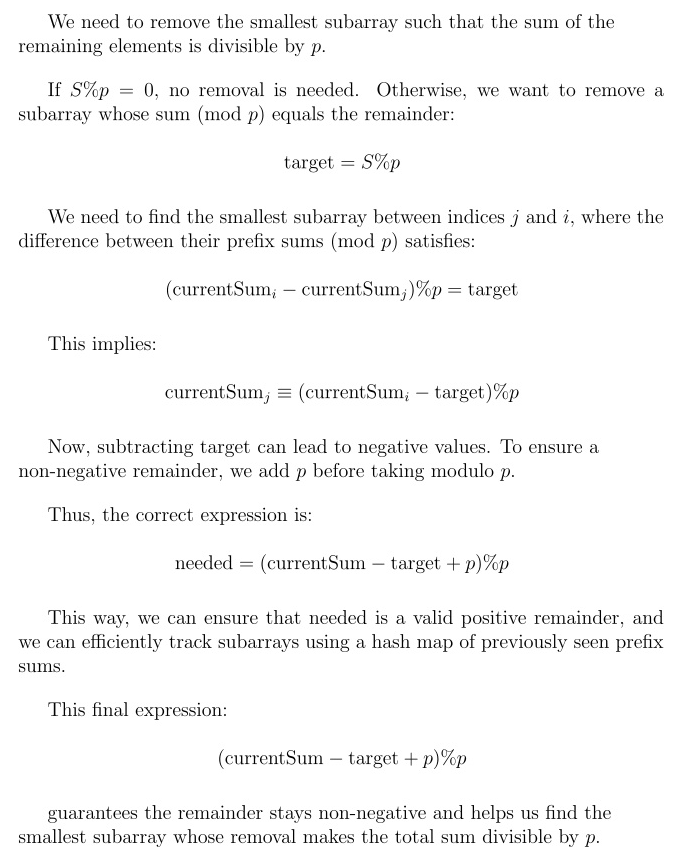

In [ ]:
def minSubarray(nums, p):
    total= sum(nums)
    remainder = total % p
    if remainder == 0:
      return 0
    cur_sum=0
    min_len=len(nums)
    map={0:-1}
    for i in range(len(nums) ):
      cur_sum=(cur_sum+nums[i])%p
      needed = (cur_sum - remainder + p) % p
      if needed in map:
         min_len=min(min_len,i-map[needed])
      map[cur_sum] = i
    return -1 if min_len == len(nums) else min_len

In [ ]:
nums = [3,1,4,2]
p = 6
minSubarray(nums, p)

## Leetcode #2491:[Divide Players Into Teams of Equal Skill](https://leetcode.com/problems/divide-players-into-teams-of-equal-skill/description/?envType=daily-question&envId=2024-10-04)

In [ ]:
def dividePlayers(skill):
    skill.sort()
    target = skill[0]+skill[-1]
    res=0
    for i in range(len(skill)//2):
      if (skill[i]+skill[len(skill)-i-1]) != target:
         return -1
      res+=skill[i]*skill[len(skill)-i-1]
    return res

In [ ]:
class Solution:
    def dividePlayers(self, skill: List[int]) -> int:
        n = len(skill)
        total_skill = sum(skill)
        skill_frequency = [0] * 1001

        # Calculate total skill and skill frequency
        for player_skill in skill:
            skill_frequency[player_skill] += 1

        # Check if total skill can be evenly distributed among teams
        if total_skill % (n // 2) != 0:
            return -1

        target_team_skill = total_skill // (n // 2)
        total_chemistry = 0

        # Calculate total chemistry while verifying valid team formations
        for player_skill in skill:
            partner_skill = target_team_skill - player_skill

            # Check if a valid partner exists
            if skill_frequency[partner_skill] == 0:
                return -1

            # Calculate and add chemistry of the current pair
            total_chemistry += player_skill * partner_skill
            skill_frequency[partner_skill] -= 1

        # Return half of total_chemistry as each pair is counted twice
        return total_chemistry // 2

In [ ]:
skill = [3,2,5,1,3,4]
dividePlayers(skill)

## Leetcode #567:[Permutation in String](https://leetcode.com/problems/permutation-in-string/description/?envType=daily-question&envId=2024-10-05)

In [ ]:
def checkInclusion(s1, s2):
    if len(s1) > len(s2):
       return False
    s1_map=[0]*26
    s2_map=[0]*26
    for i in range(len(s1)):
      s1_map[ord(s1[i]) - ord('a')]+=1
      s2_map[ord(s2[i]) - ord('a')]+=1
    for i in range(len(s2) - len(s1)):
        if s1_map == s2_map:
            return True
        s2_map[ord(s2[i]) - ord('a')] -= 1
        s2_map[ord(s2[i + len(s1)]) - ord('a')] += 1
    return s1_map==s2_map

In [ ]:
s1 = "ab"
s2 = "eidbaooo"
checkInclusion(s1, s2)

## Leetcode #1072:[Flip Columns For Maximum Number of Equal Rows](https://leetcode.com/problems/flip-columns-for-maximum-number-of-equal-rows/description/?envType=daily-question&envId=2024-11-22)

find the pattern of row, return the max number of common pattern

In [ ]:
def maxEqualRowsAfterFlips(matrix):
    pattern_map={}
    for row in matrix:
        pattern= tuple(row)
        if row[0]!=0:
           pattern= tuple([0 if i==1 else 1for i in row ])
        pattern_map[pattern]= pattern_map.get(pattern,0)+1
    return max(pattern_map.values())

In [ ]:
matrix = [[0,0,0],[0,0,1],[1,1,0]]
maxEqualRowsAfterFlips(matrix)

## Leetcode #1346:[Check If N and Its Double Exist](https://leetcode.com/problems/check-if-n-and-its-double-exist/description/?envType=daily-question&envId=2024-12-01)

In [ ]:
def checkIfExist(arr):
    map=set()
    arr.sort()
    for i in arr:
        if i /2 in map:
            return True
        if i<0:
            map.add(i/2)
        else:
            map.add(i*2)
    return False


In [ ]:
arr = [10,2,5,3]
checkIfExist(arr)

## Leetcode #2554:[Maximum Number of Integers to Choose From a Range I](https://leetcode.com/problems/maximum-number-of-integers-to-choose-from-a-range-i/description/?envType=daily-question&envId=2024-12-06)

In [ ]:
def maxCount(banned, n, maxSum):
    res=0
    curr=1
    banned= set(banned)
    while curr<=n:
       if curr in banned:
          curr+=1
          continue
       if maxSum>curr:
          res+=1
          maxSum-= curr
       else:
          break
    return res

In [ ]:
class Solution:
    def maxCount(self, banned: List[int], n: int, maxSum: int) -> int:
        ans = 0
        temp = 0
        banned = set(banned)
        for i in range(1, n + 1):
            if temp >= maxSum or temp + i > maxSum: break
            elif i not in banned:
                temp += i
                ans += 1
        return ans

In [ ]:
banned = [1,6,5]
n = 5
maxSum = 6
maxCount(banned, n, maxSum)

## Leetcode #2981:[Find Longest Special Substring That Occurs Thrice I](https://leetcode.com/problems/find-longest-special-substring-that-occurs-thrice-i/description/?envType=daily-question&envId=2024-12-10)

In [ ]:
from collections import Counter

def maximumLength(s):
    subarrays = []
    # get all special subarray
    for i in range(len(s)):
        index = i
        while index < len(s) and s[index] == s[i]:
            subarrays.append(s[i:index+1])
            index += 1

    counter = Counter(subarrays)
    max_len = 0
    print(subarrays)
    print(counter)
    # count the frequency
    for j, n in counter.items():
        if n >= 3:
            if len(j) > max_len:
                max_len = len(j)

    if max_len == 0:
        return -1

    return max_len



In [ ]:
s = "aaaa"
maximumLength(s)

In [ ]:
class Solution:
    def maximumLength(self, s: str) -> int:
        n = len(s)
        l, r = 1, n

        if not self.helper(s, n, l):
            return -1

        while l + 1 < r:
            mid = (l + r) // 2
            if self.helper(s, n, mid):
                l = mid
            else:
                r = mid

        return l

    def helper(self, s: str, n: int, x: int) -> bool:
        cnt = [0] * 26
        p = 0

        for i in range(n):
            while s[p] != s[i]:
                p += 1
            '''
            Checks if the current substring length (i - p + 1) is greater than or equal to 𝑥
            If so, it increments the count for the character s[i] in the cnt array.
            '''
            if i - p + 1 >= x:
                cnt[ord(s[i]) - ord('a')] += 1
                #Checks if the count of the character s[i] exceeds 2
            if cnt[ord(s[i]) - ord('a')] > 2:
                return True

        return False

## Leetcode #1930:[Unique Length-3 Palindromic Subsequences](https://leetcode.com/problems/unique-length-3-palindromic-subsequences/description/?envType=daily-question&envId=2025-01-04)

count the number of distinct character occurred between the same character

In [ ]:
def countPalindromicSubsequence(s):
    first=[-1]*26
    last= [-1]*26
    res=0
    for i in range(len(s)):
       if first[ord(s[i])-ord('a')] ==-1:
          first[ord(s[i])-ord('a')]=i
       last[ord(s[i])-ord('a')]=i
    for i in range(26):
       between=set()
       if first[i]!=-1 and last[i]!=-1:
          for j in range(first[i]+1,last[i]):
             between.add(s[j])
          res+=len(between)
    return res

In [ ]:
s = "aabca"
countPalindromicSubsequence(s)

## Leetcode #916:[Word Subsets](https://leetcode.com/problems/word-subsets/description/?envType=daily-question&envId=2025-01-10)

In [ ]:
def wordSubsets(words1, words2):
    need = Counter()
    for word in words2:
        need |= Counter(word)  # We're merging all the characters we need

    # Now, let's check each word in words1 to see if it's universal
    result = []
    for word in words1:
    # Count the characters in each word from words1 and compare with 'need'
        if not (need - Counter(word)):  # if word has all the characters from need
            result.append(word)

    return result

In [ ]:
class Solution:
    def wordSubsets(self, words1: List[str], words2: List[str]) -> List[str]:
        ans = set(words1)
        letters = {}
        for i in words2:
            for j in i:
                count = i.count(j)
                if j not in letters or count > letters[j]:
                    letters[j] = count
        for i in words1:
            for j in letters:
                if i.count(j) < letters[j]:
                    ans.remove(i)
                    break
        return list(ans)

In [ ]:
words1 = ["amazon","apple","facebook","google","leetcode"]
words2 = ["e","o"]
wordSubsets(words1, words2)

## Leetcode #1400:[Construct K Palindrome Strings](https://leetcode.com/problems/construct-k-palindrome-strings/description/?envType=daily-question&envId=2025-01-11)

In [ ]:
def canConstruct(s, k):
    if len(s)<k:
       return False
    if len(s)==k:
       return True
    map={}
    for c in s:
        map[c]= map.get(c,0)+1
    for c in map:
        if map[c]%2!=0:
           k-=1
    return k>=0


In [ ]:
s = "annabelle"
k = 2
canConstruct(s, k)

## Leetcode #3223:[Minimum Length of String After Operations](https://leetcode.com/problems/minimum-length-of-string-after-operations/description/?envType=daily-question&envId=2025-01-13)

In [ ]:
def minimumLength(s):
    freq=[0]*26
    res=0
    for c in s:
        freq[ord(c)-ord('a')]+=1
    for i in range(26):
        if freq[i]==0:
           continue
        if freq[i]%2!=0:
           res+=1
        else:
           res+=2
    return res


In [ ]:
s = "abaacbcbb"
minimumLength(s)

## Leetcode #2657:[Find the Prefix Common Array of Two Arrays](https://leetcode.com/problems/find-the-prefix-common-array-of-two-arrays/description/?envType=daily-question&envId=2025-01-14)

In [ ]:
def findThePrefixCommonArray(A, B):
    Abit=0
    Bbit=0
    res=[]
    for i in range(len(A)):
        Abit|=1<<A[i]
        Bbit|=1<<B[i]
        res.append(bin(Abit&Bbit).count("1"))
    return res

In [ ]:
class Solution:
    def findThePrefixCommonArray(self, A: List[int], B: List[int]) -> List[int]:
        n = len(A)

        C = [0] * n
        seta, setb = set(), set()
        for i in range(n):
            C[i] = C[i - 1]
            if A[i] == B[i]:
                C[i] += 1
            else:
                if A[i] in setb:
                    C[i] += 1
                if B[i] in seta:
                    C[i] += 1
                seta.add(A[i])
                setb.add(B[i])
        return C

In [ ]:
A = [1,3,2,4]
B = [3,1,2,4]
findThePrefixCommonArray(A, B)

## Leetcode #2661:[First Completely Painted Row or Column](https://leetcode.com/problems/first-completely-painted-row-or-column/description/?envType=daily-question&envId=2025-01-20)

In [ ]:
def firstCompleteIndex(arr, mat):
    num_rows, num_cols = len(mat), len(mat[0])
    row_count, col_count = [0] * num_rows, [0] * num_cols
    num_to_pos = {}

    # Create a map to store the position of each number in the matrix
    for row in range(num_rows):
        for col in range(num_cols):
            num_to_pos[mat[row][col]] = [row, col]

    for i in range(len(arr)):
        row, col = num_to_pos[arr[i]]
        row_count[row] += 1
        col_count[col] += 1
        if row_count[row] == num_cols or col_count[col] == num_rows:
            return i
    return -1

In [ ]:
arr = [1,3,4,2]
mat = [[1,4],[2,3]]
firstCompleteIndex(arr, mat)

## Leetcode #1790:[Check if One String Swap Can Make Strings Equal](https://leetcode.com/problems/check-if-one-string-swap-can-make-strings-equal/description/?envType=daily-question&envId=2025-02-05)

In [ ]:
def areAlmostEqual(s1, s2):
    if s1 == s2:
        return True
    diff=[]
    for i in range(len(s1)):
        if s1[i]!=s2[i]:
            diff.append(i)
    if len(diff)!=2:
        return False
    return s1[diff[0]]==s2[diff[1]] and s1[diff[1]]==s2[diff[0]]


In [ ]:
s1 = "bank"
s2 = "kanb"
areAlmostEqual(s1, s2)

## Leetcode #1726:[Tuple with Same Product](https://leetcode.com/problems/tuple-with-same-product/description/?envType=daily-question&envId=2025-02-06)

In [ ]:
def tupleSameProduct(nums):
    product_cnt = defaultdict(int)

    for i in range(len(nums)):
        for j in range(i+1, len(nums)):
            product = nums[i] * nums[j]
            product_cnt[product] += 1
    res = 0
    for cnt in product_cnt.values():
        pairs = (cnt * (cnt-1)) // 2
        res += 8*pairs
    return res

In [ ]:
nums = [2,3,4,6]
tupleSameProduct(nums)

## Leetcode #3160:[Find the Number of Distinct Colors Among the Balls](https://leetcode.com/problems/find-the-number-of-distinct-colors-among-the-balls/description/?envType=daily-question&envId=2025-02-07)

In [ ]:
def queryResults(limit, queries):
    ans=0
    res=[]
    ball = defaultdict(int)
    color = defaultdict(int)
    for index, c in queries:
        if index in ball:
            color[ball[index]]-=1
            if color[ball[index]]==0:
                ans-=1
        ball[index]=c
        color[c]+=1
        if color[c]==1:
            ans+=1
        res.append(ans)
    return res


In [ ]:
limit = 4
queries = [[1,4],[2,5],[1,3],[3,4]]
queryResults(limit, queries)

## Leetcode #2349:[Design a Number Container System](https://leetcode.com/problems/design-a-number-container-system/description/?envType=daily-question&envId=2025-02-08)


In [ ]:
class NumberContainers:
    def __init__(self):
        # Map to store number -> min heap of indices
        self.number_to_indices = defaultdict(list)
        # Map to store index -> number
        self.index_to_numbers = {}

    def change(self, index: int, number: int) -> None:
        # Update index to number mapping
        self.index_to_numbers[index] = number

        # Add index to the min heap for this number
        heapq.heappush(self.number_to_indices[number], index)

    def find(self, number: int) -> int:
        # If number doesn't exist in our map
        if not self.number_to_indices[number]:
            return -1

        # Keep checking top element until we find valid index
        while self.number_to_indices[number]:
            index = self.number_to_indices[number][0]

            # If index still maps to our target number, return it
            if self.index_to_numbers.get(index) == number:
                return index

            # Otherwise remove this stale index
            heapq.heappop(self.number_to_indices[number])
        return -1


# Your NumberContainers object will be instantiated and called as such:
# obj = NumberContainers()
# obj.change(index,number)
# param_2 = obj.find(number)

# Your NumberContainers object will be instantiated and called as such:
# obj = NumberContainers()
# obj.change(index,number)
# param_2 = obj.find(number)

## Leetcode #2364:[Count Number of Bad Pairs](https://leetcode.com/problems/count-number-of-bad-pairs/description/?envType=daily-question&envId=2025-02-09)


In [ ]:
def countBadPairs(nums):
    bad_pairs = 0
    diff_count = {}

    for pos in range(len(nums)):
        diff = pos - nums[pos]
# j−nums[j]=i−nums[i]
        # Count of previous positions with same difference
        good_pairs_count = diff_count.get(diff, 0)

        # Total possible pairs minus good pairs = bad pairs
        bad_pairs += pos - good_pairs_count

        # Update count of positions with this difference
        diff_count[diff] = good_pairs_count + 1

    return bad_pairs

In [ ]:
nums = [4,1,3,3]
countBadPairs(nums)

## Leetcode #2342:[Max Sum of a Pair With Equal Sum of Digits](https://leetcode.com/problems/max-sum-of-a-pair-with-equal-sum-of-digits/description/?envType=daily-question&envId=2025-02-12)

In [ ]:
def calculate_digit_sum(self, num):
        digit_sum = 0
        while num > 0:
            digit_sum += num % 10
            num //= 10
        return digit_sum

def maximumSum(self, nums):
    digit_sum_pairs = []

    # Store numbers with their digit sums as pairs
    for number in nums:
        digit_sum = self.calculate_digit_sum(number)
        digit_sum_pairs.append((digit_sum, number))

    # Sort based on digit sums, and if equal, by number value
    digit_sum_pairs.sort()

    max_pair_sum = -1

    # Iterate through the sorted array to find the maximum sum of pairs
    for index in range(1, len(digit_sum_pairs)):
        current_digit_sum = digit_sum_pairs[index][0]
        previous_digit_sum = digit_sum_pairs[index - 1][0]

        # If two consecutive numbers have the same digit sum
        if current_digit_sum == previous_digit_sum:
            current_sum = (
                digit_sum_pairs[index][1] + digit_sum_pairs[index - 1][1]
            )
            max_pair_sum = max(max_pair_sum, current_sum)

    return max_pair_sum

## Leetcode #2570:[Merge Two 2D Arrays by Summing Values](https://leetcode.com/problems/merge-two-2d-arrays-by-summing-values/description/?envType=daily-question&envId=2025-03-02)

In [ ]:
def mergeArrays(nums1, nums2):
    table ={}
    for i in nums1:
        table[i[0]]=i[1]
    for i in nums2:
        if i[0] in table:
            table[i[0]]+=i[1]
        else:
            table[i[0]]=i[1]
    res=[]
    for i in table:
        res.append([i,table[i]])
    res.sort()
    return res

In [ ]:
nums1 = [[1,2],[2,3],[4,5]]
nums2 = [[1,4],[3,2],[4,1]]
mergeArrays(nums1, nums2)

## Leetcode #2206:[Divide Array Into Equal Pairs](https://leetcode.com/problems/divide-array-into-equal-pairs/description/?envType=daily-question&envId=2025-03-17)

In [ ]:
def divideArray(nums):
    freq = {}
    for num in nums:
        freq[num] = freq.get(num, 0) + 1

    for count in freq.values():
        if count % 2 != 0:
            return False
    return True

In [ ]:
nums = [3,2,3,2,2,2]
divideArray(nums)

## Leetcode #2780:[Minimum Index of a Valid Split](https://leetcode.com/problems/minimum-index-of-a-valid-split/description/?envType=daily-question&envId=2025-03-27)

In [ ]:
def minimumIndex(nums):
    first_map = defaultdict(int)
    second_map = defaultdict(int)
    n = len(nums)

    # Add all elements of nums to second_map
    for num in nums:
        second_map[num] += 1

    for index in range(n):
        # Create split at current index
        num = nums[index]
        second_map[num] -= 1
        first_map[num] += 1

        # Check if valid split
        if (
            first_map[num] * 2 > index + 1
            and second_map[num] * 2 > n - index - 1
        ):
            return index

    # No valid split exists
    return -1

## Leetcode #3396:[Minimum Number of Operations to Make Elements in Array Distinct](https://leetcode.com/problems/minimum-number-of-operations-to-make-elements-in-array-distinct/description/?envType=daily-question&envId=2025-04-08)



In [ ]:
def minimumOperations(nums):
    seen = [False]*128
    for i in range(len(nums),-1,-1):
        if seen[nums[i]]:
           return i//3+1
        seen[nums[i]]=True
    return 0

In [ ]:
class Solution:
    def minimumOperations(self, nums: List[int]) -> int:
        def check_unique(start):
            seen = set()
            for num in nums[start:]:
                if num in seen:
                    return False
                seen.add(num)
            return True

        ans = 0
        for i in range(0, len(nums), 3):
            if check_unique(i):
                return ans
            ans += 1
        return ans

## Leetcode #3375:[Minimum Operations to Make Array Values Equal to K](https://leetcode.com/problems/minimum-operations-to-make-array-values-equal-to-k/description/?envType=daily-question&envId=2025-04-09)

In [ ]:
def minOperations(nums, k):
    res=0
    dnums= set(nums)
    for i in dnums:
        if k>i:
            return -1
        elif k<i:
            res+=1
    return res

## Leetcode #2176:[Count Equal and Divisible Pairs in an Array](https://leetcode.com/problems/count-equal-and-divisible-pairs-in-an-array/description/?envType=daily-question&envId=2025-04-17)

In [ ]:
def countPairs(self, nums: List[int], k: int) -> int:
    mapp = defaultdict(list)

    for idx,a in enumerate(nums):
        mapp[a].append(idx)

    cnt = 0
    for ky, v in mapp.items():
        if len(v) > 1:
            for i in range(len(v)):
                for j in range(i+1,len(v)):
                    if (v[i]*v[j]) % k == 0:
                        cnt += 1
    return cnt


## Leetcode #781:[Rabbits in Forest](https://leetcode.com/problems/rabbits-in-forest/description/?envType=daily-question&envId=2025-04-20)

In [ ]:
def numRabbits(answers):
    map ={}
    for i in answers:
        map[i]= map.get(i,0)+1
    print(map)
    res=0
    for k,v in map.items():
        if k == 0:
            res+=v
        else:
            res+=ceil(v / (k + 1)) * (k + 1)
    return res

Let v be the number of rabbits reporting k. To determine how many groups of size k + 1 are needed, we calculate:

Number of groups=`⌈v/(k+1)⌉`

* Each group can hold up to `k + 1` rabbits.
* If v is not a multiple of `k + 1`, the leftover rabbits will form an additional group.

Each group contributes exactly `k + 1` rabbits. Therefore, the total number of rabbits contributed by all groups is:

Total rabbits=`⌈v/(k+1)⌉×(k+1)`

In [ ]:
def numRabbits(answers):
    answers.sort()
    res = 0
    count = 0

    for i in range(len(answers)):
        if answers[i] == 0:
            res += 1
        elif i == 0 or answers[i] != answers[i - 1] or count == 0:
            res += answers[i] + 1
            count = answers[i]
        else:
            count -= 1
    return res

In [ ]:
ans=[1,0,1,0,0]
numRabbits(ans)

## Leetcode #1399:[Count Largest Group](https://leetcode.com/problems/count-largest-group/description/?envType=daily-question&envId=2025-04-23)

In [ ]:
def countLargestGroup(self, n: int) -> int:
    hashMap = collections.Counter()
    for i in range(1, n + 1):
        key = sum([int(x) for x in str(i)])
        hashMap[key] += 1
    maxValue = max(hashMap.values())
    count = sum(1 for v in hashMap.values() if v == maxValue)
    return count

## Leetcode #1128:[Number of Equivalent Domino Pairs](https://leetcode.com/problems/number-of-equivalent-domino-pairs/description/?envType=daily-question&envId=2025-05-04)

In [ ]:
def numEquivDominoPairs(dominoes):
    num = [0] * 100
    ret = 0
    for x, y in dominoes:
        val = x * 10 + y if x <= y else y * 10 + x
        ret += num[val]
        num[val] += 1
    return ret

## Leetcode #2094:[Finding 3-Digit Even Numbers](https://leetcode.com/problems/finding-3-digit-even-numbers/description/?envType=daily-question&envId=2025-05-12)


In [ ]:
def findEvenNumbers(self, digits):
    mpp = [0]*10
    for d in digits:
        mpp[d] += 1
    res = []
    for i in range(1, 10):
        if mpp[i] == 0: continue
        mpp[i] -= 1
        for j in range(10):
            if mpp[j] == 0: continue
            mpp[j] -= 1
            for k in range(0, 10, 2):
                if mpp[k] == 0: continue
                res.append(i*100 + j*10 + k)
            mpp[j] += 1
        mpp[i] += 1
    return res

## Leetcode #2131:[Longest Palindrome by Concatenating Two Letter Words](https://leetcode.com/problems/longest-palindrome-by-concatenating-two-letter-words/description/?envType=daily-question&envId=2025-05-25)

In [ ]:
def longestPalindrome(words):
    freq = Counter(words)
    ans = 0
    has_center = False

    for word in list(freq.keys()):
        rev = word[::-1]
        if word == rev:
            pairs = freq[word] // 2
            ans += pairs * 4
            freq[word] -= pairs * 2
            if freq[word] == 1:
                has_center = True
        else:
            if rev in freq:
                pairs = min(freq[word], freq[rev])
                ans += pairs * 4
                freq[word] -= pairs
                freq[rev] -= pairs

    if has_center:
        ans += 2

    return ans

## Leetcode #3442:[Maximum Difference Between Even and Odd Frequency I](https://leetcode.com/problems/maximum-difference-between-even-and-odd-frequency-i/description/?envType=daily-question&envId=2025-06-10)

In [ ]:
class Solution:
    def maxDifference(self, s: str) -> int:
        c = Counter(s)
        maxOdd = max(x for x in c.values() if x % 2 == 1)
        minEven = min(x for x in c.values() if x % 2 == 0)
        return maxOdd - minEven

## Leetcode #3085:[Minimum Deletions to Make String K-Special](https://leetcode.com/problems/minimum-deletions-to-make-string-k-special/description/?envType=daily-question&envId=2025-06-21)

In [ ]:
class Solution:
    def minimumDeletions(self, word: str, k: int) -> int:
        cnt = defaultdict(int)
        for c in word:
            cnt[c] += 1
        res = len(word)
        for a in cnt.values():
            deleted = 0
            for b in cnt.values():
                if a > b:
                    deleted += b
                elif b > a + k:
                    deleted += b - (a + k)
            res = min(res, deleted)
        return res

## Leetcode #1394:[Find Lucky Integer in an Array](https://leetcode.com/problems/find-lucky-integer-in-an-array/description/?envType=daily-question&envId=2025-07-05)

In [ ]:
class Solution:
    def findLucky(self, arr: list[int]) -> int:
        from collections import Counter

        freq = Counter(arr)
        lucky = -1

        for num, count in freq.items():
            if num == count:
                lucky = max(lucky, num)

        return lucky

## Leetcode #3541:[Find Most Frequent Vowel and Consonant](https://leetcode.com/problems/find-most-frequent-vowel-and-consonant/description/?envType=daily-question&envId=2025-09-13)

In [ ]:
class Solution:
    def maxFreqSum(self, s: str) -> int:
        mp = Counter(s)
        vowel = max((mp[ch] for ch in mp if ch in "aeiou"), default=0)
        consonant = max((mp[ch] for ch in mp if ch not in "aeiou"), default=0)
        return vowel + consonant

## Leetcode #966:[Vowel Spellchecker](https://leetcode.com/problems/vowel-spellchecker/description/?envType=daily-question&envId=2025-09-14)

In [ ]:
class Solution:
    def spellchecker(self, wordlist, queries):
        exact = set(wordlist)
        caseMap = {}
        vowelMap = {}

        for w in wordlist:
            lower = w.lower()
            devowel = self.deVowel(lower)
            if lower not in caseMap:
                caseMap[lower] = w
            if devowel not in vowelMap:
                vowelMap[devowel] = w

        result = []
        for q in queries:
            if q in exact:
                result.append(q)
            else:
                lower = q.lower()
                devowel = self.deVowel(lower)
                if lower in caseMap:
                    result.append(caseMap[lower])
                elif devowel in vowelMap:
                    result.append(vowelMap[devowel])
                else:
                    result.append("")
        return result

    def deVowel(self, s):
        return ''.join('*' if c in 'aeiou' else c for c in s)

## Leetcode #3005:[Count Elements With Maximum Frequency](https://leetcode.com/problems/count-elements-with-maximum-frequency/description/?envType=daily-question&envId=2025-09-22)

In [ ]:
class Solution:
    def maxFrequencyElements(self, nums: List[int]) -> int:
        # Find the frequency of each element
        frequencies = {}
        for num in nums:
            if num in frequencies:
                frequencies[num] += 1
            else:
                frequencies[num] = 1

        # Determine the maximum frequency
        max_frequency = 0
        for frequency in frequencies.values():
            max_frequency = max(max_frequency, frequency)

        # Calculate the total frequencies of elements with the maximum frequency
        frequency_of_max_frequency = 0
        for frequency in frequencies.values():
            if frequency == max_frequency:
                frequency_of_max_frequency += 1

        return frequency_of_max_frequency * max_frequency

## Leetcode #2048:[Next Greater Numerically Balanced Number](https://leetcode.com/problems/next-greater-numerically-balanced-number/description/?envType=daily-question&envId=2025-10-24)

In [ ]:
class Solution:
    def solve(self, x: int) -> bool:
        s = str(x)
        vec = [0]*10
        for ch in s:
            vec[ord(ch)-48] += 1
        for ch in s:
            c = ord(ch)-48
            if c == 0 or vec[c] != c:
                return False
        return True

    def nextBeautifulNumber(self, n: int) -> int:
        i = n + 1
        while True:
            if self.solve(i):
                return i
            i += 1

## Leetcode #3289:[The Two Sneaky Numbers of Digitville](https://leetcode.com/problems/the-two-sneaky-numbers-of-digitville/description/?envType=daily-question&envId=2025-10-31)

In [ ]:
def getSneakyNumbers(self, nums: List[int]) -> List[int]:
    res = []
    count = {}
    for x in nums:
        count[x] = count.get(x, 0) + 1
        if count[x] == 2:
            res.append(x)
    return res

## Leetcode #3318. [Find X-Sum of All K-Long Subarrays I](https://leetcode.com/problems/find-x-sum-of-all-k-long-subarrays-i/description/?envType=daily-question&envId=2025-11-04)

In [ ]:
class Solution:
    def findXSum(self, nums: List[int], k: int, x: int) -> List[int]:
        n = len(nums)
        ans = list()
        for i in range(n - k + 1):
            cnt = Counter(nums[i : i + k])
            freq = sorted(cnt.items(), key=lambda item: (-item[1], -item[0]))
            xsum = sum(key * value for key, value in freq[:x])
            ans.append(xsum)
        return ans

## Leetcode #3583:[Count Special Triplets](https://leetcode.com/problems/count-special-triplets/description/?envType=daily-question&envId=2025-12-09)

In [ ]:
class Solution:
    def specialTriplets(self, nums: List[int]) -> int:
        MOD = 10**9 + 7
        num_cnt = {}
        num_partial_cnt = {}

        for v in nums:
            num_cnt[v] = num_cnt.get(v, 0) + 1

        ans = 0
        for v in nums:
            target = v * 2
            l_cnt = num_partial_cnt.get(target, 0)
            num_partial_cnt[v] = num_partial_cnt.get(v, 0) + 1
            r_cnt = num_cnt.get(target, 0) - num_partial_cnt.get(target, 0)
            ans = (ans + l_cnt * r_cnt) % MOD

        return ans

## Leetcode #960:[Delete Columns to Make Sorted III](https://leetcode.com/problems/delete-columns-to-make-sorted-iii/description/?envType=daily-question&envId=2025-12-22)

In [ ]:
class Solution(object):
    def minDeletionSize(self, A):
        W = len(A[0])
        dp = [1] * W
        for i in range(W-2, -1, -1):
            for j in range(i+1, W):
                if all(row[i] <= row[j] for row in A):
                    dp[i] = max(dp[i], 1 + dp[j])

        return W - max(dp)

## Leetcode #1458:[Max Dot Product of Two Subsequences](https://leetcode.com/problems/max-dot-product-of-two-subsequences/description/?envType=daily-question&envId=2026-01-08)

In [ ]:
class Solution:
    def maxDotProduct(self, nums1: List[int], nums2: List[int]) -> int:
        memo = {}
        # max dot product of two subsequences starting at i,j
        def dp(i,j):
            if i == len(nums1) or j == len(nums2):
                return float("-inf") # if we are passed the boundary, dont pick anything from there.

            if (i,j) in memo:
                return memo[(i,j)]

            take = nums1[i] * nums2[j]
            res = max(
            # take i,j. move forward
                take + dp(i+1, j+1),

            # take this subsequence and just end.
                take,

            # skip i: i+1,j
                dp(i+1,j),

            # skip j: i,j+1
                dp(i,j+1),
            )

            memo[(i,j)] = res

            return memo[(i,j)]

        return dp(0,0)

# Math

## Special note: Gcd


In [ ]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

## Leetcode #1247:[Minimum Swaps to Make Strings Equal](https://leetcode.com/problems/minimum-swaps-to-make-strings-equal/description/)
To solve this problem, we need to count the mismatches between the two strings `s1` and `s2`. Since the strings only contain 'x' and 'y', a mismatch occurs when one string has 'x' and the other has 'y' at the same position.

We can classify mismatches into two types:
- 'xy' mismatch: where `s1` has 'x' and `s2` has 'y'.
- 'yx' mismatch: where `s1` has 'y' and `s2` has 'x'.

We can swap characters between the strings to correct these mismatches. The important points to consider are:
- Two 'xy' mismatches can be corrected with one swap. Similarly, two 'yx' mismatches can be corrected with one swap.
- One 'xy' mismatch and one 'yx' mismatch can be corrected with two swaps.

The approach to solving this problem is as follows:

1. Count the number of 'xy' and 'yx' mismatches.
2. If the total number of mismatches is odd, return -1, as it's impossible to make the strings equal.
3. Calculate the minimum number of swaps:
   - Each pair of same-type mismatches ('xy'-'xy' or 'yx'-'yx') requires one swap.
   - Each pair of different-type mismatches ('xy'-'yx') requires two swaps.

Here's the implementation of this logic:

For the strings `"xyyx"` and `"yxyx"`, the minimum number of swaps required to make them equal is 2. The function calculates this by counting the 'xy' and 'yx' mismatches and applying the rules for swapping characters.

In [ ]:
def minimumSwap(s1, s2):
    xy = yx = 0
    for a, b in zip(s1, s2):
        if a == 'x' and b == 'y':
            xy += 1
        elif a == 'y' and b == 'x':
            yx += 1

    # If the total number of mismatches is odd, return -1
    if (xy + yx) % 2 != 0:
        return -1

    # Calculate the number of swaps
    swaps = xy // 2 + yx // 2

    # If there's an extra 'xy' and 'yx', it requires 2 more swaps
    if xy % 2 != 0:
        swaps += 2

    return swaps


In [ ]:
s1 = "xx"
s2 = "yy"
minimumSwap(s1, s2)

## Leetcode #1759:[Count Number of Homogenous Substrings](https://leetcode.com/problems/count-number-of-homogenous-substrings/description/)
To solve this problem, we need to count all homogenous substrings in the given string `s`. A homogenous substring consists of the same character repeated one or more times. We can solve this by iterating through the string and counting the lengths of consecutive character sequences, then using a formula to calculate the number of homogenous substrings for each sequence.

### Approach:
- Iterate through the string `s` and keep track of the current character and its repetition count.
- When we encounter a new character (or reach the end of the string), we calculate the number of homogenous substrings for the previous character sequence using the formula for the sum of the first `n` natural numbers: $$\frac{n \times (n+1)}{2}$$. This formula works because for a sequence of length `n`, we can form `n` single-character substrings, `n-1` substrings of length 2, ..., 1 substring of length `n`.
- Reset the count for the new character and continue until we have processed the entire string.



This function efficiently calculates the number of homogenous substrings by adding the contributions of each sequence of identical characters. The use of modulo \(10^9 + 7\) ensures that the result stays within the integer limits for large inputs.

In [ ]:
def countHomogenous(s):
    res =0
    start =0
    for i in range(len(s)):
        if s[i]!= s[start]:
            count = i-start
            res += (count*(count+1))//2
            start =i
    last = len(s)-start
    res += (last*(last+1))//2
    return int(res % (10**9 + 7))

In [ ]:
s = "abbcccaa"
countHomogenous(s)

## Leetcode #1291:[Sequential Digits](https://leetcode.com/problems/sequential-digits/description/?envType=daily-question&envId=2024-02-02)

In [ ]:
def sequentialDigits(low, high):
    s="123456789"
    res =[]
    for length in range(len(str(low)), len(str(high)) + 1):
       for start in range(0,10-length):
           num = int(s[start:start+length])
           if num<high and num>low:
              res.append(num)
    return res

In [ ]:
low = 100
high = 300
sequentialDigits(low,high)

## Leetcode #231:[Power of Two](https://leetcode.com/problems/power-of-two/description/?envType=daily-question&envId=2024-02-19)

In [ ]:
def isPowerOfTwo(n):
    if n == 0:
       return False
    while n !=1:
          if n % 2 != 0:
            return False
          n = n//2
    return True

Bit operation
- More generally, for any number `n > 0`
`n & n - 1` removes the last 1 in the binary form of `n`  
- if and only if `n` is a power of two, there is only one `1` in the binary form of `n`

In [ ]:
def isPowerOfTwo(n):
    return n and not (n & n - 1)

In [ ]:
n = 16
isPowerOfTwo(n)

## Leetcode # 201:[Bitwise AND of Numbers Range](https://leetcode.com/problems/bitwise-and-of-numbers-range/description/?envType=daily-question&envId=2024-02-21)

To understand why this approach works mathematically, let's delve into the properties of binary numbers and the bitwise AND operation.

The bitwise AND operation takes two binary representations and performs the AND operation on each pair of corresponding bits. The result is a binary number where each bit is 1 if and only if both corresponding bits of the original numbers are 1; otherwise, the bit is 0.

When considering a range of numbers, [left, right], and applying the bitwise AND operation to every number in this range, the operation tends to zero out bits from right to left until it reaches the highest bit that left and right share in common.

### Mathematical Basis

1. **Convergence to Common Prefix**: The operation's nature ensures that any bit position at which the numbers in the range differ (i.e., where one number has a 1 and another has a 0) will result in a 0 in that bit position of the final AND result. This is because, for any bit to remain 1 in the result, that bit must be 1 in all numbers within the range.

2. **Binary Representation and Ranges**: Binary numbers increment by increasing the least significant bit and carrying over. When a carry occurs, it changes a sequence of 1s to 0s and increments the next bit. This carry-over effect means that, within any range of numbers, if there is a bit change at a particular position, all lower positions will cycle through all possible combinations (from all 0s to all 1s).

3. **Finding the Common Prefix**: Since we are interested in the common bits of all numbers in the range, we only need to consider the common prefix of the left and right bounds. The differing bits and all bits to the right essentially become 0 in the final AND result because, within the range, there will be at least one number that sets each of those bits to 0.

4. **Shifting Right**: By shifting both `left` and `right` rightward until they are equal, we effectively ignore all the differing bits and the bits to the right, focusing solely on the common prefix. The number of shifts needed to make them equal tells us how many bits were ignored.

5. **Shifting Left to Original Position**: After finding the common prefix (now in the form of the reduced `left` and `right`), we shift it left by the number of shifts done. This left shift restores the common prefix to its original bit position, effectively reconstructing the bitwise AND of all numbers in the original range.

Mathematically, this approach leverages the structure of binary numbers and the bitwise AND operation to efficiently compute the result without having to individually AND every number in the range. The process of shifting and finding the common prefix simplifies the operation by directly identifying the bits that remain unchanged across the entire range.

In [ ]:
def rangeBitwiseAnd(left, right):
    shift =0
    while left!= right:
      left >>= 1
      right >>= 1
      shift += 1
    return left<< shift

In [ ]:
left = 5
right = 7
rangeBitwiseAnd(left, right)

## Leetcode # 2864:[Maximum Odd Binary Number](https://leetcode.com/problems/maximum-odd-binary-number/description/?envType=daily-question&envId=2024-03-01)

In [ ]:
def maximumOddBinaryNumber(s):
    n=len(s)
    count = 0
    for i in s :
      if i=="1":
        count +=1
    return "1"*(count-1)+"0"*(n-count)+"1"

In [ ]:
s = "010"
maximumOddBinaryNumber(s)

## Leetcode #2485:[Find the Pivot Integer](https://leetcode.com/problems/find-the-pivot-integer/description/?envType=daily-question&envId=2024-03-13)

In [ ]:
def pivotInteger(n):
    sum =0
    total = (n*(n+1))/2
    for i in range(1,n+1):
       sum+=i
       second = total- sum+i
       if sum == second:
          return i
    return -1

In [ ]:
n = 8
pivotInteger(n)

## Leetcode #2582:[Pass the Pillow](https://leetcode.com/problems/pass-the-pillow/description/?envType=daily-question&envId=2024-07-06)
partition our numbers into chunks of size n - 1

In [ ]:
def passThePillow(n, time):
    round = time // n
    if round %2==0:
       return time %(n+1)+round
    else:
       return n-time %n-1-round

In [ ]:
class Solution:
    def passThePillow(self, n: int, time: int) -> int:
        i = 1
        direction = 1 # positive(1): L to R, negative(-1): R to L

        while time > 0:
            i += direction
            if i == n:
                direction = -1
            if i == 1:
                direction = 1
            time -= 1

        return i

In [ ]:
n = 18
time = 38
passThePillow(n, time)

## Leetcode #1518:[Water Bottles](https://leetcode.com/problems/water-bottles/description/?envType=daily-question&envId=2024-07-07)

In [ ]:
def numWaterBottles(numBottles, numExchange):
    res= numBottles
    while numBottles >= numExchange:
          can_change = numBottles // numExchange
          left = numBottles % numExchange
          res+= can_change
          numBottles= left+ can_change
    return res

In [ ]:
class Solution:
    def numWaterBottles(self, numBottles: int, numExchange: int) -> int:
        empty = 0
        drank = 0
        while numBottles:
            drank += 1
            empty += 1
            numBottles -= 1
            if empty == numExchange:
                empty -= numExchange
                numBottles += 1
        return drank

In [ ]:
numBottles = 15
numExchange = 4
numWaterBottles(numBottles, numExchange)

## Leetcode #1823:[Find the Winner of the Circular Game](https://leetcode.com/problems/find-the-winner-of-the-circular-game/description/?envType=daily-question&envId=2024-07-08)

[Josephus problem](https://en.wikipedia.org/wiki/Josephus_problem)\
$f(n,k)=((f(n-1,k)+k-1){\bmod {n}})+1,{\text{ with }}f(1,k)=1$\
start from 1\
$g(n,k)=(g(n-1,k)+k){\bmod {n}},{\text{ with }}g(1,k)=0$\
if the positions are numbered from
0 to 1 instead


Assume that the formula holds for $( n - 1 )$ people, i.e.,
$J(n-1, k) = (J(n-2, k) + k) \% (n-1)$\
We need to show that it also holds for \( n \) people:
$ J(n, k) = (J(n-1, k) + k) \% n $

1. Start with \( n \) people in a circle.
2. The first person to be eliminated is at position \( k-1 \) (0-indexed).
3. After eliminating this person, we are left with \( n-1 \) people. We need to find the position of the survivor among these \( n-1 \) people.

After the first person is eliminated, the problem reduces to finding the survivor in a circle of \( n-1 \) people with the same step \( k \). The positions of these \( n-1 \) people are not the same as in the original problem; they are shifted.

To map the positions correctly:
- The new position of the survivor in the reduced circle can be given by \( J(n-1, k) \), where the position \( J(n-1, k) \) is relative to the remaining \( n-1 \) people.
- To convert this back to the original problem with \( n \) people, we need to adjust for the eliminated person.


The position of the survivor \( J(n, k) \) in the original circle is given by:
\[
J(n, k) = (J(n-1, k) + k) \% n
\]
This adjustment ensures that the position is within the bounds of \( n \) and accounts for the elimination step.


Detailed Explanation of the Shift Adjustment

1. **Position Shift**:
   - When we eliminate the \( k \)-th person in a zero-based system, the next person in line starts from the next position, making it \( k-1 \) due to the 1-based system.

2. **Modulo Operation**:
   - The modulo operation \(\% n\) ensures the position wraps around the circle correctly. For zero-based indexing, this directly works because positions naturally wrap around from 0 to \( n-1 \).

3. **Adjusting to One-Based Indexing**:
   - In one-based indexing, after eliminating a person, we need to shift the indices correctly to reflect the new start position. Adding \( k-1 \) compensates for the shift, and adding 1 re-adjusts the indexing back to one-based.




In [ ]:
def findTheWinner(n, k):
    if n==1:
       return 1
    return (findTheWinner(n-1,k)+k-1) % n+1

In [ ]:
def findTheWinner(self, n: int, k: int) -> int:
      q = deque([x + 1 for x in range(n)])

      while len(q) > 1:
          c = k - 1

          while c:
              q.append(q.popleft())
              c -= 1

          q.popleft()

      return q[0]

In [ ]:
n = 5
k = 2
findTheWinner(n, k)

## Leetcode #273:[Integer to English Words](https://leetcode.com/problems/integer-to-english-words/description/?envType=daily-question&envId=2024-08-07)

In [ ]:
def numberToWords(num):
    if num == 0:
        return "Zero"
    below_20 = ["", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten",
                "Eleven", "Twelve", "Thirteen", "Fourteen", "Fifteen", "Sixteen", "Seventeen", "Eighteen", "Nineteen"]
    tens = ["", "", "Twenty", "Thirty", "Forty", "Fifty", "Sixty", "Seventy", "Eighty", "Ninety"]
    thousands = ["", "Thousand", "Million", "Billion"]
    def helper(n):
        if n==0:
           return ""
        if n<20:
          return below_20[n]+" "
        if n<100:
           return tens[n//10]+" "+helper(n%10)
        else:
           return below_20[n // 100] + " Hundred " + helper(n % 100)
    result = ""
    for i, chunk in enumerate(thousands):
        if num % 1000 != 0:
            result = helper(num % 1000) + chunk + " " + result
        num //= 1000

    return result.strip()

In [ ]:
class Solution:
    def numberToWords(self, num: int) -> str:
        def helper(num):

            if num < 20:
                s = belowTwenty[num]
            elif num < 100:
                s = tens[num // 10] + ' ' + belowTwenty[num % 10]
            elif num < 1000:
                s = helper(num // 100) + ' Hundred ' + helper(num % 100)
            elif num < 1000000:
                s = helper(num // 1000) + ' Thousand ' + helper(num % 1000)
            elif num < 1000000000:
                s = helper(num // 1000000) + ' Million ' + helper(num % 1000000)
            else:
                s = helper(num // 1000000000) + ' Billion ' + helper(num % 1000000000)

            return s.strip()

        if num == 0:
            return 'Zero'

        belowTwenty = ['', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight',
                       'Nine', 'Ten', 'Eleven', 'Twelve','Thirteen', 'Fourteen', 'Fifteen',
                       'Sixteen', 'Seventeen', 'Eighteen', 'Nineteen']

        tens = ['', 'Ten', 'Twenty', 'Thirty', 'Forty', 'Fifty', 'Sixty',
                'Seventy', 'Eighty', 'Ninety']

        return helper(num)

In [ ]:
num = 1234567
numberToWords(num)

## Leetcode #840:[Magic Squares In Grid](https://leetcode.com/problems/magic-squares-in-grid/description/?envType=daily-question&envId=2024-08-09)

* 5 appears in exactly 4 of these sums. The only element that would appear in 4 sums is the middle element of the magic square. Specifically, the middle element appears in the sums for the middle row, the middle column, and both diagonals. Thus, we know that for a subarray to be a magic square, its middle element has to be 5.
* Moreover, the even numbers (2, 4, 6, and 8) each appear in exactly 3 of the sums. Only the corner elements of the grid can appear in exactly 3 sums. Specifically, they appear in the sum for one row, one column, and one diagonal. Thus, we know the corner elements have to be even numbers.
* Finally, the only numbers remaining are the odd numbers (1, 3, 7, and 9). They each appear in exactly 2 of the sums. The remaining elements on the edges of the grid also appear in exactly 2 sums: the sums for one row and one column. Thus, we know the remaining edge elements have to be odd numbers.

Thus, we know that a subarray is a magic square if and only if it satisfies the 2 following properties:

* The middle element is 5
* The bordering elements follow the 2,9,4,3,8,1,6,7 sequence, starting at some corner element and going either clockwise or counter-clockwise.

In [ ]:
def numMagicSquaresInside(grid):
    ans = 0
    m = len(grid)
    n = len(grid[0])


    def isMagicSquare(grid, row, col):
        # The sequences are each repeated twice to account for
        # the different possible starting points of the sequence
        # in the magic square
        sequence = "2943816729438167"
        sequenceReversed = "7618349276183492"

        border = []
        # Flattened indices for bordering elements of 3x3 grid
        borderIndices = [0, 1, 2, 5, 8, 7, 6, 3]
        for i in borderIndices:
            num = grid[row + i // 3][col + (i % 3)]
            border.append(str(num))

        borderConverted = "".join(border)

        # Make sure the sequence starts at one of the corners
        return (
            grid[row][col] % 2 == 0
            and (
                sequence.find(borderConverted) != -1
                or sequenceReversed.find(borderConverted) != -1
            )
            and grid[row + 1][col + 1] == 5
        )
    for row in range(m - 2):
        for col in range(n - 2):
            if isMagicSquare(grid, row, col):
                ans += 1
    return ans

In [ ]:
class Solution:
    def numMagicSquaresInside(self, grid: List[List[int]]) -> int:
        R, C = len(grid), len(grid[0])
        if R < 3 or C < 3:
            return 0
        pattern_1 = [[8, 1, 6], [3, 5, 7], [4, 9, 2]]
        
        valid_squares = []
        def rotate(sq):
            return [[sq[2][0], sq[1][0], sq[0][0]],
                    [sq[2][1], sq[1][1], sq[0][1]],
                    [sq[2][2], sq[1][2], sq[0][2]]]
        
        # Generate all 4 rotations
        curr = pattern_1
        for _ in range(4):
            valid_squares.append(curr)
            curr = rotate(curr)
            
        # Generate reflections (transpose) and their rotations
        curr = [[pattern_1[j][i] for j in range(3)] for i in range(3)] # Transpose
        for _ in range(4):
            valid_squares.append(curr)
            curr = rotate(curr)

        # Optimization: Flatten them to tuples for easier comparison/hashing
        # Each magic square becomes a tuple of 9 numbers
        valid_patterns = set()
        for sq in valid_squares:
            flat = tuple(num for row in sq for num in row)
            valid_patterns.add(flat)

        count = 0
        for r in range(R - 2):
            for c in range(C - 2):
                #    If grid[r+1][c+1] is not 5, skip immediately.
                if grid[r+1][c+1] != 5:
                    continue               
                # Extract the 3x3 subgrid as a flattened tuple
                subgrid = (
                    grid[r][c],   grid[r][c+1],   grid[r][c+2],
                    grid[r+1][c], grid[r+1][c+1], grid[r+1][c+2],
                    grid[r+2][c], grid[r+2][c+1], grid[r+2][c+2]
                )
                
                # O(1) Lookup
                if subgrid in valid_patterns:
                    count += 1
                    
        return count

In [ ]:
grid = [[4,3,8,4],[9,5,1,9],[2,7,6,2]]
numMagicSquaresInside(grid)

## Leetcode #650:[2 Keys Keyboard](https://leetcode.com/problems/2-keys-keyboard/description/?envType=daily-question&envId=2024-08-19)
https://leetcode.com/problems/2-keys-keyboard/editorial

In [ ]:
def minSteps(n):
    ans = 0
    d = 2
    while n > 1:
        # If d is prime factor, keep dividing
        # n by d until is no longer divisible
        while n % d == 0:
            ans += d
            n //= d
        d += 1
    return ans

Thus, one possible way to make i A's is to use the Copy All operation on j A's, where j is a factor of i. We can then paste the `j` A's `(i−j)/j` times to reach a total of i A's. If this approach is chosen, then the minimum number of operations possible would be `f(j)+1+(i−j)/j`. Here, `f(j)` represents the minimum number of operations to reach j A's, 1 accounts for the single Copy All operation on the j A's, and `(i−j)/j` represents the number of additional Paste operations of j A's needed.

We can simplify the expression `f(j)+1+(i−j)/j` to `f(j)+i/j`.

In [ ]:
class Solution:
    def minSteps(self, n: int) -> int:
        dp = [1000] * (n + 1)

        # Base case
        dp[1] = 0
        for i in range(2, n + 1):
            for j in range(1, i // 2 + 1):
                # Copy All and Paste (i-j) / j times
                # for all valid j's
                if i % j == 0:
                    dp[i] = min(dp[i], dp[j] + i // j)

        return dp[n]

recursion
* Copy All + Paste: This option takes 2 operations. It doubles the number of A's to i * 2, and updates the previous copy length to i. Thus, the number of operations needed for this choice is `2+f(i∗2,i)`.

* Paste: This option takes 1 Paste operation. It increases the number of A's by j while keeping the previous copy length as j. Thus, the number of operations needed for this choice is `1+f(i+j,j)`.

In [ ]:
class Solution:

    def __init__(self):
        self.n = 0

    def _min_steps_helper(self, curr_len, paste_len):
        # base case: reached n A's, don't need more operations
        if curr_len == self.n:
            return 0
        # base case: exceeded n `A`s, not a valid sequence, so
        # return max value
        if curr_len > self.n:
            return 1000

        # copy all + paste
        opt1 = 2 + self._min_steps_helper(curr_len * 2, curr_len)
        # paste
        opt2 = 1 + self._min_steps_helper(curr_len + paste_len, paste_len)

        return min(opt1, opt2)

    def minSteps(self, n: int) -> int:
        if n == 1:
            return 0
        self.n = n
        # first step is always a Copy All operation
        return 1 + self._min_steps_helper(1, 1)

In [ ]:
n = 3
minSteps(n)

## Leetcode #476:[Number Complement](https://leetcode.com/problems/number-complement/description/?envType=daily-question&envId=2024-08-22)

In [ ]:
def findComplement(num):
    binary=bin(num).replace("0b", "")
    full= "1"*len(binary)
    return int(full,2)-num

In [ ]:
num = 5
findComplement(num)

## Leetcode #592:[Fraction Addition and Subtraction](https://leetcode.com/problems/fraction-addition-and-subtraction/description/?envType=daily-question&envId=2024-08-23)

In [ ]:
import re
from math import gcd
def fractionAddition(expression):
    nums = list(map(int, re.findall(r'[+-]?\d+', expression)))
    numerator = 0
    denominator = 1
    for i in range(0, len(nums), 2):
       num, den = nums[i], nums[i + 1]
       numerator = numerator * den + num * denominator
       denominator *= den
    common_divisor = gcd(numerator, denominator)
    return f"{numerator // common_divisor}/{denominator // common_divisor}"

In [ ]:
class Solution:
    def fractionAddition(self, expression):
        num = 0
        denom = 1

        i = 0
        while i < len(expression):
            curr_num = 0
            curr_denom = 0

            is_negative = False

            # check for sign
            if expression[i] == "-" or expression[i] == "+":
                if expression[i] == "-":
                    is_negative = True
                # move to next character
                i += 1

            # build numerator
            while i < len(expression) and expression[i].isdigit():
                val = int(expression[i])
                curr_num = curr_num * 10 + val
                i += 1

            if is_negative:
                curr_num *= -1

            # skip divisor
            i += 1

            # build denominator
            while i < len(expression) and expression[i].isdigit():
                val = int(expression[i])
                curr_denom = curr_denom * 10 + val
                i += 1

            # add fractions together using common denominator
            num = num * curr_denom + curr_num * denom
            denom = denom * curr_denom

        gcd = abs(self._find_gcd(num, denom))

        # reduce fractions
        num //= gcd
        denom //= gcd

        return f"{num}/{denom}"

    def _find_gcd(self, a, b):
        if a == 0:
            return b
        return self._find_gcd(b % a, a)

In [ ]:
expression = "-1/2+1/2"
fractionAddition(expression)

## Leetcode # 564:[Find the Closest Palindrome](https://leetcode.com/problems/find-the-closest-palindrome/description/?envType=daily-question&envId=2024-08-24)

The function `nearestPalindromic(n)` finds the nearest palindrome integer to the given string `n` representing an integer. Let's break down the function step-by-step:

### Function Explanation

1. **Handling Small Numbers and Powers of Ten:**
   - If `n` is less than 10, the nearest palindrome is `n - 1` because single-digit numbers have palindromes in the range from `0` to `9`.
   - If `n` is a power of ten (like `10`, `100`, `1000`, etc.), then the nearest palindrome is `n - 1` (e.g., `10` to `9`, `100` to `99`). This is because subtracting 1 from a power of ten always results in a palindrome composed entirely of nines.

2. **Determine the Palindrome Candidates:**
   - **Length of `n`:** The function calculates the length of `n` to decide how to create potential palindrome candidates.
   - **Left Half of `n`:**
     - If `n` has an even length, the left half is taken up to `length // 2`.
     - If `n` has an odd length, the left half includes one more digit (`length // 2 + 1`).
   - **Convert to Integer:** The left half is converted to an integer (`lnum`) to allow arithmetic adjustments.

3. **Generate Palindrome Candidates:**
   - Three candidates are generated by taking `lnum` and adjusting it by -1, 0, and +1. These adjustments are to explore the nearest potential palindromes around the central number.
   - **Create Palindromes:**
     - If `n` has an even length, a candidate palindrome is formed by mirroring the left half.
     - If `n` has an odd length, the palindrome is formed by mirroring all but the last digit of the left half.
   - **Additional Palindromes:**
     - `"1" + "0" * (len(n) - 1) + "1"` is a palindrome like `1001` for `1000`.
     - `"9" * (len(n) - 1)` is a palindrome like `99` for `100`.

4. **Remove the Original Number:**
   - The function ensures that `n` itself is not considered a candidate by removing it from the set of candidates.

5. **Find the Closest Palindrome:**
   - **Initialization:** Start with a large `min_diff` and an empty `nearest_palindrome`.
   - **Calculate Differences:** For each candidate palindrome, compute the absolute difference from `n`.
   - **Update Closest Palindrome:** If a palindrome has a smaller difference than the current minimum or, in the case of a tie, is numerically smaller, update `nearest_palindrome`.

In [ ]:
def nearestPalindromic(n):
    if int(n) < 10:
        return str(int(n) - 1)
    elif n == '1' + '0' * (len(n) - 1):
        return str(int(n) - 1)

    length = len(n)
    if length % 2 == 0:
        lstr = n[:length // 2]
        lnum = int(lstr)
    else:
        lstr = n[:length // 2 + 1]
        lnum = int(lstr)

    candidates = set()
    for diff in [-1, 0, 1]:
        curr_left = lnum + diff
        if length % 2 == 0:
            right = str(curr_left)
            candidates.add(str(curr_left) + right[::-1])
        else:
            right = str(curr_left)
            candidates.add(str(curr_left) + right[-2::-1])

    temp1 = '1' + '0' * (len(n) - 1) + '1'
    temp2 = '9' * (len(n) - 1)
    candidates.add(temp1)
    candidates.add(temp2)

    candidates.discard(n)
    min_diff = float('inf')
    nearest_palindrome = ""
    for can in candidates:
        diff = abs(int(can) - int(n))
        if diff < min_diff or (diff == min_diff and int(can) < int(nearest_palindrome)):
            min_diff = diff
            nearest_palindrome = can

    return nearest_palindrome

In [ ]:
n = "123"
nearestPalindromic(n)

## Leetcode #2028:[Find Missing Observations](https://leetcode.com/problems/find-missing-observations/description/?envType=daily-question&envId=2024-09-05)

In [ ]:
def missingRolls(rolls, mean, n):
    m= len(rolls)
    total = mean*(n+m)
    res=[1]*n
    for i in rolls:
      total-=i

    if total>6*n or total<n:
      return []
    total-=n
    for i in range(n):
       if total>=5:
          res[i]+=5
          total-=5
       else:
          res[i]+=total
          total=0
          break
    return res


In [ ]:
class Solution:
    def missingRolls(self, rolls: List[int], mean: int, n: int) -> List[int]:
        m = len(rolls)
        totalSum = mean * (m + n)
        rollsSum = sum(rolls)

        missingSum = totalSum - rollsSum

        if missingSum < n or missingSum > 6 * n:
            return []

        quotient, remainder = divmod(missingSum, n)
        return [quotient + (1 if i < remainder else 0) for i in range(n)]


In [ ]:
rolls = [4,2,2,5,4,5,4,5,3,3,6,1,2,4,2,1,6,5,4,2,3,4,2,3,3,5,4,1,4,4,5,3,6,1,5,2,3,3,6,1,6,4,1,3]
mean = 2
n = 53
missingRolls(rolls, mean, n)

## Leetcode #2220:[Minimum Bit Flips to Convert Number](https://leetcode.com/problems/minimum-bit-flips-to-convert-number/description/?envType=daily-question&envId=2024-09-11)

In [ ]:
def minBitFlips(start, goal):
    xor= start^goal
    count=0
    while xor:
       count += xor & 1
       xor>>=1
    return count

In [ ]:
class Solution:
    def minBitFlips(self, start: int, goal: int) -> int:
        c = 0
        while start or goal:
            if start%2 != goal%2:
                c+=1
            start = start//2
            goal = goal//2
        return c

In [ ]:
start = 10
goal = 7
minBitFlips(start, goal)

## Leetcode #1310:[XOR Queries of a Subarray](https://leetcode.com/problems/xor-queries-of-a-subarray/description/?envType=daily-question&envId=2024-09-13)

In [ ]:
class Solution:
    def xorQueries(self, arr: List[int], queries: List[List[int]]) -> List[int]:
        px=[0]*(len(arr)+1)
        a=[]
        for i in range(len(arr)):
            px[i+1]=px[i]^arr[i]
        for j in queries:
            a.append(px[j[1]+1]^px[j[0]])
        return a

In [ ]:
def xorQueries(arr, queries):
    n= len(arr)
    prefix= [0]*n
    prefix[0]= arr[0]
    for i in range(1,n):
      prefix[i]= prefix[i-1]^arr[i]
    res=[]
    for l,r in queries:
      if l ==0:
        res.append(prefix[r])
      else:
        res.append(prefix[l-1]^prefix[r])
    return res

In [ ]:
arr = [1,3,4,8]
queries = [[0,1],[1,2],[0,3],[3,3]]
xorQueries(arr, queries)

## Leetcode #2419:[Longest Subarray With Maximum Bitwise AND](https://leetcode.com/problems/longest-subarray-with-maximum-bitwise-and/description/?envType=daily-question&envId=2024-09-14)

In [ ]:
def longestSubarray(nums):
    maximum = max(nums)
    count=0
    length=0
    for num in nums:
      if num==maximum:
         count+=1
         length= max(count,length)
      else:
         count=0
    return length

In [ ]:
def longestSubarray(self, nums: List[int]) -> int:
    max_val = nums[0]
    max_len = 1
    current_len = 1
    for i in range(1, len(nums)):
        if nums[i] > max_val:
            max_val = nums[i]
            max_len = 1
            current_len = 1
        elif nums[i] == max_val:
            current_len += 1
            max_len = max(max_len, current_len)
        else:
            current_len = 0
    return max_len

In [ ]:
nums = [1,2,3,3,2,2]
longestSubarray(nums)

## Leetcode #1371:[Find the Longest Substring Containing Vowels in Even Counts](https://leetcode.com/problems/find-the-longest-substring-containing-vowels-in-even-counts/description/?envType=daily-question&envId=2024-09-15)

In [ ]:
def findTheLongestSubstring(s):
    vowels = {'a': 1, 'e': 2, 'i': 4, 'o': 8, 'u': 16}
    first_occurrence = {0: -1}
    mask=0
    res=0
    for i,c in enumerate(s):
      if c in vowels:
         mask ^= vowels[c]
      if mask in first_occurrence:
         res= max(res,i-first_occurrence[mask])
      else:
         first_occurrence[mask]=i
    return res

In [ ]:
class Solution:
    def findTheLongestSubstring(self, s: str) -> int:
        n=len(s)
        ss={'a':0, 'e':0, 'i':0, 'o':0, 'u':0}
        for c in s:
            if c in 'aeiou':
                ss[c]+=1
        for i in range(len(s),0,-1):
            if n-i>0 and s[i] in 'aeiou':
                ss[s[i]]-=1
            sss = ss.copy()

            if all((value % 2 == 0 or value ==0) for value in ss.values()):
                return i

            for j in range(1,len(s)-i+1):
                if s[j-1] in 'aeiou':
                    sss[s[j-1]]-=1
                if s[j+i-1] in 'aeiou':
                    sss[s[j+i-1]]+=1
                if all((value % 2 == 0 or value ==0) for value in sss.values()):
                    return i

        return 0

In [ ]:
s = "eleetminicoworoep"
findTheLongestSubstring(s)

## Leetcode #539:[Minimum Time Difference](https://leetcode.com/problems/minimum-time-difference/?envType=daily-question&envId=2024-09-16)

In [ ]:
def findMinDifference(timePoints):
    def convert(time):
        hour, min = time.split(":")
        return int(hour)*60+ int(min)
    array = [convert(timePoint) for timePoint in timePoints]
    array.sort()
    diff=float("inf")
    for i in range(1, len(array)):
      diff= min(diff,array[i]-array[i-1])
    diff= min(diff,array[0]+1440-array[-1])
    return diff

In [ ]:
timePoints = ["23:59","00:00"]
findMinDifference(timePoints)

## Leetcode #670:[Maximum Swap](https://leetcode.com/problems/maximum-swap/description/?envType=daily-question&envId=2024-10-17)

In [ ]:
def maximumSwap(num):
    lst= list(str(num))
    n= len(lst)
    i=0
    while i<n-1:
      if lst[i]<lst[i+1]:
         break
      i+=1
    if i==n-1:
       return num
    right,ridx=lst[i+1],i+1
    for j in range(i+1,n):
       if right<=lst[j]:
          right,ridx=lst[j],j
    lidx=i
    for k in range(i,-1,-1):
       if lst[k]<right:
          lidx=k
    lst[lidx],lst[ridx] = lst[ridx],lst[lidx]

    return "".join(lst)

In [ ]:
class Solution:
    def maximumSwap(self, num: int) -> int:
        s = list(str(num))
        n = len(s)
        for i in range(n-1):                                # find index where s[i] < s[i+1], meaning a chance to flip
            if s[i] < s[i+1]: break
        else: return num                                    # if nothing find, return num
        max_idx, max_val = i+1, s[i+1]                      # keep going right, find the maximum value index
        for j in range(i+1, n):
            if max_val <= s[j]: max_idx, max_val = j, s[j]
        left_idx = i                                        # going right from i, find most left value that is less than max_val
        for j in range(i, -1, -1):
            if s[j] < max_val: left_idx = j
        s[max_idx], s[left_idx] = s[left_idx], s[max_idx]   # swap maximum after i and most left less than max
        return int(''.join(s))                              # re-create the integer

This solution for the `maximumSwap` problem works by greedily attempting to maximize the value of a given number through at most one swap. Here’s how it works:

**Explanation:**

1. **Convert the number to a string**:
   The number is first converted to a list of its characters (`num_str`), which allows easy manipulation of the digits.

2. **Track the maximum digit to the right of each position**:
   The algorithm uses an array `max_right_index` to store, for each position `i`, the index of the largest digit that appears to the right of or at position `i`. It does this by scanning the number from right to left.

   - If the current digit (`num_str[i]`) is greater than the maximum digit found to its right (`num_str[max_right_index[i+1]]`), then `i` becomes the new maximum index. Otherwise, it retains the previous maximum index.

3. **Perform the swap**:
   After building the `max_right_index`, the algorithm scans the number from left to right. For each position `i`, it checks if the digit at that position is smaller than the maximum digit to its right (using the `max_right_index`). If a larger digit exists, the two digits are swapped, and the new number is returned.

4. **Return the modified number**:
   Once the swap is performed, the new number is returned. If no swap is made (i.e., the number is already the largest possible number), the original number is returned.

**Example:**

For the input `num = 2736`:
- Initially, `num_str` is `['2', '7', '3', '6']`.
- After building the `max_right_index`, it will be `[1, 1, 3, 3]`, meaning:
  - At position 0 (`2`), the largest digit to its right is at position 1 (`7`).
  - At position 1 (`7`), the largest digit to its right is `7` itself.
  - At position 2 (`3`), the largest digit to its right is at position 3 (`6`).
  - At position 3 (`6`), it's the last digit.
  
The first mismatch occurs at position 0 where `2 < 7`, so the algorithm swaps them, resulting in `['7', '2', '3', '6']`, which is `7236`.



In [ ]:
class Solution:
    def maximumSwap(self, num: int) -> int:
        num_str = list(str(num))
        n = len(num_str)
        max_right_index = [0] * n

        max_right_index[n - 1] = n - 1
        for i in range(n - 2, -1, -1):
            max_right_index[i] = (
                i
                if num_str[i] > num_str[max_right_index[i + 1]]
                else max_right_index[i + 1]
            )

        for i in range(n):
            if num_str[i] < num_str[max_right_index[i]]:
                num_str[i], num_str[max_right_index[i]] = (
                    num_str[max_right_index[i]],
                    num_str[i],
                )
                return int("".join(num_str))

        return num

This version of the `maximumSwap` solution employs a slightly different approach but achieves the same goal. Let’s break it down:

**Explanation:**

1. **Convert the number to a string**:
   The input number is converted to a string (`num_str`) for easy digit manipulation.

2. **Track the last occurrence of each digit**:
   The `last_seen` array is used to record the last occurrence (index) of each digit from `0` to `9`. This allows you to quickly determine the last position of any digit when attempting to swap.

3. **Find the first digit that can be swapped**:
   The algorithm traverses the number's digits from left to right. For each digit at position `i`, it checks whether there is a larger digit (`d`) between `9` and the current digit (looping backwards from `9`). If a larger digit exists and appears later in the number (i.e., its last occurrence is at an index greater than `i`), the swap is performed.

4. **Perform the swap and return the result**:
   The two digits are swapped, and the new number is immediately returned.

5. **Return the original number if no swap is possible**:
   If no digit swap can increase the number, the original number is returned unchanged.

**Example:**

For the input `num = 2736`:
- Initially, `num_str` is `"2736"`, and `last_seen` is updated to `[−1, −1, 0, 2, −1, −1, 3, 1, −1, −1]`. This tells us:
  - The last occurrence of `2` is at index `0`,
  - The last occurrence of `7` is at index `1`,
  - The last occurrence of `3` is at index `2`,
  - The last occurrence of `6` is at index `3`.

- Starting with `i = 0` (`2`), the algorithm checks if there is a larger digit between `9` and `2`. It finds that `7` occurs at index `1` and performs a swap.

The number after the swap becomes `7236`, which is returned.


In [ ]:
class Solution:
    def maximumSwap(self, num: int) -> int:
        num_str = str(num)
        n = len(num_str)
        last_seen = [-1] * 10  # Store the last occurrence of each digit

        # Record the last occurrence of each digit
        for i in range(n):
            last_seen[int(num_str[i])] = i

        # Traverse the string to find the first digit that can be swapped with a larger one
        for i in range(n):
            for d in range(9, int(num_str[i]), -1):
                if last_seen[d] > i:
                    # Perform the swap
                    num_str = list(num_str)
                    num_str[i], num_str[last_seen[d]] = (
                        num_str[last_seen[d]],
                        num_str[i],
                    )
                    num_str = "".join(num_str)

                    return int(
                        num_str
                    )  # Return the new number immediately after the swap

        return num  # Return the original number if no swap can maximize it

In [ ]:
class Solution:
    def maximumSwap(self, num: int) -> int:
        num_str = list(str(num))
        n = len(num_str)
        max_digit_index = -1
        swap_idx_1 = -1
        swap_idx_2 = -1

        # Traverse the string from right to left, tracking the max digit and
        # potential swap
        for i in range(n - 1, -1, -1):
            if max_digit_index == -1 or num_str[i] > num_str[max_digit_index]:
                max_digit_index = i  # Update the index of the max digit
            elif num_str[i] < num_str[max_digit_index]:
                swap_idx_1 = i  # Mark the smaller digit for swapping
                swap_idx_2 = (
                    max_digit_index  # Mark the larger digit for swapping
                )

        # Perform the swap if a valid swap is found
        if swap_idx_1 != -1 and swap_idx_2 != -1:
            num_str[swap_idx_1], num_str[swap_idx_2] = (
                num_str[swap_idx_2],
                num_str[swap_idx_1],
            )

        return int(
            "".join(num_str)
        )  # Return the new number or the original if no
        # swap occurred

In [ ]:
num =1993
maximumSwap(num)

## Leetcode #2601:[Prime Subtraction Operation](https://leetcode.com/problems/prime-subtraction-operation/description/?envType=daily-question&envId=2024-11-11)

Sieve of Eratosthenes

The Sieve of Eratosthenes is a classic and efficient way to find all the prime numbers up to a certain limit, like 100. Essentially, we’re going to go through a list of numbers and cross off anything that’s not prime.

1. Create a List: We start with a list of numbers from 2 to 100. Notice we skip 1 since it’s not considered a prime.

2. Mark Multiples of Each Prime:

  * Starting with the smallest prime, 2, we know it’s prime because it hasn’t been marked yet. So, we keep it.
  * Now, we cross out all multiples of 2 (like 4, 6, 8, etc.) because they’re definitely not prime.
3. Move to the Next Unmarked Number:
  * The next number that isn’t crossed out is 3, so we mark it as a prime.
  * Then, we cross out all multiples of 3 (like 6, 9, 12, etc.).
Repeat the Process:

4. We keep going, finding the next unmarked number (which will be 5), and marking all of its multiples. We do this for 7 as well and continue until we’ve processed all numbers up to the limit.

In [ ]:
import math
def primeSubOperation(nums):
    max_element = max(nums)
    # Store the sieve array.
    sieve = [1] * (max_element + 1)
    sieve[1] = 0
    for i in range(2, int(math.sqrt(max_element + 1)) + 1):
        if sieve[i] == 1:
            for j in range(i * i, max_element + 1, i):
                sieve[j] = 0
    curr_value = 1
    i = 0
    while i < len(nums):
        # Store the difference needed to make nums[i] equal to currValue.
        difference = nums[i] - curr_value

        # If difference is less than 0, then nums[i] is already less than
        # currValue. Return false in this case.
        if difference < 0:
            return False

        # If the difference is prime or zero, then nums[i] can be made
        # equal to currValue.
        if sieve[difference] or difference == 0:
            i += 1
            curr_value += 1
        else:
            # Otherwise, try for the next currValue.
            curr_value += 1
    return True



In [ ]:
nums = [4,9,6,10]
primeSubOperation(nums)

## Leetcode #1780:[Check if Number is a Sum of Powers of Three](https://leetcode.com/problems/check-if-number-is-a-sum-of-powers-of-three/description/?envType=daily-question&envId=2025-03-04)

In [ ]:
def checkPowersOfThree(self, n: int) -> bool:
      while n > 0:
          # Check if this power should be used twice
          if n % 3 == 2:
              return False
          # Divide n by 3 to move to the next greater power
          n //= 3
      # The ternary representation of n consists only of 0s and 1s
      return True

## Leetcode #2579:[Count Total Number of Colored Cells](https://leetcode.com/problems/count-total-number-of-colored-cells/description/?envType=daily-question&envId=2025-03-05)

In [ ]:
def coloredCells(n):
    add =0
    res=1
    for _ in range(1,n):
        add +=4
        res+=add
    return res

In [ ]:
def coloredCells(n):
    return 2*n*(n-1)+1

In [ ]:
n = 1
coloredCells(n)

## Leetcode #2965:[Find Missing and Repeated Values](https://leetcode.com/problems/find-missing-and-repeated-values/description/?envType=daily-question&envId=2025-03-06)

Solving for x and y from sum and sum of squares

We are given the following relationships:

1. The difference between the actual sum and the perfect sum:

    $$ \text{sumDiff} = x - y $$

2. The difference between the sum of squares from the grid and the perfect sum of squares:

    $$ \text{sqrDiff} = x^2 - y^2 $$

We can use the fundamental algebraic identity:

$$ x^2 - y^2 = (x + y)(x - y) $$

Since we already know that \( x - y = \text{sumDiff} \), we can substitute it into the equation:

$$ \text{sqrDiff} = (x + y) \cdot \text{sumDiff} $$

Rearranging this equation to solve for \( x + y \):

$$ x + y = \frac{\text{sqrDiff}}{\text{sumDiff}} $$

Now we have two simple equations:

1. $$ x - y = \text{sumDiff} $$
2. $$ x + y = \frac{\text{sqrDiff}}{\text{sumDiff}} $$

Solving for \( x \) and \( y \):

$$ x = \frac{2 \cdot \text{sqrDiff}}{\text{sumDiff} + \text{sumDiff}} $$

$$ y = \frac{2 \cdot \text{sqrDiff}}{\text{sumDiff} - \text{sumDiff}} $$


In [ ]:
def findMissingAndRepeatedValues(grid):
    n = len(grid)
    total = n * n

    # Calculate actual sums from grid
    sum_val = sum(num for row in grid for num in row)
    sqr_sum = sum(num * num for row in grid for num in row)

    # Calculate differences from expected sums
    # Expected sum: n(n+1)/2, Expected square sum: n(n+1)(2n+1)/6
    sum_diff = sum_val - total * (total + 1) // 2
    sqr_diff = sqr_sum - total * (total + 1) * (2 * total + 1) // 6

    # Using math: If x is repeated and y is missing
    # sum_diff = x - y
    # sqr_diff = x² - y²
    repeat = (sqr_diff // sum_diff + sum_diff) // 2
    missing = (sqr_diff // sum_diff - sum_diff) // 2

    return [repeat, missing]

In [ ]:
grid = [[1,3],[2,2]]
findMissingAndRepeatedValues(grid)

## Leetcode #2523:[Closest Prime Numbers in Range](https://leetcode.com/problems/closest-prime-numbers-in-range/description/?envType=daily-question&envId=2025-03-07)

In [ ]:
def isPrime(num):
    if num < 2:
        return False
    if num == 2 or num == 3:
        return True
    if num % 2 == 0:
        return False
    divisor = 3
    while divisor * divisor <= num:
        if num % divisor == 0:
            return False
        divisor += 2
    return True

def closestPrimes( left, right):
    prev_prime = -1
    closestA = -1
    closestB = -1
    min_difference = float("inf")

    # Iterate over the range of numbers and find primes
    for candidate in range(left, right + 1):
        if self.isPrime(candidate):
            if prev_prime != -1:
                difference = candidate - prev_prime
                if difference < min_difference:
                    min_difference = difference
                    closestA = prev_prime
                    closestB = candidate
                if difference == 1 or difference == 2:
                    return [prev_prime, candidate]
            prev_prime = candidate

    return [closestA, closestB] if closestA != -1 else [-1, -1]

In [ ]:
left = 10
right = 19
closestPrimes(left, right)

## Leetcode #2843:[Count Symmetric Integers](https://leetcode.com/problems/count-symmetric-integers/description/?envType=daily-question&envId=2025-04-11)

In [ ]:
def countSymmetricIntegers(low, high):
    res = 0
    for a in range(low, high + 1):
        if a < 100 and a % 11 == 0:
            res += 1
        if 1000 <= a < 10000:
            left = a // 1000 + a % 1000 // 100
            right = a % 100 // 10 + a % 10
            if left == right:
                res += 1
    return res

## Leetcode #3272:[Find the Count of Good Integers](https://leetcode.com/problems/find-the-count-of-good-integers/description/?envType=daily-question&envId=2025-04-12)

In [ ]:
def countGoodIntegers(n, k):
    dictionary = set()
    base = 10 ** ((n - 1) // 2)
    skip = n & 1
    # Enumerate the number of palindrome numbers of n digits
    for i in range(base, base * 10):
        s = str(i)
        s += s[::-1][skip:]
        palindromicInteger = int(s)
        # If the current palindrome number is a k-palindromic integer
        if palindromicInteger % k == 0:
            sorted_s = "".join(sorted(s))
            dictionary.add(sorted_s)

    fac = [factorial(i) for i in range(n + 1)]
    ans = 0
    for s in dictionary:
        cnt = [0] * 10
        for c in s:
            cnt[int(c)] += 1
        # Calculate permutations and combinations
        tot = (n - cnt[0]) * fac[n - 1]
        for x in cnt:
            tot //= fac[x]
        ans += tot

    return ans

## Leetcode #1922:[Count Good Numbers](https://leetcode.com/problems/count-good-numbers/description/?envType=daily-question&envId=2025-04-13)

In [ ]:
def countGoodNumbers(n):
    mod = 10**9 + 7

    # use fast exponentiation to calculate x^y % mod
    def quickmul(x: int, y: int) -> int:
        ret, mul = 1, x
        while y > 0:
            if y % 2 == 1:
                ret = ret * mul % mod
            mul = mul * mul % mod
            y //= 2
        return ret

    return quickmul(5, (n + 1) // 2) * quickmul(4, n // 2) % mod

## Leetcode #2338:[Count the Number of Ideal Arrays](https://leetcode.com/problems/count-the-number-of-ideal-arrays/description/?envType=daily-question&envId=2025-04-22)


In [ ]:
MOD = 10**9 + 7
MAX_N = 10**4 + 10
MAX_P = 15  # 最多 15 个质因子

sieve = [0] * MAX_N  # 最小质因子

for i in range(2, MAX_N):
    if sieve[i] == 0:
        for j in range(i, MAX_N, i):
            sieve[j] = i

ps = [[] for _ in range(MAX_N)]

for i in range(2, MAX_N):
    x = i
    while x > 1:
        p = sieve[x]
        cnt = 0
        while x % p == 0:
            x //= p
            cnt += 1
        ps[i].append(cnt)

c = [[0] * (MAX_P + 1) for _ in range(MAX_N + MAX_P)]

c[0][0] = 1
for i in range(1, MAX_N + MAX_P):
    c[i][0] = 1
    for j in range(1, min(i, MAX_P) + 1):
        c[i][j] = (c[i - 1][j] + c[i - 1][j - 1]) % MOD


class Solution:
    def idealArrays(self, n: int, maxValue: int) -> int:
        ans = 0
        for x in range(1, maxValue + 1):
            mul = 1
            for p in ps[x]:
                mul = mul * c[n + p - 1][p] % MOD
            ans = (ans + mul) % MOD
        return ans

## Leetcode #1295:[Find Numbers with Even Number of Digits](https://leetcode.com/problems/find-numbers-with-even-number-of-digits/description/?envType=daily-question&envId=2025-04-30)

In [ ]:
def findNumbers(nums):
    # Counter to count the number of even digit integers
    even_digit_count = 0

    for num in nums:
        if (num >= 10 and num <= 99) or (num >= 1000 and num <= 9999)\
        or num == 100000:
            even_digit_count += 1

    return even_digit_count

## Leetcode #3337:[Total Characters in String After Transformations II](https://leetcode.com/problems/total-characters-in-string-after-transformations-ii/description/?envType=daily-question&envId=2025-05-14)

In [ ]:
MOD = 10**9 + 7
L = 26


class Mat:
    def __init__(self, copy_from: "Mat" = None) -> None:
        self.a: List[List[int]] = [[0] * L for _ in range(L)]
        if copy_from:
            for i in range(L):
                for j in range(L):
                    self.a[i][j] = copy_from.a[i][j]

    def __mul__(self, other: "Mat") -> "Mat":
        result = Mat()
        for i in range(L):
            for j in range(L):
                for k in range(L):
                    result.a[i][j] = (
                        result.a[i][j] + self.a[i][k] * other.a[k][j]
                    ) % MOD
        return result


# identity matrix
def I() -> Mat:
    m = Mat()
    for i in range(L):
        m.a[i][i] = 1
    return m


# matrix exponentiation by squaring
def quickmul(x: Mat, y: int) -> Mat:
    ans = I()
    cur = x
    while y:
        if y & 1:
            ans = ans * cur
        cur = cur * cur
        y >>= 1
    return ans


class Solution:
    def lengthAfterTransformations(
        self, s: str, t: int, nums: List[int]
    ) -> int:
        T = Mat()
        for i in range(26):
            for j in range(1, nums[i] + 1):
                T.a[(i + j) % 26][i] = 1

        res = quickmul(T, t)

        f = [0] * 26
        for ch in s:
            f[ord(ch) - ord("a")] += 1

        ans = 0
        for i in range(26):
            for j in range(26):
                ans = (ans + res.a[i][j] * f[j]) % MOD

        return ans

In [ ]:
class Solution(object):
    mod = 10**9 + 7

    def multiplyMatrices(self, A, B):
        rowsA, colsA, colsB = len(A), len(A[0]), len(B[0])
        result = [[0]*colsB for _ in range(rowsA)]
        for i in range(rowsA):
            for j in range(colsB):
                tmp = 0
                for k in range(colsA):
                    tmp += A[i][k] * B[k][j]
                result[i][j] = tmp % self.mod
        return result

    def powerMatrix(self, matrix, exponent):
        n = len(matrix)
        result = [[1 if i==j else 0 for j in range(n)] for i in range(n)]
        while exponent > 0:
            if exponent & 1:
                result = self.multiplyMatrices(result, matrix)
            matrix = self.multiplyMatrices(matrix, matrix)
            exponent >>= 1
        return result

    def lengthAfterTransformations(self, s, t, nums):
        transform = [[0]*26 for _ in range(26)]
        for i in range(26):
            for shift in range(nums[i]):
                transform[i][(i + 1 + shift) % 26] += 1
        transform = self.powerMatrix(transform, t)
        freq = [[0]*26]
        for ch in s:
            freq[0][ord(ch) - ord('a')] += 1
        freq = self.multiplyMatrices(freq, transform)
        return sum(freq[0]) % self.mod

## Leetcode #3024:[Type of Triangle](https://leetcode.com/problems/type-of-triangle/description/?envType=daily-question&envId=2025-05-19)

In [ ]:
def triangleType(self, nums: List[int]) -> str:
    nums.sort()
    if nums[0] + nums[1] <= nums[2]:
        return "none"
    elif nums[0] == nums[2]:
        return "equilateral"
    elif nums[0] == nums[1] or nums[1] == nums[2]:
        return "isosceles"
    else:
        return "scalene"

## Leetcode #2894:[Divisible and Non-divisible Sums Difference](https://leetcode.com/problems/divisible-and-non-divisible-sums-difference/description/?envType=daily-question&envId=2025-05-27)

In [ ]:
class Solution:
    def differenceOfSums(self, n: int, m: int) -> int:
        return sum(x if x % m != 0 else -x for x in range(1, n + 1))

In [ ]:
def differenceOfSums(n, m):
    num2 = 0
    multiple = 0
    while multiple + m <= n:
        multiple += m
        num2 += multiple
    range_sum = (n*(n+1)) // 2
    num1 = range_sum - num2
    # print(' num2: ', num2)
    # print(' num1: ', num1)
    return num1 - num2

## Leetcode #2929:[Distribute Candies Among Children II](https://leetcode.com/problems/distribute-candies-among-children-ii/description/?envType=daily-question&envId=2025-06-01)

In [ ]:
def cal(x):
  if x < 0:
      return 0
  return x * (x - 1) // 2
def distributeCandies(n, limit):
        return (
            cal(n + 2)
            - 3 * cal(n - limit + 1)
            + 3 * cal(n - (limit + 1) * 2 + 2)
            - cal(n - 3 * (limit + 1) + 2)
        )

## Leetcode #3405:[Count the Number of Arrays with K Matching Adjacent Elements](https://leetcode.com/problems/count-the-number-of-arrays-with-k-matching-adjacent-elements/description/?envType=daily-question&envId=2025-06-17)

In [ ]:
MOD = 10**9 + 7
MX = 10**5

fact = [0] * MX
inv_fact = [0] * MX


def qpow(x, n):
    res = 1
    while n:
        if n & 1:
            res = res * x % MOD
        x = x * x % MOD
        n >>= 1
    return res


def init():
    if fact[0] != 0:
        return
    fact[0] = 1
    for i in range(1, MX):
        fact[i] = fact[i - 1] * i % MOD
    inv_fact[MX - 1] = qpow(fact[MX - 1], MOD - 2)
    for i in range(MX - 1, 0, -1):
        inv_fact[i - 1] = inv_fact[i] * i % MOD


def comb(n, m):
    return fact[n] * inv_fact[m] % MOD * inv_fact[n - m] % MOD


class Solution:
    def countGoodArrays(self, n: int, m: int, k: int) -> int:
        init()
        return comb(n - 1, k) * m % MOD * qpow(m - 1, n - k - 1) % MOD

In [ ]:
mx = 10**5 + 10
mod = 10**9 + 7
f = [1] + [0] * mx
g = [1] + [0] * mx

for i in range(1, mx):
    f[i] = f[i - 1] * i % mod
    g[i] = pow(f[i], mod - 2, mod)


def comb(m: int, n: int) -> int:
    return f[m] * g[n] * g[m - n] % mod


class Solution:
    def countGoodArrays(self, n: int, m: int, k: int) -> int:
        return comb(n - 1, k) * m * pow(m - 1, n - k - 1, mod) % mod

## Leetcode #3443:[Maximum Manhattan Distance After K Changes](https://leetcode.com/problems/maximum-manhattan-distance-after-k-changes/description/?envType=daily-question&envId=2025-06-20)

In [ ]:
def maxDistance(self, s: str, k: int) -> int:
    latitude = 0
    longitude = 0
    ans = 0
    n = len(s)
    for i in range(n):
        if s[i] == "N":
            latitude += 1
        elif s[i] == "S":
            latitude -= 1
        elif s[i] == "E":
            longitude += 1
        elif s[i] == "W":
            longitude -= 1
        ans = max(ans, min(abs(latitude) + abs(longitude) + k * 2, i + 1))
    return ans

## Leetcode #2081:[Sum of k-Mirror Numbers](https://leetcode.com/problems/sum-of-k-mirror-numbers/description/?envType=daily-question&envId=2025-06-23)

In [ ]:
class Solution:
    def kMirror(self, k: int, n: int) -> int:
        def isPalindrome(x: int) -> bool:
            digit = list()
            while x:
                digit.append(x % k)
                x //= k
            return digit == digit[::-1]

        left, cnt, ans = 1, 0, 0
        while cnt < n:
            right = left * 10
            # op = 0 indicates enumerating odd-length palindromes
            # op = 1 indicates enumerating even-length palindromes
            for op in [0, 1]:
                # enumerate i'
                for i in range(left, right):
                    if cnt == n:
                        break

                    combined = i
                    x = i // 10 if op == 0 else i
                    while x:
                        combined = combined * 10 + x % 10
                        x //= 10
                    if isPalindrome(combined):
                        cnt += 1
                        ans += combined
            left = right

        return ans

## Leetcode #869:[Reordered Power of 2](https://leetcode.com/problems/reordered-power-of-2/description/?envType=daily-question&envId=2025-08-10)

In [ ]:
class Solution:
    def reorderedPowerOf2(self, n: int) -> bool:
        def count_digits(x):
            return ''.join(sorted(str(x)))

        target = count_digits(n)

        # Precompute all powers of 2 within range
        for i in range(31):  # 2^0 to 2^30
            if count_digits(1 << i) == target:
                return True
        return False

In [ ]:
class Solution:
    # Please Read Approach for easier Understanding
    def reorderedPowerOf2(self, n: int) -> bool:
        powers=[]
        for i in range(30):
            powers.append(2**i)
        n=str(n)
        l=len(n)
        possible=[]
        real_count=defaultdict(int)
        check_count=defaultdict(int)
        for i in range(l):
            real_count[n[i]]+=1
        for power in powers:
            if len(str(power))==l:
                possible.append(power)
        for power in possible:
            check_count=defaultdict(int)
            power=str(power)
            for i in range(len(power)):
                check_count[power[i]]+=1
            if check_count==real_count:
                return True
        return False

## Leetcode #326:[Power of Three](https://leetcode.com/problems/power-of-three/description/?envType=daily-question&envId=2025-08-13)

In [ ]:
def isPowerOfThree(self, n: int) -> bool:
    if n<=0: return False
    while n>1:
        if n%3==0: n=n//3
        else:
            return False
    return True

## Leetcode #342:[Power of Four](https://leetcode.com/problems/power-of-four/description/?envType=daily-question&envId=2025-08-15)

In [ ]:
def isPowerOfFour(self, n: int) -> bool:
    return (n & (n - 1)) == 0 and n % 3 == 1

## Leetcode #2348:[Number of Zero-Filled Subarrays](https://leetcode.com/problems/number-of-zero-filled-subarrays/description/?envType=daily-question&envId=2025-08-19)

In [ ]:
class Solution:
    def zeroFilledSubarray(self, nums: List[int]) -> int:
        total =0
        count =0
        for n in nums:
            if n ==0:
                count=count+1
            else:
                total += count * (count + 1) // 2
                count=0
        total += count * (count + 1) // 2
        return total

## Leetcode #3021:[Alice and Bob Playing Flower Game](https://leetcode.com/problems/alice-and-bob-playing-flower-game/description/?envType=daily-question&envId=2025-08-29)

In [ ]:
def flowerGame(self, n: int, m: int) -> int:
    return (m * n) // 2

##Leetcode #3025:[Find the Number of Ways to Place People I](https://leetcode.com/problems/find-the-number-of-ways-to-place-people-i/description/?envType=daily-question&envId=2025-09-02)

In [ ]:
def numberOfPairs(self, points: List[List[int]]) -> int:
    points.sort(key=lambda x: (x[0], -x[1]))
    cnt = 0
    for i in range(len(points) - 1):
        x, y = points[i]
        lower = -1
        for j in range(i + 1, len(points)):
            if lower < points[j][1] <= y:
                cnt += 1
                lower = points[j][1]
            if lower == y: break
    return cnt

## Leetcode #3027:[Find the Number of Ways to Place People II](https://leetcode.com/problems/find-the-number-of-ways-to-place-people-ii/description/?envType=daily-question&envId=2025-09-03)

In [ ]:
def numberOfPairs(self, points: List[List[int]]) -> int:
    res = 0
    points.sort(key=lambda p: (p[0], -p[1]))
    for i, (x1, y1) in enumerate(points):
        y = -inf
        for (x2, y2) in points[i + 1:]:
            if y1 >= y2 > y:
                res += 1
                y = y2
    return res

## Leetcode #3516:[Find Closest Person](https://leetcode.com/problems/find-closest-person/description/?envType=daily-question&envId=2025-09-04)

In [ ]:
def findClosest(self, x: int, y: int, z: int) -> int:
    dist1= abs(x-z)
    dist2= abs(y-z)
    if dist1>dist2:
        return 2
    elif dist1< dist2:
        return 1
    else:
        return 0

## Leetcode #1304:[Find N Unique Integers Sum up to Zero](https://leetcode.com/problems/find-n-unique-integers-sum-up-to-zero/description/?envType=daily-question&envId=2025-09-07)

In [ ]:
def sumZero(self, n: int) -> List[int]:
    ans = []
    for i in range(1, n // 2 + 1):
        ans.append(i)
        ans.append(-i)
    if n % 2 == 1:
        ans.append(0)
    return ans

## Leetcode #1317:[Convert Integer to the Sum of Two No-Zero Integers](https://leetcode.com/problems/convert-integer-to-the-sum-of-two-no-zero-integers/submissions/1763898498/?envType=daily-question&envId=2025-09-08)

In [ ]:
def getNoZeroIntegers(self, n: int) -> List[int]:
    for A in range(1, n):
        B = n - A
        if "0" not in str(A) + str(B):
            return [A, B]
    return []

## Leetcode #166:[Fraction to Recurring Decimal](https://leetcode.com/problems/fraction-to-recurring-decimal/description/?envType=daily-question&envId=2025-09-24)

In [ ]:
class Solution:
    def fractionToDecimal(self, numerator: int, denominator: int) -> str:
        if numerator == 0:
            return "0"

        fraction = []
        if (numerator < 0) ^ (denominator < 0):
            fraction.append("-")

        dividend = abs(numerator)
        divisor = abs(denominator)
        fraction.append(str(dividend // divisor))
        remainder = dividend % divisor
        if remainder == 0:
            return "".join(fraction)

        fraction.append(".")
        map_dict = {}
        while remainder != 0:
            if remainder in map_dict:
                fraction.insert(map_dict[remainder], "(")
                fraction.append(")")
                break
            map_dict[remainder] = len(fraction)
            remainder *= 10
            fraction.append(str(remainder // divisor))
            remainder %= divisor

        return "".join(fraction)

## Leetcode #812:[Largest Triangle Area](https://leetcode.com/problems/largest-triangle-area/description/?envType=daily-question&envId=2025-09-27)

In [ ]:
class Solution:
    def largestTriangleArea(self, points: List[List[int]]) -> float:
        max_area = 0
        n = len(points)

        for i in range(n):
            for j in range(i + 1, n):
                for k in range(j + 1, n):
                    x1, y1 = points[i]
                    x2, y2 = points[j]
                    x3, y3 = points[k]
                    current_area = abs(0.5 * (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)))
                    max_area = max(max_area, current_area)

        return max_area

## Leetcode #976:[Largest Perimeter Triangle](https://leetcode.com/problems/largest-perimeter-triangle/description/?envType=daily-question&envId=2025-09-28)

In [ ]:
class Solution(object):
    def largestPerimeter(self, A):
        A.sort()
        for i in range(len(A) - 3, -1, -1):
            if A[i] + A[i+1] > A[i+2]:
                return A[i] + A[i+1] + A[i+2]
        return 0

## Leetcode #1716:[Calculate Money in Leetcode Bank](https://leetcode.com/problems/calculate-money-in-leetcode-bank/submissions/1811209189/?envType=daily-question&envId=2025-10-25)

In [ ]:
class Solution:
    def totalMoney(self, n: int) -> int:
        full_week = n // 7
        left = n % 7
        def geometric(end):
            return end*(end+1)//2
        asum = geometric(7)*full_week+7*geometric(full_week-1)
        print(asum)
        for i in range(left):
            asum+= 1+full_week+i
        return asum

## Leetcode #2125:[Number of Laser Beams in a Bank](https://leetcode.com/problems/number-of-laser-beams-in-a-bank/description/?envType=daily-question&envId=2025-10-27)

In [ ]:
class Solution:
    def numberOfBeams(self, bank: List[str]) -> int:
        beams, prev = 0, 0
        for row in bank:
            devices = row.count("1")
            if devices:
                beams += prev * devices
                prev = devices
        return beams

## Leetcode #3370:[Smallest Number With All Set Bits](https://leetcode.com/problems/smallest-number-with-all-set-bits/description/?envType=daily-question&envId=2025-10-29)

In [ ]:
class Solution:
    def smallestNumber(self, n: int) -> int:
        x = 1
        while x < n:
            x = x * 2 + 1
        return x

## Leetcode #1611:[Minimum One Bit Operations to Make Integers Zero](https://leetcode.com/problems/minimum-one-bit-operations-to-make-integers-zero/description/?envType=daily-question&envId=2025-11-08)

In [ ]:
class Solution:
    def minimumOneBitOperations(self, n: int) -> int:
        if n == 0:
            return 0

        k = 0
        curr = 1
        while (curr * 2) <= n:
            curr *= 2
            k += 1

        return 2 ** (k + 1) - 1 - self.minimumOneBitOperations(n ^ curr)

## Leetcode #2169:[Count Operations to Obtain Zero](https://leetcode.com/problems/count-operations-to-obtain-zero/description/?envType=daily-question&envId=2025-11-09)

In [ ]:
class Solution:
    def countOperations(self, num1: int, num2: int) -> int:
        res = 0  # total number of subtraction operations
        while num1 and num2:
            # each step of the Euclidean algorithm
            res += num1 // num2
            num1 %= num2
            num1, num2 = num2, num1
        return res

## Leetcode #2654:[Minimum Number of Operations to Make All Array Elements Equal to 1](https://leetcode.com/problems/minimum-number-of-operations-to-make-all-array-elements-equal-to-1/description/?envType=daily-question&envId=2025-11-12)

In [ ]:
class Solution:
    def minOperations(self, nums: List[int]) -> int:
        n = len(nums)
        num1 = 0
        g = 0

        for x in nums:
            if x == 1:
                num1 += 1
            g = gcd(g, x)

        if num1 > 0:
            return n - num1
        if g > 1:
            return -1

        min_len = n
        for i in range(n):
            g = 0
            for j in range(i, n):
                g = gcd(g, nums[j])
                if g == 1:
                    min_len = min(min_len, j - i + 1)
                    break

        return min_len + n - 2

## Leetcode #1513:[Number of Substrings With Only 1s](https://leetcode.com/problems/number-of-substrings-with-only-1s/description/?envType=daily-question&envId=2025-11-16)

In [ ]:
class Solution:
    def numSub(self, s: str) -> int:
        total, consecutive = 0, 0
        length = len(s)
        for i in range(length):
            if s[i] == "0":
                total += consecutive * (consecutive + 1) // 2
                consecutive = 0
            else:
                consecutive += 1

        total += consecutive * (consecutive + 1) // 2
        total %= 10**9 + 7
        return total

## Leetcode #3190:[Find Minimum Operations to Make All Elements Divisible by Three](https://leetcode.com/problems/find-minimum-operations-to-make-all-elements-divisible-by-three/description/?envType=daily-question&envId=2025-11-22)

In [ ]:
class Solution:
    def minimumOperations(self, nums: List[int]) -> int:
        return sum(min(x % 3, 3 - x % 3) for x in nums)

## Leetcode #1262:[Greatest Sum Divisible by Three](https://leetcode.com/problems/greatest-sum-divisible-by-three/description/?envType=daily-question&envId=2025-11-23)

In [ ]:
class Solution:
    def maxSumDivThree(self, nums: List[int]) -> int:
        a = [x for x in nums if x % 3 == 0]
        b = sorted([x for x in nums if x % 3 == 1], reverse=True)
        c = sorted([x for x in nums if x % 3 == 2], reverse=True)
        tot, remove = sum(nums), float("inf")

        if tot % 3 == 0:
            remove = 0
        elif tot % 3 == 1:
            if len(b) >= 1:
                remove = min(remove, b[-1])
            if len(c) >= 2:
                remove = min(remove, c[-2] + c[-1])
        else:
            if len(b) >= 2:
                remove = min(remove, b[-2] + b[-1])
            if len(c) >= 1:
                remove = min(remove, c[-1])

        return tot - remove

## Leetcode #1015:[Smallest Integer Divisible by K](https://leetcode.com/problems/smallest-integer-divisible-by-k/description/?envType=daily-question&envId=2025-11-25)

In [ ]:
class Solution:
    def smallestRepunitDivByK(self, K: int) -> int:
        remainder = 0
        for length_N in range(1,K+1):
            remainder = (remainder*10+1) % K
            if remainder == 0:
                return length_N
        return -1

## Leetcode #3512.[Minimum Operations to Make Array Sum Divisible by K](https://leetcode.com/problems/minimum-operations-to-make-array-sum-divisible-by-k/description/?envType=daily-question&envId=2025-11-29)

In [ ]:
def minOperations(self, nums: List[int], k: int) -> int:
    return sum(nums) % k

## Leetcode #3623. [Count Number of Trapezoids I](https://leetcode.com/problems/count-number-of-trapezoids-i/description/?envType=daily-question&envId=2025-12-02&__cf_chl_tk=j3NUS4cCZZQ7Wdhrohjd1tEOZS2G0eIlj2iccifxgVk-1764680471-1.0.1.1-aQp2V8JH5uU5330UFD8gsCe7SatdlvoTH_tyiIMGgg8)

In [ ]:
class Solution:
    def countTrapezoids(self, points: List[List[int]]) -> int:
        point_num = defaultdict(int)
        mod = 10**9 + 7
        ans, total_sum = 0, 0
        for point in points:
            point_num[point[1]] += 1
        for p_num in point_num.values():
            edge = p_num * (p_num - 1) // 2
            ans = (ans + edge * total_sum) % mod
            total_sum = (total_sum + edge) % mod
        return ans

## Leetcode #3625:[Count Number of Trapezoids II](https://leetcode.com/problems/count-number-of-trapezoids-ii/description/?envType=daily-question&envId=2025-12-03)

In [ ]:
class Solution:
    def countTrapezoids(self, points: List[List[int]]) -> int:
        n = len(points)
        inf = 10**9 + 7
        slope_to_intercept = defaultdict(list)
        mid_to_slope = defaultdict(list)
        ans = 0

        for i in range(n):
            x1, y1 = points[i]
            for j in range(i + 1, n):
                x2, y2 = points[j]
                dx = x1 - x2
                dy = y1 - y2

                if x2 == x1:
                    k = inf
                    b = x1
                else:
                    k = (y2 - y1) / (x2 - x1)
                    b = (y1 * dx - x1 * dy) / dx

                mid = (x1 + x2) * 10000 + (y1 + y2)
                slope_to_intercept[k].append(b)
                mid_to_slope[mid].append(k)

        for sti in slope_to_intercept.values():
            if len(sti) == 1:
                continue

            cnt = defaultdict(int)
            for b_val in sti:
                cnt[b_val] += 1

            total_sum = 0
            for count in cnt.values():
                ans += total_sum * count
                total_sum += count

        for mts in mid_to_slope.values():
            if len(mts) == 1:
                continue

            cnt = defaultdict(int)
            for k_val in mts:
                cnt[k_val] += 1

            total_sum = 0
            for count in cnt.values():
                ans -= total_sum * count
                total_sum += count

        return ans

## Leetcode #3432:[Count Partitions with Even Sum Difference](https://leetcode.com/problems/count-partitions-with-even-sum-difference/description/?envType=daily-question&envId=2025-12-05)

In [ ]:
class Solution:
    def countPartitions(self, nums: List[int]) -> int:
        totalSum = sum(nums)
        return len(nums) - 1 if totalSum % 2 == 0 else 0

## Leetcode #1523:[Count Odd Numbers in an Interval Range](https://leetcode.com/problems/count-odd-numbers-in-an-interval-range/description/?envType=daily-question&envId=2025-12-07)

In [ ]:
class Solution:
    def countOdds(self, low: int, high: int) -> int:
        return (high + 1) // 2 - (low // 2)

## Leetcode #1925:[Count Square Sum Triples](https://leetcode.com/problems/count-square-sum-triples/description/?envType=daily-question&envId=2025-12-08)

In [ ]:
from math import sqrt


class Solution:
    def countTriples(self, n: int) -> int:
        res = 0
        # enumerate a and b
        for a in range(1, n + 1):
            for b in range(1, n + 1):
                # determine if it meets the requirements
                c = int(sqrt(a**2 + b**2 + 1))
                if c <= n and c**2 == a**2 + b**2:
                    res += 1
        return res

## Leetcode #3577:[Count the Number of Computer Unlocking Permutations](https://leetcode.com/problems/count-the-number-of-computer-unlocking-permutations/description/?envType=daily-question&envId=2025-12-10)

In [ ]:
class Solution:
    def countPermutations(self, complexity: List[int]) -> int:
        n = len(complexity)
        for i in range(1, n):
            if complexity[i] <= complexity[0]:
                return 0

        ans, mod = 1, 10**9 + 7
        for i in range(2, n):
            ans = ans * i % mod
        return ans

## Leetcode #66:[Plus One](https://leetcode.com/problems/plus-one/description/?envType=daily-question&envId=2026-01-01)

In [ ]:
class Solution:
    def plusOne(self, digits: List[int]) -> List[int]:
        carry = 1
        for i in range(len(digits) - 1, -1, -1):
            s = digits[i] + carry
            digits[i] = s % 10
            carry = s // 10
        if carry:
            digits = [1] + digits
        return digits

## Leetcode #1411:[Number of Ways to Paint N × 3 Grid](https://leetcode.com/problems/number-of-ways-to-paint-n-3-grid/description/?envType=daily-question&envId=2026-01-03)

In [ ]:
class Solution:
    def numOfWays(self, n: int) -> int:
        MOD = 10**9 + 7
        A = B = 6

        for _ in range(2, n + 1):
            A, B = (2*A + 2*B) % MOD, (2*A + 3*B) % MOD

        return (A + B) % MOD

## Leetcode #1390:[Four Divisors](https://leetcode.com/problems/four-divisors/description/?envType=daily-question&envId=2026-01-04)

In [ ]:
import math

class Solution(object):
    def sumFourDivisors(self, nums: List[int]) -> int:
        div_sum = 0

        for i in nums:
            div_count = 0
            in_sum = 0

            for divisor in range(1, int(math.sqrt(i)) + 1):
                if i % divisor == 0:
                    other = i // divisor

                    if divisor == other:
                        div_count += 1
                        in_sum += divisor
                    else:
                        div_count += 2
                        in_sum += divisor + other

                    if div_count > 4:
                        break

            if div_count == 4:
                div_sum += in_sum

        return div_sum

## Leetcode #1266:[Minimum Time Visiting All Points](https://leetcode.com/problems/minimum-time-visiting-all-points/description/?envType=daily-question&envId=2026-01-12)

In [ ]:
class Solution:
    def minTimeToVisitAllPoints(self, p: List[List[int]]) -> int:
        Ans = 0
        for i in range(1, len(p)):
            Ans += max(
                abs(p[i][0] - p[i - 1][0]),
                abs(p[i][1] - p[i - 1][1])
            )
        return Ans

# Simulation

## Leetcode #874:[Walking Robot Simulation](https://leetcode.com/problems/walking-robot-simulation/description/?envType=daily-question&envId=2024-09-04)

In [ ]:
def robotSim(commands, obstacles):
    x,y,d=0,0,0
    dir=[(0,1),(1,0),(0,-1),(-1,0)]
    res=0
    obstacles=set(map(tuple,obstacles))
    for c in commands:
        if c == -1:
           d=(d+1)%4
        elif c == -2:
           d=(d-1)%4
        else:
           for _ in range(c):
               nx,ny=x+dir[d][0],y+dir[d][1]
               if (nx,ny) in obstacles:
                  break
               x,y= nx,ny
               res = max(res, x**2+y**2)
    return res

In [ ]:
class Solution:
    def robotSim(self, commands: List[int], obstacles: List[List[int]]) -> int:

        obstacle_set = set(map(tuple, obstacles))

        x, y = 0, 0
        dx, dy = 0, 1

        max_dist = 0

        for command in commands:
            if command == -2: # turn left 90 deg
                dx, dy = -dy, dx
            elif command == -1: # turn right 90 deg
                dx, dy = dy, -dx
            else:
                move = 0
                while move < command and (x + dx, y + dy) not in obstacle_set:
                    x += dx
                    y += dy
                    move += 1
                max_dist = max(x**2 + y**2, max_dist)


        return max_dist

In [ ]:
commands = [4,-1,4,-2,4]
obstacles = [[2,4]]
robotSim(commands, obstacles)

## Leetcode #1684:[Count the Number of Consistent Strings](https://leetcode.com/problems/count-the-number-of-consistent-strings/description/?envType=daily-question&envId=2024-09-12)

In [ ]:
def countConsistentStrings(allowed, words):
    res=0
    allow=set(allowed)
    for w in words:
       res+=1
       for c in w:
          if c not in allow:
             res-=1
             break

    return res

In [ ]:
def countConsistentStrings(allowed, words):
    allowed_set = set(allowed)
    return sum(all(c in allowed_set for c in word) for word in words)


In [ ]:
def countConsistentStrings(self, allowed: str, words: List[str]) -> int:
    occur = [False] * 26
    count = 0

    for c in allowed:
        occur[ord(c) - ord('a')] = True

    for word in words:
        if self.check(word, occur):
            count += 1

    return count

def check(self, word: str, occur: List[bool]) -> bool:
    for c in word:
        if not occur[ord(c) - ord('a')]:
            return False
    return True

In [ ]:
allowed = "ab"
words = ["ad","bd","aaab","baa","badab"]
countConsistentStrings(allowed, words)

## Leetcode #2221:[Find Triangular Sum of an Array](https://leetcode.com/problems/find-triangular-sum-of-an-array/description/?envType=daily-question&envId=2025-09-30)

In [ ]:
class Solution:
    def triangularSum(self, nums: List[int]) -> int:
        while len(nums) > 1:
            new_nums = list()
            for i in range(len(nums) - 1):
                new_nums.append((nums[i] + nums[i + 1]) % 10)
            nums = new_nums
        return nums[0]

## Leetcode #1518:[Water Bottles](https://leetcode.com/problems/water-bottles/description/?envType=daily-question&envId=2025-10-01)

In [ ]:
class Solution:
    def numWaterBottles(self, numBottles: int, numExchange: int) -> int:
        consumed_bottles = 0

        while numBottles >= numExchange:
            # Consume numExchange full bottles.
            consumed_bottles += numExchange
            numBottles -= numExchange

            # Exchange them for one full bottle.
            numBottles += 1

        # Consume the remaining numBottles (less than numExchange).
        return consumed_bottles + numBottles

## Leetcode #3100:[Water Bottles II](https://leetcode.com/problems/water-bottles-ii/description/?envType=daily-question&envId=2025-10-02)

In [ ]:
class Solution:
    def maxBottlesDrunk(self, numBottles: int, numExchange: int) -> int:
        ans = numBottles
        empty = numBottles
        while empty >= numExchange:
            ans += 1
            empty -= numExchange - 1
            numExchange += 1
        return ans

In [ ]:
class Solution:
    def maxBottlesDrunk(self, numBottles: int, numExchange: int) -> int:
        a = 1
        b = 2 * numExchange - 3
        c = -2 * numBottles
        delta = b * b - 4 * a * c
        t = math.ceil((-b + math.sqrt(delta)) / (2 * a))
        return numBottles + t - 1

## Leetcode #2011:[Final Value of Variable After Performing Operations](https://leetcode.com/problems/final-value-of-variable-after-performing-operations/description/?envType=daily-question&envId=2025-10-20)

In [ ]:
class Solution:
    def finalValueAfterOperations(self, operations: List[str]) -> int:
        return sum(1 if op[1] == "+" else -1 for op in operations)

## Leetcode #3461:[Check If Digits Are Equal in String After Operations I](https://leetcode.com/problems/check-if-digits-are-equal-in-string-after-operations-i/description/?envType=daily-question&envId=2025-10-23)

In [ ]:
class Solution:
    def hasSameDigits(self, s: str) -> bool:
        n = len(s)
        s_list = list(s)
        for i in range(1, n - 1):
            for j in range(n - i):
                digit1 = ord(s_list[j]) - ord("0")
                digit2 = ord(s_list[j + 1]) - ord("0")
                s_list[j] = chr(((digit1 + digit2) % 10) + ord("0"))
        return s_list[0] == s_list[1]

## Leetcode #2257:[Count Unguarded Cells in the Grid](https://leetcode.com/problems/count-unguarded-cells-in-the-grid/description/?envType=daily-question&envId=2025-11-02)

In [ ]:
class Solution:
    def countUnguarded(self, m: int, n: int, guards: List[List[int]], walls: List[List[int]]) -> int:
        grid = [[0]*n for _ in range(m)]
        for r,c in walls:
            grid[r][c] = 1
        for r,c in guards:
            grid[r][c] = 1
        for r,c in guards:
            u = r-1
            while u >= 0 and grid[u][c] != 1:
                grid[u][c] = 2
                u -= 1
            d = r+1
            while d < m and grid[d][c] != 1:
                grid[d][c] = 2
                d += 1
            l = c-1
            while l >= 0 and grid[r][l] != 1:
                grid[r][l] = 2
                l -= 1
            ri = c+1
            while ri < n and grid[r][ri] != 1:
                grid[r][ri] = 2
                ri += 1
        unguarded = 0
        for r in range(m):
            for c in range(n):
                if grid[r][c] == 0:
                    unguarded += 1
        return unguarded

## Leetcode #2211:[Count Collisions on a Road](https://leetcode.com/problems/count-collisions-on-a-road/description/?envType=daily-question&envId=2025-12-04)

In [ ]:
class Solution:
    def countCollisions(self, directions: str) -> int:
        res = 0
        flag = -1

        for c in directions:
            if c == "L":
                if flag >= 0:
                    res += flag + 1
                    flag = 0
            elif c == "S":
                if flag > 0:
                    res += flag
                flag = 0
            else:
                if flag >= 0:
                    flag += 1
                else:
                    flag = 1
        return res
class Solution:
    def countCollisions(self, directions: str) -> int:
        dirs = directions.lstrip("L").rstrip("R")
        return len(dirs) - dirs.count("S")

## Leetcode #3433:[Count Mentions Per User](https://leetcode.com/problems/count-mentions-per-user/description/?envType=daily-question&envId=2025-12-12)

In [ ]:
class Solution:
    def countMentions(
        self, numberOfUsers: int, events: List[List[str]]
    ) -> List[int]:
        events.sort(key=lambda e: (int(e[1]), e[0] == "MESSAGE"))
        count = [0] * numberOfUsers
        next_online_time = [0] * numberOfUsers
        for event in events:
            cur_time = int(event[1])
            if event[0] == "MESSAGE":
                if event[2] == "ALL":
                    for i in range(numberOfUsers):
                        count[i] += 1
                elif event[2] == "HERE":
                    for i, t in enumerate(next_online_time):
                        if t <= cur_time:
                            count[i] += 1
                else:
                    for idx in event[2].split():
                        count[int(idx[2:])] += 1
            else:
                next_online_time[int(event[2])] = cur_time + 60
        return count

# Bit Manipulation

## Leetcode #2275:[Largest Combination With Bitwise AND Greater Than Zero](https://leetcode.com/problems/largest-combination-with-bitwise-and-greater-than-zero/description/?envType=daily-question&envId=2024-11-07)

The size of the largest group we can form will correspond to the count of numbers that share a '1' bit in any particular position.

In [ ]:
def largestCombination(candidates):
    map=[0]*24
    for i in range(24):
       for num in candidates:
           if num &(1<<i)!=0:
               map[i]+=1
    return max(map)

In [ ]:
MAX_N_BITS = 24

class Solution:
    def largestCombination(self, candidates: List[int]) -> int:
        max_set = 1 # Any one element is > 0
        mask = 1
        for shift in range(MAX_N_BITS):
            count = 0
            for num in candidates:
                if num & mask:
                    count += 1
            if max_set < count:
                max_set = count
            mask <<= 1
        return max_set

In [ ]:
candidates = [16,17,71,62,12,24,14]
largestCombination(candidates)

## Leetcode #1829:[Maximum XOR for Each Query](https://leetcode.com/problems/maximum-xor-for-each-query/description/?envType=daily-question&envId=2024-11-08)

To quickly find this inverse, we create a bitmask called mask. This mask can be generated using the formula mask = (1 << maximumBit) - 1, which gives us a number where the first maximumBit bits are set to 1. Then, to get our desired k for a given product, we can simply compute product XOR mask. Here, if a bit in product is set to 0, its XOR with the respective bit from mask set to 1 will make the resulting bit 1. Similarly, if the bit in product is set to 1, its XOR with the respective bit from mask will make the resulting bit 0. Thus, applying this mask will provide us with the inverse of the first maximumBits of product, which is the value of k that maximizes our result.

In [ ]:
def getMaximumXor(nums, maximumBit):
    product=nums[0]
    # creates a bitmask where all bits up to maximumBit
    max_xor = (1 << maximumBit) - 1
    for i in range(1, len(nums)):
      product^=nums[i]
    ans = []
    for i in range(len(nums)):
        ans.append(product ^ max_xor)
        product ^= nums[len(nums) - 1 - i]

    return ans

In [ ]:
nums = [0,1,1,3]
maximumBit = 2
getMaximumXor(nums, maximumBit)

## Leetcode #3133:[Minimum Array End](https://leetcode.com/problems/minimum-array-end/description/?envType=daily-question&envId=2024-11-09)

Starting with x=4 (binary: 100), we need to find the smallest integer y such that y>4 and the bitwise AND of 4 and y remains 4. We apply the expression:

result=(result+1)∣x

In [ ]:
def minEnd(n, x):
    res=x
    while n>1:
        res = (res + 1) | x
        n -= 1
    return res

In [ ]:
def minEnd(n, x):
    # Store positions where bits are 0 in x
    shifts = []
    cur = x
    # Calculate how many steps needed (n-1)
    calc = n - 1

    # Find positions of 0 bits in x (first 32 bits)
    for i in range(32):
        if not ((1 << i) & x):
            shifts.append(i)

    # Add positions 32-63 as potential shift positions
    for i in range(32, 64):
        shifts.append(i)

    # Process each bit in calc (n-1)
    i = 0
    while calc > 0:
        # If current bit in calc is 1, set that bit in cur
        # using the next available shift position
        cur += (calc & 1) << shifts[i]
        # Right shift calc to process next bit
        calc >>= 1
        # Move to next available shift position
        i += 1

    return cur

In [ ]:
def minEnd(n, x):
    result = x
    n -= 1  # Reducing n by 1 to exclude x from the iteration
    mask = 1

    # Step 1: Iterate while n > 0, using mask for bit positions
    while n > 0:
        # Step 2: If the corresponding bit in x is 0
        if (mask & x) == 0:
            # Set the bit in result based on least significant bit of n
            result |= (n & 1) * mask
            # Shift n right by 1 to process next bit
            n >>= 1
        # Shift mask left by 1 for next iteration
        mask <<= 1

    return result

In [ ]:
n = 3
x = 4
minEnd(n, x)

## Leetcode #3097:[Shortest Subarray With OR at Least K II](https://leetcode.com/problems/shortest-subarray-with-or-at-least-k-ii/description/?envType=daily-question&envId=2024-11-10)

In [ ]:
def minimumSubarrayLength(nums, k):
    l,r=0,1
    n=len(nums)
    res=float("inf")
    pro=nums[0]
    while r<n:
        pro |= nums[r]
        print(r)
        print(l)
        print(pro)
        print("------------")
        while pro>=k and l<=r:
             res= min(res,r-l+1)
             print("in loop:res",res)
             pro ^= nums[l]#!!!!!!not correct
             l+=1
        r+=1
    return res if res != float('inf') else -1

In [ ]:
def update_bit_counts(bit_counts, number, delta) :
    # Update counts for each set bit in the number
    for pos in range(32):
        if number & (1 << pos):
            bit_counts[pos] += delta

def convert_bits_to_num(bit_counts):
    # Convert bit counts to number using OR operation
    result = 0
    for pos in range(32):
        if bit_counts[pos]:
            result |= 1 << pos
    return result
def minimumSubarrayLength(nums, k):
    min_length = float("inf")
    window_start = window_end = 0
    bit_counts = [0] * 32  # Tracks count of set bits at each position

    # Expand window until end of array
    while window_end < len(nums):
        # Add current number to window
        update_bit_counts(bit_counts, nums[window_end], 1)

        # Contract window while OR value is valid
        while (
            window_start <= window_end
            and convert_bits_to_num(bit_counts) >= k
        ):
            # Update minimum length found so far
            min_length = min(min_length, window_end - window_start + 1)

            # Remove leftmost number and shrink window
            update_bit_counts(bit_counts, nums[window_start], -1)
            window_start += 1

        window_end += 1

    return -1 if min_length == float("inf") else min_length
#[2, 32, 21]
# 1 or 2 or 32 or 21 should have two 1 at position 0,
# xor and simple or operation vanish all the bit regardless of number


In [ ]:
nums = [1,2,32,21]
k = 55
minimumSubarrayLength(nums, k)

## Leetcode #2429:[Minimize XOR](https://leetcode.com/problems/minimize-xor/description/?envType=daily-question&envId=2025-01-15)

In [ ]:
def minimizeXor(num1, num2):
    bit = bin(num2).count("1")
    bit1= bin(num1).count("1")
    res=num1
    for i in range(32):
      if bit> bit1 and (1<<i)&num1==0:
         res|=1<<i
      if bit< bit1 and (1<<i)&num1!=0:
         res^=1<<i
    return res

In [ ]:
num1 = 3
num2 = 5
minimizeXor(num1, num2)

## Leetcode #2425:[Bitwise XOR of All Pairings](https://leetcode.com/problems/bitwise-xor-of-all-pairings/description/?envType=daily-question&envId=2025-01-16)

* Elements appearing an even number of times contribute 0 to the final result.
* Elements appearing an odd number of times retain their value in the final result.

In [ ]:
def xorAllNums(nums1, nums2):
    # Get lengths of arrays
    len1, len2 = len(nums1), len(nums2)

    # Dictionary to store frequency of each number
    freq = {}

    # Add frequencies for nums1 elements
    # Each element appears n2 times in final result
    for num in nums1:
        freq[num] = freq.get(num, 0) + len2

    # Add frequencies for nums2 elements
    # Each element appears n1 times in final result
    for num in nums2:
        freq[num] = freq.get(num, 0) + len1

    # XOR numbers that appear odd number of times
    ans = 0
    for num in freq:
        if freq[num] % 2:
            ans ^= num

    return ans

In [ ]:
def xorAllNums(nums1, nums2):
    nums1_xor = 0
    if len(nums2) % 2 != 0:
        for a in nums1:
            nums1_xor ^= a

    nums2_xor = 0
    if len(nums1) % 2 != 0:
        for b in nums2:
            nums2_xor ^= b

    return nums1_xor ^ nums2_xor


In [ ]:
nums1 = [2,1,3]
nums2 = [10,2,5,0]
xorAllNums(nums1, nums2)

## Leetcode #2683:[Neighboring Bitwise XOR](https://leetcode.com/problems/neighboring-bitwise-xor/description/?envType=daily-question&envId=2025-01-17)

original[i+1]=derived[i]XORoriginal[i]

In [ ]:
def doesValidArrayExist(derived):
    # Create an original array initialized with 0.
    original = [0]
    for i in range(len(derived)):
        original.append(derived[i] ^ original[i])

    # Store the validation results in checkForZero and checkForOne respectively.
    check_for_zero = original[0] == original[-1]
    original = [1]
    for i in range(len(derived)):
        original.append(derived[i] ^ original[i])
    check_for_one = original[0] == original[-1]

    return check_for_zero or check_for_one

derived[0] = original[0] XOR original[1]  
derived[1] = original[1] XOR original[2]  
derived[2] = original[2] XOR original[3]  
derived[3] = original[3] XOR original[4]

...

derived[n-1] = original[n-1] XOR original[0]  
If the derived array is valid (i.e., it was generated from some original), then the XOR of all elements in derived must be 0. This is because all elements of original cancel out when XORed.

In [ ]:
def doesValidArrayExist(derived):
    XOR = 0
    for element in derived:
        XOR = XOR ^ element
    return XOR == 0

In [ ]:
derived = [1,1,0]
doesValidArrayExist(derived)

## Leetcode #3304:[Find the K-th Character in String Game I](https://leetcode.com/problems/find-the-k-th-character-in-string-game-i/description/?envType=daily-question&envId=2025-07-03)

In [ ]:
def kthCharacter(self, k: int) -> str:
    ans = 0
    while k != 1:
        t = k.bit_length() - 1
        if (1 << t) == k:
            t -= 1
        k -= 1 << t
        ans += 1
    return chr(ord("a") + ans)

## Leetcode #3307:[Find the K-th Character in String Game II](https://leetcode.com/problems/find-the-k-th-character-in-string-game-ii/description/?envType=daily-question&envId=2025-07-04)

In [ ]:
def kthCharacter(self, k: int, operations: List[int]) -> str:
    ans = 0
    k -= 1
    for i in range(k.bit_length() - 1, -1, -1):
        if (k >> i) & 1:
            ans += operations[i]
    return chr(ord("a") + (ans % 26))

## Leetcode #2411:[Smallest Subarrays With Maximum Bitwise OR](https://leetcode.com/problems/smallest-subarrays-with-maximum-bitwise-or/description/?envType=daily-question&envId=2025-07-29)

In [ ]:
class Solution:
    def smallestSubarrays(self, nums: List[int]) -> List[int]:
        n = len(nums)
        pos = [-1] * 31
        ans = [0] * n
        for i in range(n - 1, -1, -1):
            j = i
            for bit in range(31):
                if (nums[i] & (1 << bit)) == 0:
                    if pos[bit] != -1:
                        j = max(j, pos[bit])
                else:
                    pos[bit] = i
            ans[i] = j - i + 1
        return ans

## Leetcode #2749:[Minimum Operations to Make the Integer Zero](https://leetcode.com/problems/minimum-operations-to-make-the-integer-zero/description/?envType=daily-question&envId=2025-09-05)

In [ ]:
class Solution:
    def makeTheIntegerZero(self, num1: int, num2: int) -> int:
        k = 1
        while True:
            x = num1 - num2 * k
            if x < k:
                return -1
            if k >= x.bit_count():
                return k
            k += 1

## Leetcode #3495:[Minimum Operations to Make Array Elements Zero](https://leetcode.com/problems/minimum-operations-to-make-array-elements-zero/description/?envType=daily-question&envId=2025-09-06)

In [ ]:
class Solution:
    def get(self, num: int) -> int:
        i = 1
        base = 1
        cnt = 0
        while base <= num:
            cnt += ((i + 1) // 2) * (min(base * 2 - 1, num) - base + 1)
            i += 1
            base *= 2
        return cnt

    def minOperations(self, queries: List[List[int]]) -> int:
        res = 0
        for q in queries:
            res += (self.get(q[1]) - self.get(q[0] - 1) + 1) // 2
        return res

## Leetcode #1935:[Maximum Number of Words You Can Type](https://leetcode.com/problems/maximum-number-of-words-you-can-type/description/?envType=daily-question&envId=2025-09-15)

In [ ]:
def canBeTypedWords(self, text: str, broken: str) -> int:
    mask = 0
    for ch in broken:
        mask |= 1 << (ord(ch) - 97)

    count = 0
    wordMask = 0
    n = len(text)
    for i in range(n + 1):
        if i < n and 'a' <= text[i] <= 'z':
            wordMask |= mask & (1 << (ord(text[i]) - 97))
        if i == n or text[i] == ' ':
            if wordMask == 0:
                count += 1
            wordMask = 0
    return count

## Leetcode #3003:[Maximize the Number of Partitions After Operations](https://leetcode.com/problems/maximize-the-number-of-partitions-after-operations/description/?envType=daily-question&envId=2025-10-17)

In [ ]:
class Solution:
    def maxPartitionsAfterOperations(self, s: str, k: int) -> int:
        n = len(s)
        left = [[0] * 3 for _ in range(n)]
        right = [[0] * 3 for _ in range(n)]

        num, mask, count = 0, 0, 0
        for i in range(n - 1):
            binary = 1 << (ord(s[i]) - ord("a"))
            if not (mask & binary):
                count += 1
                if count <= k:
                    mask |= binary
                else:
                    num += 1
                    mask = binary
                    count = 1
            left[i + 1][0] = num
            left[i + 1][1] = mask
            left[i + 1][2] = count

        num, mask, count = 0, 0, 0
        for i in range(n - 1, 0, -1):
            binary = 1 << (ord(s[i]) - ord("a"))
            if not (mask & binary):
                count += 1
                if count <= k:
                    mask |= binary
                else:
                    num += 1
                    mask = binary
                    count = 1
            right[i - 1][0] = num
            right[i - 1][1] = mask
            right[i - 1][2] = count

        max_val = 0
        for i in range(n):
            seg = left[i][0] + right[i][0] + 2
            tot_mask = left[i][1] | right[i][1]
            tot_count = bin(tot_mask).count("1")
            if left[i][2] == k and right[i][2] == k and tot_count < 26:
                seg += 1
            elif min(tot_count + 1, 26) <= k:
                seg -= 1
            max_val = max(max_val, seg)
        return max_val

## Leetcode #1018:[Binary Prefix Divisible By 5](https://leetcode.com/problems/binary-prefix-divisible-by-5/description/?envType=daily-question&envId=2025-11-24)

In [ ]:
class Solution:
    def prefixesDivBy5(self, nums: List[int]) -> List[bool]:
        answer = list()
        prefix = 0
        for num in nums:
            prefix = ((prefix << 1) + num) % 5
            answer.append(prefix == 0)
        return answer


# Array

## Leetcode #2517:[Maximum Tastiness of Candy Basket](https://leetcode.com/problems/maximum-tastiness-of-candy-basket/description/)

[solution](https://github.com/doocs/leetcode/blob/main/solution/2500-2599/2517.Maximum%20Tastiness%20of%20Candy%20Basket/README.md)

In [ ]:
# mid -- difference of value
# to see if difference mid is available for the set
# iterate through the whole array

def check(mid, k,price):
    count = 1
    pre = price[0]
    for cur in range(1,len(price)):
       if (price[cur]-pre) >= mid:
          count+=1
          pre = price[cur]
    return count >= k

In [ ]:
def maximumTastiness(price, k):
    price.sort()
    l,r = 0, price[-1]-price[0]
    while l<r:
       mid = r-(r-l)//2
       if check(mid,k,price):
          l = mid
       else:
          r= mid-1
    return l

In [ ]:
price = [13,5,1,8,21,2]
k = 3
maximumTastiness(price, k)

## Leetcode #2498:[Frog Jump II](https://leetcode.com/problems/frog-jump-ii/description/)
[video explanation](https://www.youtube.com/watch?v=7eqGntQ7-Fs)  
[other solution](https://hackmd.io/@Zihao0917/S1pic7KOj)

要使得跳跃过程中的每一步的最大跳跃长度最小，我们应该将跳跃过程切分成尽可能多的连续的步骤。通过观察，间隔跳跃可以获取最优解。

时间复杂度 O(n),空间复杂度 O(1),其中 n 为数组 stones 的长度。

In [ ]:
def maxJump(stones):
    ans = stones[1] - stones[0]
    for i in range(2, len(stones)):
        ans = max(ans, stones[i] - stones[i - 2])
    return ans

In [ ]:
stones = [0,2,5,6,7]
maxJump(stones)

Binary search

In [ ]:
'''
If we can cross the river and go back with the max jumping length m,
we can also cross the river and go back with other max jumping length > m.
so we can use binary search to find the minimum max jumping length to cross the river and go back.

search space of max jumping length is in the [0, max(stones)], left and right bounds are closed.
if we can cross the river and go back with the current jumping jump length m, max jumping length can be smaller,
if not, max jumping length can be greater.

we can think about how to check if we can cross the river and go back with the current max jumping length m.
when we are going to the last stone from the first stone, we jump as far as possible until reach last stone,
when we are going back to the first stone from the last stone, we just jump to the stone we didn't jump over in order.

tc is O(len(stones) log(max(stones))), sc is O(n)
'''
class Solution:
    def maxJump(self, stones: List[int]) -> int:
        l, r = 0, stones[-1]
        while l <= r:
            m = (l + r) // 2
            if self.check(stones, m):
                r = m - 1
            else: l = m + 1
        return l

    def check(self, stones, maxJump):
        leng = len(stones)
        used = [False] * leng # track if the stone has been jumped over or not
        lastUsedPos = 0 # the last stone we jumped
		# we jump as far as possible until reach last stone
        for i in range(leng):
			# if the distance between next stone(stones[i]) and the last stone we jumped > max jumping length,
			# we jump to the stone before next stone(stones[i-1])
			# the stone before next stone(stones[i-1]) is the last stone we jumped, return False.
			# we can not cross the river
            if stones[i] - stones[lastUsedPos] > maxJump:
                if i - 1 == lastUsedPos: return False
                lastUsedPos = i - 1
                used[lastUsedPos] = True
        used[leng-1] = True
        lastUsedPos = leng-1
		# we just jump to the stone we didn't jump over in order
        for i in range(leng-1,-1,-1):
			# if the stone(stones[i]) we didn't jump, we jump to it,
			# and check if the distance between the stone(stones[i]) and the last stone we jumped > max jumping length or not.
            if used[i] == False:
                if stones[lastUsedPos] - stones[i] > maxJump: return False
                lastUsedPos = i
        return True

## Leetcode #150:[Evaluate Reverse Polish Notation](https://leetcode.com/problems/evaluate-reverse-polish-notation/description/?envType=daily-question&envId=2024-01-30)

In [ ]:
def evalRPN(tokens):
    stack=[]
    i=0
    oper=['+', '-', '*', '/']
    while i <len(tokens):
       if tokens[i] not in oper:
          stack.append(int(tokens[i]))

       else:
          first= stack.pop(len(stack)-2)
          last = stack.pop(len(stack)-1)
          if tokens[i] == "+":
             stack.append(first+last)
          if tokens[i] == "-":
             stack.append(first-last)
          if tokens[i] == "*":
             stack.append(first * last)
          if tokens[i] == "/":
             stack.append(int(first/last))
       print(stack)
       i+=1
    return stack[-1]

In [ ]:
tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]
evalRPN(tokens)

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def build_tree(tokens):
    stack = []
    for token in tokens:
        node = TreeNode(token)
        if token in ["+", "-", "*", "/"]:
            node.right = stack.pop()
            node.left = stack.pop()
        stack.append(node)
    return stack[0]  # The root of the tree

def evaluate_tree(node):
    if node.value.isdigit() or (node.value.startswith('-') and node.value[1:].isdigit()):
        return int(node.value)
    else:
        left = evaluate_tree(node.left)
        right = evaluate_tree(node.right)
        if node.value == "+":
            return left + right
        elif node.value == "-":
            return left - right
        elif node.value == "*":
            return left * right
        elif node.value == "/":
            return int(left / right)  # truncating towards zero

# Example usage
root = build_tree(["2", "1", "+", "3", "*"])
evaluate_tree(root)  # Expected result: (2 + 1) * 3 = 9


## Leetcode # 1074:[Number of Submatrices That Sum to Target](https://leetcode.com/problems/number-of-submatrices-that-sum-to-target/description/?envType=daily-question&envId=2024-01-28)

In [ ]:
def numSubmatrixSumTarget(matrix, target):
    m, n = len(matrix), len(matrix[0])
    # Step 1: Preprocess the matrix to calculate cumulative sum for each row
    for row in range(m):
        for col in range(1, n):
            matrix[row][col] += matrix[row][col - 1]
    # Step 2: Iterate over all pairs of column indices c1 and c2
    count =0
    for c1 in range(n):
        for c2 in range(c1,n):
            prefix_sum_count = {0: 1}
            sum_val = 0

            for row in range(m):
               #calculates the sum of elements in the submatrix from column col1 to col2 (inclusive)
                sum_val += matrix[row][c2] - (matrix[row][c1 - 1] if c1 > 0 else 0)
                count += prefix_sum_count.get(sum_val - target, 0)
                prefix_sum_count[sum_val] = prefix_sum_count.get(sum_val, 0) + 1

    return count

In [ ]:
matrix = [[0,1,0],[1,1,1],[0,1,0]]
target = 0
numSubmatrixSumTarget(matrix, target)

## Leetcode #2966.[Divide Array Into Arrays With Max Difference](https://leetcode.com/problems/divide-array-into-arrays-with-max-difference/description/?envType=daily-question&envId=2024-02-01)

In [ ]:
def divideArray(nums, k):
     size = len(nums)
     if size % 3 != 0:
        return []

     nums.sort()

     result = []
     group_index = 0
     for i in range(0, size, 3):
         if i + 2 < size and nums[i + 2] - nums[i] <= k:
            result.append([nums[i], nums[i + 1], nums[i + 2]])
            group_index += 1
         else:
            return []
     return result



In [ ]:
nums = [1,3,4,8,7,9,3,5,1]
k = 2
divideArray(nums, k)

## Leetcode #169:[Majority Element](https://leetcode.com/problems/majority-element/description/?envType=daily-question&envId=2024-02-12)

In [ ]:
def majorityElement(nums):
    nums.sort()
    index = len(nums)//2
    return nums[index]

In [ ]:
def majorityElement(nums):
    table={}
    for i in nums:
      table[i]= table.get(i,0)+1
    n= len(nums)
    for key,value in table.items():
      if value > n//2:
        return key

Algorithm:

Initialize two variables: count and candidate. Set count to 0 and candidate to an arbitrary value.
Iterate through the array nums:
* If count is 0, assign the current element as the new candidate and increment count by 1.
* If the current element is the same as the candidate, increment count by 1.
* If the current element is different from the candidate, decrement count by 1.
After the iteration, the candidate variable will hold the majority element.

Explanation:  

The algorithm starts by assuming the first element as the majority candidate and sets the count to 1.
As it iterates through the array, it compares each element with the candidate:
* If the current element matches the candidate, it suggests that it reinforces the majority element because it appears again. Therefore, the count is incremented by 1.
* If the current element is different from the candidate, it suggests that there might be an equal number of occurrences of the majority element and other elements. Therefore, the count is decremented by 1.  
Note that decrementing the count doesn't change the fact that the majority element occurs more than `n/2` times.  
If the count becomes 0, it means that the current candidate is no longer a potential majority element. In this case, a new candidate is chosen from the remaining elements.
The algorithm continues this process until it has traversed the entire array.
The final value of the candidate variable will hold the majority element.
Explanation of Correctness:
The algorithm works on the basis of the assumption that the majority element occurs more than n/2 times in the array. This assumption guarantees that even if the count is reset to 0 by other elements, the majority element will eventually regain the lead.

Let's consider two cases:

If the majority element has more than `n/2` occurrences:

The algorithm will ensure that the count remains positive for the majority element throughout the traversal, guaranteeing that it will be selected as the final candidate.
If the majority element has exactly `n/2` occurrences:

In this case, there will be an equal number of occurrences for the majority element and the remaining elements combined.
However, the majority element will still be selected as the final candidate because it will always have a lead over any other element.
In both cases, the algorithm will correctly identify the majority element.

The time complexity of the Moore's Voting Algorithm is `O(n)` since it traverses the array once.

This approach is efficient compared to sorting as it requires only a single pass through the array and does not change the original order of the elements.

In [ ]:
def majorityElement(nums):
    count=0
    current=0
    for i in nums:
      if count == 0:
         current= i
      if current == i:
         count += 1
      else:
         count -= 1
    return current

In [ ]:
nums = [3,2,3]
majorityElement(nums)

## Leetcode #2108:[Find First Palindromic String in the Array](https://leetcode.com/problems/find-first-palindromic-string-in-the-array/description/?envType=daily-question&envId=2024-02-13)

In [ ]:
def firstPalindrome(self, words):
    def is_palindrome(s):
        return s == s[::-1]

# Iterate through the array to find the first palindromic string
    for word in words:
        if is_palindrome(word):
            return word

# If no palindromic string is found, return an empty string
    return ""

## Leetcode #2149:[Rearrange Array Elements by Sign](https://leetcode.com/problems/rearrange-array-elements-by-sign/description/?envType=daily-question&envId=2024-02-14)

In [ ]:
def rearrangeArray(nums):
    pos,neg=[],[]
    for num in nums:
      if num>0:
        pos.append(num)
      else:
        neg.append(num)

    pos_i,neg_i=0,0
    ans =[]
    while neg_i <len(neg):
          ans.append(pos[pos_i])
          pos_i +=1
          ans.append(neg[neg_i])
          neg_i +=1
    return ans

In [ ]:
def rearrangeArray(nums):
    pp,np=0,1
    ans=[0]*len(nums)
    for num in nums:
      if num>0:
        ans[pp]=num
        pp+=2
      else:
        ans[np]= num
        np+=2
    return ans


In [ ]:
nums = [3,1,-2,-5,2,-4]
rearrangeArray(nums)

## Leetcode # 268:[Missing Number](https://leetcode.com/problems/missing-number/description/?envType=daily-question&envId=2024-02-20)

Approach 1:
hashtable

Time complexity:
`O(n)`

Space complexity:
`O(n)`

In [ ]:
def missingNumber(nums):
    n = len(nums)
    v = [-1] * (n + 1)
    for num in nums:
        v[num] = num
    for i in range(len(v)):
        if v[i] == -1:
            return i
    return 0

Approach 2: XOR

Time complexity: `O(n)`

Space complexity: `O(1)`

In [ ]:
def missingNumber(nums):
    n = len(nums)
    ans = 0
    for i in range(1, n + 1):
        ans ^= i
    for num in nums:
        ans ^= num
    return ans

Approach 3: Sum

Time complexity: `O(n)`

Space complexity: `O(1)`

In [ ]:
def missingNumber(nums):
    n= len(nums)
    sum =  n*(n+1)/2
    for num in nums:
      sum-=num
    return sum

In [ ]:
nums = [3,0,1]
missingNumber(nums)

## Leetcode # 977:[Squares of a Sorted Array](https://leetcode.com/problems/squares-of-a-sorted-array/description/?envType=daily-question&envId=2024-03-02)
To solve this problem in O(n) time complexity, you can use a two-pointer approach. Since the array is sorted in non-decreasing order, the largest squares can either come from the smallest or the largest elements, especially if there are negative numbers. Here's a step-by-step approach to achieve this:

1. Initialize two pointers: one at the start of the array (`left`) and the other at the end (`right`).
2. Create a new array (`result`) with the same length as `nums` to store the squares in non-decreasing order.
3. Iterate over the `nums` array from the end to the start, filling the `result` array:
   - Compare the absolute values of the elements at the `left` and `right` pointers.
   - Square the larger absolute value and place it in the current position in the `result` array.
   - Move the corresponding pointer (`left` or `right`) towards the center of the array.
4. Continue this process until you've filled the entire `result` array.





In [ ]:
def sortedSquares(nums):
    for i, num in enumerate(nums):
        nums[i] = num**2
    nums.sort()
    return nums

In [ ]:
def sortedSquares(nums):
    n = len(nums)
    result = [0] * n
    left, right = 0, n - 1

    for i in range(n - 1, -1, -1):
        if abs(nums[left]) > abs(nums[right]):
            result[i] = nums[left] ** 2
            left += 1
        else:
            result[i] = nums[right] ** 2
            right -= 1
    return result


In [ ]:
nums = [-4,-1,0,3,10]
sortedSquares(nums)

## Leetcode #948:[Bag of Tokens](https://leetcode.com/problems/bag-of-tokens/description/?envType=daily-question&envId=2024-03-04)

To solve this problem, we can use a greedy approach. The idea is to sort the tokens in ascending order, and then use a two-pointer approach to maximize the score. Here's the step-by-step strategy:

1. **Sort the Tokens**: Sort the tokens in ascending order. This allows us to gain scores efficiently by playing the smallest tokens face-up and gain power efficiently by playing the largest tokens face-down.

2. **Initialize Pointers and Variables**: Set two pointers, one at the start (`left`) and one at the end (`right`) of the sorted tokens array. Also, initialize variables for current power (`power`), current score (`score`), and maximum score (`maxScore`).

3. **Play Tokens Face-up**: When you have enough power, play the token at the `left` pointer face-up, gain a score, reduce the power by the token's value, and move the `left` pointer to the right.

4. **Play Tokens Face-down**: If you don't have enough power to play the next face-up token but have a score, play the token at the `right` pointer face-down, gain power, lose a score, and move the `right` pointer to the left.

5. **Maximize the Score**: Continue steps 3 and 4 while `left <= right`. Keep track of the maximum score achieved during the process.

6. **Return the Maximum Score**: After the loop, the `maxScore` variable will hold the maximum score that can be achieved.


In [ ]:
def bagOfTokensScore(tokens, power):
    tokens.sort()
    score = 0
    max_score =0
    n= len(tokens)
    left, right = 0, n-1
    while left <= right:
       if power >= tokens[left]:
          power -= tokens[left]
          score += 1
          max_score = max(score, max_score)
          left += 1
       elif score >= 1:
           power += tokens[right]
           score -= 1
           right -= 1
       else:
         break
    return max_score

In [ ]:
tokens = [100]
power = 50
bagOfTokensScore(tokens, power)

## Leetcode #1750:[Minimum Length of String After Deleting Similar Ends](https://leetcode.com/problems/minimum-length-of-string-after-deleting-similar-ends/description/?envType=daily-question&envId=2024-03-05)

In [ ]:
class Solution:
    def minimumLength(self, s: str) -> int:
        start = 0
        end = len(s)-1

        while start < end and s[start] == s[end]:
            curr = s[start]
            start += 1
            end -= 1
            while start <= end and s[start] == curr:
                start += 1
            while end >= start and s[end] == curr:
                end -= 1

        return end-start+1

In [ ]:
def minimumLength(s):
    left,right = 0 , len(s)-1
    while left<right:
      if s[left] != s[right]:
         break
      target = s[left]
      while left<len(s) and s[left] == target  :
          left += 1
      while right>= 0 and s[right] == target:
          right -= 1
      if left>right:
        return 0
    return right - left+1

In [ ]:
s = "bbbbbbbbbbbbbbbbbbb"
minimumLength(s)

## Leetcode #2540:[Minimum Common Value](https://leetcode.com/problems/minimum-common-value/description/?envType=daily-question&envId=2024-03-09)

In [ ]:
def getCommon(nums1, nums2):
    table = {}
    common = float('inf')
    for i in list(set(nums1)):
      table[i] = table.get(i, 0)+1
    for i in list(set(nums2)):
      table[i] = table.get(i, 0)+1
    for k,v in table.items():
        if v>1:
          common = min(k,common)
    return common if common != float('inf') else -1

To find the minimum integer common to both sorted arrays `nums1` and `nums2`, you can use a two-pointer approach since the arrays are sorted in non-decreasing order. Here's a step-by-step algorithm:

1. Initialize two pointers, `i` and `j`, to point at the start of `nums1` and `nums2` respectively.
2. Iterate through both arrays simultaneously using the pointers. At each step, compare the elements pointed to by `i` and `j`.
   - If `nums1[i] == nums2[j]`, you've found a common element. Return `nums1[i]` (or `nums2[j]`, as they are equal).
   - If `nums1[i] < nums2[j]`, increment `i` to move to the next element in `nums1`, as there's no chance of `nums1[i]` being present in `nums2`.
   - If `nums1[i] > nums2[j]`, increment `j` to move to the next element in `nums2`, as there's no chance of `nums2[j]` being present in `nums1`.
3. If you reach the end of one of the arrays without finding a common element, return -1.

This function will return the minimum integer common to both `nums1` and `nums2` or -1 if no common element exists.

In [ ]:
def getCommon(nums1, nums2):
    i, j = 0, 0
    while i <len(nums1) and j < len(nums2):
         if nums1[i] == nums2[j]:
            return nums1[i]
         elif nums1[i]< nums2[j]:
             i+=1
         else:
             j+=1
    return -1

In [ ]:
nums1 = [1,2,3]
nums2 = [2,4]
getCommon(nums1, nums2)

## Leetcode #349:[Intersection of Two Arrays](https://leetcode.com/problems/intersection-of-two-arrays/description/?envType=daily-question&envId=2024-03-10)

In [ ]:
def intersection(nums1, nums2):
    set1 = set(nums1)
    set2 = set(nums2)
    #return list(set1.intersection(set2))
    return list(set1 &set2)

In [ ]:
nums1 = [1,2,2,1]
nums2 = [2,2]
intersection(nums1, nums2)

## Leetcode #525:[Contiguous Array](https://leetcode.com/problems/contiguous-array/description/?envType=daily-question&envId=2024-03-16)

To solve this problem, you can use a hashmap to keep track of the counts of zeros and ones you've seen so far. The key idea is to modify the array values to +1 and -1 for 1 and 0, respectively. Then, you sum these values cumulatively. If the cumulative sum becomes zero at any point, it means the subarray from the beginning to the current index has an equal number of 0s and 1s. If you encounter the same cumulative sum again, it means the subarray between the previous occurrence and the current index has an equal number of 0s and 1s.


1. Initialize an integer `max_length` to 0 to keep track of the maximum length found.
2. Initialize a hashmap `count_map` with a key-value pair (0, -1). This is used to handle the case when the sum is zero at the beginning of the array.
3. Initialize a variable `count` to 0 to keep the cumulative sum of the modified array values.
4. Iterate through the array:
   - For each 1, increase `count` by 1.
   - For each 0, decrease `count` by 1.
   - Check if `count` is in `count_map`:
     - If it is, calculate the length of the current subarray as the current index minus the index stored in `count_map` for this `count`. Update `max_length` if this length is greater.
     - If it is not, add `count` with its corresponding index to `count_map`.
5. After the iteration, `max_length` will contain the maximum length of a contiguous subarray with an equal number of 0s and 1s.

In [ ]:
def findMaxLength(nums):
    mp = {0:-1}
    c_s= 0
    max_len = 0
    for i, num in enumerate(nums):
       c_s += 1 if num == 1 else -1
       if c_s in mp:
          max_len = max(mp[c_s], i-mp[c_s])
       else:
          mp[c_s] = i
    return max_len

In [ ]:
nums = [0,1,1,0,1,1,1,0]
findMaxLength(nums)

## Leetcode #57:[Insert Interval](https://leetcode.com/problems/insert-interval/description/?envType=daily-question&envId=2024-03-17)

In [ ]:
def insert(intervals, newInterval):
    res=[]
    is_append=False
    for interval in intervals:
         # Current interval ends before new interval starts, no overlap
        if interval[1] < newInterval[0]:
           res.append(interval)
        # New interval ends before current interval starts, no overlap
        # Insert newInterval here and update newInterval to the current one
        elif newInterval[1]<interval[0]:
             res.append(newInterval)
             newInterval = interval
        else:
            # Intervals overlap, merge them
             newInterval = [min(newInterval[0], interval[0]), max(newInterval[1], interval[1])]
    res.append(newInterval)
    return res

In [ ]:
from typing import List

def insert_interval(intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
    result = []
    i = 0
    # Step 1: Add all intervals ending before newInterval starts
    while i < len(intervals) and intervals[i][1] < newInterval[0]:
        result.append(intervals[i])
        i += 1

    # Step 2: Merge all overlapping intervals to one considering newInterval
    while i < len(intervals) and intervals[i][0] <= newInterval[1]:
        newInterval = [min(newInterval[0], intervals[i][0]), max(newInterval[1], intervals[i][1])]
        i += 1
    result.append(newInterval)  # add the merged interval

    # Step 3: Add the rest of the intervals
    while i < len(intervals):
        result.append(intervals[i])
        i += 1

    return result

# Test the function with an example
insert_interval([[1, 3], [6, 9]], [2, 5])


Method 1-With Sort

Insert New Interval: Add the new interval to the existing intervals vector.

Sort Intervals: Sort the intervals vector.

Merge Overlapping Intervals: Iterate through sorted intervals, merging them into a new vector ans.

* If no overlap exists, push the interval into ans.
* If overlap exists, update the end point of the last interval in ans.
Return Result: Return the merged intervals in ans.

Time Complexity-`O(n log n)`

In [ ]:
class Solution:
    def insert(self, intervals, newInterval):
        # Step 1: Insert new interval
        intervals.append(newInterval)

        # Step 2: Sort intervals
        intervals.sort()

        # Step 3: Initialize merged intervals
        ans = []

        # Step 4: Merge intervals
        for interval in intervals:
            if len(ans) == 0 or ans[-1][1] < interval[0]:
                ans.append(interval)
            elif ans[-1][1] >= interval[0]:
                ans[-1][1] = max(ans[-1][1], interval[1])

        # Step 5: Return merged intervals
        return ans

In [ ]:
intervals = [[1,2],[3,5],[6,7],[8,10],[12,16]]
newInterval = [4,8]
insert(intervals, newInterval)

## Leetcode #452:[Minimum Number of Arrows to Burst Balloons](https://leetcode.com/problems/minimum-number-of-arrows-to-burst-balloons/description/?envType=daily-question&envId=2024-03-18)

In [ ]:
def findMinArrowShots(points):
    if not points:
       return 0

    points.sort(key=lambda x: x[0])
    end = points[0][1]
    res = 1
    for point in points[1:]:
       if point[0]> end:
          res+=1
          end = point[1]
       else:
          end = min(end, point[1])
    return res


In [ ]:
def findMinArrowShots(points):
    if not points:
        return 0

    # Sort the points based on the end of the intervals
    points.sort(key=lambda x: x[1])

    # Initialize the number of arrows and the position of the first arrow
    arrows = 1
    arrow_position = points[0][1]
    print(points)
    for x_start, x_end in points:
        # If the current balloon starts after the last arrow's position, shoot a new arrow
        if x_start > arrow_position:
            arrows += 1
            arrow_position = x_end

    return arrows

In [ ]:
points = [[10,16],[2,8],[1,6],[7,12]]
findMinArrowShots(points)

## Leetcode #287:[Find the Duplicate Number](https://leetcode.com/problems/find-the-duplicate-number/description/?envType=daily-question&envId=2024-03-24)
To solve this problem without modifying the input array and using only constant extra space, we can use the Floyd's Tortoise and Hare (Cycle Detection) algorithm. This algorithm is typically used to detect cycles in a sequence or linked list, but it can be adapted for this problem since the constraints imply that there is a cycle (due to the repeated number).

Here's the approach:

1. **Phase 1: Detecting a Cycle**
   - Use two pointers, slow and fast. Initially, both point to the first element.
   - Move the slow pointer one step at a time and the fast pointer two steps at a time.
   - Since there's a repeated number, the sequence can be thought of as having a cycle. The slow and fast pointers will eventually meet within the cycle.

2. **Phase 2: Finding the Entrance to the Cycle (The Duplicate Number)**
   - After the slow and fast pointers meet, place one pointer at the beginning of the array and keep the other at the meeting point.
   - Move both pointers one step at a time.
   - The point at which they meet again is the duplicate number (the entrance to the cycle).

In [ ]:
def findDuplicate(nums):
    res = [0]*(len(nums)+1)
    for num in nums:
        res[num]+=1
        if res[num]!= 1 :
          return num
    return 0



In [ ]:
def findDuplicate(nums):
    fast = nums[0]
    slow = nums[0]
    while True:
      slow = nums[slow]
      fast = nums[nums[fast]]
      if slow == fast:
         break
    fast = nums[0]
    while fast != slow:
      fast= nums[fast]
      slow= nums[slow]
    return slow

In [ ]:
nums = [1,3,4,2,2]
findDuplicate(nums)

## leetcode #442:[Find All Duplicates in an Array](https://leetcode.com/problems/find-all-duplicates-in-an-array/description/?envType=daily-question&envId=2024-03-25)

To solve this problem while adhering to the constraints of O(n) time complexity and constant space complexity, we can utilize the input array itself to track the presence of numbers. Here's a strategy we can employ:

1. Iterate over each number in the array.
2. For each number, treat its value as an index (adjusted for the zero-based indexing of the array) and mark the number at that index in some way to indicate that the number has been seen. A common approach is to negate the number at the target index.
3. If we encounter a number that leads us to an index that has already been marked (i.e., the number at that index is negative), it means the original number is a duplicate.

Note that since the numbers are all in the range [1, n], using them as indices is safe (after adjusting for zero-based indexing).

Here's the detailed algorithm:

1. Initialize an empty list `duplicates` to hold the result.
2. Iterate over each number in the array:
   - Compute the index `idx` as the absolute value of the current number minus 1 (to adjust for zero-based indexing).
   - Check the value at `nums[idx]`.
   - If `nums[idx]` is negative, it means the number corresponding to `idx + 1` has already been encountered, so add `idx + 1` to the `duplicates` list.
   - Otherwise, negate the number at `nums[idx]` to mark it as seen.
3. Return the `duplicates` list.

In [ ]:
def findDuplicates(nums):
    res=[]
    for i,num in enumerate(nums):
        index = abs(num)-1
        if nums[index] <0:
           res.append(abs(num))
        else:
           nums[index]*=-1
    return res

In [ ]:
nums = [4,3,2,7,8,2,3,1]
findDuplicates(nums)

## Leetcode #41:[First Missing Positive](https://leetcode.com/problems/first-missing-positive/description/?envType=daily-question&envId=2024-03-26)
To solve this problem using cycle sort, we modify the approach slightly. Cycle sort is ideal for this because it is an in-place sorting algorithm that operates with minimal memory overhead. We won't be performing a traditional cycle sort but will adapt its core idea to place each positive integer in its correct index (i.e., `num[i]` should be `i + 1` if all positive integers are present).

Here's the adapted cycle sort approach:

1. **Iterate through the array:** For each index `i`, if the element `num[i]` is not at its correct position (`num[i] != i + 1`) and is in the range `1` to `n`, swap it with `num[num[i] - 1]`. Continue this process until all elements are either at their correct positions or cannot be placed correctly (e.g., duplicates, negative numbers, or numbers greater than `n`).

2. **Find the smallest missing positive:** After reordering, the first index `i` where `num[i] != i + 1` will give us the smallest missing positive integer, which is `i + 1`. If all numbers are in their correct places, then the smallest missing positive is `n + 1`.


Cycle sort typically aims to place each number in its correct position. For example, the number 1 should be in the 0th index, 2 should be at the 1st index, and so on.

In [ ]:
def firstMissingPositive(nums):
    n=len(nums)
    for i in range(n):
      while 1 <= nums[i] <= n and nums[nums[i]-1] != nums[i]:
            print(i)

            nums[nums[i] - 1], nums[i] = nums[i], nums[nums[i] - 1]
            print(nums)
    for i in range(n):
      if nums[i]!= i+1:
        return i+1
    return n+1


In [ ]:
nums = [3,4,-1,1]
firstMissingPositive(nums)

## Leetcode #58:[Length of Last Word](https://leetcode.com/problems/length-of-last-word/description/?envType=daily-question&envId=2024-04-01)

In [ ]:
def lengthOfLastWord(s):
    return len(s.strip(" ").split(" ")[-1])

In [ ]:
s="   fly me   to   the moon  "
lengthOfLastWord(s)

## Leetcode #678:[Valid Parenthesis String](https://leetcode.com/problems/valid-parenthesis-string/description/?envType=daily-question&envId=2024-04-07)

Why Both Passes Are Necessary
The two passes together ensure that there is at least one way to replace '*' with '(', ')', or '' (empty string) such that the parentheses are balanced.
If the string is valid, it means there's a correct distribution of '*' as '(' or ')' that makes the sequence balanced. Neither pass finding an imbalance confirms that such a distribution exists.

In [ ]:
def checkValidString(s):
    left, right= 0,0
    n= len(s)
    for i in range(n):
      if s[i] in "(*":
         left+=1
      else:
        left-=1
      if s[n-i-1] in "*)":
         right+=1
      else:
         right-=1

      if left<0 or right<0:
         return False
    return True

In [ ]:
s = "()"
checkValidString(s)

## Leetcode #2073:[Time Needed to Buy Tickets](https://leetcode.com/problems/time-needed-to-buy-tickets/description/?envType=daily-question&envId=2024-04-09)

In [ ]:
def timeRequiredToBuy(tickets, k):
    res = 0
    i = 0
    n = len(tickets)
    while tickets[k]!=0:
        if tickets[i]!=0:
           tickets[i] -=1
           res +=1
        i = (i+1)%n
    return res

The provided Python function `timeRequiredToBuy` is an efficient solution to calculate the time it takes for the k-th person in line to buy all their tickets. The function takes a list `tickets`, where `tickets[i]` represents the number of tickets the i-th person wants to buy, and an integer `k`, indicating the position of the person of interest. Here's a step-by-step explanation of how the code works:

1. **Initialization of the total time (`total`):** The function starts by initializing a variable `total` to 0. This variable will accumulate the total time required for the person at position `k` to finish buying their tickets.

2. **Iterating over the queue (`for i, x in enumerate(tickets):`):** The function then iterates over the queue using a for loop. The loop uses `enumerate(tickets)` to get both the index (`i`) and the value (`x`) of each item in the `tickets` list. Here, `i` represents the position of the current person in the queue, and `x` is the number of tickets they want to buy.

3. **Calculating the time contribution for each person:**
   - **If the person is before or at position k (`if i <= k:`):** For each person at or before position `k`, the time they contribute to the total is the minimum of the number of tickets they want to buy (`tickets[i]`) and the number of tickets the k-th person wants to buy (`tickets[k]`). This is because each person ahead of or at `k` can only buy tickets as many times as the k-th person needs, since the simulation ends when the k-th person buys all their tickets.
   
   - **If the person is after position k (`else:`):** For each person after position `k`, the time they contribute is a bit different. It's the minimum of the number of tickets they want to buy (`tickets[i]`) and one less than the number of tickets the k-th person wants to buy (`tickets[k] - 1`). This adjustment is because when the k-th person is buying their last ticket, the people behind them in the queue won't get another turn to buy.

4. **Accumulating the total time:** In both cases, the calculated minimum value is added to `total`, which accumulates the overall time required for the person at position `k` to finish buying their tickets.

5. **Returning the total time:** Finally, the function returns the `total` time calculated.
This approach is efficient because it avoids simulating each ticket purchase and instead calculates the contribution of each person in the queue to the total time with a single pass through the list.

In [ ]:
def timeRequiredToBuy(tickets, k):
    ans = 0
    for i in range(len(tickets)):
        if i <= k:
            ans +=  min(tickets[i], tickets[k])
        else:
            ans += min(tickets[i], tickets[k] - 1)
    return ans

In [ ]:
tickets = [5,1,1,1]
k = 1
timeRequiredToBuy(tickets, k)

## leetcode #950:[Reveal Cards In Increasing Order](https://leetcode.com/problems/reveal-cards-in-increasing-order/description/?envType=daily-question&envId=2024-04-10)

In [ ]:
def deckRevealedIncreasing(deck):
    deck.sort()
    res =[0]*(len(deck))
    indice = [i for i in range(len(deck))]
    for num in deck:
        i = indice.pop(0)
        res[i] = num
        if indice:
           indice.append(indice.pop(0))
    return res

In [ ]:
deck = [17,13,11,2,3,5,7]
deckRevealedIncreasing(deck)

## Leetcode #42:[Trapping Rain Water](https://leetcode.com/problems/trapping-rain-water/description/?envType=daily-question&envId=2024-04-12)
Absolutely, let's dive deeper into the details of the two-pointer solution to the Trapping Rain Water problem.

The core idea behind the two-pointer approach is to use two pointers to scan the height array from both ends towards the center. As we move the pointers, we can calculate the amount of water that each section between the pointers can trap based on the heights we encounter.

Here's a detailed step-by-step explanation:

1. **Initialization**:
   - Initialize two pointers: `left` is set to 0 and `right` is set to the last index of the array.
   - Initialize two variables, `left_max` and `right_max`, to 0. These variables track the maximum height encountered from the left and the right sides, respectively.

2. **Iterative Process**:
   - While `left` is less than `right`:
     - **Update `left_max` and `right_max`**:
       - If the height at the current `left` index is greater than `left_max`, update `left_max` to this new height.
       - Similarly, if the height at the current `right` index is greater than `right_max`, update `right_max` to this new height.
     - **Calculate trapped water**:
       - If `left_max` is less than or equal to `right_max`:
         - The water trapped at the current `left` index is determined by the difference between `left_max` and the height at `left` (because the taller bar on the right ensures water won't spill over from this side).
         - Add `left_max - height[left]` to the total trapped water (if this is positive; it can be zero if `left_max` is equal to the height at `left`).
         - Move `left` one step to the right (increment `left`).
       - Else:
         - The water trapped at the current `right` index is determined by the difference between `right_max` and the height at `right` (because the taller bar on the left ensures water won't spill over from this side).
         - Add `right_max - height[right]` to the total trapped water (if this is positive).
         - Move `right` one step to the left (decrement `right`).

3. **Termination**:
   - The loop continues until `left` and `right` meet. At this point, we've considered every bar and the space between them, so we've calculated the total water trapped.

The two-pointer approach is efficient because it allows us to make a single pass through the height array, calculating the trapped water as we go without needing additional space for dynamic programming arrays.

The key insight that makes this approach work is understanding that at any point in the array, the amount of trapped water above that point is determined by the shorter of the two tallest walls to its left and right. The two-pointer approach exploits this fact by always moving the pointer that is on the side of the shorter of these two walls, ensuring that the condition holds and we can correctly compute the trapped water.

In [ ]:
def trap(height):
    n = len(height)
    res = 0
    left,right = 0, n-1
    left_max, right_max = height[left], height[right]
    while left < right:
        if height[left] < height[right]:
           left += 1
           left_max = max(left_max, height[left])
           res += max(0, left_max - height[left])
        else:
           right -=1
           right_max = max(right_max, height[right])
           res += max(0,right_max-height[right])
    return res

In [ ]:
def trap(height):
    n = len(height)
    if n == 0:
        return 0

    left = [0] * n
    right = [0] * n

    # Fill left array
    left[0] = height[0]
    for i in range(1, n):
        left[i] = max(left[i - 1], height[i])

    # Fill right array
    right[n - 1] = height[n - 1]
    for i in range(n - 2, -1, -1):
        right[i] = max(right[i + 1], height[i])

    # Calculate trapped water
    trappedWater = 0
    for i in range(n):
        trappedWater += min(left[i], right[i]) - height[i]

    return trappedWater

[Monotonic stack](https://leetcode.com/problems/trapping-rain-water/solutions/5010020/monotonic-stack-using-pyplot-explain-3ms-beats-99-10/?envType=daily-question&envId=2024-04-12)

In [ ]:
def trap(height):
    n=len(height)
    ans=0
    st=[]
    for r, x in enumerate(height):
        while st and height[st[-1]]<x:
            m=st[-1]
            st.pop()
            if not st: break
            l=st[-1]
            h=min(x, height[l])-height[m]
            w=r-l-1
            ans+=h*w
        st.append(r)
    return ans


In [ ]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]
trap(height)

## Leetcode #2997: [Minimum Number of Operations to Make Array XOR Equal to K](https://leetcode.com/problems/minimum-number-of-operations-to-make-array-xor-equal-to-k/description/?envType=daily-question&envId=2024-04-29)

In [ ]:
def minOperations(nums, k):
    xor_sum =nums[0]
    for n in range(1,len(nums)):
        xor_sum ^= nums[n]
    count = 0
    while k or xor_sum:
         if (k % 2)!= (xor_sum %2):
            count+=1
         k >>= 1
         xor_sum >>= 1
    return count


In [ ]:
def minOperations(nums, k):
    temp = 0
    for i in nums:
        temp ^= i
    temp ^= k
    return bin(temp).count('1')

In [ ]:
nums = [2,1,3,4]
k = 1
minOperations(nums, k)

## Leetcode #2000:[Reverse Prefix of Word](https://leetcode.com/problems/reverse-prefix-of-word/description/?envType=daily-question&envId=2024-05-01)

In [ ]:
def reversePrefix(word, ch):
    i =0
    reverse = ""
    while i<len(word):
       reverse = word[i]+reverse
       if word[i] == ch:
          if i == len(word)-1:
            return reverse+word[i+1:]
          else:
            return reverse+word[i+1:]
       i+=1
    return word

In [ ]:
word = "abcdefd"
ch = "d"
reversePrefix(word, ch)

## Leetcode #165:[Compare Version Numbers](https://leetcode.com/problems/compare-version-numbers/description/?envType=daily-question&envId=2024-05-03)

In [ ]:
def compareVersion(version1, version2):
    version1 = version1.split(".")
    version2 = version2.split(".")
    i,j =0,0
    while i<len(version1) or j <len(version2):
        if i>=len(version1):
           ver1 = 0
        else:
           ver1 = int(version1[i])
        if j>= len(version2):
           ver2= 0
        else:
           ver2 = int(version2[j])
        if ver1<ver2:
          return -1
        if ver1>ver2:
          return 1
        i+=1
        j+=1
    return 0

In [ ]:
class Solution:
    def compareVersion(self, version1: str, version2: str) -> int:
        version1 = version1.split('.')
        version2 = version2.split('.')
        ml = min(len(version1), len(version2))
        for i in range(ml):
            v1 = int(version1[i])
            v2 = int(version2[i])
            if v1 < v2:
                return -1
            elif v1 > v2:
                return 1
        version = version1 if len(version1) - ml > 0 else version2
        v = 1 if len(version1) - ml > 0 else 2
        for i in range(ml, len(version)):
            if int(version[i]) > 0:
                return 1 if v == 1 else -1
        return 0

In [ ]:
version1 = "1.01"
version2 = "1.001"
compareVersion(version1, version2)

## Leetcode #881:[Boats to Save People](https://leetcode.com/problems/boats-to-save-people/description/?envType=daily-question&envId=2024-05-04)

In [ ]:
def numRescueBoats(people, limit):
    people.sort()
    l,r = 0,len(people)-1
    res =0
    while l<= r:
        if people[l]+people[r] <=limit:
           l +=1
        r-=1
        res +=1
    return res

In [ ]:
people = [3,2,2,1]
limit = 3
numRescueBoats(people, limit)

## Leetcode #506:[Relative Ranks](https://leetcode.com/problems/relative-ranks/description/?envType=daily-question&envId=2024-05-08)

In [ ]:
def findRelativeRanks(score):
    rank = sorted(score, reverse = True)
    ans={}
    for i in range(len(score)):
       if i == 0:
         ans[rank[i]] = "Gold Medal"
       elif i == 1:
         ans[rank[i]] = "Silver Medal"
       elif i == 2:
         ans[rank[i]] = "Bronze Medal"
       else:
         ans[rank[i]] = str(i+1)
    res =[]
    for i in score:
      res.append(ans[i])
    return res


In [ ]:
def findRelativeRanks(score):
    N = len(score)

    # Save the index of each athelete
    score_to_index = defaultdict(int)
    for i in range(N):
        score_to_index[score[i]] = i

    # Sort score in descending order
    score.sort(reverse = True)

    # Assign ranks to athletes
    rank = [" "] * N
    for i in range(N):
        if i == 0:
            rank[score_to_index[score[i]]] = "Gold Medal"
        elif i == 1:
            rank[score_to_index[score[i]]] = "Silver Medal"
        elif i == 2:
            rank[score_to_index[score[i]]] = "Bronze Medal"
        else:
            rank[score_to_index[score[i]]] = str(i + 1)

    return rank

In [ ]:
score = [5,4,3,2,1]
findRelativeRanks(score)

## Leetcode #3075:[Maximize Happiness of Selected Children](https://leetcode.com/problems/maximize-happiness-of-selected-children/description/?envType=daily-question&envId=2024-05-09)

In [ ]:
def maximumHappinessSum(happiness, k):
    happiness.sort()
    reduced = 0
    res=0
    while k>0:
        maxium= happiness.pop()
        if maxium-reduced >0:
            res+= maxium-reduced
            reduced +=1
        else:
          break
        k-=1
    return res

In [ ]:
happiness = [2,3,4,5]

k = 1

maximumHappinessSum(happiness, k)

## Leetcode #786:[K-th Smallest Prime Fraction](https://leetcode.com/problems/k-th-smallest-prime-fraction/description/?envType=daily-question&envId=2024-05-10)

In [ ]:
def kthSmallestPrimeFraction(arr, k):
    frac=[]
    n = len(arr)
    for i in range(n-1):
       for j in range(i+1,n):
            frac.append((arr[i]/arr[j],arr[i],arr[j]))
    frac=sorted(frac, key=lambda x: x[0])
    return [frac[k-1][1],frac[k-1][2]]

The provided code defines a Python method for finding the k-th smallest fraction from an array of unique integers that include 1 and prime numbers. This method uses a binary search approach over the possible range of fraction values. Let's go through the function and its helper function, `con(value)`, in detail:

Function `kthSmallestPrimeFraction`

This function aims to find the k-th smallest fraction from the given list `arr`:

- **Parameters**:
  - `arr`: A list of integers, including the number 1 and unique primes, sorted in ascending order.
  - `k`: An integer representing the rank of the fraction you want to find.
  
- **Variables**:
  - `l` and `r`: These define the lower (`l`) and upper (`r`) bounds of the possible fraction values. Initially, `l` is set to `arr[0] / arr[-1]`, which is the smallest possible fraction, and `r` is set to 1, the largest possible fraction.

- **Binary Search Loop**:
  - The loop continues as long as `l < r`.
  - It calculates the midpoint `m` of `l` and `r` to check the count of fractions less than or equal to `m`.
  - Depending on whether the count matches, exceeds, or is less than `k`, it adjusts the bounds `l` or `r`.

Helper Function `con(value)`

This function calculates how many fractions in the list are less than or equal to a given value:

- **Parameter**:
  - `value`: The fraction value being tested against the fractions formed from `arr`.

- **Variables**:
  - `nb_smallest_fraction`: Counts how many fractions are <= `value`.
  - `numer` and `denom`: Track the numerator and denominator of the largest fraction found that is still <= `value`.
  - `slow` and `fast`: Pointers used to compare elements in `arr` to find valid fractions.

- **Logic**:
  - For each potential denominator (`fast` starting from the second element), it uses the `slow` pointer to find numerators (`arr[slow]`) such that `arr[slow]/arr[fast]` is <= `value`.
  - If the current fraction is the largest seen that is still <= `value`, it updates `numer` and `denom`.
  - It sums up all valid `slow` positions for each `fast` to get `nb_smallest_fraction`.

Issues and Corrective Steps in the Code

1. **Potential Infinite Loop**:
   - The binary search loop may not terminate or may miss the exact k-th smallest fraction due to precision issues with floating-point arithmetic when setting the new values of `l` and `r`. Specifically, if `count` is not exactly `k`, and it never becomes `k`, the code may not converge properly. To mitigate this:
     - Include a small delta (like `1e-9`) when adjusting `l` and `r` to ensure the loop makes progress: `r = m - delta` when `count > k`, and `l = m + delta` otherwise.

2. **Returning the Largest Fraction <= m**:
   - The helper function attempts to track the largest valid fraction <= `m` during the search. However, the logic for updating `numer` and `denom` (`if arr[slow] / arr[fast] > numer / denom:`) inside the while loop might not correctly preserve this across all iterations.

By incorporating these observations, you can enhance the robustness and accuracy of the code to reliably find the k-th smallest fraction in various cases.

The snippet of code you're asking about comes from the function `con(value)` within the larger binary search method for finding the k-th smallest fraction. Here’s an explanation of what this particular line of code does:

```python
if arr[slow] / arr[fast] > numer / denom:
    numer, denom = arr[slow], arr[fast]
```

Context of This Code:

- **Purpose**: The main goal of this snippet is to keep track of the largest fraction that is less than or equal to the current middle value `m` (from the binary search in the outer function) during the iteration process.
- **Variables Involved**:
  - `numer` and `denom`: These variables hold the numerator and denominator, respectively, of the currently identified largest valid fraction that is <= `m`. Initially, `numer` is set to `arr[0]` (the smallest element, typically `1`) and `denom` to `arr[-1]` (the largest element in `arr`).
  - `slow` and `fast`: Index pointers used to identify valid fractions such that `arr[slow] / arr[fast] <= m`. `slow` iterates over potential numerators and `fast` over potential denominators.

 What the Code Does:

- **Condition**: `if arr[slow] / arr[fast] > numer / denom`
  - This condition checks if the fraction formed by `arr[slow]` as the numerator and `arr[fast]` as the denominator is greater than the fraction currently stored in `numer` and `denom`.
  - Essentially, it's looking to update `numer` and `denom` to the fraction that is the largest so far but still less than or equal to `m`. Since `arr[slow] / arr[fast]` is guaranteed to be <= `m` due to the earlier condition in the loop, this update seeks to find the maximum of all such fractions.
  
- **Update Statement**: `numer, denom = arr[slow], arr[fast]`
  - If the condition is true, this line updates `numer` and `denom` to `arr[slow]` and `arr[fast]`, respectively.
  - This ensures that at the end of the function execution, `numer` and `denom` hold the largest fraction (by value) that is less than or equal to `m`, and there were exactly `k` fractions smaller or equal to this largest fraction.

Purpose in the Overall Algorithm:

This mechanism helps in two ways:
1. **Identifying the k-th Smallest Fraction**: It assists in potentially identifying the exact k-th smallest fraction when the count of fractions <= `m` equals `k`.
2. **Convergence of Binary Search**: By maintaining the largest fraction <= `m`, it helps refine the binary search bounds. If the count is exactly `k`, the values in `numer` and `denom` are very likely to represent the k-th smallest fraction. If not, they help adjust the search bounds (`l` or `r`) more precisely.

This strategy is particularly effective when combined with the binary search across fraction values, leveraging sorted arrays and mathematical comparisons to efficiently find the desired fraction without the need to explicitly sort all possible fractions.

In [ ]:
def kthSmallestPrimeFraction(arr, k):
      def con(value):
          nb_smallest_fraction = 0
          numer = arr[0]
          denom = arr[-1]

          slow = 0
          for fast in range(1, len(arr)):
              while slow < fast and arr[slow] / arr[fast] < value:
                  if arr[slow] / arr[fast] > numer / denom:
                      numer, denom = arr[slow], arr[fast]

                  slow += 1

              nb_smallest_fraction += slow

          return nb_smallest_fraction, numer, denom

      l = arr[0] / arr[-1]
      r = 1

      while l < r:
          m = (l+r) / 2

          count, numer, denom = con(m)

          if count == k:
              return [numer, denom]

          if count > k:
              r = m
          else:
              l = m

In [ ]:
arr = [1,2,3,5]
k = 3
kthSmallestPrimeFraction(arr, k)

## Leetcode #857:[Minimum Cost to Hire K Workers](https://leetcode.com/problems/minimum-cost-to-hire-k-workers/description/?envType=daily-question&envId=2024-05-11)

To solve the problem of hiring exactly k workers from n candidates while ensuring everyone is paid at least their minimum wage and in proportion to their quality, we need a strategy that involves understanding the ratio between the wage expectation and quality of each worker. This ratio will help determine the minimum payment rate that will satisfy every worker's wage expectation while adhering to the proportional pay rule.

Here's a step-by-step breakdown of the approach:

1. **Calculate Wage-Quality Ratios:** For each worker, compute the ratio between their wage expectation and their quality, i.e., `wage[i] / quality[i]`. This ratio represents the minimum rate at which this worker should be paid per unit of quality to meet their minimum wage expectation.

2. **Sort Workers by Wage-Quality Ratios:** Sort the workers based on the computed wage-quality ratio in ascending order. This sorting helps in considering workers starting from the one who offers the best 'rate' to the one with the worst, in terms of cost-effectiveness.

3. **Use a Sliding Window (or Priority Queue) to Maintain the Group of Workers:** As you iterate through the sorted workers:
   - Maintain a running total of the qualities of the current group of workers using a priority queue (or similar data structure) to efficiently manage the workers' qualities.
   - When the group size exceeds k, remove the worker with the highest quality (to minimize the total pay). The priority queue helps in efficiently finding and removing the worker with the highest quality.

4. **Calculate the Cost of Hiring Each Potential Group:** For each worker (acting as the potential highest ratio in the current group of k workers), calculate the total cost of hiring the group. This is done by:
   - Multiplying the sum of the qualities of the selected k workers by the wage-quality ratio of the current worker (who has the highest ratio in this sub-group). This ensures everyone in the group is paid at least their minimum wage expectation and preserves the proportionality condition.

5. **Find the Minimum Cost:** Out of all possible k-worker groups considered, the one with the lowest total hiring cost is the solution to the problem.

This algorithm efficiently handles the group selection by focusing on the most crucial factor that impacts the hiring cost — the wage-quality ratio — and by dynamically adjusting the group composition using a priority queue to always consider the most cost-effective group of workers. The overall complexity is driven by the sorting step and the operations on the priority queue, which is generally manageable for practical inputs sizes.

In [ ]:
import heapq
def mincostToHireWorkers(quality, wage, k):
    workers = sorted((w/q, q, w) for q, w in zip(quality, wage))
    max_heap = []
    quality_sum = 0  # Sum of the current group's qualities
    min_cost = float('inf')  # Start with a very large number
    for ratio, q, w in workers:
        heapq.heappush(max_heap, -q)
        quality_sum += q
        if len(max_heap) > k:
            quality_sum += heapq.heappop(max_heap)  # Since heap contains negative qualities, adding is actually subtracting

        # If we have exactly k workers, calculate the cost for this group
        if len(max_heap) == k:
            # The cost is the sum of qualities times the current ratio
            cost = quality_sum * ratio
            # Update the minimum cost found so far
            min_cost = min(min_cost, cost)
    return min_cost

In [ ]:
quality = [10,20,5]
wage = [70,50,30]
k = 2
mincostToHireWorkers(quality, wage, k)

## Leetcode #2373:[Largest Local Values in a Matrix](https://leetcode.com/problems/largest-local-values-in-a-matrix/description/?envType=daily-question&envId=2024-05-12)

In [ ]:
def largestLocal(grid):
    n= len(grid)
    #This method creates a single list [float("-inf")] * (n-2)
    # and then replicates the reference to this list (n-2) times.
    # max_local=[[float("-inf")]*(n-2)]*(n-2)
    max_local= [[0] * (n - 2) for _ in range(n - 2)]
    for i in range(1,n-1):
      for j in range(1,n-1):
          # max_value = 0
          for di in range(-1,2):
             for dj in range(-1,2):
                  # max_value = max(max_value, grid[i + di][j + dj])
                  max_local[i - 1][j - 1] = max(max_local[i - 1][j - 1], grid[i + di][j + dj])

    return max_local

In [ ]:
grid = [[9,9,8,1],[5,6,2,6],[8,2,6,4],[6,2,2,2]]
largestLocal(grid)

## Leetcode #861:[Score After Flipping Matrix](https://leetcode.com/problems/score-after-flipping-matrix/description/?envType=daily-question&envId=2024-05-13)

In [ ]:
def matrixScore(grid):
    n= len(grid)
    m= len(grid[0])
    # check row
    for i in range(n):
       if grid[i][0] !=1:
          for j in range(m):
              grid[i][j] =1-  grid[i][j]
    #flip col where gets more 0s than 1s
    for j in range(m):
       count =0
       for i in range(n):
           count += grid[i][j]
       if count * 2 < n:
          for i in range(n):
             grid[i][j] =1-  grid[i][j]
    res = 0
    for i in range(n):
        binary =""
        for j in range(m):
          binary += str(grid[i][j])
        res += int(binary, 2)

    return res

In [ ]:
grid = [[0,0,1,1],[1,0,1,0],[1,1,0,0]]
matrixScore(grid)

## Leetcode #1863:[Sum of All Subset XOR Totals](https://leetcode.com/problems/sum-of-all-subset-xor-totals/description/?envType=daily-question&envId=2024-05-20)

https://www.geeksforgeeks.org/sum-xor-possible-subsets/

In [ ]:
def subsetXORSum(nums):
    n = len(nums)
    total=0
    for num in nums:
       total |= num
    return total *(1<<(n-1))

In [ ]:
class Solution:
    def subsetXORSum(self, nums: List[int]) -> int:
        # First create helper function, this function will help us to calculate
        # when I'm including, when I'm not. The XOR of that array
        return self.helper(nums, 0, 0)  # nums, level, current XOR

    def helper(self, nums: List[int], level: int, currentXOR: int) -> int:
        # base condition
        if level == len(nums):
            return currentXOR
        # creating include
        include = self.helper(nums, level + 1, currentXOR ^ nums[level])
        # creating exclude
        exclude = self.helper(nums, level + 1, currentXOR)

        return include + exclude

In [ ]:
class Solution:
    def subsetXORSum(self, nums):
        n = len(nums)
        total = 0
        for i in range(1, 1 << n):
            curr_total = 0
            for j in range(n):
                if i & (1 << j):
                    curr_total ^= nums[j]
            total += curr_total
        return total

In [ ]:
nums = [1,3]
subsetXORSum(nums)

## Leetcode #78:[Subsets](https://leetcode.com/problems/subsets/description/?envType=daily-question&envId=2024-05-21)
In Python, the `append` method adds an element to the end of a list and modifies the list in place. It does not return a new list; instead, it returns `None`. This behavior can cause issues if you try to use the result of `append` in further operations.


```python
def dfs(i, subset):
    if i == len(nums):
        res.append(subset[:])
        return

    dfs(i + 1, subset.append(nums[i]))  # Problematic line
    dfs(i + 1, subset.pop())            # Problematic line
```

1. **`subset.append(nums[i])`**: This adds `nums[i]` to the `subset` list and returns `None`. When you pass this to `dfs`, you are effectively calling `dfs(i + 1, None)`, which is not the intended behavior. You want to call `dfs` with the modified `subset` list, not `None`.

2. **`subset.pop()`**: This removes the last element from the `subset` list and returns the removed element. When you pass this to `dfs`, you are calling `dfs(i + 1, removed_element)`, which again is not the intended behavior. You want to call `dfs` with the modified `subset` list.

To fix this, you need to separate the modification of the list and the recursive call, ensuring that `dfs` is always called with the correct state of `subset`.


In this corrected code:

1. `subset.append(nums[i])` modifies `subset` in place by adding `nums[i]`.
2. `dfs(i + 1, subset)` calls the recursive function with the modified `subset`.
3. `subset.pop()` removes the last element from `subset`, undoing the previous `append` so that the next recursive call works with the correct state of `subset`.
4. `dfs(i + 1, subset)` is called again, but this time with `subset` in its original state before `nums[i]` was added.

This ensures that both branches of the recursion (`including` and `excluding` the current element) are correctly handled.

In [ ]:
def subsets(nums):
    n = len(nums)
    total = []
    for i in range(0, 1 << n):
        curr_total = []
        for j in range(n):
            if i & (1 << j):
                curr_total.append(nums[j])
        total.append(curr_total)
    return total

In [ ]:
def subsets(nums):
    res=[]
    sub=[]
    def dfs(i):
        if i == len(nums):
            res.append(sub[:])
            return
        sub.append(nums[i])
        dfs(i+1)
        sub.pop()
        dfs(i+1)

    dfs(0)
    return res

In [ ]:
nums = [1,2,3]
subsets(nums)

## Leetcode #1608:[Special Array With X Elements Greater Than or Equal X](https://leetcode.com/problems/special-array-with-x-elements-greater-than-or-equal-x/description/?envType=daily-question&envId=2024-05-27)

### Why Return `-1` for `nums[m] == m`?

When `nums[m] == m`, it implies the following:
- At index `m`, there are exactly `m` elements in the array that are greater than or equal to `m`.
- This suggests that the count of elements greater than or equal to `m` is precisely `m`.

However, according to the problem's constraints, this creates a contradiction because:
- We need a number `x` such that exactly `x` elements are greater than or equal to `x`.
- Encountering `nums[m] == m` suggests an equality that disrupts the requirement, making it impossible for such a number `x` to exist uniquely.

By returning `-1` when `nums[m] == m`, we acknowledge that the array configuration does not allow for the required special number `x` to exist. This is an efficient way to handle the check and immediately conclude the search when this specific condition is encountered.

### Correct Behavior:

The binary search approach checks all potential values of `x` by narrowing down the search space based on whether the midpoint value is too large or too small. When it hits `nums[m] == m`, it correctly identifies that this configuration cannot produce a valid special number and returns `-1` to indicate the array isn't special.


In [ ]:
def specialArray(nums):
    nums.sort(reverse=True)
    print(nums)
    n = len(nums)
    l,r,m = 0, n-1,0
    while l <= r:
      m = (l+r)//2
      if nums[m]>m:
         l=m+1
      elif nums[m]<m:
         r=m-1
      else:
         return -1
    return m + 1 if nums[m] > m else m




In [ ]:
def specialArray(nums):
    nums.sort()
    n = len(nums)

    left, right = 0, n

    while left <= right:
        mid = (left + right) // 2
        count = sum(1 for num in nums if num >= mid)

        if count == mid:
            return mid
        elif count > mid:
            left = mid + 1
        else:
            right = mid - 1

    return -1

# Example usage:
nums = [3, 5]
print(specialArray(nums))  # Output will depend on the input array


In [ ]:
nums = [3,5]
specialArray(nums)

## Leetcode #1208:[Get Equal Substrings Within Budget](https://leetcode.com/problems/get-equal-substrings-within-budget/description/?envType=daily-question&envId=2024-05-28)

In [ ]:
def equalSubstring(s, t, maxCost):
    res=0
    wind=0
    l,r=0,0
    while r <len(s):
        wind+=abs(ord(s[r])-ord(t[r]))
        while wind > maxCost and l<=r:
              wind-=abs(ord(s[l])-ord(t[l]))
              l+=1
        res= max(res,r-l+1)
        r+=1
    return res

In [ ]:
s = "abcd"
t = "bcdf"
maxCost = 3
equalSubstring(s, t, maxCost)

## Leetcode #1404:[Number of Steps to Reduce a Number in Binary Representation to One](https://leetcode.com/problems/number-of-steps-to-reduce-a-number-in-binary-representation-to-one/description/?envType=daily-question&envId=2024-05-29)

In [ ]:
def numSteps(s):
    res=0
    s= int(s,2)
    while s!=1:
      if s % 2 !=0:
         s+=1
      else:
         s= s//2
      res+=1
    return res

In [ ]:
s = "1101"
numSteps(s)

## Leetcode #1442:[Count Triplets That Can Form Two Arrays of Equal XOR](https://leetcode.com/problems/count-triplets-that-can-form-two-arrays-of-equal-xor/description/?envType=daily-question&envId=2024-05-30)

In [ ]:
class Solution:
    def countTriplets(self, arr: List[int]) -> int:
        # https://www.youtube.com/watch?v=DwvNIVLcT8U
        res, hashmap, cur = 0, defaultdict(list), 0
        for i, ele in enumerate(arr):
            cur ^= ele
            if cur == 0:
                res += i
            if cur in hashmap:
                for after in hashmap[cur]:
                    res += (i - after - 1)
            hashmap[cur] += [i]
        return res

In [ ]:
def countTriplets(arr):
    res =0
    n= len(arr)
    for i in range(n):
      for j in range(i+1,n):
          a = 0
          for k in range(i,j):
              a^= arr[k]
          b = 0
          for k in range(j,n):
              b^= arr[k]
              if a ==b :
                res+=1
    return res


In [ ]:
arr = [2,3,1,6,7]
countTriplets(arr)

## Leetcode #260:[Single Number III](https://leetcode.com/problems/single-number-iii/description/?envType=daily-question&envId=2024-05-31)

In [ ]:
def singleNumber(nums):
    res = set()
    for num in nums:
        if num in res:
           res.remove(num)
        else:
           res.add(num)
    return list(res)

In [ ]:
def singleNumber(nums):
    xor = 0
    for num in nums:
        xor ^= num
    mask = xor & -xor
    print(bin(mask))
    num1, num2 = 0,0
    for num in nums:
        print(bin(num& mask))
        if num & mask:
           num1^= num
        else:
           num2^=num
    return [num1, num2]

In [ ]:
nums = [1,2,1,3,2,5]
singleNumber(nums)

## Leetcode #3110:[Score of a String](https://leetcode.com/problems/score-of-a-string/description/?envType=daily-question&envId=2024-06-01)

In [ ]:
def scoreOfString(s):
    res=0
    for i in range(1,len(s)):
      res+= abs(ord(s[i])- ord(s[i-1]))
    return res

In [ ]:
s = "hello"
scoreOfString(s)

## Leetcode #344:[Reverse String](https://leetcode.com/problems/reverse-string/description/?envType=daily-question&envId=2024-06-02)

In [ ]:
def reverseString(s):
    i=0
    n = len(s)
    while i < n//2:
        temp = s[i]
        s[i]= s[n-i-1]
        s[n-i-1]= temp
        i+=1
    print(s)

In [ ]:
s = ["h","e","l","l","o"]
reverseString(s)

## Leetcode #2486:[Append Characters to String to Make Subsequence](https://leetcode.com/problems/append-characters-to-string-to-make-subsequence/description/?envType=daily-question&envId=2024-06-03)

In [ ]:
def appendCharacters(self, s: str, t: str) -> int:
    s_index, t_index = 0, 0
    s_length, t_length = len(s), len(t)

    while s_index < s_length and t_index < t_length:
        if s[s_index] == t[t_index]:
            t_index += 1
        s_index += 1

    return t_length - t_index

## Leetcode #648:[Replace Words](https://leetcode.com/problems/replace-words/description/?envType=daily-question&envId=2024-06-07)

In [ ]:
def replaceWords(dictionary, sentence):
    sentence = sentence.split(" ")
    for i in range(len(sentence)):
      for word in dictionary:
         if sentence[i].startswith(word):
            sentence[i]= word
            continue
    return " ".join(sentence)



In [ ]:
class Solution:
    def replaceWords(self, dictionary: List[str], sentence: str) -> str:
        trie = {}
        for word in dictionary:
            node = trie
            for letter in word:
                if letter in node:
                    node = node[letter]
                else:
                    new_node = {}
                    node[letter] = new_node
                    node = new_node
            else:
                node["is_word"] = True

        words = []
        for word in sentence.split(" "):
            node = trie
            for idx, letter in enumerate(word):
                if letter in node:
                    node = node[letter]
                    if node.get("is_word"):
                        words.append(word[:idx+1])
                        break
                else:
                    words.append(word)
                    break
            else:
                words.append(word)

        return " ".join(words)


In [ ]:
dictionary = ["catt","cat","bat","rat"]
sentence = "the cattle was rattled by the battery"
replaceWords(dictionary, sentence)

## Leetcode #1051:[Height Checker](https://leetcode.com/problems/height-checker/description/?envType=daily-question&envId=2024-06-10)
[counting sort](https://www.geeksforgeeks.org/counting-sort/)

In [ ]:
def heightChecker(heights):
    temp = heights.copy()
    temp.sort()
    res=0
    for i in range(len(heights)):
       if heights[i] != temp[i]:
          res+=1
    return res

In [ ]:
heights = [1,1,4,2,1,3]
heightChecker(heights)

## Leetcode #75:[Sort Colors](https://leetcode.com/problems/sort-colors/description/?envType=daily-question&envId=2024-06-12)
Dutch National Flag algorithm

In [ ]:
def sortColors(nums):
    l,m,h= 0,0, len(nums)-1
    while m <=h:
        if nums[m]==0:
           nums[l],nums[m] = nums[m],nums[l]
           l+=1
           m+=1
        elif nums[m]==1:
           m+=1
        else:
           nums[h],nums[m] = nums[m],nums[h]
           h-=1
    return nums

In [ ]:
nums = [2,0,2,1,1,0]
sortColors(nums)

## Leetcode #2037:[Minimum Number of Moves to Seat Everyone](https://leetcode.com/problems/minimum-number-of-moves-to-seat-everyone/description/?envType=daily-question&envId=2024-06-13)

In [ ]:
def minMovesToSeat(seats, students):
    seats.sort()
    students.sort()
    res=0
    for se,st in zip(seats,students):
        res+= abs(se-st)
    return res

In [ ]:
seats = [3,1,5]
students = [2,7,4]
minMovesToSeat(seats, students)

## Leetcode #945:[Minimum Increment to Make Array Unique](https://leetcode.com/problems/minimum-increment-to-make-array-unique/description/?envType=daily-question&envId=2024-06-14)

In [ ]:
def minIncrementForUnique(nums):
    nums.sort()
    print(nums)
    n = len(nums)
    table =[0]*(nums[-1]+1)
    i =0
    res=0
    stack=[]
    while i < n:
          table[nums[i]]+=1
          if table[nums[i]]>1:
             stack.append(nums[i])
          i+=1
    i =0
    print(stack)
    print(table)
    print("--------------")
    while stack and i<len(table):

          if table[i] == 0:
             print(i)
             if stack[0] < i:
                res+= i-stack.pop(0)
                table[i]+=1
          i+=1
    if stack:
      for ind, val in enumerate(stack):
          res+= nums[-1]+ind+1-val


    return res

In [ ]:
class Solution:
    def minIncrementForUnique(self, nums: List[int]) -> int:
        # nums.sort()
        # start,count = nums[0], 0
        # for i in range(1, len(nums)):
        #     if nums[i] <= start:
        #         count += start-nums[i]+1
        #     start = max(nums[i], start+1)
        # return count

        dp = [0]*(max(nums)+ 1)
        for num in nums:
            dp[num] += 1

        count = 0
        for i in range(len(dp)-1):
            if dp[i] > 1:
                count += dp[i]-1
                dp[i+1] += (dp[i]-1)
        count += dp[-1]*(dp[-1]-1)//2
        return count




In [ ]:
nums =  [14,4,5,14,13,14,10,17,2,12,2,14,7,13,14,13,4,16,4,10]
minIncrementForUnique(nums)

## Leetcode #502:[IPO](https://leetcode.com/problems/ipo/description/?envType=daily-question&envId=2024-06-15)

In [ ]:
import heapq
def findMaximizedCapital(k, w, profits, capital):
    project=list(zip(capital,profits))
    heapq.heapify(project)
    heap=[]

    for _ in range(k):
       while project and project[0][0]<=w:
          c,p = heapq.heappop(project)
          # inverted to a min-heap using negative values
          heapq.heappush(heap,(-p,c) )
       if not heap:
          break
       w-= heapq.heappop(heap)[0]

    return w

In [ ]:
k = 2
w = 0
profits = [1,2,3]
capital = [0,1,1]
findMaximizedCapital(k, w, profits, capital)

## Leetcode #330:[Patching Array](https://leetcode.com/problems/patching-array/description/?envType=daily-question&envId=2024-06-16)
To solve the problem of adding the minimum number of patches to a sorted integer array \( \text{nums} \) so that every number in the range \([1, n]\) can be formed by the sum of some elements in the array, we can use a greedy algorithm.

Here's a step-by-step explanation of the approach:

### Key Concepts:

1. **Current Coverage:** This is the range of numbers that can currently be formed using the elements of the array. If you can form all numbers from 1 up to `miss`, then the next number that you cannot form is `miss`.

2. **Patching Strategy:** If the current smallest number that you cannot form is `miss` and the next number in the array is greater than `miss`, you need to add `miss` to your array to extend the coverage.

3. **Extending Coverage:** If you add `miss` to the array, you can extend the range of numbers you can form from `[1, miss-1]` to `[1, 2*miss-1]`.

### Algorithm:

1. Initialize `miss` to 1. This represents the smallest number that you cannot form using the sum of elements in the array.
2. Iterate through the array while keeping track of the current index in the array and the current `miss`.
3. If the current number in the array is less than or equal to `miss`, add this number to your coverage and move to the next number in the array.
4. If the current number is greater than `miss`, patch the array by adding `miss` to it, and update `miss` to `2 * miss`.
5. Repeat the process until `miss` exceeds `n`.

This approach ensures that we are always adding the smallest possible number to extend our range optimally, resulting in the minimum number of patches.


### Explanation of the Code:

1. **Initialization:** `patches` is initialized to 0 to count the number of patches added. `miss` is initialized to 1, and `i` is the index for iterating over `nums`.

2. **Main Loop:** The loop continues as long as `miss` is less than or equal to `n`.
   - If the current number in the array (`nums[i]`) is less than or equal to `miss`, this number can help extend the current coverage. So, we add it to `miss` and move to the next element in the array.
   - If `nums[i]` is greater than `miss`, we need to patch the array by adding `miss`. This doubles the current range we can cover and increments the `patches` counter.

3. **Return:** Finally, we return the total number of patches added.

### Example:

For the input `nums = [1, 2, 3]` and `n = 10`, the algorithm would work as follows:
- Initial miss = 1
- nums[0] = 1, which is <= miss, so add it to miss, now miss = 2
- nums[1] = 2, which is <= miss, so add it to miss, now miss = 4
- nums[2] = 3, which is <= miss, so add it to miss, now miss = 7
- miss = 7, but nums is exhausted, so add miss itself, miss = 14

Thus, we added 1 patch (miss = 7), and the result is `1`.

This algorithm efficiently determines the minimum number of patches needed to cover the range `[1, n]`.

In [ ]:
def minPatches(nums, n):
    patch=0
    miss=1
    i=0
    while miss<= n: #repeat until exceed n
       if i<len(nums) and nums[i]<=miss:
          miss+=nums[i]
          i+=1
       else:
          miss+= miss
          patch+=1
    return patch

In [ ]:
nums = [1,3]
n = 6
minPatches(nums, n)

## Leetcode # 633:[Sum of Square Numbers](https://leetcode.com/problems/sum-of-square-numbers/description/?envType=daily-question&envId=2024-06-17)

In [ ]:
def judgeSquareSum(c):
    for i in range(c+1):
       for j in range(c+1):
          if (i**2 +j**2) == c :
            return True
    return False

In [ ]:
def judgeSquareSum(c):
    for i in range(int(sqrt(c)) + 1):
        b = sqrt(c-i**2)
        if b == int(b):
           return True
    return False

In [ ]:
def judgeSquareSum(c):
    m = int(math.sqrt(c))
    l, r = 0, m
    while l<=r:
        s = l*l + r*r
        if s == c: return True
        elif s < c:
            l += 1
        else:
            r -= 1
    return False

the sum of two squares if and only if all prime factors of the form ( 4k + 3 ) have even powers in its prime factorization

In [ ]:
def judgeSquareSum(self, c):
    divisor = 2
    while divisor <= sqrt(c):
        if c % divisor == 0:
            exponentCount = 0
            while c % divisor == 0:
                exponentCount += 1
                c //= divisor
            if divisor % 4 == 3 and exponentCount % 2 != 0:
                return False
        divisor += 1
    return c % 4 != 3

In [ ]:
c = 5
judgeSquareSum(c)

## Leetcode #826:[Most Profit Assigning Work](https://leetcode.com/problems/most-profit-assigning-work/description/?envType=daily-question&envId=2024-06-18)

In [ ]:
def maxProfitAssignment(difficulty, profit, worker):
    combine= list(zip(difficulty,profit))
    res=0
    combine.sort(key=lambda tup: tup[0])
    max_profit = 0
    level={}
    for d, p in combine :
        max_profit = max(max_profit, p)
        level[d]=max_profit
    level = [(d,p) for d,p in level.items()]
    print(level)
    for w in worker:
        l,r=0,len(level)-1
        index =r
        while l <= r:
             mid = (l+r)//2
             if level[mid][0]< w:
                l= mid+1
             elif level[mid][0]== w:
                index =mid
                break
             else:
                r = mid - 1
             index = r
        print(index)
        if index != -1:
           res+=level[index][1]


    return res

In [ ]:
def maxProfitAssignment(d, profit, worker):
    jobs = sorted(zip(d, profit))
    worker.sort()

    ans = j = maxp = 0

    for w in worker:
        while j < len(jobs) and jobs[j][0] <= w:
            maxp = max(maxp, jobs[j][1])
            j+=1
        ans += maxp
    return ans


In [ ]:
difficulty = [23,30,35,35,43,46,47,81,83,98]
profit = [8,11,11,20,33,37,60,72,87,95]
worker = [95,46,47,97,11,35,99,56,41,92]
maxProfitAssignment(difficulty, profit, worker)

## Leetcode #995:[Minimum Number of K Consecutive Bit Flips](https://leetcode.com/problems/minimum-number-of-k-consecutive-bit-flips/description/?envType=daily-question&envId=2024-06-24)

In [ ]:
def minKBitFlips(nums, k):
    from collections import deque

    flip_count = 0
    flip_queue = deque()  # To store the end indices of flips

    for i in range(len(nums)):
        # Remove the flip from queue if it's out of the current window
        if flip_queue and flip_queue[0] == i:
            flip_queue.popleft()

        # If current bit needs to be flipped to make it 1
        if (len(flip_queue) % 2 == nums[i]):
            # Check if we can flip a k-bit subarray starting at i
            if i + k > len(nums):
                return -1
            # Flip the k-bit subarray
            flip_queue.append(i + k)
            flip_count += 1

    return flip_count

In [ ]:
def minKBitFlips(self, A, K):
    cur, res, n = 0, 0, len(A)
    for i in xrange(len(A)):
        if i >= K and A[i - K] > 1:
            A[i - K] -= 2
            cur -= 1
        if cur & 1 ^ A[i] == 0:
            if i + K > len(A):
                return -1
            A[i] += 2
            cur += 1
            res += 1
    return res

[explanation](https://www.youtube.com/watch?v=Fv3M9uO5ovU)

In [ ]:
def minKBitFlips(A, K):
    cur = res = 0
    for i in range(len(A)):
        if i >= K and A[i - K] == 2:
            cur -= 1
        if (cur % 2) == A[i]:
            if i + K > len(A):
                return -1
            A[i] = 2
            cur, res = cur + 1, res + 1
    return res

In [ ]:
nums = [0,1,0]
k = 1
minKBitFlips(nums, k)

## Leetcode # 1550:[Three Consecutive Odds](https://leetcode.com/problems/three-consecutive-odds/description/?envType=daily-question&envId=2024-07-01)

In [ ]:
def threeConsecutiveOdds(arr):
    if len(arr)<3:
       return False
    for i in range(2,len(arr)):
       if (arr[i-2] %2 ==1) and (arr[i-1] %2 ==1) and (arr[i] %2 ==1):
          return True
    return False

In [ ]:
arr = [2,6,4,1]
threeConsecutiveOdds(arr)

## Leetcode # 350:[Intersection of Two Arrays II](https://leetcode.com/problems/intersection-of-two-arrays-ii/description/?envType=daily-question&envId=2024-07-02)

In [ ]:
def intersect(nums1, nums2):
    map={}
    for i in nums1:
       map[i]= map.get(i,0)+1
    res=[]
    for i in nums2:
       if map.get(i,0):
          res.append(i)
          map[i]-=1

    return res

In [ ]:
def intersect(nums1, nums2):
    nums1.sort()
    nums2.sort()

    i, j = 0, 0
    result = []

    while i < len(nums1) and j < len(nums2):
        if nums1[i] < nums2[j]:
            i += 1
        elif nums1[i] > nums2[j]:
            j += 1
        else:
            result.append(nums1[i])
            i += 1
            j += 1

    return result


In [ ]:
nums1 = [1,2,2,1]
nums2 = [2,2]
intersect(nums1, nums2)

## Leetcode #1509:[Minimum Difference Between Largest and Smallest Value in Three Moves](https://leetcode.com/problems/minimum-difference-between-largest-and-smallest-value-in-three-moves/description/?envType=daily-question&envId=2024-07-03)

```
nums[-1] - nums[3],  # Remove the three smallest elements
nums[-2] - nums[2],  # Remove the two smallest and one largest element
nums[-3] - nums[1],  # Remove the one smallest and two largest elements
nums[-4] - nums[0]   # Remove the three largest elements
```

In [ ]:
def minDifference(nums):
    if len(nums)<=4:
      return 0
    nums.sort()
    n= len(nums)
    ans = nums[-1]- nums[0]
    for i in range(4):
       ans =min(ans, nums[-4+i]-nums[i])
    return ans


In [ ]:
nums = [5,3,2,4]
minDifference(nums)

## Leetcode #1701:[Average Waiting Time](https://leetcode.com/problems/average-waiting-time/description/?envType=daily-question&envId=2024-07-09)

In [ ]:
def averageWaitingTime(customers):
    start=customers[0][0]
    res=0
    for cus in customers:
        if start< cus[0]:
           start = cus[0]
        start+= cus[1]
        res+= start-cus[0]
    return res/len(customers)


In [ ]:
customers = [[5,2],[5,4],[10,3],[20,1]]
averageWaitingTime(customers)

## Leetcode #1380:[Lucky Numbers in a Matrix](https://leetcode.com/problems/lucky-numbers-in-a-matrix/description/?envType=daily-question&envId=2024-07-19)

In [ ]:
def luckyNumbers (matrix):
    row_min =set()
    for i in range(len(matrix)):
       row_min.add(min(matrix[i]))
    col_max=set()
    for j in range(len(matrix[0])):
        maxv=float("-inf")
        for i in range(len(matrix)):
            if matrix[i][j]>maxv:
               maxv= matrix[i][j]
        col_max.add(maxv)
    return list(row_min & col_max)


In [ ]:
class Solution:
    @staticmethod
    def luckyNumbers(matrix: list[list[int]]) -> list[int]:

        # row mins
        rmin = [min(x) for x in matrix]

        # col maxs
        cmax = [max(x) for x in zip(*matrix)]

        return list(set(rmin) & set(cmax))

In [ ]:
matrix = [[3,7,8],[9,11,13],[15,16,17]]
luckyNumbers (matrix)

## Leetcode #1605:[Find Valid Matrix Given Row and Column Sums](https://leetcode.com/problems/find-valid-matrix-given-row-and-column-sums/description/?envType=daily-question&envId=2024-07-20)

In [ ]:

def restoreMatrix(rowSum, colSum):
    n=len(rowSum)
    m= len(colSum)
    res=[[0]*m for _ in range(n)]
    for row in range(n):
        for col in range(m):
            x= min(rowSum[row],colSum[col])
            res[row][col]=x
            rowSum[row]-=x
            colSum[col]-=x
    return res


In [ ]:
class Solution:
    def restoreMatrix(self, rowSum: List[int], colSum: List[int]) -> List[List[int]]:
        col_sum = colSum
        row_sum = rowSum

        mat = [[0]*len(col_sum) for i in range(len(row_sum))]
        i = 0
        j = 0
        while i < len(row_sum) and j < len(col_sum):
            mat[i][j] = min(row_sum[i], col_sum[j])
            if row_sum[i] == col_sum[j]:
                i += 1
                j += 1
            elif row_sum[i] > col_sum[j]:
                row_sum[i] -= col_sum[j]
                j += 1
            else:
                col_sum[j] -= row_sum[i]
                i += 1

        return mat

In [ ]:
rowSum = [3,8]
colSum = [4,7]
restoreMatrix(rowSum, colSum)

## Leetcode #2678:[Number of Senior Citizens](https://leetcode.com/problems/number-of-senior-citizens/description/?envType=daily-question&envId=2024-08-01)

In [ ]:
def countSeniors(details):
    res=0
    for i in details:
       if int(i[-4:-2])>60:
          res+=1
    return res

In [ ]:
details = ["7868190130M7522","5303914400F9211","9273338290F4010"]
countSeniors(details)

## Leetcode #860:[Lemonade Change](https://leetcode.com/problems/lemonade-change/description/?envType=daily-question&envId=2024-08-15)

In [ ]:
class Solution:
    def lemonadeChange(self, bills: List[int]) -> bool:
        five, ten = 0, 0
        for bill in bills:
            if bill == 5:
                five += 1
            elif bill == 10:
                ten += 1
                five -= 1
            else:
                if ten > 0:
                    ten -= 1
                    five -= 1
                else:
                    five -= 3
            if five < 0:
                return "false"
        return "true"


In [ ]:
bills = [5,5,5,10,20]
lemonadeChange(bills)

## Leetcode #624:[Maximum Distance in Arrays](https://leetcode.com/problems/maximum-distance-in-arrays/description/?envType=daily-question&envId=2024-08-16)

In [ ]:
def maxDistance(arrays):
    s,b=arrays[0][0],arrays[0][-1]
    res=0
    # shift 1 element to aviod pick from the same set
    for i in arrays[1:]:
        res= max(res,b-i[0],i[-1]-s)
        s=min(s,i[0])
        b= max(b,i[-1])
    return res


In [ ]:
class Solution:
    def maxDistance(self, arrays: List[List[int]]) -> int:
        mins = [array[0] for array in arrays]
        maxs = [array[-1] for array in arrays]
        min_min = min(mins)
        max_max = max(maxs)
        idx_min = mins.index(min_min)
        idx_max = maxs.index(max_max)
        if idx_min != idx_max:
            return abs(max_max - min_min)
        else:
            mins.remove(min_min)
            maxs.remove(max_max)
            min_min2 = min(mins)
            max_max2 = max(maxs)
            return max(abs(max_max2-min_min), abs(max_max-min_min2))



In [ ]:
arrays = [[1,2,3],[4,5],[1,2,3]]
maxDistance(arrays)

## Leetcode #2022:[Convert 1D Array Into 2D Array](https://leetcode.com/problems/convert-1d-array-into-2d-array/description/?envType=daily-question&envId=2024-09-01)

In [ ]:
def construct2DArray(original, m, n):
    res=[]
    total= len(original)
    if m*n != total:
      return []
    for i in range(m):
      row=[]
      for j in range(n):
          if i*n+j <total:
            row.append(original[i*n+j])
      res.append(row)
    return res

In [ ]:
class Solution:
    def construct2DArray(self, original: List[int], m: int, n: int) -> List[List[int]]:
       if len(original) != m * n:
        return []
       ans = []
       for i in range(m):
        ans.append(original[i * n: (i+1) * n])
       return ans

In [ ]:
original = [1,2,3,4]
m = 2
n = 2
construct2DArray(original, m, n)

## Leetcode #1894:[Find the Student that Will Replace the Chalk](https://leetcode.com/problems/find-the-student-that-will-replace-the-chalk/description/?envType=daily-question&envId=2024-09-02)

In [ ]:
## Time Limit Exceeded
def chalkReplacer(chalk, k):
    res=0
    n= len(chalk)

    while k>=chalk[res % n]:
        k-= chalk[res % n]
        res+=1
    return res% n

In [ ]:
def chalkReplacer(chalk, k):
    for i in range (1,len(chalk)):
      chalk[i]+=chalk[i-1]
    k= k % chalk[-1]
    for i,v in enumerate(chalk):
       if k<v:
        return i
    return 0

In [ ]:
chalk = [22,25,39,3,45,45,12,17,32,9]
k = 835
chalkReplacer(chalk, k)

## Leetcode #1945:[Sum of Digits of String After Convert](https://leetcode.com/problems/sum-of-digits-of-string-after-convert/description/?envType=daily-question&envId=2024-09-03)

In [ ]:
def getLucky(s,k):
    combine=""
    for i in s:
      combine+= str(ord(i)-ord("a")+1)
    while k>0:
      res=0
      print(combine)
      for i in combine:
          res+=int(i)
      combine= str(res)
      k-=1
    return res

In [ ]:
s = "leetcode"
k = 2
getLucky(s,k)

## Leetcode #179:[Largest Number](https://leetcode.com/problems/largest-number/description/?envType=daily-question&envId=2024-09-18)

In [ ]:
from functools import cmp_to_key
def largestNumber(nums):
    numStrs = [str(num) for num in nums]
    def compare(a, b):
        return 1 if a + b < b + a else -1
    numStrs.sort(key=cmp_to_key(compare))
    if numStrs[0] == "0":
       return "0"
    return "".join(numStrs)

In [ ]:
nums = [3,30,34,5,9]
largestNumber(nums)

## Leetcode #2406:[Divide Intervals Into Minimum Number of Groups](https://leetcode.com/problems/divide-intervals-into-minimum-number-of-groups/description/?envType=daily-question&envId=2024-10-12)

We need to group intervals so that no intervals in the same group overlap. By sorting start and end times, we can track how many intervals overlap at any point. If a new interval starts after an earlier one ends, we can reuse that group. Otherwise, we need a new group.

In [ ]:
def minGroups(intervals):
    start_times = sorted(i[0] for i in intervals)
    end_times = sorted(i[1] for i in intervals)
    end_ptr, group_count = 0, 0

    for start in start_times:
        if start > end_times[end_ptr]:
            end_ptr += 1
        else:
            group_count += 1

    return group_count

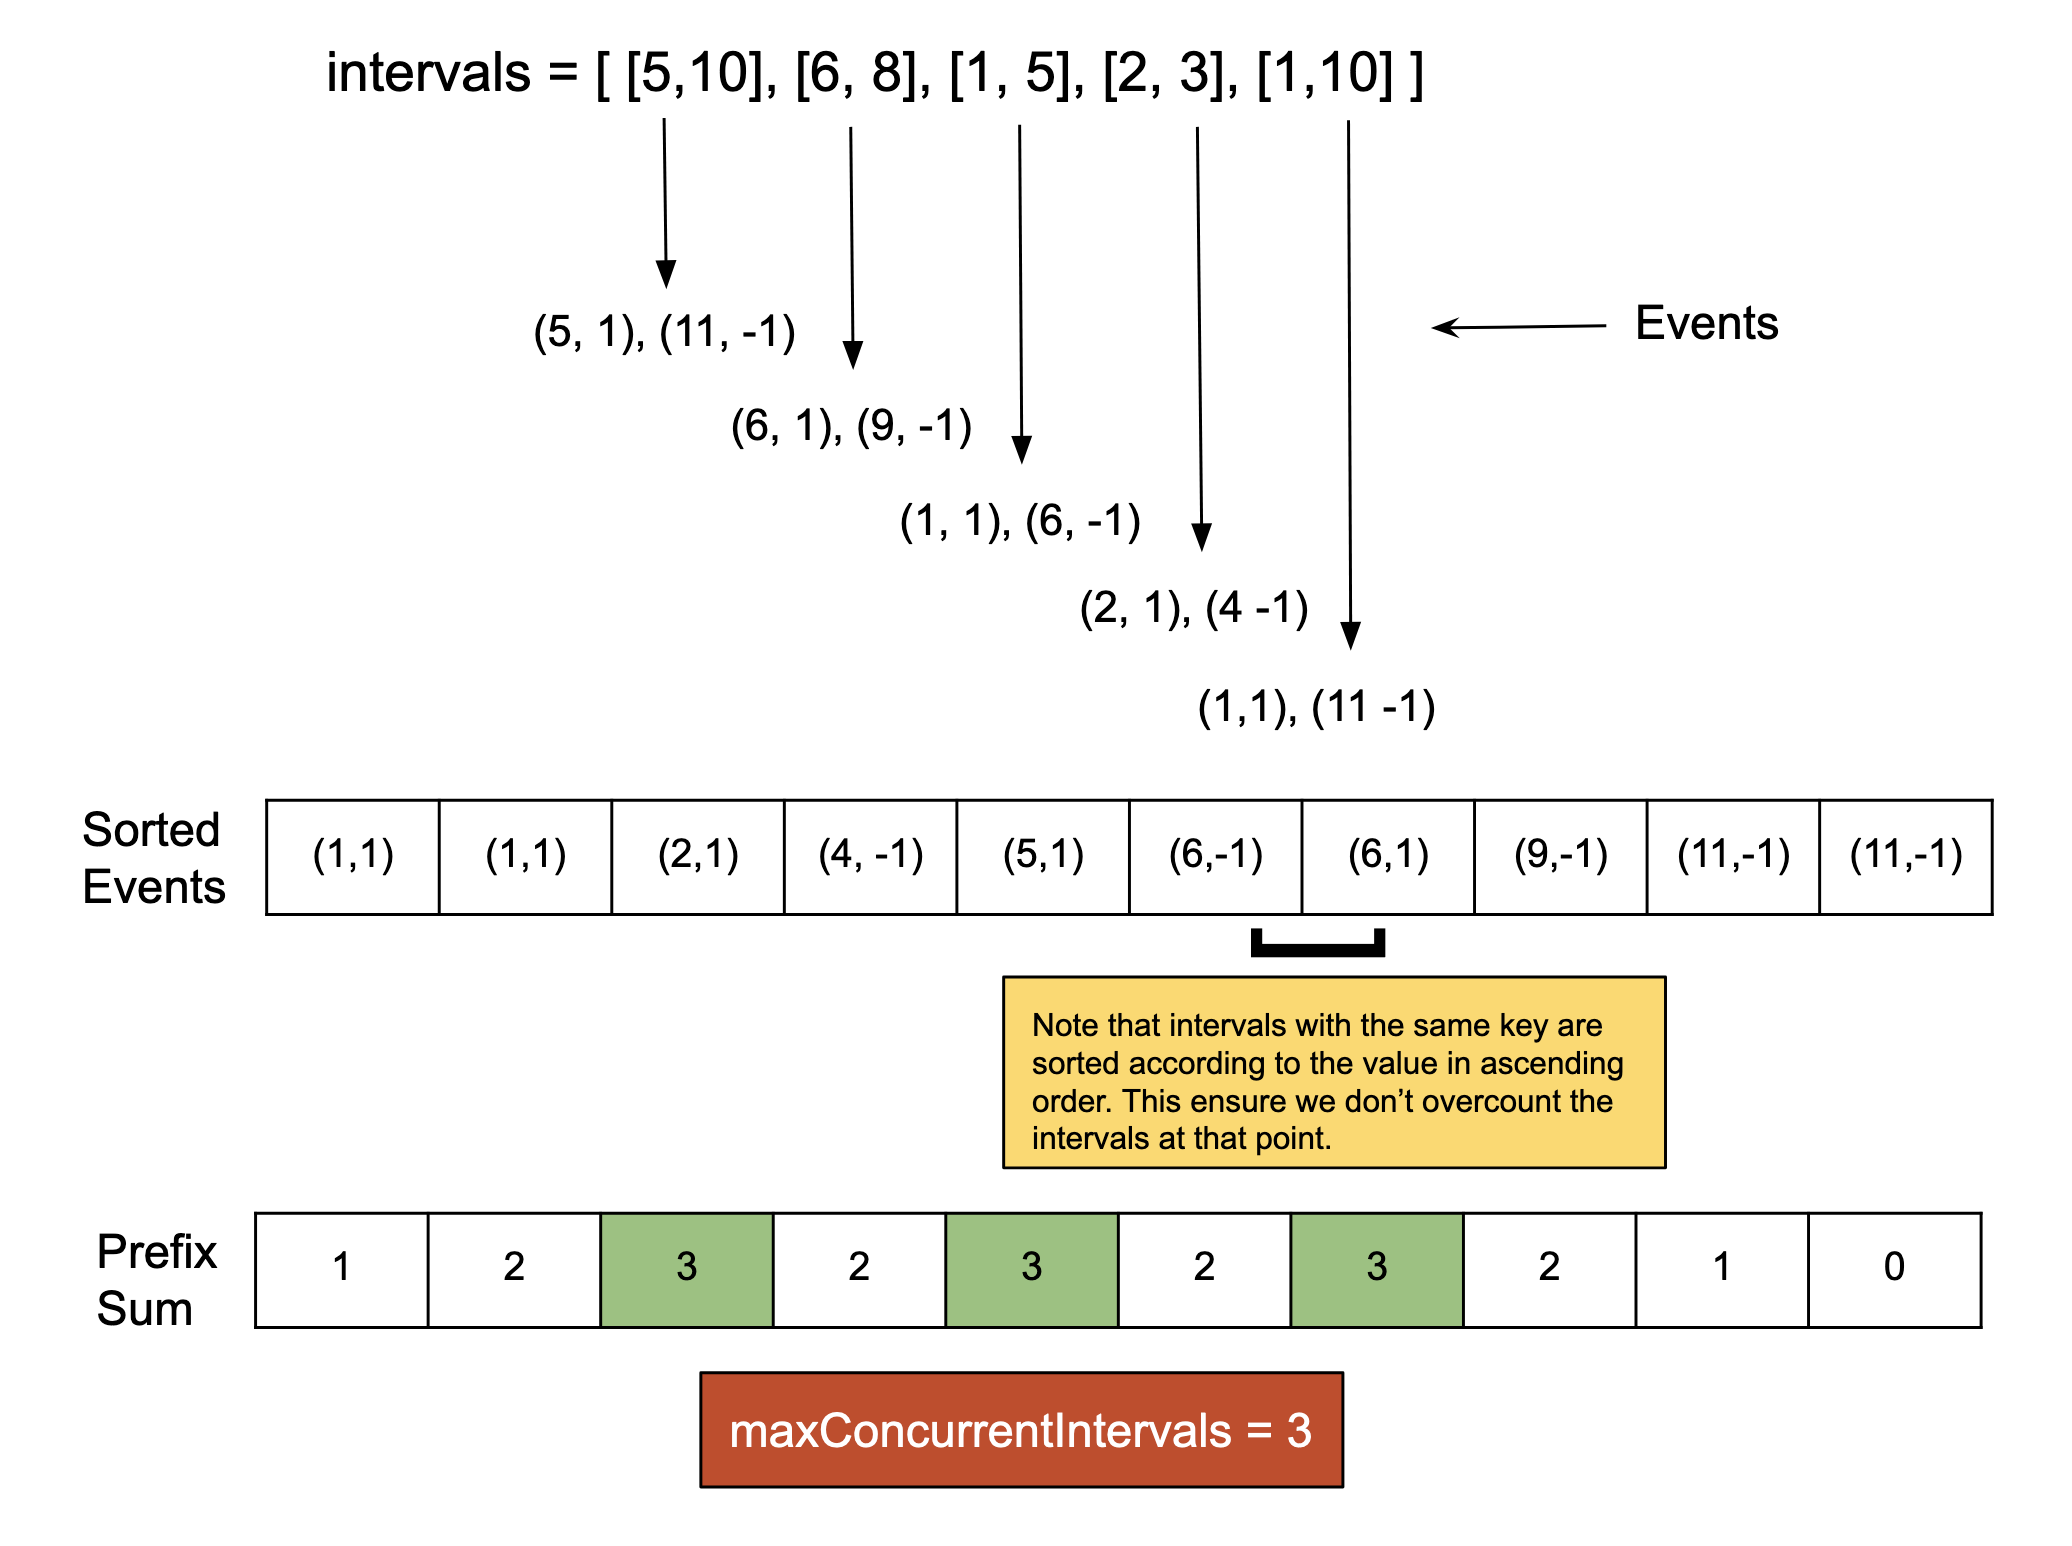

In [ ]:
class Solution:
    def minGroups(self, intervals: List[List[int]]) -> int:
        # Convert the intervals to two events
        # start as (start, 1) and end as (end + 1, -1)
        events = []

        for interval in intervals:
            events.append((interval[0], 1))  # Start event
            events.append((interval[1] + 1, -1))  # End event (interval[1] + 1)

        # Sort the events first by time, and then by type (1 for start, -1 for end).
        events.sort(key=lambda x: (x[0], x[1]))

        concurrent_intervals = 0
        max_concurrent_intervals = 0

        # Sweep through the events
        for event in events:
            concurrent_intervals += event[1]  # Track currently active intervals
            max_concurrent_intervals = max(
                max_concurrent_intervals, concurrent_intervals
            )  # Update max

        return max_concurrent_intervals

The **Line Sweep algorithm** tracks when intervals start and end. For each interval `(start, end)`, we mark the start by increasing the count at start by 1 (indicating a new interval starts), and we mark the point end + 1 by decreasing its count by 1 (indicating an interval ends). These changes are stored in a map, which keeps track of how many intervals start or end at each point.

After processing all the intervals, we calculate a running total `(prefix sum)` over the map. This running total shows how many intervals are active at any given point. The highest value of this total tells us the minimum number of groups needed to avoid overlap.

In [ ]:
class Solution:
    def minGroups(self, intervals: List[List[int]]) -> int:
        # Use a dictionary to store the points and their counts
        point_to_count = defaultdict(int)

        # Mark the starting and ending points in the dictionary
        for interval in intervals:
            point_to_count[interval[0]] += 1  # Start of an interval
            point_to_count[
                interval[1] + 1
            ] -= 1  # End of an interval (interval[1] + 1)

        concurrent_intervals = 0
        max_concurrent_intervals = 0

        # Iterate over the sorted keys of the dictionary
        for point in sorted(point_to_count.keys()):
            concurrent_intervals += point_to_count[
                point
            ]  # Update currently active intervals
            max_concurrent_intervals = max(
                max_concurrent_intervals, concurrent_intervals
            )  # Update max intervals

        return max_concurrent_intervals

In [ ]:
intervals = [[5,10],[6,8],[1,5],[2,3],[1,10]]
minGroups(intervals)

## Leetcode #2501:[Longest Square Streak in an Array](https://leetcode.com/problems/longest-square-streak-in-an-array/description/?envType=daily-question&envId=2024-10-28)

In [ ]:
import math
def longestSquareStreak(nums):
    map={}
    nums.sort()
    res=-1
    for num in nums:
        sqr=math.isqrt(num)
        if sqr**2== num and sqr in map:
           map[num]= map[sqr]+1
           res= max(map[num],res)
        else:
           map[num]=1
    return res

In [ ]:
class Solution:

    def longestSquareStreak(self, nums: List[int]) ->int:
        nums = sorted(set(nums))
        num_set = set(nums)
        max_length = 0
        for num in nums:
            length = 0
            current = num
            while current in num_set:
                length += 1
                current = current ** 2
            if length > 1:
                max_length = max(max_length, length)
        return max_length if max_length > 1 else -1

In [ ]:
nums = [4,3,6,16,8,2]
longestSquareStreak(nums)

## Leetcode #3011:[Find if Array Can Be Sorted](https://leetcode.com/problems/find-if-array-can-be-sorted/description/?envType=daily-question&envId=2024-11-06)

In [ ]:
#Two pass
def canSortArray(nums):
    n=len(nums)
    for i in range(n-1):
      if nums[i]<= nums[i+1]:
         continue
      else:
         if bin(nums[i]).count("1") == bin(nums[i + 1]).count("1"):
            temp = nums[i]
            nums[i] = nums[i + 1]
            nums[i + 1] = temp
         else:
            return False
    for i in range(n-1,0,-1):
        if nums[i]>= nums[i-1]:
           continue
        else:
          if bin(nums[i]).count("1") == bin(nums[i - 1]).count("1"):
              temp = nums[i]
              nums[i] = nums[i - 1]
              nums[i - 1] = temp
          else:
              return False
    return True

determine if an array can be sorted by grouping elements based on a certain property—in this case, the number of bits set to 1 in their binary representation (called "bit count")—and sorting each group individually.

In [ ]:
class Solution:
    def canSortArray(self, nums: List[int]) -> bool:
        groups = []
        curr = []
        currBits = None
        for num in nums:
            if not currBits:
                currBits = num.bit_count()
            if num.bit_count() == currBits:
                curr.append(num)
            else:
                currBits = num.bit_count()
                groups.append(curr)
                curr = [num]
        if curr:
            groups.append(curr)

        out = []
        for g in groups:
            out += sorted(g)
        return out == sorted(nums)

In [ ]:
class Solution:
    def canSortArray(self, nums):
        n = len(nums)

        # Avoid modifying the input directly
        # Create a copy of the input array
        values = nums.copy()

        for i in range(n):
            for j in range(n - i - 1):
                if values[j] <= values[j + 1]:
                    # No swap needed
                    continue
                else:
                    if bin(values[j]).count("1") == bin(values[j + 1]).count(
                        "1"
                    ):
                        # Swap the elements
                        values[j], values[j + 1] = values[j + 1], values[j]
                    else:
                        return False
        return True


In [ ]:
nums = [8,4,2,30,15]
canSortArray(nums)

## Leetcode #1975:[Maximum Matrix Sum](https://leetcode.com/problems/maximum-matrix-sum/description/?envType=daily-question&envId=2024-11-24)

if there’s an odd number of negative elements, it won’t be possible to make everything positive because one negative will always remain.  
--> rule:
* if there’s an even count of negative numbers, we can flip them all to positive values.
* if the count is odd, one number has to stay negative, which means the sum can’t be quite as high as in the ideal case.

To minimize the impact of this remaining negative, find the smallest number in the matrix:  
  * track the smallest absolute value, while calculating the absolute sum

End:    
* if we end up with an odd count of negatives, we can subtract twice this smallest value from the total.

In [ ]:
def maxMatrixSum(matrix):
    total=0
    min_v= float("inf")
    neg_c= 0
    for r in matrix:
       for val in r:
           total+= abs(val)
           if val<0:
              neg_c+=1
           min_v= min(min_v,abs(val))
    if neg_c %2!=0:
       total-= 2*min_v
    return total

In [ ]:
matrix = [[1,2,3],[-1,-2,-3],[1,2,3]]
maxMatrixSum(matrix)

## Leetcode #1267:[Count Servers that Communicate](https://leetcode.com/problems/count-servers-that-communicate/description/?envType=daily-question&envId=2025-01-23)

In [ ]:
def countServers(grid):
    m =len(grid)
    n= len(grid[0])
    row_count=[sum(grid[i]) for i in range(m)]
    col_count=[sum(grid[i][j] for i in range(m)) for j in range(n)]
    count=0
    for i in range(m):
       for j in range(n):
          if grid[i][j]==1 and (row_count[i]>1 or col_count[j]>1):
             count+=1
    return count

In [ ]:
def countServers(grid):
    count = 0
    for r in range(len(grid)):
        s = sum(grid[r])
        if s > 1:
           count += s
        elif s == 1:
             column = grid[r].index(1)
             if sum(grid[r][column] for r in range(len(grid))) > 1:
                count += 1
    return count

In [ ]:
grid = [[1,0],[1,1]]
countServers(grid)

## Leetcode #3151:[Special Array I](https://leetcode.com/problems/special-array-i/description/?envType=daily-question&envId=2025-02-01)

In [ ]:
def isArraySpecial(nums):
    for i in range(1,len(nums)):
       if nums[i] % 2 == nums[i-1] % 2:
          return False
    return True

In [ ]:
nums = [4,3,1,6]
isArraySpecial(nums)

## Leetcode #1752:[Check if Array Is Sorted and Rotated](https://leetcode.com/problems/check-if-array-is-sorted-and-rotated/description/?envType=daily-question&envId=2025-02-02)

In [ ]:
def check(nums):
    size = len(nums)

    # Create a sorted copy of the list
    sorted_nums = sorted(nums)

    # Compare the original list with the sorted list, considering all possible rotations
    for rotation_offset in range(size):
        is_match = True
        for index in range(size):
            if nums[(rotation_offset + index) % size] != sorted_nums[index]:
                is_match = False
                break
        if is_match:
            return True

    return False

In [ ]:
class Solution:
    def checkSorted(self, arr):
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                return False
        return True

    def check(self, nums: List[int]) -> bool:
        # Find the index where the rotation might have happened
        k = 0
        n = len(nums)
        for i in range(1, n):
            if nums[i - 1] > nums[i]:
                k = i
                break

        # Check if only one rotation point that splits into two sorted parts
        if k == 0:  # array is already sorted, not rotated
            return self.checkSorted(nums)

        # Check if both parts are sorted and confirm the overall order
        return self.checkSorted(nums[k:] + nums[:k])

In [ ]:
nums = [3,4,5,1,2]
check(nums)

## Leetcode #3105:[Longest Strictly Increasing or Strictly Decreasing Subarray](https://leetcode.com/problems/longest-strictly-increasing-or-strictly-decreasing-subarray/?envType=daily-question&envId=2025-02-03)

In [ ]:
def longestMonotonicSubarray(nums):
    m_inc=0
    m_dec=0
    inc=1
    dec=1
    for i in range(1,len(nums)):
       if nums[i-1]< nums[i]:
          inc+=1
          dec=1
       elif nums[i-1]> nums[i]:
          dec+=1
          inc=1
       else:
          inc=1
          dec=1
       m_inc= max(m_inc,inc)
       m_dec= max(m_dec,dec)
    return max(m_inc,m_dec)

In [ ]:
nums = [1,4,3,3,2]
longestMonotonicSubarray(nums)

## Leetcode #1800:[Maximum Ascending Subarray Sum](https://leetcode.com/problems/maximum-ascending-subarray-sum/description/?envType=daily-question&envId=2025-02-04)

In [ ]:
def maxAscendingSum(nums):
    max_sum=nums[0]
    curr_sum=nums[0]
    for i in range(1,len(nums)):
       if nums[i]> nums[i-1]:
          curr_sum+=nums[i]
       else:
          curr_sum=nums[i]
       max_sum= max(max_sum,curr_sum)
    return max_sum

In [ ]:
nums = [10,20,30,5,10,50]
maxAscendingSum(nums)

##Leetcode #2873:[Maximum Value of an Ordered Triplet I](https://leetcode.com/problems/maximum-value-of-an-ordered-triplet-i/description/?envType=daily-question&envId=2025-04-02)

In [ ]:
class Solution:
    def maximumTripletValue(self, nums: List[int]) -> int:
        n = len(nums)
        res, imax, dmax = 0, 0, 0
        for k in range(n):
            res = max(res, dmax * nums[k])
            dmax = max(dmax, imax - nums[k])
            imax = max(imax, nums[k])
        return res

## Leetcode # 2874:[Maximum Value of an Ordered Triplet II](https://leetcode.com/problems/maximum-value-of-an-ordered-triplet-ii/description/?envType=daily-question&envId=2025-04-03)

In [ ]:
def maximumTripletValue(self, nums: List[int]) -> int:
    n = len(nums)
    leftMax = [0] * n
    rightMax = [0] * n
    for i in range(1, n):
        leftMax[i] = max(leftMax[i - 1], nums[i - 1])
        rightMax[n - 1 - i] = max(rightMax[n - i], nums[n - i])
    res = 0
    for j in range(1, n - 1):
        res = max(res, (leftMax[j] - nums[j]) * rightMax[j])
    return res

## Leetcode #1534:[Count Good Triplets](https://leetcode.com/problems/count-good-triplets/description/?envType=daily-question&envId=2025-04-14)

In [ ]:
def countGoodTriplets(arr, a, b, c):
    ans = 0
    n = len(arr)
    total = [0] * 1001
    for j in range(n):
        for k in range(j + 1, n):
            if abs(arr[j] - arr[k]) <= b:
                lj, rj = arr[j] - a, arr[j] + a
                lk, rk = arr[k] - c, arr[k] + c
                l = max(0, lj, lk)
                r = min(1000, rj, rk)
                if l <= r:
                    ans += total[r] if l == 0 else total[r] - total[l - 1]
        for k in range(arr[j], 1001):
            total[k] += 1

    return ans

## Leetcode #3392:[Count Subarrays of Length Three With a Condition](https://leetcode.com/problems/count-subarrays-of-length-three-with-a-condition/description/?envType=daily-question&envId=2025-04-27)

In [ ]:
def countSubarrays(nums):
    n = len(nums)
    ans = 0
    for i in range(1, n - 1):
        if nums[i] == (nums[i - 1] + nums[i + 1]) * 2:
            ans += 1
    return ans

## Leetcode #1920:[Build Array from Permutation](https://leetcode.com/problems/build-array-from-permutation/description/?envType=daily-question&envId=2025-05-06)

In [ ]:
def buildArray(nums):
    return [nums[i] for i in nums]

## Leetcode #1550:[Three Consecutive Odds](https://leetcode.com/problems/three-consecutive-odds/description/?envType=daily-question&envId=2025-05-11)

In [ ]:
def threeConsecutiveOdds(self, arr: list[int]) -> bool:
        # Loop through the array up to the third-to-last element
        for i in range(len(arr) - 2):
            product = arr[i] * arr[i + 1] * arr[i + 2]
            # Check if the product is odd
            if product % 2 == 1:
                return True
        return False

## Leetcode #73:[Set Matrix Zeroes](https://leetcode.com/problems/set-matrix-zeroes/description/?envType=daily-question&envId=2025-05-21)

In [ ]:
def setZeroes(self, matrix: List[List[int]]) -> None:
    rows, cols = len(matrix), len(matrix[0])
    cells = set()
    for r in range(rows):
        for c in range(cols):
            if matrix[r][c] == 0:
                cells.add((r, c))

    for r, c in cells:
        matrix[r] = [0] * cols
        for row in matrix:
            row[c] = 0

## Leetcode #3423:[Maximum Difference Between Adjacent Elements in a Circular Array](https://leetcode.com/problems/maximum-difference-between-adjacent-elements-in-a-circular-array/description/?envType=daily-question&envId=2025-06-12)

In [ ]:
def maxAdjacentDistance(nums):
    nums.append(nums[0])
    res=0
    for i in range(1,len(nums)):
        res= max(res,abs(nums[i]-nums[i-1]))
    return res

## Leetcode #2016:[Maximum Difference Between Increasing Elements](https://leetcode.com/problems/maximum-difference-between-increasing-elements/description/?envType=daily-question&envId=2025-06-16)

In [ ]:
def maximumDifference(self, nums: List[int]) -> int:
    n = len(nums)
    ans, premin = -1, nums[0]

    for i in range(1, n):
        if nums[i] > premin:
            ans = max(ans, nums[i] - premin)
        else:
            premin = nums[i]

    return ans

## Leetcode #2210:[Count Hills and Valleys in an Array](https://leetcode.com/problems/count-hills-and-valleys-in-an-array/description/?envType=daily-question&envId=2025-07-27)

In [ ]:
def countHillValley(self, nums: List[int]) -> int:
    left = nums[0]
    count = 0
    for i in range(1, len(nums) - 1):
        if nums[i] != nums[i + 1]:
            if left < nums[i] > nums[i + 1] or left > nums[i] < nums[i + 1]:
                count += 1
            left = nums[i]
    return count

## Leetcode #3477:[Fruits Into Baskets II](https://leetcode.com/problems/fruits-into-baskets-ii/description/?envType=daily-question&envId=2025-08-05)

In [ ]:
class Solution:
    def numOfUnplacedFruits(self, fruits: List[int], baskets: List[int]) -> int:
        count = 0
        n = len(baskets)
        for fruit in fruits:
            unset = 1
            for i in range(n):
                if fruit <= baskets[i]:
                    baskets[i] = 0
                    unset = 0
                    break
            count += unset
        return count

## Leetcode #3000:[Maximum Area of Longest Diagonal Rectangle](https://leetcode.com/problems/maximum-area-of-longest-diagonal-rectangle/description/?envType=daily-question&envId=2025-08-26)

In [ ]:
class Solution:
    def areaOfMaxDiagonal(self, dimensions: List[List[int]]) -> int:
        max_dia_sq = 0
        max_area = 0
        for l, w in dimensions:
            dia_sq = l * l + w * w
            area = l * w
            if dia_sq > max_dia_sq:
                max_dia_sq = dia_sq
                max_area = area
            elif dia_sq == max_dia_sq:
                max_area = max(max_area, area)
        return max_area

## Leetcode #3349:[Adjacent Increasing Subarrays Detection I](https://leetcode.com/problems/adjacent-increasing-subarrays-detection-i/description/?envType=daily-question&envId=2025-10-14)

In [ ]:
class Solution:
	def hasIncreasingSubarrays(self, nums: list[int], k: int) -> bool:
		increasing, idx, nums_len = [], 0, len(nums)
		for i, (num1, num2) in enumerate(pairwise(nums)):
			if num1 >= num2:
				if i - idx >= k - 1:
					increasing.append((idx, i))
				idx = i + 1
		if nums_len - 1 - idx >= k - 1:
			increasing.append((idx, nums_len - 1))

		for a, b in increasing:
			if b - a + 1 >= 2*k:
				return True

		for (_, b1), (a2, _) in pairwise(increasing):
			if a2 == b1 + 1:
				return True
		else:
			return False

## Leetcode #3350:[Adjacent Increasing Subarrays Detection II](https://leetcode.com/problems/adjacent-increasing-subarrays-detection-ii/description/?envType=daily-question&envId=2025-10-15)

In [ ]:
class Solution:
    def maxIncreasingSubarrays(self, nums: List[int]) -> int:
        n = len(nums)
        cnt, precnt, ans = 1, 0, 0
        for i in range(1, n):
            if nums[i] > nums[i - 1]:
                cnt += 1
            else:
                precnt, cnt = cnt, 1
            ans = max(ans, min(precnt, cnt))
            ans = max(ans, cnt // 2)
        return ans

## Leetcode #1437:[Check If All 1's Are at Least Length K Places Away](https://leetcode.com/problems/check-if-all-1s-are-at-least-length-k-places-away/description/?envType=daily-question&envId=2025-11-17)

In [ ]:
class Solution:
    def kLengthApart(self, nums: List[int], k: int) -> bool:
        if k == 0:
            return True
        prev = None
        for i, num in enumerate(nums):
            if num == 1:
                if prev is not None and i - prev <= k:
                    return False
                prev = i
        return True

## Leetcode #717:[1-bit and 2-bit Characters](https://leetcode.com/problems/1-bit-and-2-bit-characters/description/?envType=daily-question&envId=2025-11-18)

In [ ]:
class Solution(object):
    def isOneBitCharacter(self, bits):
        i = 0
        while i < len(bits) - 1:
            i += bits[i] + 1
        return i == len(bits) - 1

##  Leetcode #3531:[Count Covered Buildings]()

In [ ]:
def countCoveredBuildings(self, n: int, buildings: List[List[int]]) -> int:
        max_row = [0] * (n + 1)
        min_row = [n + 1] * (n + 1)
        max_col = [0] * (n + 1)
        min_col = [n + 1] * (n + 1)

        for p in buildings:
            x, y = p[0], p[1]
            max_row[y] = max(max_row[y], x)
            min_row[y] = min(min_row[y], x)
            max_col[x] = max(max_col[x], y)
            min_col[x] = min(min_col[x], y)

        res = 0
        for p in buildings:
            x, y = p[0], p[1]
            if (
                x > min_row[y]
                and x < max_row[y]
                and y > min_col[x]
                and y < max_col[x]
            ):
                res += 1

        return res

# Matrix

##Leetcode #3195:[Find the Minimum Area to Cover All Ones I](https://leetcode.com/problems/find-the-minimum-area-to-cover-all-ones-i/description/?envType=daily-question&envId=2025-08-22)

In [ ]:
class Solution:
    def minimumArea(self, grid: List[List[int]]) -> int:
        n, m = len(grid), len(grid[0])
        min_i, max_i = n, 0
        min_j, max_j = m, 0

        for i in range(n):
            for j in range(m):
                if grid[i][j] == 1:
                    min_i = min(min_i, i)
                    max_i = max(max_i, i)
                    min_j = min(min_j, j)
                    max_j = max(max_j, j)

        return (max_i - min_i + 1) * (max_j - min_j + 1)

## Leetcode #3197:[Find the Minimum Area to Cover All Ones II](https://leetcode.com/problems/find-the-minimum-area-to-cover-all-ones-ii/description/?envType=daily-question&envId=2025-08-23)

In [ ]:
class Solution:
    def minimumSum2(
        self, grid: List[List[int]], u: int, d: int, l: int, r: int
    ) -> int:
        min_i = len(grid)
        max_i = 0
        min_j = len(grid[0])
        max_j = 0

        for i in range(u, d + 1):
            for j in range(l, r + 1):
                if grid[i][j] == 1:
                    min_i = min(min_i, i)
                    min_j = min(min_j, j)
                    max_i = max(max_i, i)
                    max_j = max(max_j, j)

        return (
            (max_i - min_i + 1) * (max_j - min_j + 1)
            if min_i <= max_i
            else sys.maxsize // 3
        )

    def rotate(self, vec: List[List[int]]) -> List[List[int]]:
        n = len(vec)
        m = len(vec[0]) if n > 0 else 0
        ret = [[0] * n for _ in range(m)]

        for i in range(n):
            for j in range(m):
                ret[m - j - 1][i] = vec[i][j]

        return ret

    def solve(self, grid: List[List[int]]) -> int:
        n = len(grid)
        m = len(grid[0]) if n > 0 else 0
        res = n * m

        for i in range(n - 1):
            for j in range(m - 1):
                res = min(
                    res,
                    self.minimumSum2(grid, 0, i, 0, m - 1)
                    + self.minimumSum2(grid, i + 1, n - 1, 0, j)
                    + self.minimumSum2(grid, i + 1, n - 1, j + 1, m - 1),
                )

                res = min(
                    res,
                    self.minimumSum2(grid, 0, i, 0, j)
                    + self.minimumSum2(grid, 0, i, j + 1, m - 1)
                    + self.minimumSum2(grid, i + 1, n - 1, 0, m - 1),
                )

        for i in range(n - 2):
            for j in range(i + 1, n - 1):
                res = min(
                    res,
                    self.minimumSum2(grid, 0, i, 0, m - 1)
                    + self.minimumSum2(grid, i + 1, j, 0, m - 1)
                    + self.minimumSum2(grid, j + 1, n - 1, 0, m - 1),
                )

        return res

    def minimumSum(self, grid: List[List[int]]) -> int:
        rgrid = self.rotate(grid)
        return min(self.solve(grid), self.solve(rgrid))

## Leetcode #498:[Diagonal Traverse](https://leetcode.com/problems/diagonal-traverse/description/?envType=daily-question&envId=2025-08-25)

In [ ]:
class Solution:

    def findDiagonalOrder(self, matrix: List[List[int]]) -> List[int]:

        # Check for an empty matrix
        if not matrix or not matrix[0]:
            return []

        # The dimensions of the matrix
        N, M = len(matrix), len(matrix[0])

        # Incides that will help us progress through
        # the matrix, one element at a time.
        row, column = 0, 0

        # As explained in the article, this is the variable
        # that helps us keep track of what direction we are
        # processing the current diaonal
        direction = 1

        # Final result array that will contain all the elements
        # of the matrix
        result = []

        # The uber while loop which will help us iterate over all
        # the elements in the array.
        while row < N and column < M:

            # First and foremost, add the current element to
            # the result matrix.
            result.append(matrix[row][column])

            # Move along in the current diagonal depending upon
            # the current direction.[i, j] -> [i - 1, j + 1] if
            # going up and [i, j] -> [i + 1][j - 1] if going down.
            new_row = row + (-1 if direction == 1 else 1)
            new_column = column + (1 if direction == 1 else -1)

            # Checking if the next element in the diagonal is within the
            # bounds of the matrix or not. If it's not within the bounds,
            # we have to find the next head.
            if new_row < 0 or new_row == N or new_column < 0 or new_column == M:

                # If the current diagonal was going in the upwards
                # direction.
                if direction:

                    # For an upwards going diagonal having [i, j] as its tail
                    # If [i, j + 1] is within bounds, then it becomes
                    # the next head. Otherwise, the element directly below
                    # i.e. the element [i + 1, j] becomes the next head
                    row += (column == M - 1)
                    column += (column < M - 1)
                else:

                    # For a downwards going diagonal having [i, j] as its tail
                    # if [i + 1, j] is within bounds, then it becomes
                    # the next head. Otherwise, the element directly below
                    # i.e. the element [i, j + 1] becomes the next head
                    column += (row == N - 1)
                    row += (row < N - 1)

                # Flip the direction
                direction = 1 - direction
            else:
                row = new_row
                column = new_column

        return result

## Leetcode #3446:[Sort Matrix by Diagonals](https://leetcode.com/problems/sort-matrix-by-diagonals/description/?envType=daily-question&envId=2025-08-28)

In [ ]:
def sortMatrix(self, grid: List[List[int]]) -> List[List[int]]:
    n = len(grid)

    for i in range(n):
        tmp = [grid[i + j][j] for j in range(n - i)]
        tmp.sort(reverse=True)
        for j in range(n - i):
            grid[i + j][j] = tmp[j]

    for j in range(1, n):
        tmp = [grid[i][j + i] for i in range(n - j)]
        tmp.sort()
        for i in range(n - j):
            grid[i][j + i] = tmp[i]

    return grid

## Leetcode #36:[Valid Sudoku](https://leetcode.com/problems/valid-sudoku/description/?envType=daily-question&envId=2025-08-30)

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        rows = [[False] * 9 for _ in range(9)]
        cols = [[False] * 9 for _ in range(9)]
        boxes = [[False] * 9 for _ in range(9)]

        for i in range(9):
            for j in range(9):
                if board[i][j] != '.':
                    num = ord(board[i][j]) - ord('1')
                    boxIndex = (i // 3) * 3 + (j // 3)
                    if rows[i][num] or cols[j][num] or boxes[boxIndex][num]:
                        return False
                    rows[i][num] = cols[j][num] = boxes[boxIndex][num] = True
        return True

## Leetcode #944. [Delete Columns to Make Sorted]()

In [ ]:
class Solution:
    def minDeletionSize(self, strs: List[str]) -> int:
        res = 0

        for col in range(len(strs[0])):
            for row in range(1, len(strs)):
                if strs[row][col] < strs[row - 1][col]:
                    res += 1
                    break

        return res

## Leetcode #1351:[Count Negative Numbers in a Sorted Matrix](https://leetcode.com/problems/count-negative-numbers-in-a-sorted-matrix/description/?envType=daily-question&envId=2025-12-28)

In [ ]:
# O(n+m)
class Solution:
    def countNegatives(self, grid: List[List[int]]) -> int:
        m = len(grid)
        n = len(grid[0])

        i = m - 1
        j = 0
        res = 0

        while i >= 0 and j < n:
            if grid[i][j] < 0:
                res += n - j
                i -= 1
            else:
                j += 1
        return res


# Greedy

## Leetcode #1007:[Minimum Domino Rotations For Equal Row](https://leetcode.com/problems/minimum-domino-rotations-for-equal-row/description/?envType=daily-question&envId=2025-05-03)

In [ ]:
def minDominoRotations(self, tops, bottoms):
        res = self.getRotation(tops, bottoms, tops[0])
        if bottoms[0] != tops[0]:
            res = min(res, self.getRotation(tops, bottoms, bottoms[0]))
        return -1 if res == float('inf') else res

def getRotation(self, tops, bottoms, target):
    rotateTop = rotateBottom = 0
    for i in range(len(tops)):
        if tops[i] != target and bottoms[i] != target:
            return float('inf')
        if tops[i] != target:
            rotateTop += 1
        if bottoms[i] != target:
            rotateBottom += 1
    return min(rotateTop, rotateBottom)

In [ ]:
class Solution:
    def minDominoRotations(self, tops, bottoms):
        res = float('inf')
        for val in range(1, 7):
            top_swaps = bottom_swaps = 0
            valid = True
            for t, b in zip(tops, bottoms):
                if t != val and b != val:
                    valid = False
                    break
                if t != val:
                    top_swaps += 1
                if b != val:
                    bottom_swaps += 1
            if valid:
                res = min(res, top_swaps, bottom_swaps)
        return -1 if res == float('inf') else res

## Leetcode #2918:[Minimum Equal Sum of Two Arrays After Replacing Zeros](https://leetcode.com/problems/minimum-equal-sum-of-two-arrays-after-replacing-zeros/description/?envType=daily-question&envId=2025-05-10)

In [ ]:
def minSum(self, nums1: List[int], nums2: List[int]) -> int:
    sum1 = sum2 = 0
    zero1 = zero2 = 0

    for i in nums1:
        sum1 += i
        if i == 0:
            sum1 += 1
            zero1 += 1

    for i in nums2:
        sum2 += i
        if i == 0:
            sum2 += 1
            zero2 += 1

    if (zero1 == 0 and sum2 > sum1) or (zero2 == 0 and sum1 > sum2):
        return -1

    return max(sum1, sum2)

## Leetcode #135:[Candy](https://leetcode.com/problems/candy/description/?envType=daily-question&envId=2025-06-02)

In [ ]:
def candy(ratings):
    n = len(ratings)
    cnt = 0
    candies = [1] * n
    for i in range(1, n):
        if ratings[i] > ratings[i - 1]:
            candies[i] = candies[i - 1] + 1
    for i in range(n - 1, 0, -1):
        if ratings[i - 1] > ratings[i]:
            candies[i - 1] = max(candies[i] + 1, candies[i - 1])
        cnt += candies[i - 1]
    return cnt + candies[n - 1]

## Leetcode #2434:[Using a Robot to Print the Lexicographically Smallest String](https://leetcode.com/problems/using-a-robot-to-print-the-lexicographically-smallest-string/description/?envType=daily-question&envId=2025-06-06)

In [ ]:
def robotWithString(s):
    cnt = Counter(s)
    stack = []
    res = []
    minCharacter = "a"
    for c in s:
        stack.append(c)
        cnt[c] -= 1
        while minCharacter != "z" and cnt[minCharacter] == 0:
            minCharacter = chr(ord(minCharacter) + 1)
        while stack and stack[-1] <= minCharacter:
            res.append(stack.pop())
    return "".join(res)

## Leetcode #3170:[Lexicographically Minimum String After Removing Stars](https://leetcode.com/problems/lexicographically-minimum-string-after-removing-stars/description/?envType=daily-question&envId=2025-06-07)

In [ ]:
class Solution:
    def clearStars(self, s: str) -> str:
        cnt = [[] for _ in range(26)]
        arr = list(s)
        for i, c in enumerate(arr):
            if c != "*":
                cnt[ord(c) - ord("a")].append(i)
            else:
                for j in range(26):
                    if cnt[j]:
                        arr[cnt[j].pop()] = "*"
                        break
        return "".join(c for c in arr if c != "*")

## Leetcode #2616:[Minimize the Maximum Difference of Pairs](https://leetcode.com/problems/minimize-the-maximum-difference-of-pairs/description/?envType=daily-question&envId=2025-06-13)

In [ ]:
class Solution:
    def minimizeMax(self, nums: List[int], p: int) -> int:
        nums.sort()
        n = len(nums)

        # Find the number of valid pairs by greedy approach
        def countValidPairs(threshold):
            index, count = 0, 0
            while index < n - 1:
                # If a valid pair is found, skip both numbers.
                if nums[index + 1] - nums[index] <= threshold:
                    count += 1
                    index += 1
                index += 1
            return count

        left, right = 0, nums[-1] - nums[0]
        while left < right:
            mid = left + (right - left) // 2

            # If there are enough pairs, look for a smaller threshold.
            # Otherwise, look for a larger threshold.
            if countValidPairs(mid) >= p:
                right = mid
            else:
                left = mid + 1
        return left

## Leetcode #2566:[Maximum Difference by Remapping a Digit](https://leetcode.com/problems/maximum-difference-by-remapping-a-digit/description/?envType=daily-question&envId=2025-06-14)

In [ ]:
class Solution:
    def minMaxDifference(self, num: int) -> int:
        max_num_str = list(str(num))

        for c in max_num_str:
            if c != '9':
                for i in range(len(max_num_str)):
                    if max_num_str[i] == c:
                        max_num_str[i] = '9'

                break

        min_num_str = list(str(num))

        first_char = min_num_str[0]

        for i in range(len(min_num_str)):
            if min_num_str[i] == first_char:
                min_num_str[i] = '0'

        return int("".join(max_num_str)) - int("".join(min_num_str))

## Leetcode #1432:[Max Difference You Can Get From Changing an Integer](https://leetcode.com/problems/max-difference-you-can-get-from-changing-an-integer/description/?envType=daily-question&envId=2025-06-15)

In [ ]:
class Solution:
    def maxDiff(self, num: int) -> int:
        min_num, max_num = str(num), str(num)

        # Find a high position and replace it with 9.
        for digit in max_num:
            if digit != "9":
                max_num = max_num.replace(digit, "9")
                break

        # Replace the most significant bit with 1
        # Or find a high-order digit that is not equal to the highest digit and replace it with 0.
        for i, digit in enumerate(min_num):
            if i == 0:
                if digit != "1":
                    min_num = min_num.replace(digit, "1")
                    break
            else:
                if digit != "0" and digit != min_num[0]:
                    min_num = min_num.replace(digit, "0")
                    break

        return int(max_num) - int(min_num)

## Leetcode #2966:[Divide Array Into Arrays With Max Difference](https://leetcode.com/problems/divide-array-into-arrays-with-max-difference/description/?envType=daily-question&envId=2025-06-18)

In [ ]:
def divideArray(self, nums: List[int], k: int) -> List[List[int]]:
        nums.sort()
        ans = []
        for i in range(0, len(nums), 3):
            if nums[i + 2] - nums[i] > k:
                return []
            ans.append([nums[i], nums[i + 1], nums[i + 2]])
        return ans

## Leetcode #2294:[Partition Array Such That Maximum Difference Is K](https://leetcode.com/problems/partition-array-such-that-maximum-difference-is-k/description/?envType=daily-question&envId=2025-06-19)

In [ ]:
def partitionArray(self, nums: list[int], k: int) -> int:
    nums.sort()
    ans = 1
    rec = nums[0]
    for num in nums:
        if num - rec > k:
            ans += 1
            rec = num
    return ans

##Leetcode #1353:[Maximum Number of Events That Can Be Attended](https://leetcode.com/problems/maximum-number-of-events-that-can-be-attended/description/?envType=daily-question&envId=2025-07-07)

In [ ]:
def maxEvents(self, events: List[List[int]]) -> int:
    n = len(events)
    max_day = max(event[1] for event in events)
    events.sort()
    pq = []
    ans, j = 0, 0
    for i in range(1, max_day + 1):
        while j < n and events[j][0] <= i:
            heapq.heappush(pq, events[j][1])
            j += 1
        while pq and pq[0] < i:
            heapq.heappop(pq)
        if pq:
            heapq.heappop(pq)
            ans += 1

    return ans

## Leetcode #3439:[Reschedule Meetings for Maximum Free Time I](https://leetcode.com/problems/reschedule-meetings-for-maximum-free-time-i/description/?envType=daily-question&envId=2025-07-09)

In [ ]:
def maxFreeTime(
        self, eventTime: int, k: int, startTime: List[int], endTime: List[int]
    ) -> int:
        n = len(startTime)
        res = 0
        t = 0
        for i in range(n):
            t += endTime[i] - startTime[i]
            left = 0 if i <= k - 1 else endTime[i - k]
            right = eventTime if i == n - 1 else startTime[i + 1]
            res = max(res, right - left - t)
            if i >= k - 1:
                t -= endTime[i - k + 1] - startTime[i - k + 1]
        return res

## Leetcode #3440:[Reschedule Meetings for Maximum Free Time II](https://leetcode.com/problems/reschedule-meetings-for-maximum-free-time-ii/description/?envType=daily-question&envId=2025-07-10)

In [ ]:
class Solution:
    def maxFreeTime(
        self, eventTime: int, startTime: list[int], endTime: list[int]
    ) -> int:
        n = len(startTime)
        q = [False] * n
        t1 = 0
        t2 = 0
        for i in range(n):
            if endTime[i] - startTime[i] <= t1:
                q[i] = True
            t1 = max(t1, startTime[i] - (0 if i == 0 else endTime[i - 1]))

            if endTime[n - i - 1] - startTime[n - i - 1] <= t2:
                q[n - i - 1] = True
            t2 = max(
                t2,
                (eventTime if i == 0 else startTime[n - i])
                - endTime[n - i - 1],
            )

        res = 0
        for i in range(n):
            left = 0 if i == 0 else endTime[i - 1]
            right = eventTime if i == n - 1 else startTime[i + 1]
            if q[i]:
                res = max(res, right - left)
            else:
                res = max(res, right - left - (endTime[i] - startTime[i]))
        return res

## Leetcode #3487:[Maximum Unique Subarray Sum After Deletion](https://leetcode.com/problems/maximum-unique-subarray-sum-after-deletion/description/?envType=daily-question&envId=2025-07-25)

In [ ]:
def maxSum(self, nums: List[int]) -> int:
    positiveNumsSet = set([num for num in nums if num > 0])
    return max(nums) if len(positiveNumsSet) == 0 else sum(positiveNumsSet)

## Leetcode #2561:[Rearranging Fruits](https://leetcode.com/problems/rearranging-fruits/description/?envType=daily-question&envId=2025-08-02)

In [ ]:
class Solution:
    def minCost(self, basket1: List[int], basket2: List[int]) -> int:
        freq = Counter()
        m = float("inf")
        for b1 in basket1:
            freq[b1] += 1
            m = min(m, b1)
        for b2 in basket2:
            freq[b2] -= 1
            m = min(m, b2)

        merge = []
        for k, c in freq.items():
            if c % 2 != 0:
                return -1
            merge.extend([k] * (abs(c) // 2))#2561:Rearranging Fruits

        if not merge:
            return 0
        merge.sort()
        return sum(min(2 * m, x) for x in merge[: len(merge) // 2])

## Leetcode #1323:[Maximum 69 Number](https://leetcode.com/problems/maximum-69-number/description/?envType=daily-question&envId=2025-08-16)

In [ ]:
class Solution:
    def maximum69Number (self, num: int) -> int:
        n=num
        i=1
        sum=0
        while(n>0):
            rem=n%10
            n=n//10
            sum=sum*10+rem
            i=i*10

        print(sum)
        print(i)

        rem=sum%10
        while(rem==9):
            sum=sum//10
            rem=sum%10
            i=i//10

        num=num+3*i//10
        return num




## Leetcode #1792:[Maximum Average Pass Ratio](https://leetcode.com/problems/maximum-average-pass-ratio/description/?envType=daily-question&envId=2025-09-01)

In [ ]:
class Solution:
    def maxAverageRatio(
        self, classes: List[List[int]], extraStudents: int
    ) -> float:
        # Lambda to calculate the gain of adding an extra student
        def _calculate_gain(passes, total_students):
            return (passes + 1) / (total_students + 1) - passes / total_students

        # Max heap to store (-gain, passes, total_students)
        max_heap = []
        for passes, total_students in classes:
            gain = _calculate_gain(passes, total_students)
            max_heap.append((-gain, passes, total_students))

        # Use heapify to transform the list into a valid heap in O(n)
        heapq.heapify(max_heap)

        # Distribute extra students
        for _ in range(extraStudents):
            current_gain, passes, total_students = heapq.heappop(max_heap)
            heapq.heappush(
                max_heap,
                (
                    -_calculate_gain(passes + 1, total_students + 1),
                    passes + 1,
                    total_students + 1,
                ),
            )

        # Calculate the final average pass ratio
        total_pass_ratio = sum(
            passes / total_students for _, passes, total_students in max_heap
        )
        return total_pass_ratio / len(classes)

## Leetcode #1733:[Minimum Number of People to Teach](https://leetcode.com/problems/minimum-number-of-people-to-teach/description/?envType=daily-question&envId=2025-09-10)

In [ ]:
class Solution:
    def minimumTeachings(
        self, n: int, languages: List[List[int]], friendships: List[List[int]]
    ) -> int:
        cncon = set()
        for friendship in friendships:
            mp = {}
            conm = False
            for lan in languages[friendship[0] - 1]:
                mp[lan] = 1
            for lan in languages[friendship[1] - 1]:
                if lan in mp:
                    conm = True
                    break
            if not conm:
                cncon.add(friendship[0] - 1)
                cncon.add(friendship[1] - 1)

        max_cnt = 0
        cnt = [0] * (n + 1)
        for friendship in cncon:
            for lan in languages[friendship]:
                cnt[lan] += 1
                max_cnt = max(max_cnt, cnt[lan])

        return len(cncon) - max_cnt

## Leetcode #3227:[Vowels Game in a String](https://leetcode.com/problems/vowels-game-in-a-string/description/?envType=daily-question&envId=2025-09-12)

In [ ]:
class Solution:
    def doesAliceWin(self, s: str) -> bool:
        return any(c in "aeiou" for c in s)

## Leetcode #2598:[Smallest Missing Non-negative Integer After Operations](https://leetcode.com/problems/smallest-missing-non-negative-integer-after-operations/description/?envType=daily-question&envId=2025-10-16)

In [ ]:
class Solution:
    def findSmallestInteger(self, nums: List[int], value: int) -> int:
        mp = Counter(x % value for x in nums)
        mex = 0
        while mp[mex % value] > 0:
            mp[mex % value] -= 1
            mex += 1
        return mex

## Leetcode #3397:[Maximum Number of Distinct Elements After Operations](https://leetcode.com/problems/maximum-number-of-distinct-elements-after-operations/description/?envType=daily-question&envId=2025-10-18)

In [ ]:
class Solution:
    def maxDistinctElements(self, nums: List[int], k: int) -> int:
        nums.sort()

        cnt = 0
        prev = -math.inf

        for num in nums:
            curr = min(max(num - k, prev + 1), num + k)
            if curr > prev:
                cnt += 1
                prev = curr

        return cnt

## Leetcode #1578:[Minimum Time to Make Rope Colorful](https://leetcode.com/problems/minimum-time-to-make-rope-colorful/description/?envType=daily-question&envId=2025-11-03)

In [ ]:
class Solution(object):
    def minCost(self, colors, neededTime):
        n, sum_ = len(colors), 0
        i = 1
        while i < n:
            maxi = 0
            while i < n and colors[i] == colors[i - 1]:
                sum_ += neededTime[i - 1]
                maxi = max(maxi, neededTime[i - 1])
                i += 1
            sum_ += neededTime[i - 1]
            maxi = max(maxi, neededTime[i - 1])
            if maxi != 0:
                sum_ -= maxi
            i += 1
        return sum_

## Leetcode #3228:[Maximum Number of Operations to Move Ones to the End](https://leetcode.com/problems/maximum-number-of-operations-to-move-ones-to-the-end/description/?envType=daily-question&envId=2025-11-13)

In [ ]:
class Solution:
    def maxOperations(self, s: str) -> int:
        count_one = 0
        ans = 0
        i = 0
        while i < len(s):
            if s[i] == "0":
                while i + 1 < len(s) and s[i + 1] == "0":
                    i += 1
                ans += count_one
            else:
                count_one += 1
            i += 1
        return ans

## Leetcode #757:[Set Intersection Size At Least Two](https://leetcode.com/problems/set-intersection-size-at-least-two/description/?envType=daily-question&envId=2025-11-20)

In [ ]:
class Solution:
    def intersectionSizeTwo(self, intervals: List[List[int]]) -> int:
        intervals.sort(key=lambda x: (x[1], -x[0]))

        ans = 0
        a, b = -1, -1

        for l, r in intervals:
            if l > b:
                a = r - 1
                b = r
                ans += 2
            elif l > a:
                a = b
                b = r
                ans += 1

        return ans

## Leetcode #955:[Delete Columns to Make Sorted II](https://leetcode.com/problems/delete-columns-to-make-sorted-ii/description/?envType=daily-question&envId=2025-12-21)

In [ ]:
class Solution:
    def minDeletionSize(self, strs: List[str]) -> int:
        n,m = len(strs[0]),len(strs)
        is_correct = [False] * (m-1)
        res = 0
        for j in range(n):
            correct = True
            for i in range(m-1):
                if is_correct[i]:
                    continue
                elif strs[i][j] > strs[i+1][j]:
                    correct = False
                    break
            if not correct:
                res += 1
                continue
            for i in range(m-1):
                if not is_correct[i] and strs[i][j] < strs[i+1][j]:
                    is_correct[i] = True
        return res


## Leetcode #3074:[Apple Redistribution into Boxes](https://leetcode.com/problems/apple-redistribution-into-boxes/description/?envType=daily-question&envId=2025-12-24)

In [ ]:
class Solution:
    def minimumBoxes(self, apple: List[int], capacity: List[int]) -> int:
        all_apples = sum(apple)
        capacity.sort()
        boxes = 0

        for c in capacity[::-1]:
            if all_apples > 0:
                all_apples -= c
                boxes += 1
            else:
                break
        return boxes
        

## Leetcode #3075:[Maximize Happiness of Selected Children](https://leetcode.com/problems/maximize-happiness-of-selected-children/submissions/1865041502/?envType=daily-question&envId=2025-12-25)

In [ ]:
class Solution:
    def maximumHappinessSum(self, happiness: List[int], k: int) -> int:
        # Sort in descending order
        happiness.sort(reverse=True)

        total_happiness_sum = 0
        turns = 0

        # Calculate the maximum happiness sum
        for i in range(k):
            # Adjust happiness and ensure it's not negative
            total_happiness_sum += max(happiness[i] - turns, 0)
            # Increment turns for the next iteration
            turns += 1
        return total_happiness_sum

## Leetcode #961:[N-Repeated Element in Size 2N Array](https://leetcode.com/problems/n-repeated-element-in-size-2n-array/description/?envType=daily-question&envId=2026-01-02)

In [ ]:
class Solution:
    def repeatedNTimes(self, A: list[int]) -> int:
        for i in range(len(A) - 2):
            if A[i] == A[i + 1] or A[i] == A[i + 2]:
                return A[i]
        return A[-1]


# Sorting

## Leetcode #3169:[Count Days Without Meetings](https://leetcode.com/problems/count-days-without-meetings/description/?envType=daily-question&envId=2025-03-24)



In [ ]:
class Solution:
    def countDays(self, days: int, meetings: list[list[int]]) -> int:
        free_days = 0
        latest_end = 0

        # Sort meetings based on starting times
        meetings.sort()

        for start, end in meetings:
            # Add current range of days without a meeting
            if start > latest_end + 1:
                free_days += start - latest_end - 1

            # Update latest meeting end
            latest_end = max(latest_end, end)

        # Add all days after the last day of meetings
        free_days += days - latest_end

        return free_days

## Leetcode #3394:[Check if Grid can be Cut into Sections](https://leetcode.com/problems/check-if-grid-can-be-cut-into-sections/description/?envType=daily-question&envId=2025-03-25)


In [ ]:
def checkValidCuts(self, n: int, rectangles: list[list[int]]) -> bool:
        # Check if valid cuts can be made in a specific dimension
        def _check_cuts(rectangles: list[list[int]], dim: int) -> bool:
            gap_count = 0

            # Sort rectangles by their starting coordinate in the given dimension
            rectangles.sort(key=lambda rect: rect[dim])

            # Track the furthest ending coordinate seen so far
            furthest_end = rectangles[0][dim + 2]

            for i in range(1, len(rectangles)):
                rect = rectangles[i]

                # If current rectangle starts after the furthest end we've seen,
                # we found a gap where a cut can be made
                if furthest_end <= rect[dim]:
                    gap_count += 1

                # Update the furthest ending coordinate
                furthest_end = max(furthest_end, rect[dim + 2])

            # We need at least 2 gaps to create 3 sections
            return gap_count >= 2

        # Try both horizontal and vertical cuts
        return _check_cuts(rectangles, 0) or _check_cuts(rectangles, 1)

## Leetcode #2033:[Minimum Operations to Make a Uni-Value Grid](https://leetcode.com/problems/minimum-operations-to-make-a-uni-value-grid/description/?envType=daily-question&envId=2025-03-26)

In [ ]:
def minOperations(grid, x):
    # Create a list to store all the numbers from the grid
    nums_array = []
    result = 0

    # Flatten the grid into nums_array
    for row in grid:
        for num in row:
            nums_array.append(num)

    # Sort nums_array in non-decreasing order to easily find the median
    nums_array.sort()

    length = len(nums_array)
    # Store the median element as the final common value
    final_common_number = nums_array[length // 2]

    # Iterate through each number in nums_array
    for number in nums_array:
        # If the remainder when divided by x is different, return -1
        if number % x != final_common_number % x:
            return -1
        # Add the number of operations required to make the current number equal to final_common_number
        result += abs(final_common_number - number) // x

    return result

## Leetcode #2551:[Put Marbles in Bags](https://leetcode.com/problems/put-marbles-in-bags/description/?envType=daily-question&envId=2025-03-31)

To find the maximum score, by finding the sum of the largest k - 1 pairs. Similarly, we can get the minimum score by finding the sum of the smallest k - 1 pairs. This can be done by collecting every pair sum in an array pairWeights and sorting them.

$\text{MaxScore} = \text{weights}[0] + \text{weights}[n-1] + \sum_{i=n-k}^{n-1} \text{pairWeights}[i] \quad \text{(if sorted the array pairWeights in non-decreasing order)} $

$\text{MinScore} = \text{weights}[0] + \text{weights}[n-1] + \sum_{i=0}^{k-2} \text{pairWeights}[i]$

$\text{Then we have the difference between them as } \text{answer} = \text{MaxScore} - \text{MinScore}
= \sum_{i=n-k}^{n-1} \text{pairWeights}[i] - \sum_{i=0}^{k-2} \text{pairWeights}[i]$


In [ ]:
def putMarbles(weights, k):
    # We collect and sort the value of all n - 1 pairs.
    n = len(weights)
    pairWeights = [weights[i] + weights[i + 1] for i in range(n - 1)]

    # Since python's sort function sorts the whole list, we don't limit it to the first n-1 elements here.
    pairWeights.sort()

    # Get the difference between the largest k - 1 values and the smallest k - 1 values.
    answer = 0
    for i in range(k - 1):
        answer += pairWeights[n - 2 - i] - pairWeights[i]

    return answer

In [ ]:
def putMarbles(weights, k):
    if len(weights) == k or k == 1:
        return 0

    wt_sum = [weights[i]+weights[i+1] for i in range(len(weights)-1)]
    wt_sum.sort()

    return sum(wt_sum[-(k-1):]) - sum(wt_sum[:k-1])


## Leetcode #2402:[Meeting Rooms III](https://leetcode.com/problems/meeting-rooms-iii/description/?envType=daily-question&envId=2025-07-11)

In [ ]:
def mostBooked(self, n: int, meetings: List[List[int]]) -> int:
        room_availability_time = [0] * n
        meeting_count = [0] * n
        for start, end in sorted(meetings):
            min_room_availability_time = inf
            min_available_time_room = 0
            found_unused_room = False
            for i in range(n):
                if room_availability_time[i] <= start:
                    found_unused_room = True
                    meeting_count[i] += 1
                    room_availability_time[i] = end
                    break
                if min_room_availability_time > room_availability_time[i]:
                    min_room_availability_time = room_availability_time[i]
                    min_available_time_room = i
            if not found_unused_room:
                room_availability_time[min_available_time_room] += end - start
                meeting_count[min_available_time_room] += 1

        return meeting_count.index(max(meeting_count))

In [ ]:
class Solution:
    def minCost(self, basket1: List[int], basket2: List[int]) -> int:
        freq = Counter()
        m = float("inf")
        for b1 in basket1:
            freq[b1] += 1
            m = min(m, b1)
        for b2 in basket2:
            freq[b2] -= 1
            m = min(m, b2)

        merge = []
        for k, c in freq.items():
            if c % 2 != 0:
                return -1
            merge.extend([k] * (abs(c) // 2))#2561:Rearranging Fruits

        if not merge:
            return 0
        merge.sort()
        return sum(min(2 * m, x) for x in merge[: len(merge) // 2])

Heap

In [ ]:
class Solution:
    def mostBooked(self, n: int, meetings: List[List[int]]) -> int:
        meetings.sort(key=lambda x: x[0])

        used = [0] * n

        # available rooms by smallest index
        avail = list(range(n))
        heapify(avail)
        busy = []
        heapify(busy)

        for start, end in meetings:
            while busy and busy[0] and busy[0][0] <= start:
                _,room = heappop(busy)
                heappush(avail,room)
            
            if avail:
                room = heappop(avail)
                heappush(busy,(end,room))
                used[room] +=1
            else:
                dur= end-start
                endTime,room = heappop(busy)
                heappush(busy,(endTime+dur,room))
                used[room]+=1
        maxRoom = 0
        maxCount = 0
        for i in range(n):
            if used[i] > maxCount:
                maxCount = used[i]
                maxRoom = i 
        return maxRoom

## Leetcode #2785:[Sort Vowels in a String](https://leetcode.com/problems/sort-vowels-in-a-string/description/?envType=daily-question&envId=2025-09-11)

In [ ]:
class Solution(object):
    def sortVowels(self, s):
        vowels_set = set("AEIOUaeiou")
        vowels = [c for c in s if c in vowels_set]
        vowels.sort()

        result = []
        it = iter(vowels)

        for c in s:
            result.append(next(it) if c in vowels_set else c)

        return ''.join(result)

## Leetcode #2273:[Find Resultant Array After Removing Anagrams](https://leetcode.com/problems/find-resultant-array-after-removing-anagrams/description/?envType=daily-question&envId=2025-10-13)

In [ ]:
class Solution(object):
    def removeAnagrams(self, words):
        ans = [words[0]]
        for i in range(1, len(words)):
            a, b = sorted(words[i]), sorted(ans[-1])
            if a != b:
                ans.append(words[i])
        return ans

## Leetcode #2154:[Keep Multiplying Found Values by Two](https://leetcode.com/problems/keep-multiplying-found-values-by-two/description/?envType=daily-question&envId=2025-11-19)

In [ ]:
class Solution:
    def findFinalValue(self, nums: List[int], original: int) -> int:
        nums.sort()
        for num in nums:
            if num == original:
                original *= 2
        return original

## Leetcode #3606:[Coupon Code Validator](https://leetcode.com/problems/coupon-code-validator/description/?envType=daily-question&envId=2025-12-13)

In [ ]:
class Solution:
    def validateCoupons(self, code: List[str],
                        businessLine: List[str],
                        isActive: List[bool]) -> List[str]:
        e, g, p, r = [], [], [], []

        for i, active in enumerate(isActive):
            if not active:
                continue

            bl = businessLine[i]
            if bl not in {"electronics","grocery","pharmacy","restaurant"}:
                continue

            if not code[i] or not all(c.isalnum() or c == '_' for c in code[i]):
                continue

            if bl[0] == 'e': e.append(code[i])
            if bl[0] == 'g': g.append(code[i])
            if bl[0] == 'p': p.append(code[i])
            if bl[0] == 'r': r.append(code[i])

        return sorted(e) + sorted(g) + sorted(p) + sorted(r)

# Binary Search

## BASIC CODE

In [ ]:
def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    mid = 0

    while low <= high:

        mid = (high + low) // 2

        # If x is greater, ignore left half
        if arr[mid] < x:
            low = mid + 1

        # If x is smaller, ignore right half
        elif arr[mid] > x:
            high = mid - 1

        # means x is present at mid
        else:
            return mid

    # If we reach here, then the element was not present
    return -1


# Test array
arr = [ 2, 3, 4, 10, 40 ]
x = 10

# Function call
result = binary_search(arr, x)

if result != -1:
    print("Element is present at index", str(result))
else:
    print("Element is not present in array")

## Leetcode #1482:[Minimum Number of Days to Make m Bouquets](https://leetcode.com/problems/minimum-number-of-days-to-make-m-bouquets/description/?envType=daily-question&envId=2024-06-19)

The binary search approach works on the `bloomDay` array, even though it is unsorted, because we're not directly searching for an element or a specific value within the array itself. Instead, we're searching for the smallest number of days that allow us to meet a condition — making the required number of bouquets. Here’s why this approach is valid:

### Conceptual Understanding

1. **Problem Transformation**:
   - We transform the problem from directly finding a value in the array to determining if a condition can be met by a specific day. The key idea is to find the minimum day `d` such that we can make `m` bouquets with `k` adjacent flowers that bloom by day `d`.

2. **Feasibility Function**:
   - We define a function `canMakeBouquets(days)` that checks whether it is possible to make the required `m` bouquets within a given number of days. This function is based on whether flowers can bloom within those days, and does not depend on the order of the bloom days in the array.

3. **Monotonic Property**:
   - The feasibility of making `m` bouquets by day `d` has a monotonic property:
     - If it is possible to make the bouquets in `x` days, then it will also be possible in any number of days greater than `x`.
     - Conversely, if it is not possible to make the bouquets in `y` days, it will also be impossible in any number of days less than `y`.

   This property allows us to use binary search effectively:
   - We can determine a midpoint day, check if the condition can be met, and then adjust our search range based on whether it is feasible or not.

### Steps in the Binary Search Approach

1. **Initialize the Search Range**:
   - The minimum day to consider is the smallest bloom day (`min(bloomDay)`), and the maximum day is the largest bloom day (`max(bloomDay)`).

2. **Binary Search**:
   - For each midpoint `mid` in the search range, use the `canMakeBouquets(mid)` function to check if we can make the required bouquets by that day.
   - If it's possible, try a smaller number of days by setting the upper bound (`right`) to `mid - 1`.
   - If it's not possible, try a larger number of days by setting the lower bound (`left`) to `mid + 1`.

3. **Terminate the Search**:
   - The search continues until the range converges. The smallest day `d` where `canMakeBouquets(d)` returns `true` is the answer.

### Explanation of Why It Works on an Unsorted Array

- **Feasibility Check Independent of Order**:
  - The function `canMakeBouquets(days)` checks if enough flowers have bloomed by day `d`, and counts the possible bouquets based on their positions in the array.
  - The feasibility of making bouquets is determined by counting consecutive flowers that have bloomed, which does not require the array to be sorted.

- **Binary Search on a Condition**:
  - We are not searching for a value but for a condition — whether `m` bouquets can be made by a certain day.
  - The binary search is used to minimize the day by which the condition can be met, leveraging the monotonic property that if you can make bouquets by day `d`, you can also make them by any day greater than `d`.

Thus, the binary search efficiently narrows down the minimum day required without needing the `bloomDay` array to be sorted.

In [ ]:
def minDays(bloomDay, m, k):
    if m*k>len(bloomDay):
       return -1
    left,right = min(bloomDay), max(bloomDay)
    ans=-1
    while left<= right:
        mid = (left+right)//2
        bouquet =0
        flower =0
        for bloom in bloomDay:
            if bloom<= mid:
               flower+=1
               if flower>= k:
                  bouquet +=1
                  flower =0
            else:
               flower =0  # Reset if the flower hasn't bloomed by 'days'
        if bouquet >= m:
           ans = mid
           right = mid-1
        else:
           left=mid+1
    return ans

In [ ]:
bloomDay = [7,7,7,7,12,7,7]
m = 2
k =3
minDays(bloomDay, m, k)

## Leetcode #1552:[Magnetic Force Between Two Balls](https://leetcode.com/problems/magnetic-force-between-two-balls/description/?envType=daily-question&envId=2024-06-20)

In [ ]:
def maxDistance(position, m):
    position.sort()
    left,right = 1, (position[-1]- position[0])//(m-1)

    ans=-1
    while left<= right:
        mid = (left+right)//2

        ball =1
        last = position[0]
        for i in range(1,len(position)):
           if position[i]- last >=mid:
              ball+=1
              last = position[i]

        if ball>= m:
           ans = mid
           left = mid+1
        else:
           right=mid-1
    return ans


In [ ]:
position = [79,74,57,22]
m = 4
maxDistance(position, m)

## Leetcode #1508:[Range Sum of Sorted Subarray Sums](https://leetcode.com/problems/range-sum-of-sorted-subarray-sums/description/?envType=daily-question&envId=2024-08-04)

In [ ]:
def rangeSum(nums, n, left, right):
    subset=[]
    for i in range(n):
        arr_s=0
        for j in range(i,n):
          arr_s+=nums[j]
          subset.append(arr_s)
    subset.sort()
    return sum(subset[left-1:right])% (10**9+7)


In [ ]:
class Solution:
    def rangeSum(self, nums, n, left, right):
        mod = 10**9 + 7

        def count_and_sum(nums, n, target):
            count = 0
            current_sum = 0
            total_sum = 0
            window_sum = 0
            i = 0
            for j in range(n):
                current_sum += nums[j]
                window_sum += nums[j] * (j - i + 1)
                while current_sum > target:
                    window_sum -= current_sum
                    current_sum -= nums[i]
                    i += 1
                count += j - i + 1
                total_sum += window_sum
            return count, total_sum

        def sum_of_first_k(nums, n, k):
            min_sum = min(nums)
            max_sum = sum(nums)
            left = min_sum
            right = max_sum

            while left <= right:
                mid = left + (right - left) // 2
                if count_and_sum(nums, n, mid)[0] >= k:
                    right = mid - 1
                else:
                    left = mid + 1
            count, total_sum = count_and_sum(nums, n, left)
            # There can be more subarrays with the same sum of left.
            return total_sum - left * (count - k)

        result = (
            sum_of_first_k(nums, n, right) - sum_of_first_k(nums, n, left - 1)
        ) % mod
        # Ensure non-negative result
        return (result + mod) % mod

In [ ]:
nums = [1,2,3,4]
n = 4
left = 1
right = 5
rangeSum(nums, n, left, right)

## Leetcode # 719:[Find K-th Smallest Pair Distance](https://leetcode.com/problems/find-k-th-smallest-pair-distance/description/?envType=daily-question&envId=2024-08-14)

In [ ]:
class Solution:
    def smallestDistancePair(self, nums: List[int], k: int) -> int:
        def countPairs(nums, mid):
            count = 0
            left = 0
            for right in range(len(nums)):
                while nums[right] - nums[left] > mid:
                    left += 1
                count += right - left
            return count

        nums.sort()
        left, right = 0, nums[-1] - nums[0]

        while left < right:
            mid = (left + right) // 2
            count = countPairs(nums, mid)

            if count < k:
                left = mid + 1
            else:
                right = mid

        return left

## Leetcode #2070:[Most Beautiful Item for Each Query](https://leetcode.com/problems/most-beautiful-item-for-each-query/description/?envType=daily-question&envId=2024-11-12)

In [ ]:
class Solution:
    def maximumBeauty(self, items, queries):
        ans = [0] * len(queries)

        # sort both items and queries in ascending order
        items.sort(key=lambda x: x[0])

        queries_with_indices = [[queries[i], i] for i in range(len(queries))]

        queries_with_indices.sort(key=lambda x: x[0])

        item_index = 0
        max_beauty = 0

        for i in range(len(queries)):
            query = queries_with_indices[i][0]
            original_index = queries_with_indices[i][1]

            while item_index < len(items) and items[item_index][0] <= query:
                max_beauty = max(max_beauty, items[item_index][1])
                item_index += 1

            ans[original_index] = max_beauty

        return ans

In [ ]:
def maximumBeauty(items, queries):
    items.sort(key=lambda x: x[0])
    max_beauty = items[0][1]
    for i in range(len(items)):
        max_beauty = max(max_beauty, items[i][1])
        items[i][1] = max_beauty
    def binary_search(items,q):
        l,r= 0, len(items)-1
        max_beauty = 0
        while l <= r:
           mid= (l+r)//2
           if items[mid][0]>q:
              r= mid-1
           else:
              max_beauty= max(max_beauty,items[mid][1])
              l=mid+1
        return max_beauty
    return [binary_search(items,q) for q in queries]



In [ ]:
items = [[1,2],[3,2],[2,4],[5,6],[3,5]]
queries = [1,2,3,4,5,6]
maximumBeauty(items, queries)

## Leetcode #2064:[Minimized Maximum of Products Distributed to Any Store](https://leetcode.com/problems/minimized-maximum-of-products-distributed-to-any-store/description/?envType=daily-question&envId=2024-11-14)

 Key question: **Given the parameters (n and quantities) and an additional integer x, can we determine if it's possible to distribute the products such that no store receives more than x products? **

Certainly! This solution is designed to solve the problem of distributing products among a given number of stores such that the maximum quantity of any product in a single store is minimized. Let's break down the solution in detail:

**Problem Outline**

We have:
- A list of product quantities (each quantity represents the total number of units of a specific product).
- A target number of stores in which we want to distribute these products.

The goal:
- Distribute the product quantities among the stores such that the maximum quantity any single store handles is minimized.

**Solution Structure**

The solution uses a **binary search approach** to find the minimized maximum quantity that any store will handle. This is efficient and appropriate for this problem because binary search allows us to quickly hone in on the smallest feasible maximum value.

The solution consists of two main methods:

1. **`minimizedMaximum`**: The main method that checks if the number of stores exactly matches the number of products. If so, each product can be assigned to one store, and the maximum product quantity will be the answer. Otherwise, it calls the helper method `_binarySearchSolution` to handle cases with more stores than products.

2. **`_binarySearchSolution`**: A helper method that performs a binary search to find the minimized maximum quantity each store can handle when there are more stores than products.

 **Detailed Explanation**

**Step-by-Step of `minimizedMaximum` Method**

1. **Sort the Quantities**:
   - We sort `quantities` in descending order (largest quantities first).
   - Sorting helps when calculating the number of stores needed to handle each product with a given maximum quantity.

2. **Handle Simple Case**:
   - If the number of stores `n` equals the number of products (`len(quantities)`), then each store can take one product.
   - In this case, the maximum quantity a single store will handle is simply the maximum value in `quantities`.

3. **Binary Search for General Case**:
   - If there are more stores than products, we call `_binarySearchSolution` to find the minimum feasible maximum quantity.

**Step-by-Step of `_binarySearchSolution` Method**

This method uses binary search to determine the minimum possible maximum quantity per store. Here's how it works:

1. **Set Binary Search Bounds**:
   - Initialize `left` to 1 (the minimum quantity any store might handle) and `right` to the largest product quantity (`products[0]` after sorting).

2. **Binary Search Loop**:
   - While `left` is less than or equal to `right`, calculate `mid`, which represents the current candidate for the maximum quantity per store in this iteration of the binary search.
   - Track the **extra stores** (those not directly assigned a unique product), which is `stores - len(products)`.
   - For each product quantity `p` in `products`:
     - Calculate the minimum number of stores required to handle `p` units of the product if each store is limited to a maximum of `mid` units.
     - This is achieved by `math.ceil(p / mid)`, which gives the number of stores needed to handle `p` units without exceeding `mid` units per store.
     - Subtract the "extra" stores used (over one per product) from `extra`.
     - **Early Break**: If `extra` goes negative during this loop, it means `mid` is too small a value to distribute products within the available stores, so we exit the loop early.
   
3. **Binary Search Adjustment**:
   - After processing all products:
     - If `extra` is negative (meaning `mid` was too low), increase `left` (`left = mid + 1`) to explore larger values for the maximum quantity.
     - If `extra` remains non-negative (meaning `mid` could work as a solution), decrease `right` (`right = mid - 1`) to explore smaller values, and save `mid` as a potential result (`res = mid`).

4. **Return Result**:
   - Once the binary search completes, `res` will contain the minimized maximum quantity that each store needs to handle.

**Example to Illustrate**

Suppose we have:
- `quantities = [15, 10, 10]` (quantities of three products).
- `stores = 6`.

We want to find the smallest maximum quantity `mid` that each store will handle.

**Iteration Process:**

1. **First Iteration**:
   - `left = 1`, `right = 15`.
   - `mid = 8` (average of `left` and `right`).
   - Now we calculate the required stores:
     - For the first product (15 units): `math.ceil(15 / 8) = 2` stores.
     - For the second product (10 units): `math.ceil(10 / 8) = 2` stores.
     - For the third product (10 units): `math.ceil(10 / 8) = 2` stores.
   - Total stores used: `6` stores, which matches our available stores.
   - Since this value works, reduce `right` to explore smaller values (`right = mid - 1`).

2. **Subsequent Iterations**:
   - We continue this process, adjusting `left` and `right` based on whether `extra` stays non-negative, until `left` exceeds `right`.

After all iterations, the minimized maximum quantity is the value in `res`, which is the smallest feasible value for the maximum quantity per store.

In [ ]:
def binarySearchSolution(stores, products):
    products.sort(reverse=True)
    left, right = 1, products[0]
    while left <= right:
        mid = (left + right) // 2
        extra = stores - len(products)
        for p in products:
            extra -= math.ceil(p / mid) - 1
            if extra < 0: break
        if extra < 0:
            left = mid + 1
        else:
            right = mid - 1
            res = mid
    return res
def minimizedMaximum(n, quantities):
    return max(quantities) if n == len(quantities) else binarySearchSolution(n, quantities)

In [ ]:
n = 6
quantities = [11,6]
minimizedMaximum(n, quantities)

## Leetcode #1760:[Minimum Limit of Balls in a Bag](https://leetcode.com/problems/minimum-limit-of-balls-in-a-bag/description/?envType=daily-question&envId=2024-12-07)

In [ ]:
def minimumSize(nums, maxOperations):
    def penlty_check(pen,maxOperations):
        num =0
        for i in nums:
           if i>pen:
             # Count how many splits are required to make balls <= penalty
              num+=(i-1)//pen
        return num<=maxOperations
    # Penalty can range from 1 to max(nums)
    low = 1
    high = max(nums)
    mid = 0
    while low < high:
        mid = (high + low) // 2
        if penlty_check(mid, maxOperations):
           high = mid # Try for a smaller penalty
        else:
           low= mid+1
    return low

In [ ]:
nums = [2,4,8,2]
maxOperations = 4
minimumSize(nums, maxOperations)

## Leetcode #3152:[Special Array II](https://leetcode.com/problems/special-array-ii/description/?envType=daily-question&envId=2024-12-09)

binary search can be replaced by  
```
for idx in violating_indices:
    if start + 1 <= idx <= end:
        # Found a violating index
        found_violating_index = True
        break
    else:
        # No violating index found
        found_violating_index = False

```

In [ ]:
def isArraySpecial(nums, queries):

    ans = [False] * len(queries)
    violating_indices = []

    for i in range(1, len(nums)):
        # same parity, found violating index
        if nums[i] % 2 == nums[i - 1] % 2:
            violating_indices.append(i)
    print(violating_indices)
    def binarySearch( start, end, violating_indices):
        left = 0
        right = len(violating_indices) - 1
        while left <= right:
            mid = left + (right - left) // 2
            violating_index = violating_indices[mid]

            if violating_index < start:
                # check right half
                left = mid + 1
            elif violating_index > end:
                # check left half
                right = mid - 1
            else:
                # violatingIndex falls in between start and end
                return True

        return False



    for i in range(len(queries)):
        query = queries[i]
        start = query[0]
        end = query[1]

        found_violating_index = binarySearch(start + 1, end, violating_indices)

        if found_violating_index:
            ans[i] = False
        else:
            ans[i] = True

    return ans



In [ ]:
def isArraySpecial(nums, queries):

    runningSum = 0
    partialSum = []
    oddEven = None

    for num in nums:
        if num % 2 == oddEven:
            runningSum += 1
        oddEven = num % 2
        partialSum.append(runningSum)
    print(partialSum)
    out = []

    for start, end in queries:
        '''
        If they are equal
        it means no parity violations occurred between these indices, so the subarray is "special."
        '''
        if partialSum[start] == partialSum[end]:
            out.append(True)
        else:
            out.append(False)
    return out

In [ ]:
def is_special(nums, queries):
    # Preprocess nums to determine if adjacent elements have different parity
    n = len(nums)
    different_parity = [0] * (n - 1)

    for i in range(n - 1):
        if (nums[i] % 2) != (nums[i + 1] % 2):
            different_parity[i] = 1
    print(different_parity)
    # Precompute prefix sums for different_parity array
    prefix_sum = [0] * n
    for i in range(1, n):
        prefix_sum[i] = prefix_sum[i - 1] + different_parity[i - 1]
    print(prefix_sum)
    # Helper function to check if the subarray is special

    '''
    To be "special," all pairs in the subarray must have different parity. Therefore,
    the sum of different_parity values in the range must equal the total number of pairs in the subarray
    '''
    def is_subarray_special(fromi, toi):
        # Check if all adjacent elements in the subarray have different parity
        return prefix_sum[toi] - prefix_sum[fromi] == (toi - fromi)

    # Process each query
    result = []
    for fromi, toi in queries:
        result.append(is_subarray_special(fromi, toi))

    return result


In [ ]:
nums = [4,3,1,6]
queries = [[0,2],[2,3]]
isArraySpecial(nums, queries)
is_special(nums,queries)

## Leetcode #2779:[Maximum Beauty of an Array After Applying Operation](https://leetcode.com/problems/maximum-beauty-of-an-array-after-applying-operation/description/?envType=daily-question&envId=2024-12-11)

**Efficient Counting of Overlapping Ranges**

To efficiently count overlapping ranges, consider two numbers `x` and `y`, where `x <= y`. These numbers can be converted to the same value as long as the maximum possible value of the changed `x` is greater than or equal to the minimum possible value of the changed `y`. Mathematically:  
`x + k <= y - k`  
Simplifying:  
`y <=x + 2 * k`

In simpler terms, for any number `x`, it can form a subsequence with all numbers that fall within the range from `x` to `x + 2k`.

**Algorithm**

To efficiently find these numbers, we can use **Binary Search**, but first, we need to sort the array. After sorting, we proceed with the following steps:

1. For each number in the array:
   - Use binary search to identify the largest value that does not exceed `x + 2k`.
2. If we find such a value at index `j` and our current number is at index `i`, then the length of the possible subsequence is: `j - i + 1`
3. Keep track of the maximum length found among all numbers in the array.



In [ ]:
def maximumBeauty(nums, k):
    nums.sort()
    res=0
    def binary(arr, upper):
        low = 0
        high = len(nums) - 1
        mid = 0
        idx=0
        while low <= high:
            mid = (high + low) // 2
            # If x is greater, ignore left half
            if arr[mid] <= upper:
               idx= mid
               low = mid + 1
            else:
               high= mid-1
        return idx
    for i, num in enumerate(nums):
        res= max(res, binary(nums, num+2*k)-i+1)
    return res

In [ ]:
class Solution:
    def maximumBeauty(self, nums: list[int], k: int) -> int:
        nums.sort()
        left = 0
        max_beauty = 0

        # Iterate through the array with the right pointer
        for right in range(len(nums)):
            # Move the left pointer to maintain the valid range
            while nums[right] - nums[left] > 2 * k:
                left += 1
            # Update the maximum beauty based on the current range
            # We do not add 1 here as right is already pointing to one position beyond the valid range.
            max_beauty = max(max_beauty, right - left + 1)

        return max_beauty

However, repeatedly looping over the ranges to populate count is inefficient. Instead, we'll mark the start and end positions of each range with +1 and -1, respectively. This allows us to fill the ranges later by calculating the prefix sum of the array. When we encounter the start of a range, our running total increases by 1, and it remains elevated until we reach the end of that range, where it decreases by 1.

We'll maintain a variable maxBeauty to track the maximum value encountered while filling the count array. This value, stored in maxBeauty, will be returned as the maximum beauty of the array.

In [ ]:
def maximumBeauty(nums, k):
    max_v= max(nums)
    count= [0]*(max_v+1)
    for num in nums:
        count[max(0, num-k)]+=1
        count[min(max_v,num+k+1)]-=1
    #[2, 0, 1, 0, 0, -1, -2]
    print(count)
    max_beauty=0
    val=0
    for i in count:
        val+=i
        max_beauty= max(max_beauty,val)
    return max_beauty


In [ ]:
class Solution:
    def maximumBeauty(self, nums: list[int], k: int) -> int:
        # Extend the range for each element in nums
        events = []
        for num in nums:
            events.append((num - k, 1))  # Start of range
            events.append((num + k + 1, -1))  # End of range (exclusive)

        # Sort events by value, and in case of tie, by type of event
        events.sort()

        # Use a sweep line approach to calculate the maximum overlap
        max_beauty = 0
        current_count = 0
        for value, effect in events:
            current_count += effect
            max_beauty = max(max_beauty, current_count)

        return max_beauty

In [ ]:
nums = [4,6,1,2]
k = 2
maximumBeauty(nums, k)

## Leetcode #2529:[Maximum Count of Positive Integer and Negative Integer](https://leetcode.com/problems/maximum-count-of-positive-integer-and-negative-integer/description/?envType=daily-question&envId=2025-03-12)

In [ ]:
def maximumCount(nums):
    pos=0
    neg=0
    for num in nums:
        if num>0:
            pos+=1
        elif num<0:
            neg+=1
    return max(pos,neg)

In [ ]:
class Solution:
    # Return the first index where the value is equal to or greater than zero.
    def lower_bound(self, nums):
        start, end = 0, len(nums) - 1
        index = len(nums)

        while start <= end:
            mid = (start + end) // 2

            if nums[mid] < 0:
                start = mid + 1
            else:
                end = mid - 1
                index = mid

        return index

    # Return the first index where the value is greater than zero.
    def upper_bound(self, nums):
        start, end = 0, len(nums) - 1
        index = len(nums)

        while start <= end:
            mid = (start + end) // 2

            if nums[mid] <= 0:
                start = mid + 1
            else:
                end = mid - 1
                index = mid

        return index

    def maximumCount(self, nums):
        # All integers from the first non-zero to last will be positive
        # integers.
        positiveCount = len(nums) - self.upper_bound(nums)
        # All integers from the index 0 to index before the first zero index
        # will be negative.
        negativeCount = self.lower_bound(nums)

        return max(positiveCount, negativeCount)

## Leetcode #3356:[Zero Array Transformation II](https://leetcode.com/problems/zero-array-transformation-ii/description/?envType=daily-question&envId=2025-03-13)


In [ ]:
def minZeroArray( nums, queries):
    n = len(nums)
    total_sum = 0
    k = 0
    difference_array = [0] * (n + 1)

    # Iterate through nums
    for index in range(n):
        # Iterate through queries while current index of nums cannot equal zero
        while total_sum + difference_array[index] < nums[index]:
            k += 1

            # Zero array isn't formed after all queries are processed
            if k > len(queries):
                return -1

            left, right, val = queries[k - 1]

            # Process start and end of range
            if right >= index:
                difference_array[max(left, index)] += val
                difference_array[right + 1] -= val

        # Update prefix sum at current index
        total_sum += difference_array[index]

    return k

## Leetcode #2226:[Maximum Candies Allocated to K Children](https://leetcode.com/problems/maximum-candies-allocated-to-k-children/description/?envType=daily-question&envId=2025-03-14)

In [ ]:
def maximumCandies(candies, k):
    max_candies_in_pile = max(candies)
      # Set the initial search range for binary search
    left = 0
    right = max_candies_in_pile
    while left < right:
        # Calculate the middle value of the current range
        middle = (left + right + 1) // 2

        # Check if it's possible to allocate candies so that each child gets 'middle' candies
        if self._can_allocate_candies(candies, k, middle):
            # If possible, move to the upper half to search for a larger number
            left = middle
        else:
            # Otherwise, move to the lower half
            right = middle - 1

    return left
def _can_allocate_candies(candies, k, num_of_candies):
# Initialize the total number of children that can be served
    max_num_of_children = 0

    # Iterate over all piles to calculate how many children each pile can serve
    for pile in candies:
        max_num_of_children += pile // num_of_candies

    return max_num_of_children >= k

## Leetcode #2560:[House Robber IV](https://leetcode.com/problems/house-robber-iv/description/?envType=daily-question&envId=2025-03-15)

In [ ]:
def minCapability(nums, k):
    # Store the maximum nums value in maxReward.
    min_reward, max_reward = 1, max(nums)
    total_houses = len(nums)

    # Use binary search to find the minimum reward possible.
    while min_reward < max_reward:
        mid_reward = (min_reward + max_reward) // 2
        possible_thefts = 0

        index = 0
        while index < total_houses:
            if nums[index] <= mid_reward:
                possible_thefts += 1
                index += 2  # Skip the next house to maintain the non-adjacent condition
            else:
                index += 1

        if possible_thefts >= k:
            max_reward = mid_reward
        else:
            min_reward = mid_reward + 1

    return min_reward

## Leetcode #2594:[Minimum Time to Repair Cars](https://leetcode.com/problems/minimum-time-to-repair-cars/description/?envType=daily-question&envId=2025-03-16)

In [ ]:
def repairCars(ranks, cars):
    min_rank, max_rank = ranks[0], ranks[0]

    # Find min and max rank dynamically
    for rank in ranks:
        min_rank = min(min_rank, rank)
        max_rank = max(max_rank, rank)

    # Frequency list to count mechanics with each rank
    freq = [0] * (max_rank + 1)
    for rank in ranks:
        min_rank = min(min_rank, rank)
        freq[rank] += 1

    # Minimum possible time, Maximum possible time
    low = 1
    high = min_rank * cars * cars

    # Perform binary search to find the minimum time required
    while low < high:
        mid = (low + high) // 2
        cars_repaired = 0

        # Calculate the total number of cars that can be repaired in 'mid' time
        for rank in range(1, max_rank + 1):
            cars_repaired += freq[rank] * int(math.sqrt(mid // rank))

        # Adjust the search boundaries based on the number of cars repaired
        if cars_repaired >= cars:
            high = mid  # Try to find a smaller time
        else:
            low = mid + 1  # Need more time

    return low

In [ ]:
class Solution:
    def repairCars(self, rank: List[int], cars: int) -> int:
        # Count the frequency of each rank using a Counter
        count = Counter(rank)

        # Create a Min-heap storing [time, rank, n, count]:
        # - time: time for the next repair
        # - rank: mechanic's rank
        # - n: cars repaired by this mechanic
        # - count: number of mechanics with this rank
        # Initial time = rank (as rank * 1^2 = rank)
        min_heap = [[rank, rank, 1, count[rank]] for rank in count]
        heapify(min_heap)

        # Process until all cars are repaired
        while cars > 0:
            # Pop the mechanic with the smallest current repair time
            time, rank, n, count = heappop(min_heap)

            # Deduct the number of cars repaired by this mechanic group
            cars -= count

            # Increment the number of cars repaired by this mechanic
            n += 1

            # Push the updated repair time back into the heap
            # The new repair time is rank * n^2 (since time increases quadratically with n)
            heappush(min_heap, [rank * n * n, rank, n, count])

        return time

## Leetcode #2401:[Longest Nice Subarray](https://leetcode.com/problems/longest-nice-subarray/description/?envType=daily-question&envId=2025-03-18)

In [ ]:
def longestNiceSubarray(self, nums: list[int]) -> int:
      # Binary search for the longest nice subarray length
      left, right = 0, len(nums)
      result = (
          1  # Minimum answer is 1 (as subarrays of length 1 are always nice)
      )

      while left <= right:
          length = left + (right - left) // 2
          if self._can_form_nice_subarray(length, nums):
              result = length  # Update the result
              left = length + 1  # Try to find a longer subarray
          else:
              right = length - 1  # Try a shorter length

      return result

def _can_form_nice_subarray(self, length: int, nums: list[int]) -> bool:
    if length <= 1:
        return True  # Subarray of length 1 is always nice

    # Try each possible starting position for subarray of given length
    for start in range(len(nums) - length + 1):
        bit_mask = 0  # Tracks the bits used in the current subarray
        is_nice = True

        # Check if the subarray starting at 'start' with 'length' elements is nice
        for pos in range(start, start + length):
            # If current number shares any bits with existing mask,
            # the subarray is not nice
            if bit_mask & nums[pos] != 0:
                is_nice = False
                break
            bit_mask |= nums[pos]  # Add current number's bits to the mask

        if is_nice:
            return True  # Found a nice subarray of the specified length

    return False  # No nice subarray of the given length exists

In [ ]:
def longestNiceSubarray(self, nums: List[int]) -> int:
    ans = 1
    for i, orv in enumerate(nums):
        j = i - 1
        while j >= 0 and (orv & nums[j] == 0):
            orv |= nums[j]
            j -= 1
        ans = max(ans, i - j)
    return ans

## Leetcode #2563:[Count the Number of Fair Pairs](https://leetcode.com/problems/count-the-number-of-fair-pairs/description/?envType=daily-question&envId=2025-04-19)

In [ ]:
def lower_bound(self, nums, low, high, element):
        while low <= high:
            mid = low + ((high - low) // 2)
            if nums[mid] >= element:
                high = mid - 1
            else:
                low = mid + 1
        return low

def countFairPairs(self, nums, lower, upper):
    nums.sort()
    ans = 0
    for i in range(len(nums)):
        # Assume we have picked nums[i] as the first pair element.

        # `low` indicates the number of possible pairs with sum < lower.
        low = lower_bound(nums, i + 1, len(nums) - 1, lower - nums[i])

        # `high` indicates the number of possible pairs with sum <= upper.
        high = lower_bound(
            nums, i + 1, len(nums) - 1, upper - nums[i] + 1
        )

        # Their difference gives the number of elements with sum in the
        # given range.
        ans += high - low

    return ans

## Leetcode #2071:[Maximum Number of Tasks You Can Assign](https://leetcode.com/problems/maximum-number-of-tasks-you-can-assign/description/?envType=daily-question&envId=2025-05-01)

In [ ]:
from sortedcontainers import SortedList


class Solution:
    def maxTaskAssign(
        self, tasks: List[int], workers: List[int], pills: int, strength: int
    ) -> int:
        n, m = len(tasks), len(workers)
        tasks.sort()
        workers.sort()

        def check(mid: int) -> bool:
            p = pills
            # Ordered set of workers
            ws = SortedList(workers[m - mid :])
            # Enumerate each task from largest to smallest
            for i in range(mid - 1, -1, -1):
                # If the largest element in the ordered set is greater than or equal to tasks[i]
                if ws[-1] >= tasks[i]:
                    ws.pop()
                else:
                    if p == 0:
                        return False
                    rep = ws.bisect_left(tasks[i] - strength)
                    if rep == len(ws):
                        return False
                    p -= 1
                    ws.pop(rep)
            return True

        left, right, ans = 1, min(m, n), 0
        while left <= right:
            mid = (left + right) // 2
            if check(mid):
                ans = mid
                left = mid + 1
            else:
                right = mid - 1

        return ans

In [ ]:
class Solution:
    def maxTaskAssign(self, tasks: List[int], workers: List[int], pills: int, strength: int) -> int:
        def check(x):
            i = 0
            q = deque()
            p = pills
            for j in range(len(workers) - x, len(workers)):
                while i < x and tasks[i] <= workers[j] + strength:
                    q.append(tasks[i])
                    i += 1
                if not q:
                    return False
                if q[0] <= workers[j]:
                    q.popleft()
                elif p == 0:
                    return False
                else:
                    p -= 1
                    q.pop()
            return True

        tasks.sort()
        workers.sort()
        left, right = 0, min(len(tasks), len(workers))
        while left < right:
            mid = (left + right + 1) >> 1
            if check(mid):
                left = mid
            else:
                right = mid - 1
        return left

## Leetcode #2040:[Kth Smallest Product of Two Sorted Arrays](https://leetcode.com/problems/kth-smallest-product-of-two-sorted-arrays/description/?envType=daily-question&envId=2025-06-25)

In [ ]:
class Solution:
    def kthSmallestProduct(
        self, nums1: List[int], nums2: List[int], k: int
    ) -> int:
        n1, n2 = len(nums1), len(nums2)
        pos1, pos2 = 0, 0
        while pos1 < n1 and nums1[pos1] < 0:
            pos1 += 1
        while pos2 < n2 and nums2[pos2] < 0:
            pos2 += 1
        left, right = int(-1e10), int(1e10)
        while left <= right:
            mid = (left + right) // 2
            count = 0
            i1, i2 = 0, pos2 - 1
            while i1 < pos1 and i2 >= 0:
                if nums1[i1] * nums2[i2] > mid:
                    i1 += 1
                else:
                    count += pos1 - i1
                    i2 -= 1
            i1, i2 = pos1, n2 - 1
            while i1 < n1 and i2 >= pos2:
                if nums1[i1] * nums2[i2] > mid:
                    i2 -= 1
                else:
                    count += i2 - pos2 + 1
                    i1 += 1
            i1, i2 = 0, pos2
            while i1 < pos1 and i2 < n2:
                if nums1[i1] * nums2[i2] > mid:
                    i2 += 1
                else:
                    count += n2 - i2
                    i1 += 1
            i1, i2 = pos1, 0
            while i1 < n1 and i2 < pos2:
                if nums1[i1] * nums2[i2] > mid:
                    i1 += 1
                else:
                    count += n1 - i1
                    i2 += 1
            if count < k:
                left = mid + 1
            else:
                right = mid - 1
        return left

## Leetcode #1498:[Number of Subsequences That Satisfy the Given Sum Condition](https://leetcode.com/problems/number-of-subsequences-that-satisfy-the-given-sum-condition/description/?envType=daily-question&envId=2025-06-29)

In [ ]:
def numSubseq(self, nums, target):
    mod = 10**9 + 7
    nums.sort()
    n = len(nums)

    power = [1] * n
    for i in range(1, n):
        power[i] = (power[i - 1] * 2) % mod

    left, right = 0, n - 1
    result = 0

    while left <= right:
        if nums[left] + nums[right] <= target:
            result = (result + power[right - left]) % mod
            left += 1
        else:
            right -= 1

    return result

## Leetcode #2106:[Maximum Fruits Harvested After at Most K Steps](https://leetcode.com/problems/maximum-fruits-harvested-after-at-most-k-steps/description/?envType=daily-question&envId=2025-08-03)

In [ ]:
def maxTotalFruits(
    self, fruits: List[List[int]], startPos: int, k: int
) -> int:
    n = len(fruits)
    sum_ = [0] * (n + 1)
    indices = [0] * n

    for i in range(n):
        sum_[i + 1] = sum_[i] + fruits[i][1]
        indices[i] = fruits[i][0]

    ans = 0
    for x in range(k // 2 + 1):
        # move left x steps, then right (k - 2x) steps
        y = k - 2 * x
        left = startPos - x
        right = startPos + y
        start = bisect_left(indices, left)
        end = bisect_right(indices, right)
        ans = max(ans, sum_[end] - sum_[start])

        # move right x steps, then left (k - 2x) steps
        y = k - 2 * x
        left = startPos - y
        right = startPos + x
        start = bisect_left(indices, left)
        end = bisect_right(indices, right)
        ans = max(ans, sum_[end] - sum_[start])

    return ans

## Leetcode #1488:[Avoid Flood in The City](https://leetcode.com/problems/avoid-flood-in-the-city/description/?envType=daily-question&envId=2025-10-07)

In [ ]:
from bisect import bisect_right
from sortedcontainers import SortedList

class Solution:
    def avoidFlood(self, rains: List[int]) -> List[int]:
        res, full, dry = [-1]*len(rains), {}, SortedList()
        for i, lake in enumerate(rains):
            if lake == 0:
                dry.add(i)
                res[i] = 1
            elif lake in full:
                j = dry.bisect_right(full[lake])
                if j == len(dry):
                    return []
                res[dry[j]] = lake
                dry.pop(j)
                full[lake] = i
            else:
                full[lake] = i
        return res

## Leetcode #2300:[Successful Pairs of Spells and Potions](https://leetcode.com/problems/successful-pairs-of-spells-and-potions/description/?envType=daily-question&envId=2025-10-08)

In [ ]:
class Solution:
    def successfulPairs(self, spells: List[int], potions: List[int], success: int) -> List[int]:
        potions.sort()
        potion_count = len(potions)
        result = []
        for spell_power in spells:
            required_strength = math.ceil(success / spell_power)
            if required_strength > potions[-1]:
                result.append(0)
                continue
            index = bisect.bisect_left(potions, required_strength)
            result.append(potion_count - index)
        return result

## Leetcode #3346:[Maximum Frequency of an Element After Performing Operations I](https://leetcode.com/problems/maximum-frequency-of-an-element-after-performing-operations-i/description/?envType=daily-question&envId=2025-10-21)

In [ ]:
class Solution:
    def maxFrequency(self, nums: List[int], k: int, numOperations: int) -> int:
        nums.sort()
        ans = 0
        num_count = {}
        last_num_index = 0
        for i in range(len(nums)):
            if nums[i] != nums[last_num_index]:
                num_count[nums[last_num_index]] = i - last_num_index
                ans = max(ans, i - last_num_index)
                last_num_index = i

        num_count[nums[last_num_index]] = len(nums) - last_num_index
        ans = max(ans, len(nums) - last_num_index)

        for i in range(nums[0], nums[-1] + 1):
            l = bisect.bisect_left(nums, i - k)
            r = bisect.bisect_right(nums, i + k) - 1
            if i in num_count:
                temp_ans = min(r - l + 1, num_count[i] + numOperations)
            else:
                temp_ans = min(r - l + 1, numOperations)
            ans = max(ans, temp_ans)

        return ans

## Leetcode #3347:[Maximum Frequency of an Element After Performing Operations II](https://leetcode.com/problems/maximum-frequency-of-an-element-after-performing-operations-ii/description/?envType=daily-question&envId=2025-10-22)

In [ ]:
class Solution:
    def maxFrequency(self, nums: List[int], k: int, numOperations: int) -> int:
        nums.sort()
        ans = 0
        num_count = defaultdict(int)
        modes = set()

        def add_mode(value):
            modes.add(value)
            if value - k >= nums[0]:
                modes.add(value - k)
            if value + k <= nums[-1]:
                modes.add(value + k)

        last_num_index = 0
        for i in range(len(nums)):
            if nums[i] != nums[last_num_index]:
                num_count[nums[last_num_index]] = i - last_num_index
                ans = max(ans, i - last_num_index)
                add_mode(nums[last_num_index])
                last_num_index = i

        num_count[nums[last_num_index]] = len(nums) - last_num_index
        ans = max(ans, len(nums) - last_num_index)
        add_mode(nums[last_num_index])

        for mode in sorted(modes):
            l = bisect.bisect_left(nums, mode - k)
            r = bisect.bisect_right(nums, mode + k) - 1
            if mode in num_count:
                temp_ans = min(r - l + 1, num_count[mode] + numOperations)
            else:
                temp_ans = min(r - l + 1, numOperations)
            ans = max(ans, temp_ans)

        return ans

## Leetcode #2528:[Maximize the Minimum Powered City](https://leetcode.com/problems/maximize-the-minimum-powered-city/description/?envType=daily-question&envId=2025-11-07)

In [ ]:
class Solution:
    def maxPower(self, stations: List[int], r: int, k: int) -> int:
        n = len(stations)
        cnt = [0] * (n + 1)

        for i in range(n):
            left = max(0, i - r)
            right = min(n, i + r + 1)
            cnt[left] += stations[i]
            cnt[right] -= stations[i]

        def check(val: int) -> bool:
            diff = cnt.copy()
            total = 0
            remaining = k

            for i in range(n):
                total += diff[i]
                if total < val:
                    add = val - total
                    if remaining < add:
                        return False
                    remaining -= add
                    end = min(n, i + 2 * r + 1)
                    diff[end] -= add
                    total += add
            return True

        lo, hi = min(stations), sum(stations) + k
        res = 0
        while lo <= hi:
            mid = (lo + hi) // 2
            if check(mid):
                res = mid
                lo = mid + 1
            else:
                hi = mid - 1
        return res

# String

## Leetcode #1957:[Delete Characters to Make Fancy String](https://leetcode.com/problems/delete-characters-to-make-fancy-string/description/?envType=daily-question&envId=2024-11-01)

In [ ]:
def makeFancyString(s):
    res=s[0]
    cnt=1
    for c in range(1, len(s)):
       if s[c]== res[-1]:
          cnt+=1
          if cnt<3:
             res+=s[c]
       else:
          cnt=1
          res+=s[c]
    return res

In [ ]:
s = "leeetcode"
makeFancyString(s)

## Leetcode #2490:[Circular Sentence](https://leetcode.com/problems/circular-sentence/description/?envType=daily-question&envId=2024-11-02)

In [ ]:
def isCircularSentence(sentence):
    sentence= sentence.split(" ")
    first = sentence[0][0]
    for i in range(len(sentence)-1):
      if sentence[i][-1]!= sentence[i+1][0]:
         return False
    if first!= sentence[-1][-1]:
      return False
    return True

In [ ]:
sentence = "leetcode exercises sound delightful"
isCircularSentence(sentence)

## Leetcode #796:[Rotate String](https://leetcode.com/problems/rotate-string/description/?envType=daily-question&envId=2024-11-03)

In [ ]:
def rotateString(s, goal):
    if len(s)!= len(goal):
       return False
    combine=s+s
    return goal in combine

In [ ]:
s = "abcde"
goal = "cdeab"
rotateString(s, goal)

## Leetcode #3163:[String Compression III](https://leetcode.com/problems/string-compression-iii/description/?envType=daily-question&envId=2024-11-04)

In [ ]:
def compressedString(word):
    res=""
    cnt, n = 1, len(word)
    ch = word[0]
    for i in range(1,n):
      if word[i]==ch and cnt<9:
         cnt+=1
      else:
         res+=str(cnt)+ch
         ch= word[i]
         cnt=1
    res+=str(cnt)+ch
    return res


In [ ]:
word = "aaaaaaaaaaaaaabb"
compressedString(word)

## Leetcode #2914:[Minimum Number of Changes to Make Binary String Beautiful](https://leetcode.com/problems/minimum-number-of-changes-to-make-binary-string-beautiful/description/?envType=daily-question&envId=2024-11-05)

In [ ]:
def minChanges(s):
    res=0
    i=1
    while i < len(s):
      if s[i]!=s[i-1]:
         res+=1
      i+=2
    return res

In [ ]:
s = "1001"
minChanges(s)

## Leetcode #1455:[Check If a Word Occurs As a Prefix of Any Word in a Sentence](https://leetcode.com/problems/check-if-a-word-occurs-as-a-prefix-of-any-word-in-a-sentence/description/?envType=daily-question&envId=2024-12-02)

In [ ]:
def isPrefixOfWord(sentence, searchWord):
    sentence= sentence.split(" ")
    for i, word in enumerate(sentence):
        if word.startswith(searchWord):
           return i+1
    return -1

In [ ]:
sentence = "i love eating burger"
searchWord = "burg"
isPrefixOfWord(sentence, searchWord)

## Leetcode #2109:[Adding Spaces to a String](https://leetcode.com/problems/adding-spaces-to-a-string/description/?envType=daily-question&envId=2024-12-03)

In [ ]:
def addSpaces(s, spaces):
    res=""
    start=0
    n= len(s)
    idx_p=0
    cur=spaces[0]
    while start<n:
        if start==cur:
           idx_p+=1
           res+=" "
           if idx_p>=len(spaces):
             break
           cur=spaces[idx_p]
        res+=s[start]
        start+=1
    res+=s[start:]
    return res

In [ ]:
class Solution:
    def addSpaces(self, s: str, spaces: List[int]) -> str:
        index, result = 0, []

        for space in spaces:
            result.append(s[index : space])
            index = space

        result.append(s[index :])
        return " ".join(result)

In [ ]:
s = "LeetcodeHelpsMeLearn"
spaces = [8,13,15]
addSpaces( s, spaces)

## Leetcode #1422:[Maximum Score After Splitting a String](https://leetcode.com/problems/maximum-score-after-splitting-a-string/description/?envType=daily-question&envId=2025-01-01)

In [ ]:
def maxScore(s):
    left= 1 if s[0]=="0" else 0
    right= sum([int(i) for i in s[1:]])
    res=left+right
    for i in range(1,len(s)-1):
       if s[i]=="0":
          left+=1
       else:
          right-=1
       res= max(res,left+right)
    return res


In [ ]:
s = "011101"
maxScore(s)

## Leetcode #1408:[String Matching in an Array](https://leetcode.com/problems/string-matching-in-an-array/description/?envType=daily-question&envId=2025-01-07)

[Visualization of Knuth-Morris-Pratt Algorithm](https://www.youtube.com/watch?v=pu2aO_3R118)

[tutorial](https://www.youtube.com/watch?v=V5-7GzOfADQ)

In [ ]:
def stringMatching(words):
    n=len(words)
    res=[]
    print(n)
    for i in range(n):
       for j in range(n):
          if i!=j and words[i] in words[j]:
             res.append(words[i])
             break
    return res

In [ ]:
def stringMatching(words):
    r=' '.join(words)
    s=[i for i in words if r.count(i)>1]
    return s

In [ ]:
from typing import List

def kmp_search(text: str, pattern: str) -> bool:
    # Build the partial match table (LPS array)
    m, n = len(pattern), len(text)
    lps = [0] * m
    j = 0  # Pointer for the pattern

    # Preprocess the pattern to build LPS array
    for i in range(1, m):
        while j > 0 and pattern[i] != pattern[j]:
            j = lps[j - 1]
        if pattern[i] == pattern[j]:
            j += 1
            lps[i] = j

    # Search for the pattern in the text
    j = 0  # Pointer for the pattern
    for i in range(n):
        while j > 0 and text[i] != pattern[j]:
            j = lps[j - 1]
        if text[i] == pattern[j]:
            j += 1
        if j == m:
            return True  # Found the pattern
    return False

def stringMatching(words: List[str]) -> List[str]:
    result = []
    for i in range(len(words)):
        for j in range(len(words)):
            if i != j and kmp_search(words[j], words[i]):  # Check if words[i] is a substring of words[j]
                result.append(words[i])
                break
    return result


In [ ]:
words = ["leetcode","et","code"]
stringMatching(words)

## Leetcode #2185:[Counting Words With a Given Prefix](https://leetcode.com/problems/counting-words-with-a-given-prefix/description/?envType=daily-question&envId=2025-01-09)

In [ ]:
def prefixCount(words, pref):
    res=0
    for w in words:
        if w.startswith(pref):
            res+=1
    return res

In [ ]:
class Solution:
    def prefixCount(self, words: List[str], pref: str) -> int:
        pref_length = len(pref)

        result = 0
        for word in words:
            if len(word) >= pref_length and word[0:pref_length] == pref:
                result += 1

        return result

## Leetcode #38:[Count and Say](https://leetcode.com/problems/count-and-say/description/?envType=daily-question&envId=2025-04-18)

In [ ]:
class Solution:
    def countAndSay(self, n: int) -> str:
        res = "1"
        for _ in range(1, n):
            res = self.build_next(res)
        return res

    def build_next(self, s: str) -> str:
        result = ""
        count = 1
        for i in range(1, len(s)):
            if s[i] == s[i - 1]:
                count += 1
            else:
                result += str(count) + s[i - 1]
                count = 1
        result += str(count) + s[-1]
        return result

## Leetcode #2942:[Find Words Containing Character](https://leetcode.com/problems/find-words-containing-character/description/?envType=daily-question&envId=2025-05-24)

In [ ]:
def findWordsContaining(self, words: List[str], x: str) -> List[int]:
    res= []
    for idx, word in enumerate(words):
        if x in word:
            res.append(idx)
    return res

## Leetcode #2138:[Divide a String Into Groups of Size k](https://leetcode.com/problems/divide-a-string-into-groups-of-size-k/description/?envType=daily-question&envId=2025-06-22)

In [ ]:
class Solution:
    def divideString(self, s: str, k: int, fill: str) -> List[str]:
        res = []  # grouped string
        n = len(s)
        curr = 0  # starting index of each group
        # split string
        while curr < n:
            res.append(s[curr : curr + k])
            curr += k
        # try to fill in the last group
        res[-1] += fill * (k - len(res[-1]))
        return res

## Leetcode #3330:[Find the Original Typed String I](https://leetcode.com/problems/find-the-original-typed-string-i/description/?envType=daily-question&envId=2025-07-01)

In [ ]:
def possibleStringCount(self, word: str) -> int:
      n, ans = len(word), 1
      for i in range(1, n):
          if word[i - 1] == word[i]:
              ans += 1
      return ans

## Leetcode #3136:[Valid Word](https://leetcode.com/problems/valid-word/description/?envType=daily-question&envId=2025-07-15)

In [ ]:
def isValid(self, word: str) -> bool:
    if len(word) < 3:
        return False

    has_vowel = False
    has_consonant = False

    for c in word:
        if c.isalpha():
            if c.lower() in "aeiou":
                has_vowel = True
            else:
                has_consonant = True
        elif not c.isdigit():
            return False

    return has_vowel and has_consonant

## Leetcode #2264:[Largest 3-Same-Digit Number in String](https://leetcode.com/problems/largest-3-same-digit-number-in-string/description/?envType=daily-question&envId=2025-08-14)

In [ ]:
def largestGoodInteger(self, num: str) -> str:
    c = 0
    cur = None
    max_good = -1
    for char in num:
        if char == cur:
            c += 1
            if c == 3 and int(cur) > max_good:
                max_good = int(cur)
        else:
            cur = char
            c = 1
    if max_good < 0:
        return ""
    return str(max_good) * 3


# Prefix Sum

## Leetcode #2559:[Count Vowel Strings in Ranges](https://leetcode.com/problems/count-vowel-strings-in-ranges/description/?envType=daily-question&envId=2025-01-02)

In [ ]:
def vowelStrings(words, queries):
    vowels = set('aeiou')
    arr=[0]*len(words)
    count=0
    for i in range(len(words)):
       if words[i][0] in vowels and words[i][-1] in vowels:
          count+=1
       arr[i]=count
    res=[]
    for start, end in queries:
       if start==0:
          res.append(arr[end])
       else:
          res.append(arr[end]-arr[start-1])
    return res

In [ ]:
words = ["aba","bcb","ece","aa","e"]
queries = [[0,2],[1,4],[1,1]]
vowelStrings(words, queries)

## Leetcode #2270:[Number of Ways to Split Array](https://leetcode.com/problems/number-of-ways-to-split-array/description/?envType=daily-question&envId=2025-01-03)

In [ ]:
def waysToSplitArray(nums):
    res=0
    prefix_sum= [0]*len(nums)
    prefix_sum[0]= nums[0]
    for i in range(1,len(nums)):
       prefix_sum[i]= prefix_sum[i-1]+nums[i]
    for i in range(len(nums)-1):
       if prefix_sum[i]>= prefix_sum[-1]-prefix_sum[i]:
          res+=1
    return res

In [ ]:
class Solution:
    def waysToSplitArray(self, nums: List[int]) -> int:
        left = 0
        right = (sum(nums)+1)//2
        res = 0
        for i in range(len(nums)-1):
            left += nums[i]
            if left >= right:
                res += 1
        return res

In [ ]:
nums = [10,4,-8,7]
waysToSplitArray(nums)

## Leetcode #2381:[Shifting Letters II](https://leetcode.com/problems/shifting-letters-ii/description/?envType=daily-question&envId=2025-01-05)

In [ ]:
def shiftingLetters(s, shifts):
    prefix=[0]*len(s)
    for i in range(len(shifts)):
       start, end, direction= shifts[i]
       for j in range(start, end+1):
           if direction==1:
              prefix[j]+=1
           else:
              prefix[j]-=1
    res=""
    for i in range(len(prefix)):
         if prefix[i]!=0:
            res+=chr((ord(s[i])-97+prefix[i])%26+97)
         else:
            res+=s[i]
    return res


In [ ]:
def shiftingLetters(self, s: str, shifts: list[list[int]]) -> str:
    n = len(s)
    # store how many more shifts should be applied to the current character compared to the previous one
    shift = [0] * (n + 1)

    for shiftOp in shifts:
        start, end, direction = shiftOp
        shift[start] += (1 if direction == 1 else -1)
        if end + 1 < n:
            shift[end + 1] -= (1 if direction == 1 else -1)

    currentShift = 0
    shiftList = list(s)
    for i in range(n):
        currentShift += shift[i]
        netShift = (currentShift % 26 + 26) % 26
        shiftList[i] = chr((ord(shiftList[i]) - ord('a') + netShift) % 26 + ord('a'))

    return ''.join(shiftList)

In [ ]:
s = "abc"
shifts = [[0,1,0],[1,2,1],[0,2,1]]
shiftingLetters(s, shifts)

## Leetcode #1769:[Minimum Number of Operations to Move All Balls to Each Box](https://leetcode.com/problems/minimum-number-of-operations-to-move-all-balls-to-each-box/description/?envType=daily-question&envId=2025-01-06)

In [ ]:
class Solution:
    def minOperations(self, boxes: str) -> List[int]:
        answer = [0] * len(boxes)
        for current_box in range(len(boxes)):
            # If the current box contains a ball, calculate the number of moves for every box.
            if boxes[current_box] == "1":
                for new_position in range(len(boxes)):
                    answer[new_position] += abs(new_position - current_box)
        return answer

In [ ]:
def minOperations(boxes):
    forward=[0]*len(boxes)
    backward=[0]*len(boxes)
    left=0
    right=0
    for i in range(len(boxes)):
        forward[i]= (forward[i-1] if i-1>=0 else 0)+left
        if boxes[i]=="1":
            left+=1
    for i in range(len(boxes)-1,-1,-1):
        backward[i]= (backward[i+1] if i+1<len(boxes) else 0)+right
        if boxes[i]=="1":
            right+=1
    return [forward[i]+backward[i] for i in range(len(boxes))]

In [ ]:
class Solution:
    def minOperations(self, boxes: str) -> List[int]:
        n = len(boxes)
        answer = [0] * n

        balls_to_left = 0
        moves_to_left = 0
        balls_to_right = 0
        moves_to_right = 0

        # Single pass: calculate moves from both left and right
        for i in range(n):
            # Left pass
            answer[i] += moves_to_left
            balls_to_left += int(boxes[i])
            moves_to_left += balls_to_left

            # Right pass
            j = n - 1 - i
            answer[j] += moves_to_right
            balls_to_right += int(boxes[j])
            moves_to_right += balls_to_right

        return answer

In [ ]:
boxes = "110"
minOperations(boxes)

## Leetcode #2017:[Grid Game](https://leetcode.com/problems/grid-game/description/?envType=daily-question&envId=2025-01-21)

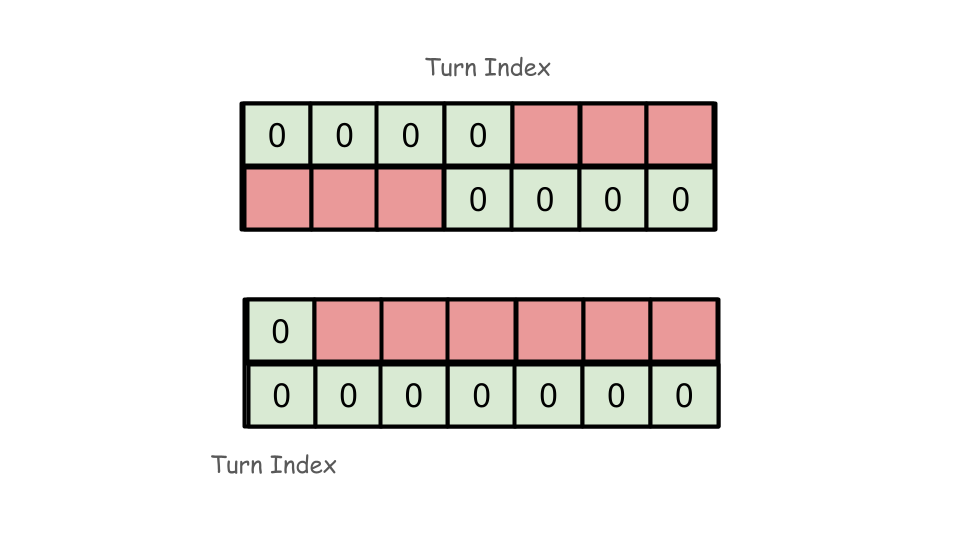

To summarize, we have only two possibilities for the second robot, assuming the first robot moves to the next row at index turnIndex:

* Option 1: Collect all points in the first row after the point where the first robot moved down.
* Option 2: Collect all points in the second row before the point where the first robot moved down.

In [ ]:
def gridGame(grid):
    n=len(grid[0])
    first = sum(grid[0])
    second= 0
    res=float("inf")
    for i in range(n):
       first-=grid[0][i]
       res= min(res, max(first,second))
       second+=grid[1][i]
    return res

In [ ]:
grid = [[2,5,4],[1,5,1]]
gridGame(grid)

## Leetcode #1352:[Product of the Last K Numbers](https://leetcode.com/problems/product-of-the-last-k-numbers/description/?envType=daily-question&envId=2025-02-14)

In [ ]:
class ProductOfNumbers:

    def __init__(self):
        self.prefix_product = [1]
        self.size = 0


    def add(self, num: int) -> None:
        if num == 0:
            # If num is 0, reset the cumulative products since multiplication
            # with 0 invalidates previous products
            self.prefix_product = [1]
            self.size = 0
        else:
            # Append the cumulative product of the current number with the last
            # product
            self.prefix_product.append(self.prefix_product[self.size] * num)
            self.size += 1


    def getProduct(self, k: int) -> int:
        if k > self.size:
            return 0
        # Compute the product of the last k elements using division
        return (
            self.prefix_product[self.size] // self.prefix_product[self.size - k]
        )


# Your ProductOfNumbers object will be instantiated and called as such:
# obj = ProductOfNumbers()
# obj.add(num)
# param_2 = obj.getProduct(k)

## Leetcode #[1524. Number of Sub-arrays With Odd Sum](https://leetcode.com/problems/number-of-sub-arrays-with-odd-sum/description/?envType=daily-question&envId=2025-02-25)

By multiplying these two values, we're essentially calculating the number of ways to choose one even prefix sum position (start of the sub-array) and one odd prefix sum position (end of the sub-array). Each such combination creates a sub-array with an odd sum.

In [ ]:
def numOfSubarrays(self, arr: List[int]) -> int:
    oddCount, prefixSum, mod = 0, 0, 1_000_000_007
    for a in arr:
        prefixSum += a
        oddCount += prefixSum % 2
    oddCount += (len(arr) - oddCount) * oddCount
    return oddCount % mod

## Leetcode #1749:[Maximum Absolute Sum of Any Subarray](https://leetcode.com/problems/maximum-absolute-sum-of-any-subarray/description/?envType=daily-question&envId=2025-02-26)

In [ ]:
def maxAbsoluteSum(self, nums):
    min_prefix_sum = 0
    max_prefix_sum = 0
    prefix_sum = 0

    for num in nums:
        prefix_sum += num

        min_prefix_sum = min(min_prefix_sum, prefix_sum)
        max_prefix_sum = max(max_prefix_sum, prefix_sum)

    return max_prefix_sum - min_prefix_sum

## Leetcode #2145:[Count the Hidden Sequences](https://leetcode.com/problems/count-the-hidden-sequences/description/?envType=daily-question&envId=2025-04-21)

In [ ]:
def numberOfArrays(differences, lower, upper):
    x = y = cur = 0
    for d in differences:
        cur += d
        x = min(x, cur)
        y = max(y, cur)
        if y - x > upper - lower:
            return 0
    return (upper - lower) - (y - x) + 1

## Leetcode #2845:[Count of Interesting Subarrays](https://leetcode.com/problems/count-of-interesting-subarrays/description/?envType=daily-question&envId=2025-04-25)

In [ ]:
def countInterestingSubarrays(nums, modulo, k):
    n = len(nums)
    cnt = Counter([0])
    res = 0
    prefix = 0
    for i in range(n):
        prefix += 1 if nums[i] % modulo == k else 0
        res += cnt[(prefix - k + modulo) % modulo]
        cnt[prefix % modulo] += 1
    return res

## Leetcode #3355:[Zero Array Transformation I](https://leetcode.com/problems/zero-array-transformation-i/description/?envType=daily-question&envId=2025-05-20)

In [ ]:
def isZeroArray(self, nums: List[int], queries: List[List[int]]) -> bool:
        deltaArray = [0] * (len(nums) + 1)
        for left, right in queries:
            deltaArray[left] += 1
            deltaArray[right + 1] -= 1
        operationCounts = []
        currentOperations = 0
        for delta in deltaArray:
            currentOperations += delta
            operationCounts.append(currentOperations)
        for operations, target in zip(operationCounts, nums):
            if operations < target:
                return False
        return True

## Leetcode #3362:[Zero Array Transformation III](https://leetcode.com/problems/zero-array-transformation-iii/description/?envType=daily-question&envId=2025-05-22)


In [ ]:
def maxRemoval(nums, queries):
    queries.sort(key=lambda x: x[0])
    heap = []
    deltaArray = [0] * (len(nums) + 1)
    operations = 0
    j = 0
    for i, num in enumerate(nums):
        operations += deltaArray[i]
        while j < len(queries) and queries[j][0] == i:
            heappush(heap, -queries[j][1])
            j += 1
        while operations < num and heap and -heap[0] >= i:
            operations += 1
            deltaArray[-heappop(heap) + 1] -= 1
        if operations < num:
            return -1
    return len(heap)

## leetcode #2438:[Range Product Queries of Powers](https://leetcode.com/problems/range-product-queries-of-powers/description/?envType=daily-question&envId=2025-08-11)

In [ ]:
class Solution:
    def productQueries(self, n: int, queries: List[List[int]]) -> List[int]:
        mod = 10**9 + 7

        bins, rep = [], 1
        while n > 0:
            if n % 2 == 1:
                bins.append(rep)
            n //= 2
            rep *= 2

        m = len(bins)
        results = [[0] * m for _ in range(m)]
        for i in range(m):
            cur = 1
            for j in range(i, m):
                cur = cur * bins[j] % mod
                results[i][j] = cur

        ans = []
        for left, right in queries:
            ans.append(results[left][right])
        return ans

## Leetcode #3494:[Find the Minimum Amount of Time to Brew Potions](https://leetcode.com/problems/find-the-minimum-amount-of-time-to-brew-potions/description/?envType=daily-question&envId=2025-10-09)

In [ ]:
from typing import List

class Solution:
    def minTime(self, skills: List[int], energy: List[int]) -> int:
        n, m = len(skills), len(energy)
        prefix_skills = [0] * n
        for i in range(1, n):
            prefix_skills[i] = prefix_skills[i - 1] + skills[i]

        total_time = skills[0] * energy[0]

        for j in range(1, m):
            max_time = skills[0] * energy[j]
            for i in range(1, n):
                diff_time = prefix_skills[i] * energy[j - 1] - prefix_skills[i - 1] * energy[j]
                if diff_time > max_time:
                    max_time = diff_time
            total_time += max_time

        return total_time + prefix_skills[-1] * energy[-1]

## Leetcode #3147:[Taking Maximum Energy From the Mystic Dungeon](https://leetcode.com/problems/taking-maximum-energy-from-the-mystic-dungeon/description/?envType=daily-question&envId=2025-10-10)

In [ ]:
class Solution:
    def maximumEnergy(self, energy: List[int], k: int) -> int:
        n = len(energy)
        ans = -inf

        for i in range(n - k, n):
            total = 0
            j = i
            while j >= 0:
                total += energy[j]
                ans = max(ans, total)
                j -= k

        return ans

## Leetcode #3354:[Make Array Elements Equal to Zero](https://leetcode.com/problems/make-array-elements-equal-to-zero/description/?envType=daily-question&envId=2025-10-28)

In [ ]:
class Solution:
    def countValidSelections(self, nums):
        n = len(nums)
        ans = 0
        s = sum(nums)
        left, right = 0, s
        for i in range(n):
            if nums[i] == 0:
                if 0 <= left - right <= 1:
                    ans += 1
                if 0 <= right - left <= 1:
                    ans += 1
            else:
                left += nums[i]
                right -= nums[i]
        return ans

## Leetcode #2536:[Increment Submatrices by One](https://leetcode.com/problems/increment-submatrices-by-one/description/?envType=daily-question&envId=2025-11-14)

In [ ]:
class Solution:
    def rangeAddQueries(
        self, n: int, queries: List[List[int]]
    ) -> List[List[int]]:
        diff = [[0] * (n + 1) for _ in range(n + 1)]
        for row1, col1, row2, col2 in queries:
            diff[row1][col1] += 1
            diff[row2 + 1][col1] -= 1
            diff[row1][col2 + 1] -= 1
            diff[row2 + 1][col2 + 1] += 1

        mat = [[0] * n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                x1 = 0 if i == 0 else mat[i - 1][j]
                x2 = 0 if j == 0 else mat[i][j - 1]
                x3 = 0 if i == 0 or j == 0 else mat[i - 1][j - 1]
                mat[i][j] = diff[i][j] + x1 + x2 - x3
        return mat

## Leetcode #3381:[Maximum Subarray Sum With Length Divisible by K](https://leetcode.com/problems/maximum-subarray-sum-with-length-divisible-by-k/description/?envType=daily-question&envId=2025-11-27)

In [ ]:
class Solution:
    def maxSubarraySum(self, nums: List[int], k: int) -> int:
        INF = 10**30
        minPrefix = [INF] * k
        minPrefix[0] = 0

        prefix = 0
        answer = -10**30

        for i, x in enumerate(nums):
            prefix += x
            mod = (i + 1) % k

            if minPrefix[mod] != INF:
                answer = max(answer, prefix - minPrefix[mod])

            minPrefix[mod] = min(minPrefix[mod], prefix)

        return answer

## Leetcode #1590:[Make Sum Divisible by P](https://leetcode.com/problems/make-sum-divisible-by-p/description/?envType=daily-question&envId=2025-11-30)

In [ ]:
class Solution:
    def minSubarray(self, nums: List[int], p: int) -> int:
        n = len(nums)
        total_sum = 0

        # Step 1: Calculate total sum and target remainder
        for num in nums:
            total_sum = (total_sum + num) % p

        target = total_sum % p
        if target == 0:
            return 0  # The array is already divisible by p

        # Step 2: Use a dict to track prefix sum mod p
        mod_map = {
            0: -1
        }  # To handle the case where the whole prefix is the answer
        current_sum = 0
        min_len = n

        # Step 3: Iterate over the array
        for i in range(n):
            current_sum = (current_sum + nums[i]) % p

            # Calculate what we need to remove
            needed = (current_sum - target + p) % p

            # If we have seen the needed remainder, we can consider this subarray
            if needed in mod_map:
                min_len = min(min_len, i - mod_map[needed])

            # Store the current remainder and index
            mod_map[current_sum] = i

        # Step 4: Return result
        return -1 if min_len == n else min_len

## Leetcode #2141:[Maximum Running Time of N Computers](https://leetcode.com/problems/maximum-running-time-of-n-computers/description/?envType=daily-question&envId=2025-12-01)

In [ ]:
class Solution:
    def maxRunTime(self, n: int, batteries: List[int]) -> int:
        # Get the sum of all extra batteries.
        batteries.sort()
        extra = sum(batteries[:-n])

        # live stands for the n largest batteries we chose for n computers.

        live = batteries[-n:]

        # We increase the total running time using 'extra' by increasing
        # the running time of the computer with the smallest battery.
        for i in range(n - 1):
            # If the target running time is between live[i] and live[i + 1].
            if extra // (i + 1) < live[i + 1] - live[i]:
                return live[i] + extra // (i + 1)

            # Reduce 'extra' by the total power used.
            extra -= (i + 1) * (live[i + 1] - live[i])

        # If there is power left, we can increase the running time
        # of all computers.
        return live[-1] + extra // n

## Leetcode #2483:[Minimum Penalty for a Shop](https://leetcode.com/problems/minimum-penalty-for-a-shop/description/?envType=daily-question&envId=2025-12-26)

In [ ]:
class Solution:
    def bestClosingTime(self, customers: str) -> int:
        curPenalty = sum(c == "Y" for c in customers)

        # Start with closing at hour 0, the penalty equals all 'Y' in closed hours.
        minPenalty = curPenalty
        earliestHour = 0

        for i, ch in enumerate(customers):
            # If status in hour i is 'Y', moving it to open hours decrement
            # penalty by 1. Otherwise, moving 'N' to open hours increment
            # penalty by 1.
            if ch == "Y":
                curPenalty -= 1
            else:
                curPenalty += 1

            # Update earliestHour if a smaller penalty is encountered.
            if curPenalty < minPenalty:
                earliestHour = i + 1
                minPenalty = curPenalty

        return earliestHour

# Two Pointers

## Leetcode #1813:[Sentence Similarity III](https://leetcode.com/problems/sentence-similarity-iii/description/?envType=daily-question&envId=2024-10-06)

In [ ]:
def areSentencesSimilar(s1, s2):
    deque1 = deque(s1.split())
    deque2 = deque(s2.split())
    # Compare the prefixes or beginning of the strings.
    while deque1 and deque2 and deque1[0] == deque2[0]:
        deque1.popleft()
        deque2.popleft()
    # Compare the suffixes or ending of the strings.
    while deque1 and deque2 and deque1[-1] == deque2[-1]:
        deque1.pop()
        deque2.pop()
    return not deque1 or not deque2


In [ ]:
def areSentencesSimilar(self, sentence1: str, sentence2: str) -> bool:
    # Split the sentences into words
    words1 = sentence1.split()
    words2 = sentence2.split()

    # Two pointers from the start and end
    i, j = 0, 0
    n, m = len(words1), len(words2)

    # Move pointers from the start while the words are the same
    while i < n and i < m and words1[i] == words2[i]:
        i += 1

    # Move pointers from the end while the words are the same
    while j < (n - i) and j < (m - i) and words1[n - j - 1] == words2[m - j - 1]:
        j += 1

    # If the total matched words cover both sentences, they are similar
    return i + j == n or i + j == m

## Leetcode #2938:[Separate Black and White Balls](https://leetcode.com/problems/separate-black-and-white-balls/description/?envType=daily-question&envId=2024-10-15)

In [ ]:
def minimumSteps(s):
    l,r=0,0
    n= len(s)
    res=0
    while r<n:
      if s[r]=="0":
         res+= r-l
         l+=1
      r+=1
    return res


To push a white ball to the front, we need to swap it with each black ball in front of it. Each swap moves the white ball forward by one position. The number of swaps for each white ball is equal to the number of black balls before it.

As we go through the array, we use a variable blackBallCount to track how many black balls we've passed. Each time we find a white ball, we add the current value of blackBallCount to the total swap count totalSwaps. When we're done, totalSwaps holds the answer.

In [ ]:
class Solution:
    def minimumSteps(self, s: str) -> int:
        res, swaps = 0, 0
        for ch in s:
            if ch == '1':
                swaps += 1
            else:
                res += swaps
        return res


In [ ]:
s = "101"
minimumSteps(s)

## Leetcode #2563:[Count the Number of Fair Pairs](https://leetcode.com/problems/count-the-number-of-fair-pairs/description/?envType=daily-question&envId=2024-11-13)

1. **Sorting the Array**: `nums.sort()` sorts the array in ascending order, making it easier to use the two-pointer technique.
  
2. **Helper Function `lowerbound`**: This function counts the number of pairs `(i, j)` where `nums[i] + nums[j] < bound`. It uses two pointers (`l` and `r`).
   - `l` starts from the left, and `r` starts from the right of the array.
   - If the sum of `nums[l] + nums[r]` is less than `bound`, it means all pairs from `l` to `r-1` with `nums[l]` as one of the elements will also satisfy this condition. So we add `r - l` to `res` and increment `l`.
   - If the sum is greater than or equal to `bound`, we decrement `r` to try to find a smaller pair sum.

Since each of these pairs (l, l+1), (l, l+2), ..., (l, r-1), (l, r) are valid, we can directly count them as r - l pairs.

3. **Counting Fair Pairs**: The `countFairPairs` function calculates the difference:
   - `lowerbound(nums, upper + 1)` gives the count of pairs where `nums[i] + nums[j] <= upper`.
   - `lowerbound(nums, lower)` gives the count of pairs where `nums[i] + nums[j] < lower`.
   - Subtracting these two counts gives the number of pairs where `lower <= nums[i] + nums[j] <= upper`.




In [ ]:
def countFairPairs(nums, lower, upper):
    nums.sort()
    def lowerbound(nums,bound):
        l,r= 0, len(nums)-1
        res=0
        while l<=r:
           sum= nums[l]+nums[r]
           if sum< bound:
              res+= r-l
              l+=1
           else:
              r-=1
        return res
    return lowerbound(nums,upper+1)-lowerbound(nums,lower)

In [ ]:
nums = [0,1,7,4,4,5]
lower = 3
upper = 6
countFairPairs(nums, lower, upper)

## Leetcode #1574:[Shortest Subarray to be Removed to Make Array Sorted](https://leetcode.com/problems/shortest-subarray-to-be-removed-to-make-array-sorted/description/?envType=daily-question&envId=2024-11-15)

A key insight here is that the unsorted yellow region must always be part of the removed subarray since it breaks the sorted order. In other words, the remaining sorted array will always be a prefix of the blue subarray (from the first element up to some index) followed by a suffix of the green subarray (from the last element down to some index).

To consider all possibilities, use two pointers, left and right. The pointers represent the prefix blue array arr[0:left] and suffix green array arr[right:] consisting of the remaining sorted array we are considering. Initially, left is set to 0, meaning we’re considering keeping the first element of the blue array. Right is set to the index of the start of the green subarray, meaning we consider keeping the entirety of the green subarray.

Using this two-pointer method, for each position of left, we search for the smallest right where arr[left] <= arr[right]. If this condition holds, then we have found a valid subarray candidate to remove—the subarray between arr[left] and arr[right], which has a length of right - left - 1. If arr[left] > arr[right], we increment right to find the next possible match. Once a valid right is found, we advance left to the next element, repeating the process.

In [ ]:
def findLengthOfShortestSubarray(arr):
    # find the boundary of sorted array(start from right)
    r = len(arr) - 1
    while r>0:
      if arr[r]<arr[r-1]:
         break
      r-=1
    #for each position of left, we search for the smallest right where arr[left] <= arr[right]
    print(r)
    # res=float("inf") not correct the max_limit is r and
    # when update the value of r, it will take value exceed the limit
    res=r
    l=0
    while l<r:
       if l==0 or arr[l-1]<= arr[l]:
          print("11")
          while r<len(arr) and arr[l]>arr[r]:
                print("22")
                r+=1
          res= min(res,r-l-1)
          l+=1
       else:
          break
    return res if res!= float("inf") else 0



In [ ]:
arr = [16,10,0,3,22,1,14,7,1,12,15]
findLengthOfShortestSubarray(arr)

## Leetcode  #1861:[Rotating the Box](https://leetcode.com/problems/rotating-the-box/description/?envType=daily-question&envId=2024-11-23)

In [ ]:
def rotateTheBox(box):
    row, col = len(box),len(box[0])
    res=[["."]* row for _ in range(col)]
    for r in range(row):
       e=col-1
       for s in range(col-1, -1, -1):
           if box[r][s]=="#":
              res[e][row-r-1]="#"
              e-=1
           elif box[r][s]=="*":
                res[s][row-r-1]="*"
                e=s-1
    return res

In [ ]:
box = [["#","#","*",".","*","."],
       ["#","#","#","*",".","."],
       ["#","#","#",".","#","."]]
rotateTheBox(box)

## Leetcode #2825:[Make String a Subsequence Using Cyclic Increments](https://leetcode.com/problems/make-string-a-subsequence-using-cyclic-increments/description/?envType=daily-question&envId=2024-12-04)

In [ ]:
def canMakeSubsequence(str1, str2):
    tar_idx, tar_n=0, len(str2)
    for curr in str1:
       if tar_idx< tar_n and (ord(str2[tar_idx])-ord(curr))% 26 <2:
          tar_idx+=1
    return tar_idx== tar_n

In [ ]:
class Solution:
    def canMakeSubsequence(self, source: str, target: str) -> bool:
        src_len, tgt_len = len(source), len(target)
        target_char = target[0]

        src_idx = tgt_idx = 0
        while src_idx < src_len and tgt_idx < tgt_len:
            src_char = source[src_idx]

            if (src_char == target_char or
                chr(ord(src_char) + 1) == target_char or
                (src_char == 'z' and target_char == 'a')):
                tgt_idx += 1
                if tgt_idx < tgt_len:
                    target_char = target[tgt_idx]

            src_idx += 1

        return tgt_idx == tgt_len

In [ ]:
str1 = "abc"
str2 = "ad"
canMakeSubsequence( str1, str2)

## Leetcode #2337:[Move Pieces to Obtain a String](https://leetcode.com/problems/move-pieces-to-obtain-a-string/description/?envType=daily-question&envId=2024-12-05)

In [ ]:
def canChange(start, target):
    n= len(start)
    s_i, t_i= 0,0
    while s_i < n or t_i < n:
        # skip underscores in start
        while s_i< n and start[s_i] == "_":
              s_i += 1
        # skip underscores in target
        while t_i< n and target[t_i] == "_":
              t_i+=1
         # if one string exhausted, both strings should be exhausted
        if s_i==n or t_i ==n:
           return s_i == n and t_i==n
       # If the characters at start[startIndex] and target[targetIndex] do not match,
       # return false as the transformations are invalid.
        if start[s_i]!= target[t_i]:
           return False
       # If the character is 'L' in start,
       # ensure startIndex >= targetIndex (left pieces can only move left);
       # otherwise, return false.

        if s_i<t_i and start[s_i]=="L":
           return False

       # If the character is 'R' in start,
       # ensure startIndex <= targetIndex (right pieces can only move right);
       # otherwise, return false.
        if s_i>t_i and start[s_i]=="R":
           return False
        s_i += 1
        t_i+=1
    return True


In [ ]:
start = "_L__R__R_"
target = "L______RR"
canChange(start, target)

## Leetcode #2460:[Apply Operations to an Array](https://leetcode.com/problems/apply-operations-to-an-array/description/?envType=daily-question&envId=2025-03-01)

In [ ]:
def applyOperations(nums):
    n = len(nums)
    write_index = 0  # Pointer to place non-zero elements

    for index in range(n):
        # Step 1: Merge adjacent equal elements if they are non-zero
        if (
            index < n - 1
            and nums[index] == nums[index + 1]
            and nums[index] != 0
        ):
            nums[index] *= 2
            nums[index + 1] = 0
        # Step 2: Shift non-zero elements to the front
        if nums[index] != 0:
            if index != write_index:
                nums[index], nums[write_index] = (
                    nums[write_index],
                    nums[index],
                )
            write_index += 1
    return nums

## Leetcode #2161:[Partition Array According to Given Pivot](https://leetcode.com/problems/partition-array-according-to-given-pivot/description/?envType=daily-question&envId=2025-03-03)

In [ ]:
def pivotArray(nums, pivot):
    res=[0]*len(nums)
    l,r=0,len(nums)-1
    for i,j in zip(range(len(nums)), range(len(nums) - 1, -1, -1)):
        if nums[i]<pivot:
           res[l]=nums[i]
           l+=1
        if nums[j]>pivot:
           res[r]=nums[j]
           r-=1
    print(res)
    while l<= r:
          res[l] = pivot
          l += 1
    return res

In [ ]:
nums = [9,12,5,10,14,3,10]
pivot = 10
pivotArray(nums, pivot)

## Leetcode #763:[Partition Labels](https://leetcode.com/problems/partition-labels/description/?envType=daily-question&envId=2025-03-30)

In [ ]:
def partitionLabels(s):
    last = {c: i for i, c in enumerate(s)}
    start = end = 0
    res = []
    for i, c in enumerate(s):
        end = max(end, last[c])
        if i == end:
            res.append(end - start + 1)
            start = end + 1
    return res

## Leetcode #838:[Push Dominoes](https://leetcode.com/problems/push-dominoes/description/?envType=daily-question&envId=2025-05-02)

In [ ]:
def pushDominoes(dominoes):
    N = len(dominoes)
    force = [0] * N

    # Populate forces going from left to right
    f = 0
    for i in range(N):
        if dominoes[i] == 'R': f = N
        elif dominoes[i] == 'L': f = 0
        else: f = max(f-1, 0)
        force[i] += f

    # Populate forces going from right to left
    f = 0
    for i in range(N-1, -1, -1):
        if dominoes[i] == 'L': f = N
        elif dominoes[i] == 'R': f = 0
        else: f = max(f-1, 0)
        force[i] -= f

    return "".join('.' if f==0 else 'R' if f > 0 else 'L'
                    for f in force)

In [ ]:
def pushDominoes(dominoes):
    ans = ''
    left = '.'
    dots = 0

    for domino in dominoes:
        if domino == '.':
            dots += 1
        else:
            if dots == 0:
                ans += domino
                left = domino
            else:
                if left in ('.', 'L') and domino == 'L':
                    ans += 'L' * (dots + 1)
                elif left == '.' and domino == 'R':
                    ans += '.' * dots + 'R'
                elif left == 'R' and domino == 'R':
                    ans += 'R' * (dots + 1)
                elif left == 'L' and domino == 'R':
                    ans += '.' * dots + 'R'
                else: #RL
                    mid = dots % 2
                    half = dots // 2
                    ans += 'R' * half + '.' * mid + 'L' * (half + 1)

                dots = 0
                left = domino
    if dots > 0:
        if left == 'L':
            ans += '.' * dots
        elif left == 'R':
            ans += 'R' * dots
        else:
            ans += '.' * dots

    return ans

## Leetcode #75:[Sort Colors](https://leetcode.com/problems/sort-colors/description/?envType=daily-question&envId=2025-05-17)

In [ ]:
def sortColors(nums):
    low = mid = 0
    high = len(nums) - 1
    while mid <= high:
        if nums[mid] == 0:
            nums[low], nums[mid] = nums[mid], nums[low]
            low += 1
            mid += 1
        elif nums[mid] == 1:
            mid += 1
        else:
            nums[mid], nums[high] = nums[high], nums[mid]
            high -= 1

## Leetcode #3403:[Find the Lexicographically Largest String From the Box I](https://leetcode.com/problems/find-the-lexicographically-largest-string-from-the-box-i/description/?envType=daily-question&envId=2025-06-04)

In [ ]:
class Solution:
    def answerString(self, word: str, numFriends: int) -> str:
        if numFriends == 1:
            return word
        n = len(word)
        res = ""
        for i in range(n):
            res = max(res, word[i : min(i + n - numFriends + 1, n)])
        return res

## Leetcode #2200:[Find All K-Distant Indices in an Array](https://leetcode.com/problems/find-all-k-distant-indices-in-an-array/description/?envType=daily-question&envId=2025-06-24)

In [ ]:
class Solution:
    def findKDistantIndices(
        self, nums: List[int], key: int, k: int
    ) -> List[int]:
        res = []
        r = 0  # unjudged minimum index
        n = len(nums)
        for j in range(n):
            if nums[j] == key:
                l = max(r, j - k)
                r = min(n - 1, j + k) + 1
                for i in range(l, r):
                    res.append(i)
        return res

## Leetcode #2410:[Maximum Matching of Players With Trainers](https://leetcode.com/problems/maximum-matching-of-players-with-trainers/description/?envType=daily-question&envId=2025-07-13)

In [ ]:
class Solution:
    def matchPlayersAndTrainers(
        self, players: List[int], trainers: List[int]
    ) -> int:
        players.sort()
        trainers.sort()
        m, n = len(players), len(trainers)
        i = j = count = 0

        while i < m and j < n:
            while j < n and players[i] > trainers[j]:
                j += 1
            if j < n:
                count += 1
            i += 1
            j += 1

        return count

## Leetcode #611:[Valid Triangle Number](https://leetcode.com/problems/valid-triangle-number/description/?envType=daily-question&envId=2025-09-26)

In [ ]:
class Solution:
    def triangleNumber(self, nums: List[int]) -> int:
        nums.sort()
        n = len(nums)
        count = 0

        for i in range(n - 1, -1, -1):
            left, right = 0, i - 1
            while left < right:
                if nums[left] + nums[right] > nums[i]:
                    count += right - left
                    right -= 1
                else:
                    left += 1
        return count

## Leetcode #11:[Container With Most Water](https://leetcode.com/problems/container-with-most-water/?envType=daily-question&envId=2025-10-04)

In [ ]:
class Solution:
    def maxArea(self, height: list[int]) -> int:
        i = 0
        j = len(height) - 1
        res = 0

        while i < j:
            res = max(res, (j - i) * min(height[i], height[j]))
            if height[i] < height[j]:
                i += 1
            else:
                j -= 1

        return res


# Heap

## Leetcode #1942:[The Number of the Smallest Unoccupied Chair](https://leetcode.com/problems/the-number-of-the-smallest-unoccupied-chair/description/?envType=daily-question&envId=2024-10-11)

In [ ]:
#Brute Force
# chairTime[i] will represent the time the i th chair becomes available.
# Initially, all values of chairTime are 0, because every chair is available at the beginning.
# For each person (arrival, leaving),
# we will iterate over chairTime and find the first chair with a value less than or equal to arrival.
# This is the chair that the current person will take.
def smallestChair(times, targetFriend):
    target= times[targetFriend]
    times.sort()
    n = len(times)
    chair = [0] * n
    for time in times:
       for i in range(n):
          if chair[i]<=time[0]:
             chair[i]= time[1]
             if time == target:
                return i
             break
    return -1


This `Solution` class contains a method called `smallestChair`, which solves a problem where you need to find which chair a specific friend (identified by `targetFriend`) sits on when they arrive at a party. Friends are given chairs as they arrive, and when they leave, the chair becomes available for others.


- `times` is a list of lists, where each sub-list `[arrival, leaving]` represents the time at which a friend arrives at the party and the time they leave.
- The `targetFriend` represents the index of the specific friend you are interested in.
- The goal is to return the chair number that `targetFriend` will sit on when they arrive.

Algorithm Explanation:

1. **Add Friend Index**:
   Each friend is given an index (their position in the `times` list). This helps track which entry belongs to the target friend. So, for each `i`, `times[i]` becomes `[arrival, leaving, i]`.

2. **Sort by Arrival Time**:
   The `times` list is sorted based on the arrival time (i.e., the first element of each sub-list). This allows the algorithm to process friends as they arrive in chronological order.

3. **Heap Setup**:
   - `nextUnsatChair`: Tracks the next unused chair number. Initially, it starts at 0.
   - `emptyChairs`: A min-heap (priority queue) that holds the chair numbers of chairs that are free after friends leave.
   - `occupied`: A heap that keeps track of when each occupied chair will be freed, based on the leaving time. It stores tuples in the format `(leaving_time, chair_number)`.

4. **Main Loop**:
   For each friend's arrival:
   - **Free chairs**: The algorithm first checks if any friends have left by comparing their leaving times with the current arrival time. If a friend has left, their chair is freed, and the chair number is added to `emptyChairs`.
   
   - **Target Friend Check**: If the current friend (`i == targetFriend`), the function immediately returns the lowest-numbered available chair:
     - If there are free chairs (`emptyChairs` is not empty), it returns the smallest available chair.
     - If no chairs are available, the `nextUnsatChair` will be given to the target friend.
   
   - **Assigning a Chair**:
     - If no free chairs are available, the current friend is given `nextUnsatChair` (the next unused chair).
     - If there are free chairs (stored in `emptyChairs`), the friend is assigned the smallest available chair from the heap.
     - The chair is added to the `occupied` heap with the corresponding leaving time so that it can be freed when the friend leaves.

5. **Returning the Result**:
   The loop continues until the target friend is found and the corresponding chair is returned.



In [ ]:
class Solution:
  def smallestChair(self, times: list[list[int]], targetFriend: int) -> int:
    nextUnsatChair = 0
    emptyChairs = []
    occupied = []  # (leaving, chair)

    for i in range(len(times)):
      times[i].append(i)

    times.sort(key=lambda x: x[0])

    for arrival, leaving, i in times:
      #if any friends have left by comparing their leaving times with the current arrival time.
      while len(occupied) > 0 and occupied[0][0] <= arrival:
        unsatChair = heapq.heappop(occupied)[1]
        heapq.heappush(emptyChairs, unsatChair)
      #Target Friend Check
      if i == targetFriend:
        return emptyChairs[0] if len(emptyChairs) > 0 else nextUnsatChair
      #Assigning a Chair
      if len(emptyChairs) == 0:
        heapq.heappush(occupied, (leaving, nextUnsatChair))
        nextUnsatChair += 1
      else:
        emptyChair = heapq.heappop(emptyChairs)
        heapq.heappush(occupied, (leaving, emptyChair))

In [ ]:
times = [[1,4],[2,3],[4,6]]
targetFriend = 1
smallestChair(times, targetFriend)

## Leetcode #632:[Smallest Range Covering Elements from K Lists](https://leetcode.com/problems/smallest-range-covering-elements-from-k-lists/description/?envType=daily-question&envId=2024-10-13)

1. Initialize a min-heap (smallest element from each list, list index, index of element within the list)
2. Track current_max across all the k lists (for range)
3. Iterate through the lists by always popping the minimum element from the heap (by heap's nature) and checking the range between the minimum and the current maximum.
4. Update the smallest range whenever a smaller one is found.
5. Push the next element from the same list (the list from which the popped element came) into the heap.
6. Update the current maximum as necessary.
Stop the iteration once any list runs out of elements.

In [ ]:
import heapq
def smallestRange(nums):
    heap = []
    cur_max = float('-inf')
    for i in range(len(nums)):
          heapq.heappush(heap, (nums[i][0], i, 0))
          cur_max = max(cur_max, nums[i][0])
    small = [float('-inf'), float('inf')]
    while heap:
      cur,index,i=heapq.heappop(heap)
      if cur_max-cur<small[1]-small[0] or((cur_max - cur == small[1] - small[0]) and cur < small[0]):
         small= [cur, cur_max]
      if i + 1 < len(nums[index]):
         nxt = nums[index][i + 1]
         heapq.heappush(heap, (nxt, index, i+1))
         cur_max = max(cur_max, nxt)
      else:
        break
    return small

Since we need a range that includes one number from each of the k lists, we can think of this as a subarray problem. However, the numbers are spread across multiple lists. To simplify, we can combine all the lists into a single sorted list of numbers. When merging, we also keep track of which list each number came from, since the problem requires at least one number from each original list in the final range.

Once we have the merged list, the problem becomes finding the smallest range (or subarray) in this list that contains at least one element from each of the original k lists. This is a common scenario for a sliding window or two-pointer approach: we want to expand and shrink the window (subarray) dynamically to find the minimum range that meets the criteria.

The right pointer will expand the window by moving forward in the merged list, and the left pointer will shrink the window once we know the window contains at least one element from each list.

As the right pointer moves through the merged list, we need to ensure that the current subarray includes at least one number from each list. So we keep track of how many lists are "covered" by the current subarray (i.e., how many of the k lists have at least one number in the current window).

Once all lists are covered, the window between the left and right pointers represents a valid range. We then check if this range is the smallest we've found so far.

After finding a valid range, we need to shrink the window (move the left pointer forward) to see if we can make the range even smaller while still keeping one number from each list in the subarray. As we move the left pointer forward, we check if we lose coverage from any list. If we do, we stop shrinking and start expanding the window again by moving the right pointer.

We will continue this until we can no longer expand the window (i.e., the right pointer reaches the end of the merged list). By this point, we have explored all possible ranges, and the smallest valid range is our final answer.

In [ ]:
class Solution:
    def smallestRange(self, nums: List[List[int]]) -> List[int]:
        merged = []

        # Merge all lists with their list index
        for i in range(len(nums)):
            for num in nums[i]:
                merged.append((num, i))

        # Sort the merged list
        merged.sort()

        # Two pointers to track the smallest range
        freq = defaultdict(int)
        left, count = 0, 0
        range_start, range_end = 0, float("inf")

        for right in range(len(merged)):
            freq[merged[right][1]] += 1
            if freq[merged[right][1]] == 1:
                count += 1

            # When all lists are represented, try to shrink the window
            while count == len(nums):
                cur_range = merged[right][0] - merged[left][0]
                if cur_range < range_end - range_start:
                    range_start = merged[left][0]
                    range_end = merged[right][0]

                freq[merged[left][1]] -= 1
                if freq[merged[left][1]] == 0:
                    count -= 1
                left += 1

        return [range_start, range_end]

In [ ]:
nums = [[4,10,15,24,26],[0,9,12,20],[5,18,22,30]]
smallestRange(nums)

## Leetcode #2530:[Maximal Score After Applying K Operations](https://leetcode.com/problems/maximal-score-after-applying-k-operations/description/?envType=daily-question&envId=2024-10-14)

In [ ]:
import heapq
import math
def maxKelements(nums, k):
    nums=[i*-1 for i in nums]
    res=0
    heapq.heapify(nums)
    while k>0:
      num= heapq.heappop(nums)
      res+=num *-1
      heapq.heappush(nums,math.ceil(num//3))
      print(num//3)
      k-=1
    return res

In [ ]:
nums = [1,10,3,3,3]
k = 3
maxKelements(nums, k)

## Leetcode #1405:[Longest Happy String](https://leetcode.com/problems/longest-happy-string/description/?envType=daily-question&envId=2024-10-16)

In [ ]:
import heapq
def longestDiverseString(a, b, c):
    heap=[]
    if a!=0:
      heapq.heappush(heap, (-a, "a"))
    if b!=0:
      heapq.heappush(heap, (-b, "b"))
    if c!=0:
      heapq.heappush(heap, (-c, "c"))
    res=""
    while heap:
        count,chr = heapq.heappop(heap)
        if len(res)>=2 and res[-1]== chr and res[-2]==chr:
           if not heap:
              break
           tempc,temp= heapq.heappop(heap)
           tempc+=1
           res+=temp
           if tempc<0:
              heapq.heappush(heap,(tempc,temp))
           heapq.heappush(heap,(count,chr))
        else:
           res+=chr
           count+=1
           if count<0:
              heapq.heappush(heap,(count,chr))
    return res

track how many times we add each letter in a row

In [ ]:
class Solution:
    def longestDiverseString(self, a: int, b: int, c: int) -> str:
        curra, currb, currc = 0, 0, 0
        # Maximum total iterations possible is given by the sum of a, b and c.
        total_iterations = a + b + c
        ans = ""

        for i in range(total_iterations):
            if (a >= b and a >= c and curra != 2) or (
                a > 0 and (currb == 2 or currc == 2)
            ):
                # If 'a' is maximum and it's streak is less than 2, or if streak of 'b' or 'c' is 2, then 'a' will be the next character.
                ans += "a"
                a -= 1
                curra += 1
                currb = 0
                currc = 0
            elif (b >= a and b >= c and currb != 2) or (
                b > 0 and (currc == 2 or curra == 2)
            ):
                # If 'b' is maximum and it's streak is less than 2, or if streak of 'a' or 'c' is 2, then 'b' will be the next character.
                ans += "b"
                b -= 1
                currb += 1
                curra = 0
                currc = 0
            elif (c >= a and c >= b and currc != 2) or (
                c > 0 and (curra == 2 or currb == 2)
            ):
                # If 'c' is maximum and it's streak is less than 2, or if streak of 'a' or 'b' is 2, then 'c' will be the next character.
                ans += "c"
                c -= 1
                currc += 1
                curra = 0
                currb = 0
        return ans

In [ ]:
import heapq

def longestDiverseString(a, b, c):
    # Create a max-heap for the counts of a, b, and c.
    heap = []
    if a > 0:
        heapq.heappush(heap, (-a, 'a'))
    if b > 0:
        heapq.heappush(heap, (-b, 'b'))
    if c > 0:
        heapq.heappush(heap, (-c, 'c'))

    result = []

    while heap:
        # Pop the largest element
        count1, char1 = heapq.heappop(heap)
        count1 = -count1  # Convert back to positive

        # Try to add two of char1
        if len(result) >= 2 and result[-1] == result[-2] == char1:
            # If adding char1 would create three in a row, try the second-largest element
            if not heap:
                break  # No other option available, so break
            count2, char2 = heapq.heappop(heap)
            count2 = -count2  # Convert to positive

            # Add one of char2
            result.append(char2)
            count2 -= 1

            # Re-add char2 back to heap if there are any left
            if count2 > 0:
                heapq.heappush(heap, (-count2, char2))

            # Re-add char1 to the heap
            heapq.heappush(heap, (-count1, char1))
        else:
            # Safe to add two of char1
            to_add = min(2, count1)  # Add one or two depending on how many are left
            result.extend([char1] * to_add)
            count1 -= to_add

            # Re-add char1 back to heap if there are any left
            if count1 > 0:
                heapq.heappush(heap, (-count1, char1))

    return ''.join(result)



In [ ]:
a = 7
b = 1
c = 0
longestDiverseString(a, b, c)

## Leetcode #2054:[Two Best Non-Overlapping Events](https://leetcode.com/problems/two-best-non-overlapping-events/description/?envType=daily-question&envId=2024-12-08)

* The `heap[0][0]` gives the smallest end time (the root of the heap).
* If the end time of the earliest active event (`heap[0][0]`) is earlier than the start time s of the current event, it means that event has ended and can no longer overlap with the current event.
* The loop removes all such events from the heap using `heapq.heappop(heap)` and updates `res1` to the maximum cumulative profit of events that have ended so far.

In [ ]:
def maxTwoEvents(events):

    events.sort()
    heap = []
    res2,res1 = 0,0
    for s,e,p in events:
        while heap and heap[0][0]<s:
            res1 = max(res1,heapq.heappop(heap)[1])

        res2 = max(res2,res1+p)
        heapq.heappush(heap,(e,p))

    return res2

* `prefix` keeps track of the maximum single-event value seen so far.
* Binary search (bisect_left) finds the earliest event in time whose et is not less than st.

In [ ]:
class Solution:
    def maxTwoEvents(self, events: List[List[int]]) -> int:
        time = []
        vals = []
        ans = prefix = 0
        for st, et, val in sorted(events, key=lambda x: x[1]):
            prefix = max(prefix, val)
            k = bisect_left(time, st)-1
            if k >= 0: val += vals[k]
            ans = max(ans, val)
            time.append(et)
            vals.append(prefix)
        return ans

In [ ]:
events = [[1,3,2],[4,5,2],[2,4,3]]
maxTwoEvents(events)

## Leetcode #2558:[Take Gifts From the Richest Pile](https://leetcode.com/problems/take-gifts-from-the-richest-pile/description/?envType=daily-question&envId=2024-12-12)

In [ ]:
import heapq
def pickGifts(gifts, k):
    gifts=[i*-1 for i in gifts]
    heapq.heapify(gifts)
    for _ in range(k):
        num = -heapq.heappop(gifts)
        heapq.heappush(gifts, -int(num**0.5))
    return sum(gifts)*-1

In [ ]:
gifts = [25,64,9,4,100]
k = 4
pickGifts(gifts, k)

## Leetcode #2593:[Find Score of an Array After Marking All Elements](https://leetcode.com/problems/find-score-of-an-array-after-marking-all-elements/description/?envType=daily-question&envId=2024-12-13)

In [ ]:
import heapq
def findScore(nums):
    n= len(nums)
    mark=[0]*n
    heap = []
    score = 0
    for i in range(n):
        heapq.heappush(heap, (nums[i], i))
    while heap:
        num,idx = heapq.heappop(heap)
        if mark[idx]==0:
           mark[idx]=1
           score+=num
           mark[max(0,idx-1)]=1
           mark[min(n-1,idx+1)]=1
    return score

The solution guarantees to choose the smallest number when processing the deque (`q`) because of how the condition `nums[i] >= q[-1]` and the deque's behavior work together:

### Key Observations

1. **Condition to Process the Deque (`nums[i] >= q[-1]`):**
   - The deque `q` only gets processed when the current number (`nums[i]`) is **greater than or equal to** the last number in the deque (`q[-1]`).
   - This ensures that before processing, the deque contains a contiguous sequence of numbers that are all **smaller than or equal to** the current number.

2. **Order of Processing (`while q`):**
   - When the deque is processed, it is treated as a stack (elements are popped from the right).
   - The logic ensures alternate numbers from the deque are added to the score:
     - The first number processed is **always the last element pushed into the deque (the smallest of the unprocessed sequence)**.
   - The smallest number in the deque at the time of processing is guaranteed to be added to the score because of the alternating logic (`skip = False` for the first pop).

### How the Smallest Number Is Chosen

- **Maintaining a Decreasing Sequence in `q`:**
  - When numbers are appended to the deque, they are added without violating the condition `nums[i] < q[-1]`. This creates a sequence where the smallest number in the deque is at the bottom (last in processing order).
  
- **Guarantee of Alternating Addition:**
  - When processing the deque:
    - The alternating mechanism (`skip`) ensures that the smallest numbers are not missed.
    - The first number processed (popped) is added to the score, and skipping starts afterward.


### How This Guarantees the Smallest Number

1. **Decreasing Order in `q`:**
   - At all times, numbers in `q` are arranged such that the smallest is at the "bottom" of the deque.

2. **Processing Logic:**
   - The smallest number is always added first when processing starts, due to the alternating addition logic (`skip = False` for the first pop).

3. **Clearing the Deque:**
   - By clearing the deque when the condition `nums[i] >= q[-1]` is met, it ensures that no smaller number remains unprocessed.

This ensures the solution **always picks the smallest number for addition at the correct time.**

In [ ]:
class Solution:
    def findScore(self, nums: List[int]) -> int:
        score = 0
        n = len(nums)
        q = deque()

        for i in range(n):
          # Process the deque if the current number is >= the last in the deque
            if q and nums[i]>=q[-1]:
                skip=False
                while q:
                    add = q.pop()
                    if not skip:
                        score += add
                    skip = not skip
                continue
            q.append(nums[i])

        skip=False
        while q:
            add = q.pop()
            if not skip:
                score += add
            skip = not skip

        return score


In [ ]:
nums = [2,1,3,4,5,2]
findScore(nums)

## Leetcode #1792:[Maximum Average Pass Ratio](https://leetcode.com/problems/maximum-average-pass-ratio/description/?envType=daily-question&envId=2024-12-15)

In [ ]:
import heapq
def maxAverageRatio(classes, extraStudents):
    def pass_ratio_gain(passi, totali):
        return (passi + 1) / (totali + 1) - passi / totali

    heap=[]
    for passed,total in classes:
        heapq.heappush(heap, (-pass_ratio_gain(passed,total),passed,total))
    for _ in range(extraStudents):
        _,passed,total = heapq.heappop(heap)
        heapq.heappush(heap, (-pass_ratio_gain(passed+1,total+1),passed+1,total+1))
    res=0
    for _,passed,total in heap:
        res+= passed/total
    return res/len(classes)

In [ ]:
classes = [[1,2],[3,5],[2,2]]
extraStudents = 2
maxAverageRatio(classes, extraStudents)

## Leetcode #3264:[Final Array State After K Multiplication Operations I](https://leetcode.com/problems/final-array-state-after-k-multiplication-operations-i/description/?envType=daily-question&envId=2024-12-16)

In [ ]:
def getFinalState(nums, k, multiplier):
    for _ in range(k):
        min_idx=0
        for i in range(1, len(nums)):
            if nums[i] < nums[min_idx]:
                min_idx = i
        nums[min_idx] *= multiplier
    return nums

In [ ]:
def getFinalState(nums, k, multiplier):
    pq = [(val, i) for i, val in enumerate(nums)]
    heapify(pq)

    for _ in range(k):
        _, i = heappop(pq)
        nums[i] *= multiplier
        heappush(pq, (nums[i], i))

    return nums

In [ ]:
nums = [2,1,3,5,6]
k = 5
multiplier = 2
getFinalState(nums, k, multiplier)

## Leetcode #2182:[Construct String With Repeat Limit](https://leetcode.com/problems/construct-string-with-repeat-limit/description/?envType=daily-question&envId=2024-12-17)

In [ ]:
import heapq
def repeatLimitedString(s, repeatLimit):
    freq = [0] * 26
    for c in s:
        freq[ord(c) - ord('a')] += 1

    res=[]
    heap=[]
    for i in range(26):
        if freq[i]>0:
            heapq.heappush(heap, (-(i+ord("a")),freq[i]))
    while heap:
        c,f = heapq.heappop(heap)
        char = chr(-c)
        use = min(f, repeatLimit)
        res.append(char * use)
        if f>use and heap:
            nextc,nextf=heapq.heappop(heap)
            res.append(chr(-nextc))
            if nextf>1:
                heapq.heappush(heap, (nextc,nextf-1))
            heapq.heappush(heap, (c,f-use))
    return "".join(res)


In [ ]:
s = "cczazcc"
repeatLimit = 3
repeatLimitedString(s, repeatLimit)

## Leetcode #3066:[Minimum Operations to Exceed Threshold Value II](https://leetcode.com/problems/minimum-operations-to-exceed-threshold-value-ii/description/?envType=daily-question&envId=2025-02-13)

In [ ]:
def minOperations(nums, k):
    heapq.heapify(nums)

    num_operations = 0
    while nums[0] < k:
        x = heapq.heappop(nums)
        y = heapq.heappop(nums)
        heapq.heappush(nums, min(x, y) * 2 + max(x, y))

        num_operations += 1

    return num_operations

In [ ]:
nums = [2,11,10,1,3]
k = 10
minOperations(nums, k)

## Leetcode #2503:[Maximum Number of Points From Grid Queries](https://leetcode.com/problems/maximum-number-of-points-from-grid-queries/description/?envType=daily-question&envId=2025-03-28)

In [ ]:
class Solution:
    def maxPoints(self, grid: List[List[int]], queries: List[int]) -> List[int]:
        m, n = len(grid), len(grid[0])
        res = [0] * len(queries)

        heap = [(grid[0][0], 0, 0)]
        directions = [(-1, 0), (0, 1), (0, -1), (1, 0)]
        grid[0][0] = 0
        cnt = 0

        for qi, q in sorted(enumerate(queries), key=lambda x: x[1]):
            while heap and heap[0][0] < q:
                _, i, j = heappop(heap)
                cnt += 1
                for di, dj in directions:
                    inew, jnew = i+di, j+dj
                    if inew>=0 and inew<m and jnew>=0 and jnew<n and grid[inew][jnew]:
                        heappush(heap, (grid[inew][jnew], inew, jnew))
                        grid[inew][jnew] = 0
            res[qi] = cnt
        return res

In [ ]:
class Cell:
    def __init__(self, row, col, value):
        self.row = row
        self.col = col
        self.value = value


class Query:
    def __init__(self, index, value):
        self.index = index
        self.value = value


class UnionFind:
    def __init__(self, n):
        self.parent = [-1] * n
        self.size = [1] * n

    def find(self, node):
        if self.parent[node] < 0:
            return node
        return self.find(self.parent[node])

    def union(self, nodeA, nodeB):
        rootA = self.find(nodeA)
        rootB = self.find(nodeB)
        if rootA == rootB:
            return False

        if self.size[rootA] > self.size[rootB]:
            self.parent[rootB] = rootA
            self.size[rootA] += self.size[rootB]
        else:
            self.parent[rootA] = rootB
            self.size[rootB] += self.size[rootA]
        return True

    def get_size(self, node):
        return self.size[self.find(node)]


class Solution:
    ROW_DIRECTIONS = [0, 0, 1, -1]  # Right, Left, Down, Up
    COL_DIRECTIONS = [1, -1, 0, 0]  # Corresponding column moves

    def maxPoints(self, grid, queries):
        row_count, col_count = len(grid), len(grid[0])
        total_cells = row_count * col_count

        sorted_queries = [
            Query(i, val) for i, val in enumerate(queries)
        ]  # Store queries with their original indices to maintain result order
        sorted_queries.sort(
            key=lambda x: x.value
        )  # Sort queries in ascending order

        sorted_cells = [
            Cell(row, col, grid[row][col])
            for row in range(row_count)
            for col in range(col_count)
        ]  # Store all grid cells and sort them by value
        sorted_cells.sort(key=lambda x: x.value)  # Sort cells by value

        uf = UnionFind(total_cells)
        result = [0] * len(queries)

        cell_index = 0
        for query in sorted_queries:  # Process queries in sorted order
            while (
                cell_index < total_cells
                and sorted_cells[cell_index].value < query.value
            ):  # Process cells whose values are smaller than the current query value
                row = sorted_cells[cell_index].row
                col = sorted_cells[cell_index].col
                cell_id = (
                    row * col_count + col
                )  # Convert 2D position to 1D index

                for direction in range(
                    4
                ):  # Merge the current cell with its adjacent cells that have already been processed
                    new_row = row + Solution.ROW_DIRECTIONS[direction]
                    new_col = col + Solution.COL_DIRECTIONS[direction]
                    if (
                        0 <= new_row < row_count
                        and 0 <= new_col < col_count
                        and grid[new_row][new_col] < query.value
                    ):
                        uf.union(cell_id, new_row * col_count + new_col)

                cell_index += 1

            result[query.index] = (
                uf.get_size(0) if query.value > grid[0][0] else 0
            )  # Get the size of the component containing the top-left cell (0,0)

        return result

# Stack

## Leetcode #1614:[Maximum Nesting Depth of the Parentheses](https://leetcode.com/problems/maximum-nesting-depth-of-the-parentheses/description/?envType=daily-question&envId=2024-04-04)

In [ ]:
def maxDepth(s):
    stack = []
    max_d = 0
    depth = 0
    for i in range(len(s)):
        if s[i] == "(":
           stack.append("(")
           depth +=1
        elif s[i] == ")":
            stack.pop(0)
            depth -=1
        max_d = max(max_d, depth)
    return max_d

In [ ]:
s = "(1+(2*3)+((8)/4))+1"
maxDepth(s)

## Leetcode #1544:[Make The String Great](https://leetcode.com/problems/make-the-string-great/description/?envType=daily-question&envId=2024-04-05)

In [ ]:
def makeGood(s):
    stack = []
    stack.append(s[0])
    for i in range(1,len(s)):
       if stack:
          if stack[-1].upper() != s[i] and stack[-1] != s[i].upper() or stack[-1] == s[i]:
              stack.append(s[i])
          else:
             stack.pop()
       else:
        stack.append(s[i])
    return "".join(stack)


In [ ]:
s="leEeetcode"
makeGood(s)

## Leetcode #1249:[Minimum Remove to Make Valid Parentheses](https://leetcode.com/problems/minimum-remove-to-make-valid-parentheses/description/?envType=daily-question&envId=2024-04-06)

In [ ]:
def minRemoveToMakeValid(s):
    if not s:
      return s
    stack= []
    remove =set()
    for i in range(len(s)):
        if s[i] == "(":
           stack.append(i)
        elif s[i] == ")":
           if stack:
              stack.pop()
           else:
              remove.add(i)
    remove.update(stack)
    result = ''.join(char for i, char in enumerate(s) if i not in remove)
    return result


In [ ]:
def minRemoveToMakeValid(s):
    stack: List[int] = []
    result: List[str] = []
    for c in s:
        if c == '(':
            stack.append(len(result))
            result.append(c)
        elif c == ')':
            if stack:
                stack.pop()
                result.append(c)
        else:
            result.append(c)

    for i in stack:
        result[i] = ''

    return ''.join(result)

In [ ]:
s = "lee(t(c)o)de)"
minRemoveToMakeValid(s)

## Leetcode #1700:[Number of Students Unable to Eat Lunch](https://leetcode.com/problems/number-of-students-unable-to-eat-lunch/description/?envType=daily-question&envId=2024-04-08)

In [ ]:
def countStudents(students,sandwiches):
    for sand in sandwiches:
        i=0
        n = len(students)
        print("student",students)
        print('sandwich',sandwiches)
        while i< n:
           s = students.pop(0)
           print(s,sand)
           if s == sand:
              break
           students.append(s)
           i+=1
        if i == n:
           return len(students)
    return 0

In [ ]:
students = [1,1,1,0,0,1]
sandwiches = [1,0,0,0,1,1]
countStudents(students,sandwiches)

## Leetcode #1598:[Crawler Log Folder](https://leetcode.com/problems/crawler-log-folder/description/?envType=daily-question&envId=2024-07-10)

In [ ]:
def minOperations(logs):
    stack =[]
    for i in logs:
      if i=="../" and len(stack)>0:
         stack.pop()
      elif i=="./" or i=="../" :
         continue
      else:
         stack.append(i)
    return len(stack)


In [ ]:
logs = ["./","../","./"]
minOperations(logs)

## Leetcode #1190:[Reverse Substrings Between Each Pair of Parentheses](https://leetcode.com/problems/reverse-substrings-between-each-pair-of-parentheses/description/?envType=daily-question&envId=2024-07-11)

In [ ]:
def reverseParentheses(s):
    stack=[]
    for i in s:
       if i==")":
          con =""
          last = stack.pop()
          while stack and last != "(":
               con+= last
               last = stack.pop()
          for j in con:
             stack.append(j)
       else:
          stack.append(i)
    return "".join(stack)



In [ ]:
def reverseParentheses(s):
    n = len(s)
    st = ['']

    for i in s:
        if i == '(':
            st.append('')
        elif i == ')':
            reversed_chars = st.pop()[::-1]
            st[-1] += reversed_chars
        else:
            st[-1] += i
    return st.pop()

In [ ]:
s = "(u(love)i)"
reverseParentheses(s)

## Leetcode #1717:[Maximum Score From Removing Substrings](https://leetcode.com/problems/maximum-score-from-removing-substrings/description/?envType=daily-question&envId=2024-07-12)

In [ ]:
def maximumGain(s, x, y):
    stack=[]
    res=0
    more,less = "ab","ba"
    if x <y:
       x,y = y,x
       more,less = less, more
    for i in s:
       if i== more[1]:
          if stack and stack[-1] == more[0]:
             stack.pop()
             res+= x
             continue
       stack.append(i)
    s= "".join(stack)
    stack=[]
    for i in s:
       if i== less[1]:
          if stack and stack[-1] == less[0]:
             stack.pop()
             res+= y
             continue
       stack.append(i)

    return res



In [ ]:
def maximumGain(self, s: str, x: int, y: int) -> int:
    letter_a = "a"
    if x < y:
        # change the role of 'a' and 'b'
        letter_a = "b"
        x, y = y, x

    total = 0
    dxy = x-y
    ab_count = a_count = b_count = 0

    for char in s:
        if char not in "ab":
            if b_count > a_count:
                a_count, b_count = b_count, a_count
            if a_count > 0:
                total += ab_count*dxy+b_count*y
                ab_count = a_count = b_count = 0

        elif char == letter_a:
            a_count += 1

        else:
            # last letter is b.
            # form ab if there is free a
            # or change ba to b + ab
            b_count += 1
            if a_count > ab_count:
                ab_count += 1

    total += ab_count*dxy+min(a_count, b_count)*y

    return total

In [ ]:
s = "aabbaaxybbaabb"
x = 5
y = 4
maximumGain(s, x, y)

## Leetcode #2751:[Robot Collisions](https://leetcode.com/problems/robot-collisions/description/?envType=daily-question&envId=2024-07-13)

In [ ]:
def survivedRobotsHealths(positions, healths, directions):
    stack=[]
    robots = list(zip(positions, healths, directions, range(len(positions))))
    robots.sort()
    res = [None] * len(positions)
    for p,h,d,idx in robots:
        if d=="R":
           stack.append((p,h,d,idx))
        else:
           while stack and stack[-1][2]=="R" and h>0:
                 rp, rh, rd, ridx = stack.pop()
                 if rh>h:
                    stack.append((rp,rh-1,rd,ridx))
                    h= 0
                 elif rh<h:
                    h-=1
                 else:
                    h=0

           if h>0:
              res[idx]= h
    while stack:
        r_pos, r_health, r_dir, r_idx = stack.pop()
        res[r_idx] = r_health
    return [health for health in res if health is not None]

In [ ]:
class Solution:
    def survivedRobotsHealths(self, positions: List[int], healths: List[int], directions: str) -> List[int]:
        left, right = [], []
        for i in sorted(range(len(positions)), key=lambda i: positions[i]):
            if directions[i] == 'R':    right.append(i)
            else:
                while right and healths[right[-1]] < healths[i]:
                    right.pop()
                    healths[i] -= 1
                if not right:   left.append(i)
                elif healths[right[-1]] == healths[i]:    right.pop()
                else:           healths[right[-1]] -= 1
        return [healths[i] for i in sorted(left+right)]

In [ ]:
positions = [3,5,2,6]
healths = [10,10,15,12]
directions = "RLRL"
survivedRobotsHealths(positions, healths, directions)

## Leetcode #726:[Number of Atoms](https://leetcode.com/problems/number-of-atoms/description/?envType=daily-question&envId=2024-07-14)

In [ ]:
def countOfAtoms(formula):
    def is_digit(c):
        return '0' <= c <= '9'

    def is_upper(c):
        return 'A' <= c <= 'Z'

    def is_lower(c):
        return 'a' <= c <= 'z'

    n = len(s)
    stk = []
    i = 0

    while i < n:
        if s[i] == '(':
            stk.append((s[i], 0))
            i += 1
        elif s[i] == ')':
            i += 1
            mul = 0
            while i < n and is_digit(s[i]):
                mul = mul * 10 + int(s[i])
                i += 1
            if mul == 0:
                mul = 1

            temp = []
            while stk and stk[-1][0] != '(':
                name, count = stk.pop()
                count *= mul
                temp.append((name, count))
            stk.pop()  # Remove '('

            for name, count in temp:
                stk.append((name, count))
        else:
            if i + 1 < n and is_lower(s[i + 1]):
                name = s[i] + s[i + 1]
                i += 2
            else:
                name = s[i]
                i += 1

            count = 0
            while i < n and is_digit(s[i]):
                count = count * 10 + int(s[i])
                i += 1
            if count == 0:
                count = 1

            stk.append((name, count))

    # Reconstruct the result
    mp = {}
    for name, count in stk:
        mp[name] = mp.get(name, 0) + count

    result = []
    for name, count in sorted(mp.items()):
        result.append(name)
        if count > 1:
            result.append(str(count))

    return ''.join(result)




In [ ]:
formula = "H2O"
countOfAtoms(formula)

## Leetcode #2696:[Minimum String Length After Removing Substrings](https://leetcode.com/problems/minimum-string-length-after-removing-substrings/description/?envType=daily-question&envId=2024-10-07)

In [ ]:
def minLength(s):
    stack=[]
    for c in s:
      if c=="B" and stack and stack[-1]=="A":
         stack.pop()
      elif c=="D" and stack and stack[-1]=="C":
         stack.pop()
      else:
         stack.append(c)
    return len(stack)

In [ ]:
s = "ABFCACDB"
minLength(s)

## Leetcode #1963:[Minimum Number of Swaps to Make the String Balanced](https://leetcode.com/problems/minimum-number-of-swaps-to-make-the-string-balanced/description/?envType=daily-question&envId=2024-10-08)


### Key Concept:

When we talk about "fixing" two unmatched brackets, we're referring to the fact that **one swap corrects a misplaced closing bracket `]` and a misplaced opening bracket `[` at the same time**. This is why one swap effectively fixes two errors.

### Example Breakdown:

Let's start with an example. Consider this string:

```
s = "]][["
```

Here, `]` and `[` are misplaced. To balance the string, you can swap the first closing bracket `]` with one of the opening brackets `[`. After the swap, the string becomes:

```
s = "[][]"
```

In this case:
- One swap corrected **both** the unmatched closing bracket `]` and the unmatched opening bracket `[`.

### Why One Swap Fixes Two Brackets:

To make the string balanced, you need to pair an unmatched closing bracket `]` with an unmatched opening bracket `[`. Since both the unmatched brackets are misplaced, swapping them fixes both problems simultaneously. That's why each swap **corrects two mismatched brackets at once** — one `[` and one `]`.




In [ ]:
def minSwaps(s):
    stack=[]
    unbalance=0
    for c in s:
       if c=="[":
          stack.append(c)
       else:
         if stack:
            stack.pop()
         else:
            unbalance +=1
    #ceiling(x/2) == (x+1)//2
    return (unbalance+1)//2


In [ ]:
def minSwaps(self, s: str) -> int:
  # Cancel out all the matched pairs, then we'll be left with ']]]..[[['.
  # The answer is ceil(# of unmatched pairs // 2).
  unmatched = 0

  for c in s:
    if c == '[':
      unmatched += 1
    elif unmatched > 0:  # c == ']' and there's a match.
      unmatched -= 1

  return (unmatched + 1) // 2

In [ ]:
s = "]]][[["
minSwaps(s)

## Leetcode #921:[Minimum Add to Make Parentheses Valid](https://leetcode.com/problems/minimum-add-to-make-parentheses-valid/description/?envType=daily-question&envId=2024-10-09)

In [ ]:
def minAddToMakeValid(s):
    open=0
    miss=0
    for c in s:
      if c=="(":
        open+=1
      else:
        if open>0:
           open-=1
        else:
           miss+=1
    return open+miss


In [ ]:
s = "())"
minAddToMakeValid(s)

## Leetcode #1106:[Parsing A Boolean Expression](https://leetcode.com/problems/parsing-a-boolean-expression/description/?envType=daily-question&envId=2024-10-20)

In [ ]:
def parseBoolExpr(expression):
    st = deque()

    # Traverse the entire expression
    for curr_char in expression:
        if curr_char == ")":
            values = []

            # Gather all values inside the parentheses
            while st[-1] != "(":
                values.append(st.pop())
            st.pop()  # Remove '('
            op = st.pop()  # Remove the operator

            # Evaluate the subexpression and push the result back
            result = evaluate_sub_expr(op, values)
            st.append(result)
        elif curr_char != ",":
            st.append(curr_char)  # Push non-comma characters into the stack

    # Final result is on the top of the stack
    return st[-1] == "t"

# Evaluates a subexpression based on the operator and list of values
def evaluate_sub_expr(self, op, values):
    if op == "!":
        return "f" if values[0] == "t" else "t"

    # AND: return 'f' if any value is 'f', otherwise return 't'
    if op == "&":
        for value in values:
            if value == "f":
                return "f"
        return "t"

    # OR: return 't' if any value is 't', otherwise return 'f'
    if op == "|":
        for value in values:
            if value == "t":
                return "t"
        return "f"

    return "f"  # This point should never be reached

In [ ]:
class Solution:
    def parseBoolExpr(self, expression: str) -> bool:
        st = deque()

        # Traverse through the expression
        for curr_char in expression:
            if curr_char == "," or curr_char == "(":
                curr_char  # Skip commas and open parentheses

            # Push operators and boolean values to the stack
            if curr_char in ["t", "f", "!", "&", "|"]:
                st.append(curr_char)

            # Handle closing parentheses and evaluate the subexpression
            elif curr_char == ")":
                has_true = False
                has_false = False

                # Process the values inside the parentheses
                while st[-1] not in ["!", "&", "|"]:
                    top_value = st.pop()
                    if top_value == "t":
                        has_true = True
                    elif top_value == "f":
                        has_false = True

                # Pop the operator and evaluate the subexpression
                op = st.pop()
                if op == "!":
                    st.append("t" if not has_true else "f")
                elif op == "&":
                    st.append("f" if has_false else "t")
                else:
                    st.append("t" if has_true else "f")

        # The final result is at the top of the stack
        return st[-1] == "t"

In [ ]:
class Solution:
    def parseBoolExpr(self, expression: str) -> bool:
        index = [
            0
        ]  # using a list because python variables are pass by object reference
        return self._evaluate(expression, index)

    # Recursively parse and evaluate the boolean expression
    def _evaluate(self, expr: str, index: list) -> bool:
        curr_char = expr[index[0]]
        index[0] += 1

        # Base cases: true ('t') or false ('f')
        if curr_char == "t":
            return True
        if curr_char == "f":
            return False

        # Handle NOT operation '!(...)'
        if curr_char == "!":
            index[0] += 1  # skip '('
            result = not self._evaluate(expr, index)
            index[0] += 1  # skip ')'
            return result

        # Handle AND '&(...)' and OR '|(...)'
        values = []
        index[0] += 1  # skip '('
        while expr[index[0]] != ")":
            if expr[index[0]] != ",":
                values.append(
                    self._evaluate(expr, index)
                )  # collect results of subexpressions
            else:
                index[0] += 1  # skip commas
        index[0] += 1  # skip ')'

        # Manual AND operation: returns false if any value is false
        if curr_char == "&":
            return all(values)

        # Manual OR operation: returns true if any value is true
        if curr_char == "|":
            return any(values)

        return False  # this point should never be reached

In [ ]:
expression = "&(|(f))"
parseBoolExpr(expression)

## Leetcode #2116:[Check if a Parentheses String Can Be Valid](https://leetcode.com/problems/check-if-a-parentheses-string-can-be-valid/description/?envType=daily-question&envId=2025-01-12)

In [ ]:
def canBeValid(s,locked):
    n = len(s)
    # If length of string is odd, return false.
    if n % 2 == 1:
        return False
    stack = []
    unlock=[]
    for i in range(n):
      if locked[i]=="0":
        unlock.append(i)
      elif s[i]=="(":
        stack.append(i)
      else:
        if stack:
          stack.pop()
        elif unlock:
          unlock.pop()
        else:
          return False
    while stack and unlock:
      if stack[-1]<unlock[-1]:
        stack.pop()
        unlock.pop()
      else:
        return False
    return len(stack)==0


In [ ]:
s = "))()))"
locked = "010100"
canBeValid(s,locked)

## Leetcode #3174:[Clear Digits](https://leetcode.com/problems/clear-digits/description/?envType=daily-question&envId=2025-02-10)

In [ ]:
def clearDigits(s):
    # This variable keeps track of the actual length of the resulting string
    answer_length = 0
    s = list(s)

    # Iterate through each character in the input string
    for char_index in range(len(s)):

        # If the current character is a digit
        if s[char_index].isdigit():
            # Decrement answerLength to remove the last character from the result
            answer_length = max(answer_length - 1, 0)
        else:
            # Place the character in the "answer" portion of the string
            s[answer_length] = s[char_index]
            answer_length += 1

    # Resize the string to match the actual length of the answer
    s = s[:answer_length]

    return "".join(s)

In [ ]:
def clearDigits(s):
    stack = []
    for c in s:
        if c.isdigit():
            if stack:
                stack.pop()
        else:
            stack.append(c)
    return "".join(stack)

In [ ]:
s = "abc"
clearDigits(s)

## Leetcode #1910:[Remove All Occurrences of a Substring](https://leetcode.com/problems/remove-all-occurrences-of-a-substring/description/?envType=daily-question&envId=2025-02-11)

In [ ]:
def removeOccurrences(s, part):
    while True:
        if part in s:
            s= s.replace(part, "",1)
        else:
            break
    return s

In [ ]:
class Solution:
    def removeOccurrences(self, s: str, part: str) -> str:
        stack = []
        part_length = len(part)

        # Iterate through each character in the string
        for char in s:
            # Push current character to stack
            stack.append(char)

            # If stack size is greater than or equal to the part length, check for match
            if len(stack) >= part_length and self._check_match(
                stack, part, part_length
            ):
                # Pop the characters matching 'part' from the stack
                for _ in range(part_length):
                    stack.pop()

        # Convert stack to string with correct order
        return "".join(stack)

    # Helper function to check if the top of the stack matches the 'part'
    def _check_match(self, stack: list, part: str, part_length: int) -> bool:
        # Compare the top 'part_length' elements of the stack with 'part'
        return "".join(stack[-part_length:]) == part

## Leetcode #1717:[Maximum Score From Removing Substrings](https://leetcode.com/problems/maximum-score-from-removing-substrings/description/?envType=daily-question&envId=2025-07-23)

In [ ]:
class Solution:
    def maximumGain(self, s: str, x: int, y: int) -> int:
        total_score = 0
        high_priority_pair = "ab" if x > y else "ba"
        low_priority_pair = "ba" if high_priority_pair == "ab" else "ab"

        # First pass: remove high priority pair
        string_after_first_pass = self.remove_substring(s, high_priority_pair)
        removed_pairs_count = (len(s) - len(string_after_first_pass)) // 2

        # Calculate score from first pass
        total_score += removed_pairs_count * max(x, y)

        # Second pass: remove low priority pair
        string_after_second_pass = self.remove_substring(
            string_after_first_pass, low_priority_pair
        )
        removed_pairs_count = (
            len(string_after_first_pass) - len(string_after_second_pass)
        ) // 2

        # Calculate score from second pass
        total_score += removed_pairs_count * min(x, y)

        return total_score

    def remove_substring(self, input: str, target_pair: str) -> str:
        char_stack = []

        # Iterate through each character in the input string
        for current_char in input:
            # Check if current character forms the target pair with the top of the stack
            if (
                current_char == target_pair[1]
                and char_stack
                and char_stack[-1] == target_pair[0]
            ):
                char_stack.pop()  # Remove the matching character from the stack
            else:
                char_stack.append(current_char)

        # Reconstruct the remaining string after removing target pairs
        return "".join(char_stack)

## Leetcode #2197:[Replace Non-Coprime Numbers in Array](https://leetcode.com/problems/replace-non-coprime-numbers-in-array/description/?envType=daily-question&envId=2025-09-16)

In [ ]:
from math import gcd

class Solution:
    def replaceNonCoprimes(self, nums: List[int]) -> List[int]:
        stack = []

        for num in nums:
            while stack:
                g = gcd(stack[-1], num)
                if g == 1:
                    break
                num = (stack.pop() * num) // g
            stack.append(num)

        return stack

# Linked list

## Leetcode #19:[Remove Nth Node From End of List](https://leetcode.com/problems/remove-nth-node-from-end-of-list/description/?envType=daily-question&envId=2024-03-03)

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

Two-Pass Approach
1. **First Pass:** Traverse the entire list to find out the length of the linked list, let's say `L`.
2. **Second Pass:** Calculate the position of the node to be removed from the beginning, which is `L - n + 1`. Traverse the list again up to the `(L - n)`th node.
3. Modify the `(L - n)`th node's `next` pointer to skip the `L - n + 1`th node.




In [ ]:
def removeNthFromEnd( head, n: int): # 50ms
      length=0
      dummy = ListNode()
      dummy.next = head
      node = dummy
      while node:
          length+=1
          node = node.next
      target = length-n
      node = dummy
      while target >1:
          target-=1
          node = node.next
      node.next = node.next.next
      return dummy.next

One-Pass Approach
1. Use two pointers, `first` and `second`, both initially pointing to the head of the list.
2. Move `first` `n` steps forward.
3. Move both `first` and `second` pointers simultaneously until `first` reaches the end of the list. Now, `second` will be pointing at the `(L - n)`th node.
4. Modify the `second` pointer's `next` to skip the `L - n + 1`th node.


In [ ]:
def removeNthFromEnd( head, n: int): # 69ms
    dummy = ListNode()
    dummy.next = head
    first = dummy
    second = dummy
    for i in range(n + 1):
        first = first.next
    while first:
        first = first.next
        second = second.next
    second.next = second.next.next
    return dummy.next

## Leetcode # 141:[Linked List Cycle](https://leetcode.com/problems/linked-list-cycle/description/?envType=daily-question&envId=2024-03-06)
 `Floyd's Tortoise and Hare algorithm`. This algorithm uses two pointers, one moving twice as fast as the other. If the linked list has a cycle, the faster pointer will eventually meet the slower pointer inside the cycle

In [ ]:
def hasCycle(head):
    fast = head
    slow = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            return True
    return False

## Leetcode # 142:[Linked List Cycle II](https://leetcode.com/problems/linked-list-cycle-ii/description/)

The point at which the new pointer (starting from the head) and the slow pointer (continuing from the meeting point inside the cycle) meet being the start of the cycle is not arbitrary; it's rooted in the mathematics of the distances traveled by the pointers.

When the fast pointer (moving at 2 steps at a time) and the slow pointer (moving at 1 step at a time) first meet within the cycle, let's consider the distances they've traveled:

- Let \(D\) be the distance from the head of the list to the start of the cycle.
- Let \(P\) be the distance from the start of the cycle to the point where the slow and fast pointers meet.
- Let \(C\) be the length of the cycle.

By the time the slow pointer enters the cycle, the fast pointer has already been inside the cycle and could have made several loops. Let's assume the fast pointer has made \(n\) loops in the cycle. At the meeting point:

- The distance traveled by the slow pointer is \(D + P\).
- The distance traveled by the fast pointer is \(D + P + nC\), because it has traveled \(D + P\) before the meeting point and an additional \(nC\) within the cycle.

Since the fast pointer travels twice as fast as the slow pointer, the distance it travels is twice that of the slow pointer:

\[2(D + P) = D + P + nC\]

Simplifying this equation gives:

\[D + P = nC\]

Or equivalently:

\[D = nC - P\]

This equation implies that the distance from the head of the list to the start of the cycle (\(D\)) is equal to \(n\) times the cycle length minus the distance from the start of the cycle to the meeting point (\(P\)).

When you start a new pointer at the head and move both it and the slow pointer at the same pace, they will meet at the start of the cycle. This is because as the new pointer moves \(D\) steps to reach the start of the cycle, the slow pointer, moving from the meeting point, will also cover the distance equivalent to \(D\) in the cycle, which lands it back at the start of the cycle. This is because moving \(D\) steps from the meeting point in the cycle is the same as moving \(nC - P\) steps, which exactly brings it back to the cycle's start due to the cyclic nature of the path.

In [ ]:
def detectCycle(head):
    fast = head
    slow = head
    exist = 0
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            exist = 1
            break
    if not exist:
        return None
    while head != slow:
          head = head.next
          slow = slow.next
    return head


## Leetcode #876:[Middle of the Linked List](https://leetcode.com/problems/middle-of-the-linked-list/description/?envType=daily-question&envId=2024-03-07)

In [ ]:
def middleNode(head):
    first = head
    n = 0
    while first:
        n += 1
        first = first.next
    target = n//2+1
    while target>1:
        target-=1
        head = head.next
    return head

The slow pointer moves one step at a time, while the fast pointer moves two steps at a time. When the fast pointer reaches the end of the list, the slow pointer will be at the middle of the list. This is because the fast pointer moves twice as fast as the slow pointer, so when the fast pointer reaches the end, the slow pointer will have covered half the distance.

In [ ]:
def middleNode(head):
    slow_pointer = head
    fast_pointer = head

    while fast_pointer is not None and fast_pointer.next is not None:
        slow_pointer = slow_pointer.next
        fast_pointer = fast_pointer.next.next

    return slow_pointer

## Leetcode #1171:[Remove Zero Sum Consecutive Nodes from Linked List](https://leetcode.com/problems/remove-zero-sum-consecutive-nodes-from-linked-list/description/?envType=daily-question&envId=2024-03-12)

To solve this problem, you can use a prefix sum technique along with a hashmap to keep track of the nodes at which each prefix sum occurs. The idea is to iterate through the linked list, calculate the running sum, and use the hashmap to determine if the current running sum has been seen before. If it has, it means the sum of the nodes between the previous occurrence and the current node is zero, and you can remove those nodes.

Here's a step-by-step approach:

1. Initialize a dummy node (`dummy`) and point its next to the head of the list. This dummy node helps handle edge cases, like when the beginning of the list sums to zero.
2. Initialize a hashmap (`sum_to_node`) to store the node where each prefix sum occurs.
3. Initialize a variable (`sum`) to keep track of the running sum.
4. Start iterating from the dummy node through the linked list.
5. Update the running sum at each node.
6. Check if the running sum has been seen before in the hashmap:
   - If it has, it means the sum of the nodes between the previous occurrence and the current node is zero. Remove all nodes in this range by setting the next pointer of the node associated with the same running sum in the hashmap to the current node's next.
   - If it hasn't, add the running sum and the current node to the hashmap.
7. Continue until the end of the list.
8. Return `dummy.next`, which points to the head of the modified list.

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeZeroSumSublists(self, head: Optional[ListNode]) -> Optional[ListNode]:
        dummy = ListNode(0, head)
        cur = dummy
        mapping = {}
        prefix_sum = 0
        while cur != None:
            prefix_sum += cur.val
            if prefix_sum in mapping:
                node = mapping[prefix_sum]
                temp = mapping[prefix_sum].next
                temp_sum = prefix_sum
                while temp != cur:
                    temp_sum += temp.val
                    del mapping[temp_sum]
                    temp = temp.next

                node.next = cur.next
                cur = cur.next
            else:
                mapping[prefix_sum] = cur
                cur = cur.next

        return dummy.next


## Leetcode #1669:[Merge In Between Linked Lists](https://leetcode.com/problems/merge-in-between-linked-lists/description/?envType=daily-question&envId=2024-03-20)

In [ ]:
def mergeInBetween(list1, a, b, list2):
    dummy = ListNode()
    dummy.next = list1
    head = dummy.next
    start = 0
    while start < a-1:
        head  = head.next
        start +=1
    re_tail = head
    while start <=b:
        re_tail = re_tail.next
        start += 1
    head.next = list2
    while head.next:
        head = head.next
    head.next = re_tail
    return dummy.next

In [ ]:
list1 = [10,1,13,6,9,5]
a = 3
b = 4
list2 = [1000000,1000001,1000002]

## Leetcode #206:[Reverse Linked List](https://leetcode.com/problems/reverse-linked-list/description/?envType=daily-question&envId=2024-03-21)

Certainly! The re-linking step is crucial in the process of reversing a linked list recursively. Let's break it down further to understand how it changes the pointers to reverse the list:

1. **Current Context**: At any point in the recursive calls, you have a `head` node, which is the current node you're dealing with, and you've already reversed the sublist that follows this `head` node. The `new_head` returned by the recursive call represents the head of this reversed sublist.

2. **Objective**: Your goal during re-linking is to insert the `head` node at the end of this reversed sublist. To achieve this, you need to adjust the pointers so that the `head` node points to `null` (as it will become the last node of the reversed list) and the last node of the reversed sublist points to the `head`.

3. **Actions**:
    - **head.next.next = head**: This step is a bit tricky to visualize. `head.next` is currently the last node of the reversed sublist (since the rest of the list has been reversed and `head` is just before this sublist). You want to set the `next` of the last node of the reversed sublist (`head.next`) to point back to `head`, effectively inserting `head` at the end of the sublist. This step doesn't make `head` the new head of the list; it just links `head` to the reversed sublist.
    
    - **head.next = None**: Now, you need to update `head.next` to `null` because after inserting `head` at the end of the reversed sublist, there should be no next node after it (it's the new last node). If you don't set this to `null`, you might end up creating a cycle in the list.

4. **Visualization**: Imagine a small linked list segment where `A -> B -> C`. When you're at `A`, the recursive call handles `B -> C` and reverses it to `C -> B`. When the control returns to `A`, `head` is `A`, and `head.next` is `B`. Now, you set `B's next (head.next.next)` to `A (head)`, creating `C -> B -> A`. Then, you set `A's next (head.next)` to `null`, resulting in `C -> B -> A -> null`.

By following these steps, each node is re-linked appropriately, ensuring the list gets reversed as the recursion unwinds back up the call stack.

In [ ]:
def reverseList(head):
    prev = None
    curr= head
    while curr:
          next = curr.next
          curr.next = prev
          prev = curr
          curr = next
    return prev

In [ ]:
def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or not head.next:
           return head
        new = self.reverseList(head.next)
        head.next.next = head
        head.next = None
        return new

## Leetcode #234:[Palindrome Linked List](https://leetcode.com/problems/palindrome-linked-list/description/?envType=daily-question&envId=2024-03-22)

In [ ]:
def isPalindrome(head):
    fast= head
    slow = head
    prev= None
    # find the middle point
    while fast and fast.next:
          fast = fast.next.next
          temp = slow.next
          slow.next = prev
          prev = slow
          slow = temp
    # if odd, shift slow one pointer
    if fast:
        slow  =slow.next
    # check if palindrome
    while prev and slow:
        if prev.val != slow.val:
            return False
        prev= prev.next
        slow= slow.next
    return True


## Leetcode #143:[Reorder List](https://leetcode.com/problems/reorder-list/description/?envType=daily-question&envId=2024-03-23)

In [ ]:
def reorderList(self, head: Optional[ListNode]) -> None:
    """
    Do not return anything, modify head in-place instead.
    """
    fast= head
    slow = head

    # find the middle point
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next

    # reverse second half
    prev= None
    while slow:
        temp = slow.next
        slow.next = prev
        prev= slow
        slow = temp
   # combine together
    first, second = head, prev
    while second.next:
        temp1, temp2 = first.next, second.next
        first.next = second
        second.next = temp1
        first, second = temp1, temp2

## Leetcode #2:[Add Two Numbers](https://leetcode.com/problems/add-two-numbers/description/)

In [ ]:
def addTwoNumbers(l1, l2):
    dummy = ListNode()
    head = dummy
    extra =0
    while l1 is not None or l2 is not None:
        if not l1:
            val1=0
        else:
            val1 =l1.val
            l1= l1.next

        if not l2:
            val2=0
        else:
            val2 =l2.val
            l2 = l2.next
        sum_r= val1+val2+extra
        if sum_r >=10:
            extra =1
            sum_r -=10
        else:
            extra =0
        node = ListNode(sum_r)
        dummy.next = node
        dummy=dummy.next
    if extra:
        dummy.next  = ListNode(1)
    return head.next

## Leetcode #237:[Delete Node in a Linked List](https://leetcode.com/problems/delete-node-in-a-linked-list/description/?envType=daily-question&envId=2024-05-05)

In [ ]:
def deleteNode(node):
    node.val = node.next.val
    node.next = node.next.next

## Leetcode #2487:[Remove Nodes From Linked List](https://leetcode.com/problems/remove-nodes-from-linked-list/description/?envType=daily-question&envId=2024-05-06)

In [ ]:
def removeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
    dummy = head
    rev = None

    # reverse the list and store in temp rev
    while dummy:
        next_node = dummy.next
        dummy.next = rev
        rev = dummy
        dummy = next_node

    # iterate over reversed list
    dummy = rev
    head = None
    max_value = float("-inf")

    # Create new list
    while dummy:
        if dummy.val >= max_value:
            max_value = dummy.val

            # same logic as for reversing
            new_node = dummy.next
            dummy.next = head
            head = dummy
            dummy = new_node
        else:
            dummy = dummy.next

    return head

Recursive

In [ ]:
def removeNodes(head):
      if not head:
          return None
      head.next = removeNodes(head.next)
      if head.next and head.val<head.next.val:
          return head.next
      return head

Monotonic Stack

In [ ]:
def removeNodes(head):
    stack=[]
    cur = head
    while cur:
        while stack and cur.val> stack[-1].val:
              stack.pop()
        stack.append(cur)
        cur= cur.next
    dummy = ListNode()
    cur = dummy
    for node in stack:
        cur.next = node
        cur= cur.next
    return dummy.next

## Leetcode #2816:[Double a Number Represented as a Linked List](https://leetcode.com/problems/double-a-number-represented-as-a-linked-list/description/?envType=daily-question&envId=2024-05-07)

In [ ]:
def doubleIt(head):
    stack=[]
    dummy = head
    while dummy:
        stack.append(dummy)
        dummy= dummy.next
    carry=0
    while stack:
        node = stack.pop()
        value =  node.val
        node.val =(value *2+ carry)%10
        carry = (value *2+ carry)//10
    if carry:
        new = ListNode(1)
        new.next = head
        return new
    return head

In [ ]:
def doubleIt(head):
    curr = head
    if curr.val > 4:
        head = ListNode(1, head)
        # ans = ListNode(1, head)
    while curr.next:
        curr.val = (curr.val * 2 + (curr.next.val > 4)) % 10
        curr = curr.next
    curr.val = (curr.val * 2) % 10

    return head

## Leetcode #2181:[Merge Nodes in Between Zeros](https://leetcode.com/problems/merge-nodes-in-between-zeros/description/?envType=daily-question&envId=2024-07-04)

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

# inplace
class Solution:
    def mergeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        l = head
        r = head.next

        sum = 0
        while r:
            if r.val == 0:
                l = l.next
                l.val = sum
                sum = 0
            else:
                sum += r.val
            r = r.next

        l.next = None
        return head.next

In [ ]:
class Solution:
    def mergeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        dummy = ListNode()
        new = dummy
        head= head.next
        summ=0
        while head:
            if head.val== 0:
               to_add = ListNode(summ)
               summ=0
               new.next= to_add
               new= new.next
            else:
               summ+= head.val
            head= head.next
        return dummy.next

## Leetcode #2058:[Find the Minimum and Maximum Number of Nodes Between Critical Points](https://leetcode.com/problems/find-the-minimum-and-maximum-number-of-nodes-between-critical-points/description/?envType=daily-question&envId=2024-07-05)

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def nodesBetweenCriticalPoints(self, head: Optional[ListNode]) -> List[int]:
        mind = math.inf
        prevc = None
        currc = None
        prev = head
        cur = head.next
        nex = cur.next
        firstc = None
        i = 1
        while(nex):
            if (nex.val > cur.val and prev.val > cur.val) or (nex.val < cur.val and prev.val < cur.val):
                if prevc == None:
                    firstc = i
                    prevc = i
                    currc = i
                else:
                    prevc = currc
                    currc = i
                    mind = min(mind,currc-prevc)
            i += 1
            prev = cur
            cur = nex
            nex = cur.next

        if mind == math.inf:
            return [-1,-1]
        return [mind,currc-firstc]

In [ ]:
class Solution:
    def nodesBetweenCriticalPoints(self, head: Optional[ListNode]) -> List[int]:
        prev= head
        cur = head.next
        crit=[]
        count=1
        while cur.next:
            if prev.val< cur.val> cur.next.val or prev.val>cur.val< cur.next.val:
               crit.append(count)
            prev= cur
            cur= cur.next
            count+=1
        if len(crit)<2:
           return [-1,-1]
        min_distance = float('inf')
        max_distance = crit[-1] - crit[0]

        for i in range(1, len(crit)):
            min_distance = min(min_distance, crit[i] - crit[i - 1])

        return [min_distance, max_distance]

## Leetcode #3217:[Delete Nodes From Linked List Present in Array](https://leetcode.com/problems/delete-nodes-from-linked-list-present-in-array/description/?envType=daily-question&envId=2024-09-06)

set search saves more time than list search

In [ ]:
class Solution:
    def modifiedList(self, nums: List[int], head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return None
        nums = set(nums)
        dummy= ListNode(0)
        dummy.next= head
        prev, cur= dummy,head
        while cur:
            if cur.val in nums:
                prev.next= cur.next
            else:
                prev= cur
            cur=cur.next
        return dummy.next

## Leetcode #1367:[Linked List in Binary Tree](https://leetcode.com/problems/linked-list-in-binary-tree/description/?envType=daily-question&envId=2024-09-07)

In [ ]:
def isSubPath(head, root):
    def dfs(node,head):
        if not head:
            return True
        if not node or head.val != node.val:
            return False
        return dfs(node.left, head.next) or dfs(node.right, head.next)

    if not root:
        return False
    if dfs(root, head):
        return True
    return self.isSubPath(head, root.left) or self.isSubPath(head,root.right)


In [ ]:
class Solution:
    def isSubPath(self, head: Optional[ListNode], root: Optional[TreeNode]) -> bool:
        # Build the pattern and prefix table from the linked list
        pattern = [head.val]
        prefix_table = [0]
        pattern_index = 0
        head = head.next

        while head:
            while pattern_index > 0 and head.val != pattern[pattern_index]:
                pattern_index = prefix_table[pattern_index - 1]
            pattern_index += 1 if head.val == pattern[pattern_index] else 0
            pattern.append(head.val)
            prefix_table.append(pattern_index)
            head = head.next

        # Perform DFS to search for the pattern in the tree
        return self._search_in_tree(root, 0, pattern, prefix_table)

    def _search_in_tree(self, node: Optional[TreeNode], pattern_index: int, pattern: List[int], prefix_table: List[int]) -> bool:
        if not node:
            return False

        while pattern_index > 0 and node.val != pattern[pattern_index]:
            pattern_index = prefix_table[pattern_index - 1]
        pattern_index += 1 if node.val == pattern[pattern_index] else 0

        # Check if the pattern is fully matched
        if pattern_index == len(pattern):
            return True

        # Recursively search left and right subtrees
        return self._search_in_tree(node.left, pattern_index, pattern, prefix_table) or \
               self._search_in_tree(node.right, pattern_index, pattern, prefix_table)

## Leetcode #725:[Split Linked List in Parts](https://leetcode.com/problems/split-linked-list-in-parts/description/?envType=daily-question&envId=2024-09-08)

In [ ]:
def splitListToParts(head, k):
    size=0
    cur= head
    while cur:
        size+=1
        cur= cur.next

    base,reminder= divmod(size,k)

    cur=head
    res=[]
    for i in range(k):
        part=cur
        part_size=base+(1 if reminder>0 else 0)
        reminder-=1
        for _ in range(part_size-1):
            if cur:
                cur= cur.next
        if cur:
            next= cur.next
            cur.next= None
            cur= next
        res.append(part)
    return res

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def splitListToParts(self, head: Optional[ListNode], k: int) -> List[Optional[ListNode]]:
        length, curr = 0, head
        while curr:
            curr = curr.next
            length += 1

        sizes, rm = [length // k] * k, length % k
        for i in range(rm):
            sizes[i] += 1

        res = []
        curr = head
        for size in sizes:
            if not size:
                res.append(None)
                continue
            res.append(curr)
            for i in range(size-1):
                curr = curr.next
            print(curr.val)
            curr.next, curr = None, curr.next
        return res


# 12 values, k=3 -> 4,4,4
# 13 values, k=3 -> 5,4,4
# 14 values, k=3 -> 5,5,4

In [ ]:
head = [1,2,3]
k = 5

## Leetcode #2326:[Spiral Matrix IV](https://leetcode.com/problems/spiral-matrix-iv/description/?envType=daily-question&envId=2024-09-09)

In [ ]:
def spiralMatrix(m, n, head):
    matrix = [[-1] * n for _ in range(m)]
    top,buttom = 0, m-1
    left,right = 0,n-1
    while head:
        for i in range (left,right+1):
            if not head:
                break
            matrix[top][i]=head.val
            head= head.next
        top+=1

        for i in range (top,buttom+1):
            if not head:
                break
            matrix[i][right]=head.val
            head= head.next
        right-=1

        for i in range (right,left-1,-1):
            if not head:
                break
            print(buttom)
            print(i)
            matrix[buttom][i]=head.val
            head= head.next
        buttom-=1

        for i in range (buttom,top-1,-1):
            if not head:
                break
            matrix[i][left]=head.val
            head= head.next
        left+=1
    return matrix

## Leetcode #2807:[Insert Greatest Common Divisors in Linked List](https://leetcode.com/problems/insert-greatest-common-divisors-in-linked-list/description/?envType=daily-question&envId=2024-09-10)

In [ ]:
class Solution:
    def insertGreatestCommonDivisors(self, head: Optional[ListNode]) -> Optional[ListNode]:
        def gcd(a, b):
            while b:
                a, b = b, a % b
            return a

        if not head or not head.next:
            return head

        prev,cur= head, head.next
        while cur:
            gcd_v= gcd(prev.val, cur.val)
            new= ListNode(gcd_v)
            new.next = cur
            prev.next = new
            prev= cur
            cur= cur.next
        return head


## Leetcode #1290:[Convert Binary Number in a Linked List to Integer](https://leetcode.com/problems/convert-binary-number-in-a-linked-list-to-integer/description/?envType=daily-question&envId=2025-07-14)

In [ ]:
def getDecimalValue(self, head: Optional[ListNode]) -> int:
    num = 0
    while head:
        num = (num << 1) | head.val
        head = head.next
    return num

## Leetcode #3217:[Delete Nodes From Linked List Present in Array](https://leetcode.com/problems/delete-nodes-from-linked-list-present-in-array/?envType=daily-question&envId=2025-11-01)

In [ ]:
class Solution:
    def modifiedList(
        self, nums: List[int], head: Optional[ListNode]
    ) -> Optional[ListNode]:
        # Create a set for efficient lookup of values in nums
        values_to_remove = set(nums)

        # Handle the case where the head node needs to be removed
        while head and head.val in values_to_remove:
            head = head.next

        # If the list is empty after removing head nodes, return None
        if not head:
            return None

        # Iterate through the list, removing nodes with values in the set
        current = head
        while current.next:
            if current.next.val in values_to_remove:
                # Skip the next node by updating the pointer
                current.next = current.next.next
            else:
                # Move to the next node
                current = current.next

        return head

# Monotonic Stack

[Geeksfor geeks](https://www.geeksforgeeks.org/introduction-to-monotonic-stack-data-structure-and-algorithm-tutorials/)

## Leetcode #907:[Sum of Subarray Minimums](https://leetcode.com/problems/sum-of-subarray-minimums/description/?envType=daily-question&envId=2024-01-20)

Certainly! Let's break down why the expression `arr[j] * left * right` makes sense in the context of finding the sum of the minimum elements of all subarrays in an array.

### Understanding `arr[j] * left * right`:

1. **`arr[j]`:** This is the current element we are considering, which has been popped off the stack. It represents the minimum element of certain subarrays.

2. **`left`:** This represents the number of subarrays ending at `arr[j]` for which `arr[j]` is the minimum element. It's calculated based on the position of `arr[j]` and the position of the next smaller element to the left (or the start of the array if there's no smaller element to the left). Essentially, `left` is the count of different ways `arr[j]` can be the last element in a subarray where it's the minimum.

3. **`right`:** This is similar to `left` but in the opposite direction. It represents the number of subarrays starting at `arr[j]` for which `arr[j]` is the minimum element. It's calculated based on the position of `arr[j]` and the position of the next smaller element to the right (or the end of the array if there's no smaller element to the right). `right` is the count of different ways `arr[j]` can be the first element in a subarray where it's the minimum.

### Why Multiply `left` and `right`?

Multiplying `left` and `right` gives the total number of subarrays for which `arr[j]` is the minimum element. Each of these subarrays contributes `arr[j]` to the sum we are calculating. By multiplying `arr[j]` with the product of `left` and `right`, we are essentially adding `arr[j]` once for each subarray where it is the minimum. This is why `arr[j] * left * right` correctly computes the total contribution of `arr[j]` to the final sum.

### Example:

Consider `arr = [3, 1, 2]`, and let's say we are calculating the contribution of `1`:

- `arr[j] = 1`
- `left = 2` (subarrays `[3, 1]` and `[1]`)
- `right = 2` (subarrays `[1]` and `[1, 2]`)

Here, `1 * 2 * 2 = 4` means `1` is added to the sum four times:
- Once for the subarray `[3, 1]`
- Once for the subarray `[1]` (counted from the left)
- Once for the subarray `[1]` (counted from the right)
- Once for the subarray `[1, 2]`

By considering the product of `left` and `right`, we ensure that every subarray where `arr[j]` is the minimum is counted exactly once.

In [ ]:
def sumSubarrayMins(arr):
    MOD = 10**9 + 7
    n = len(arr)
    stack = []
    ans = 0

    for i in range(n + 1):
        print("current index",i)
        print("current stack",stack)
        while stack and (i == n or arr[stack[-1]] > arr[i]):

            j = stack.pop()
            print("j:",j)
            left = j - stack[-1] if stack else j + 1
            print("left",left)
            right = i - j
            print("right",right)
            ans += arr[j] * left * right
            ans %= MOD
        stack.append(i)


    return ans

In [ ]:
arr = [3,1,2,4]
sumSubarrayMins(arr)

## Leetcode # 2104:[Sum of Subarray Ranges](https://leetcode.com/problems/sum-of-subarray-ranges/description/)

The two way below are equalvient

In [ ]:
def subArrayRanges(nums):
     stack=[]
     n = len(nums)
     res =0
     for i in range(n+1):
        while stack and (i==n or nums[stack[-1]]< nums[i]):
             j = stack.pop()
             left = j - stack[-1] if stack else j + 1
             res += nums[j]*(i-j)*left
        stack.append(i)
     stack=[]
     for i in range(n+1):
        while stack and (i == n or nums[stack[-1]]> nums[i]):
             j = stack.pop()
             left = j - stack[-1] if stack else j + 1
             res -= nums[j]*(i-j)*left
        stack.append(i)
     return res

In [ ]:
nums = [1,2,3]
subArrayRanges(nums)

In [ ]:
def subArrayRanges(self, nums):
    stack=[]

    res =0
    nums1 =  [-float('inf')] + nums+[-float('inf')]
    n = len(nums1)
    for i in range(n):
        while stack and (nums1[stack[-1]]> nums1[i]):
            j = stack.pop()
            res -= nums1[j]*(i-j)*(j - stack[-1])
        stack.append(i)
    stack=[]
    nums2 = [float('inf')] +nums+[float('inf')]
    for i in range(n):
        print(stack)
        while stack and (nums2[stack[-1]]< nums2[i]):

            j = stack.pop()
            print(i)
            print(j)
            print(res)
            res += nums2[j]*(i-j)*(j - stack[-1])
        stack.append(i)
    return res

## Leetcode # 739:[Daily Temperatures](https://leetcode.com/problems/daily-temperatures/description/?envType=daily-question&envId=2024-01-31)

In [ ]:
def dailyTemperatures(temperatures):
    stack=[]
    n = len(temperatures)
    res =[0]*n
    for i in range(n):
        while stack and (temperatures[stack[-1]]< temperatures[i]):
            j = stack.pop()
            res[j] = i-j
        stack.append(i)
    return res

In [ ]:
temperatures = [73,74,75,71,69,72,76,73]
dailyTemperatures(temperatures)

## Leetcode #1944:[Number of Visible People in a Queue](https://leetcode.com/problems/number-of-visible-people-in-a-queue/description/)
It's quite similar idea with `496. Next Greater Element I` problem.  
We use increasing mononotic stack will store heights by increasing order.  
Process from right to left, i = [n-1..0]  
* `while heights[i] > st.top()` // If heights[i] > st.top() then i_th person will obscure the others shorter people on the right side.
* `st.pop() `// Remove shorter people on the right side, because those people can't be seen anymore.
* `ans[i] += 1 `// i_th person can see those shorter people, so increase by one
* `if !st.empty()`: // If stack is not empty then i_th person can see one more person which is taller than himself.
* `ans[i] += 1 `// increase by one
st.append(heights[i]) // add i_th person to our stack

In [ ]:
def canSeePersonsCount(heights):
    stack=[]
    n = len(heights)
    res =[0]*n
    for i in range(n-1,-1,-1):
        print(i)
        while stack and (stack[-1]< heights[i]):
            print(stack)
            j = stack.pop()
            res[i] +=1
        if stack:
           res[i]+=1
        stack.append(heights[i])
    return res

In [ ]:
heights = [10,6,8,5,11,9]
canSeePersonsCount(heights)

In [ ]:
def canSeePersonsCount(heights):
    n = len(heights)
    answer = [0] * n
    stack = []  # This stack will keep track of indices of people

    for i in range(n):
        # Pop people from the stack who are shorter than the current person
        # since the current person can see over them
        while stack and heights[i] > heights[stack[-1]]:
            answer[stack.pop()] += 1
        # If there's anyone left in the stack, the current person can see them
        if stack:
            answer[stack[-1]] += 1
        stack.append(i)

    return answer

# Example usage
heights = [10, 6, 8, 5, 11, 9]
canSeePersonsCount(heights)


## Leetcode #402:[Remove K Digits](https://leetcode.com/problems/remove-k-digits/description/?envType=daily-question&envId=2024-04-11)

Absolutely, let's delve into the details of why this algorithm works effectively for finding the smallest possible integer after removing \( k \) digits from the given number.

1. **Use of a Stack**: The algorithm uses a stack to keep track of the digits in the current smallest number. The stack helps to efficiently maintain the order of digits while allowing for easy removal of the last added digit (which is crucial for achieving the smallest possible number).

2. **Greedy Approach**: At each step, the algorithm makes a locally optimal choice, hoping that this choice will lead to a globally optimal solution. It iteratively examines each digit in the input number and decides whether removing the previous digit will lead to a smaller number.

3. **Comparing Adjacent Digits**: As we traverse the digits of the input number from left to right, we compare the current digit with the last digit in the stack. If the current digit is less than the last digit in the stack, removing the last digit will potentially result in a smaller number. This is because having a smaller digit earlier in a number leads to a smaller overall value.

4. **Removing Larger Digits**: By removing a larger digit that precedes a smaller digit (when \( k > 0 \)), we ensure that the resulting number is as small as possible. This is based on the principle that in a number, a digit's contribution to the number's value is dependent on its position. A digit in a higher place value (towards the left) contributes more to the number's value than a digit in a lower place value.

5. **Handling Remaining \( k \) Digits**: If after traversing through the input number, \( k \) is still greater than 0, it means that we can make the number smaller by removing additional digits from the end. This is because, at this point, all digits in the stack are in increasing order, and removing from the end will have the least impact on increasing the number's value.

6. **Edge Cases and Leading Zeros**: After constructing the result, the algorithm removes any leading zeros. If all digits are removed, it returns "0" to correctly represent the number.

In essence, this algorithm strategically selects digits to remove, ensuring that the resultant number is as small as possible. It prioritizes removing digits that would reduce the number's value the most, based on their position and value relative to adjacent digits.

In [ ]:
def removeKdigits(num, k):
    n = len(num)
    stack = []
    for i in range(n):
        while stack and num[i] < stack[-1] and k>0:
              stack.pop()
              k-=1
        stack.append(num[i])
        print(i)
        print(stack)
    final_stack = stack[:-k] if k > 0 else stack

    return ''.join(final_stack).lstrip('0') or '0'



In [ ]:
num = "1432219"
k = 3
removeKdigits(num, k)

## Leetcode #962:[Maximum Width Ramp](https://leetcode.com/problems/maximum-width-ramp/description/?envType=daily-question&envId=2024-10-10)

Your solution using a monotonic stack is efficient, but let’s break down why a more complex logic than just using a simple monotonic stack is required here.

The goal is to find the maximum width of a ramp `(i, j)` where `i < j` and `nums[i] <= nums[j]`. Here’s the reasoning behind your current approach and why it works the way it does:

### Why not just use a monotonic stack?
1. **Building the stack**:
   - The first loop iterates through the array `nums` and builds a **decreasing stack**. The stack stores the indices of elements in `nums` in decreasing order of values.
   - If `nums[i]` is smaller than the value at the top of the stack, it’s a valid candidate for the start of a ramp (since you are looking for a ramp where `nums[i] <= nums[j]`).

2. **Checking from the back**:
   - The second loop iterates from the end of `nums` towards the start. It checks if the current element `nums[i]` can form a valid ramp with any element stored in the stack.
   - If `nums[i] >= nums[stack[-1]]`, you pop the index from the stack and compute the width `i - stack[-1]`.
   - The key observation here is that once you find a valid `i` for a ramp, all smaller elements in the stack can't form a wider ramp anymore (due to the decreasing nature of the stack), so they are popped.

### Why not just use the monotonic stack alone?
- The monotonic stack on its own is great for tracking candidates for the start of a ramp, but you need to **iterate backward** from the end of the array to ensure you’re finding the widest possible ramp.
- If you try to rely on the stack alone, you might only find the first valid ramp but not necessarily the widest one. This is because a smaller `i` found earlier in the array might pair with a `j` later on, producing a wider ramp, but that can only be checked if you iterate backward.
  
The backward iteration ensures that you maximize the width by exploring every valid pair of `i` and `j`, even after constructing the stack.

### Why your approach works:
- The stack contains indices of potential starting points `i` for ramps in decreasing order of `nums[i]`.
- As you iterate backward, you look for possible `j` values that can form ramps with these starting points, ensuring that you calculate the maximum possible width by using `i - j` when `nums[i] <= nums[j]`.

In short, the stack helps track the candidates for the starting point of the ramp (`i`), but the backward pass ensures you find the optimal ending point (`j`) for the maximum width. This combination is what makes the solution efficient and correct.

You can't simply use a monotonic stack for everything because you need to check all possible valid j indices from the end of the array to ensure you're finding the maximum width ramp, not just the first ramp that appears. Hence, the backward pass is necessary to ensure that you're checking all possibilities and maximizing the resul

In [ ]:
def maxWidthRamp(nums):
    stack=[]
    res=0
    n= len(nums)
    '''
    we use a decreasing stack to help track potential
    starting points (i) for the ramp where nums[i] <= nums[j] for some j > i
    '''
    for i in range(n):
        if not stack or nums[stack[-1]] > nums[i]:
            stack.append(i)
    for i in range(n-1,-1,-1):
        while stack and nums[i] >=nums[stack[-1]] :
            res=max(res,i-stack.pop())

    return res



In [ ]:
nums = [6,0,8,2,1,5]
maxWidthRamp(nums)

## Leetcode: #1475:[Final Prices With a Special Discount in a Shop](https://leetcode.com/problems/final-prices-with-a-special-discount-in-a-shop/description/?envType=daily-question&envId=2024-12-18)

In [ ]:
def finalPrices(prices):
    stack=[]
    n = len(prices)
    for i in range(n):
        while stack and (prices[stack[-1]]> prices[i]):
            j = stack.pop()
            prices[j] = prices[j]-prices[i]

        stack.append(i)
    return prices


In [ ]:
prices = [8,4,6,2,3]
finalPrices(prices)

## Leetcode #769:[Max Chunks To Make Sorted](https://leetcode.com/problems/max-chunks-to-make-sorted/description/?envType=daily-question&envId=2024-12-19)

max(prefix[0:i])<min(suffix[i:n]).  
Since we aim to find the largest possible number of chunks, we will choose the second option (i.e., create a new chunk) whenever the above condition is satisfied. Therefore, the problem reduces to counting how many indices in the array satisfy this condition.

In [ ]:
class Solution:
    def maxChunksToSorted(self, arr):
        n = len(arr)
        prefix_max = arr[:]
        suffix_min = arr[:]

        # Fill the prefix_max array
        for i in range(1, n):
            prefix_max[i] = max(prefix_max[i - 1], prefix_max[i])

        # Fill the suffix_min array in reverse order
        for i in range(n - 2, -1, -1):
            suffix_min[i] = min(suffix_min[i + 1], suffix_min[i])

        chunks = 0
        for i in range(n):
            # A new chunk can be created
            if i == 0 or suffix_min[i] > prefix_max[i - 1]:
                chunks += 1

        return chunks

If these sums are equal, it guarantees that the elements in the current segment of arr match the elements in the corresponding segment of the sorted array (possibly in a different order). When this condition is satisfied, we can form a new chunk

In [ ]:
class Solution:
    def maxChunksToSorted(self, arr: list[int]) -> int:
        n = len(arr)
        chunks = 0
        prefix_sum = 0
        sorted_prefix_sum = 0

        # Iterate over the array
        for i in range(n):
            # Update prefix sum of `arr`
            prefix_sum += arr[i]
            # Update prefix sum of the sorted array
            sorted_prefix_sum += i

            # If the two sums are equal, the two prefixes contain the same elements; a chunk can be formed
            if prefix_sum == sorted_prefix_sum:
                chunks += 1

        return chunks

In [ ]:
def maxChunksToSorted(arr):
    stack=[]
    n = len(arr)
    for i in range(n):
        if not stack or stack[-1]<arr[i]:
           stack.append(arr[i])
        else:
           chunk_max=stack[-1]
           while stack and (stack[-1]> arr[i]):
                stack.pop()
           stack.append(chunk_max)
    return len(stack)

In [ ]:
arr = [4,3,2,1,0]
maxChunksToSorted(arr)

## Leetcode #2940:[Find Building Where Alice and Bob Can Meet](https://leetcode.com/problems/find-building-where-alice-and-bob-can-meet/description/?envType=daily-question&envId=2024-12-22)

**1. Input**
- `heights`: A list where `heights[i]` is the height of the building at index `i`.
- `queries`: A list of pairs `(a, b)` where:
  - `a` is the index of a "source" building.
  - `b` is the index of a "target" building.
  - The goal is to find the leftmost building from index `b` whose height is greater than or equal to the height of the building at index `a`.

**2. Key Variables**
- `mono_stack`:
  - A stack that maintains a list of buildings in descending height order.
  - It is used to quickly find the leftmost building that satisfies the height condition.

- `result`:
  - A list initialized with `-1`. This will store the answer for each query.

- `new_queries`:
  - A bucketed list where each `new_queries[i]` contains all queries where the target index is `i`. This ensures queries are processed efficiently.

**3. Processing Queries**  
 **For Loop (Lines: 9–17)**
- Iterate through each query `(a, b)`:
  1. Swap `a` and `b` if `a > b` to ensure `b` is always to the right of `a`.
  2. If `heights[b] > heights[a]` or `a == b`:
     - Directly assign `b` to `result[i]` because the condition is trivially satisfied.
  3. Otherwise:
     - Add the query `(heights[a], i)` to `new_queries[b]`.

**Why this step?**
- By storing queries in `new_queries[b]`, we group all queries that need to check buildings left of `b`.


**4. Process Buildings Using a Monotonic Stack**  
**For Loop (Lines: 19–29)**
- Process buildings from right to left (`i = len(heights) - 1` to `0`):
  1. **Process Queries for Current Building:**
     - For each query `(target_height, query_index)` in `new_queries[i]`:
       - Use `binary_search` on `mono_stack` to find the leftmost building with height >= `target_height`.
       - If found, update `result[query_index]` with the index of the building.

  2. **Update the Stack:**
     - Remove buildings from `mono_stack` that are shorter than or equal to `heights[i]` since they can never satisfy any future queries.
     - Add `(heights[i], i)` to the stack, maintaining its monotonicity (descending height order).

**5. Binary Search**  
 **Function: `binary_search(target, stack)`**
- This helper function finds the first building in the stack whose height is >= `target` using binary search.
- The stack is sorted by height (descending order), making binary search possible.







In [ ]:
def leftmostBuildingQueries(heights, queries):
    mono_stack = []
    result = [-1 for _ in range(len(queries))]
    new_queries = [[] for _ in range(len(heights))]
    for i in range(len(queries)):
        a = queries[i][0]
        b = queries[i][1]
        if a > b:
            a, b = b, a
        if heights[b] > heights[a] or a == b:
            result[i] = b
        else:
            new_queries[b].append((heights[a], i))

    for i in range(len(heights) - 1, -1, -1):
        mono_stack_size = len(mono_stack)
        for a, b in new_queries[i]:
            position = self.search(a, mono_stack)
            if position < mono_stack_size and position >= 0:
                result[b] = mono_stack[position][1]
        while mono_stack and mono_stack[-1][0] <= heights[i]:
            mono_stack.pop()
        mono_stack.append((heights[i], i))
    return result

    def search(self, height, mono_stack):
        left = 0
        right = len(mono_stack) - 1
        ans = -1
        while left <= right:
            mid = (left + right) // 2
            if mono_stack[mid][0] > height:
                ans = max(ans, mid)
                left = mid + 1
            else:
                right = mid - 1
        return ans

In [ ]:
class Solution:
    def leftmostBuildingQueries(self, heights, queries):
        max_idx = []  # Min-heap to simulate priority queue
        results = [-1] * len(queries)
        store_queries = [[] for _ in heights]

        # Store the mappings for all queries in store_queries.
        for idx, query in enumerate(queries):
            a, b = query
            if a < b and heights[a] < heights[b]:
                results[idx] = b
            elif a > b and heights[a] > heights[b]:
                results[idx] = a
            elif a == b:
                results[idx] = a
            else:
                store_queries[max(a, b)].append(
                    (max(heights[a], heights[b]), idx)
                )

        for idx, height in enumerate(heights):
            # If the heap's smallest value is less than the current height, it is an answer to the query.
            while max_idx and max_idx[0][0] < height:
                _, q_idx = heapq.heappop(max_idx)
                results[q_idx] = idx
            # Push the queries with their maximum index as the current index into the heap.
            for element in store_queries[idx]:
                heapq.heappush(max_idx, element)

        return results

In [ ]:
heights = [6,4,8,5,2,7]
queries = [[0,1],[0,3],[2,4],[3,4],[2,2]]
leftmostBuildingQueries(heights, queries)

## Leetcode #2818:[Apply Operations to Maximize Score](https://leetcode.com/problems/apply-operations-to-maximize-score/description/?envType=daily-question&envId=2025-03-29)

In [ ]:
class Solution:
    MOD = 10**9 + 7

    def maximumScore(self, nums, k):
        n = len(nums)
        prime_scores = [0] * n

        # Calculate the prime score for each number in nums
        for index in range(n):
            num = nums[index]

            # Check for prime factors from 2 to sqrt(n)
            for factor in range(2, int(math.sqrt(num)) + 1):
                if num % factor == 0:
                    # Increment prime score for each prime factor
                    prime_scores[index] += 1

                    # Remove all occurrences of the prime factor from num
                    while num % factor == 0:
                        num //= factor

            # If num is still greater than or equal to 2, it's a prime factor
            if num >= 2:
                prime_scores[index] += 1

        # Initialize next and previous dominant index arrays
        next_dominant = [n] * n
        prev_dominant = [-1] * n

        # Stack to store indices for monotonic decreasing prime score
        decreasing_prime_score_stack = []

        # Calculate the next and previous dominant indices for each number
        for index in range(n):
            # While the stack is not empty and the current prime score is greater than the stack's top
            while (
                decreasing_prime_score_stack
                and prime_scores[decreasing_prime_score_stack[-1]]
                < prime_scores[index]
            ):
                top_index = decreasing_prime_score_stack.pop()

                # Set the next dominant element for the popped index
                next_dominant[top_index] = index

            # If the stack is not empty, set the previous dominant element for the current index
            if decreasing_prime_score_stack:
                prev_dominant[index] = decreasing_prime_score_stack[-1]

            # Push the current index onto the stack
            decreasing_prime_score_stack.append(index)

        # Calculate the number of subarrays in which each element is dominant
        num_of_subarrays = [0] * n
        for index in range(n):
            num_of_subarrays[index] = (next_dominant[index] - index) * (
                index - prev_dominant[index]
            )

        # Priority queue to process elements in decreasing order of their value
        processing_queue = []

        # Push each number and its index onto the priority queue
        for index in range(n):
            heapq.heappush(processing_queue, (-nums[index], index))

        score = 1

        # Helper function to compute the power of a number modulo MOD
        def _power(base, exponent):
            res = 1

            # Calculate the exponentiation using binary exponentiation
            while exponent > 0:
                # If the exponent is odd, multiply the result by the base
                if exponent % 2 == 1:
                    res = (res * base) % self.MOD

                # Square the base and halve the exponent
                base = (base * base) % self.MOD
                exponent //= 2

            return res

        # Process elements while there are operations left
        while k > 0:
            # Get the element with the maximum value from the queue
            num, index = heapq.heappop(processing_queue)
            num = -num  # Negate back to positive

            # Calculate the number of operations to apply on the current element
            operations = min(k, num_of_subarrays[index])

            # Update the score by raising the element to the power of operations
            score = (score * _power(num, operations)) % self.MOD

            # Reduce the remaining operations count
            k -= operations

        return score

In [ ]:
MOD = 10 ** 9 + 7
MX = 10 ** 5 + 1
omega = [0] * MX
for i in range(2, MX):
    if omega[i] == 0:
        for j in range(i, MX, i):
            omega[j] += 1

class Solution:
    def maximumScore(self, nums: List[int], k: int) -> int:
        n = len(nums)
        left = [-1] * n
        right = [n] * n
        st = []
        for i, v in enumerate(nums):
            while st and omega[nums[st[-1]]] < omega[v]:
                right[st.pop()] = i
            if st:
                left[i] = st[-1]
            st.append(i)

        ans = 1
        for i, v, l, r in sorted(zip(range(n), nums, left, right), key=lambda x: -x[1]):
            tot = (i - l) * (r - i)
            if tot >= k:
                ans = ans * pow(v, k, MOD) % MOD
                break
            ans = ans * pow(v, tot, MOD) % MOD
            k -= tot

        return ans

## Leetcode #3542:[Minimum Operations to Convert All Elements to Zero](https://leetcode.com/problems/minimum-operations-to-convert-all-elements-to-zero/description/?envType=daily-question&envId=2025-11-10)

In [ ]:
class Solution:
    def minOperations(self, nums: List[int]) -> int:
        s = []
        res = 0
        for a in nums:
            while s and s[-1] > a:
                s.pop()
            if a == 0:
                continue
            if not s or s[-1] < a:
                res += 1
                s.append(a)
        return res

# Union Find

## Leetcode #2709:[Greatest Common Divisor Traversal](https://leetcode.com/problems/greatest-common-divisor-traversal/description/?envType=daily-question&envId=2024-02-25)

To solve this problem using Union-Find (also known as Disjoint Set Union), we'll leverage this data structure to dynamically group elements that can traverse to each other based on the GCD condition. The idea is to connect indices in `nums` into disjoint sets where there is a direct or indirect path (i.e., a sequence of traversals) between any two indices in the same set. If, in the end, all elements belong to the same set, it means it is possible to traverse between all pairs of indices.

### Steps:

1. **Initialization**: Initialize an array `parent` where `parent[i]` represents the parent of element `i`. Initially, each element is its own parent.

2. **Finding Prime Factors**: For each number in `nums`, find its prime factors. This is necessary because two numbers can traverse to each other if they share at least one prime factor (other than 1).

3. **Union Operation**: For each number, union its index with the indices of other numbers that share at least one common prime factor. This effectively merges their sets.

4. **Checking Connectivity**: Finally, check if all numbers are in the same set. If they are, return `True`; otherwise, return `False`.

In [ ]:
class Solution:
    def canTraverseAllPairs(self, nums: List[int]) -> bool:
        def find_set_leader(disjoint_set, x):
            if disjoint_set[x] == x:
                return x
            disjoint_set[x] = find_set_leader(disjoint_set, disjoint_set[x])
            return disjoint_set[x]

        def union_sets(disjoint_set, set_size, x, y):
            x_leader = find_set_leader(disjoint_set, x)
            y_leader = find_set_leader(disjoint_set, y)
            if x_leader == y_leader:
                return
            if set_size[x_leader] < set_size[y_leader]:
                disjoint_set[x_leader] = y_leader
                set_size[y_leader] += set_size[x_leader]
            else:
                disjoint_set[y_leader] = x_leader
                set_size[x_leader] += set_size[y_leader]

        num_elements = len(nums)
        if num_elements == 1:
            return True

        disjoint_set = [i for i in range(num_elements)]
        set_size = [1] * num_elements
        factor_first_occurrence = {}

        for i, num in enumerate(nums):
            divisor = 2
            while divisor * divisor <= num:
                if num % divisor == 0:
                    if divisor in factor_first_occurrence:
                        union_sets(disjoint_set, set_size, i, factor_first_occurrence[divisor])
                    else:
                        factor_first_occurrence[divisor] = i
                    while num % divisor == 0:
                        num //= divisor
                divisor += 1
            if num > 1:
                if num in factor_first_occurrence:
                    union_sets(disjoint_set, set_size, i, factor_first_occurrence[num])
                else:
                    factor_first_occurrence[num] = i

        return set_size[find_set_leader(disjoint_set, 0)] == num_elements

In [ ]:
def find(parent, i):
    if parent[i] != i:
        parent[i] = find(parent, parent[i])
    return parent[i]

def union(parent, x, y):
    rootX = find(parent, x)
    rootY = find(parent, y)
    if rootX != rootY:
        parent[rootY] = rootX

def get_prime_factors(n):
    factors = set()
    while n % 2 == 0:
        factors.add(2)
        n //= 2
    for i in range(3, int(n**0.5) + 1, 2):
        while n % i == 0:
            factors.add(i)
            n //= i
    if n > 2:
        factors.add(n)
    return factors

def canTraverseWithUnionFind(nums):
    n = len(nums)
    parent = list(range(n))
    prime_to_index = {}

    for i, num in enumerate(nums):
        primes = get_prime_factors(num)
        print(num)
        for prime in primes:
            print(prime_to_index)
            if prime in prime_to_index:
                print(parent)
   # union its index with the indices of other numbers that share at least one common prime factor.
                union(parent, i, prime_to_index[prime])
                print(parent)
            prime_to_index[prime] = i

    root = find(parent, 0)

    for i in range(1, n):
        if find(parent, i) != root:
            return False
    return True

# Example usage
nums = [2,3,6]  # Example input
canTraverseWithUnionFind(nums)


In [ ]:
nums = [3,9,5]
canTraverseWithUnionFind(nums)

## Leetcode #959:[Regions Cut By Slashes](https://leetcode.com/problems/regions-cut-by-slashes/description/?envType=daily-question&envId=2024-08-10)

In [ ]:
class Solution:
    def regionsBySlashes(self, grid: List[str]) -> int:
        grid_size = len(grid)
        points_per_side = grid_size + 1
        total_points = points_per_side * points_per_side

        # Initialize disjoint set data structure
        parent_array = [-1] * total_points

        # Connect border points
        for i in range(points_per_side):
            for j in range(points_per_side):
                if (
                    i == 0
                    or j == 0
                    or i == points_per_side - 1
                    or j == points_per_side - 1
                ):
                    point = i * points_per_side + j
                    parent_array[point] = 0

        # Set the parent of the top-left corner to itself
        parent_array[0] = -1
        region_count = 1  # Start with one region (the border)

        # Process each cell in the grid
        for i in range(grid_size):
            for j in range(grid_size):
                # Treat each slash as an edge connecting two points
                if grid[i][j] == "/":
                    top_right = i * points_per_side + (j + 1)
                    bottom_left = (i + 1) * points_per_side + j
                    region_count += self._union(
                        parent_array, top_right, bottom_left
                    )
                elif grid[i][j] == "\\":
                    top_left = i * points_per_side + j
                    bottom_right = (i + 1) * points_per_side + (j + 1)
                    region_count += self._union(
                        parent_array, top_left, bottom_right
                    )

        return region_count

    def _find(self, parent_array: List[int], node: int) -> int:
        if parent_array[node] == -1:
            return node

        parent_array[node] = self._find(parent_array, parent_array[node])
        return parent_array[node]

    def _union(self, parent_array: List[int], node1: int, node2: int) -> int:
        parent1 = self._find(parent_array, node1)
        parent2 = self._find(parent_array, node2)

        if parent1 == parent2:
            return 1  # Nodes are already in the same set, new region formed

        parent_array[parent2] = parent1  # Union the sets
        return 0  # No new region formed

## Leetcode #2948:[Make Lexicographically Smallest Array by Swapping Elements](https://leetcode.com/problems/make-lexicographically-smallest-array-by-swapping-elements/description/?envType=daily-question&envId=2025-01-25)

In [ ]:
def lexicographicallySmallestArray(nums, limit):
    nums_sorted = sorted(nums)

    curr_group = 0
    num_to_group = {}
    num_to_group[nums_sorted[0]] = curr_group

    group_to_list = {}
    group_to_list[curr_group] = deque([nums_sorted[0]])

    for i in range(1, len(nums)):
        if abs(nums_sorted[i] - nums_sorted[i - 1]) > limit:
            # new group
            curr_group += 1

        # assign current element to group
        num_to_group[nums_sorted[i]] = curr_group

        # add element to sorted group deque
        if curr_group not in group_to_list:
            group_to_list[curr_group] = deque()
        group_to_list[curr_group].append(nums_sorted[i])

    # iterate through input and overwrite each element with the next element in its corresponding group
    for i in range(len(nums)):
        num = nums[i]
        group = num_to_group[num]
        nums[i] = group_to_list[group].popleft()

    return nums

In [ ]:
class Solution:
    def lexicographicallySmallestArray(self, nums: List[int], limit: int) -> List[int]:
        n = len(nums)
        ordered_nums = sorted(nums)
        prev = ordered_nums[0]
        num_to_group = {}
        current_group = 0
        group_start = [0]

        for i, x in enumerate(ordered_nums):
            if x - prev > limit:
                current_group += 1
                group_start.append(i)

            num_to_group[x] = current_group
            prev = x

        result = []
        for x in nums:
            group = num_to_group[x]
            result.append(ordered_nums[group_start[group]])
            group_start[group] += 1

        return result


In [ ]:
def lexicographicallySmallestArray(nums, limit):
    n = len(nums)
    in_order = nums.copy()
    in_order = sorted([(val, i) for i, val in enumerate(in_order)])

    components = defaultdict(list)
    idx_to_component = {}
    i = component_number = 0

    while i < n:
        components[component_number].append(in_order[i][0])
        idx_to_component[in_order[i][1]] = component_number
        if i < n - 1 and in_order[i + 1][0] - in_order[i][0] > limit:
            component_number += 1
        i += 1
    for key in components:
        components[key] = components[key][::-1]
    output = []
    for i in range(n):
        component_number = idx_to_component[i]
        output.append(components[component_number].pop())
    return output


In [ ]:
nums = [1,5,3,9,8]
limit = 2
lexicographicallySmallestArray(nums, limit)

## Leetcode #684:[Redundant Connection](https://leetcode.com/problems/redundant-connection/description/?envType=daily-question&envId=2025-01-29)

In [ ]:
def findRedundantConnection(edges):
    parent = defaultdict(lambda: -1)
    def find(i):
        if parent[i] != -1:
            parent[i] = find(parent[i])
            return parent[i]
        return i

    def union(i, j):
        pi, pj = find(i), find(j)

        if pi == pj:
            return True
        else:
            parent[pj] = pi
            return False

    for nodeOne, nodeTwo in edges:
        if union(nodeOne, nodeTwo):
            return [nodeOne, nodeTwo]


In [ ]:
class Solution:
    cycle_start = -1

    # Perform the DFS and store a node in the cycle as cycleStart.
    def _DFS(self, src, visited, adj_list, parent):
        visited[src] = True

        for adj in adj_list[src]:
            if not visited[adj]:
                parent[adj] = src
                self._DFS(adj, visited, adj_list, parent)
                # If the node is visited and the parent is different then the
                # node is part of the cycle.
            elif adj != parent[src] and self.cycle_start == -1:
                self.cycle_start = adj
                parent[adj] = src

    def findRedundantConnection(self, edges):
        N = len(edges)

        visited = [False] * N
        parent = [-1] * N

        adj_list = [[] for _ in range(N)]
        for edge in edges:
            adj_list[edge[0] - 1].append(edge[1] - 1)
            adj_list[edge[1] - 1].append(edge[0] - 1)

        self._DFS(0, visited, adj_list, parent)

        cycle_nodes = {}
        node = self.cycle_start
        # Start from the cycleStart node and backtrack to get all the nodes in
        # the cycle. Mark them all in the map.
        while True:
            cycle_nodes[node] = 1
            node = parent[node]
            if node == self.cycle_start:
                break

        # If both nodes of the edge were marked as cycle nodes then this edge
        # can be removed.
        for i in range(len(edges) - 1, -1, -1):
            if (edges[i][0] - 1) in cycle_nodes and (
                edges[i][1] - 1
            ) in cycle_nodes:
                return edges[i]

        return []  # This line should theoretically never be reached

In [ ]:
edges = [[1,2],[1,3],[2,3]]
findRedundantConnection(edges)

## Leetcode #827:[Making A Large Island](https://leetcode.com/problems/making-a-large-island/description/?envType=daily-question&envId=2025-01-31)

In [ ]:
class DisjointSet:
    def __init__(self, n: int):
        self.parent = [i for i in range(n)]
        self.island_size = [1] * n

    # Function to find the root of a node with path compression
    def find_root(self, node: int) -> int:

        if self.parent[node] == node:
            return node

        self.parent[node] = self.find_root(self.parent[node])
        return self.parent[node]

    # Function to union two sets based on size
    def union_nodes(self, node_a: int, node_b: int):

        root_a = self.find_root(node_a)
        root_b = self.find_root(node_b)

        # Already in the same set
        if root_a == root_b:
            return

        # Union by size: Attach the smaller island to the larger one
        if self.island_size[root_a] < self.island_size[root_b]:
            # Attach root_a to root_b
            self.parent[root_a] = root_b
            # Update size of root_b's island
            self.island_size[root_b] += self.island_size[root_a]
        else:
            # Attach root_b to root_a
            self.parent[root_b] = root_a
            # Update size of root_a's island
            self.island_size[root_a] += self.island_size[root_b]


class Solution:
    def largestIsland(self, grid: list[list[int]]) -> int:
        rows = len(grid)
        columns = len(grid[0])

        # Initialize DSU for the entire grid
        ds = DisjointSet(rows * columns)

        # Direction vectors for traversing up, down, left, and right
        row_directions = [1, -1, 0, 0]
        column_directions = [0, 0, 1, -1]

        # Step 1: Union adjacent `1`s in the grid
        for current_row in range(rows):
            for current_column in range(columns):
                if grid[current_row][current_column] == 1:

                    # Flatten 2D index to 1D
                    current_node = (columns * current_row) + current_column

                    for direction in range(4):
                        neighbor_row = current_row + row_directions[direction]
                        neighbor_column = (
                            current_column + column_directions[direction]
                        )

                        # Check bounds and ensure the neighbor is also `1`
                        if (
                            0 <= neighbor_row < rows
                            and 0 <= neighbor_column < columns
                            and grid[neighbor_row][neighbor_column] == 1
                        ):
                            neighbor_node = (
                                columns * neighbor_row + neighbor_column
                            )

                            ds.union_nodes(current_node, neighbor_node)

        # Step 2: Calculate the maximum possible island size
        max_island_size = 0

        # Flag to check if there are any zeros in the grid
        has_zero = False

        # To store unique roots for a `0`'s neighbors
        unique_roots = set()

        for current_row in range(rows):
            for current_column in range(columns):
                if grid[current_row][current_column] == 0:
                    has_zero = True

                    # Start with the flipped `0`
                    current_island_size = 1

                    for direction in range(4):
                        neighbor_row = current_row + row_directions[direction]
                        neighbor_column = (
                            current_column + column_directions[direction]
                        )

                        # Check bounds and ensure the neighbor is `1`
                        if (
                            0 <= neighbor_row < rows
                            and 0 <= neighbor_column < columns
                            and grid[neighbor_row][neighbor_column] == 1
                        ):
                            neighbor_node = (
                                columns * neighbor_row + neighbor_column
                            )

                            root = ds.find_root(neighbor_node)
                            unique_roots.add(root)

                    # Sum up the sizes of unique neighboring islands
                    for root in unique_roots:
                        current_island_size += ds.island_size[root]

                    # Clear the set for the next `0`
                    unique_roots.clear()

                    # Update the result with the largest island size found
                    max_island_size = max(max_island_size, current_island_size)

        # If there are no zeros, the largest island is the entire grid
        if not has_zero:
            return rows * columns
        return max_island_size

## Leetcode #3108:[Minimum Cost Walk in Weighted Graph](https://leetcode.com/problems/minimum-cost-walk-in-weighted-graph/description/?envType=daily-question&envId=2025-03-20)

In [ ]:
class Solution:
    def minimumCost(self, n, edges, queries):
        # Initialize the parent array with -1 as initially each node belongs to its own component
        self.parent = [-1] * n
        self.depth = [0] * n

        # All values are initially set to the number with only 1s in its binary representation
        component_cost = [-1] * n

        # Construct the connected components of the graph
        for edge in edges:
            self._union(edge[0], edge[1])

        # Calculate the cost of each component by performing bitwise AND of all edge weights in it
        for edge in edges:
            root = self._find(edge[0])
            component_cost[root] &= edge[2]

        answer = []
        for query in queries:
            start, end = query

            # If the two nodes are in different connected components, return -1
            if self._find(start) != self._find(end):
                answer.append(-1)
            else:
                # Find the root of the edge's component
                root = self._find(start)
                # Return the precomputed cost of the component
                answer.append(component_cost[root])

        return answer

    # Find function to return the root (representative) of a node's component
    def _find(self, node):
        # If the node is its own parent, it is the root of the component
        if self.parent[node] == -1:
            return node
        # Otherwise, recursively find the root and apply path compression
        self.parent[node] = self._find(self.parent[node])
        return self.parent[node]

    # Union function to merge the components of two nodes
    def _union(self, node1, node2):
        root1 = self._find(node1)
        root2 = self._find(node2)

        # If the two nodes are already in the same component, do nothing
        if root1 == root2:
            return

        # Union by depth: ensure the root of the deeper tree becomes the parent
        if self.depth[root1] < self.depth[root2]:
            root1, root2 = root2, root1

        # Merge the two components by making root1 the parent of root2
        self.parent[root2] = root1

        # If both components had the same depth, increase the depth of the new root
        if self.depth[root1] == self.depth[root2]:
            self.depth[root1] += 1

## Leetcode #1061:[Lexicographically Smallest Equivalent String](https://leetcode.com/problems/lexicographically-smallest-equivalent-string/description/?envType=daily-question&envId=2025-06-05)

In [ ]:
class Solution:
    def smallestEquivalentString(self, s1: str, s2: str, baseStr: str) -> str:
        # Step 1: Initialize parent array
        parent = list(range(26))  # 'a' to 'z' represented as 0 to 25

        # Step 2: Find with path compression
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]

        # Step 3: Union with lexicographical priority
        def union(x, y):
            px, py = find(x), find(y)
            if px == py:
                return
            if px < py:
                parent[py] = px
            else:
                parent[px] = py

        # Step 4: Build equivalence groups
        for a, b in zip(s1, s2):
            union(ord(a) - ord('a'), ord(b) - ord('a'))

        # Step 5: Transform baseStr
        result = []
        for ch in baseStr:
            smallest = chr(find(ord(ch) - ord('a')) + ord('a'))
            result.append(smallest)

        return ''.join(result)

## Leetcode #3607:[Power Grid Maintenance](https://leetcode.com/problems/power-grid-maintenance/submissions/1822450808/?envType=daily-question&envId=2025-11-06)

In [ ]:
class DSU:
    def __init__(self, size):
        self.parent = list(range(size))

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def join(self, u, v):
        self.parent[self.find(v)] = self.find(u)


class Solution:
    def processQueries(
        self, c: int, connections: List[List[int]], queries: List[List[int]]
    ) -> List[int]:
        dsu = DSU(c + 1)
        for p in connections:
            dsu.join(p[0], p[1])

        online = [True] * (c + 1)
        offline_counts = [0] * (c + 1)
        minimum_online_stations = {}

        for q in queries:
            op, x = q[0], q[1]
            if op == 2:
                online[x] = False
                offline_counts[x] += 1

        for i in range(1, c + 1):
            root = dsu.find(i)
            if root not in minimum_online_stations:
                minimum_online_stations[root] = -1

            station = minimum_online_stations[root]
            if online[i]:
                if station == -1 or station > i:
                    minimum_online_stations[root] = i

        ans = []
        for i in range(len(queries) - 1, -1, -1):
            op, x = queries[i][0], queries[i][1]
            root = dsu.find(x)
            station = minimum_online_stations[root]

            if op == 1:
                if online[x]:
                    ans.append(x)
                else:
                    ans.append(station)

            if op == 2:
                if offline_counts[x] > 1:
                    offline_counts[x] -= 1
                else:
                    online[x] = True
                    if station == -1 or station > x:
                        minimum_online_stations[root] = x

        return ans[::-1]

## Leetcode #1970:[Last Day Where You Can Still Cross](https://leetcode.com/problems/last-day-where-you-can-still-cross/description/?envType=daily-question&envId=2025-12-31)

In [ ]:
class Solution:
    def latestDayToCross(self, row: int, col: int, cells: list[list[int]]) -> int:
        dsu = DSU(row * col + 2)
        grid = [[0] * col for _ in range(row)]
        dirs = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]

        for i in range(row * col):
            r = cells[i][0] - 1
            c = cells[i][1] - 1
            grid[r][c] = 1

            id1 = r * col + c + 1
            for dr, dc in dirs:
                nr, nc = r + dr, c + dc
                if 0 <= nr < row and 0 <= nc < col and grid[nr][nc] == 1:
                    id2 = nr * col + nc + 1
                    dsu.union(id1, id2)

            if c == 0:
                dsu.union(0, id1)
            if c == col - 1:
                dsu.union(row * col + 1, id1)

            if dsu.find(0) == dsu.find(row * col + 1):
                return i
        return -1


class DSU:
    def __init__(self, n):
        self.root = list(range(n))
        self.size = [1] * n

    def find(self, x):
        if self.root[x] != x:
            self.root[x] = self.find(self.root[x])
        return self.root[x]

    def union(self, x, y):
        rx = self.find(x)
        ry = self.find(y)
        if rx == ry:
            return
        if self.size[rx] > self.size[ry]:
            rx, ry = ry, rx
        self.root[rx] = ry
        self.size[ry] += self.size[rx]

# Design

## Leetcode #232:[Implement Queue using Stacks](https://leetcode.com/problems/implement-queue-using-stacks/description/?envType=daily-question&envId=2024-01-29)

In [ ]:
class MyQueue(object):

    def __init__(self):
        self.stack=[]

    def push(self, x):
        """
        :type x: int
        :rtype: None
        """
        self.stack.append(x)


    def pop(self):
        """
        :rtype: int
        """
        first = self.stack[0]
        self.stack= self.stack[1:]
        return first

    def peek(self):
        """
        :rtype: int
        """
        return self.stack[0]


    def empty(self):
        if self.stack:
            return False
        else:
            return True




# Your MyQueue object will be instantiated and called as such:
# obj = MyQueue()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.peek()
# param_4 = obj.empty()

In [ ]:
class MyQueue(object):

    def __init__(self):
        self.left = []
        self.right = []


    def push(self, x):
        """
        :type x: int
        :rtype: None
        """
        self.left.append(x)


    def pop(self):
        """
        :rtype: int
        """
        if not self.right:
            self.move()

        return self.right.pop()


    def peek(self):
        """
        :rtype: int
        """
        if not self.right:
            self.move()

        return self.right[-1]

    def empty(self):
        """
        :rtype: bool
        """
        return not self.left and not self.right

    def move(self):
        while self.left:
            self.right.append(self.left.pop())

# Your MyQueue object will be instantiated and called as such:
# obj = MyQueue()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.peek()
# param_4 = obj.empty()

## Leetcode # 912:[Sort an Array](https://leetcode.com/problems/sort-an-array/description/?envType=daily-question&envId=2024-07-25)

In [ ]:
from random import randint
from typing import List

class Solution:
    def sortArray(self, nums: List[int]) -> List[int]:
        # Helper function to perform quick sort.
        def quick_sort(left, right):
            # Base case: If the current segment is empty or has only one element, no need to sort.
            if left >= right:
                return

            # Choose a random pivot element from the segment.
            pivot = nums[randint(left, right)]
            # Initialize pointers:
            # 'less_than_pointer' marks the end of the segment with elements less than pivot.
            # 'greater_than_pointer' marks the start of the segment with elements greater than pivot.
            # 'current' is used to scan through the list.
            less_than_pointer, greater_than_pointer, current = left - 1, right + 1, left

            # Iterate until 'current' is less than 'greater_than_pointer'.
            while current < greater_than_pointer:
                if nums[current] < pivot:
                    # Move the element to the segment with elements less than pivot.
                    less_than_pointer += 1
                    nums[less_than_pointer], nums[current] = nums[current], nums[less_than_pointer]
                    current += 1
                elif nums[current] > pivot:
                    # Move the element to the segment with elements greater than pivot.
                    greater_than_pointer -= 1
                    nums[greater_than_pointer], nums[current] = nums[current], nums[greater_than_pointer]
                else:
                    # If the current element is equal to the pivot, move to the next element.
                    current += 1

            # Recursively apply quick sort to the segment with elements less than pivot.
            quick_sort(left, less_than_pointer)
            # Recursively apply quick sort to the segment with elements greater than pivot.
            quick_sort(greater_than_pointer, right)

        # Call the quick_sort function with the initial boundaries of the list.
        quick_sort(0, len(nums) - 1)
        # Return the sorted list.
        return nums

In [ ]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)

# Example usage
arr = [3, 6, 8, 10, 1, 2, 1]
print("Original array:", arr)
sorted_arr = quick_sort(arr)
print("Sorted array:", sorted_arr)


## Leetcode #885:[Spiral Matrix III](https://leetcode.com/problems/spiral-matrix-iii/description/?envType=daily-question&envId=2024-08-08)

In [ ]:
def spiralMatrixIII(rows, cols, rStart, cStart):
    res=[]
    l,r= cStart-1, cStart+1
    u,d= rStart-1,rStart+1
    n=rows*cols

    while len(res)<n :
      # move right
      while cStart<=r:
           if 0<=cStart<cols and 0<=rStart< rows:
              res.append([rStart,cStart])
           cStart+=1
      r+=1
      cStart-=1
      # move down
      rStart+=1
      while rStart<=d:
           if 0<=cStart<cols and 0<=rStart< rows:
              res.append([rStart,cStart])
           rStart+=1
      d+=1
      rStart-=1
      # move left
      cStart-=1
      while cStart>=l:
           if 0<=cStart<cols and 0<=rStart< rows:
              res.append([rStart,cStart])
           cStart-=1
      l-=1
      cStart+=1
      # move up
      rStart-=1
      while rStart>=u:
           if 0<=cStart<cols and 0<=rStart< rows:
              res.append([rStart,cStart])
           rStart-=1
      u-=1
      rStart+=1
      cStart+=1
    return res

In [ ]:
class Solution:
    def spiralMatrixIII(
        self, rows: int, cols: int, rStart: int, cStart: int
    ) -> List[List[int]]:
        ans = [[rStart, cStart]]
        if rows * cols == 1:
            return ans
        k = 1
        while True:
            for dr, dc, dk in [[0, 1, k], [1, 0, k], [0, -1, k + 1], [-1, 0, k + 1]]:
                for _ in range(dk):
                    rStart += dr
                    cStart += dc
                    if 0 <= rStart < rows and 0 <= cStart < cols:
                        ans.append([rStart, cStart])
                        if len(ans) == rows * cols:
                            return ans
            k += 2

In [ ]:
rows = 5
cols = 6
rStart = 1
cStart = 4
spiralMatrixIII(rows, cols, rStart, cStart)

## Leetcode #703:[Kth Largest Element in a Stream](https://leetcode.com/problems/kth-largest-element-in-a-stream/description/?envType=daily-question&envId=2024-08-12)

In [ ]:
class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        self.arr=sorted(nums, reverse= True)
        self.tar=k

    def add(self, val: int) -> int:
        index=len(self.arr)
        for i in range(len(self.arr)):
            if val>= self.arr[i]:
                index=i
                break
        self.arr.insert(index,val)
        return self.arr[self.tar-1]

In [ ]:
class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        self.stream = nums
        self.k = k
        heapq.heapify(self.stream)
        while len(self.stream) > self.k:
            heapq.heappop(self.stream)

    def add(self, val: int) -> int:
        heapq.heappush(self.stream, val)
        while len(self.stream) > self.k:
            heapq.heappop(self.stream)
        return self.stream[0]



# Your KthLargest object will be instantiated and called as such:
# obj = KthLargest(k, nums)
# param_1 = obj.add(val)

## Tier initalize

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.endOfWord = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        curr = self.root
        for c in word:
            if c not in curr.children:
                curr.children[c] = TrieNode()
            curr = curr.children[c]

    def lcp_length(self, word):
        curr = self.root
        length = 0
        for c in word:
            if c not in curr.children:
                return length
            length += 1
            curr = curr.children[c]
        return length


## Leetcode #729:[My Calendar I](https://leetcode.com/problems/my-calendar-i/description/?envType=daily-question&envId=2024-09-26)

In [ ]:
class MyCalendar:
    def __init__(self):
        self.event=[]

    def book(self, start, end):
        for s,e in self.event:
          if start<e and end>s:
            return False
        self.event.append((start,end))
        return True

### Key Differences:
1. **Index Positioning:**
   - `bisect_left` returns the first suitable position for the new interval. It can be thought of as "where would you place this interval if you had to insert it as early as possible?"
   - `bisect_right` returns the position after the last suitable spot for the new interval. It can be thought of as "where would you place this interval if you had to insert it as late as possible?"

2. **Clash Check Logic:**
   - In both implementations, after finding the insertion index, a similar check is performed to determine if there’s a conflict with adjacent intervals.
   - With `bisect_left`, you check if inserting at the `index` causes a clash with the previous or next bookings.
   - With `bisect_right`, you check if inserting at `idx` causes a clash with the previous or next bookings.

In [ ]:
class MyCalendar:
    def __init__(self):
        self.bookings = [ (-1,-1), (float('inf'), float('inf')) ]

    def book(self, start: int, end: int) -> bool:
        # Use bisect to efficiently find the insertion point for the new booking's end date
        index = bisect_left(self.bookings, (start, end))

        # Check for clash with previous booking (if any)
        if start < self.bookings[index - 1][1]:
            return False

        # Check for clash with next booking (if any)
        if end > self.bookings[index][0]:
            return False

        # No clash found, insert the new booking at the appropriate position
        self.bookings.insert(index, (start, end))
        return True

In [ ]:
from sortedcontainers import SortedList

class MyCalendar:
    def __init__(self):
        self.calendar = SortedList()

    def book(self, start: int, end: int) -> bool:
        idx = self.calendar.bisect_right((start, end))
        if (idx > 0 and self.calendar[idx-1][1] > start) or (idx < len(self.calendar) and self.calendar[idx][0] < end):
            return False
        self.calendar.add((start, end))
        return True

In [ ]:
myCalendar = MyCalendar()
myCalendar.book(10, 20)
myCalendar.book(15, 25)
myCalendar.book(20, 30)

## Leetcode #731:[My Calendar II](https://leetcode.com/problems/my-calendar-ii/description/?envType=daily-question&envId=2024-09-27)

In [ ]:
class MyCalendarTwo:
    def __init__(self):
        self.event=[]
        self.d_event=[]
    def book(self, start, end):
        for s,e in self.d_event:
          if start<e and end>s:
            return False

        for s,e in self.event:
            overlap_s= max(s,start)
            overlap_e = min(e,end)
            if overlap_s<overlap_e:
               self.d_event.append((overlap_s,overlap_e))
        """
        for i, j in self.calendar:
            if start < j and end > i:
                self.d_event.append((max(start, i), min(end, j)))
        """
        self.event.append((start,end))
        return True

[solution](https://leetcode.com/problems/my-calendar-ii/editorial)

In [ ]:
from sortedcontainers import SortedDict

class MyCalendarTwo:

    def __init__(self):
        # Store the number of bookings at each point.
        self.booking_count = SortedDict()
        # The maximum number of overlapped bookings allowed.
        self.max_overlapped_booking = 2

    def book(self, start: int, end: int) -> bool:
        # Increase and decrease the booking count at the start and end respectively.
        self.booking_count[start] = self.booking_count.get(start, 0) + 1
        self.booking_count[end] = self.booking_count.get(end, 0) - 1

        overlapped_booking = 0

        # Calculate the prefix sum of bookings.
        for count in self.booking_count.values():
            overlapped_booking += count
            # If the number of overlaps exceeds the allowed limit
            # rollback and return False.
            if overlapped_booking > self.max_overlapped_booking:
                # Rollback changes.
                self.booking_count[start] -= 1
                self.booking_count[end] += 1

                # Remove entries if their count becomes zero to clean up the SortedDict.
                if self.booking_count[start] == 0:
                    del self.booking_count[start]

                return False

        return True

The provided implementation uses a balanced data structure and binary search with the `bisect` module to efficiently manage event bookings. Here's a step-by-step explanation of the code:

### Class Initialization (`__init__` method)
- `self.calendar`: An empty list is initialized to store events in a sorted manner. Each entry in this list is of the form `[time, frequency]`, where:
  - `time` represents a specific point in time (either start or end of an event).
  - `frequency` is an integer representing the net change in bookings at that time.

### Booking Method (`book` method)
1. **Finding Insertion Points**:
   - `start_index`: This is calculated using `bisect.bisect_left(self.calendar, [start, 0])`, which finds the position in `self.calendar` to insert the start time while maintaining sorted order.
   - `end_index`: Similarly, `bisect.bisect_left(self.calendar, [end, 0])` finds the position for the end time.

2. **Checking for Triple Booking**:
   - The code iterates over all entries in `self.calendar` from `start_index` to `end_index`.
   - For each entry, it checks the `frequency`. If `abs(frequency) > 1`, it indicates that there are already two overlapping events at that time, and adding another would result in a triple booking. In this case, the method returns `False`.

3. **Calculating New Frequencies**:
   - `start_frequency`: The frequency change that would be applied at the `start` time if this event were booked.
     - If `start_index <= 0` (before any existing event), it's set to `1`.
     - Otherwise, it's calculated based on the previous frequency. If the previous frequency was positive, it increments it, otherwise it flips the sign and increments.
   - `end_frequency`: The frequency change at the `end` time.
     - If `end_index >= len(self.calendar)` (after the last event), it's set to `-1`.
     - Otherwise, it's calculated based on the next frequency in the calendar list.

4. **Conflict Check**:
   - If `start_frequency > 2` or `-end_frequency > 2`, adding the new event would cause a triple booking. The function returns `False`.

5. **Update Existing Overlaps**:
   - If no conflicts are detected, the method adjusts the frequencies of all entries in `self.calendar` from `start_index` to `end_index`.
   - For each entry, it updates the frequency by adding or subtracting `1`, depending on whether the value is positive or negative.

6. **Inserting New Event Times**:
   - The new start and end times, along with their frequencies (`start_frequency` and `end_frequency`), are inserted into the `self.calendar` list at their respective positions (`start_index` and `end_index + 1`).

7. **Return Result**:
   - After successfully updating the calendar without conflicts, the method returns `True`, indicating that the event was booked successfully.

### Key Points
- **Efficient Searching and Insertion**: The use of `bisect` allows for efficient binary search to find insertion points, ensuring that the `calendar` remains sorted.
- **Frequency Management**: The frequency values help keep track of the number of overlapping events at any given time, ensuring that no more than two events overlap.
- **Conflict Prevention**: The algorithm checks for any existing conflicts before modifying the calendar, preventing triple bookings.


[explaination](https://chatgpt.com/share/66f624c5-922c-8002-9b10-39d322229c72)

In [ ]:
import bisect

class MyCalendarTwo:
    def __init__(self):
        # Initialize an empty list to store the start and end times along with their frequencies.
        self.calendar = []

    def book(self, start: int, end: int) -> bool:
        # Find the insertion points for the start and end times.
        start_index = bisect.bisect_left(self.calendar, [start, 0])
        end_index = bisect.bisect_left(self.calendar, [end, 0])

        # Check for overlaps with existing bookings in the range.
        for _, frequency in self.calendar[start_index:end_index]:
            if abs(frequency) > 1:
                # If any frequency exceeds 1, the booking cannot be made.
                return False

        # Calculate the new frequency for the start and end times.
        start_frequency = 1 if start_index <= 0 else (self.calendar[start_index - 1][1] + 1 if self.calendar[start_index - 1][1] > 0 else -self.calendar[start_index - 1][1])
        end_frequency = -1 if end_index >= len(self.calendar) else (self.calendar[end_index][1] - 1 if self.calendar[end_index][1] < 0 else -self.calendar[end_index][1])

        # Check if the new frequencies would cause a conflict.
        if start_frequency > 2 or -end_frequency > 2:
            return False

        # Update frequencies for all entries that overlap with the new booking.
        for i in range(start_index, end_index):
            self.calendar[i][1] += (1 if self.calendar[i][1] > 0 else -1)

        # Insert the new start and end times with their respective frequencies.
        self.calendar.insert(start_index, [start, start_frequency])
        self.calendar.insert(end_index + 1, [end, end_frequency])

        return True

## Leetcode #641:[Design Circular Deque](https://leetcode.com/problems/design-circular-deque/description/?envType=daily-question&envId=2024-09-28)

In [ ]:
class MyCircularDeque:

    def __init__(self, k: int):
        self.capacity=k
        self.queue=[0]*k
        self.front = 0
        self.rear = k - 1
        self.size = 0

    def insertFront(self, value):
        if self.isFull():
            return False
        self.front = (self.front - 1 + self.capacity) % self.capacity
        self.queue[self.front] = value
        self.size += 1
        return True

    def insertLast(self, value):
        if self.isFull():
            return False
        self.rear = (self.rear + 1) % self.capacity
        self.queue[self.front] = value
        self.size += 1
        return True

    def deleteFront(self) :
        if self.isEmpty():
            return False
        self.front = (self.front + 1) % self.capacity
        self.size -= 1

    def deleteLast(self) :
        if self.isEmpty():
            return False
        self.rear = (self.rear - 1+self.capacity) % self.capacity
        self.size -= 1

    def getFront(self):
        if self.isEmpty():
            return -1
        return self.queue[self.front]


    def getRear(self):
        if self.isEmpty():
            return -1
        return self.queue[self.rear]

    def isEmpty(self):
        return self.size == 0

    def isFull(self):
        return self.size == self.capacity




In [ ]:
class ListNode:
    def __init__(self, val: int, next=None, previous=None) -> None:
        self.val = val
        self.next = next
        self.previous = previous

# head and tail can be the same
class MyCircularDeque:
    def __init__(self, k: int):
        self.head = None
        self.tail = None
        self.max_size = k
        self.length = 0

    def insertFront(self, val: int) -> bool:
        if self.length == self.max_size: return False
        tmp = ListNode(val)
        if not self.head and not self.tail:
            self.head = tmp
            self.tail = self.head
        else:
            self.head.previous = tmp
            tmp.next = self.head
            self.head = tmp
        self.length += 1
        return True

    def insertLast(self, val: int) -> bool:
        if self.length == self.max_size: return False
        tmp = ListNode(val)
        if not self.head and not self.tail:
            self.tail = tmp
            self.head = self.tail
        else:
            self.tail.next = tmp
            tmp.previous = self.tail
            self.tail = tmp
        self.length += 1
        return True

    def deleteFront(self) -> bool:
        if not self.head:
            return False
        elif not self.head.next:
            self.head = None
            self.tail = None
        else:
            self.head = self.head.next
            self.head.previous = None
        self.length -= 1
        return True

    def deleteLast(self) -> bool:
        if not self.tail:
            return False
        elif not self.tail.previous:
            self.tail = None
            self.head = None
        else:
            self.tail = self.tail.previous
            self.tail.next = None
        self.length -= 1
        return True

    def getFront(self) -> int:
        if self.head:
            return self.head.val
        return -1

    def getRear(self) -> int:
        if self.tail:
            return self.tail.val
        return -1

    def isEmpty(self) -> bool:
        if self.length == 0:
            return True
        return False

    def isFull(self) -> bool:
        if self.length == self.max_size:
            return True
        return False

    def print(self) -> list[int]:
        lst = []
        currNode = self.head
        while currNode:
            lst.append(currNode.val)
            currNode = currNode.next
        print(lst)

In [ ]:
# Your MyCircularDeque object will be instantiated and called as such:
k=10
obj = MyCircularDeque(k)
param_1 = obj.insertFront(4)
param_2 = obj.insertLast(5)
param_3 = obj.deleteFront()
param_4 = obj.deleteLast()
param_5 = obj.getFront()
param_6 = obj.getRear()
param_7 = obj.isEmpty()
param_8 = obj.isFull()

## Leetcode #432:[All O`one Data Structure](https://leetcode.com/problems/all-oone-data-structure/description/?envType=daily-question&envId=2024-09-29)

### Algorithm

### Node Class:

Each `Node` contains:
- `freq`: The frequency of the keys.
- `prev`: A pointer to the previous node.
- `next`: A pointer to the next node.
- `keys`: A set of strings representing the keys with this frequency.

The constructor initializes the `freq`, and sets `prev` and `next` to `nullptr`.

### AllOne Class:

1. **Initialization:**
   - Create a dummy head node and a dummy tail node.
   - Link the dummy head to the dummy tail and vice versa.

2. **Incrementing a Key (`inc` function):**

   - **If the key already exists:**
     - Retrieve the corresponding node from the map.
     - Erase the key from the current node.
     - Check the next node:
       - If it doesn’t exist or its frequency is not `freq + 1`:
         - Create a new node with frequency `freq + 1`.
         - Insert the key into this new node.
         - Link the new node with the current and next nodes.
         - Update the map to point to the new node.
       - Otherwise, insert the key into the existing next node.
     - If the current node has no keys left, remove it.
   
   - **If the key does not exist:**
     - Check the first node after the head:
       - If it doesn’t exist or its frequency is greater than 1:
         - Create a new node with frequency 1.
         - Insert the key into this new node.
         - Link this new node with the head and the first node.
       - Otherwise, insert the key into the first node.

3. **Decrementing a Key (`dec` function):**

   - If the key does not exist in the map, return immediately.
   - Retrieve the node corresponding to the key.
   - Erase the key from the current node.
   - If the frequency is 1:
     - Remove the key from the map.
   - Otherwise, check the previous node:
     - If it doesn’t exist or its frequency is not `freq - 1`:
       - Create a new node with frequency `freq - 1`.
       - Insert the key into this new node and link it with the current node and the previous node.
     - Otherwise, insert the key into the existing previous node.
   - If the node has no keys left, remove it.

4. **Getting the Maximum Key (`getMaxKey` function):**
   - If there are no keys (i.e., the tail's previous node points to the head), return an empty string.
   - Return one of the keys from the tail's previous node.

5. **Getting the Minimum Key (`getMinKey` function):**
   - If there are no keys (i.e., the head's next node points to the tail), return an empty string.
   - Return one of the keys from the head's next node.

6. **Removing a Node (`removeNode` function):**
   - Link the previous node to the next node and vice versa to remove the specified node from the linked list.
   - Delete the removed node to free its memory.


In [ ]:
class Node:
    def __init__(self, freq):
        self.freq = freq
        self.prev = None
        self.next = None
        self.keys = set()


class AllOne:
    def __init__(self):
        self.head = Node(0)  # Dummy head
        self.tail = Node(0)  # Dummy tail
        self.head.next = self.tail  # Link dummy head to dummy tail
        self.tail.prev = self.head  # Link dummy tail to dummy head
        self.map = {}  # Mapping from key to its node

    def inc(self, key: str) -> None:
        if key in self.map:
            node = self.map[key]
            freq = node.freq
            node.keys.remove(key)  # Remove key from current node

            nextNode = node.next
            if nextNode == self.tail or nextNode.freq != freq + 1:
                # Create a new node if next node does not exist or freq is not freq + 1
                newNode = Node(freq + 1)
                newNode.keys.add(key)
                newNode.prev = node
                newNode.next = nextNode
                node.next = newNode
                nextNode.prev = newNode
                self.map[key] = newNode
            else:
                # Increment the existing next node
                nextNode.keys.add(key)
                self.map[key] = nextNode

            # Remove the current node if it has no keys left
            if not node.keys:
                self.removeNode(node)
        else:  # Key does not exist
            firstNode = self.head.next
            if firstNode == self.tail or firstNode.freq > 1:
                # Create a new node
                newNode = Node(1)
                newNode.keys.add(key)
                newNode.prev = self.head
                newNode.next = firstNode
                self.head.next = newNode
                firstNode.prev = newNode
                self.map[key] = newNode
            else:
                firstNode.keys.add(key)
                self.map[key] = firstNode

    def dec(self, key: str) -> None:
        if key not in self.map:
            return  # Key does not exist

        node = self.map[key]
        node.keys.remove(key)
        freq = node.freq

        if freq == 1:
            # Remove the key from the map if freq is 1
            del self.map[key]
        else:
            prevNode = node.prev
            if prevNode == self.head or prevNode.freq != freq - 1:
                # Create a new node if the previous node does not exist or freq is not freq - 1
                newNode = Node(freq - 1)
                newNode.keys.add(key)
                newNode.prev = prevNode
                newNode.next = node
                prevNode.next = newNode
                node.prev = newNode
                self.map[key] = newNode
            else:
                # Decrement the existing previous node
                prevNode.keys.add(key)
                self.map[key] = prevNode

        # Remove the node if it has no keys left
        if not node.keys:
            self.removeNode(node)

    def getMaxKey(self) -> str:
        if self.tail.prev == self.head:
            return ""  # No keys exist
        return next(
            iter(self.tail.prev.keys)
        )  # Return one of the keys from the tail's previous node

    def getMinKey(self) -> str:
        if self.head.next == self.tail:
            return ""  # No keys exist
        return next(
            iter(self.head.next.keys)
        )  # Return one of the keys from the head's next node

    def removeNode(self, node):
        prevNode = node.prev
        nextNode = node.next

        prevNode.next = nextNode  # Link previous node to next node
        nextNode.prev = prevNode  # Link next node to previous node

In [ ]:
class AllOne:
    # bucket of counts [(count, [list of vals])]
    # map of key: index
    def __init__(self):
        self.minCount = 0
        self.maxCount = 0
        self.bucket = LinkedList()
        self.mapper = {} # map keys to nodes

    def inc(self, key: str) -> None:
        node = self.bucket.head if key not in self.mapper else self.mapper[key]
        new_node = self.bucket.incrementElement(node, key)
        self.mapper[key] = new_node

    def dec(self, key: str) -> None:
        node = self.mapper[key]
        new_node = self.bucket.decrementElement(node, key)
        if new_node.count == 0:
            new_node.removeElement(key)
            del self.mapper[key]
        else:
            self.mapper[key] = new_node

    def getMaxKey(self) -> str:
        max_node = self.bucket.tail.prev
        if max_node.count == 0:
            return ""
        for e in max_node.keys:
            return e

    def getMinKey(self) -> str:
        min_node = self.bucket.head.next
        if min_node.count < float("inf"):
            for e in min_node.keys:
                return e
        else:
            return ""


class LinkedList:
    def __init__(self):
        self.head = Node(0)
        self.tail = Node(float("inf"))
        self.head.next = self.tail
        self.tail.prev = self.head

    def decrementElement(self, node, key):
        node.removeElement(key)
        prevNode = node.prev
        newCount = node.count-1
        correctNode = None
        if prevNode.count == newCount:
            # 2 nodes are consecutive in count, add directly
            correctNode = prevNode
        else:
            # insert new node
            correctNode = self.insertNext(prevNode, newCount)

        if not node.keys:
            self.pop(node)

        correctNode.addElement(key)
        return correctNode

    def incrementElement(self, node, key):
        if node.count != 0:
            node.removeElement(key)
        newCount = node.count + 1
        correctNode = None
        if node.next.count == newCount:
            correctNode = node.next
        else:
            correctNode = self.insertNext(node, newCount)

        correctNode.addElement(key)
        if not node.keys:
            self.pop(node)

        return correctNode


    def insertNext(self, node, count):
        # insert a node in front of this node with count=count
        nextNode = node.next

        new_node = Node(count)
        new_node.prev = node
        new_node.next = nextNode

        node.next = new_node
        nextNode.prev = new_node

        return new_node

    def pop(self, node):
        # pop the node if it has no keys
        if node.count == 0 or node.count == float("inf"):
            return

        prev = node.prev
        nextNode = node.next

        prev.next = nextNode
        nextNode.prev = prev
        return



class Node:
    def __init__(self, count):
        self.keys = set()
        self.count = count
        self.prev = None
        self.next = None

    def removeElement(self, key):
        self.keys.remove(key)

    def addElement(self, key):
        self.keys.add(key)


# Your AllOne object will be instantiated and called as such:
# obj = AllOne()
# obj.inc(key)
# obj.dec(key)
# param_3 = obj.getMaxKey()
# param_4 = obj.getMinKey()

## Leetcode #1381:[Design a Stack With Increment Operation](https://leetcode.com/problems/design-a-stack-with-increment-operation/description/?envType=daily-question&envId=2024-09-30)

The `CustomStack` class is designed to implement a stack data structure with an additional feature to increment the bottom `k` elements of the stack. The stack also has a maximum size limit (`maxSize`). Here's an explanation of how the class and its methods work:

### Attributes:
- `self.stack`: A list that holds the elements of the stack.
- `self.maxSize`: The maximum number of elements allowed in the stack.
- `self.inc`: A list that keeps track of incremental values for each element in the stack. This list allows for efficient "increment" operations without directly modifying the elements in the stack.

### Methods:

#### `__init__(self, maxSize: int)`:
- Initializes a new `CustomStack` instance with a given `maxSize`.
- `self.stack` is initialized as an empty list to hold the stack elements.
- `self.inc` is also an empty list to track the incremental values.
- `self.maxSize` stores the maximum size limit of the stack.

#### `push(self, x: int) -> None`:
- Adds a new element `x` to the top of the stack.
- If the stack has already reached its maximum size (`self.maxSize`), the method returns early without pushing the element.
- If the element is successfully added to the stack, a corresponding `0` is appended to `self.inc` to initialize an incremental value for this element.

#### `pop(self) -> int`:
- Removes and returns the top element of the stack.
- If the stack is empty, it returns `-1` (as there is nothing to pop).
- Before popping the element from `self.stack`, the method handles the "increment" values stored in `self.inc`. Specifically, it adds the current top increment value (from `self.inc[-1]`) to the second-to-last increment value (from `self.inc[-2]`), which ensures that any increment for the popped element is passed down to the next element.
- After this adjustment, the method pops both the top element from `self.stack` and its corresponding increment value from `self.inc`, returns the popped value (including any accumulated increment).

#### `increment(self, k: int, val: int) -> None`:
- Increments the bottom `k` elements of the stack by `val`.
- First, `k` is adjusted to be the minimum of `k` and the current size of the stack (so it doesn’t try to increment more elements than exist in the stack).
- If `k > 0`, the method adds `val` to the `inc[k-1]` position, which means that when one of the bottom `k` elements is popped, it will reflect the increment value.

### Key Concept:
- **Efficient Incrementing:** Instead of modifying the bottom `k` elements directly during the `increment` operation, the class defers the increments using the `inc` list. This way, the actual values in `self.stack` remain unchanged, and increments are only applied when elements are popped. This optimization allows the `increment` operation to run in constant time `O(1)`.

```
push(1) ->stack=[1],inc=[0]
push(2) ->stack=[1,2],inc=[0,0]
inc(2,100)->stack=[1,2],inc=[0,100]
pop()-> inc=[100,100]->inc=[100]->return 2+100=102

```


In [ ]:
class CustomStack:

    def __init__(self, maxSize: int):
        self.stack = []
        self.maxSize = maxSize
        self.inc = []

    def push(self, x: int) -> None:
        if len(self.stack) == self.maxSize:
            return
        self.stack.append(x)
        self.inc.append(0)

    def pop(self) -> int:
        if len(self.stack) == 0:
            return -1
        if len(self.inc) > 1:
            self.inc[-2] += self.inc[-1]
        return self.stack.pop() + self.inc.pop()

    def increment(self, k: int, val: int) -> None:
        k = min(k, len(self.stack))
        if k == 0:
            return
        self.inc[k - 1] += val



In [ ]:
class CustomStack:

    def __init__(self, maxSize: int):
        self.cap=maxSize
        self.size=0
        self.stack=[]

    def push(self, x: int) -> None:
        if self.size>=self.cap:
           return
        self.stack.append(x)
        self.size+=1

    def pop(self) -> int:
        if self.stack:
           self.size-=1
           return self.stack.pop(-1)
        else:
           return -1

    def increment(self, k: int, val: int) -> None:
        for i in range(min(self.size,k)):
            self.stack[i]+=val


# Your CustomStack object will be instantiated and called as such:
# obj = CustomStack(maxSize)
# obj.push(x)
# param_2 = obj.pop()
# obj.increment(k,val)

## Leetcode #1865:[Finding Pairs With a Certain Sum](https://leetcode.com/problems/finding-pairs-with-a-certain-sum/?envType=daily-question&envId=2025-07-06)

In [ ]:
class FindSumPairs:

    def __init__(self, nums1: List[int], nums2: List[int]):
        self.nums1 = nums1
        self.nums2 = nums2
        self.cnt = Counter(nums2)

    def add(self, index: int, val: int) -> None:
        _nums2, _cnt = self.nums2, self.cnt

        _cnt[_nums2[index]] -= 1
        _nums2[index] += val
        _cnt[_nums2[index]] += 1

    def count(self, tot: int) -> int:
        _nums1, _cnt = self.nums1, self.cnt

        ans = 0
        for num in _nums1:
            if (rest := tot - num) in _cnt:
                ans += _cnt[rest]
        return ans

## Leetcode #2353:[Design a Food Rating System](https://leetcode.com/problems/design-a-food-rating-system/description/?envType=daily-question&envId=2025-09-17)

In [ ]:
class Food:
    def __init__(self, food_rating, food_name):
        # Store the food's rating.
        self.food_rating = food_rating
        # Store the food's name.
        self.food_name = food_name

    def __lt__(self, other):
        # Overload the less-than operator for comparison.
        # If food ratings are the same, sort based on their name (lexicographically smaller name food will be on top).
        if self.food_rating == other.food_rating:
            return self.food_name < other.food_name
        # Sort based on food rating (bigger rating food will be on top).
        return self.food_rating > other.food_rating

class FoodRatings:
    def __init__(self, foods: List[str], cuisines: List[str], ratings: List[int]):
        # Map food with its rating.
        self.food_rating_map = {}
        # Map food with the cuisine it belongs to.
        self.food_cuisine_map = {}
        # Store all food of cuisine in a priority queue (to sort them on ratings/name).
        # Priority queue element -> Food: (food_rating, food_name)
        self.cuisine_food_map = defaultdict(list)

        for i in range(len(foods)):
            # Store 'rating' and 'cuisine' of the current 'food' in 'food_rating_map' and 'food_cuisine_map' maps.
            self.food_rating_map[foods[i]] = ratings[i]
            self.food_cuisine_map[foods[i]] = cuisines[i]
            # Insert the '(rating, name)' element into the current cuisine's priority queue.
            heapq.heappush(self.cuisine_food_map[cuisines[i]], Food(ratings[i], foods[i]))

    def changeRating(self, food: str, newRating: int) -> None:
        # Update food's rating in 'food_rating' map.
        self.food_rating_map[food] = newRating
        # Insert the '(new rating, name)' element in the respective cuisine's priority queue.
        cuisineName = self.food_cuisine_map[food]
        heapq.heappush(self.cuisine_food_map[cuisineName], Food(newRating, food))

    def highestRated(self, cuisine: str) -> str:
        # Get the highest rated 'food' of 'cuisine'.
        highest_rated = self.cuisine_food_map[cuisine][0]

        # If the latest rating of 'food' doesn't match with the 'rating' on which it was sorted in the priority queue,
        # then we discard this element from the priority queue.
        while self.food_rating_map[highest_rated.food_name] != highest_rated.food_rating:
            heapq.heappop(self.cuisine_food_map[cuisine])
            highest_rated = self.cuisine_food_map[cuisine][0]

        # Return the name of the highest-rated 'food' of 'cuisine'.
        return highest_rated.food_name
# Your FoodRatings object will be instantiated and called as such:
# obj = FoodRatings(foods, cuisines, ratings)
# obj.changeRating(food,newRating)
# param_2 = obj.highestRated(cuisine)

## Leetcode #3408:[Design Task Manager](https://leetcode.com/problems/design-task-manager/description/?envType=daily-question&envId=2025-09-18)

In [ ]:
class TaskManager(object):
    def __init__(self, tasks):
        self.heap = []
        self.taskPriority = {}
        self.taskOwner = {}
        for t in tasks:
            self.add(t[0], t[1], t[2])

    def add(self, userId, taskId, priority):
        heapq.heappush(self.heap, (-priority, -taskId))
        self.taskPriority[taskId] = priority
        self.taskOwner[taskId] = userId

    def edit(self, taskId, newPriority):
        heapq.heappush(self.heap, (-newPriority, -taskId))
        self.taskPriority[taskId] = newPriority

    def rmv(self, taskId):
        self.taskPriority[taskId] = -1

    def execTop(self):
        while self.heap:
            negp, negid = heapq.heappop(self.heap)
            p = -negp
            tid = -negid
            if self.taskPriority.get(tid, -2) == p:
                self.taskPriority[tid] = -1
                return self.taskOwner.get(tid, -1)
        return -1



## Leetcode #3484:[Design Spreadsheet](https://leetcode.com/problems/design-spreadsheet/description/?envType=daily-question&envId=2025-09-19)

In [ ]:
class Spreadsheet(object):
    def __init__(self, rows):
        self.mpp = {}

    def setCell(self, cell, value):
        self.mpp[cell] = value

    def resetCell(self, cell):
        self.mpp[cell] = 0

    def getValue(self, formula):
        formula = formula[1:]
        for i in range(len(formula)):
            if formula[i] == '+':
                s1, s2 = formula[:i], formula[i+1:]
                left = self.mpp.get(s1, 0) if s1[0].isupper() else int(s1)
                right = self.mpp.get(s2, 0) if s2[0].isupper() else int(s2)
                return left + right
        return 0

## Leetcode #3508:[Implement Router](https://leetcode.com/problems/implement-router/description/?envType=daily-question&envId=2025-09-20)

In [ ]:
class Router:
    def __init__(self, memoryLimit: int):
        self.size = memoryLimit
        self.packets = {}  # key -> [source, destination, timestamp]
        self.counts = defaultdict(list)  # destination -> sorted list of timestamps
        self.queue = deque()  # FIFO order of packets

    def addPacket(self, source: int, destination: int, timestamp: int) -> bool:
        key = self._encode(source, destination, timestamp)

        # Duplicate check
        if key in self.packets:
            return False

        # If memory full, forward oldest packet
        if len(self.packets) >= self.size:
            self.forwardPacket()

        # Add packet
        self.packets[key] = [source, destination, timestamp]
        self.queue.append(key)
        self.counts[destination].append(timestamp)

        return True

    def forwardPacket(self):
        if not self.packets:
            return []

        key = self.queue.popleft()
        packet = self.packets.pop(key)

        dest = packet[1]
        self.counts[dest].pop(0)  # remove the earliest timestamp

        return packet

    def getCount(self, destination: int, startTime: int, endTime: int) -> int:
        timestamps = self.counts.get(destination, [])
        if not timestamps:
            return 0

        # Binary search for range
        left = bisect.bisect_left(timestamps, startTime)
        right = bisect.bisect_right(timestamps, endTime)

        return right - left

    def _encode(self, source: int, destination: int, timestamp: int) -> int:
        # Encode uniquely into 1 number
        return (source << 40) | (destination << 20) | timestamp

# Your Router object will be instantiated and called as such:
# obj = Router(memoryLimit)
# param_1 = obj.addPacket(source,destination,timestamp)
# param_2 = obj.forwardPacket()
# param_3 = obj.getCount(destination,startTime,endTime)

## Leetcode #1912:[Design Movie Rental System](https://leetcode.com/problems/design-movie-rental-system/description/?envType=daily-question&envId=2025-09-21)

In [ ]:
class MovieRentingSystem:

    def __init__(self, n: int, entries: List[List[int]]):
        self.available = {}  # (shop, movie) -> price
        self.movie_shops = {}  # movie -> list of (price, shop)
        self.rented = set()  # (shop, movie) that are currently rented

        for shop, movie, price in entries:
            self.available[(shop, movie)] = price
            if movie not in self.movie_shops:
                self.movie_shops[movie] = []
            self.movie_shops[movie].append((price, shop))

        # Sort shops by price for each movie initially
        for movie in self.movie_shops:
            self.movie_shops[movie].sort()

    def search(self, movie: int) -> List[int]:
        result = []
        for price, shop in self.movie_shops.get(movie, []):
            if (shop, movie) not in self.rented:
                result.append(shop)
            if len(result) == 5:
                break
        return result

    def rent(self, shop: int, movie: int) -> None:
        self.rented.add((shop, movie))

    def drop(self, shop: int, movie: int) -> None:
        self.rented.discard((shop, movie))

    def report(self) -> List[List[int]]:
        rented_list = []
        for shop, movie in self.rented:
            price = self.available[(shop, movie)]
            rented_list.append((price, shop, movie))

        rented_list.sort()
        return [[shop, movie] for price, shop, movie in rented_list[:5]]

# Your MovieRentingSystem object will be instantiated and called as such:
# obj = MovieRentingSystem(n, entries)
# param_1 = obj.search(movie)
# obj.rent(shop,movie)
# obj.drop(shop,movie)
# param_4 = obj.report()

## Leetcode #2043. [Simple Bank System](https://leetcode.com/problems/simple-bank-system/description/?envType=daily-question&envId=2025-10-26)

In [ ]:
class Bank:
    def __init__(self, balance: List[int]):
        self.balance = balance

    def transfer(self, account1: int, account2: int, money: int) -> bool:
        if (
            account1 > len(self.balance)
            or account2 > len(self.balance)
            or self.balance[account1 - 1] < money
        ):
            return False
        self.balance[account1 - 1] -= money
        self.balance[account2 - 1] += money
        return True

    def deposit(self, account: int, money: int) -> bool:
        if account > len(self.balance):
            return False
        self.balance[account - 1] += money
        return True

    def withdraw(self, account: int, money: int) -> bool:
        if account > len(self.balance) or self.balance[account - 1] < money:
            return False
        self.balance[account - 1] -= money
        return True

# Graph

## Leetcode #1791:[Find Center of Star Graph](https://leetcode.com/problems/find-center-of-star-graph/description/?envType=daily-question&envId=2024-06-27)

In [ ]:
def findCenter(edges):
    return list(set(edges[0]).intersection(set(edges[1])))[0]

In [ ]:
def findCenter(edges):
    return set(edges[0]).intersection(set(edges[1])).pop()

In [ ]:
def findCenter(edges):
    if edges[0][0] == edges[1][0] or edges[0][0] == edges[1][1]:
        return edges[0][0]
    return edges[0][1]

In [ ]:
edges = [[1,2],[2,3],[4,2]]
findCenter(edges)

## Leetcode #2285:[Maximum Total Importance of Roads](https://leetcode.com/problems/maximum-total-importance-of-roads/description/?envType=daily-question&envId=2024-06-28)

In [ ]:
def maximumImportance(n, roads):
    degree = {num :0 for num in range(n)}
    for road in roads:
        degree[road[0]]+=1
        degree[road[1]]+=1
    degree=sorted(degree.items(), key= lambda x:x[1])
    print(degree)
    res=0
    for i in range(n):
       res+= (i+1)*degree[i][1]

    return res

In [ ]:
class Solution:
    def maximumImportance(self, n: int, roads: List[List[int]]) -> int:
        Arr = [0] * n  # i-th city has Arr[i] roads
        for A,B in roads:
            Arr[A] += 1 # Each road increase the road count
            Arr[B] += 1
        Arr.sort()  # Cities with most road should receive the most score
        summ = 0
        for i in range(len(Arr)):
            summ += Arr[i] * (i+1)  # Multiply city roads with corresponding score

        return summ

In [ ]:
n = 5
roads = [[0,1],[1,2],[2,3],[0,2],[1,3],[2,4]]
maximumImportance(n, roads)

## Leetcode #2192:[All Ancestors of a Node in a Directed Acyclic Graph](https://leetcode.com/problems/all-ancestors-of-a-node-in-a-directed-acyclic-graph/description/?envType=daily-question&envId=2024-06-29)
The provided code aims to find ancestors for each node in a Directed Acyclic Graph (DAG). Let's break down the solution step by step:

1. **Graph Representation and Initialization**:
   - `graph` is initialized as a list of lists (`graph = [[] for _ in range(n)]`) to store the outgoing edges from each node.
   - `inDeg` is initialized as a list of zeros (`inDeg = [0] * n`) to store the in-degree (number of incoming edges) for each node.

2. **Building the Graph and In-degree**:
   - For each edge in `edges`, the graph is constructed such that `graph[fromi]` contains `toi`, indicating a directed edge from `fromi` to `toi`.
   - `inDeg[toi]` is incremented to track the number of incoming edges to `toi`.

3. **Topological Sorting using BFS**:
   - A queue `q` is initialized to store nodes with zero in-degree.
   - Nodes with zero in-degree (no incoming edges) are initially added to `q`.
   - During BFS traversal:
     - Nodes are dequeued, and for each outgoing edge (`u -> v`), `u` is added to the ancestors of `v` (`ancestors[v]`).
     - Ancestors of `v` are updated with the ancestors of `u`.
     - If `v` now has zero in-degree after processing, it is added to the queue `q`.

4. **Sorting Ancestors**:
   - After BFS completes, `ans` is initialized as a list of empty lists (`ans = [[] for _ in range(n)]`).
   - For each node `i`, `ans[i]` is populated with the sorted list of ancestors (`sorted(list(ancestors[i]))`).

5. **Returning the Result**:
   - Finally, `ans` contains the sorted lists of ancestors for each node, as required.

The approach efficiently computes the ancestors using topological sorting (BFS) and ensures that ancestors are correctly propagated and sorted. Here is the corrected and annotated solution:



This solution effectively handles the task of finding ancestors in a DAG and ensures the output lists are sorted as required.

In [ ]:
def getAncestors(n, edges):
    graph= [[] for _ in range(n)]
    ans =[[] for _ in range(n)]
    for edge in edges:
       graph[edge[0]].append(edge[1])

    def dfs(i,curr,ans,graph):
        for child in graph[curr]:
            if i not in ans[child]:
               ans[child].append(i)
               dfs(i,child,ans,graph)
    for i in range(n):
       dfs(i,i,ans,graph)
    return ans

In [ ]:
class Solution:
    def getAncestors(self, n: int, edges: List[List[int]]) -> List[List[int]]:
       # Step 1: Initialize graph and in-degree
        graph = [[] for _ in range(n)]
        inDeg = [0] * n

        # Step 2: Build graph and calculate in-degree
        for e in edges:
            graph[e[0]].append(e[1])
            inDeg[e[1]] += 1
        # Step 3: Perform topological sorting using BFS
        q = deque()
        for i in range(n):
            if inDeg[i] == 0:
                q.append(i)

        ancestors = [set() for _ in range(n)]

        while q:
            u = q.popleft()
            for v in graph[u]:
                inDeg[v] -= 1
                ancestors[v].add(u)
                ancestors[v].update(ancestors[u])
                if inDeg[v] == 0:
                    q.append(v)
         # Step 4: Prepare the answer by sorting ancestors lists
        ans = [[] for _ in range(n)]
        for i in range(n):
            ans[i] = sorted(list(ancestors[i]))

        return ans

In [ ]:
n = 8
edgeList = [[0,3],[0,4],[1,3],[2,4],[2,7],[3,5],[3,6],[3,7],[4,6]]
getAncestors(n, edgeList)

## Leetcode #1579:[Remove Max Number of Edges to Keep Graph Fully Traversable](https://leetcode.com/problems/remove-max-number-of-edges-to-keep-graph-fully-traversable/description/?envType=daily-question&envId=2024-06-30)

In [ ]:
def maxNumEdgesToRemove(n, edges):

    # UnionFind class definition
    class UnionFind:
        def __init__(self, n):
            self.representative = list(range(n + 1))
            self.component_size = [1] * (n + 1)
            self.components = n

        def find_representative(self, x):
            if self.representative[x] == x:
                return x
            self.representative[x] = self.find_representative(self.representative[x])
            return self.representative[x]

        def perform_union(self, x, y):
            x = self.find_representative(x)
            y = self.find_representative(y)

            if x == y:
                return 0

            if self.component_size[x] > self.component_size[y]:
                self.component_size[x] += self.component_size[y]
                self.representative[y] = x
            else:
                self.component_size[y] += self.component_size[x]
                self.representative[x] = y

            self.components -= 1
            return 1

        def is_connected(self):
            return self.components == 1

    # Main function logic
    alice = UnionFind(n)
    bob = UnionFind(n)

    edges_required = 0

    for edge in edges:
        if edge[0] == 3:
            edges_required += (alice.perform_union(edge[1], edge[2]) | bob.perform_union(edge[1], edge[2]))

    for edge in edges:
        if edge[0] == 2:
            edges_required += bob.perform_union(edge[1], edge[2])
        elif edge[0] == 1:
            edges_required += alice.perform_union(edge[1], edge[2])

    if alice.is_connected() and bob.is_connected():
        return len(edges) - edges_required

    return -1

In [ ]:
n = 4
edges = [[3,1,2],[3,2,3],[1,1,3],[1,2,4],[1,1,2],[2,3,4]]
maxNumEdgesToRemove(n, edges)

## Leetcode #2392:[Build a Matrix With Conditions](https://leetcode.com/problems/build-a-matrix-with-conditions/description/?envType=daily-question&envId=2024-07-21)

Topological sorting is a linear ordering of vertices in a directed acyclic graph (DAG) such that for every directed edge \( uv \) from vertex \( u \) to vertex \( v \), \( u \) comes before \( v \) in the ordering. This is useful in scenarios like task scheduling, resolving symbol dependencies in compilers, and, as in this problem, enforcing order constraints.

### Steps for Topological Sorting using Kahn's Algorithm

1. **Initialize the graph and indegree array**:
   - Construct a graph using adjacency lists where each vertex points to a list of vertices it directs to.
   - Maintain an array to keep track of the indegree (number of incoming edges) for each vertex.

2. **Build the graph**:
   - For each directed edge \( (u, v) \), add \( v \) to the adjacency list of \( u \) and increment the indegree of \( v \).

3. **Initialize the queue**:
   - Add all vertices with an indegree of 0 to a queue. These vertices have no dependencies and can be placed first in the order.

4. **Process the queue**:
   - While the queue is not empty:
     - Remove a vertex \( u \) from the queue and add it to the topological order.
     - For each vertex \( v \) adjacent to \( u \) (i.e., \( u \rightarrow v \)), decrement the indegree of \( v \).
     - If \( v \) now has an indegree of 0, add \( v \) to the queue.

5. **Check for cycles**:
   - If the number of vertices in the topological order is less than \( k \), there exists a cycle, and a topological sort is not possible.

### Detailed Python Implementation

Here’s the detailed implementation of the topological sort using Kahn's algorithm:

```python
from collections import defaultdict, deque

def topological_sort(edges, k):
    # Create a graph and indegree array
    graph = defaultdict(list)
    indegree = [0] * (k + 1)  # +1 because numbers are from 1 to k

    # Build the graph
    for u, v in edges:
        graph[u].append(v)
        indegree[v] += 1

    # Initialize the queue with all nodes having indegree 0
    queue = deque([i for i in range(1, k + 1) if indegree[i] == 0])
    topological_order = []

    # Process the queue
    while queue:
        node = queue.popleft()
        topological_order.append(node)
        for neighbor in graph[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                queue.append(neighbor)

    # Check if topological sort is possible
    if len(topological_order) == k:
        return topological_order
    else:
        return []

def buildMatrix(k, rowConditions, colConditions):
    # Get topological orders for rows and columns
    rowOrder = topological_sort(rowConditions, k)
    colOrder = topological_sort(colConditions, k)

    # If it's not possible to get a valid topological order, return an empty matrix
    if not rowOrder or not colOrder:
        return []

    # Create a position map for rows and columns
    rowPos = {num: i for i, num in enumerate(rowOrder)}
    colPos = {num: i for i, num in enumerate(colOrder)}

    # Initialize the matrix
    matrix = [[0] * k for _ in range(k)]

    # Place each number in its correct position
    for num in range(1, k + 1):
        matrix[rowPos[num]][colPos[num]] = num

    return matrix

# Example usage:
k = 3
rowConditions = [[1, 2], [3, 2]]
colConditions = [[2, 1], [3, 2]]
print(buildMatrix(k, rowConditions, colConditions))
```

### Explanation of the Example Usage

1. **Graph Construction**:
   - For `rowConditions = [[1, 2], [3, 2]]`:
     - `1 -> 2`, `3 -> 2`.
     - The indegree array becomes `[0, 0, 2, 0]`.
     - The graph becomes `{1: [2], 3: [2]}`.

2. **Topological Sort for Rows**:
   - Start with queue `[1, 3]` (nodes with indegree 0).
   - Process `1`, append `1` to order, decrement indegree of `2` (new indegree `[0, 0, 1, 0]`).
   - Process `3`, append `3` to order, decrement indegree of `2` (new indegree `[0, 0, 0, 0]`), add `2` to queue.
   - Process `2`, append `2` to order. Final order: `[1, 3, 2]`.

3. **Topological Sort for Columns**:
   - Similar process for `colConditions = [[2, 1], [3, 2]]` results in order `[3, 2, 1]`.

4. **Matrix Construction**:
   - Use the row and column orders to place numbers in the matrix.

This approach ensures that all the conditions are met if possible, otherwise returns an empty matrix.

In [ ]:
from collections import defaultdict, deque
def buildMatrix(k, rowConditions, colConditions):
    ans = [[0] * k for _ in range(k)]

    def topological(condition):
        graph = defaultdict(list)
        indegree = [0] * k
        for a, b in condition:
            graph[a].append(b)
            indegree[b - 1] += 1

        que = deque()
        for i, val in enumerate(indegree):
            if val == 0:
                que.append(i + 1)

        order = []

        while que:
            temp = que.popleft()
            order.append(temp)

            for child in graph[temp]:
                indegree[child - 1] -= 1
                if indegree[child - 1] == 0:
                    que.append(child)

        return order

    row_order = topological(rowConditions)
    col_order = topological(colConditions)

    #cycle detection
    if len(row_order) < k or len(col_order) < k:
        return []

    for row, val in enumerate(row_order):
        col = col_order.index(val)
        ans[row][col] = val

    return ans

In [ ]:
k = 3
rowConditions = [[1,2],[3,2]]
colConditions = [[2,1],[3,2]]
buildMatrix(k, rowConditions, colConditions)

## Leetcode #1334:[Find the City With the Smallest Number of Neighbors at a Threshold Distance](https://leetcode.com/problems/find-the-city-with-the-smallest-number-of-neighbors-at-a-threshold-distance/description/?envType=daily-question&envId=2024-07-26)

In [ ]:
def findTheCity(n, edges, distanceThreshold):
    dist = [[float('inf')] * n for _ in range(n)]

    # Distance to itself is 0
    for i in range(n):
        dist[i][i] = 0

    # Populate the distance matrix with the given edges
    for u, v, w in edges:
        dist[u][v] = w
        dist[v][u] = w

    for i in range(n):
      for j in range(n):
         for k in range(n):
             dist[j][k]= min(dist[j][k], dist[j][i] + dist[i][k])
    res=-1
    min_n =float("inf")
    for i in range(n):
      neigh=0
      for j in range(n):
         if dist[i][j]<=distanceThreshold:
            neigh+=1
      if neigh<=min_n:
         min_n= neigh
         res= i
    return res

In [ ]:
class Solution:
    def findTheCity(self, n: int, edges: List[List[int]], distanceThreshold: int) -> int:
        adj = {i:dict() for i in range(n)}
        for u, v, d in edges:
            if d <= distanceThreshold:
                adj[u][v] = d
                adj[v][u] = d

        cities = [0] * n
        for i in range(n):
            count = -1

            distance = [float('inf')] * n
            distance[i] = 0
            visited = [False] * n

            pq = [(0, i)]
            heapify(pq)

            while pq:
                d, node = heappop(pq)
                if d > distanceThreshold:
                    break
                if visited[node]:
                    continue
                visited[node] = True
                count += 1
                for v in adj[node]:
                    if not visited[v] and d + adj[node][v] < distance[v]:
                        distance[v] = d + adj[node][v]
                        heappush(pq, (distance[v], v))
            cities[i] = count

        max_node = 0
        min_distnace = cities[0]
        for i in range(n):
            if cities[i] <= min_distnace:
                max_node = i
                min_distnace = cities[i]
        return max_node

In [ ]:
n = 4
edges = [[0,1,3],[1,2,1],[1,3,4],[2,3,1]]
distanceThreshold = 4
findTheCity(n, edges, distanceThreshold)

## Leetcode #2976:[Minimum Cost to Convert String I](https://leetcode.com/problems/minimum-cost-to-convert-string-i/description/?envType=daily-question&envId=2024-07-27)

In [ ]:
def minimumCost(source, target, original, changed, cost):
    cost_map = [[float('inf')] * 26 for _ in range(26)]

    # Distance to itself is 0
    for i in range(26):
        cost_map[i][i] = 0

    # Populate the distance matrix with the given edges
    for old, new, c in zip(original, changed, cost):
          old, new = ord(old) - ord('a'), ord(new) - ord('a')
          cost_map[old][new] = min(cost_map[old][new], c)
    for i in range(26):
      for j in range(26):
         for k in range(26):
             cost_map[j][k]= min(cost_map[j][k], cost_map[j][i] + cost_map[i][k])
    res = sum(cost_map[ord(s) - ord('a')][ord(t) - ord('a')] for s, t in zip(source, target))
    return res if res != float('inf') else -1

In [ ]:
from collections import defaultdict
from heapq import heappush, heappop
from math import inf

class Solution:
    def minimumCostFrom(self, sourceChar):
        bests = {}
        seenCost = defaultdict(lambda: inf)
        seenCost[sourceChar] = 0
        frontier = [(0, sourceChar)]
        while len(frontier) > 0:
            reachCost, current = heappop(frontier)
            if current in bests:
                continue
            bests[current] = reachCost
            for d, edgeCost in self.edges[current].items():
                totalCost = reachCost + edgeCost
                if totalCost < seenCost[d]:
                    heappush(frontier, (totalCost, d))
                    seenCost[d] = totalCost
        return bests
    def minimumCost(self, source: str, target: str, original: List[str], changed: List[str], cost: List[int]) -> int:
        self.edges = defaultdict(lambda: {})
        for i in range(len(original)):
            s = original[i]
            d = changed[i]
            c = cost[i]
            if d not in self.edges[s] or c < self.edges[s][d]:
                self.edges[s][d] = c

        bests = defaultdict(lambda: {})
        totalCost = 0
        for s, t in zip(source, target):
            if s != t:
                if t in bests[s]:
                    totalCost += bests[s][t]
                # This line checks if bests[s] already contains some precomputed transformation costs,
                # but not the one we need (t).
                # If bests[s] has some entries,
                # it means we have already computed the minimum costs for transforming s to some other characters,
                # but t is not among them.
                elif len(bests[s]) > 0:
                    return -1
                else:
                    best = self.minimumCostFrom(s)
                    bests[s] = best
                    if t in best:
                        totalCost += best[t]
                    else:
                        return -1
        return totalCost

In [ ]:
source = "abcd"
target = "acbe"
original = ["a","b","c","c","e","d"]
changed = ["b","c","b","e","b","e"]
cost = [2,5,5,1,2,20]
minimumCost(source, target, original, changed, cost)

## Leetcode #2045:[Second Minimum Time to Reach Destination](https://leetcode.com/problems/second-minimum-time-to-reach-destination/description/?envType=daily-question&envId=2024-07-28)

In [ ]:
from os import times
from collections import defaultdict
from heapq import heappush, heappop
def secondMinimum(n, edges, time, change):
    g = [[] for _ in range(n + 1)]
    for u, v in edges:
        g[u].append(v)
        g[v].append(u)
    times = {i: [float('inf'), float('inf')] for i in range(1, n + 1)}
    times[1][0] = 0
    pq = [(0, 1)]
    while pq:
      cur_t,node = heappop(pq)
      for v in g[node]:
          if (cur_t// change) % 2 == 1:  # If we arrive in the red period
              next_t = (cur_t // change + 1) * change+time
          else:
              next_t = time+ cur_t

          if next_t < times[v][0]:
             times[v][1] = times[v][0]
             times[v][0] = next_t
             heappush(pq, (next_t, v))
          elif times[v][0] < next_t < times[v][1]:
              times[v][1] = next_t
              heappush(pq, (next_t, v))
    return times[n][1]


In [ ]:
n = 2
edges = [[1,2]]
time = 3
change = 2
secondMinimum(n, edges, time, change)

## Leetcode #1514:[Path with Maximum Probability](https://leetcode.com/problems/path-with-maximum-probability/description/?envType=daily-question&envId=2024-08-27)

In [ ]:
def maxProbability(n, edges, succProb, start_node, end_node):
    dist = [-float('inf')] * n # Array for distances
    adj = defaultdict(list) # Adjacency matrix

    for i, edge in enumerate(edges):
        u, v = edge
        adj[u].append((v, succProb[i]))
        adj[v].append((u, succProb[i]))

    pq = [(-1, start_node)] # Max Heap - Start at start_node
    dist[start_node] = 0  # Distance from start_node to itself

    while pq:
        prob, node = heapq.heappop(pq)
        prob = -prob
        if node == end_node: # If we found end_node
            return prob
        for neighbor, cost in adj[node]:
            newProb = prob * cost # Multiply for the new probability
            if newProb > dist[neighbor]: # Only add to the heap if new distance is greater than previous
                dist[neighbor] = newProb
                heapq.heappush(pq, (-newProb, neighbor))

    return 0 # If no path from start_node to end_node

In [ ]:
class Solution:
    def maxProbability(self, n: int, edges: List[List[int]], succProb: List[float], start: int, end: int) -> float:
        graph = defaultdict(list)
        for i, (a, b) in enumerate(edges):
            graph[a].append([b, succProb[i]])
            graph[b].append([a, succProb[i]])

        max_prob = [0.0] * n
        max_prob[start] = 1.0

        queue = deque([start])
        while queue:
            cur_node = queue.popleft()
            for nxt_node, path_prob in graph[cur_node]:

                # Only update max_prob[nxt_node] if the current path increases
                # the probability of reach nxt_node.
                if max_prob[cur_node] * path_prob > max_prob[nxt_node]:
                    max_prob[nxt_node] = max_prob[cur_node] * path_prob
                    queue.append(nxt_node)

        return max_prob[end]

In [ ]:
n = 3
edges = [[0,1],[1,2],[0,2]]
succProb = [0.5,0.5,0.2]
start = 0
end = 2
maxProbability(n, edges, succProb, start_node, end_node)

## Leetcode #2699:[Modify Graph Edge Weights](https://leetcode.com/problems/modify-graph-edge-weights/description/?envType=daily-question&envId=2024-08-30)

In [ ]:
def modifiedGraphEdges(n, edges, source, destination, target):
    adjs = [{} for _ in range(n)]

    for edge in edges:
        adjs[edge[0]][edge[1]] = edge[2]
        adjs[edge[1]][edge[0]] = edge[2]

    distTo = [float('inf')] * n
    distTo[source] = 0

    pq = [(0, source)]
    heapq.heapify(pq)

    self.dijkstra(adjs, distTo, pq)

    if distTo[destination] == target:
        return self.fill(edges)
    elif distTo[destination] < target:
        return []

    for edge in edges:
        if edge[2] == -1:
            edge[2] = 1
            adjs[edge[0]][edge[1]] = 1
            adjs[edge[1]][edge[0]] = 1

            pq = [(distTo[edge[0]], edge[0]), (distTo[edge[1]], edge[1])]

            self.dijkstra(adjs, distTo, pq)

            if distTo[destination] == target:
                return self.fill(edges)
            elif distTo[destination] < target:
                edge[2] += target - distTo[destination]
                adjs[edge[0]][edge[1]] = edge[2]
                adjs[edge[1]][edge[0]] = edge[2]
                return self.fill(edges)

    return []

    def fill(self, edges):
        for edge in edges:
            if edge[2] == -1:
                edge[2] = int(2e9)
        return edges

    def dijkstra(self, adjs, distTo, pq):
        while pq:
            curr_dist, curr = heapq.heappop(pq)

            for next_node, weight in adjs[curr].items():
                if weight > 0:
                    if distTo[next_node] - weight > distTo[curr]:
                        distTo[next_node] = distTo[curr] + weight
                        heapq.heappush(pq, (distTo[next_node], next_node))

In [ ]:
n = 5
edges = [[4,1,-1],[2,0,-1],[0,3,-1],[4,3,-1]]
source = 0
destination = 1
target = 5
modifiedGraphEdges(n, edges, source, destination, target)

## Leetcode #2924:[Find Champion II](https://leetcode.com/problems/find-champion-ii/description/?envType=daily-question&envId=2024-11-26)

In this problem, we aim to determine the champion team, defined as a team that is not weaker than any other team. Formally, the champion team has no incoming edges, meaning its indegree is zero.
  
Additionally, there must be exactly one such team with zero indegree. If there are multiple teams with zero indegree, we should return -1 to indicate the absence of a unique champion.

Thus, the problem boils down to counting the number of edges directed towards each team (indegree). A team with zero indegrees is a potential champion for which we will return the team index. In case of multiple such teams, we will return -1.

In [ ]:
def findChampion(n, edges):
    unbeat=[True] * n
    for win, lose in edges:
        unbeat[lose]= False
    count=0
    champ=-1
    for i in range(n):
       if unbeat[i]:
          champ=i
          count+=1
    if count>1:
       return -1
    return champ

In [ ]:
n = 3
edges = [[0,1],[1,2]]
findChampion(n, edges)

## Leetcode #3243:[Shortest Distance After Road Addition Queries I](https://leetcode.com/problems/shortest-distance-after-road-addition-queries-i/description/?envType=daily-question&envId=2024-11-27)

In [ ]:
from collections import deque
def shortestDistanceAfterQueries(n, queries):
    adj = [[i + 1] for i in range(n)]

    def bfs():
        q = deque()
        q.append((0, 0))  # node, length
        visit = set()
        visit.add((0, 0))
        while q:
            cur, length = q.popleft()
            if cur == n - 1:
                return length
            for nei in adj[cur]:
                if nei not in visit:
                    q.append((nei, length + 1))
                    visit.add(nei)
    res=[]
    for src, dst in queries:
        adj[src].append(dst)
        res.append(bfs())
    return res

In [ ]:
from collections import defaultdict, deque
class Solution:
    def shortestDistanceAfterQueries(self, n: int, queries: List[List[int]]) -> List[int]:
        adj = defaultdict(list)
        for i in range(n-1):
            adj[i].append(i+1)

        depth = [i for i in range(n)]

        def bfs(node):
            q = deque([node])
            while q:
                n = q.popleft()
                for nei in adj[n]:
                    if depth[nei] > depth[n]+1:
                        depth[nei] = depth[n]+1
                        q.append(nei)

        ans = []
        for s, e in queries:
            adj[s].append(e)
            if depth[e] > depth[s]+1:
                depth[e] = depth[s]+1
                bfs(e)
            ans.append(depth[-1])
        return ans


In [ ]:
n = 5
queries = [[2,4],[0,2],[0,4]]
shortestDistanceAfterQueries(n, queries)

## Leetcode #2290:[Minimum Obstacle Removal to Reach Corner](https://leetcode.com/problems/minimum-obstacle-removal-to-reach-corner/description/?envType=daily-question&envId=2024-11-28)

In [ ]:
def minimumObstacles(grid):
    m, n = len(grid), len(grid[0])
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up

    # Deque for 0-1 BFS: (x, y, obstacles_removed)
    deque_ = deque([(0, 0, 0)])  # Start at (0, 0) with 0 obstacles removed
    visited = [[False] * n for _ in range(m)]
    visited[0][0] = True

    while deque_:
        x, y, obstacles_removed = deque_.popleft()

        # If we reach the bottom-right corner
        if x == m - 1 and y == n - 1:
            return obstacles_removed

        for dx, dy in directions:
            nx, ny = x + dx, y + dy

            if 0 <= nx < m and 0 <= ny < n and not visited[nx][ny]:
                visited[nx][ny] = True
                #This ensures cells with fewer obstacle removals are processed first.
                if grid[nx][ny] == 0:
                    deque_.appendleft((nx, ny, obstacles_removed))  # No obstacle to remove
                else:
                    deque_.append((nx, ny, obstacles_removed + 1))  # Remove the obstacle

    # If no path exists (problem constraints guarantee at least one path exists)
    return -1

In [ ]:
grid = [[0,1,1],[1,1,0],[1,1,0]]
minimumObstacles(grid)

## Leetcode #2577:[Minimum Time to Visit a Cell In a Grid](https://leetcode.com/problems/minimum-time-to-visit-a-cell-in-a-grid/description/?envType=daily-question&envId=2024-11-29)

The code marks a cell as visited immediately when it is added to the priority queue (heapq.heappush), even though it hasn't yet been processed.
This means that if a better path (shorter time) to this cell is found later, it won't be processed because it is already marked as visited.
This breaks the logic of Dijkstra's algorithm, which relies on processing a node with the smallest cost first.

In [ ]:
from collections import defaultdict, deque
import heapq
def minimumTime(grid):
    m, n = len(grid), len(grid[0])
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
    if grid[0][1] > 1 and grid[1][0] > 1:
        return -1
    # Deque for 0-1 BFS: (x, y,time)
    deque_ =[(0, 0, 0)] # Start at (0, 0) with 0 obstacles removed
    visited = [[False] * n for _ in range(m)]
    visited[0][0] = True

    while deque_:
        x, y, time =heapq.heappop(deque_)


        # If we reach the bottom-right corner
        if x == m - 1 and y == n - 1:
            return time

        for dx, dy in directions:
            nx, ny = x + dx, y + dy

            if 0 <= nx < m and 0 <= ny < n and not visited[nx][ny]:
                visited[nx][ny] = True
                wait_time = (
                    1 if (grid[nx][ny] - time) % 2 == 0 else 0
                )
                next_time = max(grid[nx][ny] + wait_time, time + 1)
                heapq.heappush(deque_, ( nx, ny,next_time))

    # If no path exists (problem constraints guarantee at least one path exists)
    return -1

The time we need to "waste" is determined by the difference between the current cell’s time and the minimum time of an accessible neighboring cell. It’s important to note that each unit of time wasted takes 2 seconds since we travel to a previous cell and return to the current cell. Therefore, if the difference between the current time and the target cell's time is odd, we can step into the target cell exactly when it becomes accessible

In [ ]:
class Solution:
    def minimumTime(self, grid: List[List[int]]) -> int:
        DIR = ((-1, 0), (0, 1), (1, 0), (0, -1))
        if grid[0][1] > 1 and grid[1][0] > 1:
            return -1
        n, m = len(grid), len(grid[0])
        q = [(0, 0, 0)]
        visit = [[False] * m for _ in range(n)]
        visit[0][0] = True
        while q:
            t, x, y = heappop(q)
            for dx, dy in DIR:
                nx, ny = x + dx, y + dy
                if nx < 0 or nx >= n or ny < 0 or ny >= m or visit[nx][ny]:
                    continue

                nt = t + 1
                if grid[nx][ny] > nt:
                    nt += (grid[nx][ny] - t) // 2 * 2

                if nx == n - 1 and ny == m - 1:
                    return nt
                visit[nx][ny] = True
                heappush(q, (nt, nx, ny))
        return -1

In [ ]:
grid = [[0,1,3,2],[5,1,2,5],[4,3,8,6]]
minimumTime(grid)

## Leetcode #2097:[Valid Arrangement of Pairs](https://leetcode.com/problems/valid-arrangement-of-pairs/description/?envType=daily-question&envId=2024-11-30)

In a directed graph (which is what we have here), we need to check if:
* Each node’s outDegree matches its inDegree.
* exactly one node has one more outgoing edge (outDegree = inDegree + 1), which indicates our starting point.

Use postorder DFS：
1. We need to perform a DFS traversal to visit every edge exactly once, and since we are guaranteed an Eulerian path, we know that all edges/pairs will be visited starting from the correct start node.
2. The crucial part is that we need to ensure that all edges starting from a given node are visited before we append that node to the path. In postorder DFS, we first explore all the neighbors (edges) of a node and only append the node to the path after all its edges have been processed. This guarantees that we follow the correct sequence, ensuring that the traversal respects the rule of visiting all edges from the current node before moving on.

In [ ]:
def validArrangement(pairs):
    # graph represents adjacency list, inOutDeg tracks in/out degree difference
    graph = defaultdict(list)
    inOutDeg = defaultdict(int)

    # Build graph and count in/out degrees
    for start, end in pairs:
        graph[start].append(end)
        inOutDeg[start] += 1  # out-degree
        inOutDeg[end] -= 1    # in-degree

    # Find starting node
    startNode = pairs[0][0]
    for node in inOutDeg:
        if inOutDeg[node] == 1:
            startNode = node
            break

    path = []
    def dfs(curr):
        while graph[curr]:
            nextNode = graph[curr].pop()
            dfs(nextNode)
            path.append((curr, nextNode))

    dfs(startNode)
    return path[::-1]

In [ ]:
pairs = [[5,1],[4,5],[11,9],[9,4]]
validArrangement(pairs)

## Leetcode #332:[Reconstruct Itinerary](https://leetcode.com/problems/reconstruct-itinerary/description/)


In [ ]:
from collections import defaultdict
def findItinerary(tickets):
    graph = defaultdict(list)
    for start, end in tickets:
        graph[start].append(end)
    for departure in graph:
        graph[departure].sort(reverse=True)
    path = []
    def dfs(curr):
        while graph[curr]:
            nextNode = graph[curr].pop()
            dfs(nextNode)
        # Append the current airport to the result after all destinations
        # are visited
        path.append(curr)

    dfs("JFK")
    return path[::-1]

In [ ]:
tickets = [["MUC","LHR"],["JFK","MUC"],["SFO","SJC"],["LHR","SFO"]]
findItinerary(tickets)

## Leetcode #3203:[Find Minimum Diameter After Merging Two Trees](https://leetcode.com/problems/find-minimum-diameter-after-merging-two-trees/description/?envType=daily-question&envId=2024-12-24)


find the diameter of tree   
merge together

Let me explain the three possible scenarios in more detail, focusing on how the diameter of the merged tree is determined.

---

### Background: What is the Diameter of a Tree?
The diameter of a tree is the longest path between any two nodes in the tree. After merging two trees, the new diameter will depend on both the individual diameters of the trees and how they are connected.

---

### Scenario 1: The diameter remains within **Tree 1**
After merging, the maximum diameter could still lie entirely within Tree 1. This happens when Tree 1 already has the longest path compared to anything in Tree 2 or the new connecting path.

- **Relevant Value**: `secondLongest1 + longest1`
  - `longest1`: The longest path in Tree 1.
  - `secondLongest1`: The second-longest path in Tree 1.

When merging does not affect Tree 1's structure (other than adding a connecting edge), the largest diameter within Tree 1 is given by adding its two longest paths.

---

### Scenario 2: The diameter remains within **Tree 2**
Similarly, after merging, the maximum diameter could lie entirely within Tree 2. This is the case when Tree 2 has the longest path compared to anything in Tree 1 or the new connecting path.

- **Relevant Value**: `secondLongest2 + longest2`
  - `longest2`: The longest path in Tree 2.
  - `secondLongest2`: The second-longest path in Tree 2.

Like Scenario 1, the diameter within Tree 2 remains unaffected by the merge, so it is determined by its two longest paths.

---

### Scenario 3: The diameter spans **both Tree 1 and Tree 2**
This happens when the longest path of the merged tree passes through the connecting edge that links the two trees. This scenario is unique to the merged tree and does not exist in either Tree 1 or Tree 2 independently.

- **Relevant Value**: `longest1 + longest2 + 1`
  - `longest1`: The longest path in Tree 1.
  - `longest2`: The longest path in Tree 2.
  - `+1`: Accounts for the single edge connecting the two trees.

This new path starts from one of the farthest nodes in Tree 1, travels through the connecting edge, and ends at one of the farthest nodes in Tree 2.

---

### Summary of the Three Scenarios:
1. **Tree 1 dominates**: The diameter remains the longest path entirely within Tree 1 (`secondLongest1 + longest1`).
2. **Tree 2 dominates**: The diameter remains the longest path entirely within Tree 2 (`secondLongest2 + longest2`).
3. **Merge dominates**: The diameter is the combined path spanning both trees via the connecting edge (`longest1 + longest2 + 1`).

The maximum diameter of the merged tree is the largest of these three values:
```python
return max(secondLongest1 + longest1, secondLongest2 + longest2, longest1 + longest2 + 1)
```



In [ ]:
from collections import defaultdict, deque
import heapq

class Solution:
    def minimumDiameterAfterMerge(self, edges1, edges2):
        # Step 1: Build adjacency list for both trees
        adjList1 = self.buildAdjList(edges1)
        adjList2 = self.buildAdjList(edges2)

        # Step 2: Perform topological sorting (actually it's the two farthest nodes approach)
        diameter1 = self.topologicalSort(adjList1)
        diameter2 = self.topologicalSort(adjList2)

        # Step 3: Extract longest and second longest distances from the two trees
        secondLongest1 = 0
        longest1 = 0
        secondLongest2 = 0
        longest2 = 0

        if len(diameter1) == 2:
            secondLongest1 = heapq.heappop(diameter1)
            longest1 = heapq.heappop(diameter1)
        else:
            longest1 = heapq.heappop(diameter1)

        if len(diameter2) == 2:
            secondLongest2 = heapq.heappop(diameter2)
            longest2 = heapq.heappop(diameter2)
        else:
            longest2 = heapq.heappop(diameter2)

        # Step 4: Return the maximum possible diameter after merging
        return max(secondLongest1 + longest1, max(secondLongest2 + longest2, longest1 + longest2 + 1))

    def topologicalSort(self, adjList):
        # This function returns the two largest distances using a topological traversal like BFS/DFS
        indegree = {key: len(adjList[key]) for key in adjList}
        queue = deque()
        res = []

        # Initialize queue with nodes having only one edge
        for key in adjList:
            if indegree[key] == 1:
                queue.append((key, 0))

        while queue:
            node, dist = queue.popleft()

            for adj in adjList[node]:
                if indegree[adj] > 0:
                    if indegree[adj] > 1:
                        indegree[adj] -= 1
                    if indegree[adj] == 1:
                        queue.append((adj, dist + 1))
                        heapq.heappush(res, dist + 1)
                        if len(res) > 2:
                            heapq.heappop(res)

            indegree[node] -= 1
            if not queue:
                break

        if not res:
            res.append(0)

        return res

    def buildAdjList(self, edges):
        # This function builds the adjacency list from the edges list
        adjList = defaultdict(list)

        for u, v in edges:
            adjList[u].append(v)
            adjList[v].append(u)

        return adjList

In [ ]:
edges1 = [[0,1],[0,2],[0,3]]
edges2 = [[0,1]]

## Leetcode #802:[Find Eventual Safe States](https://leetcode.com/problems/find-eventual-safe-states/description/?envType=daily-question&envId=2025-01-24)

In [ ]:
def eventualSafeNodes(graph):
    n = len(graph)
    indegree = [0] * n
    adj = [[] for _ in range(n)]

    for i in range(n):
        for node in graph[i]:
            adj[node].append(i)
            indegree[i] += 1

    q = deque()
    # Push all the nodes with indegree zero in the queue.
    for i in range(n):
        if indegree[i] == 0:
            q.append(i)

    safe = [False] * n
    while q:
        node = q.popleft()
        safe[node] = True

        for neighbor in adj[node]:
            # Delete the edge "node -> neighbor".
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                q.append(neighbor)

    safeNodes = []
    for i in range(n):
        if safe[i]:
            safeNodes.append(i)

    return safeNodes

## Leetcode # 2127:[Maximum Employees to Be Invited to a Meeting](https://leetcode.com/problems/maximum-employees-to-be-invited-to-a-meeting/description/?envType=daily-question&envId=2025-01-26)

In [ ]:
def maximumInvitations(favorite):
    n = len(favorite)
    in_degree = [0] * n

    # Calculate in-degree for each node
    for person in range(n):
        in_degree[favorite[person]] += 1

    # Topological sorting to remove non-cycle nodes
    q = deque()
    for person in range(n):
        if in_degree[person] == 0:
            q.append(person)
    depth = [1] * n  # Depth of each node

    while q:
        current_node = q.popleft()
        next_node = favorite[current_node]
        depth[next_node] = max(depth[next_node], depth[current_node] + 1)
        in_degree[next_node] -= 1
        if in_degree[next_node] == 0:
            q.append(next_node)

    longest_cycle = 0
    two_cycle_invitations = 0

    # Detect cycles
    for person in range(n):
        if in_degree[person] == 0:  # Already processed
            continue

        cycle_length = 0
        current = person
        while in_degree[current] != 0:
            in_degree[current] = 0  # Mark as visited
            cycle_length += 1
            current = favorite[current]

        if cycle_length == 2:
            # For 2-cycles, add the depth of both nodes
            two_cycle_invitations += depth[person] + depth[favorite[person]]
        else:
            longest_cycle = max(longest_cycle, cycle_length)

    return max(longest_cycle, two_cycle_invitations)

In [ ]:
class Solution:
    def maximumInvitations(self, favorite: List[int]) -> int:
        # Calculate the maximum distance from a given start node
        def _bfs(
            start_node: int, visited_nodes: set, reversed_graph: List[List[int]]
        ) -> int:
            # Queue to store nodes and their distances
            queue = deque([(start_node, 0)])
            max_distance = 0
            while queue:
                current_node, current_distance = queue.popleft()
                for neighbor in reversed_graph[current_node]:
                    if neighbor in visited_nodes:
                        continue  # Skip already visited nodes
                    visited_nodes.add(neighbor)
                    queue.append((neighbor, current_distance + 1))
                    max_distance = max(max_distance, current_distance + 1)
            return max_distance

        num_people = len(favorite)
        reversed_graph = [[] for _ in range(num_people)]

        # Build the reversed graph where each node points to its admirers
        for person in range(num_people):
            reversed_graph[favorite[person]].append(person)

        longest_cycle = 0
        two_cycle_invitations = 0
        visited = [False] * num_people

        # Find all cycles in the graph
        for person in range(num_people):
            if not visited[person]:

                # Track visited persons and their distances
                visited_persons = {}
                current_person = person
                distance = 0
                while True:
                    if visited[current_person]:
                        break
                    visited[current_person] = True
                    visited_persons[current_person] = distance
                    distance += 1
                    next_person = favorite[current_person]

                    # Cycle detected
                    if next_person in visited_persons:
                        cycle_length = distance - visited_persons[next_person]
                        longest_cycle = max(longest_cycle, cycle_length)

                        # Handle cycles of length 2
                        if cycle_length == 2:
                            visited_nodes = {current_person, next_person}
                            two_cycle_invitations += (
                                2
                                + _bfs(
                                    next_person, visited_nodes, reversed_graph
                                )
                                + _bfs(
                                    current_person,
                                    visited_nodes,
                                    reversed_graph,
                                )
                            )
                        break
                    current_person = next_person

        return max(longest_cycle, two_cycle_invitations)

In [ ]:
favorite = [2,2,1,2]
maximumInvitations(favorite)

## Leetcode # 2115:[Find All Possible Recipes from Given Supplies](https://leetcode.com/problems/find-all-possible-recipes-from-given-supplies/description/?envType=daily-question&envId=2025-03-21)

In [ ]:
def findAllRecipes(recipes, ingredients, supplies):
  # Store available supplies
    available_supplies = set(supplies)
    # Map recipe to its index
    recipe_to_index = {recipe: idx for idx, recipe in enumerate(recipes)}
    # Map ingredient to recipes that need it
    dependency_graph = defaultdict(list)
    # Count of non-supply ingredients needed for each recipe
    in_degree = [0] * len(recipes)

    # Build dependency graph
    for recipe_idx, ingredient_list in enumerate(ingredients):
        for ingredient in ingredient_list:
            if ingredient not in available_supplies:
                dependency_graph[ingredient].append(recipes[recipe_idx])
                in_degree[recipe_idx] += 1

    # Start with recipes that only need supplies
    queue = deque(idx for idx, count in enumerate(in_degree) if count == 0)
    created_recipes = []

    # Process recipes in topological order
    while queue:
        recipe_idx = queue.popleft()
        recipe = recipes[recipe_idx]
        created_recipes.append(recipe)

        # Skip if no recipes depend on this one
        for dependent_recipe in dependency_graph[recipe]:
            in_degree[recipe_to_index[dependent_recipe]] -= 1
            if in_degree[recipe_to_index[dependent_recipe]] == 0:
                queue.append(recipe_to_index[dependent_recipe])

    return created_recipes

## Leetcode #2685:[Count the Number of Complete Components](https://leetcode.com/problems/count-the-number-of-complete-components/description/?envType=daily-question&envId=2025-03-22)

In [ ]:
class Solution:
    def countCompleteComponents(self, n: int, edges: list[list[int]]) -> int:
        # Create adjacency list representation of the graph
        graph = [[] for _ in range(n)]

        # Build graph from edges
        for u, v in edges:
            graph[u].append(v)
            graph[v].append(u)

        visited = [False] * n
        complete_components = 0

        # Process each unvisited vertex
        for vertex in range(n):
            if not visited[vertex]:
                # BFS to find all vertices in the current component
                component = []
                queue = [vertex]
                visited[vertex] = True

                while queue:
                    current = queue.pop(0)
                    component.append(current)

                    # Process neighbors
                    for neighbor in graph[current]:
                        if not visited[neighbor]:
                            queue.append(neighbor)
                            visited[neighbor] = True

                # Check if component is complete (all vertices have the right number of edges)
                is_complete = True
                for node in component:
                    if len(graph[node]) != len(component) - 1:
                        is_complete = False
                        break

                if is_complete:
                    complete_components += 1

        return complete_components

In [ ]:
n = 6
edges = [[0,1],[0,2],[1,2],[3,4]]
countCompleteComponents(n, edges)

## Leetcode #1976:[Number of Ways to Arrive at Destination](https://leetcode.com/problems/number-of-ways-to-arrive-at-destination/description/?envType=daily-question&envId=2025-03-23)

In [ ]:
class Solution:
    def countPaths(self, n: int, roads: list[list[int]]) -> int:
        MOD = 1_000_000_007

        # Build adjacency list
        graph = [[] for _ in range(n)]
        for start_node, end_node, travel_time in roads:
            graph[start_node].append((end_node, travel_time))
            graph[end_node].append((start_node, travel_time))

        # Min-Heap (priority queue) for Dijkstra
        min_heap = [(0, 0)]  # (time, node)
        # Store shortest time to each node
        shortest_time = [float("inf")] * n
        # Number of ways to reach each node in shortest time
        path_count = [0] * n

        shortest_time[0] = 0  # Distance to source is 0
        path_count[0] = 1  # 1 way to reach node 0

        while min_heap:
            curr_time, curr_node = heapq.heappop(min_heap)
            # Skip outdated distances
            if curr_time > shortest_time[curr_node]:
                continue

            for neighbor_node, road_time in graph[curr_node]:
                # Found a new shortest path → Update shortest time and reset path count
                if curr_time + road_time < shortest_time[neighbor_node]:
                    shortest_time[neighbor_node] = curr_time + road_time
                    path_count[neighbor_node] = path_count[curr_node]
                    heapq.heappush(
                        min_heap, (shortest_time[neighbor_node], neighbor_node)
                    )

                # Found another way with the same shortest time → Add to path count
                elif curr_time + road_time == shortest_time[neighbor_node]:
                    path_count[neighbor_node] = (
                        path_count[neighbor_node] + path_count[curr_node]
                    ) % MOD

        return path_count[n - 1]

## Leetcode #3341:[Find Minimum Time to Reach Last Room I](https://leetcode.com/problems/find-minimum-time-to-reach-last-room-i/description/?envType=daily-question&envId=2025-05-07)

In [ ]:
def minTimeToReach(self, moveTime: List[List[int]]) -> int:
    n, m = len(moveTime), len(moveTime[0])

    if n == 1 and m == 1:
        return 0

    visited = set()
    visited.add((0, 0))

    h = [(0, 0, 0)]
    while h:
        t, x, y = heappop(h)
        if (x, y) == (n - 1, m - 1):
            return t
        for dx, dy in [(-1, 0), (0, -1), (0, 1), (1, 0)]:
            u, v = x + dx, y + dy
            if 0 <= u < n and 0 <= v < m and (u, v) not in visited:
                heappush(h, (max(t, moveTime[u][v]) + 1, u, v))
                visited.add((u, v))
    return -1

## Leetcode #3342:[Find Minimum Time to Reach Last Room II](https://leetcode.com/problems/find-minimum-time-to-reach-last-room-ii/description/?envType=daily-question&envId=2025-05-08)

In [ ]:
def minTimeToReach(self, moveTime: List[List[int]]) -> int:
    n, m = len(moveTime), len(moveTime[0])

    if n == 1 and m == 1:
        return 0

    visited = set()
    visited.add((0, 0))

    h = [(0, 0, 0)]
    while h:
        t, x, y = heappop(h)
        if (x, y) == (n - 1, m - 1):
            return t
        for dx, dy in [(-1, 0), (0, -1), (0, 1), (1, 0)]:
            u, v = x + dx, y + dy
            if 0 <= u < n and 0 <= v < m and (u, v) not in visited:
                heappush(h, (max(t, moveTime[u][v])+(x+y)%2 + 1, u, v))
                visited.add((u, v))
    return -1

## Leetcode #1857:[Largest Color Value in a Directed Graph](https://leetcode.com/problems/largest-color-value-in-a-directed-graph/description/?envType=daily-question&envId=2025-05-26)

In [ ]:
from collections import deque, defaultdict
def largestPathValue(colors, edges):
    n = len(colors)
    adj = [[] for _ in range(n)]
    indegree = [0] * n

    for u, v in edges:
        adj[u].append(v)
        indegree[v] += 1

    dp = [[0] * 26 for _ in range(n)]
    queue = deque()

    for i in range(n):
        if indegree[i] == 0:
            queue.append(i)
        dp[i][ord(colors[i]) - ord('a')] = 1

    visited = 0
    maxColor = 0

    while queue:
        node = queue.popleft()
        visited += 1

        for neighbor in adj[node]:
            for c in range(26):
                inc = 1 if ord(colors[neighbor]) - ord('a') == c else 0
                dp[neighbor][c] = max(dp[neighbor][c], dp[node][c] + inc)

            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                queue.append(neighbor)

        maxColor = max(maxColor, max(dp[node]))

    return maxColor if visited == n else -1

## Leetcode #2359:[Find Closest Node to Given Two Nodes](https://leetcode.com/problems/find-closest-node-to-given-two-nodes/description/?envType=daily-question&envId=2025-05-30)

In [ ]:
class Solution:
    def closestMeetingNode(self, edges, node1, node2):
        dist1 = self.getDistances(edges, node1)
        dist2 = self.getDistances(edges, node2)

        result = -1
        minDistance = float('inf')

        for i in range(len(edges)):
            if dist1[i] != -1 and dist2[i] != -1:
                maxDist = max(dist1[i], dist2[i])
                if maxDist < minDistance:
                    minDistance = maxDist
                    result = i
        return result

    def getDistances(self, edges, start):
        n = len(edges)
        dist = [-1] * n
        d = 0
        while start != -1 and dist[start] == -1:
            dist[start] = d
            d += 1
            start = edges[start]
        return dist

## Leetcode #2092:[Find All People With Secret](https://leetcode.com/problems/find-all-people-with-secret/description/?envType=daily-question&envId=2025-12-19)

In [ ]:
class Solution:
    def findAllPeople(
        self, n: int, meetings: List[List[int]], firstPerson: int
    ) -> List[int]:
        # Sort meetings in increasing order of time
        meetings.sort(key=lambda x: x[2])

        # Group Meetings in increasing order of time
        same_time_meetings = defaultdict(list)
        for x, y, t in meetings:
            same_time_meetings[t].append((x, y))

        # Boolean Array to mark if a person knows the secret or not
        knows_secret = [False] * n
        knows_secret[0] = True
        knows_secret[firstPerson] = True

        # Process in increasing order of time
        for t in same_time_meetings:
            # For each person, save all the people whom he/she meets at time t
            meet = defaultdict(list)
            for x, y in same_time_meetings[t]:
                meet[x].append(y)
                meet[y].append(x)

            # Start traversal from those who already know the secret at time t
            # Set to avoid redundancy
            q = set()
            for x, y in same_time_meetings[t]:
                if knows_secret[x]:
                    q.add(x)
                if knows_secret[y]:
                    q.add(y)

            # Do BFS
            q = deque(q)
            while q:
                person = q.popleft()
                for next_person in meet[person]:
                    if not knows_secret[next_person]:
                        knows_secret[next_person] = True
                        q.append(next_person)

        # List of people who know the secret
        return [i for i in range(n) if knows_secret[i]]

# Algorithm

## Bubble sort

* Time Complexity: O(n2)
* Auxiliary Space: O(1)

**Advantages of Bubble Sort:**
* Bubble sort is easy to understand and implement.
* It does not require any additional memory space.
* It is a stable sorting algorithm, meaning that elements with the same key value maintain their relative order in the sorted output.

**Disadvantages of Bubble Sort:**
* Bubble sort has a time complexity of O(n^2) which makes it very slow for large data sets.
* Bubble sort is a comparison-based sorting algorithm, which means that it requires a comparison operator to determine the relative order of elements in the input data set. It can limit the efficiency of the algorithm in certain cases.

In [ ]:
def bubble_sort(nums):
    n= len(nums)
    for i in range(n):
       swapped = False
       for j in range(n-i-1):
          if nums[j] > nums[j+1]:
              nums[j], nums[j+1] = nums[j+1], nums[j]
              swapped = True
       if swapped == False:
          break
    return nums

In [ ]:
arr = [64, 34, 25, 12, 22, 11, 90]
bubble_sort(arr)

## KMP

In [ ]:
# Python program for KMP Algorithm
def KMPSearch(pat, txt):
	M = len(pat)
	N = len(txt)

	# create lps[] that will hold the longest prefix suffix
	# values for pattern
	lps = [0]*M
	j = 0 # index for pat[]

	# Preprocess the pattern (calculate lps[] array)
	computeLPSArray(pat, M, lps)

	i = 0 # index for txt[]
	while i < N:
		if pat[j] == txt[i]:
			i += 1
			j += 1

		if j == M:
			print ("Found pattern at index", str(i-j))
			j = lps[j-1]

		# mismatch after j matches
		elif i < N and pat[j] != txt[i]:
			# Do not match lps[0..lps[j-1]] characters,
			# they will match anyway
			if j != 0:
				j = lps[j-1]
			else:
				i += 1

def computeLPSArray(pat, M, lps):
	len = 0 # length of the previous longest prefix suffix

	lps[0] # lps[0] is always 0
	i = 1

	# the loop calculates lps[i] for i = 1 to M-1
	while i < M:
		if pat[i]== pat[len]:
			len += 1
			lps[i] = len
			i += 1
		else:
			# This is tricky. Consider the example.
			# AAACAAAA and i = 7. The idea is similar
			# to search step.
			if len != 0:
				len = lps[len-1]

				# Also, note that we do not increment i here
			else:
				lps[i] = 0
				i += 1

txt = "ABABDABACDABABCABAB"
pat = "ABABCABAB"
KMPSearch(pat, txt)

# This code is contributed by Bhavya Jain


## Fast Exponentiation

In [ ]:
def fast_power(base, exponent):
    if exponent == 0:
        return 1
    if exponent % 2 == 0:
        half_power = fast_power(base, exponent // 2)
        return half_power * half_power
    else:
        half_power = fast_power(base, (exponent - 1) // 2)
        return base * half_power * half_power

# Example usage:
result = fast_power(2, 10)  # Calculates 2^10
print(result)  # Output: 1024

result = fast_power(3, 5) # Calculates 3^5
print(result) # Output: 243

In [ ]:
def quickmul(x, y):
    ret, mul = 1, x
    while y > 0:
        if y % 2 == 1:
            ret = ret * mul % mod
        mul = mul * mul % mod
        y //= 2
    return ret

## [The shortest path](https://www.w3schools.com/dsa/dsa_algo_graphs_dijkstra.php)

In [ ]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight  # For undirected graph

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

In [ ]:
def dijkstra(self, start_vertex_data):
    start_vertex = self.vertex_data.index(start_vertex_data)
    distances = [float('inf')] * self.size
    distances[start_vertex] = 0
    visited = [False] * self.size

    for _ in range(self.size):
        min_distance = float('inf')
        u = None
        for i in range(self.size):
            if not visited[i] and distances[i] < min_distance:
                min_distance = distances[i]
                u = i

        if u is None:
            break

        visited[u] = True

        for v in range(self.size):
            if self.adj_matrix[u][v] != 0 and not visited[v]:
                alt = distances[u] + self.adj_matrix[u][v]
                if alt < distances[v]:
                    distances[v] = alt

    return distances